In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

In [ ]:
review_ls = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀캠-프로젝트/스터디_프로젝트/review_project/olive_app_review_crawling_final.csv')

In [ ]:
review_ls.head()

,Unnamed: 0,날짜,별점,내용,추천
0,0,2022년 2월 7일,1,2/7 추가: 최신 버전 역시 여전히 느립니다. 피드백 반영도 안 하시면서 의견은 ...,238
1,1,2022년 2월 15일,1,"앱이 너무 느림, 리뷰달때 확인도 없이 바로 달림 길게써서 포인트 받을라 했는데 못...",0
2,2,2022년 2월 8일,1,진짜 별 하나도 아깝다.. 내가 내 돈주고 물건사려고 하는데 어플이 너무 느려서 장...,0
3,3,2022년 2월 8일,1,아 진짜 뭐하자는건지 모르겠네요 화나서 리뷰 쓰러 왔더니 많은 분들이 이미 지적을 ...,0
4,4,2022년 2월 4일,1,왜 별점이 2점대지..?싶을정도로 혜택도 많고 개좋은데 ㅜㅜㅜㅠ --->원래 별점 ...,11명


In [ ]:
df = pd.DataFrame(review_ls)
df['내용']

0       2/7 추가: 최신 버전 역시 여전히 느립니다. 피드백 반영도 안 하시면서 의견은 ...
1       앱이 너무 느림, 리뷰달때 확인도 없이 바로 달림 길게써서 포인트 받을라 했는데 못...
2       진짜 별 하나도 아깝다.. 내가 내 돈주고 물건사려고 하는데 어플이 너무 느려서 장...
3       아 진짜 뭐하자는건지 모르겠네요 화나서 리뷰 쓰러 왔더니 많은 분들이 이미 지적을 ...
4       왜 별점이 2점대지..?싶을정도로 혜택도 많고 개좋은데 ㅜㅜㅜㅠ --->원래 별점 ...
                              ...                        
2167                                                   최고
2168                                                  좋아요
2169                                                  좋아요
2170                                                   땡큐
2171                                                  좋아요
Name: 내용, Length: 2172, dtype: object

In [ ]:
docs = df['내용'].tolist()
docs

['2/7 추가: 최신 버전 역시 여전히 느립니다. 피드백 반영도 안 하시면서 의견은 왜 올려달라는 건지 모르겠네요. 앱 켜면 광고로 시작해서 첫 화면은 오늘드림 강조하느라 상단 메뉴 가리고, 올라이브 할 때에는 관련 배너 고정으로 띄워서 하단 메뉴 가리고... 사용자의 불편 사항에 대한 개선 의지가 아예 없으신 것 같습니다. 앱을 이용하면 할수록 사용자 편의성은 전혀 고려하지 않고, 한 화면에 최대한 많은 상품과 행사를 노출시키겠다는 집념만 느껴지네요. 이 점에만 올인하시니 이젠 화면을 터치하는 것도 밀려서 엉뚱한게 터치되기 일쑤입니다. 업데이트 될수록 앱 로딩도 더 오래 걸리고요. 심플함의 미학까진 바라지도 않으니 제발 UI/UX 개선에 조금이라도 관심을 가져 주세요. 앱 이용이 편리해야 뭔가를 주문하고 싶은 마음이 들텐데, 현재로선 쓰면 쓸수록 스트레스 받아서 앱을 아예 삭제하고 싶을 정도입니다. 가볍고 편리해서 다시 쓰고 싶어지는 앱을 만들어주세요. 부탁드립니다.',
 '앱이 너무 느림, 리뷰달때 확인도 없이 바로 달림 길게써서 포인트 받을라 했는데 못받음. 다시 길게 수정해도 적용안됨. 이게 앱이 느리다보니 잘못 터치하게됨. cj one 멤버쉽카드 있는데도 없다고 나옴. 전체적으로 봤을때 CJ에 맞지않은 앱퀄리티라고 봄. cj it계열사 일 똑바로 안하나 라는 생각이 들었음',
 '진짜 별 하나도 아깝다.. 내가 내 돈주고 물건사려고 하는데 어플이 너무 느려서 장바구니에 담는데만 어플 껐다켰다를 10번 이상을 반복하고 클릭이 안돼서 결국 결제도 못하고,, 짜증나서 후기달아요. 개발자한테 어플좀 빠르게 만들어달라고 해주세요 진짜 이런 허접한 어플 첨봐요;',
 '아 진짜 뭐하자는건지 모르겠네요 화나서 리뷰 쓰러 왔더니 많은 분들이 이미 지적을 하셨네요. 앱 심하게 먹통되고 렉걸리는거 고칠 생각 없으세요? 사람 짜증나게하는데 뭐 있네요. 적당히 그러면 말할 생각도 안했을텐데 너무 심하네요. 렉걸리고 먹통되는거 빠른 시일 내로 해결책 찾으셔서 개선 하시길 

In [ ]:
print('OKT 형태소 분석 :',okt.morphs("""'2/7 추가: 최신 버전 역시 여전히 느립니다. 피드백 반영도 안 하시면서 의견은 왜 올려달라는 건지 모르겠네요. 앱 켜면 광고로 시작해서 첫 화면은 오늘드림 강조하느라 상단 메뉴 가리고, 올라이브 할 때에는 관련 배너 고정으로 띄워서 하단 메뉴 가리고... 사용자의 불편 사항에 대한 개선 의지가 아예 없으신 것 같습니다. 앱을 이용하면 할수록 사용자 편의성은 전혀 고려하지 않고, 한 화면에 최대한 많은 상품과 행사를 노출시키겠다는 집념만 느껴지네요. 이 점에만 올인하시니 이젠 화면을 터치하는 것도 밀려서 엉뚱한게 터치되기 일쑤입니다. 업데이트 될수록 앱 로딩도 더 오래 걸리고요. 심플함의 미학까진 바라지도 않으니 제발 UI/UX 개선에 조금이라도 관심을 가져 주세요. 앱 이용이 편리해야 뭔가를 주문하고 싶은 마음이 들텐데, 현재로선 쓰면 쓸수록 스트레스 받아서 앱을 아예 삭제하고 싶을 정도입니다. 가볍고 편리해서 다시 쓰고 싶어지는 앱을 만들어주세요. 부탁드립니다.',
 '앱이 너무 느림, 리뷰달때 확인도 없이 바로 달림 길게써서 포인트 받을라 했는데 못받음. 다시 길게 수정해도 적용안됨. 이게 앱이 느리다보니 잘못 터치하게됨. cj one 멤버쉽카드 있는데도 없다고 나옴. 전체적으로 봤을때 CJ에 맞지않은 앱퀄리티라고 봄. cj it계열사 일 똑바로 안하나 라는 생각이 들었음',
 '진짜 별 하나도 아깝다.. 내가 내 돈주고 물건사려고 하는데 어플이 너무 느려서 장바구니에 담는데만 어플 껐다켰다를 10번 이상을 반복하고 클릭이 안돼서 결국 결제도 못하고,, 짜증나서 후기달아요. 개발자한테 어플좀 빠르게 만들어달라고 해주세요 진짜 이런 허접한 어플 첨봐요;',
 '아 진짜 뭐하자는건지 모르겠네요 화나서 리뷰 쓰러 왔더니 많은 분들이 이미 지적을 하셨네요. 앱 심하게 먹통되고 렉걸리는거 고칠 생각 없으세요? 사람 짜증나게하는데 뭐 있네요. 적당히 그러면 말할 생각도 안했을텐데 너무 심하네요. 렉걸리고 먹통되는거 빠른 시일 내로 해결책 찾으셔서 개선 하시길 바랍니다 제발.',
 '왜 별점이 2점대지..?싶을정도로 혜택도 많고 개좋은데 ㅜㅜㅜㅠ --->원래 별점 5점 줬었는데 갈수록 고객센터 문의글 한달넘게 답장이 없는 등 서비스가 퇴화되어서 별점 낮춥니다.... 오늘도 온탑쿠폰 관련해서 전화문의를 했는데 오후중으로 문자준다고 해놓고 연락이 없네요. 금요일 지나면 잊어먹겠지 싶어서 쌩깐건가? 결국 이번주 온탑쿠폰 못 쓰네요 ㅎㅎ그 외에도 배송이 11일이나 걸리는 등 진짜 개빡치는 일이 한두번이 아닙니다. 페이지 바뀔 때마다 로딩속도도 느리고 어휴 다른 스토어앱으로 갈아타야하나 싶어요. 온탑쿠폰 아까워서 계속 쓰지만 흠....',
 '한달동안 배송 안오다 겨우 온게 다른 회원 상품 오배송, 반품처리 하려고 했더니 사진등록 오류떠서 진행 안됨, 택배 파업이라 매장회수 하려고 해도 일정 등급 이상만 가능. 본인들 실수때문에 시간낭비한것도 짜증나는데 반품도 못하게 하는 오류때문에 울통 터집니다',
 '업데이트 다시 해주세요 2월 3일에 업뎃 했다고 하는데 그동안 몇년 쓰면서 렉 걸린적 없었는데 업뎃 이후 렉이 너무 심해서 검색은 무슨 메인 화면 띄우는 것 조차 힘드네요;; 빠른 개선 부탁드립니다.',
 '버벅거리고 렉심함, 뒤로가기 안먹힐때있음, 쿠폰 발급 됬다고만 뜨고 발급안됨. 등등. 좀, 어지간하면 외주 줄 때 돈 좀 씁시다. 그리고 뭔..앱버전하고 모바일웹버전을 동일하게 만들어놔서. 모바일웹에서는 안되는것도 코믹함',
 '진짜 왠만하면 5점주는데 점점 왜이러는지... 쿠폰준다는데 들어가면 렉 걸리고 돌아가다 멈추고 계속 할때마다 이러니 점점 삭제하고 싶어지네요 왜이러는건가요? 올영 좋아했는데 점점 제품보다는 마케팅에 눈먼거 같아요. 초심을 잃은 거 같아 아쉽네요. 제품이나 소비자의 소리에 귀기울여주세요. 앱 사용할때마다 답답해요',
 '와 환불해달라고 물건 니들이 알아서 반품시키든가 돌려보내든가 알아서 해서 환불해달라고 니들이 택배 파업인 거 알면서 굳이 추j로 보내놓고 소비자한테 수령해야 환불같은 개소리 하네 못배워먹은 짐승들아 소비자한테 책임 전가하지 말고 피해주지 말고 환불하라고 보내기 전에 검수라도 했어야지 벌레같은 놈들아 한달째 뭐하는 건데? 뚝 구멍 뚫렸나 진짜',
 '렉이 자주 걸려요. 버벅거리는 느낌이 굉장히 자주 들어요. 검색 하려고 들어가거나 이전 버튼을 눌러 나가서 홈에 들어가거나 하는 것들에서 버벅거리면서 렉이 걸려요 굉장히 사소한데 불편하네요 ㅠ',
 '와 진짜 느려요 하.. 1년동안 썼는데 정말 답답하네요. 광고는 또 너무 많아서 쇼핑할 때 불편하고요. 제발 속도 개선 좀 해주세요',
 '진짜 거지같아요.. 앱이고 모바일 창이고 다 거기서 거기인 듯ㅠ 리뷰만 5번 넘깨 작성했는데 안먹고ㅋㅋㅋㅋㅋㅋ 뭐 이런 사이트가 다 있나 싶네요',
 '아니이이이이이이 어플로 있는 건 너무 좋은데 예쁜 모델들 써서 광고 오지게 하는 만큼 시스템에 신경좀 써주세요 주문하고 싶은데 배송지 입력을 못하자나!!!요 오류가 너무 심해요 픽업가능 매장도 오늘 보려고 했더니 갑자기 안떠요 그냥 안떠요 화면이 하얘요 뭐 로딩중이라면 느려도 그냥 기다릴텐데 그냥 아무것도 안나와요 아니 그냥 안나와요 화나네요',
 '아니요. 이렇게나 느리고 버벅거린다는 의견이 많은데 왜 아무 대꾸조차 안하고. 바꿀 생각이 없나요? 안정화 업데이트 했다길래 들어가보니 버벅거리는건 비슷하네요... z플립 1쓰는데 로딩하는데 한나절이 걸립니다',
 '자주 화면이 멈추기도 하고 조금의 불편함이 있지만 올리브영 제품을 편하게 볼 수 있고 구매할 수 있어서 좋아요.',
 '앱 구동이 너무 느리고 멈춘건지 아닌지 반응속도가 너무 느리고 하나 선택해서 이동할때마다 뚝뚝 끊겨서 사용하기 너무 불편한',
 '출고하는데 1주일넘게 걸리네요 ㅋㅋㅋ 뭔 출고가 이리 오래걸리는지 그냥 화x 어플쓰세요 오늘드림 수도권만될거면 왜강조하는지도 모르겠네요 지방이라 안된다고 하는데다가 배송출고가 1주일이나 걸리니까 짜증나네요 진짜',
 '속터지네요.. 뭐 오류났나싶어서 폰 껐켰했는데도 그대로길래 한참 기다렸더니 접속되네.. 뭐 하나 이동하려고 터치하면 한참 기다려야하고 ㅋㅋㅋㅋ 속터져죽겠어요 오늘따라 되게 심하네',
 '앱만 버벅거리는 줄 알았는데 사이트도 심각하게 버벅거림 ㅋㅋㅋㅋ 뭐좀 사려고 들어왔다가 개빡쳐서 안쓰고만다 할정도로 심각함 이거 장사 접겠다는 수준으로 버벅거림',
 '진짜 진심으로 말할게요 절대로 이앱 깔지마세요 시작의 홈화면 밖에 안 나와요 절대로 깔지마세요ㅠㅠ 이거 깔려고 아끼는 게임 도지웠어요ㅠㅡㅠ',
 '아니.......... 배송지 입력 할때마다 자꾸 지멋대로 새로고침 돼서 초기화됨 사고싶어도 살 수가 없어요 그리고 렉이 너무 심함',
 '진짜 앱이 너무 느림ㅋㅋ 또 멤버쉽 뜰때마다 자동으로 화면 밝아지는건 왜 이러는지 모르겠음 이런 권한을 설정한적이없는데 계속 눈뽕 ^_^',
 '업데이트 할때마다 나아지는 건 없고 더 느려지기만 하고 UI는 복잡하고 딜레이 심하고... 어플이 한번에 잘 열리지가 않습니다 사용 중에 종료후 다시 실행시키는걸 반복해서 겨우 씁니다',
 '대기업이 어플 만드는 퀄리티 하고는... 참 암담하네요 어플땜에 빡쳐서 사려다가 포기함. ㅋㅍ이 더 저렴할때도 많으니 다들 비교하면서 구매하세요',
 '너무느려서 배송 오는 상품 언제 오나 보지도 못했습니다 서버 관리 부탁드립니다.',
 '좋긴한테 렉이 너무 많이 걸려요;; 자꾸 끊겨서 너무 불편해요',
 '앱 사용해보라고 첫구매쿠폰 받고 구매했다가 다른구성으로 구매하려고 부분취소했는데 나머지 구매한 금액이3만원 넘는데도 5000원 제하고 환불해주시네요 절차도 너무복잡하고 다시는 오늘드림 쓰고싶지않아요.',
 '좋은데 순위볼때 스크롤내릴때 자꾸옆으로 넘어감 리뷰볼때 에러 자주남 개선해야할점임 또 리뷰남기다가 실수로 뒤로가면 입력했던정보를 다시 불러올수없어서 아쉽다 네이버는 그게됨 이런기능을 추가함이 어떨까싶음',
 '리뷰창 안눌리는 버그있음ㄷㄷㄷ 1대1문의도 안써짐ㅋㅋㅋㅋ삭제 후 재설치하고 쓰는 리뷰ㅋ 리뷰 누르면 새로고침 되는 것도 불편 상세정보 살펴보려고 스크롤 내리다보면 지 멋대로 옆 탭으로 스와이프 됨 아주 지 멋대로임',
 '1. 어플 반응속도가 너무 느림. 2. 제품 상세페이지 스크롤 내리는 걸 옆으로 스와이프했다고 인식해서 리뷰창으로 옮겨감. (모션인식이 제대로 안 됨) 3. 앱 들어갈 때 팝업 광고가 너무 거슬림. 이 광고 뜬 이후로 앱 반응속도도 그렇고 엉망이 된 느낌.',
 '쓰지도 못할 쿠폰은 왜 주는지.. 무슨 엄청난 할인 해주는 것 마냥 이벤트 페이지만 많고, 여지껏 받은 쿠폰중에 써본 쿠폰이 없음. 식품, 화장품, 위생용품 8가지를 샀는데 아무것도 적용이 안됨.. 다 사용불가라 화만 돋움. 어플 쓰는 메리트가 없음.',
 '속터짐... 그냥 안사고 다른 곳 감....휴... 타 쇼핑몰에 비해 현저히 느린 로딩 속도 뭐 하나 누르고 딴짓 해야함 다른 쇼핑몰에 비해 월등히 제품이 많고 기능이 많은것도 아닌데 왜 느린지 모르겠음. 오늘드림이고 뭐고 앱 코드 잘 정리해서 로딩 속도 올려주세요.',
 '올리브영가서 어리버리 타는 소심이한테는 정말 좋은 어플이에요. 기프티콘도 바로 어플에서 쓸 수도 있고 다 좋은데요ㅠㅠㅠ 진짜 인터페이스 개구려요. 속도도 너무 느려요........... 제발 앱 개발에 돈 조금만 더 투자해주세요ㅠㅠㅠㅠㅠㅠㅠㅠㅜㅜ',
 '하다하다 이런 쓰레기같은 셔핑 앱은 처음이네요 1. 첫구매 할인 쿠폰은 적용가능한 상품이 매우 한정적임 그냥 광고로 개어그로 끈거 일단 처음부터 뒤통수 맞고 시작 2. 지 혼자 서버가 개느림 다른 곳들은 그래도 괜찮은데 3. 배송 개느림 늦으면 1주걸림 웬만한 해외배송만큼 걸림 오늘드림으로 해서 베송비 더 내고 빨리 받아야함 솔직히 오늘드림도 당일날 올지 의문임 4. 고객센터 일처리 속도 느림 1대1문의는 최소 2일 고객센터 전화하면 상담원 연결도 개느림 그리고 어플 시스템 자체도 너무 개같음 선물 수락 취소나 수정하는개 졸라 번거로움(일 처리 속도가 빠르기라도 하던가) 이밖에 맘에 드는 구석 1도 없고 쇼핑몰 앱으로서 메리트랄 것도 1도 없음 배송비 무료도 아니고 빠르지도 않고 그렇가도 할인 쿠폰을 많이 뿌리는 것도 아님 그럴 바엔 그냥 동네 오프라인 매장 순회공연하는게 더 빠를듯',
 '배송 지연이라 1대1문의 했는데 답변도 없고 전화 연결도 잘 안됩니다 오래 시도해서 연결되니까 배송이 한 달이상 걸린다네요 그정도로 오래 걸리면 배송 지연 메시지 보낼 때 언지를 줬어야 하는 게 맞다고 생각합니다 괜히 기다린다고 시간만 버렸어요;; 어플도 인터페이스 같은 거 후져요',
 '쇼핑 앱 특히 옷이나 화장품이면 보통 상세정보를 스크롤 하면서 보고 구매하는 경우가 굉장히 많은데 굳이 스와이프하면 옆 탭바로 넘어가는 기능을 넣으셔서.. 스크롤 내리는걸 스와이프로 잘못 인식하고.. 보다가 넘어가고 끊기고 뒤로가고 왜 굳이 그렇게 했는지 이해가 안가요ㅠ 탭끼리 이동은 그냥 메뉴바 터치로 해도 충분한데요 이것만 개선돼도 쓸만할듯',
 '오늘드림 주문했는데 재고 연동이 안되는건지... 5개 물품 중 하나가 재고부족으로 주문 취소 되었어요. 일부품목 재고 부족이면 그것만 빼고 배달을 해줄지 말지 고객에게 확인을 해야 하는거 아닌가요? 일방적인 주문취소라니;; 빨리 받아보기 위해 오늘드림 이용하는건데... 괜히 검색해보고 한다고 시간만 낭비한 꼴이 되었네요',
 '올리브영 매장 환경,상품관리, 직원 응대 등 전박전 서비스에 만족한다. 평가 기간 올영 매장의 전반적인 서비스 평가 매장 구매 고개님 서비스 평가에 참여해주세요 올리브영에 대한 고객님의 의견이 궁금해요',
 '심각해요.. 이 앱 쓰지마세요 혈압올라서 죽을수도 있거든요 리뷰 한 번 보려면 기본 5분은 기다려야 합니다 과장이 아니구요.. 진짜 5분입니다.. 안그래도 바빠죽겠는 상황에 이 앱은 느려터져서 소모되는 시간이 엄청나네요 그냥 직접 가서 살랍니다',
 '오류가 심해요. 느린건 기본이고 상품 클릭하고 내리면 리뷰로 넘어가고 리뷰 보려고 하면 상품설명으로 넘어가고.. 리뷰 작성하는 것도 갑자기 목록 사라져서 리뷰 작성도 못하고... 리뷰 쓸건데.. 돌려줘요',
 '사용하기 좋았구, 앱을 깔아서 쇼핑해 보니 온라인상으로만 싸게판매해서 매장에서는 볼수없었던 제품과 별도의 할인등이 있어서 더욱 좋았습니다.^^',
 '너무 렉이 많이 걸려서 나갔다 들어갔다 많이 해야하고 버퍼링도 많이 걸리는것같아요 ㅠㅠ그래도 쿠폰 후하게 주고 좋아요',
 '완전완전 편해요~! 바로 집앞에 올영이 있지만 구찮아서 못 가는 사람을 구원하는 앱이네요! 😁😁',
 '올라이브만 하면 문제가 ㅋㅋㅋ올라이브에서 상품사려고 누르면 렉걸리고 갑자기 로그아웃됨..앱구매의 장점은 편리함인데 불편해서 구매하겠어요;',
 '만 14세 미만은 너무하잖아요 요새 어린 아이들도 화장을 할때가 많은데 3세 이상이라면서 로그인을 하면 만 14세 미만은 보호자 동의 없이 못한다구요? 나이 조건을 줄여주셨으면합니다',
 '지난 주문목록에서 검색 기능 좀 만들어줘요 쇼핑 기본적인건데 없어요 전에 산거 찾으려면 스크롤 겁나 내려야 함 휴 ....',
 '파업지역 공지글 옆에 안보인다고 도대체 뭘 업데이트했다는거야 여전히 느려터져가지고 내속이다터진다',
 '진짜 기분 최악이네요...오늘드림이 그냥 되는줄 알았는데 또 이걸 선택하는 칸이 있더라구요? ㅋㅋㅋㅋ제품구매할땐 몰랐죠 덕분에 7일 뒤에받네요 취소도 못하고 너무 열받네요 여러분은 조심하십쇼',
 '업데이트는 뭔 어플 켤 때마다 하는 것 같은데 앱 사용은 너어어엉어무 불편하네요 이렇게 느릴 수가 없어요',
 '예전에 이러지 않았는데 2021년도에는 갈수록 버벅대고 추천상품도 이상해서 아쉬웠습니다',
 '구성이 너무 정신없음. 광고해서 돈쫌 벌어보겠다고 사용자 불편은 안중에 없는듯. 충성고객도 화날꺼같고, 신규고객도 다른 앱들이랑 비교하면 불편해서.. 정착하진 않을듯. 걍 행사때 싼거 있음 그때 한번 쓰러오는 정도... 원래 늘 쓰던 곳이 편한 구성의 플랫폼이면 다른곳과 가격차이 많이 나지 않는 이상 조금 비싸도 그냥 사던데서 사게되는데.. 올영은 그런 마음은 안생김.',
 '광고 ㅅ1ㅂㅏㄹ. 한두번봣음 그만 나올때되지않았나? 뒤로가거나 다른메뉴 누를때마다 쿠폰준다고 광고뜨고. 다시보지않기 도 없고? 첫구매쿠폰받을라면 광고알림받기로 꼭 설정해야되고? 설정까지하고 받으려고했더니 이젠 선착순이었다면서 안주고 광고만 동의받네, 이게 뭔 양아치같은 심보지?? 첫구매면 다 줄것처럼하더니 흐린글씨로 선착순뭐야;; 거기다가 어플들어가보면 알겠지만 어설프고 ㅜ어플완성도가 진짜 너무 떨어진다. 평 잘안쓰는데 심해서남김. 이건뭐 맨들다말았어ㅡㅡ',
 '무슨무슨 조건 붙어서 할인쿠폰 적용 다 안되면 안하는게 나을듯ㅋㅋㅋㅋ아니 뭐 다 안된대요. 일정금액 넘으면 중복으로 안된다하고. 아니 그럼 표시라도 명확하게 해놓던가. 결제 직전에 쿠폰 적용안된다하고 소비자기만도 아니고ㅋㅋ지인 선물 사주고싶은게 있어서 이번에 처음 사용한건데 어플자체도 너무 버퍼링 심하고 복잡해서 다시 쓰고싶은 생각이 안드네요.',
 '제발 서버 좀 안정적으로 해주세요..ㅎㅎ 어플 활용한 마케팅은 점점 많아지는데 (세일 때마다 매장쿠폰/어플쿠폰 발급, 올라이브, 천만리뷰 스탬프 등) 들어갈 때마다 느려터지고 접속도 잘 안됨ㅋㅋㅋㅋㅋㅋㅋㅋ 그렇다고 행사 없는 평소에 어플이 빠른 것도 아님ㅋㅋㅋㅋ 올영 쇼핑경험 최악으로 만드는 원인..',
 '단점 좀 느려요 그리고 이벤트때 링크속 링크가 있다면 터치라고 문구적어주세요 이거때문에 놓친 이벤트만 생각하면😭 부탁드려요~ 그리고 쿠폰 사용이 안돼네요 이건 정말 치명적인 단점이라고 생각 합니다. 빠른 개선필요 할것 같습니다.',
 '앱 평가 처음 남겨봄 이렇게 구린 앱은 처음 무겁지도 않은데 구동도 안되고 렉은 계속 걸려서 사려던거 일시품절로 바뀌어 구매못함 세일 마지막날 밤11시에 서버가 느릴이유가 뭔지 다른건 쌩쌩 돌아가는데 이 어플만 10년 전 어플마냥 개느림',
 '제발 리뷰저장 기능 같은거 추가해주세요... 복사도 못하게 막아 놓셨잔아여~ 어플 오류로 몇 백자 써놓은 리뷰 날린게 벌써 3개가 넘어요... 공들여 쓰면 날라가고.. 쓰면 날라가고... 흑흑...',
 '왠만해서 리뷰 안남기는데 올리브영 왜 이렇게 됐나요? 너무 느려서 쓰지를 못하겠어요. 업데이트 되면 될 수록 더 안 좋아지는 것 같네요.',
 '내가 원하는 카테고리에서 보고싶은데 스크롤하다가 자꾸 옆으로 넘어가고 되돌아가도 처음부터 다시 스크롤해야한다는점...매우불편;;',
 '버벅거림. 정신없는 레이아웃. 내용이 전혀 눈에 들어오지 않음. 팝업창이 시도때도 없이 튀어나와 주요내용을 가림.',
 '첫구매 쿠폰이 적용이 안되는데 뭐가 문제인지 모르겠네요.. 만원이상 장바구니에 담았고 쿠폰도 내려받은게 확실한데 푸시알람만 해놓고 쿠폰이 안써져요',
 '어플 반응 속도가 너무 너무 느려요. 지금 홈 들어가서 장바구니 버튼만 몇번을 누르다 답답해서 리뷰 반응 좀 보러 왔네요. 속도 개선이 시급해보입니다.',
 '다른 앱은 다 정상적으로 작동하는데 이 어플만 구동이 너무 느리고 렉도 잘걸린다했더니 저만 그런게 아니었네요 어효.. 빨리 해결좀해주길',
 '진짜 태어나서 이런 어플은 처음이네요 터치도 버벅데 서버도 느려 클릭하면 엉뚱한거 눌리고 처음에는 휴대폰이 문제인줄 알았는데 그냥 앱이 문제덩어리네요',
 '앱 진짜 그지같네요 왜이렇게 느립니까? 터치도 안먹혀요 배송지 그 무슨 비밀번호로 선택할라했는데 터치가 안되서 몇번을 나갓다 들어왓다 햇는데도 안됩니다 도대체 뭐가 문제죠?',
 '할인일정맞춰서 주문하려는데 진짜 너무 버벅거리고 안정화도 안되고 눌리지도 않고 화면이 넘어가지도않고 답답 그자체....화병나것네여 아효',
 '아니 무슨 사람 몰리면 결제를 10분전 부터 준비했는데도 튕기고 이게 무슨 앱이죠 그냥 단순 홈페이지에 불과하는 수준인데 이럴거면 앱 왜 만들었죠 진짜 살려던거 다 사기 싫어지게 만드네요 세일 하던거 살려고 오후 3시 부터 찾아보면서 장바구니에 담아두고 일마치고 바로 주문하려고 했는데 다 튕기고 30분 동안 결제 시도 했는데 다 튕겼네요 진짜 앱 접으세요 그냥',
 '사진 확대해서 양옆으로 화면 왔다갔다 하면서 봐야하는데 탭이 넘어가버리면 어떡합니까? ... 정말.. 기본이 안 된듯..',
 '어플로 구매하고 택배로 받는데 일처리 진짜 느림. 어플에 딱히 기능이 있지도 않으니 앞으론 그냥 매장가서 구매할듯',
 '최적화를 어떻게 한건지 뭔 어플이 이렇게 버벅거리고 로딩이 긴가요 이런 어플 만드는 개발자도 월급을 받아가네요 돈내고 일해야할듯ㅎ',
 '먼디 업데이트했는데도 하라그러네..앱접속불가...왜이래요 앱 개발 담당하는 사람 바뀌었나여? 낙하산이 들어왔나..',
 '너무 느리고 지저분하고 렉 걸려서 회원가입도 안들어가지네요 저같은 반기계맹은 몇푼 할인받으려고 들어왔다가 스트레스 쌓고가게 되네요',
 '너무 느려요 이럴 거면 왜 앱으로 만들어서 쓰게 유도하는 건지 이해 못 하겠음.. 그냥 인터넷으로 들어가도 느리던데.. 좀 고답',
 '원래도 어플이 느리고 사용하기 불편했지만 그냥 참고 썼는데 최근들어 너무너무 느려졌어요.. 그리고 홈화면도 너무 정신없구요.. 올리브영이 잘 알려진 회사? 브랜드? 인데 하나 있는 쇼핑 어플 조금만 신경써주시면 좋을 것 같아요ㅠ',
 '구매하기 버튼에서 1.오늘배송 2.픽업 3.일반배송 구분되면좋겠어요~ 1,2는 장바구니에 넣었다가 옮겨야지만 가능하네요',
 '앱이 매우 느림, 쿠폰 혜택 아니면 pc로 하는게 나음, 매장 재고 반영 느림(픽업 서비스 취소)',
 '원래도 구렸는데 업데이트 후 더 구려졌네요 솔직히 뭐가 달라진 것도 모르겠고 업데이트하면 서버 버벅거리는 것도 고쳐질 줄 알았는데 그것도 아니고... 좋아요 눌러놓은 상품들 좋아요 페이지에 들어가면 주르륵 뜨긴 하는데 터치해도 상품링크로 안 넘어가네요 이건 또 무슨 경우죠 우리나라에서 가장 유명한 드럭스토어에 CJ라는 대기업인데 앱이 정말 구려요 소비자가 사용하기에 너무 불편합니다 수정해주세요',
 '광고좀집어치워라 짜증나 죽겠네 그리고 인터넷이랑 매장이랑 가격차이나서 쿠폰 주면 뭐함ㅋㅋㅋㄲㅋㅋ결국 어플이나 매장이나 똑같이 받아먹음ㅋㅋㄲㅋㅋㄲㅋ3천원쿠폰 쓰려니 어플에 없어서 매장갔는데 매장이 3천원이나 더 비싸면 뭔소용임 ;;동네 매장에 없어서 멀리 걸어갔더니 3천원더비싸서 걍옴 진짜 니네가 직접 걸어봐라 얼마나 짜증나는지',
 '진짜 개별로 올리브영 앱은 눈으로만보고 매장가서 구매하세요 오늘드림구매했다가 오배송해서 콜센터 연락했는데 하루종일 대기전화많다고 연락도안되고 앱에 1:1문의 남긴것도 늦~~~게확인하고 개판입니다 저만그런가 인터넷에 검색해보니까 빈번한거같더라구요 겨우 연락다아서 통화하니까 해줄수있능것도 없다 기다리고 연락못하고 물건못받고 다 어떠한 대책방안이 없다네요 그냥 택배사에 연락해 앞으로는 배송오류 없게하겠다 하..그냥 올리브영에서 사세요',
 '그냥 올리브영에서 구매를 편하게할수있다는거 말곤 사용할 필요성을 못느끼겠어요....너무 느려요 ㅜ 폰 바꾸고 나서 이렇게 느린앱 처음써봐요 ... 차라리 그냥 가서 구매하는게 나을거같아서 삭제합니다',
 '리뷰 왜 삭제됐나요.. 다시씁니다 어플이 진~~짜 진~~짜로 느려요 이 어플만 들어가면 2g로 인터넷하는 기분입니다 뭐 하나 클릭하면 안들어가지는건 기본, 하얀 화면에 로딩도 엄청 길고 뭐랄까 핸드폰이 멈춰버린 기분이에요 11월 15일에 업데이트했는데 뭘 개선한건지 모르겠고요 더 불편해지고 더 느려진 것 같네요,, 사람들이 뭘 원하는지도 모르는 것 보면 어플 없애고 오프라인에서만 파는게 나을 것 같네요 일부러 화나게할 작정으로 어플 그지같이 관리하는 거면 아주 제대로 성공하셨어요 축하합니다~',
 '뭘 할 수가 없는데 어떡하란거ㅋㅋㅋ 올영 앱 쓴지 꽤 됐는데 처리속도가 빠른 걸 본 적이 없어요 폰도 쓴지 반년도 안 됐는데 이렇게 느린거 보면 걍 앱 문제같은데 검색도 안되고 카테고리 설정 하는 것도 안되고 스크롤만 돼요ㅋㅋ 누르고 한참 있어야 그 페이지 들어가짐 밖에서 데이터 쓰면 더 느리고',
 '아예 사용이 불가능할 정도에요 터치도 안되고 계속 렉먹고,,,',
 '좋아요! 그런데 앱 디자인이 살짝 산만해서 아이콘 위치 수납이나 깔끔하게 통일하면 더 좋을 것 같아용! 올영 시그니처 컬러로 더 감각적이고 예쁘게 개편 가능할거같아요 살짝쿵 옛날 지마켓..느낌..',
 '카테고리가 너무 우후죽순. 전하고 싶은 정보가 많은건 알겠으나 어플사용이 불편하고 한눈에 들어오지 않습니다. 다른 어플 벤치마킹해서 업데이트 됐으면 좋겠어요.',
 '진짜 심각하게 너무 느립니다. 그리고 앱이 아니라 네이버에 검색하고 들어간 홈페이지 같아요. 계속 기다렸다가 스크롤 해도 아무것도 안됩니다 이건 뭐 서버가 해외에 있는 거 같다고 느낄 정도예요',
 '왜 지워졌는지 모르겠지만 다시 한번 씁니다 앱이 너무 느리고 터치도 안먹어서 쓰는데 너무 불편했고요 덕분에 제품 살 마음도 사라져서 절약했어요 감사합니다^^! 이렇게 느리게 만들어놓으면 자기들만 손해라는 거 알아줬음 하네요',
 '출석 포인트 100점하고 300자 이상 후기 올렸을 때 주시는 500점이 계속 누락되서 쌓이질 않아요.온라인 고객센터에 글 올려도 몇 달이 되도 답이 없으시고, 유선상 문의드렸는데 온라인으로 후기 쓴 거 캡처해서 올려달라 하시는데 올려도 보질 않으시고요.어떡해야 하나요?',
 '결제할때 배송구분이라는 선택사항이 없는데 자꾸 배송구분 선택하라고 하면서 결제를 못하게 하네요. 분명히 제가 항목 발견을 못한게 아니라 앱에 버그가 났던지 잘못 만드신거니까 고쳐주시길 바랍니다.',
 '물건을 사라는건지 마라는건지..인내심 테스트하는..왤케 느려요',
 '앱 실행이 너무 늦어요. 광고 엄청해서 온라인으로 제품들 사려고해도 너무 늦어서 앱을 쓸 수가 없네요. 앱이 광고값 못함. 빨리 개선됐으면 좋겠네요',
 '업데이트 후 진짜 말도안되게 느려졌어요. 서버터진줄..ㅡㅡ 답답해서 사용못하겠네요',
 '예전에 가입했다가 최근에 올리브영에서 결제할 일 생겨서 다시 깔았는데, 오류가 심한 것 같아요. 왜 마이페이지에는 제 이름부터 포인트까지 다 보여주면서 뭐만 하려고 하면 로그인을 해야한다고 하는건가요?? 이것 때문에 매장 내 계산대 앞에서 시간만 잡아먹고 뭐 하지는 못했네요. 매장 내 직원분들께만 죄송해지고.',
 '업데이트하라고 해서 구글스토어들어가면 업데이트누르는곳은없고 열기만있음. 머 어쩌라는건지',
 '하 진짜 몇개월 동안 피드백 1도 없어요 느리고 튕기고...... 섹션 17페이지 보다가 상세정보 보고 뒤로 가기 누르면 17섹션이 보여야하는데 1섹션으로 초기화ㅋㅋㅋㅋㅋㅋㅋ17이면 다행이지 저 밑에 200섹션 보다가 뒤로가기 누르면....하 진짜 욕나와요 심지어 카테고리도 초기화되서 향수 200섹션 보다가 갑자기 메인화면 1섹션으로 돌아가고 하 진짜 앱 관리자는 이런거 신경 안쓰나요? 올리브영 운영진, 임원진, 대표이사는 이런거 확인도 안하나보죠? 어플 관리자 지금 월급 루팡인거같은데 안 자르고 뭐하나몰라',
 '진짜 느려터짐.. 상품검색하고 터치해도 접속이 안되고 답답 그자체~ 이렇게 해놓고 뭘 사라는거에요?? 그냥 타사이트에서 사는게 더 빠를듯.. 개선 좀 하세요!!',
 '앱으로 주문하다가 답답해죽는줄 내폰이 오래되서 그런가했더니 여기와보니 폰때문은 아닌걸로 어쩜 이렇게 느린지 세월아 네월아 정말 중간에 포기하려다가 내일 당장 필요한게있어서 새벽에 꾸역꾸역 주문함 바뀌지않는다면 앱으로는 주문안할듯해요',
 '정말 렉이 레전드 진짜 리뷰하나 읽으려면 인내심을 감수해야함. 분명 스크롤을 밑으로 내려도 옆으로 넘어감 진짜 이거 좀 개선좀 해주세요 리뷰 안남기는 데 참다참다 남김.',
 '기능이나 인터페이스는 괜찮은데 말도안되게 느리고 렉걸립니다',
 '업데이트하고나서 로딩이 안됨.. 중간중간에 멈춤현상도 너무 많아서 결국 사이트로 가서 구매',
 '와 요새 렉 장난없음. 글씨체는 왜또 바꿨대 일한척하려고 바꾼건가 기존꺼가 훨 남 뭐라도 바꾼티내는게 할일인건가 광고는 점점늘어 3개를봐야지 넘어가고 ,..올영 사랑하는데 앱개발자들은 월급루팡인듯',
 '어이디 비밀번호 다 맞게 쳤는데 로그인이 안됩니다.. 어찌 된일인가요',
 '비번 맞는데도 아이디 비번 틀리다고 로그인이 안됨. 멀쩡하게 통합로그인으로 cj 다른 곳 다되는데. 세일기간마다 로그인이 안됨 하...',
 '컬처랜드로그인이 안돼요ㅡㅡ 아이디 비밀번호 다 맞게 쳤고 혹시나해서 컬처랜드 로그인도 한번 해봤습니다 올바르게 몇번이나 입력했는데 계속 틀렸다고 떠요 구매를 어떻게 하라는 건가요',
 '1. 올영 너무 좋아하고 잘 쓰고 있는데 너무 느림 속도가 조금만 더 빨라졌으면 좋겠음 너무 답답함 2. 오늘드림배송이랑 일반배송, 픽업 장바구니를 나눠놓은걸 모르고 오늘드림상품을 일반주문으로 주문해서 기다려야함 장바구니를 나눠놓지 않고 결제 과정에서 픽업만 따로 선택할 수 있도록 하고 오늘드림은 오늘드림으로 일반배송은 일반배송으로 맞춰서 왔으면 좋겠음',
 '어휴 진짜 어플 느려서 속터진다 사람들이 다 느리다고 하는데 개선할 생각 1도없고 더 그지같은 몇초후에 없어지는 광고만 추가해놨음 기싸움하나ㅋㅋㅋ 진짜 쓰레기어플',
 '기프트카드를 구매후 온라인몰로 제품을 구매했는데 배송에 관한 정보 구매 알림톡등 아무것도 안와서 문의내역 남겼는데도 아직까지 대답이 없음. 기프트카드 내역에 들어가면 사용내역만 뜨고 구매내역 및 배송 준비중 같은 아무 정보가 안뜸 올영 믿고 구매했는데 대처 및 모든게 화가 나고 어이가없음',
 '업데이트했는데도 너무 느려서 쇼핑을 할수가 없음. 이렇게 느려터졌는데 광고만 엄청 추가해놓고...진짜 화밖에 안남. 클릭이 안되서 결국 못샀다. 내지갑 지켜주는 올영어플ㅋ',
 '너무 서버가 안좋아요 렉도 너무 심하고 이 앱만 들어오면 터치가 잘 안먹혀요 앱 광고는 하면서 이렇게 만들면 어떡합니까.. 구매를 하는게 힘든게 말이 되나요..',
 '웬만하면 리뷰 안 남기는데 어플 진짜 구려요ㅋㅋㅋㅋ 터치도 안 먹고 저절로 페이지 넘어가고 이건 뭐 쇼핑을 하란건지 말란건지.. 저만 그런가 싶어 다른 리뷰도 보고 쓰는건데 다들 같은 말씀을 하시네요ㅠ 그러면 빨리 문제를 해결하셔야하는거 아닌가 한두사람도 아니고;',
 '편하긴한데요.. 솔직히 초기라 그런지 불편한 게 더 많은 것 같아요 일단 분할화면이 되는 때도 있고 안될때도 있고 그리고 가장 불편한 건 저만 그런건지 모르겠는데 렉이 좀 심하네요.. 초기니까 앞으로 더 발전할 거라 믿습니다 !',
 '앱 무슨 문제 있어 왜 바코드화면만 나오지? 뭘 보라는거? 다음화면 가려고 나가면 왜 앱이 꺼짐?',
 '앱이 얼마나 느리냐면 맨첨에 앱 켜고 몇초뜨다가 자동으로 닫히는 광고? 그거 보인적이 한번도없음 걍 허연화면 떴다 꺼지고 메인도 허연화면임 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 대환장파티 휴대폰 기종이나 인터넷속도엔 문제 전혀없슴다~',
 '아니 리뷰에 대해 포인트 주기 싫으면 싫다고 하세요 ㅋㅋㅋㅋㅋㅋ pc에서도 그렇고 여기도 그렇고 리뷰 300자 다 적어놨더니 로그인 하고 사용하세요 하고 아무것도 안되면 어쩌자는거예요;; ㅋㅋㅋㅋㅋ 게다가 여기 리뷰 복붙도 안되잖아요 올영 제발 앱이랑 pc에 투자 좀 해요 1등화장품앱이라면서 이게 뭡니까',
 '렉먹어서 아무것도 안됨 배송지 입력에서 멈춤. 사려고 해도 어플이 멈춰서 사지말래요~',
 '개버러지앱 휴면계정 풀어달라해서 휴먼해제하고 로그인하면 또 휴먼해제하라고하고 무한반복',
 '일단 올영서비스 자체가 너무 좋은데 어플이 느리고 오류가 많네요ㅠ',
 '결제 시 배송구분 창이 없는데 계속 배송구분 선택하라고 뜨면서 결제창으로 안넘어가네요',
 '안그래도 느린 어플에 자꾸 꾸역꾸역 잡다구리한 기능 껴넣지좀 마요ㅡㅡ 해외사이트도 이거보단 빠름',
 '싸구려 웹쇼핑사이트 화면이 더 나을듯 제가 발로 만들어도 이것보단 잘 만들겠네요 ㅋ',
 '상반기엔 올리브영데이때 골드레벨은 4만원 이상 구매시 20% 블랙은 15%, 그린은 10% 추가 할인이였는데 하반기엔 구매 금액은 똑같은데 15% 12% 10% 네요?',
 '원래 쿠팡에서만 화장품 구매하는데....뭔가 쿠팡은 믿음이 안갔는데 올영은 믿음이 확실이 가긴 가네용~♥ 감사합니다',
 '아니 무슨 앱이 이렇게 느려요? 아주 속터져서 쓰러지겠네! 어디 인터페이스를 쓰길래 이렇게 느린지...',
 '앱 자체가 사용하기에 매우 불편할 정도로 느립니다. 뿐만 아니라 장바구니에서 바로 구매가 불가능한 점, 바로 구매를 눌러도 창이 넘어가지 않고 계속 오류가 나는 부분, 장바구니를 서너번 클릭해야 겨우 인식이 되는 부분 등 다른 로드샵 앱과 비교했을 때 도저히 사용이 불편해서 삭제합니다. 이런 문제점들이 다른 리뷰에도 지속적으로 제기되고 있는데 개선이 되지 않고 있다는 점이 실망스럽네요.',
 '진짜 웬만하면 안 쓰는데 매번 쇼핑할 때마다 분노가 쌓여서 올립니다. 모바일 웹으로 보나 앱으로 보나 렉도 심하고 상품 상세정보 내리다보면 자꾸 옆으로 넘어가요;; 사라는 건지 말라는 건지 모르겠어요 제발 제발 어플 개선 좀 해주세요ㅜㅜㅜ하 +보실지 모르겠지만 언제쯤 개선이 될까요? 모바일웹이고 앱이고 다 맨날 버벅거리고 지혼자 뒤로가기 새로고침 돼버리고; 물건 하나 보기 어렵네요 진심 매번 화나요 진짜.. 무슨 작은 쇼핑몰도 아니고 대체 왜 이러는건지 이해가 안 되네요',
 '6월 11일에 문의한 것이 아직도 답변이 없네요. 일주일동안 확인도 안 할거면 대체 왜 문의 시스템을 만들어두신건가요? 문의한 것도 배송 상품의 뚜껑이 열려 있어서 이것에 대한 문제제기와 해결을 위한 거였는데.. 결국 문제는 해결 되지도 않고..실망스럽네요.. 문의 제대로 안 보실거면 아예 문의 메뉴를 지워버리세요^^ 어떻게 올리브영 어플을 계속 쓰겠나요... 문제가 있어도 문의할 수가 없으니.. 추가) 12월 9일 오늘까지도 답변 대기 중이네요;; 문의하실거 있으면 고객센터에 전화거세요 다들.. 올리브영 어플은 못써먹겠음',
 '내 리뷰 왜 자꾸 없어짐?ㅠㅠ 여러분 그냥 오프 매장가서 사세요 배송 잘 가면 다행이지만 한 번 문제 생기면 답답해 죽습니다 ㅎㅎ 1:1문의 답 몇주동안 안오는 건 기본이구요 그냥 만들어 놓기만 한듯 ?? 왜 내 택배가 지연되는지도 안알려주고 형식적인 매크로만 보냅니다 ㅋㅋ 택배가 거진 2주동안 안와서 전화해봐도 계속 전화중이고 한 번 받으면 그조차 지연된다는 말 밖에 ㅋㅋ.. 뭐 연결 수단이 없으니까 해결책도 없고 내 돈만 먹튀 당한 기분 ㅠㅜ',
 '오늘드림으로 돈 더 안내고 무료배송 받으면 진짜 배송 개느림 요즘 해외배송이 아니고서야(해외 직배송도 사흘 걸리는곳 많음) 일주일 넘게 걸리는 곳 찾기도 힘든데 그 찾기 힘든 곳이 올영이네^^ tlqkf 그렇게 돈 뜯어내고 싶냐 매장에선 안 팔아서 온라인으로 샀더니 8일 지나서야 받아볼 수 있댄다 그냥 이용을 안하고 말지 개빡치네',
 '와 원래 리뷰 진짜 안쓰는데 이 어플이 너무 거지같아서 남깁니다. 앱자체가 로딩도 오래걸리고 매우 심하게 버벅이고 할인쿠폰 적용도 잘 안되고 앱에서 주문한거 배송 일주일 넘게걸리고ㅋㅋㅋ 총체적 난국이네요. 주문 한번 해보고 아직 배송도 안받았는데 짜증나서 바로 삭제했어요. 🤮 토나오게 짜증남',
 '제품 배송을 완료하지않은 상태에서 제품 완료라고 입력함. 알고보니 주소는 맞는데 호수를 잘못 작성하여 제품을 이리저리 찾으러 다님.앞으로 주소 제발 제대로 적길바람.',
 '네이티브 앱이 아니라 그런지 진짜 너무 느려요. 상품 페이지 들어가는것도 너무 오래걸리고 웹뷰 로딩이 너무 느립니다. 속도 개선 좀 해주세요.',
 '앱 자꾸 렉먹음. 리뷰쓰려고 들어갔는데 10분동안 10번넘게 튕긴듯? 그리고 리뷰튕기고나서 들어가면 적어놓은거 다 리셋되어있음 거기다가 리뷰 자동저장이나 복사할수있는 기능도 없고 제품구경하다가 갑자기 지혼자 다른 페이지로 넘어가는 경우도 많아서 개선해달라고했더니 개선은커녕 똥을 선사함;;',
 '업데이트 좀 한 번에 하세요 업데이트 안하면 앱 들어가지도 못하게 하면서 뭔 업데이트를 이렇게 수시로 합니까 급하게 어플 들어갈 일 있어서 들어가려고만 하면 업데이트 하라고 팝업뜨는데 불편합니다 깔짝깔짝 업데이트 하지 말든지 아니면 업데이트 여부와 관계없이 앱 이용 가능하도록 해주세요',
 '어플을 구매자가 쉽게 구매할 수 있게 만들어야지 구매하는 사람들 생각은 전혀 안하고 지내들 행사 광고만 늘어놓고 지들이 편하게만 만들어 놨으니 속도만 느리지 ......',
 '아. 리뷰좀 보려고 스크롤 내리면 미세하게 옆으로 터치됐다고 창이 바뀌어버림... 그러면 리뷰창도 초기화돼서 다시 쭈우욱 내려야하고... 진짜 너무 불편함. / 앱사용에 대한 혜택이 있다는건(앱결제시 ~~할인) 앱홍보를 하는 목적일텐데 그럼 앱을 잘 만들었어야 하는데 솔직히 그건 아님. / 그래도 자동 로그인이 앱, 올리브영홈페이지에서도 너무 잘 되어있어서 그건 좋음 (이건 바뀌지 말길 제발)',
 '아니 추가금을 내면서 오늘드림을 선택했는데 오지도 않고, 그래서 추가금 환불해달라고 전화했더니 약관에 늦는게 포함되어있다고 어쩔 수 없단다. 이 양아치들은 배달음식 다음날까지 안와도 그냥 돈 고대로 내고 먹어라. 하다못해 일반배송은 지연시 하루 500원이라도 적립금 주는데, 오늘드림은 그런것도 못 주시겠단다. 양아치 심보 잘 보고 갑니다. 다시는 쓸 일 없을듯',
 '앱 좀 잘 만드세요 랭킹-푸드 구경하다가 상품 하나 보고 나오면 랭킹-전체로 돌아가는 게 말이 되나요? 왜 제가 다시 하나하나 찾아서 들어가야 되죠 ㅋㅋ 개빡쳐서 뭘 사려고 해도 살 수가 없네 야발 1점도 아까움 앱 자체가 뭔가 버벅거리고 느리고 짜증남 거기다가 난 그냥 스크롤했는데 지 혼자 처예민한 건지 뭔지 옆창으로 넘어가는 것도 개빡침 올영 정도 됐으면 앱 개발자 좀 제대로 된 사람 쓰면 안 됨ㅠㅠ?',
 '오늘배송 배달 시간도 안지키고 배송 지연관련 안내도 안오고 직접 찾아들어가서 연락한 고객센터에선 오늘배송은 주문후 취소가 안되고 상품은 언제 출발할지 기약없으니 기다리라는 말뿐? 이럴거면 배송시간 선택은 왜 하게하나요? 외출해야하는 시간까지 받았어야해서 여기서 시킨건데 결국 못받고 상품은 문앞에 방치되겠네요 이럴거면 더싸게 다른 온라인몰에서 택배를 시켰죠 지연되면 된다고 안내하고 원하면 취소처리해주는게 어려운건가요?',
 '서버가 안 좋은지 조금만 아이쇼핑해도 최근에 엄청 버벅거립니다. 자꾸 다른데로 넘어가서 불편하고, 업데이트 뜨지도 않았는데 앱에선 업데이트하라고 난리예요. 오늘드림 같은 속기능 말고 서버같은 걸 좀 관리해줬음 해요..',
 '앱이 느려도 너무 느려서 짜증나네요. 제가 이것보단 관리 잘하겠어요. 운영자는 뭘 하고는 있는건지.',
 '앱에ㅠ돈좀 쓰셨으면.. 렉 심하고 느리고 터치 안되고 자꾸만 홈으로 돌아가고 처음 앱 들어가면 나오는 광고도 1초 뒤 닫힘은 무슨 느려서 닫기버튼도 안먹히고 몇초씩 쳐다보고있어야해요 제일 짜증나는건 아래로 내리고있는데 자꾸만 옆으로 넘어가는거랑 리뷰 보기가 겁나 힘들다는거 옵션별 보기는 잘 눌리지도 않고 옵션 선택하려고 내리는건 되는데 다시 올리기는 안되고 새로고침으로 인식돼요 내가 쇼핑앱을쓰는건지 고양이를 만지는건지 몇초씩 기다리고 조심조심다뤄야 볼수있음',
 '너무앱이 정신없고 간결한맛이 없고 찾고싶은 메뉴얼찾는데도 다른많은 부수한것들이 너무많이 달려나와서 이용하기참 부담스럽네요 오늘드림말고는 칭찬할께 별로없네요 왠만하면 이런 안좋은댓글 안남기고싶은데 쇼핑하다가 눈빠지는줄... 너무욕심을많이 낸 앱인듯',
 '프로필사진 변경이안되는데요? 변경햇다다가 사진 등록안되어서 순위내려갓어요; 수정해주세요',
 '업데이트를 했는데 얩은 들어가지지도 않고 왜 자꾸 새로운버전있다고 업데이트 하라고 뜨는거야? 열기를 누름 업데이트 메세지 뜨고 업데이트 메세지 확인누름 다시 열기 누르라 나오고 장난하나?진짜ㅡㅡ^^^ 똥개 훈련 시키냐? 얩을 아예 제거하고 다시 깔고 또 다시 지우고 깔고 그래도 똑같고..사용하라는거야 말라는거야? 지금 나랑 장난 하십니까? 얩 만들려면 제대로 만드세요. 구매자인 소비자 엄한 고생시키지 마시고..ㅡㅡ^^^',
 '너무 화나요 계속 서비스 지연되고 새벽 다섯신데 무슨 사용자가 많다는건지.. 어플 자체가 안돌아가요 걍 뭘 하려고 해도 한나절 걸려요. 검색하고 목록만 내릴려고 해도 렉걸리고 비정상적인 오류라고 팝업뜨고 상품은 눌리지도 않아서 상세정보 보지도 못하고 진짜 가지가지 해요. 장바구니에는 담아져서 대충 겨우겨우 담고 결제할랬더니 또 서비스 지연창 뜨면서 결제창 안넘어가짐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 결국 아무것도 못 사고 시간만 버렸습니다 총체적 노답상태 진짜 저혈압 고쳐지겠어요 ㄱㅅ',
 '오늘드림 서비스를 진행 중이면 시간 좀 맞춰서 배송하세요. 기상 상황 이상없고 멀쩡한데 아무런 이유없이 늦는 건 좀 아니지 않나요? 그렇다고 배송 지연 알림톡이 온 것도 아니고, 배송비까지 굳이 내면서 배송 기다린 고객은 뭐가 되나요? 심지어 온라인 문의를 했는데 1주일이 넘어도 답변 안 하더라고요ㅎㅎㅎ 고객을 똥으로 보는 앱^^ 별 하나도 아까워요.',
 '결제부터 배송출발까지 4일씩이나 걸릴 일인가요... 상품 준비 상태도 아닌데 결제취소도 안 되고 어플도 느려서 속터지고 배송은 진짜 느리니까 참고하시고 기다릴 수 있는 분만 이용하세요 저는 앞으로는 오프 매장이나 이용하렵니다',
 "올리브영앱은 서버 문제인지 좀 느리긴 하지만, '오늘드림' 서비스 만큼은 최고네요 진짜... 등드름 스프레이 주문하려고 3시 20분쯤 시켰는데 3시 50분에 배송이 도착했어요...!! 30분만에 도착한거 진짜 대박.. 배달음식보다 빨라요ㅠㅠ♡",
 '할인 기간만 되면 사이트 들어가기 왜케 힘들어요..;?ㅜㅠㅠ 쫌 개선 좀 해주세요',
 '매장 제품 재고 확인도 올영 앱에서 확인 가능하고 가까운 매장에서 오늘드림으로 주문할수 있어서 좋았어요.배송비없는 픽업도 되서 좋네요.정가보단 저렴해서 온라인 가격으로 픽업하거나 주문하는편이에요.^^렉이나 ..리뷰 볼때 좀 불편해요..^^',
 '최악 느리고 적혀있는 고객센터는 전화도 안받고 문의글 올려도 답장도 없네요 대체 일은 하는건지 들어갈때마다 뜨는 팝업창은 잘 먹지도 않고 1초뒤 사라진다더니 1초는 무슨 물건을 사라는건지말라는건지',
 '앱자체도 너무 느리고 환불도 느리고 주문취소 완료되는것도 새로고침하면서 6번은 해야 완료가되고 다 느려요 고객센터고 뭐고 다 안받고 밀려있고 느리고.. 3시간만에 구매했던 물건 전체취소 했는데 왜 환불 안해줘요?????',
 '기존앱을 열면 새버전으로 업데이트하라고 하고 업데이트하러 구글스토어오면 기존앱으로 연결되고ㅡㅡ주문을 할수가 없어요. 갑자기 왜 이러세요ㅠㅠ',
 '예전엔 홈화면 깔끔하고 렉 잘 안 걸렸는데 지금은 홈화면도 뒤죽박죽고 보기도 어렵고 렉도 진짜 심해요 저 진짜로 이런 거 잘 안 쓰는데 ...홈화면은 그렇다 쳐도 렉 ......진짜 심하니깐 좀 고쳐주세요ㅠ',
 '1점도 아깝습니다. 일본친구에게 선물을 보내야되서 앱으로 샀는데 박스는 다 찢어져서왔고, 상품내부는 찢어졌고 배송중의 파손이면 그걸 줄일수있게 포장을 잘해주셔야되는게 아닌가싶습니다. 1대1문의는 답이 없어 유선으로해야 답을 주시네요 선물용인데 찝찝합니다. 부디, 급한거아니면 오프라인에서 구매하세요. 답변도 안해주고 상품은 그지같고 그냥 오프라인이 훨씬 낫습니다.',
 '너무 느려요 버벅임도 너무 심하고요 광고가 너무 많아서 그런것 같은데 진짜 인터넷이 안 되는 것도 아니고 와이파이 잘만 터지는데 앱 작동이 2g에서 쓰는 것 마냥 느립니다.',
 '앱에서 제품들 보는거 불편해졌고 앱 업데이트 하래서 하러왔더니 삭제하고 해야하는 번거로움 로그인도 다시해야하고 조금만 잘못터치하면 화면이 넘어가요',
 '앱 꼬라지가 왜 그래요? 왠종일 잘못된 오류... 사용자 많아 지연.... 지금 아침7시다ㅡㅡㅡㅡㅡㅡ 제대로 된게 하나도 없네. 젠장~~~~~~',
 '앱이 로그인이안되네요~ 소프트웨어 ㆍ인터넷 최신 업데이트 했는데도 폰 인터넷홈페이지는 로그인되는데 어플만은 로그인이 안되네요!! 비번과 아이디 쳐도 메인으로가고 다시 나의정보 눌러봐도 제이름은 커녕 다시 로그인창으로 돌아가네요~~ 문의사항에 물어봐도 뭥미?? 폰을 바꾸든지 컴 인터넷으로 사용하라네~~ 허참. . . 폰을 새로 바꿔주는것도아니고 컴 사용할 시간을 주는것도아니고 황당하네요',
 '진짜 돌아버리겠네요, 결제하려고 하면 왜 메인화면으로 돌아가나요...? 10번은 넘게 한 것 같은데..다른분들도 저와 같으신 분들이 꽤 계시는 것 같은데 앱 좀 고치실 생각이 없으신가요..?ㅠ 이럴거면 왜 앱특가네 첫구매고객 쿠폰이네 이런게 왜 있는거조...??',
 '직접 올리브영으로 가지않아도 집에서도 손쉽게 쇼핑할 수 있어서 정말 좋아요!! 덕분에 텅장이 되었지만.. 마음은 행복,든든합니당^^ 근데 며칠전부터 상품평 등록시에 사진첨부가 안되는데..왜 그럴까요 ㅠㅠ 사진선택도 다 하고 Crop을 딱 눌러도 상품평에 사진이 안 올라와있어요 ㅜㅜ 버그일까요~...??힝 포인트 받아야하는데..',
 '첫구매하면 5000원 할인이라 적어두고 실제 구매후 차감되는건 2500원이네요. 분명 쿠폰 적용전 배송비 0원이라 뜨는데 쿠폰 적용하면 배송비 2500원 추가 되는건 무슨 쫌생이같은 짓이죠...',
 '이벤트 참여 안됨. 온라인몰 쿠폰 이벤트를 한대서 깔았는데, 오류가 나서 되지도않고 앱 자체도 복잡하고 느려요.',
 '갑자기 잘되던 앱이 로그인도 안되고.삭제하고 다시 설치했는데. 로그인이 된 척하면서 로그인이 안되더라고요. 보고싶은제품 보려고 했는데 다른 제품 가지면서 그 제품을 몇 번이나 보려고 했는데도 자꾸 다른제품으로 넘어가더라고요.💢 이점 개선해 주시길 바랍니다',
 '너무 느려요ㅠ 뚝뚝 끊기고ㅠ 대기업이 만든 앱이라기엔 너무 별로에요 미샤나 클리오앱도 이정도는 아닌데ㅠㅠ 씨제이 분들 앱 관리좀 해주세요ㅠㅠ 쇼핑을 못하겠음...',
 '어제부터 계속 결제할 때 결제창은 안 뜨고 사용할 앱을 선택하라고 뜨네요 원래는 안 이랬는데 v3앱이 결제할 때 같이 작동이 안 되는 거 같아요 인터넷으로 들어가서 결제할 때는 v3이 작동이 되는데 앱으로 결제할 때는 왜 이러죠..? 빠른 해결 부탁드립니다.',
 '버벅거림 너무 심해요; 답답한거 참아가며 겨우 결제 했는데 오류로 결제가 안됬다고 뜹니다 카드내역엔 결제 되있는데 업데이트를 안해서 그런가 하고 업데이트 후 재실행 했더니 잘만 연결 되있는 인터넷이 끊겨서 연결이 안된다고만 뜨네요 11시가 다 되가는 시간에 전화 연결을 하라니 어이가 없구요 세일 때 구매하려던거였는데 1시간도 채 안남았습니다 어떻게 하라는건지;;',
 '자꾸 베스트 상품페이지로 새로고침 되네요 다른 분들도 새로고침 때문에 많이 불편해 하시는 거 같은데 빨리 개선 좀 해주세요~~^^;; 아니 결제해준다잖아 ㅠㅠㅠㅠㅠ 왜 자꾸 베스트 상품 보여주냐고 ㅠㅠㅠㅠ결제하지말까?? 하 ㄱㅐ빡엉 ㅠㅠ좀 도와주세요....ㅈㅂ...;; ㅠㅠㅠㅠㅠ',
 '사용경험이 아주 불쾌함 오류가 엄청 뜨고, 요새 앱에서 튕기는 경험도 매우 신선했습니다. App에서만 받을 수 있는 혜택 때문에 다운 받았는데 받을 수 있는 혜택이 없었습니다. 1시간 내내 결제 시도해봤지만, 시간도 오래 걸리고 결국 통신문제로 주문 취소됩니다. 이렇게 엉망진창인 app은 스마트폰 사고 처음 써봅니다. 제 기능을 하나도 하지 못합니다. 추천하지 않습니다.',
 '앱이 나온지 몇년이나 지났는데 너무 불편해요 투자좀해주세요 페이지 이동속도도 느리고 눌러도 안눌리기도하고 뭐 잘못누르기가 너무 쉽고 속터짐',
 '로그인 안 되는데 문제 없다더니, 오류라더니, 조치한다더니, 오류 아니라더니, 업데이트 하라더니, 여전히 안 됨. 단말기도 최신버전이고 어플도 최신버전아데, 이렇게 많은 사용자가 아무 잘못 없이 어느 날 느닷 없이 잘 되던 앱 모바일 홈페이지를 정상적으로 사용하지 못 하게 되면 일단 공지하고 정확히 확인하고 사과하고 처리 방법 안내하고 조치를 취해야 하는 것 아닌가? 2월 다수의 이용자에게 문제가 생겼는데도 어플 업데이트는 전혀 안 해주고 고객들 휴대폰만 탓하고 있음. 각자 다른 제조사의 다른 단말기이고 다들 업데이트 해도 안 된다는데 일주일 넘게 방치 중. 장사를 하겠다는 건지 말겠다는 건지. 온오프 통합하더니 매장 가서 사게 하려고 일부러 이러는 건가?',
 '앱에 문제가 있으면 빨리 수정하고 안내해줘야 하는거 아닙니까? 평점 바닥이 되도 그냥 제품만잘팔리고 하면 상관없는건가요? 앱에서만 쓸수있는 쿠폰이라고 광고를 할거면 앱을 사용을 할수있게 해주던가요 로그인이 안되서 아무것도 못하는데 뭘 자꾸 쿠폰을받아라마라....',
 '아니 진짜 장난치는 것도 아니고 이전 리뷰보면 세일 때마다 앱 서버 터지는 현상이 있었던 것 같은데 관리자분은 안고치시고 뭐하시나요? 들어갈 때마다 연결이 끊기고 여러 번 눌러서 겨우 들어가면 또 버튼 한 번 누를 때마다 1분 가까이 기다려야하고, 또 그 느린 속도 때문에 배송비 조회에 오류가 생겨서 처음부터 다시 주문서를 작성해야 되지 않나.. 주문하는데 한 시간 넘게 걸렸네요; 이럴거면 세일 때 앱 전용 쿠폰을 주지 마세요 pc를 통한 온라인몰은 빠르게 잘만 돌아가는데 거기서는 앱 전용 쿠폰은 사용 불가하고.. 결국 앱을 쓰라는 의도 같은데 그러면 사용자가 몰릴 때에 사용자가 최소한 불편하진 않게 서버를 구축해놓았어야죠. 시간낭비에 밤에 짜증나고 결국 결제 도중에 또 오류 생겨서 통장에서 돈은 빠져나갔는데 주문은 안되어있네요. 뭐하자는겁니까? 앱 서버를 증설하든, 처리속도를 빠르게 하든, 고객에 대한 준비를 좀 해놓고 고객에게 마케팅을 펼치던가 하세요.',
 '데이터 연결이 끊겨서 접속이 튕기길래 와이파이문젠가싶어 데이터로 들어갔더니 그래도 끊기고 어플을 다시 다운 받아도 또 그러고 주문을 하라는 건지 말라는건지.... 세일기간이라고 동시접속이 많아 이렇게 오류나는거라면 이정도도 예상도 못한 서버문제 아닌가요 하루종일 튕겨서 뭘 구경할래야 할 수가 없네요',
 '삼성카드 결제하려는데 다른결제수단에서 SMS결제나 일반결제 들어가면 백신 실행되고 있는데도 결제진행이 안됩니다. 혹시 기존에 깔려있던 백신들이 조건에 안맞나 싶어서 V3security 추가 설치해서 실행해도 결제진행 버튼 눌러도 다음 결제창으로 안넘어갑니다.',
 '현재 리뷰 수가 다른 앱에 비해 너무 적음. 예를 들어 메디큐브 이레이징 세럼의 올리브영의 리뷰는 단 한개임. 그에 비해 화해의 리뷰는 167개임. 무려 167배나 많음. 올리브영은 유저가 너무 적은듯함. 화장품 리뷰 앱은 화해가 넘버원이다!',
 '아직 만 14세 미만이라 온라인으로는 못 사고ㅠㅜㅜ 매장가서 살 거 봐놓는 용으로 쓰고잇음요... 빨리 계정 만들 수 있게되면 좋겠다요',
 '앱이 느려요. 그러다가 저번주부터는 하얀화면만 뜨더니 아무것도 할 수 없어서 삭제하고 다시 받으니 로그인 자꾸 서버가 불안정하다면서 오류걸리네요. 와이파이로해도 데이터로해도 이 어플만. 며칠째 로그인도 안되고 접속도 안되고 몇번이나 삭제하고 다시 받아도 똑같아요. 답답합니다.',
 '어플 자체는 쓰레기.. 1. 확대 하다가 화면이 다른탭으로 넘어감. 2. 현대카드 결제화면에서 맘춤.. 4번 실패후 웹브라우저에서 완료 3. 렉이 심함.. 뭔 대학교 서버 빌려쓰나 4. 상부에 메뉴 배치해두고 원하는거 없어서 보면 하부에 있음 ㅋㅋ 기능을 떠나 앱은 쓰레기임 ㅋㅋ 웹하고 똑같이 만들거면 뭐하러 어플만드냐',
 '2g폰 시대처럼 한 페이지 넘길 때마다 1분씩 걸려서 암걸릴 거 같다. 몇년전부터 이랬는데 어플만 싸질러 놓고 관리도 안 하나봄.',
 '이거 앱 진짜 최악이네요 샴푸가 특가 하길래 사보려고 했는데 몇번을 시도했는데 이메일을 추가하지않았다고 떠서 추가해도 계속 뜨고 계속 오류나고 결국 어플 삭제했습니다 아무리 온라인 앱이지만 이건 해도해도 너무한거 아닙니까?',
 "정말 깝깝-한 어플. 어플 새로 열 때마다 전시기간이 아니라길래 리뷰 남기면 고쳐줄까 싶어서 플레이스토어 들어왔더니 어플을 삭제하고 다시 설치해보라길래 했더니만 이제는 열 때마다 'HOPE&BYO유산균'이 열린다... 왜일까... 왜 고치지 못하는 걸까... 어플 만드는 게 되게되게 어려운가보다...",
 '주문 중인데, 어플 나갔다 돌아오면 메인화면으로 이동하네요.. 메모장에 적어둔 카드정보 좀 보려는데 덕분에 수 번을 왔다갔다 하고 결국에는 종이에 옮겨적어서 결제했네요;; 리뷰 보니까 지속적으로 발생하는 문제인듯 한데 본사에서는 처리 안 하고 뭐하는지 모르겠네요. 또 똑같은 레파토리의 답변만이 올라오고 고객들은 불편함을 겪겠죠..',
 '세일 마지막날 40분전부터 앱이 먹통이라 결국 앱할인 못받아서 구매 포기합니다. 컴퓨터로는 잘만 들어가지지만, 앱은 항상 버벅이고 조금 몰린다싶으면 항상 접속도 안됩니다. 앱전용 쿠폰때문에 사용했는데 결국 구매할때 막혀버려서 소용이 없으니 굳이 앱 쓸 필요가 없는 것 같아요.',
 '갤럭시 z플립 안드로이드 버전 11 에서 사용중인데 오래전부터 몇몇페이지에서 화면을 아래로 내렸다가 다시 위로 올릴 수가 없어요. 예전부터 계속 그러던데 이번 업데이트에도 여전하네요. 앱 사용하기 편하게 이 부분 확인해주시고 다음 업데이트때는 달라졌으면 좋겠어요. 1. 메인에 이벤트나 행사안내 뜨는 화면 오른쪽 밑에 작게 있는 플러스 버튼 눌러서 전체보기로 넘어갔어요. 그 화면에서 행사 종류 뭐뭐 있나 보려고 아래로 내린 후 다시 위로 올라가려고 하면 자꾸 새로고침되면서 메인으로 돌아가 버려요. 2. 전체적으로 판매하는 상품들 모두 리뷰에서 전체상품보기가 아닌 원하는 홋수 선택해서 리뷰보려고 목록을 아래로 한번 내리면 다시 위로 올라갈 수가 없어요. 새로고침 되버려요. 제품 처음 화면으로 돌아가 버려서 여러가지 리뷰 골라보려면 번거로워요.',
 '처음 어플 실행할 때 전면 광고 뜨는 건 이해할 수 있다고 쳐도(사실 이해 안 감. 유튭처럼 단순히 컨텐츠 이용하러 들어가는 것도 아니고, 애초에 돈 쓰러 들어가는 어플인데 왜 풀화면 팝업광고를 띄우나요?) 몇 초 후 광고창이 자동으로 사라지는 게 아니라, 몇 초 내로 팝업창을 끄지 않으면 자동으로 광고로 들어가지는 역대급 개X신 같은 시스템이 정말 짜증납니다. 정말 정말 짜증납니다. 제발 어떻게 좀 해 보세요. 안 그래도 올리브영 어플 느려터져서 짜증나는데 들어갈 때부터 빡치니까 아예 올영 어플을 안 들어가게 돼요.',
 '회원가입을 하는데 비밀번호가 아이디와 하나도 일치하는게 없었고, 영문 숫자 특수문자 다 중복 없이 썼는데도 자꾸 아이디랑 4글자 이상 일치하면 안 된다면서 뜨길래 몇 십분동안 붙잡고 씨름하다 열 받아서 삭제했습니다. 그냥 앱 이용 안 하겠습니다. 완.전. 비추드립니다.',
 '앱이 너무 느려요.새로운 주소 추가에 10분 걸림. 세상 이런 앱은 처음임. 구매하다 성질버림.',
 '어플들어가니까 업데이트하라고해서 업데이트 화면으로 넘어가니까 업데이트 버튼은 없고 제거하고 열기 버튼만 있어요 한두번도 아니고 업데이트해야항다고 뜰때마다 한번에 안되고 자꾸 오류가 일어나네요',
 '렉으로 뚝딱거리는 앱 붙잡고 인내심 테스트 하고 있어요. 이것 외에 오늘드림같은 서비스는 너무 좋아요!',
 '며칠전까진 됐는데 갑자기 안되네요. 올리브영 로고 뜨고 광고성화면 한번 뜨고 홈화면나올차례에서 하얀화면이되고 거기서 더이상 진행이 안됩니다. 업뎃 전이라 그런가해서 업뎃했는데 마찬가지네요. 사고싶어도 살 수가 없고 참... 저만 그런거 아닌 것 같은데',
 '느려서 구매욕구 하락함.. 느리고 무겁고 답답한 느낌 그리고 첫구매 할인 쿠폰 다운로드해서 결제하려고 결제화면 들어가서 쿠폰쓰려고 하니 쿠폰 안보임;; 결국 쿠폰없이 그냥 결제함 이벤트라고 광고해놓고 이런 경우가.... 황당해서 리뷰남깁니다 첨써보는데 온라인몰 사용하지 앱사용 할일 다신 없을듯',
 '30분 이상 결재 시도하다 포기합니다. 네트워크 연결확인하래서 통신사에 전화했는데 엄한 곳만 건드렸네요',
 '진짜 ㅋㅋㅋ 살면서 처음 리뷰 남깁니다 11 시부터 결제하려고 준비했는데 결국 못 샀네요 좀 몰려서 느리겠거니 했는데 솔직히 좀 심하지 않습니까 ㅋㅋㅋ 구매 욕구 뚝 떨어지네요 리뷰 보니까 예전부터 그랬다는데 해결할 생각은 없으신가 봅니다 ㅋㅋ 이럴 거면 왜 앱 전용 쿠폰 만드시는지요?? 이번에 처음 구매하는 거였는데 기가 찹니다 ㅋㅋ 첫구매자가 이런 걸 알고 어떻게 대비합니까? 대책 없는 쿠폰 남발해서 못 사도 나중에는 어차피 살 호갱일 거라는 마음가짐이신가요?? 더 쉽고 편리해진이라고 써 놓은 취지랑 전혀 맞지 않는 앱이네요 ㅋㅋ',
 '리뷰나 1:1문의만 남기려고하면 렉인지 오류인건지 앱이 스스로 다른창 취소하고 메인화면으로 돌아오네요. 불편사항 문의했더니, 앱을 지웠다가 다시깔거나 PC를 이용하라네요. 불편감수는 오롯이 고객의 몫.',
 '왜 0점이 없는거지;;; 지난달부터 하얀화면뜨고 접속안되더니 지우고 다시 까니까 접속은 되는데 로그인해도 계속 다시 하라고함;;;;;무슨 안내창도 안뜨고 그냥 장바구니들어가거나 하면 로그인창 계속 뜸,,,오프라인이든 온라인이든 올영만 사용했는데 덕분에 처음으로 롭스 어플깔아봤습니다ㅎㅎㅎㅎ',
 '안녕하세요 며칠 전부터 어플이 제대로 실행되지 않고 흰바탕만 나왔습니다..ㅠ 삭제하고 다시 깔았더니 로그인이 안되네요.. 스마트 영수증이 필요해서 문의를 넣으려고 해도 로그인이 안되니 어떻게 할 수가 없어서 여기에 글을 씁니다.. 개선 부탁드립니다...',
 '이렇게 별로인 앱은 또 처음이네요 렉은 정말 많이 걸리고 뒤로가기 버튼이 오류인지 안되고 장바구니에도 안담겨요 깐지 3분은 됐나ㅋㅋ 진짜 별로',
 '오늘드림 물품들을 장바구니에 담아놓고 확인하면, 오늘드림품절이라고 떴다가, 또 다른거 보고 다시 장바구니 담아논거 확인하면 오늘드림품절 제품이 다시 있다하고, 계속 왔다갔다 자기맘대로 1분단위로 품절됐다, 제품있다가 하네요. 한두번도 아니고, 매번 이러니,, 진짜 장난치는것도 아니고ㅜㅜ 앱으로 오늘드림 주문을 못하게 장난칠꺼면 도대체 이 앱은 왜 만드신건지?? 🤦',
 '어플 진짜 할많하않.. 처음 킬 때 나오는 광고도 짜증나구요..배송도 느리고요... 제품설명볼때 옆으로 조금만 스크롤해도 (상품설명-구매정보-리뷰-q&a) 옆 칸으로 넘어가는거 극혐입니다. 리뷰보다가 스크롤 잘못햇다고 구매정보칸으로 넘어가고 다시 리뷰로 돌아오면 처음부터 봐야돼고.. 이거 넘 짜증나요.제발 개선 좀 해주세요 제발부탁.',
 '접속했는데 자꾸 오류가 되고 데이터 해도 하얀화면 만뜨네요 겨휴 되면 안눌러지고...휴 고쳐주세요.너무 답답해요...',
 '아니 로그인을 몇 번을 하는건지 마이페이지 들어가려하면 로그인 이벤트나 뭐할때 로그인 설정해도 로그인 아니 뭐할때마다 로그인해달라는데 왜그러죠? 뭘 할수가 없네요 자동로그인이나 아이디 저장도 안되고 계속 로그인 안되고 로그아웃 상태고 앱을 사용하란건지 말라는건지 의문이 드네요',
 '출석체크 이벤트가 있으면.. 클릭이 잘되야 되눈거아니에요? 클릭을 눌려도 안되요!!! 어플을 지웠다가 깔아도 안되고.. 분명히 어제 출첵 클릭 했는데 출첵은 안되어있고.. 오늘은 아예 클릭조차 안되요!!!! 결국 만기는 못채우고 빵구 났네요... 뭐지 관리를 잘안해요???',
 '평소 사용하기에 그리 편리한 앱은 아니었지만, 세일 기간에 서버가 터진 건지 앱 접속도 안 되고 결제 정보도 정확하게 주지도 않고 여러모로 불편하네요. 매번 세일하는데 이런 일 예상 못 하셨는지 궁금하네요',
 '페이지 내리다보면 화면이 멈추거나 보고 있던 상품들이 아예 프레임 밖으로 나갑니다. 데이터가 느린 편이긴 한데 메인 화면 두세 번 들어가야 어플 접속되고 난리네요. 당사 큐레이팅 광고 보고 싶지 않는데 왜 어플에서 광고 뿜뿜을 봐야 하는지 모르겠습니다. 데이터 간소화를 하던지, 광고번들을 축소시키던지 하셔야 할 듯. 다른 쇼핑몰들 소비자 신경 안 거슬리게 몰래몰래 광고 다 박아놓는데 올리브영은 좀 댕청....미가 있네요. 배짱 장사려나. 장바구니 클릭하려는데 자꾸 선택란이 이동해서 광고페이지로 넘어갑니다. 의도한 거면 기분나쁘고, 의도 안 한 거면 안일하다 싶네요. 어플 개선 좀 많이 필요해 보입니다.',
 '쿠폰들이 다 뭐랄까...ㅋ 너무 야비함 30퍼센트 할인쿠폰이라면서 최대 3500원할인가능하다 그럼 여기 쿠폰들은 다 이렇게 나오는거 같은데 그럴꺼면 그냥 최대 3500원 할인쿠폰이라고 써놓으시지... 굳이 할인율 많아보일라고 사기치는것 같음 그리고 오늘드림 무료배송 쿠폰은 조건에 다 맞게 주문해도 사용이 안됨 걍 무용지물...',
 '쓰레기오늘드림같으니 아진짜 오늘드림을 없애든가 배송한사람 연락번호라도 남겨두둔가 배송한물건이 남에집에 버젓이 노여져서 사진찍어보냈는데 어딘줄알고 나보고 직접찾아가라는것도아니고 고객센터는 다 시간지났다고 지금 쌍욕이 나오는거 참고 글로남기는데 급해서 주문해떠니 사람일하고있는데 홈페이지 연락할곳 디지게만들고 집에서 쉬는사람 왔다갔다하게만들고 반품신청하고 다시 재주문할랬더니 또 품절.. 오배송하면서 배송해주는 연락처랑 어느매장에서 보낸것도 받는사람이 모르게할꺼면 고객센터도 그때까지해야정상이지 급해서 주문한물건 받지도못해 연락할수있는데도없어 내일까지 너네오픈 출근시간까지 내가기다려야하니?! 좋게말이안나옴진짜 고객센터 내일 불터지게 전화해줄테니 딱 두고봅시다',
 '잘쓰고 있었는데 업데이트가 안됩니다. 삭제후 다시 설치해도 업데이트하라고 하고 어떻게해도 안들어가지네요.',
 '왜 정보가없다하죠? 저번달에 분명 로긴해서 구매했고 이 핸드폰번호도 맞는데 계속 없는고객이라하네요;; 보니까 로그인문제가 저만있는게 아닌거같은데 오히려 코로나있을때 어플로 주문많아지면 좋은기회일텐데도 이런 log-in문제 하나 처리못하는게.... 다들 쉬시느라 그런건지뭔지',
 '어떤 물건이 세일하고 있는지 한눈에 알아볼 수 있어요. 탑 리뷰어 순위도 알 수 있고 체험단 이벤트도 손쉽게 참가할 수 있어서 좋아요. 근데 두 가지 바라는 거라면 최근 검색어가 한번씩 빨리 안 뜨더라고요. 그리고 중간에 한번씩 랙 걸려요. 그 외에는 다 좋아요!',
 '올리브영 앱으로 상품이나 이벤트 페이지 보다가 다른 앱이나 문자 확인하고 다시 올리브영앱으로 돌아오면 항상 자동으로 리프레시 되면서 눈썹손질도구 페이지로 가버려서 불편합니다. 제품 구입할게 있어서 둘러보다 매번 이거 당하고 나면 구입할거 까먹어서 사야될 걸 못산적이 한 두번이 아니에요. 어지간하면 불만글 안쓰는데 이 정도는 금방 개선되겠지 하다가 아무리 기다려도 개선될 기미가 없어서 글 씁니다. 제발 좀 수정해 주세요..',
 '앱을 쓰라는건지 말라는건지...로그인 문제가 이렇게 오래 지속되는거 보면 고칠 생각이 없나봐요. 제시하는 해결책이라고는 댓글에 답글 달면서 "어디어디로 문의 해주세요" ㅋㅋㅋㅋ 제가 문의해야될 문제가 아니라 올리브영 측에서 개선해야될 문제라구요 제발',
 '푸쉬알림 설정을 아무리 안드로이드 앱설정 내에서 바꿔도 절대 안 바뀝니다. 진동하고 소리 같이 울리는게 싫어서 앱설정에서 변경해도 아무것도 안 바뀌고 그대로. 전 처음에 제가 착각한 줄 알고 몇번을 변경했는데 그대로인걸 보니, 앱설정을 본인들 푸쉬알림 무조건 1순위로 볼 수 있도록 설정 안 바뀌게 해놨나 봅니다. 황당하네요 알림 설정이 앱설정으로 단 하나도 안 바뀌는 앱은 처음입니다. 올리브영 앱에서 알림 관련된 시스템 권한을 요구한 적도 없고 따로 있는 것도 아닌데 이렇게 해도 되는겁니까? 단순히 푸쉬알림 허용하는 것과 앱설정 내에서 그에 대한 설정을 못 바꾸게 막아놓는 것은 다른 차원이고, 후자는 시스템 권한을 요구하는 설정이라고 생각하는데 어떻게 생각하시나요? 솔직히 올리브영에서 할인행사 할 때만 구매하는 편이라 어플 설치했고 알림 받는건데, 이런식으로 시스템 권한을 침범하는 어플이라니.. 그간 올리브영이 저질렀던 만행이 떠오르면서 어플 삭제하기 전에 마지막 리뷰 남깁니다.',
 '어 .... 나쁘지는 않은듯 한데 .. 제가 처음 깔아서 로그인 계정이 없어가지고 만들려니까 계속 인증번호가 안오더라고요 .... 제가 부모님 폰으로도 해봤는데 안됬어요 .... 이거 오류인가요 ... ? 그리고 그 플친 쿠폰을 직원 확인 인가 뭔가 눌렀더니 쿠폰 사용이라 뜨더라고요 ... 저 아직 사용 안했는데 .. 써도 되는건가요 못 쓰는 건가요 .. ?',
 '다른건 클릭 잘 되게 해두었으면서 출석체크나 이벤트는 클릭조차 안 되게 해 둔 어플. 게다가 어플 킬 때 뜨는 광고까지 돈 쓰러가면서 봐야함??? 어플때문에 올영가기싫어짐 진심. 그렇다고 어플 시스템이 빠른것도 아님. 세일한다고 맨날 말 하지만 세일폭이 큰 것도 아님 도대체 이 어플을 쓰거나 올영을 써야하는 이유를 모르겠음. 고객으로 올영을 써야하는 메리트가 1도 없음. 그냥 다른 쇼핑몰 사이트에서 브랜드별로 세일 할 때마다 쟁여두고 사는게 나을 듯 ㅋㅋ',
 '장바구니 누르면 기본 장바구니가 아니라 오늘드림 장바구니로 연결돼서 불편해요. 그리고 장바구니 화면에서 홈, 메뉴 화면으로 이동할 수가 없어서 뒤로가기 해야하는데 이 때 장바구니에서 다른 물건이라도 클릭했다면, 장바구니 - 상세페이지 - 장바구니 - 오늘드림 장바구니 - 메인 이런 식으로 과정이 너무 복잡해요. 어플 개선 요청드립니다.',
 '어플킬때 나오는 팝업 광고 어이없네요 진짜; 요즘 1분1초가 아까워 죽겠는데 팝업광고때문에 로딩도 길어지고 팝업닫느라 시간낭비에 짜증까지나고ㅋㅋㅋ 다른분 말처럼 돈쓰러들어가는건데 왤케 광고를 해대요? 어차피 홈화면에서도 크게 광고 띄울거면서?',
 '앱실행때 1,2초 광고뜨는거 좀 없앴으면하구요. 택배 배송좀 빨리했으면좋겠네요. 다른데는 평일오후2-3시까지 주문하면 당일출고 해주는데 여긴 평일인 목요일오전에 주문해도 받기까지 빨라야 일주일이란게 짜증나요. 필요한 생필품 주문한건데 오늘배송만큼은 아니더라도 출고는 당일출고좀 해주셨음합니다. 답변 복붙은 사양할게요.',
 '클렌징워터 동일 제품인데 가격 차이가 큼(타 H&B스토어랑 7600원 차이남)오늘드림으로 주문해서 증정품도 안왔는데, 바가지 쓴 느낌;; 그리고 타사는 체험단도 전체 유저가 신청할 수 있는데 여긴 아니고, VIP 등급 기준도 다른데보다 높고..가격 차이 많이 나는 제품이 비교적 많은것 같음 그래서 오늘의 특가나 쿠폰 줄때 빼고는 잘이용안하게됨 쿠폰도 랜덤으로 할인률 정해서 주는 곳은 처음 봄 개선 좀 해줬으면 좋겠네요.',
 '진짜 렉이 너무 심해요. 정말 느리고요. 선착순 쿠폰 받을 때도 시간 되면 바로 바껴야 되는데 새로고침해야지 바껴요. 새로고침해서 바뀌는건 인정하는데 새로고침하는데 시간이 너무 많이 걸려요. 또한 클릭도 진짜 안됩니다. 정말로요. 하 정말 짜증나네요. 그래도 쿠폰이나 세일은 많아서 좋습니다. 느린것만 좀 해결해주시면 좋겠네요',
 '전날부터오늘드림배송로 결제시도하고있는데 계속 사은품저장중오류가발생했다며 결제가안되네요. 오늘드림자체가 급하게 필요해서 사용하는건데 결제도안되고 계속 오류가 떠서 불편합니다. 어플도삭제후깔아보고인터넷으로도해보고태블릿으로도결제를시도했는데도다안되네요.',
 "정말 좋은것 같아요. 화장품도 많이 나오고 보통 오프라인은 조그만 매장이 많아서 제품이 많지않아 조굼 아쉬웠는데 제품이 많이 나오네요(●'◡'●) 그런데 렉이 좀 많이 걸려요 저만 그런거일 수 도 있지만 아무튼 잘 쓰고 있습니다:-)",
 '렉이 너무심한데, 2019년에 앱 서버 관리 해달라고 올려져있는 네이버블로그 보고 2년동안 개선을 안하셨다는거에 더 놀랐습니다. 매번 쓸때마다 답답해서 화가 나고, 차라리 다른데서 사거나 오프라인매장에서 사지 구지 화내면서 어플쓸 필요가 있나 싶어서 지웁니다.',
 '별한개도 아까워요 로그인을 내가 틀린건가 싶으면서도 맞게 입력해도 수십번입력한뒤에야 로그인 되었네요 그리고 뭐하나를 보려고 클릭하면 자꾸 뒤로가고 앱으로 보다가 화병나 뒤질거같습니다 이럴거면 매장방문하는게 더 빠르겠네요 매장만 신경쓸게 아니라 앱에도 신경써주세요 보니까 예전부터 튕기는 부분에 대한 안좋은 리뷰가 많은데 그부분에 대해 답변은 죄송하다 분발하겠다 이런식의 복사붙이기 하시는거같고 이런 오류부분 고치기위해 노력은 하시는 겁니까? 이런 리뷰 귀찮아서라도 안올리는데 진짜하다하다 너무 짜증나서 리뷰올립니다',
 '상품 불량으로 교환 신청했는데, 신청하고 2주동안 물품 확인중이라고만 떠요. 전혀 일 안하고 있다는 말씀이신지..? 구매 후 상품수령하는데는 당일날 뚝딱 처리하시면서, 교환은 몇주까지 걸릴일인가요? 그리고 구매하고 결제까지 한 뒤 갑자기 배송못한다고 멋대로 주문취소시키는건 무슨 상황이죠? 추후 배송된다는 알림은 다른 쇼핑어플에서도 많이 받아봤지만 멋대로 취소시켜버리는건 처음이라 황당하네요;',
 '로그인도 안 되는 앱을 왜 써요. 비밀번호, 아이디 일치하는데 로그인 안 됩니다. 아이디비번 다 쓰고 확인버튼 누르면 초기 화면으로 돌아갑니다. 오류 메시지 아무 것도 안떠요.',
 '크롬업데이트하고 올리브영앱 다시 깔으면 로그인문제 해결된다는 리뷰 감사합니다 복받으세요 로그인문제가 해결이되었어요! 그리고 올리브영 이번 일 이후로 다시봤습니다 단순 로그인도 이렇게 해결안되고 한두사람이 아님에도 앱로그인혜택은 절대 안바꾸더니만 결국 리뷰로 해결하게 만들고',
 '어플 좀 안정화 시켜주세요. 조금만 접속률이 높아지면 안 들어가지네요. 쿠폰들이 앱을 통해서만 쓸수있게 해놓고 어플이 안 되면 어떡합니까. 요즘 쇼핑어플 중 이렇게 개복치스러운 것도 찾기 힘든데.',
 '오류가 너무 심합니다. 실행해도 흰 바탕만 나와서 지우고 다시 설치했는데 이번엔 로그인이 안 되네요 대체 뭐 어쩌자는건지.. 빨리 해결해줬으면 좋겠습니다.',
 '요즘 계속 흰화면 나오길래 삭제하고 재설치함. 로그인했더니 3개월 지났다고 비번바꾸라고 나와서 나중에하기 눌렀는데 뭐가 자꾸안된다고 메세지만 뜨길래 포기하고 비번을 바꿈. 다시 로그인하려니 로그인이 아예 안됨. 뭐 어쩌자는거지?',
 '앱기능에는 문제가 없지만 서비스가 개선이 많이 되어야할것 같습니다. 불량제품 교환만 두번했는데 세번 다 불량이었고 수령후에 확인, 재배송하는 과정도 오래걸렸습니다. 고객센터는 통화량이 많아서 연결도 한참 걸리고 앱 ux도 직관적이진 않아서 매번 교환 신청하고 진행단계 확인할때마다 번거롭고 불쾌했어요',
 '별하나도 아까운데 어쩔수없이 글남기기 위해 하나를 선택합니다. 앱활성화 이벤트를 하기 전에 정상적인 쇼핑이 가능한 환경부터 준비가 되어야 하지 않을까요? 이렇게 불편한 쇼핑앱을 언제 써봤나 싶을 정도로 요즘 중소기업들도 이것보단 낫습니다. 현재 별점 3점이 넘는게 이상할 지경이네요.',
 '흰화면이 되면서 아무것도 뜨지 않아 다시 지우고 새로 깔았는데 로그인을 해도 계속 로그인하라고 나옴. 몇번을 로그인하다가 다시 지우고 한번 더 깔아봄 역시나 로그인을 해도 아이디나 비번이 틀린것도 아닌데 마이페이지나 쿠폰함으로 가보면 로그인이 안되어 있고 로그인이 필요하다고 나옴.물건을 사라는건지 말라는건지 모르겠음.',
 '이 앱 여태 쓰면서 오늘 처음 리뷰남기는데 일단... 물건 골라담아 결제하는 기본적인 기능에 변경사항도 없는데 업데이트 안하면 실행조차 못하게하는 앱은 다 기분이 나쁘고요, 탑리뷰어 혜택인지 뭔지는 뭐하러 주는지 모르겠어요^^ 탑100 이런식으로 표시된 사람이 리뷰에 그냥 아무 인터넷글이나 복사해서 붙여넣기하고, 제품 이미지가 아니라 공식 상품사진 혹은 올리브영 앱화면 캡처 이런거 올려서 포인트 타먹는 사람 널렸고요; 몇번 신고하다보니 그냥 올영앱 리뷰 자체를 안 봐요. 멀쩡한 리뷰도 체험단 리뷰만 수두룩 노출되고요. 그냥 대기업 자금력으로 한 교차로에 올리브영이 편의점보다 더 많을만큼 독점 수준으로 운영하니까 접근성때문에 쓸뿐입니다.',
 '업데이트 진행을 해야지 앱이 사용 가능하다길래 계속 업데이트를 하려고 누르는데 저 문구만 계속 반복됩니다. 그래서 다시 지웠다가 다운 받았는데도..안 되네요. ㅠㅠ어플 자체가 안 들어가져요.. 핸드폰S10e구요.',
 '평소 잘 쓰고 좋아했는데 이번에 업데이트 하라길래 했더니 계속 업데이트 버넞 있다고 하시겠습니까하고 튕기네요. 해결 좀 해주세요.',
 '쓰라고 만든건지.. 광고는 너무 많고 느려서 잘 움직이지도 않고 자주 튕김',
 '출석체크가 안돼요 몇번을 시도해도 안되고 지웠다 깔았더니 이제 되나 했더니 다음날거는 또안되네요 이벤트라면서 이렇게 안되면 이벤트 왜여는건지... 처음 들어갈 때 팝업도 없었으면 좋겠어요... 그 광고 없어도 들어가자마자 뜨는 홈화면에 충분히 광고 엄청 많은데 굳이?',
 '쿠폰 등록하기에서 cj 신규회원 쿠폰 등록이 되지 않는 것은 둘째치고, 입력하다가 다른 어플 창의 쿠폰번호 보러 나갔다오거나 완료 누르면 메인화면으로 튕깁니다. 한두번도 아니고 계속 튕겨서 종이에다 적어서 옮기는 불편함을 경험해야했네요. 제대로 만들어서 출시하세요',
 '배송이 너무 느려요 주문 및 결제를 6월 10일에 했는데 배송이 6월 15일에 시작이 되네요 ㅋㅋㅋㅋ 일처리를 어떻게하면 주문 확인부터 배송 시작까지 5일이 걸려요? 보통 다른 인터넷 쇼핑이면 물건 받고도 남을 시간이거든요? 아니면 따로 배송을 맡기는 게 아니라 제품이 두 발로 걸어오나요 제 집으로? 그래서 이렇게 늦는건가요? 짜증나 죽겠네 진짜 똑바로 하세요',
 '엘지폰 유저인데요.. 저만 그런지모르겠으나 알림 아이콘? 마크? 하얀색 사각형으로 나와서 너무 없어보여요.. 예쁜 올리브영 마크 놔두고 왜 그런 이상한 기본 알람모양이 뜨도록 해놨을까요. 다른 알람들이랑 구별도 안되고 그냥 보기 너무 그래서 들어가서 확인해보고 싶은 마음 50% 반감됨. 이런 디테일, 좀 신경써주세요.',
 '노트8사용자에요 저번달 출석체크부터 누르면 아무반응 없더니 어제부터 시작한 가을히든아이템찾기도 정답을 아무리 눌러도 반응이 없어요 대체 어떻게 해야되는거에요 당연히 오늘도 안되네요 다른탭은 다눌리고 쇼핑도 가능한데 이런이벤트만 안되는건 무슨 일인가요?',
 '이럴꺼면 어플 이용한 세일 왜하시나요 접속 계속 안되고 지속적인 문제 발생하고 오류로 접속이안된다고 하고, 결제창 넘어가려하면 장바구니로 돌아와지고 요즘은 개나소나 서버관리 발로하나봅니다^^',
 '상품평 보다보면 화면 멈춤, 끊김 때문에 몇번 어플 껐다가 다시 그 제품 찾아가길 몇번 하다보면 올리브영에서 사고싶은 마음이 뚝 떨어지네요 그냥 다른데서 후기 보고 사지 30분째 끊기는 어플과 씨름이라니,, 개선 부탁드려요',
 '로그인을 해도해도 자꾸 메인화면으로 돌아오고 올바른 아이디와 비밀번호를 입력해도 계속 메인화면으로만 돌아오네요 로그인 당연히 안되구요 앱을 재설치해도 그대로네요.',
 '장난합니까 왜 로그인이 무한반복되요? 왜 로그인이 안되나요. 샘플키트 받으려고 앱 일부러 다시 깔았는데 오늘까지라면서 로그인이 안됀다고요!! 샘플키트 원한다구여ㅠㅜㅜ 제 데이터 어쩔껍니까ㅜㅜㅜ',
 '별로에요. 문의 드렸는데 3주 지나서야 답변이 옵니다. 그리고 앱 자체가 너무 느립니다.',
 '속터져서 매장 가서 살랍니다. 뭔 쿠폰 준다고 앱 깔면 좋을것처럼 광고는 해놓고.. 상품 배송 누락시켜서 그날 바로 일대일 했는데 아직도 상품 못받았습니다. 10일째구요. 품절도 아니고 담당자가 두번 바뀌고 배송을 안해줘서요. 일을 안하는 것 같아요. 통신판매에 대한 준비가 하나도 안되어있는 듯. 배송 늦으면 쿠폰이라도 주는 오픈마켓 이용하고말지. 매장가거나. 하도 어이가 없어서 앱 지우고 앞으로 이용 안할거에요.',
 '로그인 진짜 속터져요 로그인하면 메인으로 돌아가고 로그인은 안되어있고 무한반복. 다른 분들도 이런 경우가 많고 오래된것 같은데 아직도 개선이 안됐다니 이럴수가 있나요?',
 '앱으로 제품을 구경하거나 구입하는게 너무 어렵네요.. 앱이 이렇게 느리고.. 접속이 어렵다는 메시지만 계속 뜨고.. 진짜 너무하네요',
 '로그인을 해도 로그인이 안됨..아래댓글보니 이런오류 발생한지 한참된것같은데, 앱관리 안하나보네요. 올리브영 당황스럽다진짜.',
 '반품이요ㅡㅡ 일주일넘게 도착했는데 회수중만뜨고 처리도안하는데 어찌해야되나요 2.3일걸린다했다가 4.5일걸린다했다가 지금은 또 무슨 변명을 하실껀가요 배송주소도 예전집으로 지알아서 가서 결제취소할랬는데 그런것도 안되고 그냥 매장가서 사는게 속 편할듯요',
 '업데이트하고 나니까 로그인 팅겨있고 다시 로긴할려니까 자동입력방지 숫자 누르라고 해서 계속 잘못눌렀다고 나와서 음성듣고 입력하는 걸로까지 했는데도 계속 틀렸다고만 나옴.... 그냥 쓰지말라는 거져?',
 '처음 온라인으로 주문하려고 어플 깔았는데 로그인하고 마이페이지 누르면 다시 로그인 화면으로 돌아가는걸 계속 반복. 폰이 이상한줄 알았는데 어플 로그인 문제였네요 리뷰들 봐도 오류수정 안되고 있는거 같네요',
 '로그인이 안돼요!!! 리뷰들 보니깐 전부 로그인이 안된다는건데 답변이라고는 제가 다시 문의하라는 답변뿐!! 문제가 있으면 앱개발쪽에서 해결해야지! 올리브영 삭제합니다~있어도 로그인이되어야 앱사용을하죠',
 '첫 실행시 광고도 짜증나구요 출첵할 때 자꾸 혜택알람동의 작작 좀 뜨면 좋겠어요 이미 동의 한 상태에서 출석체크하는건데 할 때마다 매번 뜨고 창 꺼도 이것 때문에 출첵 버튼이 안 눌러져요 어차피 5일 출석 완료로 누적 100포인트 받는거 외엔 나머지 경품 확률 극악이라 되지도 않는데 매번 혜택 동의하라면서 귀찮게하고 창 꺼도 출첵 되지도 않는거 때문에 화나네요',
 '대한민국 최고의 앱 발견. 2018 마지막 세일이라며 광고 엄청 함. 열심히 장바구니 담고 기분 좋게 쿠폰등 이용하려고 하니 버벅거리기 시작함. 19시 접속 안됨 고객센터 팝업 뜸. 고객센터 18시 퇴근ㅋㅋ 상담 안됨. 23시59분59초까지 앱 안됨. 00시00분00초 앱 언제 그랫냐듯 엄청 잘됨. 할인 사라짐. 쿠폰 당연 없어짐ㅎㅎ 소비자가 ㄱㅐ호구로 보이는듯ㅎ 답변 오겠지 주문 폭주로 인하여ㅎㅎㅎ 과연 그게 00시 00분00초에 딱 사라지며 해결 되는게 정상일까? 갠찬아 라라 룹스등 오류 없이 잘 이용 되니깐ㅎㅎ 근데 진짜 다행 백화점이 이만원이나 더 싸다ㅎㅎㅎㅎㅎ',
 '이게 뭐야ㅋㅋㅋㅋㅋ난 또 내가 아이디랑 비번 잘못 기억하는줄알고 재발급하고 이것저것해보고 지랄했는데 앱이 이상한거였네ㅋㅋㅋ1달 가까이 이런거같은데 뭐 개발팀 앱 그냥 포기했나ㅋㅋㅋ개발팀이 무능해서 못고치는건지 관심이 없어서 안고치는건지 모르겠지만 진짜 무책임하네ㅋ 그냥 롭스 쓰러갑니다~',
 '결제할 때 분명 카드 결제까지 했는데 결제창에서 결제완료창으로 창전환되면서 새로고침되고 결제가 안돼요 5번시도한 끝에 됐네요;;;;다른 리뷰보니까 새로고침 문제가 있는것같은데 왜 안고치죠?? 고쳐주세요',
 '로딩이 느린 것도 느린 것이지만, 더 심각한 것은 배송이 너무 느리다는 것입니다. 올리브영같이 큰 업체는 매일매일 배송을 보낼텐데 왜 배송시작이 이렇게 느린지 모르겠네요. 다른 큰 업체는 웬만하면 하루 안에 발송하는데 말이지요. 주문하면 배송이 평균 5일은 걸리는 것 같은데 너무 심합니다. 비슷한 가격이면 다음 번에는 다른 쇼핑몰을 이용할 듯 싶네요.',
 '비밀번호 아이디 다 맞는데 창이 바뀌어서 로그인 된 줄 알았더니 계속 로그아웃이네요. PC는 정상인데 앱만 로그인이 안 됩니다. 빠른 개선 바랍니다. 오늘 이벤트도 참여 못 했네요.',
 '앱 메인 진입 못하고 인트로에서 서비스 지연 뜨는 문제 언제 해결되나요? 한참 된 것 같은데 아직도... 노트20울트라 OS 1월12일 기준 최신 업데이트 했구요(안드로이드11), 이전 버전에서도 똑같은 현상이었어요..',
 '진짜 짜증나네. . ㅡㅡ 세일이면 뭐함 앱도 안들어가져서 살수가없는데 ㅡㅡ 세일이라서 몰릴걸 생각하면 미리 업데이트라도 해서 예방하던가 이게 뭔. . ㅡㅡ. .',
 '며칠전부터 로그인이 안되어요. 정확한 로그인 정보를 넣었는데 계속 리셋이에요 앱 제거 후 다시 재설치해도 똑같아요 어떨땐 로그인해서 들어가면 로그아웃표시가 바로 로그인상태로 변경되어요',
 '계속 서비스 지연안내라고 뜨면서 오늘까지 할인인데 아무결제도 못함. 쿠폰이든 할인해서 사려고 하는 제품을 일부러 못사게하는듯한 기분이들어서 기분안좋네요',
 '어째서 로그인을 했는데 계속 로그인을 하라고 하는거죠? 비밀번호 변경안해서 인가해서 변경해도 소용없어요. 로그인을 할수있어야 앱을 사용할수있는거 아닌가요? 앱으로 이벤트 하고싶으면 제대로 이용할수있게 만들고 해주셨으면 합니다.',
 '오프라인할인쿠폰 받아서 사용하려는데 무슨 바코드 찍기전에 한번더 누루면 바로 사용처리되어버리는데 실수로 누르면 아무짝에도 쓸데없는 쿠폰으로 전향되어버림.. 직원이 바코드를 찍고 그 후에 사용완료 버튼이 활성화되던지 해야지 이게 뭡니까?? 계산직전에 버튼 눌려서 사용완료떠서 직원들은 이미 사용된쿠폰이라고만 반복하고 사용확인버튼을 스스로 누룰 수 있게끔 해놓으면 이런 현상이 당연히 생기는거 아닙니까?? 취소버튼도 없고 참나 3만원 이상 구매시 할인이래서 30분동안 겨우 3만원이상 구매했는데 계산직전에 사용버튼 눌려서 결국 할인도 못받고 사버렸네요 최악의 경험이였고 어플쿠폰은 쿠폰함에서 확인되게 해놓고 오프라인쿠폰은 받아놔도 쿠폰함에서 볼수도 없고 사용하기 참 어렵게 되어있네요 괜히 할인받으려다가 기분만 최악이였네요',
 '업데이트 하고 나서 엄청 안열립니다. 열리기는 하는데 로딩이 엄청 길어졌구요. 새벽에는 서버점검인가 싶었지만 지금은 4시 40분인데도 서버이용자가 많다고 안들어가지네요. 예전 속도거 훨 이용하기 좋았는데요ㅠㅠ',
 '로그인을 해도 안되는 현상은 나아진게 없네요. 많은이들이 안된다고 하면 개발자가 오류 수정해야하는거 아닌가요? 앱으로 자주 주문하는데 이정도면 돈 쓰지말라는 뜻인거죠?',
 '너무 버벅거리고 느리고 오류가 심해서 볼 수가 없어요. 수강신청도 아니고 대기하라고 해서 기다렸더니 하얀 화면만 나오고 또 멈추네요. 사용하다보면 속 터지고 화가나요. 뒤로가기 누르지도 않았는데 혼자 이전화면으로 넘어가고 버튼도 안 눌리고 화면은 틈만나면 멈추고 총체적 난국입니다.',
 '아니 로그인이 되야 앱을 이용하지 이벤트 뭐하러 하냐고요. 여름 땡 이벤트 한대놓고 쿠폰은 선착순으로 앱에서만 받을수 있다면서요. 근데 로그인이 안되는데 세일 상품 구매랑 쿠폰 받는거는 어떻게 하라는 겁니까? 장사를 하겠다는건지 말겠다는건지.. 참 기가 차네요.. 제품 사줄려해도 정작 어플이 로그인이 안됨 ㅋㅋ 돈 벌기 싫은건가 싶다고 밖에 생각이 안됩니다.',
 '로그인이 안되냐고 왜... 아예 안됨... 앱을 뭐로 만든 거니? 하... 2번 지우고 깔아도 로그인 안됨 당연히 출석 못함 마이메뉴 안 들어가짐 리뷰 못씀 등등.. 1점은 무슨 마이너스 69점 드립니다',
 '매우 화난다 제품 보고 있으면 지 멋대로 올영 홈화면으로 돌아가고 주문하려고 해도 결제 비밀번호까지 치고 포인트쓴다고 확인 비번까지 치면 다시 홈화면....ㅡㅡ 사지 말라는거냐 짜증나는 앱. 쿠폰은 또 앱으로만 구매하게 해놔서 더 짜증유발',
 '며칠전부터 상품 상세페이지에 들어가서 스크롤 내리기 시작하면 홈으로 돌아가버리는 돌아버리겠는 상황이 지속됩니다 지우고 다시 깔았는데 또 그래요 그냥 귀찮아도 pc켜고 온라인홈페이지 들어가서 구매할게요',
 '저만 그런게 아니었네요. 로그인을 몇번을 하는건지 물건을 사고 싶어도 살 수가 없네요. 도대체 왜 이래요? 폰 기종 그런게 중요한가요?? 모든 기종에서 되게 해주세요. 하 진짜 한숨납니다.',
 '이번달 초부터 앱이 접속이 안돼서 휴대폰에 문제가 있는건가 살펴도 아무 문제가 없어서 지웠다 깔았더니 접속은 되는데 제품 보다가 장바구니나 구매하기 누르면 계속 로그인하라 뜨고 로그인하면 첫화면으로 돌아가네요',
 '다른 앱을 사용하다가 들어가면 매번 앱 첫구매 5000원 할인 이벤트 페이지가 뜬다. 신용카드 결제시 지문인증 단계에서 결제완료 단계로 넘어가지 않고 튕긴다. 또 이벤트 페이지가 뜬다. 결국 페이코로 결제했다. 앱 안정성 개선이 꼭 필요해보인다.',
 '네이버에서 로그인이 안돼서 오늘 앱깔았더니 로그인안됨ㅋㅋㅋ 무한 로그인하다가 그냥 포기 ㅋㅋ 씨제이 대기업인데 중소보다 앱 못만드는거 실환가요?,?,,,너무 충격적임 로그인 안되게해놓고 구매는 로그인 후에 가능ㅋㅋ코메디네',
 '며칠 전에 접속 안 돼서 리뷰 남겼는데 재빨리 답변 달아주셨더라고요!.! 말씀하신대로 이벤트 첫날에 사람이 몰려서 그랬던 거였어요. 지금은 잘 됩니다! 담당자님 승진 하셨음 좋겠어요! 감사합니다!',
 '통합회원 가입이 안됩니다. 인증번호가 떠야되는데 안된다고나와요 이거 고쳐주세요. 10분이상 안된다고 하네요 이게..뭔지알려주세요',
 '업데이트 메시지 떠서 플레이스토어 연결했는데 왜 업데이트가 안되죠? 앱 업데이트 못해서 실행안돼요. -Z플립3유저',
 '아니 제발 리뷰 남기는 데 로그인해야 이용할 수 있는 페이지라면서 리뷰 안올려지고 말짱 도루묵 되는 오류 좀 고쳐주세요ㅠㅠㅠㅠㅠ 당연히 로그인 한 상태죠...내가 산 목록에서 들어가서 리뷰 쓰는데 저 페이지가 뜨는 게 말이 되나요??? 500자이상 정성들여 리뷰 썼는데 다 날아가니까 다시 쓰려고 해도 기분이 너무 상해서 못쓰겠고... 게다가 리뷰는 복붙도 안되게 해놨으면서 이러면 어떡해요 진짜... 시간만 버린 기분이에요 앱 잘 이용하고 있고 저 탑리뷰어인데 잔오류가 너무 많아서 아쉬워요',
 '로그인이 안돼요 로그인하고 마이페이지 들어가면 다시 로그인하라고 하고 다시 로그인하고 마이페이지 가보면 또 로그인하라고 나오고.... 10번정도 반복하다가 지워버립니다 화만 나네요',
 '진짜 왠만해선 리뷰 귀찮아서 안남기는데 진짜 불편함...... 뭐가 정확히 불편한진 모르겟고....걍...너무 느리고..화면 보기도 뭔가 이상하게 불편하고 쓸데없는 터치를 너무 많이 하게 되는 기분... 스트레스 받음...자꾸 화면 돌아가는것같고 스크롤내리면 와다다다ㅏㄷ 겁나 빨리 내려가서 이게 뭔가싶음.... 장바구니에 추천템 넣엇는데 그거확인하려면 뒤로 갔다가 다시와야함.. 무겁고 느리고 불편함',
 '4.18일자 출석체크 버튼이 계속 안먹히네요. 최종 앱을 삭제했다가 다시 깔고 해도 동일합니다. 다른 주문 외 조회등은 다 무이상인데 출첵노란버튼 출석하기만 불가해요. 연속 출첵성공이었는데 어찌 배상하시렵니까',
 '앱이 작동이 안돼요... 아얘 쓸 수가 없을 정도예요 검색창 눌러도 한 3~5초는 기다려야 키보드 자판이 겨우 나오는데 글이 잘 써지지도 않구요.. 어떨 때는 한참 로딩하더니 저절로 꺼짐ㅠ 앱 이벤트 한다길래 깔았는데 아숩네용...',
 '쉽고 빠르게 구매하긴 개뿔 아이코! 접속이 끊어졌어요만 1시간째임 데이터 를 써도 아이코! 와이파이을 써도 아이코! 정말 아이코영으로 바꾸는건 어떤지',
 '회원가입과 로그인할 때 휴대폰번호를 문자 등으로 제대로 인증해서 사용할 수 있으면 좋겠어요. 전 번호 사용자가 번호 변경을 안해서 그 사람 배송 정보가 제게 계속 톡으로 오네요 불쾌합니다',
 '평가하면서 별 1개는 처음임 최악최악 모바일웹에서 로그인이 안됨 결국 앱 깔아서 로그인함 근데 무슨 오류가 자꾸남 특히 선택창 누르땐 백퍼임 쿠폰선택도 못해 그거야 알아서 적용해주니 괜찮은데 카드 선택도 못해? 페이코도 안돼..결국 카카오 페이로 결제함 다신 안산다',
 '상품 후기 작성에 사진 등록을 하려고 할때마다 렉걸려서 화면이 안넘어갑니다. 몇번씩 앱 다시실행해도 증상이 똑같네요. 노트9입니다 그리고 바로드림서비스 권역별로도 가능하게 해주세요',
 '리뷰 1000자 다채워서 30분동안 썼는데 리뷰등록 배너가 안눌리네요?ㅋㅋㅋㅋㅋㅋㅋㅋ 복붙도 안되서 어쩔수없이 나왔는데 진짜 너무 허무하네요 기껏시간들여서 쓴건데ㅋㅋㅋㅋ 이런 오류 안났으면 좋겠네요 리뷰 쓸마음 싹사라지네요',
 '로그인 100번했는데 안되네요 ㅎㅎ 비밀번호누르고 메인화면으로 넘어갔는데 장바구니 누르면 또 로그인하라고 ㅋㅋㅋㅋㅋ 개발팀 파업했나요 이렇게 된지 오래된거같은데 ㅋㅋㅋㅋ 롭스로 갈아탑니다...',
 '어플을 열면 하얀 화면만 뜨고 아무것도 실행되지 않은지 몇주째 입니다... 지금까지 어플을 쓰면서 이런적이 없었는데 당황스럽고 너무나 답답하네요 타 사 어플은 잘만 들어가 지는데 올리브영 어플만 이상하네요...',
 '앱 자체는 편리하고 좋은데 조금 불편한 점이 있어요 다른 제품 보고오면 다시 처음부처 스크롤해애되고 화장품 상세정보 볼려고해면 한번에 안뜨고 계속 위 아래로 자동으로 왔다갔다해서 불편해요 그리고 메인에서 이미지 다 깨져요',
 '다 좋아요 다좋은데 오늘드림인걸 확안하고 주문했는데 왜 5일뒤에 도착예정인거죠 급하게 필요해서 구매한건데 오늘드림이면 오늘 배송와야하는것 아닌가요? 올영 광고 뜰때도 8시 이내? 주문하면 당일배송이라고 뜨더니만 이럴꺼면 차라리 오늘 드림을 붙이지 마시지 그러셨어요',
 '쿠폰 사용해서 결제하려고하는데 계속 안된다고 뜨고 결제화면이 사라져버림. 결제 여러번 한 기분이여서 되게 황당함. 이럴거면 쿠폰사용해서 10000원 할인된다고 왜 홍보한거에요?',
 '왜 첫 광고화면만 뜨고 메인창은 하얗습니까?? 고객센터와 통화 후 삭제 후 다시 깔았는데 들어가지는데 로그인이 안되네요 열번은 넘게 시도했지만 실패',
 '예전부터 궁금했는데 타앱이랑은 다르게 올영앱은 왜이렇게 느려요..?? 그 느린거하나가 엄청 큰차이나는거아세여 쿠팡이나 지마켓처럼 자연스럽고 페이지전환 자연스럽게 빨리됐으면 좋겠네요 유관부서에 전달좀해주세요 전 그 특유의 느린게싫어서 올영 잘안들어가게되더라구요',
 '렉과 버벅임이 조금 많이 심각한 편입니다 안드로이드9.0버전이고 LG G6+ 사용자 입니다 올리브영 앱을 삭제 후 재설치해도 똑같은 현상이 나타나서 올려봅니다. 빠른 개선 바랍니다',
 '이벤트 뭐하나 보려고 누르면 다음페이지로 가는게 아니라 장바구니가 떠요!! 취소누르면 광고띄우느라 버벅이고 다시누르면 또 장바구니 뜨고... 못해먹겠네요 진짜.. 선크림사야되는데 빨리좀 고쳐줘요',
 '스마트영수증접속이나 이벤트있을때 클릭이 잘 안되는경우가 많아요. 화장품업계에서 거의 독점적인 위치에있으면서 앱과 사이트관리를 제대로 하지않는건 왜그런걸까요..ㅠ 좀더발전하길바랍니다',
 '렉이 많이 걸리고 상품 보는 거에서 옆으로 넘기면 리뷰 봐지고 하는 이거 너무 불편해요...상품 설명 내리고 있다가 자꾸 옆으로 넘어가서 딥빡칠 때 많음 (브랜디나 에이블리 같은 앱은 렉이 잘 안 걸리던데 참고해주시면 좋겠어요!)',
 '진짜 장난하나 세일할거면 좀 서버 좋게좋게 해주던가 앱 자꾸 틩기고 접속지연되고 진짜 너무 화나고 짜증나네요;; 리뷰보니 오늘 한 두명이 이런게 아니네요 세일을 왜 이런식으로 해요 진짜;;',
 '올쑤 이벤트 때문에 깔았는데 이벤트 응모하기 버튼은 아무리 눌러도 클릭 되지 않았고, 이에 대해 1:1 문의 남겼으나 답변도 없고,이제 이벤트 자체가 검색이 되지 않네요. 앱 삭제했습니다.',
 '진짜 몇번 주문하면서 느낀건데 배송이 다른 쇼핑몰에비해 너무 느립니다... 이럴거면 매장가서 직접 사는게 낮겠어요... 쇼핑몰 메리트가 없네요',
 '이벤트 팝업창 하나 뜨면 X를 눌러도 닫히지가 않아요 뒤로가기를 눌러야 닫히는데 그러면 직전의 화면에서 나가버리게되고 정말 짜증나네요 거기다 플러스빙고 분명 맞춰놔서 앱에 들어갔는데 빙고 아무것도 표시 안되고 쿠폰 받을수도 없어요 뭐 이렇죠',
 '다 좋은데 왜 자꾸 있었던 제품 사라지는거예요?? 더랩 하나도 없어서 랄라블라 다운받았는뎅 어느날 갑자기 다시 들어오고..그것도 스킨뿐이지만.스킨앤 랩 올리브 영에 있어서 돈 있으면 사야지~하고 찜해놨는데 어느새 없음. 닥터지 그 뭐야 민감건성 크림 살려고 찜해뒀는데 그것도 소리소문없이 사라짐..진짜 "...?" 했음.씁쓸하다 진심...이쯤되면 올리브영 거의 다이소몰되어가는중..ㅎㅎㅎ그리고 출석체크는 그냥 따로 분리좀해주세요. 터치도 잘 안되는데..자꾸 넘겨져서 다른거 눌려지면 그만큼 빡치는게 없음..',
 '어플로 뭘 보라고 이렇게 만드신건지 버벅임이 장난아니네요... 제 핸드폰이 이상한건가 생각할 정도로 심각하게 버벅거립니다. 상품구매는 커녕 상세 내용 확인 조차 힘겹네요. 올리브영은 그냥 오프라인으로 가세요 다들',
 '서버 너무 최악..너무 약해요. 자주 버벅거리고요 특히 올영체험단 신청할땐 너무 느려져서 불편해요. 올영체험단 옆에 이벤트 카테고리로 혼자 넘어가고 아 너무 서버 별로에요. 올영체험단 카테고리만 따로 만들던지..',
 '아무것도 안 떠서 삭제하고 재설치했는데 이젠 로그인이 안 돼요. 로그인을 해도 또 로그인 창이 뜨고 또 로그인해도 또 로그인 창이 뜨는데 화딱지가 나서 돌아버리겠네요',
 '하나카드 일반결제 하려고 하면 하나카드 카드번호 치는 창으로 넘어가는데 이상하게 올리브영만 안되요. 다른곳에서 다 시도해봤는데 멀쩡하게 돌아가고요.',
 '도대체 다른건 다되는데 키스미 컬러 젤아이라이너 옵션선탁만 할라고 하면 창이 다른창으로 넘어가고 올영세일창을 바뀌나요 누가몰라서그러나 세일이니까 알고 들어가서 살려고하는건데 사람 미치게하는방법도 가지가지네요',
 '올리브영 운영 시스템 자체가 쓰레기 입니다. 오후 1시까지 결제하면 당일 3~4시에 배달된다더니 1시5분에 지들 맘대로 내부사정이라며 결제취소하고 환불해 버립니다. 각 매장 재고랑 동기화도 안되는 이딴 어플을 만든 개발자도 머리박고 사죄해야됩니다',
 '포인트로 결제할 때 본인인증이 필요한데 휴대폰 본인인증창이 정상적으로 열리지 않아요. 아이핀은 계정 없는데...... 어떡하져......화장품 다 떨어졌는데...',
 '뭐 이따구임. 장바구니나 결제하기 누르면 왜 자꾸 목록으로 돌아감? 20번 했는데 20번 다 장바구니에 안 담기는데 일부러 사지 말라고 하는 거임? 어쩌라는 거',
 '점검시간이면 시간이라고 적어노셔야지. 뭐 문제 생긴줄 알앗네... 괜히 삭제햇다가 다시깔아서 알게됫어요 그래서 로그인도 다시해야되구요. 일좀 똑바로해주세요..',
 '결제하려고하면 전시기간이아니라뜨면서 계속 결제안되길래 어플삭제후 다시깔았더니 이번엔 사용하지도않은포인트가부족하다고 결제가안되네요? 지금 몇번째시도인지 울화통',
 '아니 너무 렉도 심하고 로딩이 너무 많아요 어느정도면 이해를 하겠는데 몇번 터치해도 느려서 안먹고..제 폰이 문젠가했는데 다른 리뷰들도 마찬가지이네요 서버문제면 빨리 고쳐주세요',
 '1. 상품선택하기 전에 오늘배송선택했을때 나오는 품목이랑 오늘배송해제했을때 나오는 품목이 다름. 2. 오늘배송으로는 품절되지 않은 상품이라서 주문함. 3. 오늘드림배송이라고 써있는데 주문하고보니 다음날 배송된다고 나옴. 4. 상품준비중으로 바뀌고나서는 주문취소가 절대 안되고 반품처리만 가능하다고 함. 오늘배송도 아니고 내일배송인데!! 5. 1:1문의를 남겼지만 하루가 지나도 답변이 달리지 않음 6. 매장은 가면 테스트도 못해봐서 더럽고 치사해서 갈 필요 없고, 어플로 주문해보니 아 나는 이제 올리브영과 인연을 끊겠다는 결심이 섰다. 이번 반품이 끝나면 결의를 다지고 어플삭제하고 탈퇴하겠다.',
 'pc에서는 신상품정렬로 새로들어온 물건 확인이 가능한데 여기는 그런기능이 없어요. 테크카테고리에 전체상품 신상품정렬 - 이런식으로 가능하게 해주세요. 그리고 재입고알림이 어플에서 알림이 오게 하려면 어플에서 신청해야하는데 pc에서 이미 신청해놓았다고 안됩니다. 그러면 pc알림신청 해지하는버튼도 넣어주세요',
 '진짜 웬만하면 평가잘안하는데 UI진짜 개 거지처럼 만들어놨네 터치 안먹히는건 예사고 스크롤도 지맘대로 쳐 움직이고 진짜 개판으로 쳐만들어놨네 필요한거 사고 다신 설치안합니다',
 '별한개도 아까운곳 앞으로 올리브영 매장 이용안합니다 올리브영매장고객센터에 이물질나온제품 문의했더니 30일정도걸린다고하더니 2달이다되가도록 연락도 한번도 없었습니다 문자라도 시간양해했다면 이렇게 리뷰를 적진않았겠죠 다른브랜드랑 비교가 너무되서 이용할수있을까요? 보통1-2주면 확인이끝나는데 2달이라니.. 요즘 직구도 이런식으로 응대하진않습니다 상담원들이 오안내하는건 기본이구요 지연되도 양해문자 한번 없는 고객이 연락하게만드는곳입니다 소액은 넘어가더라도 고액상품도 이런식으로 응대할까봐 앞으로 안갈겁니다 다른브랜드 이용하겠습니다',
 '아니 세일쿠폰 쓰면서 사려고 하니까 자꾸 오류 페이지 나오면서 결제를 못하게 하는건데?? 앱 이딴식으로 만들고 사용하라고 하면 어떻게 사용하라는건데?!?!!앱 똑바로 안만드냐!!!!',
 '좋아요. 매장보다 싸서요 ㅋㅋ 매장에 30000원 넘는 제품이 여기선 17000원? 그정도 해서 기절했습니다. 일정 가격 넘기면 무료배송 가능한것도 좋고 깁콘 등록해서 쓸 수 있는것도 편합니다.',
 '로그인 오류... 로그인이 몇칠째 안되네요 오류 개선 시간에 어떻게 이렇게 오래걸리나요? 댓글에 답변도 없고 CJ정말 실망입니다.',
 '갤9플러스입니다 카드결제창이 카드번호를 입력하려고하면 초기화면으로 돌아가서 결제를 할 수가 없네요 같은 핸드폰인 신랑껄로 들어가니 결제가 되네요 오류수정 부탁드립니다',
 '로그인하면 또 로그인하라고하고 무슨어플이든 홈피든 이따위로밖에 못만드는지...매번 속는셈치고 깔았다가 지웠다가 반복함. 거긴 전문가없어요????',
 '수없이 뜨는 팝업창이 아주 지긋지긋 하네요. 무용지물 이벤트창은 기본설정에 직관성 없는 정신나간 구성. 어플 쓰다가 비판하려고 스토어 찾아 들어온건 처음입니다.',
 '하... 자동 안심번호 때문에 꼭 문제가 생기네요. 배송 상세 정보에서도 내 안심번호도 확인 안되고 주문 시 자동으로 안심번호가 설정된다는 안내 문구 눈에 안 띄어요. 배송 시 안심번호 사용을 고객이 선택하게 해주시고 안심번호 자동 설정 안내 문구를 눈에 띄게 수정 부탁드립니다.',
 '3만원 넘으면 오늘드림 무료배송이길래 주문했는데 알고보니 장바구니 담기전부터 품목별로 일일이 오늘드림 신청을 해야함 ㅋㅋ 결국 일반배송으로 주문되서 일주일째 기다리는중',
 '기존핸드폰으로 잘사용 하다가 기기변경하고 한달동안 앱로그인 안된다고요!!!!!! 앱관리 안하시나요 ? 고객센터는 왜안되냐고 나한테 반문 하고 여기 IT부서 없어요? 진짜 무능력 하시네요',
 '로그인을 계속 시도하고 비번까지 바꿔서 해봤는데 로그인을 하면 계속 첫페이지로 돌아가요 앱에서만 이러고 홈페이지로 들어가면 정상 접속인데 앱만 이러네요',
 '열받아죽겠네요 뭐좀 하려고하면 피치씨 아이섀도우 화면으로 계속 넘어가고 ㅡㅡ 후기 보니 그동안도 문제가 많았나본데 안고치나요?',
 '와...오늘 업뎃했는데 로그인이 안돼서 혹시나하고 리뷰보는데....세상에 몇 달전부터 사람들이 아우성인데 아직도 그대로네....다른 분이 남겨준 해결법대로해봐도 안되네ㅡㅡ 빡침',
 '근데 어플이 무거운건 맞아요 반응속도 느림/특정 사람이 몰리면 느려진다는데 느려지는건 맞음/버튼 잘 안눌림/그리고 밑에 메뉴 창도 잘 안뜨는거같은.. 그래도 결제나 그런건 잘 되고 될 때는 잘 되는데 아쉬운점이 있긴 해요.ㅠ.ㅠ',
 '로그인이 안됩니다. 리뷰확인해보니 열흘이상 로그인 안되는 문제가 있는걸로 보이는데 문제 해결 의사가 없어보이네요',
 '아니.....2월5일부터 로그인이 안된다고 했는데. 어쩜 짐것 안되는건지..무슨업테이트 하는겁니까???? 저만 안되는것도 아니고 많은 사람들이 로그인이 안된다는데 쫌 고쳐야죠.. 그러면서 온라인쿠폰은 뿌리고..짜증짜증',
 '오늘 앱 들어갔는데 처음 시작 화면만 뜨고 그 뒤로 흰 바탕 화면만 뜨길래 삭제 했다가 다시 깔았더니 바탕이 정상적으로 떠서 로그인을 했는데 몇번을 해도 로그인이 안 돼요',
 '먹통이라 삭제합니다. 로그인이 안되네요..구제불능 앱이에요. 장사하기 싫은가봐요.. 20여일이 넘게 로그인 안되는데, 아직도 이 꼬라지니..',
 '회원가입에 이메일을 분명히 적었는데도 불구하고 회원가입이 않됩니다 다시 하려고하니 인증번호도 발송이 되지않네요 답변 부탁드립니다',
 '카테고리로 들어가면 제품 0 개라고 뜨는것 좀 개선해주세요. 상품이 보여야 사지ㅋㅋㅋ 아래 리뷰 보니까 시간이 꽤 지난것 같은데.',
 '검색할때 검색어 수정해서 검색하려고 하면 다 지워져버려서 첨부터 다시 써야하는게 너무너무너무너무너무 불편함 이런 쇼핑몰 어플 처음보네(폰 기종 갤s8)',
 '이젠 아예 로그인이 안됨. 걍 어플로만 이용한 세일하지않았음 좋겠어요. 쿠폰하나 발급받아보려다 이게 뭔짓인지 모르겠네요.',
 '몇일째 장바구니가 안되요ㅡㅡ 지웠다 다시 설치해도 마찬가지네요. 거의 1주일이러는데 해결도 안대고.. -엘지 v50 안드로이드 v10 -장바구니 누르면 나오는 문구☞☞☞ 올리브영 온라인몰 서비스 지연 안내 서비스 이용에 불편을 드려 죄송합니다. 현재 사용자가 많아 일시적으로 접속이 지연되고 있습니다. 빠른 시간 내 편리한 쇼핑이 될 수 있도록 최선을 다하겠습니다.',
 '렉이 너무 많이 걸려요...리뷰 중에 맞춤설정(?)그거 했는데 5초?정도 지나서 초기화 되더라고요 인터넷이랑 좀 다를줄 알았는데 똑같아서 좀 아쉬워요..ㅠ',
 '회원가입을 하려는데 인증번호를 발신하고 보려고 메세지 앱에 들어갔는데 자꾸 초기화가 되요...너무 답답해요..그리고 다른분들이 평사하는 것만봐도 잘 않되는것 같아요 제발 이런거좀 고쳐주세요..',
 '매장에서 스마트영수증 발급해줘서 보려고 다운받앗는데 인테넷연결이 끊겼다며 애초에 실행이안되네요..... 첫화면이 어떻게 생겼는지 보지도 못했어요ㅡㅡ 교환하러가야하는데 영주증 확인을 할수가없네요;;',
 '리뷰보려고 스크롤 내릴때 렉 개심해요 버벅거리면서 스크롤이 내려가고 상품상세정보 보려고 스크롤내리는데 지멋대로 큐앤에이나 리뷰창으로 지멋대로 넘어가네요 빨리좀 고쳐주셈.. 저번달부터 이럼..',
 '올리브영 출석체크 왜안되나요? 어제부터 계속안되네요 껐다가 키기도하고 지우고 다시 깔기도했는데 소용이없네요 게다가 출석체크할때마다 이미되어있는 서비스 동의를 계속받네요 좀 고쳐주세요',
 '아 진짜 세일 마지막날이라고 느려터진 앱 기다려가며 장바구니에 겨우 물건넣어놓고 결제하려니 사용자가 많다고 자꾸 징징대다 강종됨. 이제 12시면 세일끝인데 아직도 앱 븅시니라 들어가지지도않음^^ 안사고 말지.',
 '쇼핑을 하라고 만든 앱이 정말 맞는지 모르겠음 느려서 속터짐 화면하나 띄우려면 스크롤생기면서 버벅임 기다리다 잘못누르면 다른 상품보러감 다시 되돌아오면 또 버벅임 왜케 느리고 느린지 모르겠음 장바구니 갈때도 느림 마이페이지 갈때도 느림 제발 앱 개선 좀 했으면',
 '로그인도 안되는 앱으로 무슨 판매를 하겠다는건지.... 비꼬는게 아니고 놀라워서 그럽니다 로그인 안되요. 폰 옛날것도 아니에요. 노트9인데 이것도 안되면...',
 '18날 업뎃했다고해서 이젠되겠거니해서 업데이트해보았으나 똑같네요 똑같이 로그인해도 창넘어가면 로그인안되의있는거 반복 마찬가지예요 왠만하면 악평안쓰는데 한달이넘도록 무슨. . .스맛폰쓰면서 첨으로 1점드려요 올영앱으로도 자주주문하는데 이게무슨 관리상탠가요?? 장사하기싫으신가',
 '로그인할때 홍보성 선택항목 동의안했더니 bad request뜨면서 로그인이 안되네요 이게뭐죠 분명히 선택항목인데 선택안하면 로그인이 안되는게 이상하네요 해결좀해주세요',
 '지금 매장에 있는제고가 다 미취급으로 뜨는데 시간이 늦어서 그런가요 아니면 오류인가요ㅠㅠ 내일일찍 매장에 가야될거 같은데 모든 제품이 다 미취급으로 뜨고 있네요',
 '로그인이 안되고 계속 튕겨나가네요 출석체크 하러 매일 들어오는데.. 이거 뭐 보상해줄것도 아니고... 하하 답답하네요',
 '진짜 말못할정도로 느려요. 사람이 많이접속해서 그렇다는데 지금 한 두시간도 아니고 너무 심각합니다. 사람많다고 이렇게 느릴거면 어떻게 사용하라는 말인지;;',
 '왜 이러는 거죠? 제가 로그인하고 몇개는 장바구니에 넣고 다른제품을 쇼핑하러고 하는데 계속 바구니에 넣었던 제품이 화면으로 뜨네요 기프트관을 누르는데 왜 장바구니 화면이 뜨는건지 이해가 가질 않네요.... 온라인으로 구매하기는 포기하겠습니다.',
 "프리미엄 상품평 작성 시 사진 첨부하면 '전시기간이 아닙니다.' 라는 알림이 뜨면서 사진 첨부가 안돼요, 오류 빨리 조치해주세요",
 '앱 리뷰는 이번이 처음이네요. 🐿 다람쥐 쳇바퀴 돌듯이 뭐만 클릭하면 이벤트 사이트로 넘어가네요. 구입하려다가 짜증나서 나가버리고 싶은?? 링크 어떻게 걸어놓은건지 모르겠지만 경쟁사에서 작업해놓으신건가요?',
 '해외앱들보다 더 작동이 안되네요. 국내앱이라고는 믿기지 않는 속도와 렉입니다. 켜두면 폰에 열도 엄청 올라요. 앱을 왜 만든걸까하는 의문이 드는 수준입니다.',
 '혹시나해서 방법대로 3가지 모두 확인했는데 이미 예전부터 알림수신 되어있어요.. 그런데도 불구하고 안되는걸요..출석알림도 한번도안떠요..',
 '아 내가 다시는 앱으로 안산다. 배송이 무슨 10일이 넘게 걸림? 와 리뷰좀 보고 앱설치 할껄. 여기 배송 느리다는 리뷰 엄청 많네. 요즘시대에 10일이면 지구 한바퀴를 돌고도 남는다 온라인 장사는 역량 안되면 하지마라',
 '진짜 이상한 앱입니다 뭐든 터치만 하면 마이페이지들어가서 먹통되고, 홈화면 광고도 2초후면 사라진다더너 2만초는 더기다려야 하는... 희안하네요 너무 안 좋네요',
 '잘만 연결되다가 선착순 쿠폰 받을때만 인터넷이 연결안됬다며 접속안됨 1분전까지도 접속하고 있었는데 다른 앱은 다 되는데..치사해서 쿠폰 안받음요!!',
 '별 하나도 아까워요 뭐만하면 초기화면으로 자동 돌아가는데 미칠지경 이정도면 어플 만든 사람한테 손해배상 하셔야할듯 개떡같이 만들어놔가지곤 아후',
 '로그인하면 초기화면으로 계속 바뀜, 다시 마이페이지누르면 로그인하라하고 로그인하면 또 메인화면 무한반복 짜증나서못쓰겠음 +업데이트 하라는거다함',
 '이앱쓰다가 암걸리겠어요. 결제에서 앱카드만 들어가면 계속 메인화면으로 넘어가서 몇번을 시도하다 가진 카드란 카드는 다해서 겨우성공하고 매장서 구매했더니 스마트영수증 발급했다더만 앱에서 구매조회도안되고.. 하 뭐이런 밤고구마같은...',
 '제발 사이트 접속했을 때 서버가 안터지게 만드세요;; 이용자 수가 많아도 서버가 버틸 수 있게 만들어주세요,, 사려고 들어가도 살 수가 없어요,,',
 '왜 인터넷연결이 끊어졌다고 계속 뜨죠... 로딩도ㅣ서 눌렀는데 눌러지기만하고 아무런 변화도 없고... 마비인건가요',
 '하 비밀번호 다찾고 로그인하는데 장기휴먼 해제 동의 계속눌러도 로그인이 안되네요 시간날린 기분에 열받아서 후기보니까 로그인 안되는분들 꽤 많네요..^^',
 '로그인한상태에서 3백자이상 리뷰남기고 리뷰등록하기눌렀는데 로그인하고남기라고 하고 계속 로딩중으로 뜨는상태.. 식품은 별점으로만 평가할수있는데 밑에 내용까지작성하는게 활성화되서 별점리뷰등록도안됨. 고객센터문의해도 그냥 그화면을보내라는데 핸드폰으로캡쳐한걸 올리려면 무조건사진을 자르고올리라고되잇어서 전체화면으로 안올려져서 부분만올려지게됨 사진용량까지줄여서 올려야되는건지 답답',
 '대구 매장에는 왜 죄다 없나요? 뭘 찾으려 해도 항상 없음... 아님 영업 시간이 아닐 때 항상 제가 검색해봐서 그런건가요? 후자라면 업뎃할 때 수정해주셨으면 합니다ㅠㅠ',
 '다 좋은데요 제 생각 이지만 올리브영 베스트에서 기초제품 베스트 그런거 써있는데 거기서 기초제품 중에서도 스킨 베스트 뭐 로션 베스트 앰플 베스트 등등 종류가 나눠져 있으면 해요!',
 '제가 찾고싶은건 안뜨고 ㅠㅠ 자꾸 막 너무 쓸떼없는거만 뜨는거같아요 올리브영 되게 많이 썼는뎅 ㅠㅠ흑 저한테 필요한 내용들이 좀 나왔으면 좋겠어요 ㅠㅠㅠ..,,....',
 '매장이 너무 새련되 잇습니다 상품도 고급이 많은데 제가 보기에는 가격이 물건에 비해 너무 괜찬아요 직원의 친절함에 감동 입니다 다시 구매 차 방문하고 싶은 곳 중 하나 입니다 😃💝',
 '오류 천지에요 59분에 결제했는데 결제 갑자기 취소돼서 할인된 가격으루 못샀어여 사용중에 자꾸 이벤트 페이지로 넘어가요.. 간헐적이 아니라 주기적으루여',
 '로딩긴게 나만그런줄알았는데 다른분들도..배송도 며칠씩 걸린다니 심각하다진짜 큰업체가 왜그런다요? 그리고 앱켜고 앞에광고 1, 2초 넘 심하네요',
 '로그인이 안됩니다 무한 로그인 하다가 화가나서 업데이트하러 왔어요 업데이트했는데도 로그인이 안될경우 알아서 하시오',
 '앱 깔면 5천원 쿠폰준다하여 깔았다. 카톡채널 추가해서 쿠폰받아오라해서 추가했다. 앱에서는 온오프라인 쿠폰이 톡에서는 오프라인쿠폰으로 바뀌어 쓸모가 없다. 받고 보니 그나마도 배송비무료랜다. 앱평가가 왜이리 저조한지 알겠다 똥개훈련 고맙다',
 '아직까지 아쉬운 점은 딱히 없구 만족하며 잘 사용하고 있습니다 ㅎㅎ 폰으로 편하게 주문하고 받아볼 수 있어서 좋네요! 어느매장에 어느제품의 재고가 있는지 확인 가능한 점도 너무 좋아요',
 '물건들이 사려고만하면 다품절이네요 언제들어오냐는 문의를 해도 모른다고만 하면 어쩌라는거죠 온라인샵만든 의미가없다고 생각해요..',
 '앱에 들어가지지 않습니다. 앱을 켜면 흰화면만 나옵니다. 그동안 잘 써왔는데 왜 이러나요. 빨리 고쳐주세요!! 15일에 썼는데 왜 아직도 개선 안되나요 ㅠ 세일한다는 카톡 오면 뭐합니까. 앱이 안열리는데!!!',
 '오늘까지 할인되는 쿠폰 때문에 이용자가 몰린건가요? ㅠㅠ 자정 안으로 안 고쳐지면 기한 연장 해주셔야되는 거 아닌가요..',
 '아니 결제를 하란건지 말라는건지...쿠폰준다고해서 설치했더니 카드결제할려고하니 자꾸 메인으로 넘어가버립니다 몇번을해도 이러니...',
 '자꾸 전시기간이 아니라면서 첫 화면으로 돌아가고 뭐 좀 보고있으면 버벅거리다가 첫화면으로 또 돌아가고...진짜 최악',
 '아니 사진리뷰가 하고싶은데 사진 등록 버튼만 누르면 앱이 멈춥니다 앱으로는 사진리뷰를 어떻게하라는겁니까?? 빠른 개선 부탁드립니다',
 '분명히 휴대폰 번호 다 입력했는데, 계속 휴대폰 번호 앞자리 선택하라면서 결재가 안됨. 어쩌라는건지~',
 '와 방금 12월 8일까지 할인하는거 홈페이지랑 앱 다 인원폭발해서 안된다고 팝업뜨던거 딱 12시 2~3분 되니까 되는거 실화?! 할인 싹 내려가 있던데 ㅋㅋㅋ 올리브영 개실망이다 진짜 한시간 이상을 산다고 난리를 쳤는데 안되더니 12시 넘으니까 1분안해도 결제창 넘어가지네 미친..',
 '앱이 너무 무거운 것 같아요. 누르면 반응도 빠릿빠릿하지 않고 버벅이는 느낌이 강합니다. 페이지도 한번에 뜨는게 아니라 하나 하나 하나씩 떠서 즉각 확인도 어렵고... 수정 안되나요?',
 '개구려요 빙고판은 계속 초기화되구요 엑스표시눌러도 반응도없네요 폰 뒤로가기누르니까 장바구니 쿠폰먹인것도 다 사라지네요 빡도는 앱입니다',
 '주문시 결제 버튼 선택시 반응 없어서 주문시 어려 웠음 다수 주문 상품중 1개의 종류 반품 선택을 하는데 다른상품 체크해지가 안됨',
 '로그인 안된지 두어달 된거 같은데 업데이트는 하면서 오류는 안잡는거보니 피드백 절대 안하는듯ㅋㅋㅋㅋ',
 '결제창에서 메인으로 넘어가고 어떤 상품은 누르면 또 메인가고 진짜 결제하다가 올리브영 직접 갈뻔했음 왠만하면 그냥 직접 가서 사는게 나을듯',
 '5월달 출석체크 안되는데 이게먼가요. 버튼이 저절로 완료라고뜨는데 출석현황 에서는 반영안되요. 다시 끄고 들어가도 같은현상 무한반복 중',
 '첫구매 쿠폰 받을수가없음ㅋㅋㅋㅋㅋㅋㅋ낚임 쿠폰 페이지 누르면 2초 후에 꺼진다는 광고뜨고 홈화면으로감 장난하는것도아니고',
 '왜 배송 전 연락이 1번 연락처가 아니라 2번 연락처로만 오죠? 연락 계속 기다리고 있다가 다른 사람 통해 들으니 좀 짜증나네요 그래도 엄연히 제가 산 물건인데..',
 '아니...왜 인터넷연결안된다고 자구 팅기는건가요;;; 쇼핑좀 할라했더니..데이터.와이파이 다안되네요;',
 '서버 지연인지 원래 이렇게 느린건지 렉도 걸리고 너무 오래 걸려요 키 한번 누를 때마다 너무 오래 걸리네요 앱으로 하는 이유가 있을까 싶음...그냥 사이트에서 하는게 더 빠름',
 '어플 로그인이 안 되네요. 어제부터 로그인하려고 하면 안 되고 화면이 제대로 뜨질 않아요.',
 '리뷰 작성이 안돼요; 30분 넘게 정성들여 썼는데 안 올라가더니 지워졌어요 하.. 날라갈거면 텍스트 복붙이라도 할 수 있게 해줘야죠. 1000자 꽉채웠는데 리뷰 작성 내부에서 텍스트 복붙도 안되고 진짜 이럴거면 앱이아니라 웹에서 썼죠.',
 '서버 오류나서 배송지입력 10번 튕기고 겨우겨우 카카오페이로 결제했는데 돈은 빠져나가고 주문내역엔 없네요? 어플을 뭐 이따구로 만들었지 ㅋㅋㅋㅋ',
 '리뷰쓸때 사진 올리려고하면 자꾸 오류가 납니다ㅠㅠ 나갔다 들어오기를 몆번해야 간신히 올릴 수 있어요... 이점 개선해주시면 감사하겠습니나',
 '않이 외 발전한게없음? 리뷰 400자정도 열시히 썻는데 반복문장 중복문장이라서면서!! 어?!! "..."같은거 다지웠는데? 경고문장이 또뜨네? 뭐가 틀렸는지 알려주면 고치기라도 하지 아무것도 없고 중복문장이면 전부가 중복이지 왜 발전이 없을까? AI돌리지 말고 직원들 리뷰 관리같은거 안봄? 역시 AI!!! 인건비를 줄일수있군!!! °°!! 리뷰 이어쓰기는 꼭 만들삼 불건전한 리뷰쓰기와 상관없잖아? 안 고치면 블라랄라에서만 살거임 상품리뷰를 써야할 내가 지금 왜 앱리뷰를 왜 써야하냐고.........................................',
 '어쩔 수 없이 사용하지만 느리고 버벅거리고 멈추고 ..그냥 쓰레기같은 어플입니다. 매크로성 답변하실거면 답변 달지 마세요.',
 '렉너무심하고 치약 검색할경우 스크롤 내리면 한 200개중 20개정도보여주고 그다음 멈춰버려요ㅜㅜ미치겠네요 100~200개넘는검색결과나올때만 그런거같아요 너무불편하고짜증나요ㅜㅜ',
 '결제창으로 왜 안 넘어가나요?? 결제하기 누르면 사용할 어플리케이션 선택하라고 이상한것만 뜹니다. 답답하네요.',
 '다른거 다 들어가지는데 스마트영수증만 안들어가지네요 지금은 그냥 확인할게 있어서 들어가려고 시도하는거지만 환불할게 있으면 어떻게 해야할까요 지웠다가 다시 깔아도 안되네요',
 '주소 입력하래서 했더니 오늘드림 지역아니라고 주소 입력도 못하게하네 누가 오늘드림으로 받는다하나 안되면 일반배송이라도 받을수있게 주소입력은 되게해줘야될거아닌가 어플을 뭔 이렇게 쓰레기같이 만듬',
 '결제창 넘어가는 부분이 너무 느려요. 시간 절약할려고 앱 설치하는 건데 그냥 컴터로 구매하는 게 나을 거 같은 정도네요.',
 '로그인이 안돼요 왜 이런거죠??ㅠㅠ 컴퓨터에서는 로그인이 되는데 앱이랑 폰으로만 안돼요 앱도 최신버전이에요',
 '개발자님 안드로이드 폰에서 로그인 오류가 있습니다. 제가 돈 드릴테니 실제로 제품 구매해보세요~ 성공하시면 연락주세요!',
 '앱이자꾸 새로고침이됩니당 리뷰보니 예전부터 그랫던거같은데 언제 고쳐지나요 진짜 짜증나서 앱대신 인터넷으로 들가네요 허허',
 '메인에 공지 올리면 (닫음)은 위에 만들어주세요. 스크롤 안내려가서 다른 메뉴를 사용할 수가 없어요.',
 '리뷰사진 등록만 하려고하면 화면이 멈춰요... 껏다켜도안되고 몇달째 이상탠데 고쳐지질않네요 리뷰를 쓰라는건지 말라는건지',
 '로그인 안되는 문제가 거즘 한달이 되어가네요, 관계자들은 리뷰를 보고있는건지, 그냥 무시 하고 있는건지..',
 '동시 접속자가 많아서 접속이 안되네요...이게 뭔 말인지 참ㅋㅋㅋㅋ들어가지도 못하는데 이럴거면 앱은 왜 만드셨나요',
 '회원가입할려고했는데 계속 안되서 20분동안 인증을 기다려는데도안되서 그냥 안할려고 제발앱좀 고쳐주세요 쓰지말라고 만드는것같아요 아님 비회원이라도 해놓든지',
 '왜 자꾸 카테고리 항목 누르면 아무것도 없는 0건이라고 뜨나요 그게 열받아서 앱 깔았는데 앱에서 스킨케어-선케어를 눌렀는데 검색결과가 0건이라는 정말 말도 안되는 일이 일어나는 그곳 바로 올리브영 어플',
 '와 진짜 구리다ㅜㅜ 비밀번호 만드는데 엄청 까다롭게 구네 ㅋ 회원가입자체를 못하겄네 차라리 매장가서 사겠습니다^^ 이렇게 ㅆㄹㄱ인 앱은 올리브영이 첨이네여 ㅋㅋ',
 '앱은 좋아요. 그런데 저 진짜 왜 그런지 궁금해서 묻는 건데 왜 한 제품이 있으면 그 제품이 입점돼있는 올리브영이 있고 입점이 안 돼있는 올리브영이 있는 건가요?',
 '주문시킨 상품 문제로 1:1문의를 드렸는데 이미 배송 준비중인 과정에서 답변이 됨. 답변 처리 되는 게 많이 느려서 도움이 하나도 안됨;; 이럴거면 문의가 왜 있는지 모르겠네요',
 '물건을 사야하는데 결제가 안 돼요 몇 번을 해봐도 또 결제에서 오류가 나요 도대체 어쩌라는 건지 모르겠어요 업데이트 해도 똑같아요',
 '내가 왠만해선 리뷰안적는데 너무심하네요 주문할려고 주소적으려하면 튕겨서 계속 정바구니 빠꾸당하네요. 대체머합니까 이것도 쓰라고 어플 놔논거에요???',
 '그냥웹으로봐야겟네 ㅡㅡ 왜계속새로고침됩니까?제품사라는건지말라는건지 보고잇는데 새로고침되서 계속다시찾아야되잖아요 아..짜증만나네',
 '기껏 앱할인쿠폰을 발행해놓고는 로그인을해도 다시로그인을하라고하면 주문을 도대체 어떻게하라는거죠 그냥 쿠폰쓰지말라는것도아니고 이럴거면 쿠폰발행왜합니까',
 '업데이트 했는데도 전시기간이 아닙니다는 공지가 뜨면서 어플이 버벅거리네요ㅠㅠ 왜이런거죠??ㅠㅠㅠ',
 '어플에서만 쿠폰 준다고해서 설치하고 쿠폰받으려고 했더니 선착순 마감?ㅋㅋㅋㅋ 줄거면 1인 1개씩은 줘야 그게 쿠폰이지 선착순이라고 써놓던가 어그로 오졌다. 시간만 버렷노 평점 낮은 이유가 있었네 ㅡㅡ',
 '최악이다 다른앱보고오면 초기화면으로 돌아가있고 계속멈추고 구동이심하게안됨ㅡㅡ 노트8이며 다른얍들은 버벅임도없음 얘만문제 심각함',
 '재설치후 로그인 안됨 쿠폰은 앱사용만 가능하게 하고 앱은 오류 뭐하자는건지 짜증 별한개도 아까움',
 '페이지 로딩에 약간의 지연이 있습니다. 그리고, 다른 앱의 광고창에 올리브영 광고가 뜨기 시작하네요. 쿠키 연동이 되는 건가요? 그 점은 별로입니다.',
 '좋은 어플이예요~!편하게 잘 쓰고있는데 의외로 별점테러가 많아서 당황했습니다 ㄷㄷ 렉도없구 사용도편하고 좋아요 ㅎㅎ',
 '올리브영 앱 정말 잘쓰고 있었는데 리뷰작성페이지 바뀐거 너무 불편해요... 전꺼버전이 훨~씬 좋은거 같아요!',
 '로그인 하려고 하면 자꾸 일시적인 장애가 있다고 오류메시지가 떠요. 아이디비번 확인 다 한건데요',
 '멤버쉽카드 바코드가 보이는것도 아니고 첫화면에서 버버링너무 심해서 하나 검색하는데 5분씩이나 걸림;;;',
 '갑자기 렉왜이래요 계속 접속안되고 느리고ㅠ중지되고 하 일부러 세일할때 못사게하려고 이러나요? ㅋㅋ',
 '어제는 분명히 앱 첫구매 할인 쿠폰이 떴는데 갑자기 앱 첫구매 쿠폰이 안떠요(아직 쿠폰 안써서 쿠폰함에는 있는데 결제하려고 할 때 안뜸) 관련 오류 빨리 수정해주세요',
 '사용하시면 알겠지만 어플이 무겁습니다. 비유를 하자면 게임 최적화가 안된 느낌인데,, 작동 안할 정도로 심한건 아니지만 하는 입장에서는 답답하죠.',
 '왜 자꾸 뭐만하면 홈화면으로돌아가요? 다른앱보고돌아와도 홈화면 제품보다가 뒤로가기눌러도홈화면 제품 오래보다가 터치해도홈화면 다들 홈화면얘긴데 다시깔으란소리나 쳐하고 오류를수정해서 업데이트를하세요 다시깔아서 될거같으면 이런소리도 안했겠죠 애초에',
 '로그인이 안됩니다 현재 서비스에 일시적으로 오류가 있습니다 라고 계속 나옵니다 확인해주세요',
 '첫구매 쿠폰받으려고 앱깔았는데 쿠폰받는페이지 누르면 3초뒤사라집니다하는 광고만나오고 쿠폰을 안줘요.5번넘게 그러네요 광고 강제시청이라 속상합니다.',
 '회원가입 하려고 했더니 엉뚱한 이유로 비밀번호 만들지도 못 하고 이딴걸 앱이라고 만들어 놨는지 어이가 없네요 상품을 사란거임 말란거임?',
 '오늘드림 픽업 매장 설정이 안돼요 검색해보니 저 뿐만 아니라 다른 사람들도 마찬가지네요 이것때문에 지금 주문을 못하고 있어요..',
 '알람은 계속 울리고 어플은 아무리 시도해도 아이코 연결이 끊어졌어요ㅠㅠ 사람 놀리는 것도 아니고 안고칩니까?',
 '이거 몇시간째 앱 설치가안됩니다 아까매장에서 앱을보여줘야 할인도 되던데 안되서 결국못했는데 아직도 설치가 계속대기중이네요',
 '아 나만그런게아니엿네 로그인안되서 몇번을새로깔았다 지우고 비번바꾸고햇는데 ㅋㅋㅋ그냥어플문제엿군요 그것도 꽤 된...',
 '로그인 안된지 너~~~~~무 오~~~~래 돼서 고객센터 전화하니 크롬 최신으로하라길래 했는데 안되길래 롭스사용해요 ㅎㅏㅎㅏㅎㅏ 롭스롭스롭스롭스롭스롭스롭스롭스롭스롭스',
 '버벅이고 불편하고 정말 한심한 앱. 가격도 따지고 보면 1회에 많이 살수록 할인이 아니고 여러번 쪼개 사야 더 할인되는 이상한 구조. 택배비 절감 생각 안하는지? 오늘드림 시스템도 어플설정 거지같음',
 '통합회원가입 계속 툉김 한두달전리뷰에도 같은게 있는데 계속 이러는건 앱담당자의 업무태만 아닌가요 내폰만 이런게 아닌데 본인들 프로그램에선 문제가 발견되지않는다는 답변만 있고 담당자의 성의가 없는듯',
 '앱 실행이 너무 늦어요. 상품을 주문하려고 했는데 승인 오류만 계속 뜨고 결제가 안되네요. 개선해주셨으면 합니다.',
 '며칠 전부터 계속 앱 실행이 안 돼요. 왜 이런 현상이 발생하는 거죠?? 앱 삭제 후 재 설치해도 같은 문제가 계속 반복됩니다.',
 '뭔개소리야 어플다 최신으로 업뎃햇는데도 로그인안된다고 ㅡㅡ 로그인 하나 안되고 그지같은앱 내가 승질나서 뒤지기직전에 쓸모가 일도없어 삭제하고만다 에라이퉷',
 '화장품 리뷰을 작성하려 하니, 아름다운 우리말을 사용하라며 리뷰가 반려 되네요. 리뷰를 반려할거면 어떤 단어가 필터링에 걸려서 반려가 된건지 알려주는 기능이 추가 됐으면 해요. 어떤 단어가 필터링에 걸린 건지 하나하나 지워볼 수도 없고.. 리뷰 좀 써보려다가 이것 때문에 귀찮아서 안씁니다.',
 '로그인해서 쿠폰 다운로드하려고 클릭하면 계속 마이페이지로만 이동합니다.. App에서만 다운받을수 있는 쿠폰인데 어쩌라는건지요.. 갤s20울트라입니다',
 '첫구매 상품쿠폰 받으려고 이벤트창 들어가서 클릭하면 광고만 뜨고 정작 눌렀던 페이지는 온데간데 없고 홈 창만 뜨네요 쓰라고 만든 게 맞나요?',
 '갤8에 저장공간 차고넘치는데 어플이 삭제했다가 지워도 아예 쇼핑할수없게 들어가지지도않아요.... 브세라 쇼핑하려했더니 ㅠ',
 '앱을 이용할수 있는 나이가 만 3세인데 로그인 할수있는 나이가 만 14세 이상이라고 하더라고요 그래서 만 3세 이상으로 해주시면 안 되나요?',
 '아이디 비밀번호 찾고 로그인 열심히 해도 안되네요 입력 방지 문자 음성까지 들어가면서 로그인 했는데도 안됩니다 확인 부탁드려요',
 '계속 전시기간이 아니라면서 홈화면으로 가는문제때문에 너무 불편해요..대체 언제 개선될련지',
 '로그인 제자리에 머리도 빙빙@@이럴거면 세일 광고나 하지말지😤 로그인만 하다 한시간 버림~완존 짜증.올리브영 싫어지네',
 '전시기간이 아닙니다 팝업이 들어갈때마다 뜨네요 수정을 안하시는건지 못하시는건지 들어갈때마다 짜증이 나네요',
 '와 진짜 최고! 로그인 방지 쇼핑 어플? 신박하다 신박해 난 것도 모르고 인증하고 뭐 하고 계속 로그인했네 ㅋㅋ',
 '왤캐 렉이 심해요 내가 눌러서 되면 없어지고 다시해야되고 뭐야 이게 .... 차라리 그냥 오프라인 매장으로 가는게 훨씬 낫다',
 '로그인이 거진 3주째 안되네요ㅜ 수십번을 지우고깔아도요..누구는 멀쩡하게 잘 되고 누구는 안되고ㅜㅜ',
 '머하시는건지 모르겠네여 섭접속자체가 안되는데 따로 공지가 올라온거도 아니고 업뎃이 올라오는거도 아니고ㅋㅋ',
 '왜 이렇게 느린가요? 트래픽 늘리든가 어떤 조치를 취해야 할 것 같아요 올리브영처럼 인기 많고 이벤트하는 그 어떤 어플도 이렇게 느리고 렉걸린 적은 없던 것 같아요.. 후기보니까 다들 저처럼 느끼고 있던데 개선할 의지가 없나요? 대기업인데 정말 실망이네요',
 '광고랑 하도 번쩍번쩍한 영상을 많이써서그런지 좋은 와이파이 환경에도 계속끊기고 튕겨요; 개선좀 앱광고는 그렇게 하더니 웹이 더빨라..',
 '렉 진짜 심하네요; 터치도 잘 안먹고 국내 최대 드럭스토어 앱 맞나요? 결제창으로 넘어가기만 하면 웹페이지를 표시할 수 없음이라고 떠요;;;',
 '로그인을 몇번이나 반복해서 해도 튕기고 안돼네요. 정말 안좋은 앱이네요.',
 '기본 수량 1개로 있어서 장바구니 넣기 하면 수량확인하래서 추가해서 장바구니 확인하면 2개로 보관돼요 매번 수량확인해야해요 첨 사용할때부터 그랬는데 언제쯤 이런 오류가 없어지죠? 저만 그런건지',
 '이런 앱 처음이야.. 왜이리 버벅거리고 무거워요?? 그리고 이벤트 누르면 이벤트 화면으로 안가고 자꾸 마이페이지로 이동해요ㅠㅠ 버그가 많고 뜨는 속도가 너무 느려서 터치하면 자꾸 다른거 눌려요',
 '제발 렉 걸리는 것 좀 해결해주세요 답답해뒤지기일보직전입니다 뭐 하나 볼려해도 멈추고 그러니까 못쓰겠어요 도저히',
 '상품 보는데 계속 서버지연으로 접속 오류남 그래서 인터넷으로 장바구니에 담고 앱으로 결제하려고했는데 결제 버튼 눌릴때마다 또 오류남 ㅋㅋㅋㅋ',
 '업데이트를 하고 아무리 로그인을 해도안되네요 비밀번호도바꾸고 다시해봐도 왜안되는건지...',
 '앱이 너무 버벅거리고 반응도 늦어요. 클릭을 하면 전혀 따른게 눌러지고 뒤로가기를 하면 반응이진짜 3초? 뒤에 와서 미칠거같아요',
 '갤럭시 s10_5g 안드로이드11 몇일전부터 앱 실행하면 바로 종료됨. 재설치해도 첫날만 접속되고 다음날부터 또 실행하면 종료됨.',
 '접속지연과 끊임없이 접속오류 스트레스..하.. 올리브영으로 주문할라고 해도 렉..렉...렉.. 노트9인데 너무 다른 앱에 비해 심하네요..ㅜㅜ',
 '로그인이 안되요. 몇번을 삭제하고 다시 깔아도 안되네요. 빨리 고쳐주세요.',
 '로그인을 계속해도 또 하라고 하네요 결제도 장바구니도 안 열리고 로그인이 안 되게 해놓고 할인행사하는 건 뭐죠?',
 '전시기간이 아닙니다. 메세지좀 안뜨게해주세요. 성질나서어플지우려다 남겨봅니다.',
 '자꾸 제품화면 들어가서 보고있으면 메인화면으로 자꾸 튕겨요 ㅡㅡ 껏다 켜도 계속 반복이고 ㅡㅡ 개선좀해주세요',
 '리뷰 올리기가 힘드네요... 리뷰 길게길게 정성껏 쓰는편인데 한두번도아니고 오류떠서 썼던 거 다 날라가요...',
 'App 첫구매 쿠폰을 다운받으려고 하면 프로필창으로 들어가지네요. 쿠폰 다운로드창을 검색하면 앱에서만 가능하다고하고 정작 앱 들어가면 다운로드창은 들어가지도 않아져요ㅋㅋ 뭘 어쩌라는 건지..',
 '아예 잘 깔리지도않아요. 쿠폰때문에 깔려고하는데 정말 ..다른앱은깔리는데.',
 '이만원 이상은 무료배송 아닌가요? 앱으로 처음 구매해서 5000원 쿠폰 쓰려고 하는데 갑자기 배송비까지 추가 되네요 원래 쿠폰쓰면 배송비가 생기나요?',
 '내가 웬만하면 별점 이렇게 박하게 주는 사람이 아닌데, 앱이 너무 둔함. 메인창으로 가는 것도 불편하고. 버스타고 오프라인 매장 가는 게 더 수월하겠음.',
 '며칠 전부터 로그인했는데도 계속 로그인하라고 떠서 아무것도 할 수가 없네요',
 '몇달전에 회원가입 해야되는데 갑자기 비밀번호 계속 안되더라고요 너무 화가나네요 빨리 가입하고 싶은데요 너무 불편해요',
 '뭔 게임어플마냥 팝업광고는 오지게 뜨고 로딩은 버벅이고 장바구니를 누르지도 않았는데 장바구니에 가있는 마법 개구려용',
 '단순 오류도 아니고 사용 불가능 수준인데 베타버전도 아니고 언제 수정하나요?',
 '아쉬운 점이라면 자신이 원하는 매장에 사고싶은 물건이있는지 검색할 스 있는 기능이 있었으먼 좋겠어요',
 '직원들은 어플 개발만 하고 사용은 안 합니까...? 시도때도없이 홈화면으로 자꾸 넘어가는 증상 때문에 답답해서 왔더니 한 달 전부터 같은 증상으로 문의가 있었네요. 그런데도 아직까지 확인이 안 된다는 말로만 넘어가고 있는게 이해가 안 됩니다. 그냥 화면을 보고 있다가도 홈화면으로 넘어가고, 심지어 검색하려고 문자 입력 중인 경우에도 홈화면으로 넘어갑니다. 해결 좀 해주세요 제발.',
 '자동입력값때문에 비번까지바꿔봤는데 안되네요 이상한로그인을 막아야지 멀쩡한사용자도 로그인이안되면 어떡하나요',
 '가입해서 로그인 하려했더니 사용자 정보가 다르다고 로그인이 안됩니다 아무리 생각해도 이해가 안되네요',
 '아니 리뷰 쓸때 계속 동일한 단어및 구문을 사용했다고 나오는데 이점 진짜 너무너무 짜증나서 못쓰겠네요 여러번 써봐도 이렇게 나오면 답이없는거 아닌가 싶네요 리뷰 쓰다보면 몇개는 똑같을수 있는데 하 답답하네요',
 '짜증나네요 로그인이 돼야 사든지말든지하죠 몇번지우고 다시 설치해도 안됨;;;',
 '이럴거면 업데이트 왜 함??? 구매를 하라는 건지 말라는 건지ㅋㅋㅋㅋ 로그인 무한반복 ^^',
 '다운받았는데 데이터 연결이 안된다고 계속 안들어가지네요 와이파이랑 데이터 다 해봤는데',
 '오랜만에 다시 설치했는데 로그인을 몇번을 해도 안됨 빨리 개선해주세요 장바구니 사용을 못하니깐',
 '각종 오류에 이동 루트도 완전 엉망이고 살다살다 웹사이트가 꼭 필요한데 앱이 불편해서 지우기는 처음.',
 '앱 평가 거의 안 하는데 이건 진짜 너무하다 진짜 제발 리뷰 날라가게 하지말자....리뷰를 300자 넘게 쓰면 뭐해요 다 날라가는데..... 다 쓰고 저장할라하는데 로그아웃되고 진짜 왜 그러냐.... 제발 임시저장할 수 있는 기능은 바라지도 않는다 최소한 복사라도 하게 해줘라 진짜 내가 지금 몇 번째 300자 넘는 똑같은 리뷰를 쓰고 있는지 모르겠다 제발 잘라내기나 복사 기능 좀 넘어주세요 제발..... 렉은 그럴 수 있다고 생각하는데 진짜 복사 기능.....',
 '통합로그인하려고 핸즈폰인증번호 누르면 다시 앱 첫화면으로 넘어가네요 빡쳐서 지웁니다',
 '상품 검색을 하면 검색이 안됩니다. 컴퓨터로 할땐 보이는데 폰으로는 접근이 안됨.',
 '몇시간째 접속불가. 이용을 하란 건지 말란건지 ㅜㅜ세일 끝나 다음날로 넘어가겠네요ㅠㅠ',
 '로그인이 안 돼요 아니 로그인 6번 넘게 눌렀는데 로그인이 안 돼요!!!!!!!',
 '기존 어플이 제대로 실행 되지않아서 다시 깔았는데 로그인이 안되요.',
 '홈페이지 메인 화면에 나온 메뉴 누르면 무조건 주문페이지로 고정되어 넘어감. 짜증나서 삭제 예정',
 '왜 결제가 안되나요? 결제하기 버튼 누르면 다음화면에 아무것도 안뜨고 뒤로가면 만료된 페이지라 뜨고 오전에만 137번 결제시도했는데 다 실패네요.',
 '인터넷 연결 잘만 되어있는데 인터넷 연결 안돼있다고 계속 튕기기나 하고....뭐 어쩌라는건가요?',
 '앱이 진짜 혼자멈췄다가 움직였다가 너무버벅거립니다 초기시작시 광고버튼은 왜 만들어서 쓸데없는 기능만 추가하면 뭐합니까 앱이 제대로 작동도안하는데',
 '어플 실행하면 데이터임에도 불구하고 연결이 안됐다고 뜹니다 ㅜㅜ',
 '로그인 안 됨. 공식 홈페이지도 로그인 안 됨. 개빡침. 씨제이 일하쇼.',
 '구매하라는거야 말라는거야ㅡㅡ 여러번 구매하기 눌러도 구매안되고 폰까지 껐다 켰는데도 구매가 안되네',
 '회원가입조차 못하겠는데요,,? 로그인창만 뜨는데 회원가입 하는 곳도 없고 아이디를 어디서 어떻게 만드는지 조차 설명도 안나와있네요.',
 '집순이라서 밖에 나가기 귀찮을때 인터네쇼핑을 하는데 더 싸고 좋아요 요즘은 만원이상만 사도 무료배송이라서 잘쓰고있어요',
 '아니 회원가입을 어디서 하라는 거임? 로그인하라는데 회원가입을 해야 로그인을 하지;; 한참을 찾아도 회원가입 계속 안 나와서 빡쳐서 폰 진짜 부실 뻔 ..',
 '카테고리가 없어서 무엇을파는지 검색하기가 힘들어요..상품명 하나하나 검색해서 무엇을 파는지 찾아봐야되고, ..쇼핑하기 정말 불편하네요..ㅡ',
 'Cj 통합회원가입 하는데 이름 작성란에 키보드가 안 올라와서 아무것도 못하네요~~ 어플이 참..ㅋㅋ 별로네요 짜증이나서 뭘 못하겠네요 .',
 '삼성페이결제 지문대고 나면 왜 다시 올리브영 앱 메인화면으로 돌아가는지????!!!!!!! 결제가 되질 않잖아요!!!!!!',
 '사고 싶은데 로그인이 안됨 씨제이원 페이지에선 되는데 올리브영어플에서 씨제이통합 아이디로 로그인하려고 하니까 안됨',
 '결제완료버튼을 몇번이나해도 안되면 어쩌죠 더워죽겠는데 요거때메 더 열받아여!!!',
 '계속 로그인을 알맞게 해도 계속 아이디나 비밀번호,자동입력 방지문자가틀렸다고 나오네요',
 '결재하려고 하니 창도 안넘어가고 계속 품절만 떠 있는데 입고 푸쉬알림도 소용이 없네요',
 '리뷰에 복붙 기능좀 넣어주세요. 일부러 타자로 치고 붙여넣그려고했는데 안됩니다..내 시간ㅜㅜ',
 '아니 회원가입 안하면 쓰지 말라는건가??ㅋㅋㅋㅋ 아니 다른앱들은 비회원 구매도 해주는데 대표적인 올영은 왜 안해주는지 이해가 안됨 ㅋㅌㅌㅋㅋㅋ 아 걍 올영 안쓸래',
 '앱이 느려터져서 속터지고 화장품 정보 찾아보기에도 영 편하지가 않다.. 화해 어플로 화장품 보고 사는것만 올리브영 어플로 사는 사람 나말고도 많을껄?',
 '노트 10 에서 스마트영수증 스크롤 캡쳐가 되지 않습니다. 빠른 개선 부탁드립니다.',
 '아니ㅜㅜㅜ 지금 세번째 까는데 로그인만 하면 튕겨서 계속 로그인이 안돼요..',
 '계속 안들어가집니다 사용자가 많다고 해도 전세계 사람들이 들어가있는 것도 아니고 이건 아닌것 같아요 더는 이용 못하겠네요',
 '아니 CJ One가입하려하는데 계속 인증번호 발송 실패라고 뜨고 다시 시도해도 계속 실패라고 뜨고 이걸 30번넘게했는데도 제자리네요',
 '오늘하루종일 앱이 안열리네요~ 업데이트 안해서 그런가 하고 업데이트했는데도 무슨 서비스지연이라며 안열려용',
 '회원가입 페이지 여는데 로딩 시간이 끝날 생각을 안하네요 회원가입이 안되면 아무것도 할 수가 없잖아요ㅜㅠ',
 '폰 기종 (갤럭시 S10+) 다 좋은데 앱 자체가 렉이 많이 걸리고, 너무 느려서 답답해요 ㅜ 개선 부탁드려요',
 '화장품을 뭘사야되나 몰라서 앱으로 통해서 정보를 얻고 선택이 쉬워서 참 좋네요ㅎㅎ 컬쳐랜드 결제도 맘에들어요 청소년도 쉽게 살수 있어서 좋네요',
 '오프매장에 직접안가고 가격확인하고 구매할수있다는게 편리한것같아좋습니다 ㅎㅎ추천드려요',
 '이벤트기간에 혼자 스마트폰이 인터넷에 연결되어있지 않다고 튕김(나머지 앱은 정상작동) 삭제후 다시 설치해도 이모양ㅎ',
 '1점도 아깝다. 하.. 흰화면만 지속됨..삭제하고 다시 깔았는데 이젠 로그인안됨. 화가나네요',
 '쓰레기 갑자기 일주일전부터 로그인이 안되는데 어떤 조취도 안취하고 내폰 업뎃만 하라고 함 개썩음',
 '갑자기 다른 앱사용중에, 혹은 누르지도 않앗는데 멋대로 켜지는 경우가 많아 잠시 삭제했습니다. 왜이런건가요 ㅠ',
 '렉이너무심해요 상품화면-리뷰 터치하지않아도 버벅거리면서 탭 넘어가요 상품평 사진첨부시 카메라 실행시키면 강제종료돼요 툭하면 CJ멤버십바코드 화면으로 넘어가요 잔오류들이 진짜 너무많아요 좀 수정해주세요',
 '오류가 왜이렇게 많나요. 자꾸 물건사려고하는데 초기화면으로 돌아와서 안삼',
 '어플 최적화좀 시키세요 느리고 렉걸리고 버벅거리고 자꾸 누르려는거 안눌러지고 다른거 눌러져서 짜증나요',
 '실화예요..? 500자 정도 리뷰쓰고 사진 찍었더니 갑자기 튕겨서 다시 들어가니까 제 리뷰쓰던거 흔적없이 사라진거...?? ㅎ',
 '제품이 있는 매장찾기 기능 점검해주시면 감사하겠습니다. 제품 확인이 안되네요',
 '전시 기간이 아닙니다 멘트 한 두번도 아니고 계속 떠서 짜증나고 오류 너무 많아요;;',
 '첫구매라 쿠폰받으려고 로그인하고 이벤트페이지누르면 자꾸 마이페이지로 이동해서 쿠폰다운을 받을수가 없네요',
 '상품을 구매하고싶은데 특정 상품에서만 구매하기나 장바구니버튼을 여러번 눌러야 구매할수있어요',
 '앱 전용 할인 쿠폰이나 뿌리지말고 사용가능하게나 해주세요 뭐 들어가기만 하면 다 오류야 결제가 가능해야 쓸거 아냐',
 '아이디, 비번을 바르게 쳤는데 왜 로그인이 않되는거죠?? 고쳐 주셨으면 합니다.',
 '상품 클릭하면 왜 매번 마이페이지로 넘어 가는건가요? 뭘 살 수가 없는데요...ㅠㅠ',
 '앱에서 상품평을 볼수가없어요 클릭하면 화면이 뒤로가버려요 불편',
 '아니 이걸 회원가입을 하라는거에요 말라는거에요 방금회원가입해서 바로 로그인하는데 틀렸다그러고 비밀번호 재설정 할라그러면 그 정보가 없다고하고 진짜 온라인에서 사려고했는데 못 사겠네요',
 '올리브영 앱 사용하고 있습니다 오늘드림 배송을 주로 사용하는데 배송도 빠르고 상품도 많아서 올리브영만 사용합니다',
 '또 오류나네요.아이디랑 비밀번호 다 맞는데 로그인이 안돼요.',
 '배송은 그닥 불만은 없는데 팝업광고 뜨는거 때문에 버퍼링이 너무 심각해서 불편하구요.. 그냥 오프라인 매장에서 구매하는게...',
 '뭘 눌러도 장바구니로 넘어가요ㅡ 앱뿐 이벤트 눌러도 장바규니, 브랜드관 눌러도 장바구니, 진짜 대환장 쿠폰도 다운 못받아서 걍 구매 안하려구여',
 '데이터를 24시간 내내켜놓는데 데이터연결이안됐다고 앱이안켜집니다 왜그런가요',
 '오늘 앱이 겁나 터져서 다 못 샀어요 ^^ 화딱지 나서 못 쓰겠어요 매번 터지는데 대체 뭘 업데이트 하시는 건지 알 수가 없네요',
 'ㅋ 오늘드림이라는 시스템 제대로 관리하세요 개빡치네 구매했더니 그 다음날 자체적으로 환불하고 끝인가요? ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '다른앱이나 홈들어갔다나오면 올리브영앱이 홈화면으로 돌아가있어요..그것때문에 너무불편함',
 '너무 답답해서 처음으로 리뷰써요 너무느려요.... 마치 수강신청이나 코로나 접수 대기하는느낌? 21세기 이러면 사용자는 답답합니다......',
 '앱이 계속 다른 화면으로 넘어가면서 로그인조차 할 수가 없네요. 어떻게 사용하라는건지...',
 '아 진짜 미안한데여 진짜 짜증나서 그래여 회원가입을 했는데 왜 로그인만 하면 안될까요?? 네?? 그리고 회원가입 해쓸때 제가 까먹을 가봐 휴대폰에 적어서 저장까지 했는데 왜 안될까요 진짜 짜증나요 제~일 좀 고쳐 주세요.',
 '문상으로 구입할려고 컬쳐랜드 로그인할려는데 왜 안되나요..피씨에선 잘만되는데',
 '업뎃을 해봐도 적립된 cj one포인트칸이 네모박스 체크만되고 옆에 입력란은 다 회색이라 쓸 수가 없는데 이거 뭐 변경됐나요?? ㅠ',
 '세상어 어떤시대인데 비밀번호와 아이디생성 숫자가 12자리밖에안되는가야..? 아이디도 숫자 애매하게제안해놔서 가입조차못하겠네 가입도중 버그도많아서 이름입력안되서 가입도안되고 개선부터하고 홍보하면좋겠네',
 '느려터졌어요. 이렇게 렉 심하고 별로인 앱은 처음이에요. 별1개도 아까움.',
 '상품평 작성 하는데 사진 첨부만 하면 튕겨요 다시 깔아보고도 이러면 그냥 이용 안하려구요',
 '그저께 업뎃한후로 스마트폰의 인터넷 연결이 끊어졌다며 어플실행이 안되네요',
 '로그인 전혀 안됨.. 잘못입력했나해서 아이디찾기하고 임시비번 받아서 해도 안됨..',
 '어플을 어떻게 만들었길래 렉이 이렇게 심해요? 필요한거 찾으려고 들어가면 빡쳐서 그냥 나와요; 어플이 느려터져서 개선하기 전까진 이용할 일 없습니다',
 '상품도 많고 저렴하게 구매할 수 있어서 너무 좋습니다~ 더 다양한 브랜드가 입점됐으면 좋겠어용',
 '리뷰 작성때 사진 추가를 하려고 누르는 순간 앱이 멈춰요. 리뷰 작성이 안됩니다',
 '제가 보통은 직접가서 구매을 하는 스타일이라 이 어플에서 뭐가 있는지 확인하고 가기 좋은것 같아요!',
 '밤 늦은시간에도 접속 대기 시간이 23분으로 나오네요 ㅠㅜ 아쉬워요 속도가',
 '아니 앱 자체가 오류로 안열려서 할인쿠폰도 못받고 물건을 사지도못함ㅠ',
 '와.... 반품 회수 하나하는데 한달가까이 걸리는곳은 처음이다 진짜!!!!! 시대역행하는줄~ 다시는 이용안한다!!!! 앱삭제',
 '로그인이 안돼요ㅠㅠ 다 맞게 했는데도 안 된다네요ㅠㅠ 도대체 왜 이러는거죠?',
 '올영 앱은... 온라인마켓이 아닌 오프라인 매장에 직접 방문하도록 장려한다...',
 '왜 어플 안들어가지나요ㅡㅡ 30분넘게 시도해도 오류창만 뜨네요',
 '웹페이지를 들어가도 앱을 들어가도 상품이 전부 미취급 되어있어요 킬커버 쿠션 취급 현황 찾아보니 어느 지역을 검색해도 미취급 이네요...',
 '원래 앱이 좀 느렸는데 세일할때는 엄청 느리네요.개선좀 해주세요.',
 '이번 업데이트후부터 너무 렉 심하고 버벅거리네요 버튼도 잘 안눌럽집니다 사람많으면 들어가지지도 않는데 서버 좀 개선해주세요',
 '외국인 친구가 회원가입 하려고 하는데 가능한가요 가능하다면 방법좀 알려주세요 회원가입 눌러도 외국인 가입하는 페이지가 없는거 같던데',
 '불편해요 .. 상품평쓰려는데 자꾸 튕겨서 다른제품 같은 페이지만 나와요',
 '잘 이용하고 있었는데 결제가 안돼서 지웠더니..설치조차안되는 ㅠㅠ. . 겨우다시깔았는데 카드결제가 안되네요',
 '앱을 사용할 수 있게 끔 만들고 이벤트를 좀 하세요 ㅋㅋ 클릭한번당 30초 기다리는데 ㅋㅋㅋ어이가없네진짜',
 '올리브영데이 할때마다 앱은 먹통이네요. 미리 예측할 수 있는일인데 왜 이모양이죠',
 '대체 뭐가 잘못된건지 로그인이 안된다네요..ㅋㅋ 별하나주기도 아깝다',
 '구매를 하고싶은데 새로고침이 되서 10번째 시도하고 화가나서 글쓰네요',
 'ㄹㅇ 주문취소 ..;; 좀 빨리 하고 싶은데 어케하라는거 조작법 개어렵네',
 '화면이 이상하게뜨고 터치도안되네요 삭제하고 다시 설치해도 변화가없넹ㆍ',
 '가격대알고 정보도 알고 너무 좋아요 출첵제도도있고 리뷰도 적음 포인트도 적립해주고♡♡♡',
 '다른 쇼핑몰 앱보다 편리하지는 않아요 지마켓이나 쿠팡같은 곳에비해 결재 시스템 불편',
 '로그인 오류를 며칠째 방치하는 건지....씨제이 일 참 못한다.',
 '보는데 갑자기 홈화면으로 바뀜..한두 번도 아니고 수없이...',
 '아니 구매하려고 어플깔고 가입까지했는데 서비스지연 뭔데 이럴꺼면 왜 어플깔래,,,,',
 '앱이 켜지지가 않아요... 그래서 재설치 중인데 과연 될까요ㅠㅠㅠ?!',
 '앱 최적화가 절실히 필요해요 배너인지 일반 이미지인지 헷갈릴 정도로 누를때 반응이 없어요 너무 느립니다',
 '최근들어 어플이 잘 들어가지지가 않아요 어떻게 된 일이고 언제쯤 개선 가능하나요?',
 '앱이 왜이렇게 느리나요 앱 킬 때마다 뜨는 팝업광고도 불편하고 사용하기 싫어지네요',
 '광고, 이벤트 눌렀을때 그 관련된 상품으로 가야하지 않을까요? 왜 장바구니로 가는걸까요? 장바구니를 광고하시는건가요?',
 '당일배송으로 클렌징 폼 시켰는데 핸드크림와서 하루만에 받을 거 지금 7일동안 기다리는 중 개노답 교환 10일 이상 걸림 그냥 쿠팡 쓰세요~',
 '리뷰 웬만하면 안쓰는데 어플 속도 개선좀하세요 속도 심각해요 진짜 ..',
 '렉 너무 심하고 앱자체가 너무 느려요 개선 시급한거 같아요...',
 '렉왜케걸료요?동시사용자 35명뜨는데 렉걸리고 안들어가지고 멈추고 뒤로가기도안됨 리뷰첨쓰는데 진짜 너무 안되서 별한개주고 글남김',
 '앱이 너무 느리고 갑자기 다른페이지로 이동하는 경우가 많아요',
 '올리브영 장점- 화장품에 관심 생긴 학생 입니다♥︎ 올리브영 을 가지 않아도 키면 돼서♥︎좋아요 그리고 리뷰도 도움 됩니다 여러가지 상품 다른 브랜드들도 즐길수 있습니다 세일도 많이 합니다 가격대- 15000 세일 9000 7000세일 3000 이렇게입니다 굿! 올리브영 단점- 하지만 검색창 순위등 이상한 물건 이름이뜸니다 잘못건 들면 화면이 이상해지고 튕깁니다(그레서 예쁜거 보는데 튕겼어요 발색을 집적 칠해 볼수 없다는게 아쉽습니다 전이러해서 4점을 드리도록 하게습니다 (은근히 쇼핑하는 느낌 들면서 기분이 좋아졌어요♥︎)',
 '왜이렇게 화면 접속 로딩이 긴걸까요?',
 '주문했는데 1월 28일 도착이 아직도 오지도 않고 문의를 넣어도 답도 없고 전화해도 받질않네요 50000원 날렸습니다',
 '딴앱은 빠르게 로딩되는데 이앱만 유독 느리네요 고쳐주시기 바랍니다',
 '아니 회원가입 했는데 왜 로그인하기전 화면이냐고 카톡으로 로그인 하려니 터치도 먹통이네',
 '앱이 왜 이렇게 느린가요? 이런 앱은 또 처음 봅니다',
 '아니 게시판 문의도 답이 없고 전화는 30분째 연결도 안되고 이거참ㅋㅋ....',
 '어플 왜캐 느렸어요? 주문하려하는데 답답해서 못하겠어요',
 '실생활필수미용용품가성비가좀더좋라지길바라며 다양한품목이짱입니다요',
 '업데이트 이후 느리고 멈춤현상 심합니다 ㅡㅡ',
 '윈도우97이 이거보단 빠르겠는데요? 진짜 너무 느려서 쇼핑 못하겠음',
 '몇 년을 썼는데 아직도 느리네................ 느려도 적당히 느려야지ㅠ',
 '앱 지웁니다 속도 미쳤어요? 뻥안까고 라면도끓이겠네요',
 '선물받아 사용후 너무 좋아서 선물용으로 구입합니다~',
 '렉도 걸리고 로딩이 좀 느려 아쉬워요',
 '하단 탭에 마이페이지 클릭이 안되는디요..;',
 '이젠 멈춤도 없고 편합니다.',
 '업데이트하고나서 하단툴바 터치가 종종 안먹어요',
 '아무리 전체 동의를 해도 올영 서비스 약관동의를 하라고 뜨고 또 떠서 앱 이용을 못하겠어요 오류 수정해주세요',
 '한번씩 반응이 느려져요',
 '너무 느리고 렉이 너무 심해요',
 '렉이... 너무 심함... 2010년대 핸드폰인줄',
 '너무 앱이 느림.. 투자 좀 하지..',
 '빠른 할인정보 빠른배송',
 '리뷰 쓸려고 하는데 안됨 LTE인데도',
 '어플 왜 이렇게 느려졌어요?...',
 '속도가 넘 느려터졌어요',
 '아... 업데이트 했더니 너무 느려져서 폰 던질뻔',
 '오류투성이~^^ 아이디찾기하는데 오류떠서 본인인증안되고 겨우겨우 했더니 방금전까지 다른아이디로 로그인 잘 되던 앱이 갑자기 접속자가 많아 로그인못한다고?ㅎㅎ',
 '느려터짐 버벅거림 안 들어가지기도 함 쓰기 싫게 하는 앱',
 '제대로 한번에 켜지는 법이없네요',
 '느려터지고 자주렉걸림',
 '앱이 너무 무겁고 느림. 검색하다 화나서 그만둠',
 '이거 렉 오지는데여;;',
 '1월9일 결제를 해서 1월14일에 배송예정이면 ...그냥 주기 싫다고 하지...',
 '강제 업데이트 그만 좀 ㅡㅡ 업댓 안하고 좀 쓸 수 있게 해달라구요',
 '저꾸 업데이트하라고 강제종료 시키는디 막상 스토어에는 업데이트.버전 없음 ㅋㅋㅋㅋㅋ',
 '어플 랙이 왤케 심한거지? 이딴 걸 쓰라고 만든건가 개발자가 생각없이 만든건가~~',
 '5g도 나오는 시대에 이 앱만 쓰면 너무 느려서 2g로 돌아간 느낌.. 레트로 느낌나고 좋네요^^',
 '불편하긴하네요 ㅜ 명성에 비해 실망스러워요.. 이미지는 좋은데ㅎ 신경써주세요 ㅎㅎ',
 '12/20 업데이트 하래서 지금 열기 버튼만 10번 누르고 있어요 ㅠㅠ 너무 불편하네요',
 '느려터짐 하루종일 업뎃하네',
 '리뷰들처럼 아예 로그인이 안됩니다... 어떻게 빨리 해결을 해주셔야 뭘 사든 하지요...;',
 '세일 때마다 서버 터지는 걸 알텐데, 왜 안 고치나요.',
 '세상에서 제일 느려요',
 '새로버전 업데이트하시겠냐고 물어봐놓고는 기존꺼 열기밖에 없네요. ㅜㅜ',
 '업데이트도 엄청 자주 하는데,항상 엄청 느림.',
 '상품 검색을 하면 상품이 안나와요. 하나하나 카테고리들어가서 다 보고 사라는 건가요? 어플의 목적과 기능을 잊은 듯',
 '관리좀해주세요 이렇게 불만이 많은데 느리고 상품선택하면 처음으로 가버리고',
 '앱너무 느려요',
 '자꾸 앱이 열리지않고 꺼지는데 삭제하고 다시 받아도 그래요 왜 그럴까요??ㅠ',
 '너무 느려요 몇년동안 계속 느린거같아요 클릭해도 넘어가지않고 진짜 답답',
 '느려터짐. 첫광고에서부터 안넘어가는건 문제있잖아요',
 '올리브영 업데이트 했는데도 접속이 안되는데요',
 '리뷰 작성시 사진첨부할때 갤러리선택기능,다중선택기능좀 넣어주시죠..',
 '매장 방문없이 간편하고 빠르게 구매되는점이 편하네요 좋고😄',
 '너무너무너무너무 느려요...',
 '너무 느려요.',
 '앱이 미친듯이 느리고 터치도 잘 안됩니다. 탑오브쓰레기 앱^^',
 '솔직히 앱써보면 잘 안되는거 인지하고 있지않음? 왜 안고침?',
 '밥을 먹을땐 보통 손을 사용하죠. 앱개발은 어떻게 할까요? 잘 모르겠는데 일단 발로 만드신건 확실하네요.',
 '재입고 알림 한달 지나서 내역 삭제되게 해놓고.다시 신청하려하면 이미 신청됐다고 다시 신청 못하게 함.',
 '상품이 매우 좋아요',
 '다들 그러시던데 너무 버벅거려요 워낙 앱이 요것저것 많아서 그런 것 같긴 한데 그게 너무 심하니깐 짜증날 정도..ㅎㅎ',
 '오늘 첯구매 돈생기면 또사고싶다 아버지 못래먹는 캬 다먹고 또구매해야지',
 '결제가 항상 오류 나면서 이상하게 결제되지만 대체로 만족',
 '원래 깔려있던 앱 들어가려니까 새로 업데이트하래서 업데이트하려니까 안됨 그래서 제거하고 새로 깔았는데 또 안됨',
 '너무좋은제품을한곳에서볼수있어좋와요항상직원들도친절하고',
 '쇼핑하기 편해요~',
 '광고가 너무 많이 떠서 불편해요',
 '겁나 느리고 구려요',
 '빡쳐서 리뷰쓰러옴. 렉 오지게 걸리는 어플임 뭘 볼수가없름 걍 웹쓰세요 앱 쓰면 암걸림',
 '마이페이지에서 cj one 포인트 바코드가 왜 안열리나요..? 매장에서 포인트 쓰려고 했는데 바코드가 안열려서 제값주고 나왔어요',
 '써 봤던 앱 중 제일 느림 (픽업 등)서비스도 느림 그냥 엉망',
 '앱이 너무 느려요',
 '업데이트가 너무 많고 제품 정보를 보다가 자꾸 QNA로 넘어가요 렉이 엄청 걸려요',
 '이렇게 느릴거면 왜 앱을 만드시는지..차라리 그냥 인터넷사이트가 낫겠네요',
 '느려서 진짜..데이터 켜도 느려...아',
 '그냥 밑으로 내리는 건데 옆으로 숙숙 넘 잘넘어감 ㅠ',
 '지웠다가 깔았는데 행사기간이 아니라는 말만 뜨고 안 들어가져요',
 '느려터짐. 앱 홍보할 비용으로 앱 최적화에 신경써줬으몀 좋겟음.',
 '너무 느리고 옆으로 너무 휙 넘어가고 불편함',
 '속도 느려서 그시간에 그냥 가는게 더 빠른거 같아요.....ㅜ',
 '종류가 많아서 재미나게 eye쇼핑해요',
 '너무 느려요 항상 쓰지만 속도로는 최악이에요',
 '완전 잘 쓰고 있어요',
 '정~말 느리네요!',
 '배송진짜느리구... 세일해두 딴데보다..... 할말하않......ㅠㅠ',
 '? 업데이트하라고 하고 재설치해도 계속 업데이트하라고 해요. 실행이안됨.',
 '이벤트를 하려면 예상 인원이 다 수용될 수 있게 서버를 구축해야하는 거 아닌가요',
 '앱이 너무느려요',
 '주소 말풍선 때문에 밖에서 어플 열기가 그러네요.',
 '아니 왜케 어플이 버벅거리나여...성격급한사람은 답답해서못쓰겠어여....계속 버벅거려서 휴대폰 주먹으로 내려치고싶은느낌....',
 '몇년째 너무 느리고 느려요... 제발 업데이트 해주세용ㅠㅠ',
 '어플 너무 느려요. 😬😟',
 '왜 매번 시킬때마다 일주일 뒤 발송?',
 '자꾸 화면이 옆으로 넘어가서 매우 불편',
 '가격이저렴하고 화장품 쪼아요',
 '리뷰보고 설마 최악이겠어 했는데 진짜 클릭이 안되네요 ㅋㅋㅋ진짜 어플최악',
 '엄청나게 느리네요 ㅋㅋ 최적화는 안하나요?',
 '서버가 너무 버벅거려요 불편하네요',
 '앱 안정성 구려요 다운로드 수 500만이 아니라 5만인 것처럼 오락가락함',
 '너무 느려요',
 '답답하고 짜증날 정도로 느리고 렉이 많이 걸림',
 '쇼핑몰 앱중에서는 최악 그자체인듯... 불쌍해서 이러기도 싫은데 렉이 선을 넘긴함',
 '사랑합니다!!올리브영~♡♡♡',
 '업데이트후 너무 느려 속 터져요',
 '앱이 너무 느려서 사용을 못하겠네요. 업데이트라는걸 안하는겁니까?',
 '세일자주해서좋음',
 '쓰렉임 대기업이아님 올리브영은 마인드가 글러먹음ㅎㅎ 현장직원이랑 본사직원이랑 좀 체인지 해야할듯함 현장이 훨씬친절 앱은 그냥 챗봇수준 사람이 응답하지않는듯',
 'kb 삼성페이 모듈이 왜 없죠?',
 '버퍼링 심함 ㅡ.ㅡ 물론 행사하는 날',
 '와.. 이거 너무 심한거아니예요? 렉걸린것처럼 느리네요',
 '앱이 너무너무너무너무 느려요...',
 '사용자가 많아서 안열리네.... 에휴...이넘의 나라가 뭐 그렇지...문재인 정권좀 빨리 끝나라....',
 '최적화가 심히 구립니다',
 '좋아요.. 안방 쇼핑',
 '자주 사용하는 앱입니다 점점 좋아지는것 같아요',
 '제발 속도 좀 진짜 너무 답답합니다ㅠㅠ',
 '종류가 다양하고 쇼핑하기 너무너무 좋아요 감사합니다 ㅎㅎ',
 '육두문자박고싶은데 리뷰삭제될까봐 참아요~ 어플로 로션 주문하다가 휴대폰 던질뻔했어요~',
 '티트리 시카 트러블 클랜징 쓰고 얼굴 다 뒤집어짐 군데 군데 화농성 나고 귓볼에도 화농성남. 시카 크림인줄 알고 시켰는데 클랜징폼으로 잘못시킴. 시카 크림은 다른데보다 2배 비싸게 팜. 얼굴간지럽고 따가움 리뷰 보니까 다른 사람들도 화농성 나고 피부 망가짐 200ml에 4개나 들어있는데 다 버려야함. 화농성 나는 클랜징 폼은 태어나서 처음봄. 그래서 인지 빨리 팔아버릴려고 싼 가격에 지금도 팔리고 있음. 클랜징폼은 못만드나 봄 호구당함.',
 '너무너무너무 느려서 미치겠다ㅜㅠ',
 '테스트할수있어서 넘좋아요',
 '진짜 이정도로 GR 했는데도 개선 안되는거보면 개킹받네',
 '재고있다고해서 매장갔더니 아예 들여오지도 않는 물품이어서 헛걸음질했네요..',
 '오류 개심하고 오전부터 마이페이지 들어가지지 않아요 너무 느려 속터짐',
 '속도가 왜이렇게 느리죠.... 답답',
 '앱진짜짜증나네 왤케느려요',
 '렉엄청 심해요',
 '좋은제품 저렴하게 판매부탁 드립니다',
 '쿠폰주는 날엔 아주 서버터짐..',
 '어플을 사용하라는건지 말란건지 렉이 너무심해요; ㅋㅋ',
 '주문했는데 배송 못받고 있습니다. 고객센터 1:1문의 남겨도 답장 없네요. 재발 처리좀 해주세요',
 '진짜 거지같은 앱이네. 덕지덕지 붙여놔서 느려터졌고.',
 '이 앱이 세계최고 입니다 별이 1개,아니...4개도 없을 겁니다',
 '렉 너무 심하네요',
 '깊카로 쓸려고 하는데 깊카도 추가 됬으면 좋겠어요 ㅠㅠ',
 '느려지긴했지만 뭐...',
 '앱이 진짜 너ㅓㅓㅓㅓ무 무거워요 쓰는 앱중에 진심 얘가 제일 무거운듯',
 '카드사용등록에 하나카드 추가되게 해주셨으면해요',
 '정말 어렵게 cj통합으로 5번해서 로그인 성공 카카오 로그인 한후 바로 화면정지 앱설치하면 최대 만원할인 해준다고해서 설치했는데,할인권 뜨지도 않고 성질나서 모바입앱 구매포기 바로구매 클릭후 갯수 추가하려해도 화면 안뜸..',
 '간만에 구매힐려고 들어왔는데 너무 느려서 앱 지웠습니다.',
 '아니 설치만 하루종일 시도해도 대기만뜨고 어플설치조차 할수가 없네요',
 '아주 좋았어요!!!',
 '왜 업데이트한 이후로 점점 불편해지죠? 메모장에서 리뷰 복사붙여넣기도 안 되고 낮은 별점순으로 보는 것도 안 되네요 좋은 리뷰만 보라는 뜻인가요? 점점 올리브영에서 새로운 상품 구매하는 게 망설여집니다',
 '너무 불편해요 버벅거리고',
 '재입고알림 보낸지 한달훨씬 넘었는데 아직도 안들어와요..',
 '회원가입 못함',
 '좋은 어플 입니다',
 '로그인안된지 한참됐어요요..업뎃은계속하시면서 왜 오류는 개선을 안하시는거죠...열받아서 앱평가첨해봄..',
 '앱 팝업으로 열면 저절로 닫혀버리는 오류좀 고쳐주세여ㅑ',
 '1:1문의내역 삭제 버튼좀 만들어주세요.',
 '구매욕구를 떨어트리는 불편한 매력! 물건을 팔기 싫다는 의지가 돋보임',
 '스플래쉬 떠있는 시간도 너무 길고 전체적으로 느려요..',
 '아니 업데이트 시키라그래서 시키려고 하는데 ..다운되고 ...짜증나여...삭제하고 다시깔려는데 1시간째 다운이안됩니다',
 '어플이 느려요 버벅거리고 ㅠㅠ 좋은데 개선 부탁드려요',
 '아주 마음에 드는 화장품 쇼핑몰 앱이예요♡',
 '사진이 너무 늦게 열려요',
 '업뎃만하면 잘 됨',
 '렉 꽤 걸려 화면 끊김. 다른 앱은 안그럼.',
 '너무 느려요.. 업데이트도 엄청 느리고..ㅠㅠ',
 '뭔맨날 업데이트를하라는건지요 달라지는 것도없는데',
 '아니계속 업데이트하래요 업데이트햇는데 언제까지해요?',
 '혹시 로그인 안 되는 분들 cj one 계정으로 해보세요 저도 안 되가지고 빡쳤었는데 그걸로 하니까 로그인 되네요',
 '열기도 안돼고 업데이트도 안돼요 왜 그러죠?',
 '터치 시 반응이 심하게 느려요 개선해주세요',
 '앱 최적화좀 해라 개느려 ㅋ',
 '속도 느려요...',
 '올리브영에서 무단으로 상품을 번역해 해외에 판매하는 판매자로 인해 피해를보고있습니다. 엄중조치 바랍니다',
 '로그인안되고 너어무 느려요',
 '좋은 상품을 기분 좋게 구매하게 되어 좋습니다.',
 '앱이 정말 많이 느리고,1:1문의 적어도 답변 안달려요. 앱으로 시키면 배달4~5일걸려요.',
 '렉이 너무 심해서 사용할수가 없네요;;',
 '너무 느려요',
 '너무 느려요',
 '배송 빠르고 제품 좋습니다.',
 '로그인이 안되요. 그래서 지우고 재 설치 했는데도 안 되요',
 '결제를 하고 싶어도 카드나 무통장입금 등등 입력을 해도 넘어가질 않네요ㅡㅡ',
 '이벤트 때문에 깔았는데 모바일 앱에서 보라면서 앱으로 이벤트를 보려고하면 마이페이지로 넘어가는건 뭐죠???',
 '아ㅡㅡ장바구니왜안열려요 ..서버에접속이얼마나 많길래 서버접속폭주로 안된다해요 한시간째그러네',
 '가겂도 착하고 제품도 좋아요 그래서 이용하고 있습니다',
 '좋고, 특이한 제품이 정말 많고 다양한 곳',
 '로그인 안되시는분들 크롬 최신버전 업데이트하시고 올리브영 앱도 지웠다 다시까세요 그럼 해결될겁니다',
 '감사합니다. 올리브영 덕분에 건조했던 피부가 좋아졌어요. 앞으로 더욱 번창하시고 더 조은 상품 기대할께요. 올리브영 화이팅 !^^',
 '아 요즘 화장하는 나이가 너무 빨라졌어요... 초등학교 2학년짜리 애들도 화장을하네요 ㅎㅎ 하',
 '와..안깔려요 안깔려ㅋ 한시간째ㅎ 1점이 왜이렇게 많은지 알겠네요',
 '며칠 전부터 이러네요. 웹으로 들어가면 하얀 창만 뜨고 앱 깔았더니 로그인이 안돼요',
 '별하나줘두 아깝네요 설치해도 안나오고 짜증이나네요 설치 삭제합니디 느려두 너무느리네요 에휴',
 '이벤트 때문에 사용은 하지만 잦은 오류와 강제종료 심합니다.',
 '편하게 쓰려고 깔았는데 느려서 홈 화면도 못보고 삭제하네요.',
 '진짜 렉 많이 걸려요... 제 폰이 잘못됐나 싶을 정도로 계속 로딩중이에요..',
 '결제 화면 좀 어떻게 해봐요 진짜 렉 심해도 너무 심하네 어플 관리 안하나요? 그냥 뚝딱 만들어놓고 끝?',
 '솔직히 앱 자체는 괜찮게 잘 쓰고 있음 다만 뭔 일터지면 일처리가 느릴뿐이지....',
 '올영앱 잘 쓰고 있었는데... 계속 킨적도 없는데 혼자켜지네요. 제폰이 문제일걸까요. 아님 앱이 이상한걸까요?',
 '업뎃할수록 쓰.레기 ㅠㅠ 로그인이 아예안됨...지웠다 깔아도 안됨..',
 '전시기간이 아니라고 계속 뜹니다. 오늘부로 삭제 합니다.. 도저히 크롬으로 들어가는 것보다 낫지가 않네요.',
 '포인트 결제가 잘 안되네요. 본인인증도 잘 안되고..',
 '세일...마지막....하 어플접속안되요. 어디다 전화하라는거죠?이 밤중에? 미리주문안한 잘못도 있지만 그래도 오늘까지라했음 적어도 11시 59분까지는 됬어야죠 ㅡㅡ 잘밤에 스트레스만 받음',
 '로그인부터 안되면 어떻하는거죠? 와이파이도 잘 되는데 느리고;;',
 '결제가 안돼요... 구매버튼 누르고 멈춰있네요 구매를 하라는건지 말라는건지 모르겠네요..;;',
 '쓰레기같은 앱 무료 앱 설치하여 첫 구매시 5천원 쿠폰 + 무료배송 쿠폰을 지급하는걸로 다운로드 유도해놓고 막상 깔아서 받으려고하면 해당 배너 클릭해도 반응도없고, 앱 종료시마다 3초씩자동광고 설정해놔서 3초 광고 다볼때까지는 앱 종료 불가능 돈에 미친 앱같으니라고. 다운로드 해서 가입하는 순간부터 속장 터지게 만든 앱',
 '느려요... 국내 최대 팝업 스토어 앱 치고는 렉이 너무 많이 걸린다고 생각합니다,,, 아쉽네요',
 '첨 설치했는데 왜 결제를 못해요 짜증나요 진짜 결제창에서 몇번이나 튕겼는지 모르겠네요 사지마라구요?',
 '로그인이안된다 빡치게하네 내 폰이 이상한줄알았지^^ 이럴거면 앱 쿠폰 이벤트는 왜하시나요',
 '결제창까지는 가는데 결제는 안되고 다시 홈으로 돌아가요...결제를 하라는 건지 말라는 건지..',
 '전에는 접속장애도없고 잘썼는데...... 오늘 앱쓸려고 했더니 아예들어가지지가않네요 너무실망스럽습니다....',
 '카드결제하려고 백신실행만 누르고나면 자꾸 처음화면으로 돌아가서 물건구매가안돼네요',
 '서비스가 언제까지 지연되는지,,, 다운받은지 일주일이 지났는데도 한번도 쓰질 못하겠네요,',
 '이럴수가 있나.. 이렇게 느릴수가 사라는건지 말라는건지 대환장.',
 '로그인이 안돼요ㅜㅜㅠㅜ로그인해도 자동으로 로그아웃 됩니다ㅜㅜㅜㅜ보안해주세요',
 '자꾸 짜증나게 주문자 번호 중간을 입력하라고 뜨네요. 입력했는데도 불구하고',
 '어플 개 줟같네요 진짜ㅋㅋ',
 '뭐가이렇게 렉이걸리고 로그인은 이렇게 버벅거리는지,,, 요즘엔 이런 앱 없는 줄 알았는데 신선하네요..',
 '렉 너무 심하고 서버도 맨날 막혀서 들어갈 수조차 없네요^^;;',
 '집적 올리브영에 안가도 쉽게 살 수도 있고 넘 편해요ㅎㅎ',
 '어플켰다가 다른 창 갔다 돌아오면 첫화면으로 다시 뜸 진심 화난다',
 '아니 분명 할인쿠폰 적용했는데 왜 할인가격 적용이 안되나요?이어플 웃기네ㅋ',
 '아니 자꾸..하.. 로그인 했는데 계속 로그인 하래요;;; 그냥 비회원 구매 하라는 건가,,',
 '신상품이 빠르게 올라오는건 좋은데 다른 앱사이트보다 쿠폰할인이 적음',
 '결제페이지로 넘어가지를 않아요.. 앱 지우고 다시 깔았는데도 그러네요',
 '한 3일째 어플이 먹통임-업데이트해서 겨우 앱 들어갔더니 이젠 로그인이 안됨...',
 '개발자가 혹시 한명밖에없나요? 그럼 이해할텐데 진짜 개노답어플이네요',
 '쿠폰 클릭하면 고객센터페이지만 연결되게해놨음 기만하나 빡치게',
 '왜 자꾸 렉이 걸리는거죠? 예전에는 바로바로 떴는데 요즘엔 자꾸 안터져서 짜증나요 개선 좀 해주세요',
 '제가 13살인데 요즘 밖에 못돌아다녀서 폼클렌징이나 이런걸 구매하려고 했는데 회원가입도 안되고 제가 생각한거 보다는 실망입니다.',
 '결제창에서 엄청 버벅대고 배송지 입력하는데 우편번호 클릭도 안되고 최악이네요',
 '마켓때문에 12시부터 대기하고 있는데 서버가 터진건지 들어가지지가 않네요...ㅠㅠㅠ',
 '다좋은데 너무 버벅거리고 느립니다',
 '석기시대 어플인가요? 뭐가 이렇게 느려요? 누르고 5초 이상 있어야 반응이 오는데?',
 '정말 너무 느리네요 어플이 돌아가는 건지는 의문입니다',
 '아니 잘 쓰고 있다가 몇달 전 부터 안들어가져서 한동안 안 쓰고 있었는데 저번에 업데이트 떠서 이제는 되겠구나 싶었더니 이제는 로그인을 몇번씩 해도 안되고 편의를 위해 앱을 깔았는데 앱이 로그인이 안되서 다시 PC켜야되고 앱을 만들었으면 오류가 있나 없나 확인을 해야되는데 도대체 그걸 왜 안하는지...;; 원래 이런거 귀찮아서 대충 별만 누르고 점만 찍고 마는데 이번에는 너무 답답해서 앱 평가를 쓰네요. 이거 보신다면 제발 개선 좀 빨리 해주세요. 솔직히 이거 용량 적은것도 아니잖아요? 제 폰이 좀 예전 폰이라 요즘 폰 처럼 용량이 넓은것도 아닌데 필요해서 안지우고 계속 쓰고있는데 이런식으로 나오면 굳이 앱을 깔고 있을 필요가 없는 거 같아요. 제발 하루 빨리 문제점 잡고 새로 업데이트 떴으면 좋겠네요. ++ 개선될 때까지 잠시 삭제합니다. 용량감당할 수 없네요.',
 '몇달동안 로그인 자체가 안되는 희대의 허접한 어플',
 '로그인 오류 좀 고쳐주세요 ㅡㅡ 로그인이 돼야 멀 사죠',
 '저기요 이니스프리는 어떻게 된건가요',
 '렉은 렉대로 오지게 걸리고 버벅이고 .. 개발자는 앱테스트해보는거 맞나싶다..',
 '왜자꾸 자기혼자 새로고침돼요? 다운로드수 100 미만인 앱들도 이정도로 안정성 떨어지진 않는데 그냥 구글 플스에서 앱 내려요',
 '세일기간에 봐서 1+1 샀다',
 '로그인을 하려고하려는데 인증문자가 안오네요 실패했다고..',
 '이건 뭐 살라는건지 말라는건지 ㅡ ㅡ 들어가지도 않고 결제도 실패하고 환장하겠구만',
 '로그인안됨 몇번하다가 안되서 다시 삭제하고 다시 설치중;;',
 '매장이랑 별다를거없이 정보가좋으나 할인에대한정보는 매장이랑다르다',
 '업데이트 떠서 눌렀는데 로딩중 삭제하고 설치하려니 또 로딩중',
 '어휴 ... 로그인 안된다는사람 이렇게 많은데 고칠 생각은 안하네',
 '몇초후 자동 닫힘 계속 안닫혀서 앱을 사용 할수가없어요',
 '다 좋은데 결제에서 카카오미니체크카드도 넣어주시면 안되는건가용 ㅠㅠ',
 '왜 매일 눌러보는데 매일 접속이 안 되는 겁니까...',
 '어 뭐죠? 밤 9:00시 여태까지 삭제 설치 반복했는데 뭘 도대체 업데이트를 하라는거지...',
 '엄청 버벅거리고 사용중 어플이 종료돼요 (업데이트 이후 심해짐)',
 '먹통이네요 아무것도 안뜨고 뭐하자는건지... 사라는건지 말라는건지',
 '회원가입을하고 싶은데 로그인만 뜨고 회원가입을 할수없네요..',
 '뭐 제대로 눌리는 게 있어야 물건을 사지..하다못해장바구니도 안들어가지는데...',
 '구매하기에서 넘어가질.않네요.. 사지말란거죠^^ 덕분에 돈 아꼈네요^^',
 '앱이 너무느림. 쿠폰도 앱아니면 사용할수 없게해놓아서 불편함.',
 '리뷰도 많고, 구매하기 좋습니다.:)',
 '출석 이벤트를 참여하려해도 출석하기가 안눌리는데 어떡하란겁니까... 일부러 그러는것도 아니고..',
 '온라인주문과 쿠폰 사용에 편리하고 이벤트 및 세일정보를 유용하게 이용할 수 있어 좋습니다',
 '모든화장품의 좋은정보가 다있고 판매하는곳이라 좋아용!~^^ ㅎ',
 '다 좋아요 근대 14살 미만은 가입이 안 되더라고요 가입이 안 되면 비회원이라도 있어야 하는 거 아니에요? 가입도 안되지, 비회원도 없지, 매장은 멀지 이렇면 이 앱이 필요가 있겠어요? 제발 비회원 이라도 만들어 주세요',
 '가입할때 인증번호가 안 와요ㅠㅠ 가입도 못해ㅜㅠ 몇 번 이상 계속 시도했어요ㅠㅠㅠ',
 '좋게리뷰 썼는데 업그레이드 하라해서1시간째 업그레이드 대기중이고 설치가 안되서 글다수정해서 다시씀 진짜 열받네😡😡',
 '나만로그인 안되는게 아니였네ㅜㅜ 다시 삭제ㅠㅠ 스마트 영수증 나 왜해놨냐ㅜㅜ 영수증 안주더라고;;;',
 '아이디 찾기 해서 임시 비밀번호 눌렀는데 안되요 해결 부탁함',
 '대체 몇명이 사용하길래 상품정보를 자꾸 볼 수가 없는 거예요 ㅠ 사려고 해도 못사겠어요',
 '쓰레기 같은 앱 결제 하려해도 결제 창이 안뜸ㅋㅋㅋㅋ 이래놓고 앱 첫주문 쿠폰을 주냐',
 '어플 관련 부서 직원분들은 어플 사용은 해보셨나요? 요즘 어떤 어플이 이렇게 느리고 버벅대죠..? 마치 2g 시절 인터넷 사용하는 느낌입니다.. 지저분하게 뭘 우겨넣기보다 깔끔하게 됐으면 참 좋겠네요.',
 '넘 좋아요.가격도 할인된 착한가격으로 잘구매해서 잘쓰고있어요',
 '제발 렉 좀 어떻게 해주세요,,스크롤 내리는데 한참 뒤에 따라옴 개빡쳐',
 '상품 상세정보 확대해서 보기가 진짜! 너무! 불편함',
 '뭔짖을 했길래 로그인이 안되냐.....이용을 못하고 있네요ㅡㅡ',
 '회원가입을 하는데 왜 계속 튕기는 거죠?? 몇 번 해봤는데 짜증나서 리뷰 남깁니다.',
 '어제부터 로그인이 안됩니다 앱제거후 다시 다운받아도 안됩니다ㅜ',
 '다운이 되질 않는데 뭐 어쩌란건지.... 다운로드 99%에서 머물고 있네요',
 '전시기간이아니라고 자꾸 뜨는데 빨리좀 고쳐주세요ㅠ 너무자주뜸',
 '1개 주기도 아까움 ㅇㄴ 만 3세 이상이라면서 가입은 만 14세 미만은 안됨? 사기 까네 와파 잘 되는데 화면 느리게 뜸',
 '방금깔았는데 업데이트하라고함 근데 업데이트 버튼도없음',
 '앱카드 결제 계속 튕겨요 결제 못해요... 왜 안고쳐지는거조????',
 '새로운 버전으로 업데이트 하라는데 업데이트할 게 없는데요? 없는데 뭘 업데이트 합니까....앱도 계속 안 들어가지고',
 '오프라인에서 구매한 상품도 리뷰 가능하게 해줬으면 좋겠어요.',
 '로그인 안됨 ㅋㅋ쿠폰있는데 로그인안돼서 결국 쿠폰안쓰고 삼... 스레기어플..',
 '로딩만 계속… 도대체 앱은 언제 설치되는건지…',
 '회원정보 아이디 비밀번호 생각이 안나고 나이든 많이사람도 누구든지 사용할수 있도록 포인트적립해서 물건살수 있도록 하면 좋겠어요 통장비밀번호 네자리 그런식으로 했으면 좋겠어요',
 '결제만 4번째인데 안넘어가고 계속 홈화면 넘어가서 울홧병 걸리겠습니다. 어플 신경좀써주세요..',
 '구매가능 매장만 나오게하라. 찾다가 눈알 빠져요.',
 '세상불편한 앱. 뭘 눌러도 마이페이지로 들어감.골때리네',
 '너무 좋네요 구매도하고 세일정보도 얻고 사은품까지 받음 너무 좋겠어요',
 '마이페이지 화면으로 계속 넘어가서 상품들을 못보네요...',
 '아니 회원가입을 해야 로그인을 할수 있지 않나요?? 회원가입 어디서 하는지 모르겠네요... 사고싶은거 있는데 회원가입 땜에 아무것도 못해요....',
 '주문안되네요 이멜주소입력문구만 무한반복',
 '아니 장바구니에 넣는데 3번 튕기교 주문중에 5번튕기는데 사라는거에요 말라는거에요',
 '제가 오늘드림인걸 확인하고 쉐도우,블러셔등을 주문했는데 3일뒤 도착예정이라네요? 오늘드림이면 오늘 와야 되는데 제가 쉐도우,블러셔,쿠션이 다 떨어지고 선배님이랑 스터디가야되서 화장을급하게 해야되는데..올리브영 가격싸고 괜찮은 앱인데 이것들 좀 고쳐주셰염!!!',
 '오늘드림 매장선택이 안되고 계속 에러메세지만 뜹니다',
 '한개 주기도 아깝네요 뭐 클릭만 하면 장바구니로 쳐 넘어가네요',
 '계속 올영쎄일 오늘의쿠폰? 으로 화면이 넘어가요.. 다른 걸 볼 수가 없네요',
 '2월 3일부타 로그인이 안되는데 왜 안되나요? 안되는 사람들이 있는데 신경써줘야하는거 아닌가요',
 '검색도 잘 되고 가격도 좋습니다.',
 '저는 올영에서 다 해결해요^^♡ 저한테 올영은 종합선물세트(마트)에요~👍',
 '배송비때문이라도 걍 매장가서 사겠음 굳이 왜 어플이있는지모르겠음',
 '설치 후 열면 앱이 중단됐다는 멘트가 뜨고 실행이 안 돼요 제거하고 다시 설치해도 안되네요',
 '개발팀 존1나1게1 무능력. 제일 기본중에 기본인 로그인 시스템을 한달 이상 못 잡아내고 있네',
 '앱이 너무 너저분해졌네요. 제품 보기가 너무 불편해요.',
 '행사를 할거면 서버를 늘리던지 결제안넘어가서 그대로 대기만하다가 못사는건가요?',
 '접속자가 많으니 대기하라는 앱은 또 처음보네',
 '잘사용하고 있습니다.',
 '똑바로 안하냐 정보 다 맞게 썼는데 30분째 인증번호 발송이 안된데 ㅋㅋ 회원가입 하라는거야 말라는거야',
 '진짜 느려요',
 '새폰에 설치했는데 로그인이 안되요!!!!',
 'cj통합으로 로그인하면 올리브영 서비스 이용약관으로 넘어가는건 좋은데 동의하고 회원가입하면 자꾸 회원정보가 올바르지않다면서 메인으로 넘어가네요.. 렉 엄청 심하구요...',
 '어플 들어가게 좀 해주세요.. 이정도로 터지는 유리 서버라니 ㅠㅠ',
 '새 버저누업데이트하라고 앱은 안되고 업데이트 버튼도 안보이는간 뭐지,??',
 '구매하기눌러도 결제창으로 안넘어감 최악ㅎㅎ',
 'ㅋㅋㅋㅋ진짜 개느리고 화면 안넘어감',
 '처음에 회원 가입 자체가 안되는데 뭘 어떻하라는거죠? 인증번호를 5번 이나 보냈는데 인증번호를보고 들어와서 칠려고 할때마다 회원가입 창이 사라지는데 뭘 어떻게 회원가입을 하라는 거죠?',
 '이렇게 느린데 어떻게사요...?',
 '앱결제 50프로래서 깔았더니 오천원할인ㅡㅡ장난하나',
 '와 렉 장난 아니게 걸려요. 주문을 못할 정도네요',
 '서버폭주해서 터지고 쿠폰도못받고 ... 어플 개느림 아무것도안돼 렉파티 개빡침',
 '거지같네 결제안돼 로그인안돼 뭐만하면 홈으로가지고 ㅡㅡ 사용하란건지 말란건지 삭제 ㅂ',
 '더럽게멈추네요 이런 대기업에서 이런 그지같은 앱 만들기도 쉽지않겠네요 ㅎㅎ',
 '완전 느리고 자꾸 튕김. 사진도 안나오고.',
 '개발자들 부모들한테 일주일동안 자바 가르쳐서 만들라해도 이거보단 오류 적고 편리하겠어요! 화이팅!',
 '한꺼번에 쇼핑할수있고 저렴하게 사서 좋아요',
 '안정화좀시켜주세요 다른분들도렉걸린다하는데 스트레스받네요 앱정보에 써놓으신거랑 반대네요^^',
 '바코드가 안보이네요 결제하여했는데 덕분에 구매안했어요 그냥',
 '나의 최애 어플^^왠만한건 다~있어요 할인쿠폰두 ok',
 '아...개발자님 자꾸 렉걸리고 갑자기 꺼지고... 올영앱만 이래요..ㅜㅜㅜ',
 '다 좋은데 왜 만 14세 이상만 되나요? 앱깔때는 만 3세 이상 인거 같았는데요!',
 '왜 자꾸..인터넷연결이 안됬다고 꺼지는건지...',
 '세상에서 제일 버벅거리는 앱을 만났습니다.',
 '리뷰쓰는 곳 복붙기능 왜 안되나요,,개불편',
 '화장품을 검색했는데 화장품이 안나온다 별로다',
 '리뷰 올리고 한달 뒤에 이벤트 참여해서 내용 수정합니다.',
 '왜이렇게 느려요?',
 '렉도너무잘먹고 결제도안넘어가고...',
 '갑자기 마이페이지 안눌러짐',
 '저 회원가입은 할 수있는데 로그인 하기가 어려워요',
 '일대일문의가 등록이 안됬는지 답변이 달리지 않습니다',
 '모바일기프트카드도 등록해서 사용할수있게 연동되면 좋겠어요',
 '좌우로 슬라이드하면 메뉴탭 넘어가는것좀 없애주세요ㅈ제발요',
 '비밀번호 바꾸려고해서 인증메일 보냈다더니 메일은 몇시간이 지나도 오질 않고 뭐하자는 겁니까?',
 '집 근처에 올리브영 없어서 버스타고 가야하는데 앱 있으니까 배달도 돼고 짱 편해요 굿!!',
 '아...느려...느리고 불편해요',
 '계속 인터넷 연결이 안된다고만 뜨네요ㅡ.ㅡ',
 '앱이 너무너무너무너무너무너무 느림 렉이 아주그냥 죽여줌',
 '올리브영 편하고 좋아요~',
 '진짜 별로예요 결제도 제대로 안되고 짜증나는 어플',
 '핸드폰을 화면을 껐다 키면 자동으로 켜져요;; 소름...',
 '렉 너무 심하게 걸려요',
 '느려도너무느려서사용불가',
 '빨리빨리 업데이트되고 또 소식이나 잘 안알려진 깜짝세일을 빠르게 볼수있어서 좋아요❤',
 '다른건 다좋은데 업데이트안되어있는건가요??매장에 있는 물건들 다 미취급이라 뜨네요',
 '종류와 구성별로 보기 편합니다',
 '렉도 너무 자주 걸리고 구려요 너무 ㅜㅜ',
 '결제할때마다 오류나서 결제가 안돼요....',
 '로그인이 안 먹혀요 하면 안 돼있고 또 해도 안 돼있어요...',
 '좀 느리지만 쿠폰 혜택 많아서 좋아용',
 '리뷰보기 누르는데 자꾸 튕겨서 삭제했다 다시 깔고있네요ㅜㅜ전엔 안그랬던고같은데 갑저기 왜 그럴까융',
 'ㅡㅡ새로고침 계속반복..불편해요',
 '아니.. 드랍더기프트 마지막날에 참여하려고 10개 가까이 아껴뒀는데... 통신이 끊겼다뇨?? 이 시간에 전화를 하라뇨..???',
 '로그인 안되는거 개선 안합니까? 짜증나서 못쓰겠네요',
 '도대체 회원가입을 어디서 하는거에요?? 회원가입 창은 하나도 안뜨고 로그인만 주구장창 하라하고 어쩌라는거죠? 렉도 엄청 걸리고요',
 '아니,,,,도대체 14세 미만은 왜 가입 안되는 거죠??부모님 동의 라도 하게좀 해주세요..BT21장바구니에 담고 사려다가 막혀서 못샀네요,,14세 미만 가입 좀 하게 해주세요,요즘 다 부모님 동의 하면 14세 미만도 쓰게 해주던데',
 '앱들어가니까, PC버젼으로 접속하래서 휴대폰으로 PC버젼 들어갔는데 안떠요ㅡㅡ',
 '앱이용 편하고 좋아요 ~많은 제품들이 입고 되길 !!',
 '좋은제품저렴하게살수있어좋았다.',
 '배송이 느리지만. 보기좋고편함',
 '갑자기 엄청 느리다 로딩시간이 너~~~무 김',
 '어플까는데도 깔리지도 않습니다..',
 '결제창 버그로 결제버튼이 안보이네요. 세상에나!',
 '어플 못쓰겠다..안열려요..',
 '앱 정말 편하네요 배송도 빠르고',
 '돈 좀 벌었으면 시스템 신경 좀 쓰지...ㅋㅋ',
 '별 하나도 아깝네요 앱이 정말 느려터졌어요',
 '리뷰를 보고 살수 있어서 좋았어요 !',
 '로그인이 안되면 선착순 쿠폰 어떻게 받으라는 겁니까..',
 '편안하고 현장감이 살아있네요..^^ 혜택까지.. ^^;',
 '다운 절대 안되네요.;; 앱다운도 이렇게 안되는 앱은 처음이네요.',
 '로그인이 안되서 이용할수가 없습니다',
 '업데이트 하는데 왜 이렇게 설치중만뜨고 설치가 안돼죠?? 그레도 다른거는 괜찮아서 3개 드려요',
 '결제페이지 안 넘어갑니다 업데이트 전 후 모두요 빨리 개선해주세요',
 '대한민국 유일무이한 화장품 커뮤니티입니다 좋은 상품 좋은 가격으로 소개해주셔서 감사합니다',
 '결제가 안되요 별짓다했는데 안되네요',
 '어플은 버벅이고 첫구매 5천원할인쿠폰은 행사기간 10프로 할인쿠폰 강제적용때문에 쓰지도 못하네요',
 '로그인이 안되는이유가 뭘런지요? 개선좀부탁드려요',
 '세일은 오늘까지구... 갑자기 마지막날 밤에 접속은 안되구ㅠㅠㅠㅠㅠㅠ',
 '진짜 가격이랑 사용하기가 너무 편리합니당',
 '올리브영 가지않아도 편하게 구매할수있는데 배송도 빨라요',
 '결제하면 왜 자꾸 결제화면에서 홈화면 가나요?',
 '뭐 사려고 하는데 세일화면으로 자꾸 바뀌어서 불편하네요..',
 '근데 왜 로그인할떼 페이스북이나 구글이런거는 안돼는거죠? 잘몰라서 궁금하네요~~',
 '로그인 오류가 계속됩니다',
 '아니ㅎ 올리브영이라매 무슨 제품의 다양성이 없냐 여러 로드샵이랑 제품이 다양해야지 사든가 말든가 하는데 무슨 그 흔한 헤라도 없고 그런데 또 맥은 있고 뭐하잖거지?"""))
print('OKT 품사 태깅 :',okt.pos("""'2/7 추가: 최신 버전 역시 여전히 느립니다. 피드백 반영도 안 하시면서 의견은 왜 올려달라는 건지 모르겠네요. 앱 켜면 광고로 시작해서 첫 화면은 오늘드림 강조하느라 상단 메뉴 가리고, 올라이브 할 때에는 관련 배너 고정으로 띄워서 하단 메뉴 가리고... 사용자의 불편 사항에 대한 개선 의지가 아예 없으신 것 같습니다. 앱을 이용하면 할수록 사용자 편의성은 전혀 고려하지 않고, 한 화면에 최대한 많은 상품과 행사를 노출시키겠다는 집념만 느껴지네요. 이 점에만 올인하시니 이젠 화면을 터치하는 것도 밀려서 엉뚱한게 터치되기 일쑤입니다. 업데이트 될수록 앱 로딩도 더 오래 걸리고요. 심플함의 미학까진 바라지도 않으니 제발 UI/UX 개선에 조금이라도 관심을 가져 주세요. 앱 이용이 편리해야 뭔가를 주문하고 싶은 마음이 들텐데, 현재로선 쓰면 쓸수록 스트레스 받아서 앱을 아예 삭제하고 싶을 정도입니다. 가볍고 편리해서 다시 쓰고 싶어지는 앱을 만들어주세요. 부탁드립니다.',
 '앱이 너무 느림, 리뷰달때 확인도 없이 바로 달림 길게써서 포인트 받을라 했는데 못받음. 다시 길게 수정해도 적용안됨. 이게 앱이 느리다보니 잘못 터치하게됨. cj one 멤버쉽카드 있는데도 없다고 나옴. 전체적으로 봤을때 CJ에 맞지않은 앱퀄리티라고 봄. cj it계열사 일 똑바로 안하나 라는 생각이 들었음',
 '진짜 별 하나도 아깝다.. 내가 내 돈주고 물건사려고 하는데 어플이 너무 느려서 장바구니에 담는데만 어플 껐다켰다를 10번 이상을 반복하고 클릭이 안돼서 결국 결제도 못하고,, 짜증나서 후기달아요. 개발자한테 어플좀 빠르게 만들어달라고 해주세요 진짜 이런 허접한 어플 첨봐요;',
 '아 진짜 뭐하자는건지 모르겠네요 화나서 리뷰 쓰러 왔더니 많은 분들이 이미 지적을 하셨네요. 앱 심하게 먹통되고 렉걸리는거 고칠 생각 없으세요? 사람 짜증나게하는데 뭐 있네요. 적당히 그러면 말할 생각도 안했을텐데 너무 심하네요. 렉걸리고 먹통되는거 빠른 시일 내로 해결책 찾으셔서 개선 하시길 바랍니다 제발.',
 '왜 별점이 2점대지..?싶을정도로 혜택도 많고 개좋은데 ㅜㅜㅜㅠ --->원래 별점 5점 줬었는데 갈수록 고객센터 문의글 한달넘게 답장이 없는 등 서비스가 퇴화되어서 별점 낮춥니다.... 오늘도 온탑쿠폰 관련해서 전화문의를 했는데 오후중으로 문자준다고 해놓고 연락이 없네요. 금요일 지나면 잊어먹겠지 싶어서 쌩깐건가? 결국 이번주 온탑쿠폰 못 쓰네요 ㅎㅎ그 외에도 배송이 11일이나 걸리는 등 진짜 개빡치는 일이 한두번이 아닙니다. 페이지 바뀔 때마다 로딩속도도 느리고 어휴 다른 스토어앱으로 갈아타야하나 싶어요. 온탑쿠폰 아까워서 계속 쓰지만 흠....',
 '한달동안 배송 안오다 겨우 온게 다른 회원 상품 오배송, 반품처리 하려고 했더니 사진등록 오류떠서 진행 안됨, 택배 파업이라 매장회수 하려고 해도 일정 등급 이상만 가능. 본인들 실수때문에 시간낭비한것도 짜증나는데 반품도 못하게 하는 오류때문에 울통 터집니다',
 '업데이트 다시 해주세요 2월 3일에 업뎃 했다고 하는데 그동안 몇년 쓰면서 렉 걸린적 없었는데 업뎃 이후 렉이 너무 심해서 검색은 무슨 메인 화면 띄우는 것 조차 힘드네요;; 빠른 개선 부탁드립니다.',
 '버벅거리고 렉심함, 뒤로가기 안먹힐때있음, 쿠폰 발급 됬다고만 뜨고 발급안됨. 등등. 좀, 어지간하면 외주 줄 때 돈 좀 씁시다. 그리고 뭔..앱버전하고 모바일웹버전을 동일하게 만들어놔서. 모바일웹에서는 안되는것도 코믹함',
 '진짜 왠만하면 5점주는데 점점 왜이러는지... 쿠폰준다는데 들어가면 렉 걸리고 돌아가다 멈추고 계속 할때마다 이러니 점점 삭제하고 싶어지네요 왜이러는건가요? 올영 좋아했는데 점점 제품보다는 마케팅에 눈먼거 같아요. 초심을 잃은 거 같아 아쉽네요. 제품이나 소비자의 소리에 귀기울여주세요. 앱 사용할때마다 답답해요',
 '와 환불해달라고 물건 니들이 알아서 반품시키든가 돌려보내든가 알아서 해서 환불해달라고 니들이 택배 파업인 거 알면서 굳이 추j로 보내놓고 소비자한테 수령해야 환불같은 개소리 하네 못배워먹은 짐승들아 소비자한테 책임 전가하지 말고 피해주지 말고 환불하라고 보내기 전에 검수라도 했어야지 벌레같은 놈들아 한달째 뭐하는 건데? 뚝 구멍 뚫렸나 진짜',
 '렉이 자주 걸려요. 버벅거리는 느낌이 굉장히 자주 들어요. 검색 하려고 들어가거나 이전 버튼을 눌러 나가서 홈에 들어가거나 하는 것들에서 버벅거리면서 렉이 걸려요 굉장히 사소한데 불편하네요 ㅠ',
 '와 진짜 느려요 하.. 1년동안 썼는데 정말 답답하네요. 광고는 또 너무 많아서 쇼핑할 때 불편하고요. 제발 속도 개선 좀 해주세요',
 '진짜 거지같아요.. 앱이고 모바일 창이고 다 거기서 거기인 듯ㅠ 리뷰만 5번 넘깨 작성했는데 안먹고ㅋㅋㅋㅋㅋㅋ 뭐 이런 사이트가 다 있나 싶네요',
 '아니이이이이이이 어플로 있는 건 너무 좋은데 예쁜 모델들 써서 광고 오지게 하는 만큼 시스템에 신경좀 써주세요 주문하고 싶은데 배송지 입력을 못하자나!!!요 오류가 너무 심해요 픽업가능 매장도 오늘 보려고 했더니 갑자기 안떠요 그냥 안떠요 화면이 하얘요 뭐 로딩중이라면 느려도 그냥 기다릴텐데 그냥 아무것도 안나와요 아니 그냥 안나와요 화나네요',
 '아니요. 이렇게나 느리고 버벅거린다는 의견이 많은데 왜 아무 대꾸조차 안하고. 바꿀 생각이 없나요? 안정화 업데이트 했다길래 들어가보니 버벅거리는건 비슷하네요... z플립 1쓰는데 로딩하는데 한나절이 걸립니다',
 '자주 화면이 멈추기도 하고 조금의 불편함이 있지만 올리브영 제품을 편하게 볼 수 있고 구매할 수 있어서 좋아요.',
 '앱 구동이 너무 느리고 멈춘건지 아닌지 반응속도가 너무 느리고 하나 선택해서 이동할때마다 뚝뚝 끊겨서 사용하기 너무 불편한',
 '출고하는데 1주일넘게 걸리네요 ㅋㅋㅋ 뭔 출고가 이리 오래걸리는지 그냥 화x 어플쓰세요 오늘드림 수도권만될거면 왜강조하는지도 모르겠네요 지방이라 안된다고 하는데다가 배송출고가 1주일이나 걸리니까 짜증나네요 진짜',
 '속터지네요.. 뭐 오류났나싶어서 폰 껐켰했는데도 그대로길래 한참 기다렸더니 접속되네.. 뭐 하나 이동하려고 터치하면 한참 기다려야하고 ㅋㅋㅋㅋ 속터져죽겠어요 오늘따라 되게 심하네',
 '앱만 버벅거리는 줄 알았는데 사이트도 심각하게 버벅거림 ㅋㅋㅋㅋ 뭐좀 사려고 들어왔다가 개빡쳐서 안쓰고만다 할정도로 심각함 이거 장사 접겠다는 수준으로 버벅거림',
 '진짜 진심으로 말할게요 절대로 이앱 깔지마세요 시작의 홈화면 밖에 안 나와요 절대로 깔지마세요ㅠㅠ 이거 깔려고 아끼는 게임 도지웠어요ㅠㅡㅠ',
 '아니.......... 배송지 입력 할때마다 자꾸 지멋대로 새로고침 돼서 초기화됨 사고싶어도 살 수가 없어요 그리고 렉이 너무 심함',
 '진짜 앱이 너무 느림ㅋㅋ 또 멤버쉽 뜰때마다 자동으로 화면 밝아지는건 왜 이러는지 모르겠음 이런 권한을 설정한적이없는데 계속 눈뽕 ^_^',
 '업데이트 할때마다 나아지는 건 없고 더 느려지기만 하고 UI는 복잡하고 딜레이 심하고... 어플이 한번에 잘 열리지가 않습니다 사용 중에 종료후 다시 실행시키는걸 반복해서 겨우 씁니다',
 '대기업이 어플 만드는 퀄리티 하고는... 참 암담하네요 어플땜에 빡쳐서 사려다가 포기함. ㅋㅍ이 더 저렴할때도 많으니 다들 비교하면서 구매하세요',
 '너무느려서 배송 오는 상품 언제 오나 보지도 못했습니다 서버 관리 부탁드립니다.',
 '좋긴한테 렉이 너무 많이 걸려요;; 자꾸 끊겨서 너무 불편해요',
 '앱 사용해보라고 첫구매쿠폰 받고 구매했다가 다른구성으로 구매하려고 부분취소했는데 나머지 구매한 금액이3만원 넘는데도 5000원 제하고 환불해주시네요 절차도 너무복잡하고 다시는 오늘드림 쓰고싶지않아요.',
 '좋은데 순위볼때 스크롤내릴때 자꾸옆으로 넘어감 리뷰볼때 에러 자주남 개선해야할점임 또 리뷰남기다가 실수로 뒤로가면 입력했던정보를 다시 불러올수없어서 아쉽다 네이버는 그게됨 이런기능을 추가함이 어떨까싶음',
 '리뷰창 안눌리는 버그있음ㄷㄷㄷ 1대1문의도 안써짐ㅋㅋㅋㅋ삭제 후 재설치하고 쓰는 리뷰ㅋ 리뷰 누르면 새로고침 되는 것도 불편 상세정보 살펴보려고 스크롤 내리다보면 지 멋대로 옆 탭으로 스와이프 됨 아주 지 멋대로임',
 '1. 어플 반응속도가 너무 느림. 2. 제품 상세페이지 스크롤 내리는 걸 옆으로 스와이프했다고 인식해서 리뷰창으로 옮겨감. (모션인식이 제대로 안 됨) 3. 앱 들어갈 때 팝업 광고가 너무 거슬림. 이 광고 뜬 이후로 앱 반응속도도 그렇고 엉망이 된 느낌.',
 '쓰지도 못할 쿠폰은 왜 주는지.. 무슨 엄청난 할인 해주는 것 마냥 이벤트 페이지만 많고, 여지껏 받은 쿠폰중에 써본 쿠폰이 없음. 식품, 화장품, 위생용품 8가지를 샀는데 아무것도 적용이 안됨.. 다 사용불가라 화만 돋움. 어플 쓰는 메리트가 없음.',
 '속터짐... 그냥 안사고 다른 곳 감....휴... 타 쇼핑몰에 비해 현저히 느린 로딩 속도 뭐 하나 누르고 딴짓 해야함 다른 쇼핑몰에 비해 월등히 제품이 많고 기능이 많은것도 아닌데 왜 느린지 모르겠음. 오늘드림이고 뭐고 앱 코드 잘 정리해서 로딩 속도 올려주세요.',
 '올리브영가서 어리버리 타는 소심이한테는 정말 좋은 어플이에요. 기프티콘도 바로 어플에서 쓸 수도 있고 다 좋은데요ㅠㅠㅠ 진짜 인터페이스 개구려요. 속도도 너무 느려요........... 제발 앱 개발에 돈 조금만 더 투자해주세요ㅠㅠㅠㅠㅠㅠㅠㅠㅜㅜ',
 '하다하다 이런 쓰레기같은 셔핑 앱은 처음이네요 1. 첫구매 할인 쿠폰은 적용가능한 상품이 매우 한정적임 그냥 광고로 개어그로 끈거 일단 처음부터 뒤통수 맞고 시작 2. 지 혼자 서버가 개느림 다른 곳들은 그래도 괜찮은데 3. 배송 개느림 늦으면 1주걸림 웬만한 해외배송만큼 걸림 오늘드림으로 해서 베송비 더 내고 빨리 받아야함 솔직히 오늘드림도 당일날 올지 의문임 4. 고객센터 일처리 속도 느림 1대1문의는 최소 2일 고객센터 전화하면 상담원 연결도 개느림 그리고 어플 시스템 자체도 너무 개같음 선물 수락 취소나 수정하는개 졸라 번거로움(일 처리 속도가 빠르기라도 하던가) 이밖에 맘에 드는 구석 1도 없고 쇼핑몰 앱으로서 메리트랄 것도 1도 없음 배송비 무료도 아니고 빠르지도 않고 그렇가도 할인 쿠폰을 많이 뿌리는 것도 아님 그럴 바엔 그냥 동네 오프라인 매장 순회공연하는게 더 빠를듯',
 '배송 지연이라 1대1문의 했는데 답변도 없고 전화 연결도 잘 안됩니다 오래 시도해서 연결되니까 배송이 한 달이상 걸린다네요 그정도로 오래 걸리면 배송 지연 메시지 보낼 때 언지를 줬어야 하는 게 맞다고 생각합니다 괜히 기다린다고 시간만 버렸어요;; 어플도 인터페이스 같은 거 후져요',
 '쇼핑 앱 특히 옷이나 화장품이면 보통 상세정보를 스크롤 하면서 보고 구매하는 경우가 굉장히 많은데 굳이 스와이프하면 옆 탭바로 넘어가는 기능을 넣으셔서.. 스크롤 내리는걸 스와이프로 잘못 인식하고.. 보다가 넘어가고 끊기고 뒤로가고 왜 굳이 그렇게 했는지 이해가 안가요ㅠ 탭끼리 이동은 그냥 메뉴바 터치로 해도 충분한데요 이것만 개선돼도 쓸만할듯',
 '오늘드림 주문했는데 재고 연동이 안되는건지... 5개 물품 중 하나가 재고부족으로 주문 취소 되었어요. 일부품목 재고 부족이면 그것만 빼고 배달을 해줄지 말지 고객에게 확인을 해야 하는거 아닌가요? 일방적인 주문취소라니;; 빨리 받아보기 위해 오늘드림 이용하는건데... 괜히 검색해보고 한다고 시간만 낭비한 꼴이 되었네요',
 '올리브영 매장 환경,상품관리, 직원 응대 등 전박전 서비스에 만족한다. 평가 기간 올영 매장의 전반적인 서비스 평가 매장 구매 고개님 서비스 평가에 참여해주세요 올리브영에 대한 고객님의 의견이 궁금해요',
 '심각해요.. 이 앱 쓰지마세요 혈압올라서 죽을수도 있거든요 리뷰 한 번 보려면 기본 5분은 기다려야 합니다 과장이 아니구요.. 진짜 5분입니다.. 안그래도 바빠죽겠는 상황에 이 앱은 느려터져서 소모되는 시간이 엄청나네요 그냥 직접 가서 살랍니다',
 '오류가 심해요. 느린건 기본이고 상품 클릭하고 내리면 리뷰로 넘어가고 리뷰 보려고 하면 상품설명으로 넘어가고.. 리뷰 작성하는 것도 갑자기 목록 사라져서 리뷰 작성도 못하고... 리뷰 쓸건데.. 돌려줘요',
 '사용하기 좋았구, 앱을 깔아서 쇼핑해 보니 온라인상으로만 싸게판매해서 매장에서는 볼수없었던 제품과 별도의 할인등이 있어서 더욱 좋았습니다.^^',
 '너무 렉이 많이 걸려서 나갔다 들어갔다 많이 해야하고 버퍼링도 많이 걸리는것같아요 ㅠㅠ그래도 쿠폰 후하게 주고 좋아요',
 '완전완전 편해요~! 바로 집앞에 올영이 있지만 구찮아서 못 가는 사람을 구원하는 앱이네요! 😁😁',
 '올라이브만 하면 문제가 ㅋㅋㅋ올라이브에서 상품사려고 누르면 렉걸리고 갑자기 로그아웃됨..앱구매의 장점은 편리함인데 불편해서 구매하겠어요;',
 '만 14세 미만은 너무하잖아요 요새 어린 아이들도 화장을 할때가 많은데 3세 이상이라면서 로그인을 하면 만 14세 미만은 보호자 동의 없이 못한다구요? 나이 조건을 줄여주셨으면합니다',
 '지난 주문목록에서 검색 기능 좀 만들어줘요 쇼핑 기본적인건데 없어요 전에 산거 찾으려면 스크롤 겁나 내려야 함 휴 ....',
 '파업지역 공지글 옆에 안보인다고 도대체 뭘 업데이트했다는거야 여전히 느려터져가지고 내속이다터진다',
 '진짜 기분 최악이네요...오늘드림이 그냥 되는줄 알았는데 또 이걸 선택하는 칸이 있더라구요? ㅋㅋㅋㅋ제품구매할땐 몰랐죠 덕분에 7일 뒤에받네요 취소도 못하고 너무 열받네요 여러분은 조심하십쇼',
 '업데이트는 뭔 어플 켤 때마다 하는 것 같은데 앱 사용은 너어어엉어무 불편하네요 이렇게 느릴 수가 없어요',
 '예전에 이러지 않았는데 2021년도에는 갈수록 버벅대고 추천상품도 이상해서 아쉬웠습니다',
 '구성이 너무 정신없음. 광고해서 돈쫌 벌어보겠다고 사용자 불편은 안중에 없는듯. 충성고객도 화날꺼같고, 신규고객도 다른 앱들이랑 비교하면 불편해서.. 정착하진 않을듯. 걍 행사때 싼거 있음 그때 한번 쓰러오는 정도... 원래 늘 쓰던 곳이 편한 구성의 플랫폼이면 다른곳과 가격차이 많이 나지 않는 이상 조금 비싸도 그냥 사던데서 사게되는데.. 올영은 그런 마음은 안생김.',
 '광고 ㅅ1ㅂㅏㄹ. 한두번봣음 그만 나올때되지않았나? 뒤로가거나 다른메뉴 누를때마다 쿠폰준다고 광고뜨고. 다시보지않기 도 없고? 첫구매쿠폰받을라면 광고알림받기로 꼭 설정해야되고? 설정까지하고 받으려고했더니 이젠 선착순이었다면서 안주고 광고만 동의받네, 이게 뭔 양아치같은 심보지?? 첫구매면 다 줄것처럼하더니 흐린글씨로 선착순뭐야;; 거기다가 어플들어가보면 알겠지만 어설프고 ㅜ어플완성도가 진짜 너무 떨어진다. 평 잘안쓰는데 심해서남김. 이건뭐 맨들다말았어ㅡㅡ',
 '무슨무슨 조건 붙어서 할인쿠폰 적용 다 안되면 안하는게 나을듯ㅋㅋㅋㅋ아니 뭐 다 안된대요. 일정금액 넘으면 중복으로 안된다하고. 아니 그럼 표시라도 명확하게 해놓던가. 결제 직전에 쿠폰 적용안된다하고 소비자기만도 아니고ㅋㅋ지인 선물 사주고싶은게 있어서 이번에 처음 사용한건데 어플자체도 너무 버퍼링 심하고 복잡해서 다시 쓰고싶은 생각이 안드네요.',
 '제발 서버 좀 안정적으로 해주세요..ㅎㅎ 어플 활용한 마케팅은 점점 많아지는데 (세일 때마다 매장쿠폰/어플쿠폰 발급, 올라이브, 천만리뷰 스탬프 등) 들어갈 때마다 느려터지고 접속도 잘 안됨ㅋㅋㅋㅋㅋㅋㅋㅋ 그렇다고 행사 없는 평소에 어플이 빠른 것도 아님ㅋㅋㅋㅋ 올영 쇼핑경험 최악으로 만드는 원인..',
 '단점 좀 느려요 그리고 이벤트때 링크속 링크가 있다면 터치라고 문구적어주세요 이거때문에 놓친 이벤트만 생각하면😭 부탁드려요~ 그리고 쿠폰 사용이 안돼네요 이건 정말 치명적인 단점이라고 생각 합니다. 빠른 개선필요 할것 같습니다.',
 '앱 평가 처음 남겨봄 이렇게 구린 앱은 처음 무겁지도 않은데 구동도 안되고 렉은 계속 걸려서 사려던거 일시품절로 바뀌어 구매못함 세일 마지막날 밤11시에 서버가 느릴이유가 뭔지 다른건 쌩쌩 돌아가는데 이 어플만 10년 전 어플마냥 개느림',
 '제발 리뷰저장 기능 같은거 추가해주세요... 복사도 못하게 막아 놓셨잔아여~ 어플 오류로 몇 백자 써놓은 리뷰 날린게 벌써 3개가 넘어요... 공들여 쓰면 날라가고.. 쓰면 날라가고... 흑흑...',
 '왠만해서 리뷰 안남기는데 올리브영 왜 이렇게 됐나요? 너무 느려서 쓰지를 못하겠어요. 업데이트 되면 될 수록 더 안 좋아지는 것 같네요.',
 '내가 원하는 카테고리에서 보고싶은데 스크롤하다가 자꾸 옆으로 넘어가고 되돌아가도 처음부터 다시 스크롤해야한다는점...매우불편;;',
 '버벅거림. 정신없는 레이아웃. 내용이 전혀 눈에 들어오지 않음. 팝업창이 시도때도 없이 튀어나와 주요내용을 가림.',
 '첫구매 쿠폰이 적용이 안되는데 뭐가 문제인지 모르겠네요.. 만원이상 장바구니에 담았고 쿠폰도 내려받은게 확실한데 푸시알람만 해놓고 쿠폰이 안써져요',
 '어플 반응 속도가 너무 너무 느려요. 지금 홈 들어가서 장바구니 버튼만 몇번을 누르다 답답해서 리뷰 반응 좀 보러 왔네요. 속도 개선이 시급해보입니다.',
 '다른 앱은 다 정상적으로 작동하는데 이 어플만 구동이 너무 느리고 렉도 잘걸린다했더니 저만 그런게 아니었네요 어효.. 빨리 해결좀해주길',
 '진짜 태어나서 이런 어플은 처음이네요 터치도 버벅데 서버도 느려 클릭하면 엉뚱한거 눌리고 처음에는 휴대폰이 문제인줄 알았는데 그냥 앱이 문제덩어리네요',
 '앱 진짜 그지같네요 왜이렇게 느립니까? 터치도 안먹혀요 배송지 그 무슨 비밀번호로 선택할라했는데 터치가 안되서 몇번을 나갓다 들어왓다 햇는데도 안됩니다 도대체 뭐가 문제죠?',
 '할인일정맞춰서 주문하려는데 진짜 너무 버벅거리고 안정화도 안되고 눌리지도 않고 화면이 넘어가지도않고 답답 그자체....화병나것네여 아효',
 '아니 무슨 사람 몰리면 결제를 10분전 부터 준비했는데도 튕기고 이게 무슨 앱이죠 그냥 단순 홈페이지에 불과하는 수준인데 이럴거면 앱 왜 만들었죠 진짜 살려던거 다 사기 싫어지게 만드네요 세일 하던거 살려고 오후 3시 부터 찾아보면서 장바구니에 담아두고 일마치고 바로 주문하려고 했는데 다 튕기고 30분 동안 결제 시도 했는데 다 튕겼네요 진짜 앱 접으세요 그냥',
 '사진 확대해서 양옆으로 화면 왔다갔다 하면서 봐야하는데 탭이 넘어가버리면 어떡합니까? ... 정말.. 기본이 안 된듯..',
 '어플로 구매하고 택배로 받는데 일처리 진짜 느림. 어플에 딱히 기능이 있지도 않으니 앞으론 그냥 매장가서 구매할듯',
 '최적화를 어떻게 한건지 뭔 어플이 이렇게 버벅거리고 로딩이 긴가요 이런 어플 만드는 개발자도 월급을 받아가네요 돈내고 일해야할듯ㅎ',
 '먼디 업데이트했는데도 하라그러네..앱접속불가...왜이래요 앱 개발 담당하는 사람 바뀌었나여? 낙하산이 들어왔나..',
 '너무 느리고 지저분하고 렉 걸려서 회원가입도 안들어가지네요 저같은 반기계맹은 몇푼 할인받으려고 들어왔다가 스트레스 쌓고가게 되네요',
 '너무 느려요 이럴 거면 왜 앱으로 만들어서 쓰게 유도하는 건지 이해 못 하겠음.. 그냥 인터넷으로 들어가도 느리던데.. 좀 고답',
 '원래도 어플이 느리고 사용하기 불편했지만 그냥 참고 썼는데 최근들어 너무너무 느려졌어요.. 그리고 홈화면도 너무 정신없구요.. 올리브영이 잘 알려진 회사? 브랜드? 인데 하나 있는 쇼핑 어플 조금만 신경써주시면 좋을 것 같아요ㅠ',
 '구매하기 버튼에서 1.오늘배송 2.픽업 3.일반배송 구분되면좋겠어요~ 1,2는 장바구니에 넣었다가 옮겨야지만 가능하네요',
 '앱이 매우 느림, 쿠폰 혜택 아니면 pc로 하는게 나음, 매장 재고 반영 느림(픽업 서비스 취소)',
 '원래도 구렸는데 업데이트 후 더 구려졌네요 솔직히 뭐가 달라진 것도 모르겠고 업데이트하면 서버 버벅거리는 것도 고쳐질 줄 알았는데 그것도 아니고... 좋아요 눌러놓은 상품들 좋아요 페이지에 들어가면 주르륵 뜨긴 하는데 터치해도 상품링크로 안 넘어가네요 이건 또 무슨 경우죠 우리나라에서 가장 유명한 드럭스토어에 CJ라는 대기업인데 앱이 정말 구려요 소비자가 사용하기에 너무 불편합니다 수정해주세요',
 '광고좀집어치워라 짜증나 죽겠네 그리고 인터넷이랑 매장이랑 가격차이나서 쿠폰 주면 뭐함ㅋㅋㅋㄲㅋㅋ결국 어플이나 매장이나 똑같이 받아먹음ㅋㅋㄲㅋㅋㄲㅋ3천원쿠폰 쓰려니 어플에 없어서 매장갔는데 매장이 3천원이나 더 비싸면 뭔소용임 ;;동네 매장에 없어서 멀리 걸어갔더니 3천원더비싸서 걍옴 진짜 니네가 직접 걸어봐라 얼마나 짜증나는지',
 '진짜 개별로 올리브영 앱은 눈으로만보고 매장가서 구매하세요 오늘드림구매했다가 오배송해서 콜센터 연락했는데 하루종일 대기전화많다고 연락도안되고 앱에 1:1문의 남긴것도 늦~~~게확인하고 개판입니다 저만그런가 인터넷에 검색해보니까 빈번한거같더라구요 겨우 연락다아서 통화하니까 해줄수있능것도 없다 기다리고 연락못하고 물건못받고 다 어떠한 대책방안이 없다네요 그냥 택배사에 연락해 앞으로는 배송오류 없게하겠다 하..그냥 올리브영에서 사세요',
 '그냥 올리브영에서 구매를 편하게할수있다는거 말곤 사용할 필요성을 못느끼겠어요....너무 느려요 ㅜ 폰 바꾸고 나서 이렇게 느린앱 처음써봐요 ... 차라리 그냥 가서 구매하는게 나을거같아서 삭제합니다',
 '리뷰 왜 삭제됐나요.. 다시씁니다 어플이 진~~짜 진~~짜로 느려요 이 어플만 들어가면 2g로 인터넷하는 기분입니다 뭐 하나 클릭하면 안들어가지는건 기본, 하얀 화면에 로딩도 엄청 길고 뭐랄까 핸드폰이 멈춰버린 기분이에요 11월 15일에 업데이트했는데 뭘 개선한건지 모르겠고요 더 불편해지고 더 느려진 것 같네요,, 사람들이 뭘 원하는지도 모르는 것 보면 어플 없애고 오프라인에서만 파는게 나을 것 같네요 일부러 화나게할 작정으로 어플 그지같이 관리하는 거면 아주 제대로 성공하셨어요 축하합니다~',
 '뭘 할 수가 없는데 어떡하란거ㅋㅋㅋ 올영 앱 쓴지 꽤 됐는데 처리속도가 빠른 걸 본 적이 없어요 폰도 쓴지 반년도 안 됐는데 이렇게 느린거 보면 걍 앱 문제같은데 검색도 안되고 카테고리 설정 하는 것도 안되고 스크롤만 돼요ㅋㅋ 누르고 한참 있어야 그 페이지 들어가짐 밖에서 데이터 쓰면 더 느리고',
 '아예 사용이 불가능할 정도에요 터치도 안되고 계속 렉먹고,,,',
 '좋아요! 그런데 앱 디자인이 살짝 산만해서 아이콘 위치 수납이나 깔끔하게 통일하면 더 좋을 것 같아용! 올영 시그니처 컬러로 더 감각적이고 예쁘게 개편 가능할거같아요 살짝쿵 옛날 지마켓..느낌..',
 '카테고리가 너무 우후죽순. 전하고 싶은 정보가 많은건 알겠으나 어플사용이 불편하고 한눈에 들어오지 않습니다. 다른 어플 벤치마킹해서 업데이트 됐으면 좋겠어요.',
 '진짜 심각하게 너무 느립니다. 그리고 앱이 아니라 네이버에 검색하고 들어간 홈페이지 같아요. 계속 기다렸다가 스크롤 해도 아무것도 안됩니다 이건 뭐 서버가 해외에 있는 거 같다고 느낄 정도예요',
 '왜 지워졌는지 모르겠지만 다시 한번 씁니다 앱이 너무 느리고 터치도 안먹어서 쓰는데 너무 불편했고요 덕분에 제품 살 마음도 사라져서 절약했어요 감사합니다^^! 이렇게 느리게 만들어놓으면 자기들만 손해라는 거 알아줬음 하네요',
 '출석 포인트 100점하고 300자 이상 후기 올렸을 때 주시는 500점이 계속 누락되서 쌓이질 않아요.온라인 고객센터에 글 올려도 몇 달이 되도 답이 없으시고, 유선상 문의드렸는데 온라인으로 후기 쓴 거 캡처해서 올려달라 하시는데 올려도 보질 않으시고요.어떡해야 하나요?',
 '결제할때 배송구분이라는 선택사항이 없는데 자꾸 배송구분 선택하라고 하면서 결제를 못하게 하네요. 분명히 제가 항목 발견을 못한게 아니라 앱에 버그가 났던지 잘못 만드신거니까 고쳐주시길 바랍니다.',
 '물건을 사라는건지 마라는건지..인내심 테스트하는..왤케 느려요',
 '앱 실행이 너무 늦어요. 광고 엄청해서 온라인으로 제품들 사려고해도 너무 늦어서 앱을 쓸 수가 없네요. 앱이 광고값 못함. 빨리 개선됐으면 좋겠네요',
 '업데이트 후 진짜 말도안되게 느려졌어요. 서버터진줄..ㅡㅡ 답답해서 사용못하겠네요',
 '예전에 가입했다가 최근에 올리브영에서 결제할 일 생겨서 다시 깔았는데, 오류가 심한 것 같아요. 왜 마이페이지에는 제 이름부터 포인트까지 다 보여주면서 뭐만 하려고 하면 로그인을 해야한다고 하는건가요?? 이것 때문에 매장 내 계산대 앞에서 시간만 잡아먹고 뭐 하지는 못했네요. 매장 내 직원분들께만 죄송해지고.',
 '업데이트하라고 해서 구글스토어들어가면 업데이트누르는곳은없고 열기만있음. 머 어쩌라는건지',
 '하 진짜 몇개월 동안 피드백 1도 없어요 느리고 튕기고...... 섹션 17페이지 보다가 상세정보 보고 뒤로 가기 누르면 17섹션이 보여야하는데 1섹션으로 초기화ㅋㅋㅋㅋㅋㅋㅋ17이면 다행이지 저 밑에 200섹션 보다가 뒤로가기 누르면....하 진짜 욕나와요 심지어 카테고리도 초기화되서 향수 200섹션 보다가 갑자기 메인화면 1섹션으로 돌아가고 하 진짜 앱 관리자는 이런거 신경 안쓰나요? 올리브영 운영진, 임원진, 대표이사는 이런거 확인도 안하나보죠? 어플 관리자 지금 월급 루팡인거같은데 안 자르고 뭐하나몰라',
 '진짜 느려터짐.. 상품검색하고 터치해도 접속이 안되고 답답 그자체~ 이렇게 해놓고 뭘 사라는거에요?? 그냥 타사이트에서 사는게 더 빠를듯.. 개선 좀 하세요!!',
 '앱으로 주문하다가 답답해죽는줄 내폰이 오래되서 그런가했더니 여기와보니 폰때문은 아닌걸로 어쩜 이렇게 느린지 세월아 네월아 정말 중간에 포기하려다가 내일 당장 필요한게있어서 새벽에 꾸역꾸역 주문함 바뀌지않는다면 앱으로는 주문안할듯해요',
 '정말 렉이 레전드 진짜 리뷰하나 읽으려면 인내심을 감수해야함. 분명 스크롤을 밑으로 내려도 옆으로 넘어감 진짜 이거 좀 개선좀 해주세요 리뷰 안남기는 데 참다참다 남김.',
 '기능이나 인터페이스는 괜찮은데 말도안되게 느리고 렉걸립니다',
 '업데이트하고나서 로딩이 안됨.. 중간중간에 멈춤현상도 너무 많아서 결국 사이트로 가서 구매',
 '와 요새 렉 장난없음. 글씨체는 왜또 바꿨대 일한척하려고 바꾼건가 기존꺼가 훨 남 뭐라도 바꾼티내는게 할일인건가 광고는 점점늘어 3개를봐야지 넘어가고 ,..올영 사랑하는데 앱개발자들은 월급루팡인듯',
 '어이디 비밀번호 다 맞게 쳤는데 로그인이 안됩니다.. 어찌 된일인가요',
 '비번 맞는데도 아이디 비번 틀리다고 로그인이 안됨. 멀쩡하게 통합로그인으로 cj 다른 곳 다되는데. 세일기간마다 로그인이 안됨 하...',
 '컬처랜드로그인이 안돼요ㅡㅡ 아이디 비밀번호 다 맞게 쳤고 혹시나해서 컬처랜드 로그인도 한번 해봤습니다 올바르게 몇번이나 입력했는데 계속 틀렸다고 떠요 구매를 어떻게 하라는 건가요',
 '1. 올영 너무 좋아하고 잘 쓰고 있는데 너무 느림 속도가 조금만 더 빨라졌으면 좋겠음 너무 답답함 2. 오늘드림배송이랑 일반배송, 픽업 장바구니를 나눠놓은걸 모르고 오늘드림상품을 일반주문으로 주문해서 기다려야함 장바구니를 나눠놓지 않고 결제 과정에서 픽업만 따로 선택할 수 있도록 하고 오늘드림은 오늘드림으로 일반배송은 일반배송으로 맞춰서 왔으면 좋겠음',
 '어휴 진짜 어플 느려서 속터진다 사람들이 다 느리다고 하는데 개선할 생각 1도없고 더 그지같은 몇초후에 없어지는 광고만 추가해놨음 기싸움하나ㅋㅋㅋ 진짜 쓰레기어플',
 '기프트카드를 구매후 온라인몰로 제품을 구매했는데 배송에 관한 정보 구매 알림톡등 아무것도 안와서 문의내역 남겼는데도 아직까지 대답이 없음. 기프트카드 내역에 들어가면 사용내역만 뜨고 구매내역 및 배송 준비중 같은 아무 정보가 안뜸 올영 믿고 구매했는데 대처 및 모든게 화가 나고 어이가없음',
 '업데이트했는데도 너무 느려서 쇼핑을 할수가 없음. 이렇게 느려터졌는데 광고만 엄청 추가해놓고...진짜 화밖에 안남. 클릭이 안되서 결국 못샀다. 내지갑 지켜주는 올영어플ㅋ',
 '너무 서버가 안좋아요 렉도 너무 심하고 이 앱만 들어오면 터치가 잘 안먹혀요 앱 광고는 하면서 이렇게 만들면 어떡합니까.. 구매를 하는게 힘든게 말이 되나요..',
 '웬만하면 리뷰 안 남기는데 어플 진짜 구려요ㅋㅋㅋㅋ 터치도 안 먹고 저절로 페이지 넘어가고 이건 뭐 쇼핑을 하란건지 말란건지.. 저만 그런가 싶어 다른 리뷰도 보고 쓰는건데 다들 같은 말씀을 하시네요ㅠ 그러면 빨리 문제를 해결하셔야하는거 아닌가 한두사람도 아니고;',
 '편하긴한데요.. 솔직히 초기라 그런지 불편한 게 더 많은 것 같아요 일단 분할화면이 되는 때도 있고 안될때도 있고 그리고 가장 불편한 건 저만 그런건지 모르겠는데 렉이 좀 심하네요.. 초기니까 앞으로 더 발전할 거라 믿습니다 !',
 '앱 무슨 문제 있어 왜 바코드화면만 나오지? 뭘 보라는거? 다음화면 가려고 나가면 왜 앱이 꺼짐?',
 '앱이 얼마나 느리냐면 맨첨에 앱 켜고 몇초뜨다가 자동으로 닫히는 광고? 그거 보인적이 한번도없음 걍 허연화면 떴다 꺼지고 메인도 허연화면임 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 대환장파티 휴대폰 기종이나 인터넷속도엔 문제 전혀없슴다~',
 '아니 리뷰에 대해 포인트 주기 싫으면 싫다고 하세요 ㅋㅋㅋㅋㅋㅋ pc에서도 그렇고 여기도 그렇고 리뷰 300자 다 적어놨더니 로그인 하고 사용하세요 하고 아무것도 안되면 어쩌자는거예요;; ㅋㅋㅋㅋㅋ 게다가 여기 리뷰 복붙도 안되잖아요 올영 제발 앱이랑 pc에 투자 좀 해요 1등화장품앱이라면서 이게 뭡니까',
 '렉먹어서 아무것도 안됨 배송지 입력에서 멈춤. 사려고 해도 어플이 멈춰서 사지말래요~',
 '개버러지앱 휴면계정 풀어달라해서 휴먼해제하고 로그인하면 또 휴먼해제하라고하고 무한반복',
 '일단 올영서비스 자체가 너무 좋은데 어플이 느리고 오류가 많네요ㅠ',
 '결제 시 배송구분 창이 없는데 계속 배송구분 선택하라고 뜨면서 결제창으로 안넘어가네요',
 '안그래도 느린 어플에 자꾸 꾸역꾸역 잡다구리한 기능 껴넣지좀 마요ㅡㅡ 해외사이트도 이거보단 빠름',
 '싸구려 웹쇼핑사이트 화면이 더 나을듯 제가 발로 만들어도 이것보단 잘 만들겠네요 ㅋ',
 '상반기엔 올리브영데이때 골드레벨은 4만원 이상 구매시 20% 블랙은 15%, 그린은 10% 추가 할인이였는데 하반기엔 구매 금액은 똑같은데 15% 12% 10% 네요?',
 '원래 쿠팡에서만 화장품 구매하는데....뭔가 쿠팡은 믿음이 안갔는데 올영은 믿음이 확실이 가긴 가네용~♥ 감사합니다',
 '아니 무슨 앱이 이렇게 느려요? 아주 속터져서 쓰러지겠네! 어디 인터페이스를 쓰길래 이렇게 느린지...',
 '앱 자체가 사용하기에 매우 불편할 정도로 느립니다. 뿐만 아니라 장바구니에서 바로 구매가 불가능한 점, 바로 구매를 눌러도 창이 넘어가지 않고 계속 오류가 나는 부분, 장바구니를 서너번 클릭해야 겨우 인식이 되는 부분 등 다른 로드샵 앱과 비교했을 때 도저히 사용이 불편해서 삭제합니다. 이런 문제점들이 다른 리뷰에도 지속적으로 제기되고 있는데 개선이 되지 않고 있다는 점이 실망스럽네요.',
 '진짜 웬만하면 안 쓰는데 매번 쇼핑할 때마다 분노가 쌓여서 올립니다. 모바일 웹으로 보나 앱으로 보나 렉도 심하고 상품 상세정보 내리다보면 자꾸 옆으로 넘어가요;; 사라는 건지 말라는 건지 모르겠어요 제발 제발 어플 개선 좀 해주세요ㅜㅜㅜ하 +보실지 모르겠지만 언제쯤 개선이 될까요? 모바일웹이고 앱이고 다 맨날 버벅거리고 지혼자 뒤로가기 새로고침 돼버리고; 물건 하나 보기 어렵네요 진심 매번 화나요 진짜.. 무슨 작은 쇼핑몰도 아니고 대체 왜 이러는건지 이해가 안 되네요',
 '6월 11일에 문의한 것이 아직도 답변이 없네요. 일주일동안 확인도 안 할거면 대체 왜 문의 시스템을 만들어두신건가요? 문의한 것도 배송 상품의 뚜껑이 열려 있어서 이것에 대한 문제제기와 해결을 위한 거였는데.. 결국 문제는 해결 되지도 않고..실망스럽네요.. 문의 제대로 안 보실거면 아예 문의 메뉴를 지워버리세요^^ 어떻게 올리브영 어플을 계속 쓰겠나요... 문제가 있어도 문의할 수가 없으니.. 추가) 12월 9일 오늘까지도 답변 대기 중이네요;; 문의하실거 있으면 고객센터에 전화거세요 다들.. 올리브영 어플은 못써먹겠음',
 '내 리뷰 왜 자꾸 없어짐?ㅠㅠ 여러분 그냥 오프 매장가서 사세요 배송 잘 가면 다행이지만 한 번 문제 생기면 답답해 죽습니다 ㅎㅎ 1:1문의 답 몇주동안 안오는 건 기본이구요 그냥 만들어 놓기만 한듯 ?? 왜 내 택배가 지연되는지도 안알려주고 형식적인 매크로만 보냅니다 ㅋㅋ 택배가 거진 2주동안 안와서 전화해봐도 계속 전화중이고 한 번 받으면 그조차 지연된다는 말 밖에 ㅋㅋ.. 뭐 연결 수단이 없으니까 해결책도 없고 내 돈만 먹튀 당한 기분 ㅠㅜ',
 '오늘드림으로 돈 더 안내고 무료배송 받으면 진짜 배송 개느림 요즘 해외배송이 아니고서야(해외 직배송도 사흘 걸리는곳 많음) 일주일 넘게 걸리는 곳 찾기도 힘든데 그 찾기 힘든 곳이 올영이네^^ tlqkf 그렇게 돈 뜯어내고 싶냐 매장에선 안 팔아서 온라인으로 샀더니 8일 지나서야 받아볼 수 있댄다 그냥 이용을 안하고 말지 개빡치네',
 '와 원래 리뷰 진짜 안쓰는데 이 어플이 너무 거지같아서 남깁니다. 앱자체가 로딩도 오래걸리고 매우 심하게 버벅이고 할인쿠폰 적용도 잘 안되고 앱에서 주문한거 배송 일주일 넘게걸리고ㅋㅋㅋ 총체적 난국이네요. 주문 한번 해보고 아직 배송도 안받았는데 짜증나서 바로 삭제했어요. 🤮 토나오게 짜증남',
 '제품 배송을 완료하지않은 상태에서 제품 완료라고 입력함. 알고보니 주소는 맞는데 호수를 잘못 작성하여 제품을 이리저리 찾으러 다님.앞으로 주소 제발 제대로 적길바람.',
 '네이티브 앱이 아니라 그런지 진짜 너무 느려요. 상품 페이지 들어가는것도 너무 오래걸리고 웹뷰 로딩이 너무 느립니다. 속도 개선 좀 해주세요.',
 '앱 자꾸 렉먹음. 리뷰쓰려고 들어갔는데 10분동안 10번넘게 튕긴듯? 그리고 리뷰튕기고나서 들어가면 적어놓은거 다 리셋되어있음 거기다가 리뷰 자동저장이나 복사할수있는 기능도 없고 제품구경하다가 갑자기 지혼자 다른 페이지로 넘어가는 경우도 많아서 개선해달라고했더니 개선은커녕 똥을 선사함;;',
 '업데이트 좀 한 번에 하세요 업데이트 안하면 앱 들어가지도 못하게 하면서 뭔 업데이트를 이렇게 수시로 합니까 급하게 어플 들어갈 일 있어서 들어가려고만 하면 업데이트 하라고 팝업뜨는데 불편합니다 깔짝깔짝 업데이트 하지 말든지 아니면 업데이트 여부와 관계없이 앱 이용 가능하도록 해주세요',
 '어플을 구매자가 쉽게 구매할 수 있게 만들어야지 구매하는 사람들 생각은 전혀 안하고 지내들 행사 광고만 늘어놓고 지들이 편하게만 만들어 놨으니 속도만 느리지 ......',
 '아. 리뷰좀 보려고 스크롤 내리면 미세하게 옆으로 터치됐다고 창이 바뀌어버림... 그러면 리뷰창도 초기화돼서 다시 쭈우욱 내려야하고... 진짜 너무 불편함. / 앱사용에 대한 혜택이 있다는건(앱결제시 ~~할인) 앱홍보를 하는 목적일텐데 그럼 앱을 잘 만들었어야 하는데 솔직히 그건 아님. / 그래도 자동 로그인이 앱, 올리브영홈페이지에서도 너무 잘 되어있어서 그건 좋음 (이건 바뀌지 말길 제발)',
 '아니 추가금을 내면서 오늘드림을 선택했는데 오지도 않고, 그래서 추가금 환불해달라고 전화했더니 약관에 늦는게 포함되어있다고 어쩔 수 없단다. 이 양아치들은 배달음식 다음날까지 안와도 그냥 돈 고대로 내고 먹어라. 하다못해 일반배송은 지연시 하루 500원이라도 적립금 주는데, 오늘드림은 그런것도 못 주시겠단다. 양아치 심보 잘 보고 갑니다. 다시는 쓸 일 없을듯',
 '앱 좀 잘 만드세요 랭킹-푸드 구경하다가 상품 하나 보고 나오면 랭킹-전체로 돌아가는 게 말이 되나요? 왜 제가 다시 하나하나 찾아서 들어가야 되죠 ㅋㅋ 개빡쳐서 뭘 사려고 해도 살 수가 없네 야발 1점도 아까움 앱 자체가 뭔가 버벅거리고 느리고 짜증남 거기다가 난 그냥 스크롤했는데 지 혼자 처예민한 건지 뭔지 옆창으로 넘어가는 것도 개빡침 올영 정도 됐으면 앱 개발자 좀 제대로 된 사람 쓰면 안 됨ㅠㅠ?',
 '오늘배송 배달 시간도 안지키고 배송 지연관련 안내도 안오고 직접 찾아들어가서 연락한 고객센터에선 오늘배송은 주문후 취소가 안되고 상품은 언제 출발할지 기약없으니 기다리라는 말뿐? 이럴거면 배송시간 선택은 왜 하게하나요? 외출해야하는 시간까지 받았어야해서 여기서 시킨건데 결국 못받고 상품은 문앞에 방치되겠네요 이럴거면 더싸게 다른 온라인몰에서 택배를 시켰죠 지연되면 된다고 안내하고 원하면 취소처리해주는게 어려운건가요?',
 '서버가 안 좋은지 조금만 아이쇼핑해도 최근에 엄청 버벅거립니다. 자꾸 다른데로 넘어가서 불편하고, 업데이트 뜨지도 않았는데 앱에선 업데이트하라고 난리예요. 오늘드림 같은 속기능 말고 서버같은 걸 좀 관리해줬음 해요..',
 '앱이 느려도 너무 느려서 짜증나네요. 제가 이것보단 관리 잘하겠어요. 운영자는 뭘 하고는 있는건지.',
 '앱에ㅠ돈좀 쓰셨으면.. 렉 심하고 느리고 터치 안되고 자꾸만 홈으로 돌아가고 처음 앱 들어가면 나오는 광고도 1초 뒤 닫힘은 무슨 느려서 닫기버튼도 안먹히고 몇초씩 쳐다보고있어야해요 제일 짜증나는건 아래로 내리고있는데 자꾸만 옆으로 넘어가는거랑 리뷰 보기가 겁나 힘들다는거 옵션별 보기는 잘 눌리지도 않고 옵션 선택하려고 내리는건 되는데 다시 올리기는 안되고 새로고침으로 인식돼요 내가 쇼핑앱을쓰는건지 고양이를 만지는건지 몇초씩 기다리고 조심조심다뤄야 볼수있음',
 '너무앱이 정신없고 간결한맛이 없고 찾고싶은 메뉴얼찾는데도 다른많은 부수한것들이 너무많이 달려나와서 이용하기참 부담스럽네요 오늘드림말고는 칭찬할께 별로없네요 왠만하면 이런 안좋은댓글 안남기고싶은데 쇼핑하다가 눈빠지는줄... 너무욕심을많이 낸 앱인듯',
 '프로필사진 변경이안되는데요? 변경햇다다가 사진 등록안되어서 순위내려갓어요; 수정해주세요',
 '업데이트를 했는데 얩은 들어가지지도 않고 왜 자꾸 새로운버전있다고 업데이트 하라고 뜨는거야? 열기를 누름 업데이트 메세지 뜨고 업데이트 메세지 확인누름 다시 열기 누르라 나오고 장난하나?진짜ㅡㅡ^^^ 똥개 훈련 시키냐? 얩을 아예 제거하고 다시 깔고 또 다시 지우고 깔고 그래도 똑같고..사용하라는거야 말라는거야? 지금 나랑 장난 하십니까? 얩 만들려면 제대로 만드세요. 구매자인 소비자 엄한 고생시키지 마시고..ㅡㅡ^^^',
 '너무 화나요 계속 서비스 지연되고 새벽 다섯신데 무슨 사용자가 많다는건지.. 어플 자체가 안돌아가요 걍 뭘 하려고 해도 한나절 걸려요. 검색하고 목록만 내릴려고 해도 렉걸리고 비정상적인 오류라고 팝업뜨고 상품은 눌리지도 않아서 상세정보 보지도 못하고 진짜 가지가지 해요. 장바구니에는 담아져서 대충 겨우겨우 담고 결제할랬더니 또 서비스 지연창 뜨면서 결제창 안넘어가짐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 결국 아무것도 못 사고 시간만 버렸습니다 총체적 노답상태 진짜 저혈압 고쳐지겠어요 ㄱㅅ',
 '오늘드림 서비스를 진행 중이면 시간 좀 맞춰서 배송하세요. 기상 상황 이상없고 멀쩡한데 아무런 이유없이 늦는 건 좀 아니지 않나요? 그렇다고 배송 지연 알림톡이 온 것도 아니고, 배송비까지 굳이 내면서 배송 기다린 고객은 뭐가 되나요? 심지어 온라인 문의를 했는데 1주일이 넘어도 답변 안 하더라고요ㅎㅎㅎ 고객을 똥으로 보는 앱^^ 별 하나도 아까워요.',
 '결제부터 배송출발까지 4일씩이나 걸릴 일인가요... 상품 준비 상태도 아닌데 결제취소도 안 되고 어플도 느려서 속터지고 배송은 진짜 느리니까 참고하시고 기다릴 수 있는 분만 이용하세요 저는 앞으로는 오프 매장이나 이용하렵니다',
 "올리브영앱은 서버 문제인지 좀 느리긴 하지만, '오늘드림' 서비스 만큼은 최고네요 진짜... 등드름 스프레이 주문하려고 3시 20분쯤 시켰는데 3시 50분에 배송이 도착했어요...!! 30분만에 도착한거 진짜 대박.. 배달음식보다 빨라요ㅠㅠ♡",
 '할인 기간만 되면 사이트 들어가기 왜케 힘들어요..;?ㅜㅠㅠ 쫌 개선 좀 해주세요',
 '매장 제품 재고 확인도 올영 앱에서 확인 가능하고 가까운 매장에서 오늘드림으로 주문할수 있어서 좋았어요.배송비없는 픽업도 되서 좋네요.정가보단 저렴해서 온라인 가격으로 픽업하거나 주문하는편이에요.^^렉이나 ..리뷰 볼때 좀 불편해요..^^',
 '최악 느리고 적혀있는 고객센터는 전화도 안받고 문의글 올려도 답장도 없네요 대체 일은 하는건지 들어갈때마다 뜨는 팝업창은 잘 먹지도 않고 1초뒤 사라진다더니 1초는 무슨 물건을 사라는건지말라는건지',
 '앱자체도 너무 느리고 환불도 느리고 주문취소 완료되는것도 새로고침하면서 6번은 해야 완료가되고 다 느려요 고객센터고 뭐고 다 안받고 밀려있고 느리고.. 3시간만에 구매했던 물건 전체취소 했는데 왜 환불 안해줘요?????',
 '기존앱을 열면 새버전으로 업데이트하라고 하고 업데이트하러 구글스토어오면 기존앱으로 연결되고ㅡㅡ주문을 할수가 없어요. 갑자기 왜 이러세요ㅠㅠ',
 '예전엔 홈화면 깔끔하고 렉 잘 안 걸렸는데 지금은 홈화면도 뒤죽박죽고 보기도 어렵고 렉도 진짜 심해요 저 진짜로 이런 거 잘 안 쓰는데 ...홈화면은 그렇다 쳐도 렉 ......진짜 심하니깐 좀 고쳐주세요ㅠ',
 '1점도 아깝습니다. 일본친구에게 선물을 보내야되서 앱으로 샀는데 박스는 다 찢어져서왔고, 상품내부는 찢어졌고 배송중의 파손이면 그걸 줄일수있게 포장을 잘해주셔야되는게 아닌가싶습니다. 1대1문의는 답이 없어 유선으로해야 답을 주시네요 선물용인데 찝찝합니다. 부디, 급한거아니면 오프라인에서 구매하세요. 답변도 안해주고 상품은 그지같고 그냥 오프라인이 훨씬 낫습니다.',
 '너무 느려요 버벅임도 너무 심하고요 광고가 너무 많아서 그런것 같은데 진짜 인터넷이 안 되는 것도 아니고 와이파이 잘만 터지는데 앱 작동이 2g에서 쓰는 것 마냥 느립니다.',
 '앱에서 제품들 보는거 불편해졌고 앱 업데이트 하래서 하러왔더니 삭제하고 해야하는 번거로움 로그인도 다시해야하고 조금만 잘못터치하면 화면이 넘어가요',
 '앱 꼬라지가 왜 그래요? 왠종일 잘못된 오류... 사용자 많아 지연.... 지금 아침7시다ㅡㅡㅡㅡㅡㅡ 제대로 된게 하나도 없네. 젠장~~~~~~',
 '앱이 로그인이안되네요~ 소프트웨어 ㆍ인터넷 최신 업데이트 했는데도 폰 인터넷홈페이지는 로그인되는데 어플만은 로그인이 안되네요!! 비번과 아이디 쳐도 메인으로가고 다시 나의정보 눌러봐도 제이름은 커녕 다시 로그인창으로 돌아가네요~~ 문의사항에 물어봐도 뭥미?? 폰을 바꾸든지 컴 인터넷으로 사용하라네~~ 허참. . . 폰을 새로 바꿔주는것도아니고 컴 사용할 시간을 주는것도아니고 황당하네요',
 '진짜 돌아버리겠네요, 결제하려고 하면 왜 메인화면으로 돌아가나요...? 10번은 넘게 한 것 같은데..다른분들도 저와 같으신 분들이 꽤 계시는 것 같은데 앱 좀 고치실 생각이 없으신가요..?ㅠ 이럴거면 왜 앱특가네 첫구매고객 쿠폰이네 이런게 왜 있는거조...??',
 '직접 올리브영으로 가지않아도 집에서도 손쉽게 쇼핑할 수 있어서 정말 좋아요!! 덕분에 텅장이 되었지만.. 마음은 행복,든든합니당^^ 근데 며칠전부터 상품평 등록시에 사진첨부가 안되는데..왜 그럴까요 ㅠㅠ 사진선택도 다 하고 Crop을 딱 눌러도 상품평에 사진이 안 올라와있어요 ㅜㅜ 버그일까요~...??힝 포인트 받아야하는데..',
 '첫구매하면 5000원 할인이라 적어두고 실제 구매후 차감되는건 2500원이네요. 분명 쿠폰 적용전 배송비 0원이라 뜨는데 쿠폰 적용하면 배송비 2500원 추가 되는건 무슨 쫌생이같은 짓이죠...',
 '이벤트 참여 안됨. 온라인몰 쿠폰 이벤트를 한대서 깔았는데, 오류가 나서 되지도않고 앱 자체도 복잡하고 느려요.',
 '갑자기 잘되던 앱이 로그인도 안되고.삭제하고 다시 설치했는데. 로그인이 된 척하면서 로그인이 안되더라고요. 보고싶은제품 보려고 했는데 다른 제품 가지면서 그 제품을 몇 번이나 보려고 했는데도 자꾸 다른제품으로 넘어가더라고요.💢 이점 개선해 주시길 바랍니다',
 '너무 느려요ㅠ 뚝뚝 끊기고ㅠ 대기업이 만든 앱이라기엔 너무 별로에요 미샤나 클리오앱도 이정도는 아닌데ㅠㅠ 씨제이 분들 앱 관리좀 해주세요ㅠㅠ 쇼핑을 못하겠음...',
 '어제부터 계속 결제할 때 결제창은 안 뜨고 사용할 앱을 선택하라고 뜨네요 원래는 안 이랬는데 v3앱이 결제할 때 같이 작동이 안 되는 거 같아요 인터넷으로 들어가서 결제할 때는 v3이 작동이 되는데 앱으로 결제할 때는 왜 이러죠..? 빠른 해결 부탁드립니다.',
 '버벅거림 너무 심해요; 답답한거 참아가며 겨우 결제 했는데 오류로 결제가 안됬다고 뜹니다 카드내역엔 결제 되있는데 업데이트를 안해서 그런가 하고 업데이트 후 재실행 했더니 잘만 연결 되있는 인터넷이 끊겨서 연결이 안된다고만 뜨네요 11시가 다 되가는 시간에 전화 연결을 하라니 어이가 없구요 세일 때 구매하려던거였는데 1시간도 채 안남았습니다 어떻게 하라는건지;;',
 '자꾸 베스트 상품페이지로 새로고침 되네요 다른 분들도 새로고침 때문에 많이 불편해 하시는 거 같은데 빨리 개선 좀 해주세요~~^^;; 아니 결제해준다잖아 ㅠㅠㅠㅠㅠ 왜 자꾸 베스트 상품 보여주냐고 ㅠㅠㅠㅠ결제하지말까?? 하 ㄱㅐ빡엉 ㅠㅠ좀 도와주세요....ㅈㅂ...;; ㅠㅠㅠㅠㅠ',
 '사용경험이 아주 불쾌함 오류가 엄청 뜨고, 요새 앱에서 튕기는 경험도 매우 신선했습니다. App에서만 받을 수 있는 혜택 때문에 다운 받았는데 받을 수 있는 혜택이 없었습니다. 1시간 내내 결제 시도해봤지만, 시간도 오래 걸리고 결국 통신문제로 주문 취소됩니다. 이렇게 엉망진창인 app은 스마트폰 사고 처음 써봅니다. 제 기능을 하나도 하지 못합니다. 추천하지 않습니다.',
 '앱이 나온지 몇년이나 지났는데 너무 불편해요 투자좀해주세요 페이지 이동속도도 느리고 눌러도 안눌리기도하고 뭐 잘못누르기가 너무 쉽고 속터짐',
 '로그인 안 되는데 문제 없다더니, 오류라더니, 조치한다더니, 오류 아니라더니, 업데이트 하라더니, 여전히 안 됨. 단말기도 최신버전이고 어플도 최신버전아데, 이렇게 많은 사용자가 아무 잘못 없이 어느 날 느닷 없이 잘 되던 앱 모바일 홈페이지를 정상적으로 사용하지 못 하게 되면 일단 공지하고 정확히 확인하고 사과하고 처리 방법 안내하고 조치를 취해야 하는 것 아닌가? 2월 다수의 이용자에게 문제가 생겼는데도 어플 업데이트는 전혀 안 해주고 고객들 휴대폰만 탓하고 있음. 각자 다른 제조사의 다른 단말기이고 다들 업데이트 해도 안 된다는데 일주일 넘게 방치 중. 장사를 하겠다는 건지 말겠다는 건지. 온오프 통합하더니 매장 가서 사게 하려고 일부러 이러는 건가?',
 '앱에 문제가 있으면 빨리 수정하고 안내해줘야 하는거 아닙니까? 평점 바닥이 되도 그냥 제품만잘팔리고 하면 상관없는건가요? 앱에서만 쓸수있는 쿠폰이라고 광고를 할거면 앱을 사용을 할수있게 해주던가요 로그인이 안되서 아무것도 못하는데 뭘 자꾸 쿠폰을받아라마라....',
 '아니 진짜 장난치는 것도 아니고 이전 리뷰보면 세일 때마다 앱 서버 터지는 현상이 있었던 것 같은데 관리자분은 안고치시고 뭐하시나요? 들어갈 때마다 연결이 끊기고 여러 번 눌러서 겨우 들어가면 또 버튼 한 번 누를 때마다 1분 가까이 기다려야하고, 또 그 느린 속도 때문에 배송비 조회에 오류가 생겨서 처음부터 다시 주문서를 작성해야 되지 않나.. 주문하는데 한 시간 넘게 걸렸네요; 이럴거면 세일 때 앱 전용 쿠폰을 주지 마세요 pc를 통한 온라인몰은 빠르게 잘만 돌아가는데 거기서는 앱 전용 쿠폰은 사용 불가하고.. 결국 앱을 쓰라는 의도 같은데 그러면 사용자가 몰릴 때에 사용자가 최소한 불편하진 않게 서버를 구축해놓았어야죠. 시간낭비에 밤에 짜증나고 결국 결제 도중에 또 오류 생겨서 통장에서 돈은 빠져나갔는데 주문은 안되어있네요. 뭐하자는겁니까? 앱 서버를 증설하든, 처리속도를 빠르게 하든, 고객에 대한 준비를 좀 해놓고 고객에게 마케팅을 펼치던가 하세요.',
 '데이터 연결이 끊겨서 접속이 튕기길래 와이파이문젠가싶어 데이터로 들어갔더니 그래도 끊기고 어플을 다시 다운 받아도 또 그러고 주문을 하라는 건지 말라는건지.... 세일기간이라고 동시접속이 많아 이렇게 오류나는거라면 이정도도 예상도 못한 서버문제 아닌가요 하루종일 튕겨서 뭘 구경할래야 할 수가 없네요',
 '삼성카드 결제하려는데 다른결제수단에서 SMS결제나 일반결제 들어가면 백신 실행되고 있는데도 결제진행이 안됩니다. 혹시 기존에 깔려있던 백신들이 조건에 안맞나 싶어서 V3security 추가 설치해서 실행해도 결제진행 버튼 눌러도 다음 결제창으로 안넘어갑니다.',
 '현재 리뷰 수가 다른 앱에 비해 너무 적음. 예를 들어 메디큐브 이레이징 세럼의 올리브영의 리뷰는 단 한개임. 그에 비해 화해의 리뷰는 167개임. 무려 167배나 많음. 올리브영은 유저가 너무 적은듯함. 화장품 리뷰 앱은 화해가 넘버원이다!',
 '아직 만 14세 미만이라 온라인으로는 못 사고ㅠㅜㅜ 매장가서 살 거 봐놓는 용으로 쓰고잇음요... 빨리 계정 만들 수 있게되면 좋겠다요',
 '앱이 느려요. 그러다가 저번주부터는 하얀화면만 뜨더니 아무것도 할 수 없어서 삭제하고 다시 받으니 로그인 자꾸 서버가 불안정하다면서 오류걸리네요. 와이파이로해도 데이터로해도 이 어플만. 며칠째 로그인도 안되고 접속도 안되고 몇번이나 삭제하고 다시 받아도 똑같아요. 답답합니다.',
 '어플 자체는 쓰레기.. 1. 확대 하다가 화면이 다른탭으로 넘어감. 2. 현대카드 결제화면에서 맘춤.. 4번 실패후 웹브라우저에서 완료 3. 렉이 심함.. 뭔 대학교 서버 빌려쓰나 4. 상부에 메뉴 배치해두고 원하는거 없어서 보면 하부에 있음 ㅋㅋ 기능을 떠나 앱은 쓰레기임 ㅋㅋ 웹하고 똑같이 만들거면 뭐하러 어플만드냐',
 '2g폰 시대처럼 한 페이지 넘길 때마다 1분씩 걸려서 암걸릴 거 같다. 몇년전부터 이랬는데 어플만 싸질러 놓고 관리도 안 하나봄.',
 '이거 앱 진짜 최악이네요 샴푸가 특가 하길래 사보려고 했는데 몇번을 시도했는데 이메일을 추가하지않았다고 떠서 추가해도 계속 뜨고 계속 오류나고 결국 어플 삭제했습니다 아무리 온라인 앱이지만 이건 해도해도 너무한거 아닙니까?',
 "정말 깝깝-한 어플. 어플 새로 열 때마다 전시기간이 아니라길래 리뷰 남기면 고쳐줄까 싶어서 플레이스토어 들어왔더니 어플을 삭제하고 다시 설치해보라길래 했더니만 이제는 열 때마다 'HOPE&BYO유산균'이 열린다... 왜일까... 왜 고치지 못하는 걸까... 어플 만드는 게 되게되게 어려운가보다...",
 '주문 중인데, 어플 나갔다 돌아오면 메인화면으로 이동하네요.. 메모장에 적어둔 카드정보 좀 보려는데 덕분에 수 번을 왔다갔다 하고 결국에는 종이에 옮겨적어서 결제했네요;; 리뷰 보니까 지속적으로 발생하는 문제인듯 한데 본사에서는 처리 안 하고 뭐하는지 모르겠네요. 또 똑같은 레파토리의 답변만이 올라오고 고객들은 불편함을 겪겠죠..',
 '세일 마지막날 40분전부터 앱이 먹통이라 결국 앱할인 못받아서 구매 포기합니다. 컴퓨터로는 잘만 들어가지지만, 앱은 항상 버벅이고 조금 몰린다싶으면 항상 접속도 안됩니다. 앱전용 쿠폰때문에 사용했는데 결국 구매할때 막혀버려서 소용이 없으니 굳이 앱 쓸 필요가 없는 것 같아요.',
 '갤럭시 z플립 안드로이드 버전 11 에서 사용중인데 오래전부터 몇몇페이지에서 화면을 아래로 내렸다가 다시 위로 올릴 수가 없어요. 예전부터 계속 그러던데 이번 업데이트에도 여전하네요. 앱 사용하기 편하게 이 부분 확인해주시고 다음 업데이트때는 달라졌으면 좋겠어요. 1. 메인에 이벤트나 행사안내 뜨는 화면 오른쪽 밑에 작게 있는 플러스 버튼 눌러서 전체보기로 넘어갔어요. 그 화면에서 행사 종류 뭐뭐 있나 보려고 아래로 내린 후 다시 위로 올라가려고 하면 자꾸 새로고침되면서 메인으로 돌아가 버려요. 2. 전체적으로 판매하는 상품들 모두 리뷰에서 전체상품보기가 아닌 원하는 홋수 선택해서 리뷰보려고 목록을 아래로 한번 내리면 다시 위로 올라갈 수가 없어요. 새로고침 되버려요. 제품 처음 화면으로 돌아가 버려서 여러가지 리뷰 골라보려면 번거로워요.',
 '처음 어플 실행할 때 전면 광고 뜨는 건 이해할 수 있다고 쳐도(사실 이해 안 감. 유튭처럼 단순히 컨텐츠 이용하러 들어가는 것도 아니고, 애초에 돈 쓰러 들어가는 어플인데 왜 풀화면 팝업광고를 띄우나요?) 몇 초 후 광고창이 자동으로 사라지는 게 아니라, 몇 초 내로 팝업창을 끄지 않으면 자동으로 광고로 들어가지는 역대급 개X신 같은 시스템이 정말 짜증납니다. 정말 정말 짜증납니다. 제발 어떻게 좀 해 보세요. 안 그래도 올리브영 어플 느려터져서 짜증나는데 들어갈 때부터 빡치니까 아예 올영 어플을 안 들어가게 돼요.',
 '회원가입을 하는데 비밀번호가 아이디와 하나도 일치하는게 없었고, 영문 숫자 특수문자 다 중복 없이 썼는데도 자꾸 아이디랑 4글자 이상 일치하면 안 된다면서 뜨길래 몇 십분동안 붙잡고 씨름하다 열 받아서 삭제했습니다. 그냥 앱 이용 안 하겠습니다. 완.전. 비추드립니다.',
 '앱이 너무 느려요.새로운 주소 추가에 10분 걸림. 세상 이런 앱은 처음임. 구매하다 성질버림.',
 '어플들어가니까 업데이트하라고해서 업데이트 화면으로 넘어가니까 업데이트 버튼은 없고 제거하고 열기 버튼만 있어요 한두번도 아니고 업데이트해야항다고 뜰때마다 한번에 안되고 자꾸 오류가 일어나네요',
 '렉으로 뚝딱거리는 앱 붙잡고 인내심 테스트 하고 있어요. 이것 외에 오늘드림같은 서비스는 너무 좋아요!',
 '며칠전까진 됐는데 갑자기 안되네요. 올리브영 로고 뜨고 광고성화면 한번 뜨고 홈화면나올차례에서 하얀화면이되고 거기서 더이상 진행이 안됩니다. 업뎃 전이라 그런가해서 업뎃했는데 마찬가지네요. 사고싶어도 살 수가 없고 참... 저만 그런거 아닌 것 같은데',
 '느려서 구매욕구 하락함.. 느리고 무겁고 답답한 느낌 그리고 첫구매 할인 쿠폰 다운로드해서 결제하려고 결제화면 들어가서 쿠폰쓰려고 하니 쿠폰 안보임;; 결국 쿠폰없이 그냥 결제함 이벤트라고 광고해놓고 이런 경우가.... 황당해서 리뷰남깁니다 첨써보는데 온라인몰 사용하지 앱사용 할일 다신 없을듯',
 '30분 이상 결재 시도하다 포기합니다. 네트워크 연결확인하래서 통신사에 전화했는데 엄한 곳만 건드렸네요',
 '진짜 ㅋㅋㅋ 살면서 처음 리뷰 남깁니다 11 시부터 결제하려고 준비했는데 결국 못 샀네요 좀 몰려서 느리겠거니 했는데 솔직히 좀 심하지 않습니까 ㅋㅋㅋ 구매 욕구 뚝 떨어지네요 리뷰 보니까 예전부터 그랬다는데 해결할 생각은 없으신가 봅니다 ㅋㅋ 이럴 거면 왜 앱 전용 쿠폰 만드시는지요?? 이번에 처음 구매하는 거였는데 기가 찹니다 ㅋㅋ 첫구매자가 이런 걸 알고 어떻게 대비합니까? 대책 없는 쿠폰 남발해서 못 사도 나중에는 어차피 살 호갱일 거라는 마음가짐이신가요?? 더 쉽고 편리해진이라고 써 놓은 취지랑 전혀 맞지 않는 앱이네요 ㅋㅋ',
 '리뷰나 1:1문의만 남기려고하면 렉인지 오류인건지 앱이 스스로 다른창 취소하고 메인화면으로 돌아오네요. 불편사항 문의했더니, 앱을 지웠다가 다시깔거나 PC를 이용하라네요. 불편감수는 오롯이 고객의 몫.',
 '왜 0점이 없는거지;;; 지난달부터 하얀화면뜨고 접속안되더니 지우고 다시 까니까 접속은 되는데 로그인해도 계속 다시 하라고함;;;;;무슨 안내창도 안뜨고 그냥 장바구니들어가거나 하면 로그인창 계속 뜸,,,오프라인이든 온라인이든 올영만 사용했는데 덕분에 처음으로 롭스 어플깔아봤습니다ㅎㅎㅎㅎ',
 '안녕하세요 며칠 전부터 어플이 제대로 실행되지 않고 흰바탕만 나왔습니다..ㅠ 삭제하고 다시 깔았더니 로그인이 안되네요.. 스마트 영수증이 필요해서 문의를 넣으려고 해도 로그인이 안되니 어떻게 할 수가 없어서 여기에 글을 씁니다.. 개선 부탁드립니다...',
 '이렇게 별로인 앱은 또 처음이네요 렉은 정말 많이 걸리고 뒤로가기 버튼이 오류인지 안되고 장바구니에도 안담겨요 깐지 3분은 됐나ㅋㅋ 진짜 별로',
 '오늘드림 물품들을 장바구니에 담아놓고 확인하면, 오늘드림품절이라고 떴다가, 또 다른거 보고 다시 장바구니 담아논거 확인하면 오늘드림품절 제품이 다시 있다하고, 계속 왔다갔다 자기맘대로 1분단위로 품절됐다, 제품있다가 하네요. 한두번도 아니고, 매번 이러니,, 진짜 장난치는것도 아니고ㅜㅜ 앱으로 오늘드림 주문을 못하게 장난칠꺼면 도대체 이 앱은 왜 만드신건지?? 🤦',
 '어플 진짜 할많하않.. 처음 킬 때 나오는 광고도 짜증나구요..배송도 느리고요... 제품설명볼때 옆으로 조금만 스크롤해도 (상품설명-구매정보-리뷰-q&a) 옆 칸으로 넘어가는거 극혐입니다. 리뷰보다가 스크롤 잘못햇다고 구매정보칸으로 넘어가고 다시 리뷰로 돌아오면 처음부터 봐야돼고.. 이거 넘 짜증나요.제발 개선 좀 해주세요 제발부탁.',
 '접속했는데 자꾸 오류가 되고 데이터 해도 하얀화면 만뜨네요 겨휴 되면 안눌러지고...휴 고쳐주세요.너무 답답해요...',
 '아니 로그인을 몇 번을 하는건지 마이페이지 들어가려하면 로그인 이벤트나 뭐할때 로그인 설정해도 로그인 아니 뭐할때마다 로그인해달라는데 왜그러죠? 뭘 할수가 없네요 자동로그인이나 아이디 저장도 안되고 계속 로그인 안되고 로그아웃 상태고 앱을 사용하란건지 말라는건지 의문이 드네요',
 '출석체크 이벤트가 있으면.. 클릭이 잘되야 되눈거아니에요? 클릭을 눌려도 안되요!!! 어플을 지웠다가 깔아도 안되고.. 분명히 어제 출첵 클릭 했는데 출첵은 안되어있고.. 오늘은 아예 클릭조차 안되요!!!! 결국 만기는 못채우고 빵구 났네요... 뭐지 관리를 잘안해요???',
 '평소 사용하기에 그리 편리한 앱은 아니었지만, 세일 기간에 서버가 터진 건지 앱 접속도 안 되고 결제 정보도 정확하게 주지도 않고 여러모로 불편하네요. 매번 세일하는데 이런 일 예상 못 하셨는지 궁금하네요',
 '페이지 내리다보면 화면이 멈추거나 보고 있던 상품들이 아예 프레임 밖으로 나갑니다. 데이터가 느린 편이긴 한데 메인 화면 두세 번 들어가야 어플 접속되고 난리네요. 당사 큐레이팅 광고 보고 싶지 않는데 왜 어플에서 광고 뿜뿜을 봐야 하는지 모르겠습니다. 데이터 간소화를 하던지, 광고번들을 축소시키던지 하셔야 할 듯. 다른 쇼핑몰들 소비자 신경 안 거슬리게 몰래몰래 광고 다 박아놓는데 올리브영은 좀 댕청....미가 있네요. 배짱 장사려나. 장바구니 클릭하려는데 자꾸 선택란이 이동해서 광고페이지로 넘어갑니다. 의도한 거면 기분나쁘고, 의도 안 한 거면 안일하다 싶네요. 어플 개선 좀 많이 필요해 보입니다.',
 '쿠폰들이 다 뭐랄까...ㅋ 너무 야비함 30퍼센트 할인쿠폰이라면서 최대 3500원할인가능하다 그럼 여기 쿠폰들은 다 이렇게 나오는거 같은데 그럴꺼면 그냥 최대 3500원 할인쿠폰이라고 써놓으시지... 굳이 할인율 많아보일라고 사기치는것 같음 그리고 오늘드림 무료배송 쿠폰은 조건에 다 맞게 주문해도 사용이 안됨 걍 무용지물...',
 '쓰레기오늘드림같으니 아진짜 오늘드림을 없애든가 배송한사람 연락번호라도 남겨두둔가 배송한물건이 남에집에 버젓이 노여져서 사진찍어보냈는데 어딘줄알고 나보고 직접찾아가라는것도아니고 고객센터는 다 시간지났다고 지금 쌍욕이 나오는거 참고 글로남기는데 급해서 주문해떠니 사람일하고있는데 홈페이지 연락할곳 디지게만들고 집에서 쉬는사람 왔다갔다하게만들고 반품신청하고 다시 재주문할랬더니 또 품절.. 오배송하면서 배송해주는 연락처랑 어느매장에서 보낸것도 받는사람이 모르게할꺼면 고객센터도 그때까지해야정상이지 급해서 주문한물건 받지도못해 연락할수있는데도없어 내일까지 너네오픈 출근시간까지 내가기다려야하니?! 좋게말이안나옴진짜 고객센터 내일 불터지게 전화해줄테니 딱 두고봅시다',
 '잘쓰고 있었는데 업데이트가 안됩니다. 삭제후 다시 설치해도 업데이트하라고 하고 어떻게해도 안들어가지네요.',
 '왜 정보가없다하죠? 저번달에 분명 로긴해서 구매했고 이 핸드폰번호도 맞는데 계속 없는고객이라하네요;; 보니까 로그인문제가 저만있는게 아닌거같은데 오히려 코로나있을때 어플로 주문많아지면 좋은기회일텐데도 이런 log-in문제 하나 처리못하는게.... 다들 쉬시느라 그런건지뭔지',
 '어떤 물건이 세일하고 있는지 한눈에 알아볼 수 있어요. 탑 리뷰어 순위도 알 수 있고 체험단 이벤트도 손쉽게 참가할 수 있어서 좋아요. 근데 두 가지 바라는 거라면 최근 검색어가 한번씩 빨리 안 뜨더라고요. 그리고 중간에 한번씩 랙 걸려요. 그 외에는 다 좋아요!',
 '올리브영 앱으로 상품이나 이벤트 페이지 보다가 다른 앱이나 문자 확인하고 다시 올리브영앱으로 돌아오면 항상 자동으로 리프레시 되면서 눈썹손질도구 페이지로 가버려서 불편합니다. 제품 구입할게 있어서 둘러보다 매번 이거 당하고 나면 구입할거 까먹어서 사야될 걸 못산적이 한 두번이 아니에요. 어지간하면 불만글 안쓰는데 이 정도는 금방 개선되겠지 하다가 아무리 기다려도 개선될 기미가 없어서 글 씁니다. 제발 좀 수정해 주세요..',
 '앱을 쓰라는건지 말라는건지...로그인 문제가 이렇게 오래 지속되는거 보면 고칠 생각이 없나봐요. 제시하는 해결책이라고는 댓글에 답글 달면서 "어디어디로 문의 해주세요" ㅋㅋㅋㅋ 제가 문의해야될 문제가 아니라 올리브영 측에서 개선해야될 문제라구요 제발',
 '푸쉬알림 설정을 아무리 안드로이드 앱설정 내에서 바꿔도 절대 안 바뀝니다. 진동하고 소리 같이 울리는게 싫어서 앱설정에서 변경해도 아무것도 안 바뀌고 그대로. 전 처음에 제가 착각한 줄 알고 몇번을 변경했는데 그대로인걸 보니, 앱설정을 본인들 푸쉬알림 무조건 1순위로 볼 수 있도록 설정 안 바뀌게 해놨나 봅니다. 황당하네요 알림 설정이 앱설정으로 단 하나도 안 바뀌는 앱은 처음입니다. 올리브영 앱에서 알림 관련된 시스템 권한을 요구한 적도 없고 따로 있는 것도 아닌데 이렇게 해도 되는겁니까? 단순히 푸쉬알림 허용하는 것과 앱설정 내에서 그에 대한 설정을 못 바꾸게 막아놓는 것은 다른 차원이고, 후자는 시스템 권한을 요구하는 설정이라고 생각하는데 어떻게 생각하시나요? 솔직히 올리브영에서 할인행사 할 때만 구매하는 편이라 어플 설치했고 알림 받는건데, 이런식으로 시스템 권한을 침범하는 어플이라니.. 그간 올리브영이 저질렀던 만행이 떠오르면서 어플 삭제하기 전에 마지막 리뷰 남깁니다.',
 '어 .... 나쁘지는 않은듯 한데 .. 제가 처음 깔아서 로그인 계정이 없어가지고 만들려니까 계속 인증번호가 안오더라고요 .... 제가 부모님 폰으로도 해봤는데 안됬어요 .... 이거 오류인가요 ... ? 그리고 그 플친 쿠폰을 직원 확인 인가 뭔가 눌렀더니 쿠폰 사용이라 뜨더라고요 ... 저 아직 사용 안했는데 .. 써도 되는건가요 못 쓰는 건가요 .. ?',
 '다른건 클릭 잘 되게 해두었으면서 출석체크나 이벤트는 클릭조차 안 되게 해 둔 어플. 게다가 어플 킬 때 뜨는 광고까지 돈 쓰러가면서 봐야함??? 어플때문에 올영가기싫어짐 진심. 그렇다고 어플 시스템이 빠른것도 아님. 세일한다고 맨날 말 하지만 세일폭이 큰 것도 아님 도대체 이 어플을 쓰거나 올영을 써야하는 이유를 모르겠음. 고객으로 올영을 써야하는 메리트가 1도 없음. 그냥 다른 쇼핑몰 사이트에서 브랜드별로 세일 할 때마다 쟁여두고 사는게 나을 듯 ㅋㅋ',
 '장바구니 누르면 기본 장바구니가 아니라 오늘드림 장바구니로 연결돼서 불편해요. 그리고 장바구니 화면에서 홈, 메뉴 화면으로 이동할 수가 없어서 뒤로가기 해야하는데 이 때 장바구니에서 다른 물건이라도 클릭했다면, 장바구니 - 상세페이지 - 장바구니 - 오늘드림 장바구니 - 메인 이런 식으로 과정이 너무 복잡해요. 어플 개선 요청드립니다.',
 '어플킬때 나오는 팝업 광고 어이없네요 진짜; 요즘 1분1초가 아까워 죽겠는데 팝업광고때문에 로딩도 길어지고 팝업닫느라 시간낭비에 짜증까지나고ㅋㅋㅋ 다른분 말처럼 돈쓰러들어가는건데 왤케 광고를 해대요? 어차피 홈화면에서도 크게 광고 띄울거면서?',
 '앱실행때 1,2초 광고뜨는거 좀 없앴으면하구요. 택배 배송좀 빨리했으면좋겠네요. 다른데는 평일오후2-3시까지 주문하면 당일출고 해주는데 여긴 평일인 목요일오전에 주문해도 받기까지 빨라야 일주일이란게 짜증나요. 필요한 생필품 주문한건데 오늘배송만큼은 아니더라도 출고는 당일출고좀 해주셨음합니다. 답변 복붙은 사양할게요.',
 '클렌징워터 동일 제품인데 가격 차이가 큼(타 H&B스토어랑 7600원 차이남)오늘드림으로 주문해서 증정품도 안왔는데, 바가지 쓴 느낌;; 그리고 타사는 체험단도 전체 유저가 신청할 수 있는데 여긴 아니고, VIP 등급 기준도 다른데보다 높고..가격 차이 많이 나는 제품이 비교적 많은것 같음 그래서 오늘의 특가나 쿠폰 줄때 빼고는 잘이용안하게됨 쿠폰도 랜덤으로 할인률 정해서 주는 곳은 처음 봄 개선 좀 해줬으면 좋겠네요.',
 '진짜 렉이 너무 심해요. 정말 느리고요. 선착순 쿠폰 받을 때도 시간 되면 바로 바껴야 되는데 새로고침해야지 바껴요. 새로고침해서 바뀌는건 인정하는데 새로고침하는데 시간이 너무 많이 걸려요. 또한 클릭도 진짜 안됩니다. 정말로요. 하 정말 짜증나네요. 그래도 쿠폰이나 세일은 많아서 좋습니다. 느린것만 좀 해결해주시면 좋겠네요',
 '전날부터오늘드림배송로 결제시도하고있는데 계속 사은품저장중오류가발생했다며 결제가안되네요. 오늘드림자체가 급하게 필요해서 사용하는건데 결제도안되고 계속 오류가 떠서 불편합니다. 어플도삭제후깔아보고인터넷으로도해보고태블릿으로도결제를시도했는데도다안되네요.',
 "정말 좋은것 같아요. 화장품도 많이 나오고 보통 오프라인은 조그만 매장이 많아서 제품이 많지않아 조굼 아쉬웠는데 제품이 많이 나오네요(●'◡'●) 그런데 렉이 좀 많이 걸려요 저만 그런거일 수 도 있지만 아무튼 잘 쓰고 있습니다:-)",
 '렉이 너무심한데, 2019년에 앱 서버 관리 해달라고 올려져있는 네이버블로그 보고 2년동안 개선을 안하셨다는거에 더 놀랐습니다. 매번 쓸때마다 답답해서 화가 나고, 차라리 다른데서 사거나 오프라인매장에서 사지 구지 화내면서 어플쓸 필요가 있나 싶어서 지웁니다.',
 '별한개도 아까워요 로그인을 내가 틀린건가 싶으면서도 맞게 입력해도 수십번입력한뒤에야 로그인 되었네요 그리고 뭐하나를 보려고 클릭하면 자꾸 뒤로가고 앱으로 보다가 화병나 뒤질거같습니다 이럴거면 매장방문하는게 더 빠르겠네요 매장만 신경쓸게 아니라 앱에도 신경써주세요 보니까 예전부터 튕기는 부분에 대한 안좋은 리뷰가 많은데 그부분에 대해 답변은 죄송하다 분발하겠다 이런식의 복사붙이기 하시는거같고 이런 오류부분 고치기위해 노력은 하시는 겁니까? 이런 리뷰 귀찮아서라도 안올리는데 진짜하다하다 너무 짜증나서 리뷰올립니다',
 '상품 불량으로 교환 신청했는데, 신청하고 2주동안 물품 확인중이라고만 떠요. 전혀 일 안하고 있다는 말씀이신지..? 구매 후 상품수령하는데는 당일날 뚝딱 처리하시면서, 교환은 몇주까지 걸릴일인가요? 그리고 구매하고 결제까지 한 뒤 갑자기 배송못한다고 멋대로 주문취소시키는건 무슨 상황이죠? 추후 배송된다는 알림은 다른 쇼핑어플에서도 많이 받아봤지만 멋대로 취소시켜버리는건 처음이라 황당하네요;',
 '로그인도 안 되는 앱을 왜 써요. 비밀번호, 아이디 일치하는데 로그인 안 됩니다. 아이디비번 다 쓰고 확인버튼 누르면 초기 화면으로 돌아갑니다. 오류 메시지 아무 것도 안떠요.',
 '크롬업데이트하고 올리브영앱 다시 깔으면 로그인문제 해결된다는 리뷰 감사합니다 복받으세요 로그인문제가 해결이되었어요! 그리고 올리브영 이번 일 이후로 다시봤습니다 단순 로그인도 이렇게 해결안되고 한두사람이 아님에도 앱로그인혜택은 절대 안바꾸더니만 결국 리뷰로 해결하게 만들고',
 '어플 좀 안정화 시켜주세요. 조금만 접속률이 높아지면 안 들어가지네요. 쿠폰들이 앱을 통해서만 쓸수있게 해놓고 어플이 안 되면 어떡합니까. 요즘 쇼핑어플 중 이렇게 개복치스러운 것도 찾기 힘든데.',
 '오류가 너무 심합니다. 실행해도 흰 바탕만 나와서 지우고 다시 설치했는데 이번엔 로그인이 안 되네요 대체 뭐 어쩌자는건지.. 빨리 해결해줬으면 좋겠습니다.',
 '요즘 계속 흰화면 나오길래 삭제하고 재설치함. 로그인했더니 3개월 지났다고 비번바꾸라고 나와서 나중에하기 눌렀는데 뭐가 자꾸안된다고 메세지만 뜨길래 포기하고 비번을 바꿈. 다시 로그인하려니 로그인이 아예 안됨. 뭐 어쩌자는거지?',
 '앱기능에는 문제가 없지만 서비스가 개선이 많이 되어야할것 같습니다. 불량제품 교환만 두번했는데 세번 다 불량이었고 수령후에 확인, 재배송하는 과정도 오래걸렸습니다. 고객센터는 통화량이 많아서 연결도 한참 걸리고 앱 ux도 직관적이진 않아서 매번 교환 신청하고 진행단계 확인할때마다 번거롭고 불쾌했어요',
 '별하나도 아까운데 어쩔수없이 글남기기 위해 하나를 선택합니다. 앱활성화 이벤트를 하기 전에 정상적인 쇼핑이 가능한 환경부터 준비가 되어야 하지 않을까요? 이렇게 불편한 쇼핑앱을 언제 써봤나 싶을 정도로 요즘 중소기업들도 이것보단 낫습니다. 현재 별점 3점이 넘는게 이상할 지경이네요.',
 '흰화면이 되면서 아무것도 뜨지 않아 다시 지우고 새로 깔았는데 로그인을 해도 계속 로그인하라고 나옴. 몇번을 로그인하다가 다시 지우고 한번 더 깔아봄 역시나 로그인을 해도 아이디나 비번이 틀린것도 아닌데 마이페이지나 쿠폰함으로 가보면 로그인이 안되어 있고 로그인이 필요하다고 나옴.물건을 사라는건지 말라는건지 모르겠음.',
 '이 앱 여태 쓰면서 오늘 처음 리뷰남기는데 일단... 물건 골라담아 결제하는 기본적인 기능에 변경사항도 없는데 업데이트 안하면 실행조차 못하게하는 앱은 다 기분이 나쁘고요, 탑리뷰어 혜택인지 뭔지는 뭐하러 주는지 모르겠어요^^ 탑100 이런식으로 표시된 사람이 리뷰에 그냥 아무 인터넷글이나 복사해서 붙여넣기하고, 제품 이미지가 아니라 공식 상품사진 혹은 올리브영 앱화면 캡처 이런거 올려서 포인트 타먹는 사람 널렸고요; 몇번 신고하다보니 그냥 올영앱 리뷰 자체를 안 봐요. 멀쩡한 리뷰도 체험단 리뷰만 수두룩 노출되고요. 그냥 대기업 자금력으로 한 교차로에 올리브영이 편의점보다 더 많을만큼 독점 수준으로 운영하니까 접근성때문에 쓸뿐입니다.',
 '업데이트 진행을 해야지 앱이 사용 가능하다길래 계속 업데이트를 하려고 누르는데 저 문구만 계속 반복됩니다. 그래서 다시 지웠다가 다운 받았는데도..안 되네요. ㅠㅠ어플 자체가 안 들어가져요.. 핸드폰S10e구요.',
 '평소 잘 쓰고 좋아했는데 이번에 업데이트 하라길래 했더니 계속 업데이트 버넞 있다고 하시겠습니까하고 튕기네요. 해결 좀 해주세요.',
 '쓰라고 만든건지.. 광고는 너무 많고 느려서 잘 움직이지도 않고 자주 튕김',
 '출석체크가 안돼요 몇번을 시도해도 안되고 지웠다 깔았더니 이제 되나 했더니 다음날거는 또안되네요 이벤트라면서 이렇게 안되면 이벤트 왜여는건지... 처음 들어갈 때 팝업도 없었으면 좋겠어요... 그 광고 없어도 들어가자마자 뜨는 홈화면에 충분히 광고 엄청 많은데 굳이?',
 '쿠폰 등록하기에서 cj 신규회원 쿠폰 등록이 되지 않는 것은 둘째치고, 입력하다가 다른 어플 창의 쿠폰번호 보러 나갔다오거나 완료 누르면 메인화면으로 튕깁니다. 한두번도 아니고 계속 튕겨서 종이에다 적어서 옮기는 불편함을 경험해야했네요. 제대로 만들어서 출시하세요',
 '배송이 너무 느려요 주문 및 결제를 6월 10일에 했는데 배송이 6월 15일에 시작이 되네요 ㅋㅋㅋㅋ 일처리를 어떻게하면 주문 확인부터 배송 시작까지 5일이 걸려요? 보통 다른 인터넷 쇼핑이면 물건 받고도 남을 시간이거든요? 아니면 따로 배송을 맡기는 게 아니라 제품이 두 발로 걸어오나요 제 집으로? 그래서 이렇게 늦는건가요? 짜증나 죽겠네 진짜 똑바로 하세요',
 '엘지폰 유저인데요.. 저만 그런지모르겠으나 알림 아이콘? 마크? 하얀색 사각형으로 나와서 너무 없어보여요.. 예쁜 올리브영 마크 놔두고 왜 그런 이상한 기본 알람모양이 뜨도록 해놨을까요. 다른 알람들이랑 구별도 안되고 그냥 보기 너무 그래서 들어가서 확인해보고 싶은 마음 50% 반감됨. 이런 디테일, 좀 신경써주세요.',
 '노트8사용자에요 저번달 출석체크부터 누르면 아무반응 없더니 어제부터 시작한 가을히든아이템찾기도 정답을 아무리 눌러도 반응이 없어요 대체 어떻게 해야되는거에요 당연히 오늘도 안되네요 다른탭은 다눌리고 쇼핑도 가능한데 이런이벤트만 안되는건 무슨 일인가요?',
 '이럴꺼면 어플 이용한 세일 왜하시나요 접속 계속 안되고 지속적인 문제 발생하고 오류로 접속이안된다고 하고, 결제창 넘어가려하면 장바구니로 돌아와지고 요즘은 개나소나 서버관리 발로하나봅니다^^',
 '상품평 보다보면 화면 멈춤, 끊김 때문에 몇번 어플 껐다가 다시 그 제품 찾아가길 몇번 하다보면 올리브영에서 사고싶은 마음이 뚝 떨어지네요 그냥 다른데서 후기 보고 사지 30분째 끊기는 어플과 씨름이라니,, 개선 부탁드려요',
 '로그인을 해도해도 자꾸 메인화면으로 돌아오고 올바른 아이디와 비밀번호를 입력해도 계속 메인화면으로만 돌아오네요 로그인 당연히 안되구요 앱을 재설치해도 그대로네요.',
 '장난합니까 왜 로그인이 무한반복되요? 왜 로그인이 안되나요. 샘플키트 받으려고 앱 일부러 다시 깔았는데 오늘까지라면서 로그인이 안됀다고요!! 샘플키트 원한다구여ㅠㅜㅜ 제 데이터 어쩔껍니까ㅜㅜㅜ',
 '별로에요. 문의 드렸는데 3주 지나서야 답변이 옵니다. 그리고 앱 자체가 너무 느립니다.',
 '속터져서 매장 가서 살랍니다. 뭔 쿠폰 준다고 앱 깔면 좋을것처럼 광고는 해놓고.. 상품 배송 누락시켜서 그날 바로 일대일 했는데 아직도 상품 못받았습니다. 10일째구요. 품절도 아니고 담당자가 두번 바뀌고 배송을 안해줘서요. 일을 안하는 것 같아요. 통신판매에 대한 준비가 하나도 안되어있는 듯. 배송 늦으면 쿠폰이라도 주는 오픈마켓 이용하고말지. 매장가거나. 하도 어이가 없어서 앱 지우고 앞으로 이용 안할거에요.',
 '로그인 진짜 속터져요 로그인하면 메인으로 돌아가고 로그인은 안되어있고 무한반복. 다른 분들도 이런 경우가 많고 오래된것 같은데 아직도 개선이 안됐다니 이럴수가 있나요?',
 '앱으로 제품을 구경하거나 구입하는게 너무 어렵네요.. 앱이 이렇게 느리고.. 접속이 어렵다는 메시지만 계속 뜨고.. 진짜 너무하네요',
 '로그인을 해도 로그인이 안됨..아래댓글보니 이런오류 발생한지 한참된것같은데, 앱관리 안하나보네요. 올리브영 당황스럽다진짜.',
 '반품이요ㅡㅡ 일주일넘게 도착했는데 회수중만뜨고 처리도안하는데 어찌해야되나요 2.3일걸린다했다가 4.5일걸린다했다가 지금은 또 무슨 변명을 하실껀가요 배송주소도 예전집으로 지알아서 가서 결제취소할랬는데 그런것도 안되고 그냥 매장가서 사는게 속 편할듯요',
 '업데이트하고 나니까 로그인 팅겨있고 다시 로긴할려니까 자동입력방지 숫자 누르라고 해서 계속 잘못눌렀다고 나와서 음성듣고 입력하는 걸로까지 했는데도 계속 틀렸다고만 나옴.... 그냥 쓰지말라는 거져?',
 '처음 온라인으로 주문하려고 어플 깔았는데 로그인하고 마이페이지 누르면 다시 로그인 화면으로 돌아가는걸 계속 반복. 폰이 이상한줄 알았는데 어플 로그인 문제였네요 리뷰들 봐도 오류수정 안되고 있는거 같네요',
 '로그인이 안돼요!!! 리뷰들 보니깐 전부 로그인이 안된다는건데 답변이라고는 제가 다시 문의하라는 답변뿐!! 문제가 있으면 앱개발쪽에서 해결해야지! 올리브영 삭제합니다~있어도 로그인이되어야 앱사용을하죠',
 '첫 실행시 광고도 짜증나구요 출첵할 때 자꾸 혜택알람동의 작작 좀 뜨면 좋겠어요 이미 동의 한 상태에서 출석체크하는건데 할 때마다 매번 뜨고 창 꺼도 이것 때문에 출첵 버튼이 안 눌러져요 어차피 5일 출석 완료로 누적 100포인트 받는거 외엔 나머지 경품 확률 극악이라 되지도 않는데 매번 혜택 동의하라면서 귀찮게하고 창 꺼도 출첵 되지도 않는거 때문에 화나네요',
 '대한민국 최고의 앱 발견. 2018 마지막 세일이라며 광고 엄청 함. 열심히 장바구니 담고 기분 좋게 쿠폰등 이용하려고 하니 버벅거리기 시작함. 19시 접속 안됨 고객센터 팝업 뜸. 고객센터 18시 퇴근ㅋㅋ 상담 안됨. 23시59분59초까지 앱 안됨. 00시00분00초 앱 언제 그랫냐듯 엄청 잘됨. 할인 사라짐. 쿠폰 당연 없어짐ㅎㅎ 소비자가 ㄱㅐ호구로 보이는듯ㅎ 답변 오겠지 주문 폭주로 인하여ㅎㅎㅎ 과연 그게 00시 00분00초에 딱 사라지며 해결 되는게 정상일까? 갠찬아 라라 룹스등 오류 없이 잘 이용 되니깐ㅎㅎ 근데 진짜 다행 백화점이 이만원이나 더 싸다ㅎㅎㅎㅎㅎ',
 '이게 뭐야ㅋㅋㅋㅋㅋ난 또 내가 아이디랑 비번 잘못 기억하는줄알고 재발급하고 이것저것해보고 지랄했는데 앱이 이상한거였네ㅋㅋㅋ1달 가까이 이런거같은데 뭐 개발팀 앱 그냥 포기했나ㅋㅋㅋ개발팀이 무능해서 못고치는건지 관심이 없어서 안고치는건지 모르겠지만 진짜 무책임하네ㅋ 그냥 롭스 쓰러갑니다~',
 '결제할 때 분명 카드 결제까지 했는데 결제창에서 결제완료창으로 창전환되면서 새로고침되고 결제가 안돼요 5번시도한 끝에 됐네요;;;;다른 리뷰보니까 새로고침 문제가 있는것같은데 왜 안고치죠?? 고쳐주세요',
 '로딩이 느린 것도 느린 것이지만, 더 심각한 것은 배송이 너무 느리다는 것입니다. 올리브영같이 큰 업체는 매일매일 배송을 보낼텐데 왜 배송시작이 이렇게 느린지 모르겠네요. 다른 큰 업체는 웬만하면 하루 안에 발송하는데 말이지요. 주문하면 배송이 평균 5일은 걸리는 것 같은데 너무 심합니다. 비슷한 가격이면 다음 번에는 다른 쇼핑몰을 이용할 듯 싶네요.',
 '비밀번호 아이디 다 맞는데 창이 바뀌어서 로그인 된 줄 알았더니 계속 로그아웃이네요. PC는 정상인데 앱만 로그인이 안 됩니다. 빠른 개선 바랍니다. 오늘 이벤트도 참여 못 했네요.',
 '앱 메인 진입 못하고 인트로에서 서비스 지연 뜨는 문제 언제 해결되나요? 한참 된 것 같은데 아직도... 노트20울트라 OS 1월12일 기준 최신 업데이트 했구요(안드로이드11), 이전 버전에서도 똑같은 현상이었어요..',
 '진짜 짜증나네. . ㅡㅡ 세일이면 뭐함 앱도 안들어가져서 살수가없는데 ㅡㅡ 세일이라서 몰릴걸 생각하면 미리 업데이트라도 해서 예방하던가 이게 뭔. . ㅡㅡ. .',
 '며칠전부터 로그인이 안되어요. 정확한 로그인 정보를 넣었는데 계속 리셋이에요 앱 제거 후 다시 재설치해도 똑같아요 어떨땐 로그인해서 들어가면 로그아웃표시가 바로 로그인상태로 변경되어요',
 '계속 서비스 지연안내라고 뜨면서 오늘까지 할인인데 아무결제도 못함. 쿠폰이든 할인해서 사려고 하는 제품을 일부러 못사게하는듯한 기분이들어서 기분안좋네요',
 '어째서 로그인을 했는데 계속 로그인을 하라고 하는거죠? 비밀번호 변경안해서 인가해서 변경해도 소용없어요. 로그인을 할수있어야 앱을 사용할수있는거 아닌가요? 앱으로 이벤트 하고싶으면 제대로 이용할수있게 만들고 해주셨으면 합니다.',
 '오프라인할인쿠폰 받아서 사용하려는데 무슨 바코드 찍기전에 한번더 누루면 바로 사용처리되어버리는데 실수로 누르면 아무짝에도 쓸데없는 쿠폰으로 전향되어버림.. 직원이 바코드를 찍고 그 후에 사용완료 버튼이 활성화되던지 해야지 이게 뭡니까?? 계산직전에 버튼 눌려서 사용완료떠서 직원들은 이미 사용된쿠폰이라고만 반복하고 사용확인버튼을 스스로 누룰 수 있게끔 해놓으면 이런 현상이 당연히 생기는거 아닙니까?? 취소버튼도 없고 참나 3만원 이상 구매시 할인이래서 30분동안 겨우 3만원이상 구매했는데 계산직전에 사용버튼 눌려서 결국 할인도 못받고 사버렸네요 최악의 경험이였고 어플쿠폰은 쿠폰함에서 확인되게 해놓고 오프라인쿠폰은 받아놔도 쿠폰함에서 볼수도 없고 사용하기 참 어렵게 되어있네요 괜히 할인받으려다가 기분만 최악이였네요',
 '업데이트 하고 나서 엄청 안열립니다. 열리기는 하는데 로딩이 엄청 길어졌구요. 새벽에는 서버점검인가 싶었지만 지금은 4시 40분인데도 서버이용자가 많다고 안들어가지네요. 예전 속도거 훨 이용하기 좋았는데요ㅠㅠ',
 '로그인을 해도 안되는 현상은 나아진게 없네요. 많은이들이 안된다고 하면 개발자가 오류 수정해야하는거 아닌가요? 앱으로 자주 주문하는데 이정도면 돈 쓰지말라는 뜻인거죠?',
 '너무 버벅거리고 느리고 오류가 심해서 볼 수가 없어요. 수강신청도 아니고 대기하라고 해서 기다렸더니 하얀 화면만 나오고 또 멈추네요. 사용하다보면 속 터지고 화가나요. 뒤로가기 누르지도 않았는데 혼자 이전화면으로 넘어가고 버튼도 안 눌리고 화면은 틈만나면 멈추고 총체적 난국입니다.',
 '아니 로그인이 되야 앱을 이용하지 이벤트 뭐하러 하냐고요. 여름 땡 이벤트 한대놓고 쿠폰은 선착순으로 앱에서만 받을수 있다면서요. 근데 로그인이 안되는데 세일 상품 구매랑 쿠폰 받는거는 어떻게 하라는 겁니까? 장사를 하겠다는건지 말겠다는건지.. 참 기가 차네요.. 제품 사줄려해도 정작 어플이 로그인이 안됨 ㅋㅋ 돈 벌기 싫은건가 싶다고 밖에 생각이 안됩니다.',
 '로그인이 안되냐고 왜... 아예 안됨... 앱을 뭐로 만든 거니? 하... 2번 지우고 깔아도 로그인 안됨 당연히 출석 못함 마이메뉴 안 들어가짐 리뷰 못씀 등등.. 1점은 무슨 마이너스 69점 드립니다',
 '매우 화난다 제품 보고 있으면 지 멋대로 올영 홈화면으로 돌아가고 주문하려고 해도 결제 비밀번호까지 치고 포인트쓴다고 확인 비번까지 치면 다시 홈화면....ㅡㅡ 사지 말라는거냐 짜증나는 앱. 쿠폰은 또 앱으로만 구매하게 해놔서 더 짜증유발',
 '며칠전부터 상품 상세페이지에 들어가서 스크롤 내리기 시작하면 홈으로 돌아가버리는 돌아버리겠는 상황이 지속됩니다 지우고 다시 깔았는데 또 그래요 그냥 귀찮아도 pc켜고 온라인홈페이지 들어가서 구매할게요',
 '저만 그런게 아니었네요. 로그인을 몇번을 하는건지 물건을 사고 싶어도 살 수가 없네요. 도대체 왜 이래요? 폰 기종 그런게 중요한가요?? 모든 기종에서 되게 해주세요. 하 진짜 한숨납니다.',
 '이번달 초부터 앱이 접속이 안돼서 휴대폰에 문제가 있는건가 살펴도 아무 문제가 없어서 지웠다 깔았더니 접속은 되는데 제품 보다가 장바구니나 구매하기 누르면 계속 로그인하라 뜨고 로그인하면 첫화면으로 돌아가네요',
 '다른 앱을 사용하다가 들어가면 매번 앱 첫구매 5000원 할인 이벤트 페이지가 뜬다. 신용카드 결제시 지문인증 단계에서 결제완료 단계로 넘어가지 않고 튕긴다. 또 이벤트 페이지가 뜬다. 결국 페이코로 결제했다. 앱 안정성 개선이 꼭 필요해보인다.',
 '네이버에서 로그인이 안돼서 오늘 앱깔았더니 로그인안됨ㅋㅋㅋ 무한 로그인하다가 그냥 포기 ㅋㅋ 씨제이 대기업인데 중소보다 앱 못만드는거 실환가요?,?,,,너무 충격적임 로그인 안되게해놓고 구매는 로그인 후에 가능ㅋㅋ코메디네',
 '며칠 전에 접속 안 돼서 리뷰 남겼는데 재빨리 답변 달아주셨더라고요!.! 말씀하신대로 이벤트 첫날에 사람이 몰려서 그랬던 거였어요. 지금은 잘 됩니다! 담당자님 승진 하셨음 좋겠어요! 감사합니다!',
 '통합회원 가입이 안됩니다. 인증번호가 떠야되는데 안된다고나와요 이거 고쳐주세요. 10분이상 안된다고 하네요 이게..뭔지알려주세요',
 '업데이트 메시지 떠서 플레이스토어 연결했는데 왜 업데이트가 안되죠? 앱 업데이트 못해서 실행안돼요. -Z플립3유저',
 '아니 제발 리뷰 남기는 데 로그인해야 이용할 수 있는 페이지라면서 리뷰 안올려지고 말짱 도루묵 되는 오류 좀 고쳐주세요ㅠㅠㅠㅠㅠ 당연히 로그인 한 상태죠...내가 산 목록에서 들어가서 리뷰 쓰는데 저 페이지가 뜨는 게 말이 되나요??? 500자이상 정성들여 리뷰 썼는데 다 날아가니까 다시 쓰려고 해도 기분이 너무 상해서 못쓰겠고... 게다가 리뷰는 복붙도 안되게 해놨으면서 이러면 어떡해요 진짜... 시간만 버린 기분이에요 앱 잘 이용하고 있고 저 탑리뷰어인데 잔오류가 너무 많아서 아쉬워요',
 '로그인이 안돼요 로그인하고 마이페이지 들어가면 다시 로그인하라고 하고 다시 로그인하고 마이페이지 가보면 또 로그인하라고 나오고.... 10번정도 반복하다가 지워버립니다 화만 나네요',
 '진짜 왠만해선 리뷰 귀찮아서 안남기는데 진짜 불편함...... 뭐가 정확히 불편한진 모르겟고....걍...너무 느리고..화면 보기도 뭔가 이상하게 불편하고 쓸데없는 터치를 너무 많이 하게 되는 기분... 스트레스 받음...자꾸 화면 돌아가는것같고 스크롤내리면 와다다다ㅏㄷ 겁나 빨리 내려가서 이게 뭔가싶음.... 장바구니에 추천템 넣엇는데 그거확인하려면 뒤로 갔다가 다시와야함.. 무겁고 느리고 불편함',
 '4.18일자 출석체크 버튼이 계속 안먹히네요. 최종 앱을 삭제했다가 다시 깔고 해도 동일합니다. 다른 주문 외 조회등은 다 무이상인데 출첵노란버튼 출석하기만 불가해요. 연속 출첵성공이었는데 어찌 배상하시렵니까',
 '앱이 작동이 안돼요... 아얘 쓸 수가 없을 정도예요 검색창 눌러도 한 3~5초는 기다려야 키보드 자판이 겨우 나오는데 글이 잘 써지지도 않구요.. 어떨 때는 한참 로딩하더니 저절로 꺼짐ㅠ 앱 이벤트 한다길래 깔았는데 아숩네용...',
 '쉽고 빠르게 구매하긴 개뿔 아이코! 접속이 끊어졌어요만 1시간째임 데이터 를 써도 아이코! 와이파이을 써도 아이코! 정말 아이코영으로 바꾸는건 어떤지',
 '회원가입과 로그인할 때 휴대폰번호를 문자 등으로 제대로 인증해서 사용할 수 있으면 좋겠어요. 전 번호 사용자가 번호 변경을 안해서 그 사람 배송 정보가 제게 계속 톡으로 오네요 불쾌합니다',
 '평가하면서 별 1개는 처음임 최악최악 모바일웹에서 로그인이 안됨 결국 앱 깔아서 로그인함 근데 무슨 오류가 자꾸남 특히 선택창 누르땐 백퍼임 쿠폰선택도 못해 그거야 알아서 적용해주니 괜찮은데 카드 선택도 못해? 페이코도 안돼..결국 카카오 페이로 결제함 다신 안산다',
 '상품 후기 작성에 사진 등록을 하려고 할때마다 렉걸려서 화면이 안넘어갑니다. 몇번씩 앱 다시실행해도 증상이 똑같네요. 노트9입니다 그리고 바로드림서비스 권역별로도 가능하게 해주세요',
 '리뷰 1000자 다채워서 30분동안 썼는데 리뷰등록 배너가 안눌리네요?ㅋㅋㅋㅋㅋㅋㅋㅋ 복붙도 안되서 어쩔수없이 나왔는데 진짜 너무 허무하네요 기껏시간들여서 쓴건데ㅋㅋㅋㅋ 이런 오류 안났으면 좋겠네요 리뷰 쓸마음 싹사라지네요',
 '로그인 100번했는데 안되네요 ㅎㅎ 비밀번호누르고 메인화면으로 넘어갔는데 장바구니 누르면 또 로그인하라고 ㅋㅋㅋㅋㅋ 개발팀 파업했나요 이렇게 된지 오래된거같은데 ㅋㅋㅋㅋ 롭스로 갈아탑니다...',
 '어플을 열면 하얀 화면만 뜨고 아무것도 실행되지 않은지 몇주째 입니다... 지금까지 어플을 쓰면서 이런적이 없었는데 당황스럽고 너무나 답답하네요 타 사 어플은 잘만 들어가 지는데 올리브영 어플만 이상하네요...',
 '앱 자체는 편리하고 좋은데 조금 불편한 점이 있어요 다른 제품 보고오면 다시 처음부처 스크롤해애되고 화장품 상세정보 볼려고해면 한번에 안뜨고 계속 위 아래로 자동으로 왔다갔다해서 불편해요 그리고 메인에서 이미지 다 깨져요',
 '다 좋아요 다좋은데 오늘드림인걸 확안하고 주문했는데 왜 5일뒤에 도착예정인거죠 급하게 필요해서 구매한건데 오늘드림이면 오늘 배송와야하는것 아닌가요? 올영 광고 뜰때도 8시 이내? 주문하면 당일배송이라고 뜨더니만 이럴꺼면 차라리 오늘 드림을 붙이지 마시지 그러셨어요',
 '쿠폰 사용해서 결제하려고하는데 계속 안된다고 뜨고 결제화면이 사라져버림. 결제 여러번 한 기분이여서 되게 황당함. 이럴거면 쿠폰사용해서 10000원 할인된다고 왜 홍보한거에요?',
 '왜 첫 광고화면만 뜨고 메인창은 하얗습니까?? 고객센터와 통화 후 삭제 후 다시 깔았는데 들어가지는데 로그인이 안되네요 열번은 넘게 시도했지만 실패',
 '예전부터 궁금했는데 타앱이랑은 다르게 올영앱은 왜이렇게 느려요..?? 그 느린거하나가 엄청 큰차이나는거아세여 쿠팡이나 지마켓처럼 자연스럽고 페이지전환 자연스럽게 빨리됐으면 좋겠네요 유관부서에 전달좀해주세요 전 그 특유의 느린게싫어서 올영 잘안들어가게되더라구요',
 '렉과 버벅임이 조금 많이 심각한 편입니다 안드로이드9.0버전이고 LG G6+ 사용자 입니다 올리브영 앱을 삭제 후 재설치해도 똑같은 현상이 나타나서 올려봅니다. 빠른 개선 바랍니다',
 '이벤트 뭐하나 보려고 누르면 다음페이지로 가는게 아니라 장바구니가 떠요!! 취소누르면 광고띄우느라 버벅이고 다시누르면 또 장바구니 뜨고... 못해먹겠네요 진짜.. 선크림사야되는데 빨리좀 고쳐줘요',
 '스마트영수증접속이나 이벤트있을때 클릭이 잘 안되는경우가 많아요. 화장품업계에서 거의 독점적인 위치에있으면서 앱과 사이트관리를 제대로 하지않는건 왜그런걸까요..ㅠ 좀더발전하길바랍니다',
 '렉이 많이 걸리고 상품 보는 거에서 옆으로 넘기면 리뷰 봐지고 하는 이거 너무 불편해요...상품 설명 내리고 있다가 자꾸 옆으로 넘어가서 딥빡칠 때 많음 (브랜디나 에이블리 같은 앱은 렉이 잘 안 걸리던데 참고해주시면 좋겠어요!)',
 '진짜 장난하나 세일할거면 좀 서버 좋게좋게 해주던가 앱 자꾸 틩기고 접속지연되고 진짜 너무 화나고 짜증나네요;; 리뷰보니 오늘 한 두명이 이런게 아니네요 세일을 왜 이런식으로 해요 진짜;;',
 '올쑤 이벤트 때문에 깔았는데 이벤트 응모하기 버튼은 아무리 눌러도 클릭 되지 않았고, 이에 대해 1:1 문의 남겼으나 답변도 없고,이제 이벤트 자체가 검색이 되지 않네요. 앱 삭제했습니다.',
 '진짜 몇번 주문하면서 느낀건데 배송이 다른 쇼핑몰에비해 너무 느립니다... 이럴거면 매장가서 직접 사는게 낮겠어요... 쇼핑몰 메리트가 없네요',
 '이벤트 팝업창 하나 뜨면 X를 눌러도 닫히지가 않아요 뒤로가기를 눌러야 닫히는데 그러면 직전의 화면에서 나가버리게되고 정말 짜증나네요 거기다 플러스빙고 분명 맞춰놔서 앱에 들어갔는데 빙고 아무것도 표시 안되고 쿠폰 받을수도 없어요 뭐 이렇죠',
 '다 좋은데 왜 자꾸 있었던 제품 사라지는거예요?? 더랩 하나도 없어서 랄라블라 다운받았는뎅 어느날 갑자기 다시 들어오고..그것도 스킨뿐이지만.스킨앤 랩 올리브 영에 있어서 돈 있으면 사야지~하고 찜해놨는데 어느새 없음. 닥터지 그 뭐야 민감건성 크림 살려고 찜해뒀는데 그것도 소리소문없이 사라짐..진짜 "...?" 했음.씁쓸하다 진심...이쯤되면 올리브영 거의 다이소몰되어가는중..ㅎㅎㅎ그리고 출석체크는 그냥 따로 분리좀해주세요. 터치도 잘 안되는데..자꾸 넘겨져서 다른거 눌려지면 그만큼 빡치는게 없음..',
 '어플로 뭘 보라고 이렇게 만드신건지 버벅임이 장난아니네요... 제 핸드폰이 이상한건가 생각할 정도로 심각하게 버벅거립니다. 상품구매는 커녕 상세 내용 확인 조차 힘겹네요. 올리브영은 그냥 오프라인으로 가세요 다들',
 '서버 너무 최악..너무 약해요. 자주 버벅거리고요 특히 올영체험단 신청할땐 너무 느려져서 불편해요. 올영체험단 옆에 이벤트 카테고리로 혼자 넘어가고 아 너무 서버 별로에요. 올영체험단 카테고리만 따로 만들던지..',
 '아무것도 안 떠서 삭제하고 재설치했는데 이젠 로그인이 안 돼요. 로그인을 해도 또 로그인 창이 뜨고 또 로그인해도 또 로그인 창이 뜨는데 화딱지가 나서 돌아버리겠네요',
 '하나카드 일반결제 하려고 하면 하나카드 카드번호 치는 창으로 넘어가는데 이상하게 올리브영만 안되요. 다른곳에서 다 시도해봤는데 멀쩡하게 돌아가고요.',
 '도대체 다른건 다되는데 키스미 컬러 젤아이라이너 옵션선탁만 할라고 하면 창이 다른창으로 넘어가고 올영세일창을 바뀌나요 누가몰라서그러나 세일이니까 알고 들어가서 살려고하는건데 사람 미치게하는방법도 가지가지네요',
 '올리브영 운영 시스템 자체가 쓰레기 입니다. 오후 1시까지 결제하면 당일 3~4시에 배달된다더니 1시5분에 지들 맘대로 내부사정이라며 결제취소하고 환불해 버립니다. 각 매장 재고랑 동기화도 안되는 이딴 어플을 만든 개발자도 머리박고 사죄해야됩니다',
 '포인트로 결제할 때 본인인증이 필요한데 휴대폰 본인인증창이 정상적으로 열리지 않아요. 아이핀은 계정 없는데...... 어떡하져......화장품 다 떨어졌는데...',
 '뭐 이따구임. 장바구니나 결제하기 누르면 왜 자꾸 목록으로 돌아감? 20번 했는데 20번 다 장바구니에 안 담기는데 일부러 사지 말라고 하는 거임? 어쩌라는 거',
 '점검시간이면 시간이라고 적어노셔야지. 뭐 문제 생긴줄 알앗네... 괜히 삭제햇다가 다시깔아서 알게됫어요 그래서 로그인도 다시해야되구요. 일좀 똑바로해주세요..',
 '결제하려고하면 전시기간이아니라뜨면서 계속 결제안되길래 어플삭제후 다시깔았더니 이번엔 사용하지도않은포인트가부족하다고 결제가안되네요? 지금 몇번째시도인지 울화통',
 '아니 너무 렉도 심하고 로딩이 너무 많아요 어느정도면 이해를 하겠는데 몇번 터치해도 느려서 안먹고..제 폰이 문젠가했는데 다른 리뷰들도 마찬가지이네요 서버문제면 빨리 고쳐주세요',
 '1. 상품선택하기 전에 오늘배송선택했을때 나오는 품목이랑 오늘배송해제했을때 나오는 품목이 다름. 2. 오늘배송으로는 품절되지 않은 상품이라서 주문함. 3. 오늘드림배송이라고 써있는데 주문하고보니 다음날 배송된다고 나옴. 4. 상품준비중으로 바뀌고나서는 주문취소가 절대 안되고 반품처리만 가능하다고 함. 오늘배송도 아니고 내일배송인데!! 5. 1:1문의를 남겼지만 하루가 지나도 답변이 달리지 않음 6. 매장은 가면 테스트도 못해봐서 더럽고 치사해서 갈 필요 없고, 어플로 주문해보니 아 나는 이제 올리브영과 인연을 끊겠다는 결심이 섰다. 이번 반품이 끝나면 결의를 다지고 어플삭제하고 탈퇴하겠다.',
 'pc에서는 신상품정렬로 새로들어온 물건 확인이 가능한데 여기는 그런기능이 없어요. 테크카테고리에 전체상품 신상품정렬 - 이런식으로 가능하게 해주세요. 그리고 재입고알림이 어플에서 알림이 오게 하려면 어플에서 신청해야하는데 pc에서 이미 신청해놓았다고 안됩니다. 그러면 pc알림신청 해지하는버튼도 넣어주세요',
 '진짜 웬만하면 평가잘안하는데 UI진짜 개 거지처럼 만들어놨네 터치 안먹히는건 예사고 스크롤도 지맘대로 쳐 움직이고 진짜 개판으로 쳐만들어놨네 필요한거 사고 다신 설치안합니다',
 '별한개도 아까운곳 앞으로 올리브영 매장 이용안합니다 올리브영매장고객센터에 이물질나온제품 문의했더니 30일정도걸린다고하더니 2달이다되가도록 연락도 한번도 없었습니다 문자라도 시간양해했다면 이렇게 리뷰를 적진않았겠죠 다른브랜드랑 비교가 너무되서 이용할수있을까요? 보통1-2주면 확인이끝나는데 2달이라니.. 요즘 직구도 이런식으로 응대하진않습니다 상담원들이 오안내하는건 기본이구요 지연되도 양해문자 한번 없는 고객이 연락하게만드는곳입니다 소액은 넘어가더라도 고액상품도 이런식으로 응대할까봐 앞으로 안갈겁니다 다른브랜드 이용하겠습니다',
 '아니 세일쿠폰 쓰면서 사려고 하니까 자꾸 오류 페이지 나오면서 결제를 못하게 하는건데?? 앱 이딴식으로 만들고 사용하라고 하면 어떻게 사용하라는건데?!?!!앱 똑바로 안만드냐!!!!',
 '좋아요. 매장보다 싸서요 ㅋㅋ 매장에 30000원 넘는 제품이 여기선 17000원? 그정도 해서 기절했습니다. 일정 가격 넘기면 무료배송 가능한것도 좋고 깁콘 등록해서 쓸 수 있는것도 편합니다.',
 '로그인 오류... 로그인이 몇칠째 안되네요 오류 개선 시간에 어떻게 이렇게 오래걸리나요? 댓글에 답변도 없고 CJ정말 실망입니다.',
 '갤9플러스입니다 카드결제창이 카드번호를 입력하려고하면 초기화면으로 돌아가서 결제를 할 수가 없네요 같은 핸드폰인 신랑껄로 들어가니 결제가 되네요 오류수정 부탁드립니다',
 '로그인하면 또 로그인하라고하고 무슨어플이든 홈피든 이따위로밖에 못만드는지...매번 속는셈치고 깔았다가 지웠다가 반복함. 거긴 전문가없어요????',
 '수없이 뜨는 팝업창이 아주 지긋지긋 하네요. 무용지물 이벤트창은 기본설정에 직관성 없는 정신나간 구성. 어플 쓰다가 비판하려고 스토어 찾아 들어온건 처음입니다.',
 '하... 자동 안심번호 때문에 꼭 문제가 생기네요. 배송 상세 정보에서도 내 안심번호도 확인 안되고 주문 시 자동으로 안심번호가 설정된다는 안내 문구 눈에 안 띄어요. 배송 시 안심번호 사용을 고객이 선택하게 해주시고 안심번호 자동 설정 안내 문구를 눈에 띄게 수정 부탁드립니다.',
 '3만원 넘으면 오늘드림 무료배송이길래 주문했는데 알고보니 장바구니 담기전부터 품목별로 일일이 오늘드림 신청을 해야함 ㅋㅋ 결국 일반배송으로 주문되서 일주일째 기다리는중',
 '기존핸드폰으로 잘사용 하다가 기기변경하고 한달동안 앱로그인 안된다고요!!!!!! 앱관리 안하시나요 ? 고객센터는 왜안되냐고 나한테 반문 하고 여기 IT부서 없어요? 진짜 무능력 하시네요',
 '로그인을 계속 시도하고 비번까지 바꿔서 해봤는데 로그인을 하면 계속 첫페이지로 돌아가요 앱에서만 이러고 홈페이지로 들어가면 정상 접속인데 앱만 이러네요',
 '열받아죽겠네요 뭐좀 하려고하면 피치씨 아이섀도우 화면으로 계속 넘어가고 ㅡㅡ 후기 보니 그동안도 문제가 많았나본데 안고치나요?',
 '와...오늘 업뎃했는데 로그인이 안돼서 혹시나하고 리뷰보는데....세상에 몇 달전부터 사람들이 아우성인데 아직도 그대로네....다른 분이 남겨준 해결법대로해봐도 안되네ㅡㅡ 빡침',
 '근데 어플이 무거운건 맞아요 반응속도 느림/특정 사람이 몰리면 느려진다는데 느려지는건 맞음/버튼 잘 안눌림/그리고 밑에 메뉴 창도 잘 안뜨는거같은.. 그래도 결제나 그런건 잘 되고 될 때는 잘 되는데 아쉬운점이 있긴 해요.ㅠ.ㅠ',
 '로그인이 안됩니다. 리뷰확인해보니 열흘이상 로그인 안되는 문제가 있는걸로 보이는데 문제 해결 의사가 없어보이네요',
 '아니.....2월5일부터 로그인이 안된다고 했는데. 어쩜 짐것 안되는건지..무슨업테이트 하는겁니까???? 저만 안되는것도 아니고 많은 사람들이 로그인이 안된다는데 쫌 고쳐야죠.. 그러면서 온라인쿠폰은 뿌리고..짜증짜증',
 '오늘 앱 들어갔는데 처음 시작 화면만 뜨고 그 뒤로 흰 바탕 화면만 뜨길래 삭제 했다가 다시 깔았더니 바탕이 정상적으로 떠서 로그인을 했는데 몇번을 해도 로그인이 안 돼요',
 '먹통이라 삭제합니다. 로그인이 안되네요..구제불능 앱이에요. 장사하기 싫은가봐요.. 20여일이 넘게 로그인 안되는데, 아직도 이 꼬라지니..',
 '회원가입에 이메일을 분명히 적었는데도 불구하고 회원가입이 않됩니다 다시 하려고하니 인증번호도 발송이 되지않네요 답변 부탁드립니다',
 '카테고리로 들어가면 제품 0 개라고 뜨는것 좀 개선해주세요. 상품이 보여야 사지ㅋㅋㅋ 아래 리뷰 보니까 시간이 꽤 지난것 같은데.',
 '검색할때 검색어 수정해서 검색하려고 하면 다 지워져버려서 첨부터 다시 써야하는게 너무너무너무너무너무 불편함 이런 쇼핑몰 어플 처음보네(폰 기종 갤s8)',
 '이젠 아예 로그인이 안됨. 걍 어플로만 이용한 세일하지않았음 좋겠어요. 쿠폰하나 발급받아보려다 이게 뭔짓인지 모르겠네요.',
 '몇일째 장바구니가 안되요ㅡㅡ 지웠다 다시 설치해도 마찬가지네요. 거의 1주일이러는데 해결도 안대고.. -엘지 v50 안드로이드 v10 -장바구니 누르면 나오는 문구☞☞☞ 올리브영 온라인몰 서비스 지연 안내 서비스 이용에 불편을 드려 죄송합니다. 현재 사용자가 많아 일시적으로 접속이 지연되고 있습니다. 빠른 시간 내 편리한 쇼핑이 될 수 있도록 최선을 다하겠습니다.',
 '렉이 너무 많이 걸려요...리뷰 중에 맞춤설정(?)그거 했는데 5초?정도 지나서 초기화 되더라고요 인터넷이랑 좀 다를줄 알았는데 똑같아서 좀 아쉬워요..ㅠ',
 '회원가입을 하려는데 인증번호를 발신하고 보려고 메세지 앱에 들어갔는데 자꾸 초기화가 되요...너무 답답해요..그리고 다른분들이 평사하는 것만봐도 잘 않되는것 같아요 제발 이런거좀 고쳐주세요..',
 '매장에서 스마트영수증 발급해줘서 보려고 다운받앗는데 인테넷연결이 끊겼다며 애초에 실행이안되네요..... 첫화면이 어떻게 생겼는지 보지도 못했어요ㅡㅡ 교환하러가야하는데 영주증 확인을 할수가없네요;;',
 '리뷰보려고 스크롤 내릴때 렉 개심해요 버벅거리면서 스크롤이 내려가고 상품상세정보 보려고 스크롤내리는데 지멋대로 큐앤에이나 리뷰창으로 지멋대로 넘어가네요 빨리좀 고쳐주셈.. 저번달부터 이럼..',
 '올리브영 출석체크 왜안되나요? 어제부터 계속안되네요 껐다가 키기도하고 지우고 다시 깔기도했는데 소용이없네요 게다가 출석체크할때마다 이미되어있는 서비스 동의를 계속받네요 좀 고쳐주세요',
 '아 진짜 세일 마지막날이라고 느려터진 앱 기다려가며 장바구니에 겨우 물건넣어놓고 결제하려니 사용자가 많다고 자꾸 징징대다 강종됨. 이제 12시면 세일끝인데 아직도 앱 븅시니라 들어가지지도않음^^ 안사고 말지.',
 '쇼핑을 하라고 만든 앱이 정말 맞는지 모르겠음 느려서 속터짐 화면하나 띄우려면 스크롤생기면서 버벅임 기다리다 잘못누르면 다른 상품보러감 다시 되돌아오면 또 버벅임 왜케 느리고 느린지 모르겠음 장바구니 갈때도 느림 마이페이지 갈때도 느림 제발 앱 개선 좀 했으면',
 '로그인도 안되는 앱으로 무슨 판매를 하겠다는건지.... 비꼬는게 아니고 놀라워서 그럽니다 로그인 안되요. 폰 옛날것도 아니에요. 노트9인데 이것도 안되면...',
 '18날 업뎃했다고해서 이젠되겠거니해서 업데이트해보았으나 똑같네요 똑같이 로그인해도 창넘어가면 로그인안되의있는거 반복 마찬가지예요 왠만하면 악평안쓰는데 한달이넘도록 무슨. . .스맛폰쓰면서 첨으로 1점드려요 올영앱으로도 자주주문하는데 이게무슨 관리상탠가요?? 장사하기싫으신가',
 '로그인할때 홍보성 선택항목 동의안했더니 bad request뜨면서 로그인이 안되네요 이게뭐죠 분명히 선택항목인데 선택안하면 로그인이 안되는게 이상하네요 해결좀해주세요',
 '지금 매장에 있는제고가 다 미취급으로 뜨는데 시간이 늦어서 그런가요 아니면 오류인가요ㅠㅠ 내일일찍 매장에 가야될거 같은데 모든 제품이 다 미취급으로 뜨고 있네요',
 '로그인이 안되고 계속 튕겨나가네요 출석체크 하러 매일 들어오는데.. 이거 뭐 보상해줄것도 아니고... 하하 답답하네요',
 '진짜 말못할정도로 느려요. 사람이 많이접속해서 그렇다는데 지금 한 두시간도 아니고 너무 심각합니다. 사람많다고 이렇게 느릴거면 어떻게 사용하라는 말인지;;',
 '왜 이러는 거죠? 제가 로그인하고 몇개는 장바구니에 넣고 다른제품을 쇼핑하러고 하는데 계속 바구니에 넣었던 제품이 화면으로 뜨네요 기프트관을 누르는데 왜 장바구니 화면이 뜨는건지 이해가 가질 않네요.... 온라인으로 구매하기는 포기하겠습니다.',
 "프리미엄 상품평 작성 시 사진 첨부하면 '전시기간이 아닙니다.' 라는 알림이 뜨면서 사진 첨부가 안돼요, 오류 빨리 조치해주세요",
 '앱 리뷰는 이번이 처음이네요. 🐿 다람쥐 쳇바퀴 돌듯이 뭐만 클릭하면 이벤트 사이트로 넘어가네요. 구입하려다가 짜증나서 나가버리고 싶은?? 링크 어떻게 걸어놓은건지 모르겠지만 경쟁사에서 작업해놓으신건가요?',
 '해외앱들보다 더 작동이 안되네요. 국내앱이라고는 믿기지 않는 속도와 렉입니다. 켜두면 폰에 열도 엄청 올라요. 앱을 왜 만든걸까하는 의문이 드는 수준입니다.',
 '혹시나해서 방법대로 3가지 모두 확인했는데 이미 예전부터 알림수신 되어있어요.. 그런데도 불구하고 안되는걸요..출석알림도 한번도안떠요..',
 '아 내가 다시는 앱으로 안산다. 배송이 무슨 10일이 넘게 걸림? 와 리뷰좀 보고 앱설치 할껄. 여기 배송 느리다는 리뷰 엄청 많네. 요즘시대에 10일이면 지구 한바퀴를 돌고도 남는다 온라인 장사는 역량 안되면 하지마라',
 '진짜 이상한 앱입니다 뭐든 터치만 하면 마이페이지들어가서 먹통되고, 홈화면 광고도 2초후면 사라진다더너 2만초는 더기다려야 하는... 희안하네요 너무 안 좋네요',
 '잘만 연결되다가 선착순 쿠폰 받을때만 인터넷이 연결안됬다며 접속안됨 1분전까지도 접속하고 있었는데 다른 앱은 다 되는데..치사해서 쿠폰 안받음요!!',
 '별 하나도 아까워요 뭐만하면 초기화면으로 자동 돌아가는데 미칠지경 이정도면 어플 만든 사람한테 손해배상 하셔야할듯 개떡같이 만들어놔가지곤 아후',
 '로그인하면 초기화면으로 계속 바뀜, 다시 마이페이지누르면 로그인하라하고 로그인하면 또 메인화면 무한반복 짜증나서못쓰겠음 +업데이트 하라는거다함',
 '이앱쓰다가 암걸리겠어요. 결제에서 앱카드만 들어가면 계속 메인화면으로 넘어가서 몇번을 시도하다 가진 카드란 카드는 다해서 겨우성공하고 매장서 구매했더니 스마트영수증 발급했다더만 앱에서 구매조회도안되고.. 하 뭐이런 밤고구마같은...',
 '제발 사이트 접속했을 때 서버가 안터지게 만드세요;; 이용자 수가 많아도 서버가 버틸 수 있게 만들어주세요,, 사려고 들어가도 살 수가 없어요,,',
 '왜 인터넷연결이 끊어졌다고 계속 뜨죠... 로딩도ㅣ서 눌렀는데 눌러지기만하고 아무런 변화도 없고... 마비인건가요',
 '하 비밀번호 다찾고 로그인하는데 장기휴먼 해제 동의 계속눌러도 로그인이 안되네요 시간날린 기분에 열받아서 후기보니까 로그인 안되는분들 꽤 많네요..^^',
 '로그인한상태에서 3백자이상 리뷰남기고 리뷰등록하기눌렀는데 로그인하고남기라고 하고 계속 로딩중으로 뜨는상태.. 식품은 별점으로만 평가할수있는데 밑에 내용까지작성하는게 활성화되서 별점리뷰등록도안됨. 고객센터문의해도 그냥 그화면을보내라는데 핸드폰으로캡쳐한걸 올리려면 무조건사진을 자르고올리라고되잇어서 전체화면으로 안올려져서 부분만올려지게됨 사진용량까지줄여서 올려야되는건지 답답',
 '대구 매장에는 왜 죄다 없나요? 뭘 찾으려 해도 항상 없음... 아님 영업 시간이 아닐 때 항상 제가 검색해봐서 그런건가요? 후자라면 업뎃할 때 수정해주셨으면 합니다ㅠㅠ',
 '다 좋은데요 제 생각 이지만 올리브영 베스트에서 기초제품 베스트 그런거 써있는데 거기서 기초제품 중에서도 스킨 베스트 뭐 로션 베스트 앰플 베스트 등등 종류가 나눠져 있으면 해요!',
 '제가 찾고싶은건 안뜨고 ㅠㅠ 자꾸 막 너무 쓸떼없는거만 뜨는거같아요 올리브영 되게 많이 썼는뎅 ㅠㅠ흑 저한테 필요한 내용들이 좀 나왔으면 좋겠어요 ㅠㅠㅠ..,,....',
 '매장이 너무 새련되 잇습니다 상품도 고급이 많은데 제가 보기에는 가격이 물건에 비해 너무 괜찬아요 직원의 친절함에 감동 입니다 다시 구매 차 방문하고 싶은 곳 중 하나 입니다 😃💝',
 '오류 천지에요 59분에 결제했는데 결제 갑자기 취소돼서 할인된 가격으루 못샀어여 사용중에 자꾸 이벤트 페이지로 넘어가요.. 간헐적이 아니라 주기적으루여',
 '로딩긴게 나만그런줄알았는데 다른분들도..배송도 며칠씩 걸린다니 심각하다진짜 큰업체가 왜그런다요? 그리고 앱켜고 앞에광고 1, 2초 넘 심하네요',
 '로그인이 안됩니다 무한 로그인 하다가 화가나서 업데이트하러 왔어요 업데이트했는데도 로그인이 안될경우 알아서 하시오',
 '앱 깔면 5천원 쿠폰준다하여 깔았다. 카톡채널 추가해서 쿠폰받아오라해서 추가했다. 앱에서는 온오프라인 쿠폰이 톡에서는 오프라인쿠폰으로 바뀌어 쓸모가 없다. 받고 보니 그나마도 배송비무료랜다. 앱평가가 왜이리 저조한지 알겠다 똥개훈련 고맙다',
 '아직까지 아쉬운 점은 딱히 없구 만족하며 잘 사용하고 있습니다 ㅎㅎ 폰으로 편하게 주문하고 받아볼 수 있어서 좋네요! 어느매장에 어느제품의 재고가 있는지 확인 가능한 점도 너무 좋아요',
 '물건들이 사려고만하면 다품절이네요 언제들어오냐는 문의를 해도 모른다고만 하면 어쩌라는거죠 온라인샵만든 의미가없다고 생각해요..',
 '앱에 들어가지지 않습니다. 앱을 켜면 흰화면만 나옵니다. 그동안 잘 써왔는데 왜 이러나요. 빨리 고쳐주세요!! 15일에 썼는데 왜 아직도 개선 안되나요 ㅠ 세일한다는 카톡 오면 뭐합니까. 앱이 안열리는데!!!',
 '오늘까지 할인되는 쿠폰 때문에 이용자가 몰린건가요? ㅠㅠ 자정 안으로 안 고쳐지면 기한 연장 해주셔야되는 거 아닌가요..',
 '아니 결제를 하란건지 말라는건지...쿠폰준다고해서 설치했더니 카드결제할려고하니 자꾸 메인으로 넘어가버립니다 몇번을해도 이러니...',
 '자꾸 전시기간이 아니라면서 첫 화면으로 돌아가고 뭐 좀 보고있으면 버벅거리다가 첫화면으로 또 돌아가고...진짜 최악',
 '아니 사진리뷰가 하고싶은데 사진 등록 버튼만 누르면 앱이 멈춥니다 앱으로는 사진리뷰를 어떻게하라는겁니까?? 빠른 개선 부탁드립니다',
 '분명히 휴대폰 번호 다 입력했는데, 계속 휴대폰 번호 앞자리 선택하라면서 결재가 안됨. 어쩌라는건지~',
 '와 방금 12월 8일까지 할인하는거 홈페이지랑 앱 다 인원폭발해서 안된다고 팝업뜨던거 딱 12시 2~3분 되니까 되는거 실화?! 할인 싹 내려가 있던데 ㅋㅋㅋ 올리브영 개실망이다 진짜 한시간 이상을 산다고 난리를 쳤는데 안되더니 12시 넘으니까 1분안해도 결제창 넘어가지네 미친..',
 '앱이 너무 무거운 것 같아요. 누르면 반응도 빠릿빠릿하지 않고 버벅이는 느낌이 강합니다. 페이지도 한번에 뜨는게 아니라 하나 하나 하나씩 떠서 즉각 확인도 어렵고... 수정 안되나요?',
 '개구려요 빙고판은 계속 초기화되구요 엑스표시눌러도 반응도없네요 폰 뒤로가기누르니까 장바구니 쿠폰먹인것도 다 사라지네요 빡도는 앱입니다',
 '주문시 결제 버튼 선택시 반응 없어서 주문시 어려 웠음 다수 주문 상품중 1개의 종류 반품 선택을 하는데 다른상품 체크해지가 안됨',
 '로그인 안된지 두어달 된거 같은데 업데이트는 하면서 오류는 안잡는거보니 피드백 절대 안하는듯ㅋㅋㅋㅋ',
 '결제창에서 메인으로 넘어가고 어떤 상품은 누르면 또 메인가고 진짜 결제하다가 올리브영 직접 갈뻔했음 왠만하면 그냥 직접 가서 사는게 나을듯',
 '5월달 출석체크 안되는데 이게먼가요. 버튼이 저절로 완료라고뜨는데 출석현황 에서는 반영안되요. 다시 끄고 들어가도 같은현상 무한반복 중',
 '첫구매 쿠폰 받을수가없음ㅋㅋㅋㅋㅋㅋㅋ낚임 쿠폰 페이지 누르면 2초 후에 꺼진다는 광고뜨고 홈화면으로감 장난하는것도아니고',
 '왜 배송 전 연락이 1번 연락처가 아니라 2번 연락처로만 오죠? 연락 계속 기다리고 있다가 다른 사람 통해 들으니 좀 짜증나네요 그래도 엄연히 제가 산 물건인데..',
 '아니...왜 인터넷연결안된다고 자구 팅기는건가요;;; 쇼핑좀 할라했더니..데이터.와이파이 다안되네요;',
 '서버 지연인지 원래 이렇게 느린건지 렉도 걸리고 너무 오래 걸려요 키 한번 누를 때마다 너무 오래 걸리네요 앱으로 하는 이유가 있을까 싶음...그냥 사이트에서 하는게 더 빠름',
 '어플 로그인이 안 되네요. 어제부터 로그인하려고 하면 안 되고 화면이 제대로 뜨질 않아요.',
 '리뷰 작성이 안돼요; 30분 넘게 정성들여 썼는데 안 올라가더니 지워졌어요 하.. 날라갈거면 텍스트 복붙이라도 할 수 있게 해줘야죠. 1000자 꽉채웠는데 리뷰 작성 내부에서 텍스트 복붙도 안되고 진짜 이럴거면 앱이아니라 웹에서 썼죠.',
 '서버 오류나서 배송지입력 10번 튕기고 겨우겨우 카카오페이로 결제했는데 돈은 빠져나가고 주문내역엔 없네요? 어플을 뭐 이따구로 만들었지 ㅋㅋㅋㅋ',
 '리뷰쓸때 사진 올리려고하면 자꾸 오류가 납니다ㅠㅠ 나갔다 들어오기를 몆번해야 간신히 올릴 수 있어요... 이점 개선해주시면 감사하겠습니나',
 '않이 외 발전한게없음? 리뷰 400자정도 열시히 썻는데 반복문장 중복문장이라서면서!! 어?!! "..."같은거 다지웠는데? 경고문장이 또뜨네? 뭐가 틀렸는지 알려주면 고치기라도 하지 아무것도 없고 중복문장이면 전부가 중복이지 왜 발전이 없을까? AI돌리지 말고 직원들 리뷰 관리같은거 안봄? 역시 AI!!! 인건비를 줄일수있군!!! °°!! 리뷰 이어쓰기는 꼭 만들삼 불건전한 리뷰쓰기와 상관없잖아? 안 고치면 블라랄라에서만 살거임 상품리뷰를 써야할 내가 지금 왜 앱리뷰를 왜 써야하냐고.........................................',
 '어쩔 수 없이 사용하지만 느리고 버벅거리고 멈추고 ..그냥 쓰레기같은 어플입니다. 매크로성 답변하실거면 답변 달지 마세요.',
 '렉너무심하고 치약 검색할경우 스크롤 내리면 한 200개중 20개정도보여주고 그다음 멈춰버려요ㅜㅜ미치겠네요 100~200개넘는검색결과나올때만 그런거같아요 너무불편하고짜증나요ㅜㅜ',
 '결제창으로 왜 안 넘어가나요?? 결제하기 누르면 사용할 어플리케이션 선택하라고 이상한것만 뜹니다. 답답하네요.',
 '다른거 다 들어가지는데 스마트영수증만 안들어가지네요 지금은 그냥 확인할게 있어서 들어가려고 시도하는거지만 환불할게 있으면 어떻게 해야할까요 지웠다가 다시 깔아도 안되네요',
 '주소 입력하래서 했더니 오늘드림 지역아니라고 주소 입력도 못하게하네 누가 오늘드림으로 받는다하나 안되면 일반배송이라도 받을수있게 주소입력은 되게해줘야될거아닌가 어플을 뭔 이렇게 쓰레기같이 만듬',
 '결제창 넘어가는 부분이 너무 느려요. 시간 절약할려고 앱 설치하는 건데 그냥 컴터로 구매하는 게 나을 거 같은 정도네요.',
 '로그인이 안돼요 왜 이런거죠??ㅠㅠ 컴퓨터에서는 로그인이 되는데 앱이랑 폰으로만 안돼요 앱도 최신버전이에요',
 '개발자님 안드로이드 폰에서 로그인 오류가 있습니다. 제가 돈 드릴테니 실제로 제품 구매해보세요~ 성공하시면 연락주세요!',
 '앱이자꾸 새로고침이됩니당 리뷰보니 예전부터 그랫던거같은데 언제 고쳐지나요 진짜 짜증나서 앱대신 인터넷으로 들가네요 허허',
 '메인에 공지 올리면 (닫음)은 위에 만들어주세요. 스크롤 안내려가서 다른 메뉴를 사용할 수가 없어요.',
 '리뷰사진 등록만 하려고하면 화면이 멈춰요... 껏다켜도안되고 몇달째 이상탠데 고쳐지질않네요 리뷰를 쓰라는건지 말라는건지',
 '로그인 안되는 문제가 거즘 한달이 되어가네요, 관계자들은 리뷰를 보고있는건지, 그냥 무시 하고 있는건지..',
 '동시 접속자가 많아서 접속이 안되네요...이게 뭔 말인지 참ㅋㅋㅋㅋ들어가지도 못하는데 이럴거면 앱은 왜 만드셨나요',
 '회원가입할려고했는데 계속 안되서 20분동안 인증을 기다려는데도안되서 그냥 안할려고 제발앱좀 고쳐주세요 쓰지말라고 만드는것같아요 아님 비회원이라도 해놓든지',
 '왜 자꾸 카테고리 항목 누르면 아무것도 없는 0건이라고 뜨나요 그게 열받아서 앱 깔았는데 앱에서 스킨케어-선케어를 눌렀는데 검색결과가 0건이라는 정말 말도 안되는 일이 일어나는 그곳 바로 올리브영 어플',
 '와 진짜 구리다ㅜㅜ 비밀번호 만드는데 엄청 까다롭게 구네 ㅋ 회원가입자체를 못하겄네 차라리 매장가서 사겠습니다^^ 이렇게 ㅆㄹㄱ인 앱은 올리브영이 첨이네여 ㅋㅋ',
 '앱은 좋아요. 그런데 저 진짜 왜 그런지 궁금해서 묻는 건데 왜 한 제품이 있으면 그 제품이 입점돼있는 올리브영이 있고 입점이 안 돼있는 올리브영이 있는 건가요?',
 '주문시킨 상품 문제로 1:1문의를 드렸는데 이미 배송 준비중인 과정에서 답변이 됨. 답변 처리 되는 게 많이 느려서 도움이 하나도 안됨;; 이럴거면 문의가 왜 있는지 모르겠네요',
 '물건을 사야하는데 결제가 안 돼요 몇 번을 해봐도 또 결제에서 오류가 나요 도대체 어쩌라는 건지 모르겠어요 업데이트 해도 똑같아요',
 '내가 왠만해선 리뷰안적는데 너무심하네요 주문할려고 주소적으려하면 튕겨서 계속 정바구니 빠꾸당하네요. 대체머합니까 이것도 쓰라고 어플 놔논거에요???',
 '그냥웹으로봐야겟네 ㅡㅡ 왜계속새로고침됩니까?제품사라는건지말라는건지 보고잇는데 새로고침되서 계속다시찾아야되잖아요 아..짜증만나네',
 '기껏 앱할인쿠폰을 발행해놓고는 로그인을해도 다시로그인을하라고하면 주문을 도대체 어떻게하라는거죠 그냥 쿠폰쓰지말라는것도아니고 이럴거면 쿠폰발행왜합니까',
 '업데이트 했는데도 전시기간이 아닙니다는 공지가 뜨면서 어플이 버벅거리네요ㅠㅠ 왜이런거죠??ㅠㅠㅠ',
 '어플에서만 쿠폰 준다고해서 설치하고 쿠폰받으려고 했더니 선착순 마감?ㅋㅋㅋㅋ 줄거면 1인 1개씩은 줘야 그게 쿠폰이지 선착순이라고 써놓던가 어그로 오졌다. 시간만 버렷노 평점 낮은 이유가 있었네 ㅡㅡ',
 '최악이다 다른앱보고오면 초기화면으로 돌아가있고 계속멈추고 구동이심하게안됨ㅡㅡ 노트8이며 다른얍들은 버벅임도없음 얘만문제 심각함',
 '재설치후 로그인 안됨 쿠폰은 앱사용만 가능하게 하고 앱은 오류 뭐하자는건지 짜증 별한개도 아까움',
 '페이지 로딩에 약간의 지연이 있습니다. 그리고, 다른 앱의 광고창에 올리브영 광고가 뜨기 시작하네요. 쿠키 연동이 되는 건가요? 그 점은 별로입니다.',
 '좋은 어플이예요~!편하게 잘 쓰고있는데 의외로 별점테러가 많아서 당황했습니다 ㄷㄷ 렉도없구 사용도편하고 좋아요 ㅎㅎ',
 '올리브영 앱 정말 잘쓰고 있었는데 리뷰작성페이지 바뀐거 너무 불편해요... 전꺼버전이 훨~씬 좋은거 같아요!',
 '로그인 하려고 하면 자꾸 일시적인 장애가 있다고 오류메시지가 떠요. 아이디비번 확인 다 한건데요',
 '멤버쉽카드 바코드가 보이는것도 아니고 첫화면에서 버버링너무 심해서 하나 검색하는데 5분씩이나 걸림;;;',
 '갑자기 렉왜이래요 계속 접속안되고 느리고ㅠ중지되고 하 일부러 세일할때 못사게하려고 이러나요? ㅋㅋ',
 '어제는 분명히 앱 첫구매 할인 쿠폰이 떴는데 갑자기 앱 첫구매 쿠폰이 안떠요(아직 쿠폰 안써서 쿠폰함에는 있는데 결제하려고 할 때 안뜸) 관련 오류 빨리 수정해주세요',
 '사용하시면 알겠지만 어플이 무겁습니다. 비유를 하자면 게임 최적화가 안된 느낌인데,, 작동 안할 정도로 심한건 아니지만 하는 입장에서는 답답하죠.',
 '왜 자꾸 뭐만하면 홈화면으로돌아가요? 다른앱보고돌아와도 홈화면 제품보다가 뒤로가기눌러도홈화면 제품 오래보다가 터치해도홈화면 다들 홈화면얘긴데 다시깔으란소리나 쳐하고 오류를수정해서 업데이트를하세요 다시깔아서 될거같으면 이런소리도 안했겠죠 애초에',
 '로그인이 안됩니다 현재 서비스에 일시적으로 오류가 있습니다 라고 계속 나옵니다 확인해주세요',
 '첫구매 쿠폰받으려고 앱깔았는데 쿠폰받는페이지 누르면 3초뒤사라집니다하는 광고만나오고 쿠폰을 안줘요.5번넘게 그러네요 광고 강제시청이라 속상합니다.',
 '회원가입 하려고 했더니 엉뚱한 이유로 비밀번호 만들지도 못 하고 이딴걸 앱이라고 만들어 놨는지 어이가 없네요 상품을 사란거임 말란거임?',
 '오늘드림 픽업 매장 설정이 안돼요 검색해보니 저 뿐만 아니라 다른 사람들도 마찬가지네요 이것때문에 지금 주문을 못하고 있어요..',
 '알람은 계속 울리고 어플은 아무리 시도해도 아이코 연결이 끊어졌어요ㅠㅠ 사람 놀리는 것도 아니고 안고칩니까?',
 '이거 몇시간째 앱 설치가안됩니다 아까매장에서 앱을보여줘야 할인도 되던데 안되서 결국못했는데 아직도 설치가 계속대기중이네요',
 '아 나만그런게아니엿네 로그인안되서 몇번을새로깔았다 지우고 비번바꾸고햇는데 ㅋㅋㅋ그냥어플문제엿군요 그것도 꽤 된...',
 '로그인 안된지 너~~~~~무 오~~~~래 돼서 고객센터 전화하니 크롬 최신으로하라길래 했는데 안되길래 롭스사용해요 ㅎㅏㅎㅏㅎㅏ 롭스롭스롭스롭스롭스롭스롭스롭스롭스롭스',
 '버벅이고 불편하고 정말 한심한 앱. 가격도 따지고 보면 1회에 많이 살수록 할인이 아니고 여러번 쪼개 사야 더 할인되는 이상한 구조. 택배비 절감 생각 안하는지? 오늘드림 시스템도 어플설정 거지같음',
 '통합회원가입 계속 툉김 한두달전리뷰에도 같은게 있는데 계속 이러는건 앱담당자의 업무태만 아닌가요 내폰만 이런게 아닌데 본인들 프로그램에선 문제가 발견되지않는다는 답변만 있고 담당자의 성의가 없는듯',
 '앱 실행이 너무 늦어요. 상품을 주문하려고 했는데 승인 오류만 계속 뜨고 결제가 안되네요. 개선해주셨으면 합니다.',
 '며칠 전부터 계속 앱 실행이 안 돼요. 왜 이런 현상이 발생하는 거죠?? 앱 삭제 후 재 설치해도 같은 문제가 계속 반복됩니다.',
 '뭔개소리야 어플다 최신으로 업뎃햇는데도 로그인안된다고 ㅡㅡ 로그인 하나 안되고 그지같은앱 내가 승질나서 뒤지기직전에 쓸모가 일도없어 삭제하고만다 에라이퉷',
 '화장품 리뷰을 작성하려 하니, 아름다운 우리말을 사용하라며 리뷰가 반려 되네요. 리뷰를 반려할거면 어떤 단어가 필터링에 걸려서 반려가 된건지 알려주는 기능이 추가 됐으면 해요. 어떤 단어가 필터링에 걸린 건지 하나하나 지워볼 수도 없고.. 리뷰 좀 써보려다가 이것 때문에 귀찮아서 안씁니다.',
 '로그인해서 쿠폰 다운로드하려고 클릭하면 계속 마이페이지로만 이동합니다.. App에서만 다운받을수 있는 쿠폰인데 어쩌라는건지요.. 갤s20울트라입니다',
 '첫구매 상품쿠폰 받으려고 이벤트창 들어가서 클릭하면 광고만 뜨고 정작 눌렀던 페이지는 온데간데 없고 홈 창만 뜨네요 쓰라고 만든 게 맞나요?',
 '갤8에 저장공간 차고넘치는데 어플이 삭제했다가 지워도 아예 쇼핑할수없게 들어가지지도않아요.... 브세라 쇼핑하려했더니 ㅠ',
 '앱을 이용할수 있는 나이가 만 3세인데 로그인 할수있는 나이가 만 14세 이상이라고 하더라고요 그래서 만 3세 이상으로 해주시면 안 되나요?',
 '아이디 비밀번호 찾고 로그인 열심히 해도 안되네요 입력 방지 문자 음성까지 들어가면서 로그인 했는데도 안됩니다 확인 부탁드려요',
 '계속 전시기간이 아니라면서 홈화면으로 가는문제때문에 너무 불편해요..대체 언제 개선될련지',
 '로그인 제자리에 머리도 빙빙@@이럴거면 세일 광고나 하지말지😤 로그인만 하다 한시간 버림~완존 짜증.올리브영 싫어지네',
 '전시기간이 아닙니다 팝업이 들어갈때마다 뜨네요 수정을 안하시는건지 못하시는건지 들어갈때마다 짜증이 나네요',
 '와 진짜 최고! 로그인 방지 쇼핑 어플? 신박하다 신박해 난 것도 모르고 인증하고 뭐 하고 계속 로그인했네 ㅋㅋ',
 '왤캐 렉이 심해요 내가 눌러서 되면 없어지고 다시해야되고 뭐야 이게 .... 차라리 그냥 오프라인 매장으로 가는게 훨씬 낫다',
 '로그인이 거진 3주째 안되네요ㅜ 수십번을 지우고깔아도요..누구는 멀쩡하게 잘 되고 누구는 안되고ㅜㅜ',
 '머하시는건지 모르겠네여 섭접속자체가 안되는데 따로 공지가 올라온거도 아니고 업뎃이 올라오는거도 아니고ㅋㅋ',
 '왜 이렇게 느린가요? 트래픽 늘리든가 어떤 조치를 취해야 할 것 같아요 올리브영처럼 인기 많고 이벤트하는 그 어떤 어플도 이렇게 느리고 렉걸린 적은 없던 것 같아요.. 후기보니까 다들 저처럼 느끼고 있던데 개선할 의지가 없나요? 대기업인데 정말 실망이네요',
 '광고랑 하도 번쩍번쩍한 영상을 많이써서그런지 좋은 와이파이 환경에도 계속끊기고 튕겨요; 개선좀 앱광고는 그렇게 하더니 웹이 더빨라..',
 '렉 진짜 심하네요; 터치도 잘 안먹고 국내 최대 드럭스토어 앱 맞나요? 결제창으로 넘어가기만 하면 웹페이지를 표시할 수 없음이라고 떠요;;;',
 '로그인을 몇번이나 반복해서 해도 튕기고 안돼네요. 정말 안좋은 앱이네요.',
 '기본 수량 1개로 있어서 장바구니 넣기 하면 수량확인하래서 추가해서 장바구니 확인하면 2개로 보관돼요 매번 수량확인해야해요 첨 사용할때부터 그랬는데 언제쯤 이런 오류가 없어지죠? 저만 그런건지',
 '이런 앱 처음이야.. 왜이리 버벅거리고 무거워요?? 그리고 이벤트 누르면 이벤트 화면으로 안가고 자꾸 마이페이지로 이동해요ㅠㅠ 버그가 많고 뜨는 속도가 너무 느려서 터치하면 자꾸 다른거 눌려요',
 '제발 렉 걸리는 것 좀 해결해주세요 답답해뒤지기일보직전입니다 뭐 하나 볼려해도 멈추고 그러니까 못쓰겠어요 도저히',
 '상품 보는데 계속 서버지연으로 접속 오류남 그래서 인터넷으로 장바구니에 담고 앱으로 결제하려고했는데 결제 버튼 눌릴때마다 또 오류남 ㅋㅋㅋㅋ',
 '업데이트를 하고 아무리 로그인을 해도안되네요 비밀번호도바꾸고 다시해봐도 왜안되는건지...',
 '앱이 너무 버벅거리고 반응도 늦어요. 클릭을 하면 전혀 따른게 눌러지고 뒤로가기를 하면 반응이진짜 3초? 뒤에 와서 미칠거같아요',
 '갤럭시 s10_5g 안드로이드11 몇일전부터 앱 실행하면 바로 종료됨. 재설치해도 첫날만 접속되고 다음날부터 또 실행하면 종료됨.',
 '접속지연과 끊임없이 접속오류 스트레스..하.. 올리브영으로 주문할라고 해도 렉..렉...렉.. 노트9인데 너무 다른 앱에 비해 심하네요..ㅜㅜ',
 '로그인이 안되요. 몇번을 삭제하고 다시 깔아도 안되네요. 빨리 고쳐주세요.',
 '로그인을 계속해도 또 하라고 하네요 결제도 장바구니도 안 열리고 로그인이 안 되게 해놓고 할인행사하는 건 뭐죠?',
 '전시기간이 아닙니다. 메세지좀 안뜨게해주세요. 성질나서어플지우려다 남겨봅니다.',
 '자꾸 제품화면 들어가서 보고있으면 메인화면으로 자꾸 튕겨요 ㅡㅡ 껏다 켜도 계속 반복이고 ㅡㅡ 개선좀해주세요',
 '리뷰 올리기가 힘드네요... 리뷰 길게길게 정성껏 쓰는편인데 한두번도아니고 오류떠서 썼던 거 다 날라가요...',
 'App 첫구매 쿠폰을 다운받으려고 하면 프로필창으로 들어가지네요. 쿠폰 다운로드창을 검색하면 앱에서만 가능하다고하고 정작 앱 들어가면 다운로드창은 들어가지도 않아져요ㅋㅋ 뭘 어쩌라는 건지..',
 '아예 잘 깔리지도않아요. 쿠폰때문에 깔려고하는데 정말 ..다른앱은깔리는데.',
 '이만원 이상은 무료배송 아닌가요? 앱으로 처음 구매해서 5000원 쿠폰 쓰려고 하는데 갑자기 배송비까지 추가 되네요 원래 쿠폰쓰면 배송비가 생기나요?',
 '내가 웬만하면 별점 이렇게 박하게 주는 사람이 아닌데, 앱이 너무 둔함. 메인창으로 가는 것도 불편하고. 버스타고 오프라인 매장 가는 게 더 수월하겠음.',
 '며칠 전부터 로그인했는데도 계속 로그인하라고 떠서 아무것도 할 수가 없네요',
 '몇달전에 회원가입 해야되는데 갑자기 비밀번호 계속 안되더라고요 너무 화가나네요 빨리 가입하고 싶은데요 너무 불편해요',
 '뭔 게임어플마냥 팝업광고는 오지게 뜨고 로딩은 버벅이고 장바구니를 누르지도 않았는데 장바구니에 가있는 마법 개구려용',
 '단순 오류도 아니고 사용 불가능 수준인데 베타버전도 아니고 언제 수정하나요?',
 '아쉬운 점이라면 자신이 원하는 매장에 사고싶은 물건이있는지 검색할 스 있는 기능이 있었으먼 좋겠어요',
 '직원들은 어플 개발만 하고 사용은 안 합니까...? 시도때도없이 홈화면으로 자꾸 넘어가는 증상 때문에 답답해서 왔더니 한 달 전부터 같은 증상으로 문의가 있었네요. 그런데도 아직까지 확인이 안 된다는 말로만 넘어가고 있는게 이해가 안 됩니다. 그냥 화면을 보고 있다가도 홈화면으로 넘어가고, 심지어 검색하려고 문자 입력 중인 경우에도 홈화면으로 넘어갑니다. 해결 좀 해주세요 제발.',
 '자동입력값때문에 비번까지바꿔봤는데 안되네요 이상한로그인을 막아야지 멀쩡한사용자도 로그인이안되면 어떡하나요',
 '가입해서 로그인 하려했더니 사용자 정보가 다르다고 로그인이 안됩니다 아무리 생각해도 이해가 안되네요',
 '아니 리뷰 쓸때 계속 동일한 단어및 구문을 사용했다고 나오는데 이점 진짜 너무너무 짜증나서 못쓰겠네요 여러번 써봐도 이렇게 나오면 답이없는거 아닌가 싶네요 리뷰 쓰다보면 몇개는 똑같을수 있는데 하 답답하네요',
 '짜증나네요 로그인이 돼야 사든지말든지하죠 몇번지우고 다시 설치해도 안됨;;;',
 '이럴거면 업데이트 왜 함??? 구매를 하라는 건지 말라는 건지ㅋㅋㅋㅋ 로그인 무한반복 ^^',
 '다운받았는데 데이터 연결이 안된다고 계속 안들어가지네요 와이파이랑 데이터 다 해봤는데',
 '오랜만에 다시 설치했는데 로그인을 몇번을 해도 안됨 빨리 개선해주세요 장바구니 사용을 못하니깐',
 '각종 오류에 이동 루트도 완전 엉망이고 살다살다 웹사이트가 꼭 필요한데 앱이 불편해서 지우기는 처음.',
 '앱 평가 거의 안 하는데 이건 진짜 너무하다 진짜 제발 리뷰 날라가게 하지말자....리뷰를 300자 넘게 쓰면 뭐해요 다 날라가는데..... 다 쓰고 저장할라하는데 로그아웃되고 진짜 왜 그러냐.... 제발 임시저장할 수 있는 기능은 바라지도 않는다 최소한 복사라도 하게 해줘라 진짜 내가 지금 몇 번째 300자 넘는 똑같은 리뷰를 쓰고 있는지 모르겠다 제발 잘라내기나 복사 기능 좀 넘어주세요 제발..... 렉은 그럴 수 있다고 생각하는데 진짜 복사 기능.....',
 '통합로그인하려고 핸즈폰인증번호 누르면 다시 앱 첫화면으로 넘어가네요 빡쳐서 지웁니다',
 '상품 검색을 하면 검색이 안됩니다. 컴퓨터로 할땐 보이는데 폰으로는 접근이 안됨.',
 '몇시간째 접속불가. 이용을 하란 건지 말란건지 ㅜㅜ세일 끝나 다음날로 넘어가겠네요ㅠㅠ',
 '로그인이 안 돼요 아니 로그인 6번 넘게 눌렀는데 로그인이 안 돼요!!!!!!!',
 '기존 어플이 제대로 실행 되지않아서 다시 깔았는데 로그인이 안되요.',
 '홈페이지 메인 화면에 나온 메뉴 누르면 무조건 주문페이지로 고정되어 넘어감. 짜증나서 삭제 예정',
 '왜 결제가 안되나요? 결제하기 버튼 누르면 다음화면에 아무것도 안뜨고 뒤로가면 만료된 페이지라 뜨고 오전에만 137번 결제시도했는데 다 실패네요.',
 '인터넷 연결 잘만 되어있는데 인터넷 연결 안돼있다고 계속 튕기기나 하고....뭐 어쩌라는건가요?',
 '앱이 진짜 혼자멈췄다가 움직였다가 너무버벅거립니다 초기시작시 광고버튼은 왜 만들어서 쓸데없는 기능만 추가하면 뭐합니까 앱이 제대로 작동도안하는데',
 '어플 실행하면 데이터임에도 불구하고 연결이 안됐다고 뜹니다 ㅜㅜ',
 '로그인 안 됨. 공식 홈페이지도 로그인 안 됨. 개빡침. 씨제이 일하쇼.',
 '구매하라는거야 말라는거야ㅡㅡ 여러번 구매하기 눌러도 구매안되고 폰까지 껐다 켰는데도 구매가 안되네',
 '회원가입조차 못하겠는데요,,? 로그인창만 뜨는데 회원가입 하는 곳도 없고 아이디를 어디서 어떻게 만드는지 조차 설명도 안나와있네요.',
 '집순이라서 밖에 나가기 귀찮을때 인터네쇼핑을 하는데 더 싸고 좋아요 요즘은 만원이상만 사도 무료배송이라서 잘쓰고있어요',
 '아니 회원가입을 어디서 하라는 거임? 로그인하라는데 회원가입을 해야 로그인을 하지;; 한참을 찾아도 회원가입 계속 안 나와서 빡쳐서 폰 진짜 부실 뻔 ..',
 '카테고리가 없어서 무엇을파는지 검색하기가 힘들어요..상품명 하나하나 검색해서 무엇을 파는지 찾아봐야되고, ..쇼핑하기 정말 불편하네요..ㅡ',
 'Cj 통합회원가입 하는데 이름 작성란에 키보드가 안 올라와서 아무것도 못하네요~~ 어플이 참..ㅋㅋ 별로네요 짜증이나서 뭘 못하겠네요 .',
 '삼성페이결제 지문대고 나면 왜 다시 올리브영 앱 메인화면으로 돌아가는지????!!!!!!! 결제가 되질 않잖아요!!!!!!',
 '사고 싶은데 로그인이 안됨 씨제이원 페이지에선 되는데 올리브영어플에서 씨제이통합 아이디로 로그인하려고 하니까 안됨',
 '결제완료버튼을 몇번이나해도 안되면 어쩌죠 더워죽겠는데 요거때메 더 열받아여!!!',
 '계속 로그인을 알맞게 해도 계속 아이디나 비밀번호,자동입력 방지문자가틀렸다고 나오네요',
 '결재하려고 하니 창도 안넘어가고 계속 품절만 떠 있는데 입고 푸쉬알림도 소용이 없네요',
 '리뷰에 복붙 기능좀 넣어주세요. 일부러 타자로 치고 붙여넣그려고했는데 안됩니다..내 시간ㅜㅜ',
 '아니 회원가입 안하면 쓰지 말라는건가??ㅋㅋㅋㅋ 아니 다른앱들은 비회원 구매도 해주는데 대표적인 올영은 왜 안해주는지 이해가 안됨 ㅋㅌㅌㅋㅋㅋ 아 걍 올영 안쓸래',
 '앱이 느려터져서 속터지고 화장품 정보 찾아보기에도 영 편하지가 않다.. 화해 어플로 화장품 보고 사는것만 올리브영 어플로 사는 사람 나말고도 많을껄?',
 '노트 10 에서 스마트영수증 스크롤 캡쳐가 되지 않습니다. 빠른 개선 부탁드립니다.',
 '아니ㅜㅜㅜ 지금 세번째 까는데 로그인만 하면 튕겨서 계속 로그인이 안돼요..',
 '계속 안들어가집니다 사용자가 많다고 해도 전세계 사람들이 들어가있는 것도 아니고 이건 아닌것 같아요 더는 이용 못하겠네요',
 '아니 CJ One가입하려하는데 계속 인증번호 발송 실패라고 뜨고 다시 시도해도 계속 실패라고 뜨고 이걸 30번넘게했는데도 제자리네요',
 '오늘하루종일 앱이 안열리네요~ 업데이트 안해서 그런가 하고 업데이트했는데도 무슨 서비스지연이라며 안열려용',
 '회원가입 페이지 여는데 로딩 시간이 끝날 생각을 안하네요 회원가입이 안되면 아무것도 할 수가 없잖아요ㅜㅠ',
 '폰 기종 (갤럭시 S10+) 다 좋은데 앱 자체가 렉이 많이 걸리고, 너무 느려서 답답해요 ㅜ 개선 부탁드려요',
 '화장품을 뭘사야되나 몰라서 앱으로 통해서 정보를 얻고 선택이 쉬워서 참 좋네요ㅎㅎ 컬쳐랜드 결제도 맘에들어요 청소년도 쉽게 살수 있어서 좋네요',
 '오프매장에 직접안가고 가격확인하고 구매할수있다는게 편리한것같아좋습니다 ㅎㅎ추천드려요',
 '이벤트기간에 혼자 스마트폰이 인터넷에 연결되어있지 않다고 튕김(나머지 앱은 정상작동) 삭제후 다시 설치해도 이모양ㅎ',
 '1점도 아깝다. 하.. 흰화면만 지속됨..삭제하고 다시 깔았는데 이젠 로그인안됨. 화가나네요',
 '쓰레기 갑자기 일주일전부터 로그인이 안되는데 어떤 조취도 안취하고 내폰 업뎃만 하라고 함 개썩음',
 '갑자기 다른 앱사용중에, 혹은 누르지도 않앗는데 멋대로 켜지는 경우가 많아 잠시 삭제했습니다. 왜이런건가요 ㅠ',
 '렉이너무심해요 상품화면-리뷰 터치하지않아도 버벅거리면서 탭 넘어가요 상품평 사진첨부시 카메라 실행시키면 강제종료돼요 툭하면 CJ멤버십바코드 화면으로 넘어가요 잔오류들이 진짜 너무많아요 좀 수정해주세요',
 '오류가 왜이렇게 많나요. 자꾸 물건사려고하는데 초기화면으로 돌아와서 안삼',
 '어플 최적화좀 시키세요 느리고 렉걸리고 버벅거리고 자꾸 누르려는거 안눌러지고 다른거 눌러져서 짜증나요',
 '실화예요..? 500자 정도 리뷰쓰고 사진 찍었더니 갑자기 튕겨서 다시 들어가니까 제 리뷰쓰던거 흔적없이 사라진거...?? ㅎ',
 '제품이 있는 매장찾기 기능 점검해주시면 감사하겠습니다. 제품 확인이 안되네요',
 '전시 기간이 아닙니다 멘트 한 두번도 아니고 계속 떠서 짜증나고 오류 너무 많아요;;',
 '첫구매라 쿠폰받으려고 로그인하고 이벤트페이지누르면 자꾸 마이페이지로 이동해서 쿠폰다운을 받을수가 없네요',
 '상품을 구매하고싶은데 특정 상품에서만 구매하기나 장바구니버튼을 여러번 눌러야 구매할수있어요',
 '앱 전용 할인 쿠폰이나 뿌리지말고 사용가능하게나 해주세요 뭐 들어가기만 하면 다 오류야 결제가 가능해야 쓸거 아냐',
 '아이디, 비번을 바르게 쳤는데 왜 로그인이 않되는거죠?? 고쳐 주셨으면 합니다.',
 '상품 클릭하면 왜 매번 마이페이지로 넘어 가는건가요? 뭘 살 수가 없는데요...ㅠㅠ',
 '앱에서 상품평을 볼수가없어요 클릭하면 화면이 뒤로가버려요 불편',
 '아니 이걸 회원가입을 하라는거에요 말라는거에요 방금회원가입해서 바로 로그인하는데 틀렸다그러고 비밀번호 재설정 할라그러면 그 정보가 없다고하고 진짜 온라인에서 사려고했는데 못 사겠네요',
 '올리브영 앱 사용하고 있습니다 오늘드림 배송을 주로 사용하는데 배송도 빠르고 상품도 많아서 올리브영만 사용합니다',
 '또 오류나네요.아이디랑 비밀번호 다 맞는데 로그인이 안돼요.',
 '배송은 그닥 불만은 없는데 팝업광고 뜨는거 때문에 버퍼링이 너무 심각해서 불편하구요.. 그냥 오프라인 매장에서 구매하는게...',
 '뭘 눌러도 장바구니로 넘어가요ㅡ 앱뿐 이벤트 눌러도 장바규니, 브랜드관 눌러도 장바구니, 진짜 대환장 쿠폰도 다운 못받아서 걍 구매 안하려구여',
 '데이터를 24시간 내내켜놓는데 데이터연결이안됐다고 앱이안켜집니다 왜그런가요',
 '오늘 앱이 겁나 터져서 다 못 샀어요 ^^ 화딱지 나서 못 쓰겠어요 매번 터지는데 대체 뭘 업데이트 하시는 건지 알 수가 없네요',
 'ㅋ 오늘드림이라는 시스템 제대로 관리하세요 개빡치네 구매했더니 그 다음날 자체적으로 환불하고 끝인가요? ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '다른앱이나 홈들어갔다나오면 올리브영앱이 홈화면으로 돌아가있어요..그것때문에 너무불편함',
 '너무 답답해서 처음으로 리뷰써요 너무느려요.... 마치 수강신청이나 코로나 접수 대기하는느낌? 21세기 이러면 사용자는 답답합니다......',
 '앱이 계속 다른 화면으로 넘어가면서 로그인조차 할 수가 없네요. 어떻게 사용하라는건지...',
 '아 진짜 미안한데여 진짜 짜증나서 그래여 회원가입을 했는데 왜 로그인만 하면 안될까요?? 네?? 그리고 회원가입 해쓸때 제가 까먹을 가봐 휴대폰에 적어서 저장까지 했는데 왜 안될까요 진짜 짜증나요 제~일 좀 고쳐 주세요.',
 '문상으로 구입할려고 컬쳐랜드 로그인할려는데 왜 안되나요..피씨에선 잘만되는데',
 '업뎃을 해봐도 적립된 cj one포인트칸이 네모박스 체크만되고 옆에 입력란은 다 회색이라 쓸 수가 없는데 이거 뭐 변경됐나요?? ㅠ',
 '세상어 어떤시대인데 비밀번호와 아이디생성 숫자가 12자리밖에안되는가야..? 아이디도 숫자 애매하게제안해놔서 가입조차못하겠네 가입도중 버그도많아서 이름입력안되서 가입도안되고 개선부터하고 홍보하면좋겠네',
 '느려터졌어요. 이렇게 렉 심하고 별로인 앱은 처음이에요. 별1개도 아까움.',
 '상품평 작성 하는데 사진 첨부만 하면 튕겨요 다시 깔아보고도 이러면 그냥 이용 안하려구요',
 '그저께 업뎃한후로 스마트폰의 인터넷 연결이 끊어졌다며 어플실행이 안되네요',
 '로그인 전혀 안됨.. 잘못입력했나해서 아이디찾기하고 임시비번 받아서 해도 안됨..',
 '어플을 어떻게 만들었길래 렉이 이렇게 심해요? 필요한거 찾으려고 들어가면 빡쳐서 그냥 나와요; 어플이 느려터져서 개선하기 전까진 이용할 일 없습니다',
 '상품도 많고 저렴하게 구매할 수 있어서 너무 좋습니다~ 더 다양한 브랜드가 입점됐으면 좋겠어용',
 '리뷰 작성때 사진 추가를 하려고 누르는 순간 앱이 멈춰요. 리뷰 작성이 안됩니다',
 '제가 보통은 직접가서 구매을 하는 스타일이라 이 어플에서 뭐가 있는지 확인하고 가기 좋은것 같아요!',
 '밤 늦은시간에도 접속 대기 시간이 23분으로 나오네요 ㅠㅜ 아쉬워요 속도가',
 '아니 앱 자체가 오류로 안열려서 할인쿠폰도 못받고 물건을 사지도못함ㅠ',
 '와.... 반품 회수 하나하는데 한달가까이 걸리는곳은 처음이다 진짜!!!!! 시대역행하는줄~ 다시는 이용안한다!!!! 앱삭제',
 '로그인이 안돼요ㅠㅠ 다 맞게 했는데도 안 된다네요ㅠㅠ 도대체 왜 이러는거죠?',
 '올영 앱은... 온라인마켓이 아닌 오프라인 매장에 직접 방문하도록 장려한다...',
 '왜 어플 안들어가지나요ㅡㅡ 30분넘게 시도해도 오류창만 뜨네요',
 '웹페이지를 들어가도 앱을 들어가도 상품이 전부 미취급 되어있어요 킬커버 쿠션 취급 현황 찾아보니 어느 지역을 검색해도 미취급 이네요...',
 '원래 앱이 좀 느렸는데 세일할때는 엄청 느리네요.개선좀 해주세요.',
 '이번 업데이트후부터 너무 렉 심하고 버벅거리네요 버튼도 잘 안눌럽집니다 사람많으면 들어가지지도 않는데 서버 좀 개선해주세요',
 '외국인 친구가 회원가입 하려고 하는데 가능한가요 가능하다면 방법좀 알려주세요 회원가입 눌러도 외국인 가입하는 페이지가 없는거 같던데',
 '불편해요 .. 상품평쓰려는데 자꾸 튕겨서 다른제품 같은 페이지만 나와요',
 '잘 이용하고 있었는데 결제가 안돼서 지웠더니..설치조차안되는 ㅠㅠ. . 겨우다시깔았는데 카드결제가 안되네요',
 '앱을 사용할 수 있게 끔 만들고 이벤트를 좀 하세요 ㅋㅋ 클릭한번당 30초 기다리는데 ㅋㅋㅋ어이가없네진짜',
 '올리브영데이 할때마다 앱은 먹통이네요. 미리 예측할 수 있는일인데 왜 이모양이죠',
 '대체 뭐가 잘못된건지 로그인이 안된다네요..ㅋㅋ 별하나주기도 아깝다',
 '구매를 하고싶은데 새로고침이 되서 10번째 시도하고 화가나서 글쓰네요',
 'ㄹㅇ 주문취소 ..;; 좀 빨리 하고 싶은데 어케하라는거 조작법 개어렵네',
 '화면이 이상하게뜨고 터치도안되네요 삭제하고 다시 설치해도 변화가없넹ㆍ',
 '가격대알고 정보도 알고 너무 좋아요 출첵제도도있고 리뷰도 적음 포인트도 적립해주고♡♡♡',
 '다른 쇼핑몰 앱보다 편리하지는 않아요 지마켓이나 쿠팡같은 곳에비해 결재 시스템 불편',
 '로그인 오류를 며칠째 방치하는 건지....씨제이 일 참 못한다.',
 '보는데 갑자기 홈화면으로 바뀜..한두 번도 아니고 수없이...',
 '아니 구매하려고 어플깔고 가입까지했는데 서비스지연 뭔데 이럴꺼면 왜 어플깔래,,,,',
 '앱이 켜지지가 않아요... 그래서 재설치 중인데 과연 될까요ㅠㅠㅠ?!',
 '앱 최적화가 절실히 필요해요 배너인지 일반 이미지인지 헷갈릴 정도로 누를때 반응이 없어요 너무 느립니다',
 '최근들어 어플이 잘 들어가지지가 않아요 어떻게 된 일이고 언제쯤 개선 가능하나요?',
 '앱이 왜이렇게 느리나요 앱 킬 때마다 뜨는 팝업광고도 불편하고 사용하기 싫어지네요',
 '광고, 이벤트 눌렀을때 그 관련된 상품으로 가야하지 않을까요? 왜 장바구니로 가는걸까요? 장바구니를 광고하시는건가요?',
 '당일배송으로 클렌징 폼 시켰는데 핸드크림와서 하루만에 받을 거 지금 7일동안 기다리는 중 개노답 교환 10일 이상 걸림 그냥 쿠팡 쓰세요~',
 '리뷰 웬만하면 안쓰는데 어플 속도 개선좀하세요 속도 심각해요 진짜 ..',
 '렉 너무 심하고 앱자체가 너무 느려요 개선 시급한거 같아요...',
 '렉왜케걸료요?동시사용자 35명뜨는데 렉걸리고 안들어가지고 멈추고 뒤로가기도안됨 리뷰첨쓰는데 진짜 너무 안되서 별한개주고 글남김',
 '앱이 너무 느리고 갑자기 다른페이지로 이동하는 경우가 많아요',
 '올리브영 장점- 화장품에 관심 생긴 학생 입니다♥︎ 올리브영 을 가지 않아도 키면 돼서♥︎좋아요 그리고 리뷰도 도움 됩니다 여러가지 상품 다른 브랜드들도 즐길수 있습니다 세일도 많이 합니다 가격대- 15000 세일 9000 7000세일 3000 이렇게입니다 굿! 올리브영 단점- 하지만 검색창 순위등 이상한 물건 이름이뜸니다 잘못건 들면 화면이 이상해지고 튕깁니다(그레서 예쁜거 보는데 튕겼어요 발색을 집적 칠해 볼수 없다는게 아쉽습니다 전이러해서 4점을 드리도록 하게습니다 (은근히 쇼핑하는 느낌 들면서 기분이 좋아졌어요♥︎)',
 '왜이렇게 화면 접속 로딩이 긴걸까요?',
 '주문했는데 1월 28일 도착이 아직도 오지도 않고 문의를 넣어도 답도 없고 전화해도 받질않네요 50000원 날렸습니다',
 '딴앱은 빠르게 로딩되는데 이앱만 유독 느리네요 고쳐주시기 바랍니다',
 '아니 회원가입 했는데 왜 로그인하기전 화면이냐고 카톡으로 로그인 하려니 터치도 먹통이네',
 '앱이 왜 이렇게 느린가요? 이런 앱은 또 처음 봅니다',
 '아니 게시판 문의도 답이 없고 전화는 30분째 연결도 안되고 이거참ㅋㅋ....',
 '어플 왜캐 느렸어요? 주문하려하는데 답답해서 못하겠어요',
 '실생활필수미용용품가성비가좀더좋라지길바라며 다양한품목이짱입니다요',
 '업데이트 이후 느리고 멈춤현상 심합니다 ㅡㅡ',
 '윈도우97이 이거보단 빠르겠는데요? 진짜 너무 느려서 쇼핑 못하겠음',
 '몇 년을 썼는데 아직도 느리네................ 느려도 적당히 느려야지ㅠ',
 '앱 지웁니다 속도 미쳤어요? 뻥안까고 라면도끓이겠네요',
 '선물받아 사용후 너무 좋아서 선물용으로 구입합니다~',
 '렉도 걸리고 로딩이 좀 느려 아쉬워요',
 '하단 탭에 마이페이지 클릭이 안되는디요..;',
 '이젠 멈춤도 없고 편합니다.',
 '업데이트하고나서 하단툴바 터치가 종종 안먹어요',
 '아무리 전체 동의를 해도 올영 서비스 약관동의를 하라고 뜨고 또 떠서 앱 이용을 못하겠어요 오류 수정해주세요',
 '한번씩 반응이 느려져요',
 '너무 느리고 렉이 너무 심해요',
 '렉이... 너무 심함... 2010년대 핸드폰인줄',
 '너무 앱이 느림.. 투자 좀 하지..',
 '빠른 할인정보 빠른배송',
 '리뷰 쓸려고 하는데 안됨 LTE인데도',
 '어플 왜 이렇게 느려졌어요?...',
 '속도가 넘 느려터졌어요',
 '아... 업데이트 했더니 너무 느려져서 폰 던질뻔',
 '오류투성이~^^ 아이디찾기하는데 오류떠서 본인인증안되고 겨우겨우 했더니 방금전까지 다른아이디로 로그인 잘 되던 앱이 갑자기 접속자가 많아 로그인못한다고?ㅎㅎ',
 '느려터짐 버벅거림 안 들어가지기도 함 쓰기 싫게 하는 앱',
 '제대로 한번에 켜지는 법이없네요',
 '느려터지고 자주렉걸림',
 '앱이 너무 무겁고 느림. 검색하다 화나서 그만둠',
 '이거 렉 오지는데여;;',
 '1월9일 결제를 해서 1월14일에 배송예정이면 ...그냥 주기 싫다고 하지...',
 '강제 업데이트 그만 좀 ㅡㅡ 업댓 안하고 좀 쓸 수 있게 해달라구요',
 '저꾸 업데이트하라고 강제종료 시키는디 막상 스토어에는 업데이트.버전 없음 ㅋㅋㅋㅋㅋ',
 '어플 랙이 왤케 심한거지? 이딴 걸 쓰라고 만든건가 개발자가 생각없이 만든건가~~',
 '5g도 나오는 시대에 이 앱만 쓰면 너무 느려서 2g로 돌아간 느낌.. 레트로 느낌나고 좋네요^^',
 '불편하긴하네요 ㅜ 명성에 비해 실망스러워요.. 이미지는 좋은데ㅎ 신경써주세요 ㅎㅎ',
 '12/20 업데이트 하래서 지금 열기 버튼만 10번 누르고 있어요 ㅠㅠ 너무 불편하네요',
 '느려터짐 하루종일 업뎃하네',
 '리뷰들처럼 아예 로그인이 안됩니다... 어떻게 빨리 해결을 해주셔야 뭘 사든 하지요...;',
 '세일 때마다 서버 터지는 걸 알텐데, 왜 안 고치나요.',
 '세상에서 제일 느려요',
 '새로버전 업데이트하시겠냐고 물어봐놓고는 기존꺼 열기밖에 없네요. ㅜㅜ',
 '업데이트도 엄청 자주 하는데,항상 엄청 느림.',
 '상품 검색을 하면 상품이 안나와요. 하나하나 카테고리들어가서 다 보고 사라는 건가요? 어플의 목적과 기능을 잊은 듯',
 '관리좀해주세요 이렇게 불만이 많은데 느리고 상품선택하면 처음으로 가버리고',
 '앱너무 느려요',
 '자꾸 앱이 열리지않고 꺼지는데 삭제하고 다시 받아도 그래요 왜 그럴까요??ㅠ',
 '너무 느려요 몇년동안 계속 느린거같아요 클릭해도 넘어가지않고 진짜 답답',
 '느려터짐. 첫광고에서부터 안넘어가는건 문제있잖아요',
 '올리브영 업데이트 했는데도 접속이 안되는데요',
 '리뷰 작성시 사진첨부할때 갤러리선택기능,다중선택기능좀 넣어주시죠..',
 '매장 방문없이 간편하고 빠르게 구매되는점이 편하네요 좋고😄',
 '너무너무너무너무 느려요...',
 '너무 느려요.',
 '앱이 미친듯이 느리고 터치도 잘 안됩니다. 탑오브쓰레기 앱^^',
 '솔직히 앱써보면 잘 안되는거 인지하고 있지않음? 왜 안고침?',
 '밥을 먹을땐 보통 손을 사용하죠. 앱개발은 어떻게 할까요? 잘 모르겠는데 일단 발로 만드신건 확실하네요.',
 '재입고 알림 한달 지나서 내역 삭제되게 해놓고.다시 신청하려하면 이미 신청됐다고 다시 신청 못하게 함.',
 '상품이 매우 좋아요',
 '다들 그러시던데 너무 버벅거려요 워낙 앱이 요것저것 많아서 그런 것 같긴 한데 그게 너무 심하니깐 짜증날 정도..ㅎㅎ',
 '오늘 첯구매 돈생기면 또사고싶다 아버지 못래먹는 캬 다먹고 또구매해야지',
 '결제가 항상 오류 나면서 이상하게 결제되지만 대체로 만족',
 '원래 깔려있던 앱 들어가려니까 새로 업데이트하래서 업데이트하려니까 안됨 그래서 제거하고 새로 깔았는데 또 안됨',
 '너무좋은제품을한곳에서볼수있어좋와요항상직원들도친절하고',
 '쇼핑하기 편해요~',
 '광고가 너무 많이 떠서 불편해요',
 '겁나 느리고 구려요',
 '빡쳐서 리뷰쓰러옴. 렉 오지게 걸리는 어플임 뭘 볼수가없름 걍 웹쓰세요 앱 쓰면 암걸림',
 '마이페이지에서 cj one 포인트 바코드가 왜 안열리나요..? 매장에서 포인트 쓰려고 했는데 바코드가 안열려서 제값주고 나왔어요',
 '써 봤던 앱 중 제일 느림 (픽업 등)서비스도 느림 그냥 엉망',
 '앱이 너무 느려요',
 '업데이트가 너무 많고 제품 정보를 보다가 자꾸 QNA로 넘어가요 렉이 엄청 걸려요',
 '이렇게 느릴거면 왜 앱을 만드시는지..차라리 그냥 인터넷사이트가 낫겠네요',
 '느려서 진짜..데이터 켜도 느려...아',
 '그냥 밑으로 내리는 건데 옆으로 숙숙 넘 잘넘어감 ㅠ',
 '지웠다가 깔았는데 행사기간이 아니라는 말만 뜨고 안 들어가져요',
 '느려터짐. 앱 홍보할 비용으로 앱 최적화에 신경써줬으몀 좋겟음.',
 '너무 느리고 옆으로 너무 휙 넘어가고 불편함',
 '속도 느려서 그시간에 그냥 가는게 더 빠른거 같아요.....ㅜ',
 '종류가 많아서 재미나게 eye쇼핑해요',
 '너무 느려요 항상 쓰지만 속도로는 최악이에요',
 '완전 잘 쓰고 있어요',
 '정~말 느리네요!',
 '배송진짜느리구... 세일해두 딴데보다..... 할말하않......ㅠㅠ',
 '? 업데이트하라고 하고 재설치해도 계속 업데이트하라고 해요. 실행이안됨.',
 '이벤트를 하려면 예상 인원이 다 수용될 수 있게 서버를 구축해야하는 거 아닌가요',
 '앱이 너무느려요',
 '주소 말풍선 때문에 밖에서 어플 열기가 그러네요.',
 '아니 왜케 어플이 버벅거리나여...성격급한사람은 답답해서못쓰겠어여....계속 버벅거려서 휴대폰 주먹으로 내려치고싶은느낌....',
 '몇년째 너무 느리고 느려요... 제발 업데이트 해주세용ㅠㅠ',
 '어플 너무 느려요. 😬😟',
 '왜 매번 시킬때마다 일주일 뒤 발송?',
 '자꾸 화면이 옆으로 넘어가서 매우 불편',
 '가격이저렴하고 화장품 쪼아요',
 '리뷰보고 설마 최악이겠어 했는데 진짜 클릭이 안되네요 ㅋㅋㅋ진짜 어플최악',
 '엄청나게 느리네요 ㅋㅋ 최적화는 안하나요?',
 '서버가 너무 버벅거려요 불편하네요',
 '앱 안정성 구려요 다운로드 수 500만이 아니라 5만인 것처럼 오락가락함',
 '너무 느려요',
 '답답하고 짜증날 정도로 느리고 렉이 많이 걸림',
 '쇼핑몰 앱중에서는 최악 그자체인듯... 불쌍해서 이러기도 싫은데 렉이 선을 넘긴함',
 '사랑합니다!!올리브영~♡♡♡',
 '업데이트후 너무 느려 속 터져요',
 '앱이 너무 느려서 사용을 못하겠네요. 업데이트라는걸 안하는겁니까?',
 '세일자주해서좋음',
 '쓰렉임 대기업이아님 올리브영은 마인드가 글러먹음ㅎㅎ 현장직원이랑 본사직원이랑 좀 체인지 해야할듯함 현장이 훨씬친절 앱은 그냥 챗봇수준 사람이 응답하지않는듯',
 'kb 삼성페이 모듈이 왜 없죠?',
 '버퍼링 심함 ㅡ.ㅡ 물론 행사하는 날',
 '와.. 이거 너무 심한거아니예요? 렉걸린것처럼 느리네요',
 '앱이 너무너무너무너무 느려요...',
 '사용자가 많아서 안열리네.... 에휴...이넘의 나라가 뭐 그렇지...문재인 정권좀 빨리 끝나라....',
 '최적화가 심히 구립니다',
 '좋아요.. 안방 쇼핑',
 '자주 사용하는 앱입니다 점점 좋아지는것 같아요',
 '제발 속도 좀 진짜 너무 답답합니다ㅠㅠ',
 '종류가 다양하고 쇼핑하기 너무너무 좋아요 감사합니다 ㅎㅎ',
 '육두문자박고싶은데 리뷰삭제될까봐 참아요~ 어플로 로션 주문하다가 휴대폰 던질뻔했어요~',
 '티트리 시카 트러블 클랜징 쓰고 얼굴 다 뒤집어짐 군데 군데 화농성 나고 귓볼에도 화농성남. 시카 크림인줄 알고 시켰는데 클랜징폼으로 잘못시킴. 시카 크림은 다른데보다 2배 비싸게 팜. 얼굴간지럽고 따가움 리뷰 보니까 다른 사람들도 화농성 나고 피부 망가짐 200ml에 4개나 들어있는데 다 버려야함. 화농성 나는 클랜징 폼은 태어나서 처음봄. 그래서 인지 빨리 팔아버릴려고 싼 가격에 지금도 팔리고 있음. 클랜징폼은 못만드나 봄 호구당함.',
 '너무너무너무 느려서 미치겠다ㅜㅠ',
 '테스트할수있어서 넘좋아요',
 '진짜 이정도로 GR 했는데도 개선 안되는거보면 개킹받네',
 '재고있다고해서 매장갔더니 아예 들여오지도 않는 물품이어서 헛걸음질했네요..',
 '오류 개심하고 오전부터 마이페이지 들어가지지 않아요 너무 느려 속터짐',
 '속도가 왜이렇게 느리죠.... 답답',
 '앱진짜짜증나네 왤케느려요',
 '렉엄청 심해요',
 '좋은제품 저렴하게 판매부탁 드립니다',
 '쿠폰주는 날엔 아주 서버터짐..',
 '어플을 사용하라는건지 말란건지 렉이 너무심해요; ㅋㅋ',
 '주문했는데 배송 못받고 있습니다. 고객센터 1:1문의 남겨도 답장 없네요. 재발 처리좀 해주세요',
 '진짜 거지같은 앱이네. 덕지덕지 붙여놔서 느려터졌고.',
 '이 앱이 세계최고 입니다 별이 1개,아니...4개도 없을 겁니다',
 '렉 너무 심하네요',
 '깊카로 쓸려고 하는데 깊카도 추가 됬으면 좋겠어요 ㅠㅠ',
 '느려지긴했지만 뭐...',
 '앱이 진짜 너ㅓㅓㅓㅓ무 무거워요 쓰는 앱중에 진심 얘가 제일 무거운듯',
 '카드사용등록에 하나카드 추가되게 해주셨으면해요',
 '정말 어렵게 cj통합으로 5번해서 로그인 성공 카카오 로그인 한후 바로 화면정지 앱설치하면 최대 만원할인 해준다고해서 설치했는데,할인권 뜨지도 않고 성질나서 모바입앱 구매포기 바로구매 클릭후 갯수 추가하려해도 화면 안뜸..',
 '간만에 구매힐려고 들어왔는데 너무 느려서 앱 지웠습니다.',
 '아니 설치만 하루종일 시도해도 대기만뜨고 어플설치조차 할수가 없네요',
 '아주 좋았어요!!!',
 '왜 업데이트한 이후로 점점 불편해지죠? 메모장에서 리뷰 복사붙여넣기도 안 되고 낮은 별점순으로 보는 것도 안 되네요 좋은 리뷰만 보라는 뜻인가요? 점점 올리브영에서 새로운 상품 구매하는 게 망설여집니다',
 '너무 불편해요 버벅거리고',
 '재입고알림 보낸지 한달훨씬 넘었는데 아직도 안들어와요..',
 '회원가입 못함',
 '좋은 어플 입니다',
 '로그인안된지 한참됐어요요..업뎃은계속하시면서 왜 오류는 개선을 안하시는거죠...열받아서 앱평가첨해봄..',
 '앱 팝업으로 열면 저절로 닫혀버리는 오류좀 고쳐주세여ㅑ',
 '1:1문의내역 삭제 버튼좀 만들어주세요.',
 '구매욕구를 떨어트리는 불편한 매력! 물건을 팔기 싫다는 의지가 돋보임',
 '스플래쉬 떠있는 시간도 너무 길고 전체적으로 느려요..',
 '아니 업데이트 시키라그래서 시키려고 하는데 ..다운되고 ...짜증나여...삭제하고 다시깔려는데 1시간째 다운이안됩니다',
 '어플이 느려요 버벅거리고 ㅠㅠ 좋은데 개선 부탁드려요',
 '아주 마음에 드는 화장품 쇼핑몰 앱이예요♡',
 '사진이 너무 늦게 열려요',
 '업뎃만하면 잘 됨',
 '렉 꽤 걸려 화면 끊김. 다른 앱은 안그럼.',
 '너무 느려요.. 업데이트도 엄청 느리고..ㅠㅠ',
 '뭔맨날 업데이트를하라는건지요 달라지는 것도없는데',
 '아니계속 업데이트하래요 업데이트햇는데 언제까지해요?',
 '혹시 로그인 안 되는 분들 cj one 계정으로 해보세요 저도 안 되가지고 빡쳤었는데 그걸로 하니까 로그인 되네요',
 '열기도 안돼고 업데이트도 안돼요 왜 그러죠?',
 '터치 시 반응이 심하게 느려요 개선해주세요',
 '앱 최적화좀 해라 개느려 ㅋ',
 '속도 느려요...',
 '올리브영에서 무단으로 상품을 번역해 해외에 판매하는 판매자로 인해 피해를보고있습니다. 엄중조치 바랍니다',
 '로그인안되고 너어무 느려요',
 '좋은 상품을 기분 좋게 구매하게 되어 좋습니다.',
 '앱이 정말 많이 느리고,1:1문의 적어도 답변 안달려요. 앱으로 시키면 배달4~5일걸려요.',
 '렉이 너무 심해서 사용할수가 없네요;;',
 '너무 느려요',
 '너무 느려요',
 '배송 빠르고 제품 좋습니다.',
 '로그인이 안되요. 그래서 지우고 재 설치 했는데도 안 되요',
 '결제를 하고 싶어도 카드나 무통장입금 등등 입력을 해도 넘어가질 않네요ㅡㅡ',
 '이벤트 때문에 깔았는데 모바일 앱에서 보라면서 앱으로 이벤트를 보려고하면 마이페이지로 넘어가는건 뭐죠???',
 '아ㅡㅡ장바구니왜안열려요 ..서버에접속이얼마나 많길래 서버접속폭주로 안된다해요 한시간째그러네',
 '가겂도 착하고 제품도 좋아요 그래서 이용하고 있습니다',
 '좋고, 특이한 제품이 정말 많고 다양한 곳',
 '로그인 안되시는분들 크롬 최신버전 업데이트하시고 올리브영 앱도 지웠다 다시까세요 그럼 해결될겁니다',
 '감사합니다. 올리브영 덕분에 건조했던 피부가 좋아졌어요. 앞으로 더욱 번창하시고 더 조은 상품 기대할께요. 올리브영 화이팅 !^^',
 '아 요즘 화장하는 나이가 너무 빨라졌어요... 초등학교 2학년짜리 애들도 화장을하네요 ㅎㅎ 하',
 '와..안깔려요 안깔려ㅋ 한시간째ㅎ 1점이 왜이렇게 많은지 알겠네요',
 '며칠 전부터 이러네요. 웹으로 들어가면 하얀 창만 뜨고 앱 깔았더니 로그인이 안돼요',
 '별하나줘두 아깝네요 설치해도 안나오고 짜증이나네요 설치 삭제합니디 느려두 너무느리네요 에휴',
 '이벤트 때문에 사용은 하지만 잦은 오류와 강제종료 심합니다.',
 '편하게 쓰려고 깔았는데 느려서 홈 화면도 못보고 삭제하네요.',
 '진짜 렉 많이 걸려요... 제 폰이 잘못됐나 싶을 정도로 계속 로딩중이에요..',
 '결제 화면 좀 어떻게 해봐요 진짜 렉 심해도 너무 심하네 어플 관리 안하나요? 그냥 뚝딱 만들어놓고 끝?',
 '솔직히 앱 자체는 괜찮게 잘 쓰고 있음 다만 뭔 일터지면 일처리가 느릴뿐이지....',
 '올영앱 잘 쓰고 있었는데... 계속 킨적도 없는데 혼자켜지네요. 제폰이 문제일걸까요. 아님 앱이 이상한걸까요?',
 '업뎃할수록 쓰.레기 ㅠㅠ 로그인이 아예안됨...지웠다 깔아도 안됨..',
 '전시기간이 아니라고 계속 뜹니다. 오늘부로 삭제 합니다.. 도저히 크롬으로 들어가는 것보다 낫지가 않네요.',
 '포인트 결제가 잘 안되네요. 본인인증도 잘 안되고..',
 '세일...마지막....하 어플접속안되요. 어디다 전화하라는거죠?이 밤중에? 미리주문안한 잘못도 있지만 그래도 오늘까지라했음 적어도 11시 59분까지는 됬어야죠 ㅡㅡ 잘밤에 스트레스만 받음',
 '로그인부터 안되면 어떻하는거죠? 와이파이도 잘 되는데 느리고;;',
 '결제가 안돼요... 구매버튼 누르고 멈춰있네요 구매를 하라는건지 말라는건지 모르겠네요..;;',
 '쓰레기같은 앱 무료 앱 설치하여 첫 구매시 5천원 쿠폰 + 무료배송 쿠폰을 지급하는걸로 다운로드 유도해놓고 막상 깔아서 받으려고하면 해당 배너 클릭해도 반응도없고, 앱 종료시마다 3초씩자동광고 설정해놔서 3초 광고 다볼때까지는 앱 종료 불가능 돈에 미친 앱같으니라고. 다운로드 해서 가입하는 순간부터 속장 터지게 만든 앱',
 '느려요... 국내 최대 팝업 스토어 앱 치고는 렉이 너무 많이 걸린다고 생각합니다,,, 아쉽네요',
 '첨 설치했는데 왜 결제를 못해요 짜증나요 진짜 결제창에서 몇번이나 튕겼는지 모르겠네요 사지마라구요?',
 '로그인이안된다 빡치게하네 내 폰이 이상한줄알았지^^ 이럴거면 앱 쿠폰 이벤트는 왜하시나요',
 '결제창까지는 가는데 결제는 안되고 다시 홈으로 돌아가요...결제를 하라는 건지 말라는 건지..',
 '전에는 접속장애도없고 잘썼는데...... 오늘 앱쓸려고 했더니 아예들어가지지가않네요 너무실망스럽습니다....',
 '카드결제하려고 백신실행만 누르고나면 자꾸 처음화면으로 돌아가서 물건구매가안돼네요',
 '서비스가 언제까지 지연되는지,,, 다운받은지 일주일이 지났는데도 한번도 쓰질 못하겠네요,',
 '이럴수가 있나.. 이렇게 느릴수가 사라는건지 말라는건지 대환장.',
 '로그인이 안돼요ㅜㅜㅠㅜ로그인해도 자동으로 로그아웃 됩니다ㅜㅜㅜㅜ보안해주세요',
 '자꾸 짜증나게 주문자 번호 중간을 입력하라고 뜨네요. 입력했는데도 불구하고',
 '어플 개 줟같네요 진짜ㅋㅋ',
 '뭐가이렇게 렉이걸리고 로그인은 이렇게 버벅거리는지,,, 요즘엔 이런 앱 없는 줄 알았는데 신선하네요..',
 '렉 너무 심하고 서버도 맨날 막혀서 들어갈 수조차 없네요^^;;',
 '집적 올리브영에 안가도 쉽게 살 수도 있고 넘 편해요ㅎㅎ',
 '어플켰다가 다른 창 갔다 돌아오면 첫화면으로 다시 뜸 진심 화난다',
 '아니 분명 할인쿠폰 적용했는데 왜 할인가격 적용이 안되나요?이어플 웃기네ㅋ',
 '아니 자꾸..하.. 로그인 했는데 계속 로그인 하래요;;; 그냥 비회원 구매 하라는 건가,,',
 '신상품이 빠르게 올라오는건 좋은데 다른 앱사이트보다 쿠폰할인이 적음',
 '결제페이지로 넘어가지를 않아요.. 앱 지우고 다시 깔았는데도 그러네요',
 '한 3일째 어플이 먹통임-업데이트해서 겨우 앱 들어갔더니 이젠 로그인이 안됨...',
 '개발자가 혹시 한명밖에없나요? 그럼 이해할텐데 진짜 개노답어플이네요',
 '쿠폰 클릭하면 고객센터페이지만 연결되게해놨음 기만하나 빡치게',
 '왜 자꾸 렉이 걸리는거죠? 예전에는 바로바로 떴는데 요즘엔 자꾸 안터져서 짜증나요 개선 좀 해주세요',
 '제가 13살인데 요즘 밖에 못돌아다녀서 폼클렌징이나 이런걸 구매하려고 했는데 회원가입도 안되고 제가 생각한거 보다는 실망입니다.',
 '결제창에서 엄청 버벅대고 배송지 입력하는데 우편번호 클릭도 안되고 최악이네요',
 '마켓때문에 12시부터 대기하고 있는데 서버가 터진건지 들어가지지가 않네요...ㅠㅠㅠ',
 '다좋은데 너무 버벅거리고 느립니다',
 '석기시대 어플인가요? 뭐가 이렇게 느려요? 누르고 5초 이상 있어야 반응이 오는데?',
 '정말 너무 느리네요 어플이 돌아가는 건지는 의문입니다',
 '아니 잘 쓰고 있다가 몇달 전 부터 안들어가져서 한동안 안 쓰고 있었는데 저번에 업데이트 떠서 이제는 되겠구나 싶었더니 이제는 로그인을 몇번씩 해도 안되고 편의를 위해 앱을 깔았는데 앱이 로그인이 안되서 다시 PC켜야되고 앱을 만들었으면 오류가 있나 없나 확인을 해야되는데 도대체 그걸 왜 안하는지...;; 원래 이런거 귀찮아서 대충 별만 누르고 점만 찍고 마는데 이번에는 너무 답답해서 앱 평가를 쓰네요. 이거 보신다면 제발 개선 좀 빨리 해주세요. 솔직히 이거 용량 적은것도 아니잖아요? 제 폰이 좀 예전 폰이라 요즘 폰 처럼 용량이 넓은것도 아닌데 필요해서 안지우고 계속 쓰고있는데 이런식으로 나오면 굳이 앱을 깔고 있을 필요가 없는 거 같아요. 제발 하루 빨리 문제점 잡고 새로 업데이트 떴으면 좋겠네요. ++ 개선될 때까지 잠시 삭제합니다. 용량감당할 수 없네요.',
 '몇달동안 로그인 자체가 안되는 희대의 허접한 어플',
 '로그인 오류 좀 고쳐주세요 ㅡㅡ 로그인이 돼야 멀 사죠',
 '저기요 이니스프리는 어떻게 된건가요',
 '렉은 렉대로 오지게 걸리고 버벅이고 .. 개발자는 앱테스트해보는거 맞나싶다..',
 '왜자꾸 자기혼자 새로고침돼요? 다운로드수 100 미만인 앱들도 이정도로 안정성 떨어지진 않는데 그냥 구글 플스에서 앱 내려요',
 '세일기간에 봐서 1+1 샀다',
 '로그인을 하려고하려는데 인증문자가 안오네요 실패했다고..',
 '이건 뭐 살라는건지 말라는건지 ㅡ ㅡ 들어가지도 않고 결제도 실패하고 환장하겠구만',
 '로그인안됨 몇번하다가 안되서 다시 삭제하고 다시 설치중;;',
 '매장이랑 별다를거없이 정보가좋으나 할인에대한정보는 매장이랑다르다',
 '업데이트 떠서 눌렀는데 로딩중 삭제하고 설치하려니 또 로딩중',
 '어휴 ... 로그인 안된다는사람 이렇게 많은데 고칠 생각은 안하네',
 '몇초후 자동 닫힘 계속 안닫혀서 앱을 사용 할수가없어요',
 '다 좋은데 결제에서 카카오미니체크카드도 넣어주시면 안되는건가용 ㅠㅠ',
 '왜 매일 눌러보는데 매일 접속이 안 되는 겁니까...',
 '어 뭐죠? 밤 9:00시 여태까지 삭제 설치 반복했는데 뭘 도대체 업데이트를 하라는거지...',
 '엄청 버벅거리고 사용중 어플이 종료돼요 (업데이트 이후 심해짐)',
 '먹통이네요 아무것도 안뜨고 뭐하자는건지... 사라는건지 말라는건지',
 '회원가입을하고 싶은데 로그인만 뜨고 회원가입을 할수없네요..',
 '뭐 제대로 눌리는 게 있어야 물건을 사지..하다못해장바구니도 안들어가지는데...',
 '구매하기에서 넘어가질.않네요.. 사지말란거죠^^ 덕분에 돈 아꼈네요^^',
 '앱이 너무느림. 쿠폰도 앱아니면 사용할수 없게해놓아서 불편함.',
 '리뷰도 많고, 구매하기 좋습니다.:)',
 '출석 이벤트를 참여하려해도 출석하기가 안눌리는데 어떡하란겁니까... 일부러 그러는것도 아니고..',
 '온라인주문과 쿠폰 사용에 편리하고 이벤트 및 세일정보를 유용하게 이용할 수 있어 좋습니다',
 '모든화장품의 좋은정보가 다있고 판매하는곳이라 좋아용!~^^ ㅎ',
 '다 좋아요 근대 14살 미만은 가입이 안 되더라고요 가입이 안 되면 비회원이라도 있어야 하는 거 아니에요? 가입도 안되지, 비회원도 없지, 매장은 멀지 이렇면 이 앱이 필요가 있겠어요? 제발 비회원 이라도 만들어 주세요',
 '가입할때 인증번호가 안 와요ㅠㅠ 가입도 못해ㅜㅠ 몇 번 이상 계속 시도했어요ㅠㅠㅠ',
 '좋게리뷰 썼는데 업그레이드 하라해서1시간째 업그레이드 대기중이고 설치가 안되서 글다수정해서 다시씀 진짜 열받네😡😡',
 '나만로그인 안되는게 아니였네ㅜㅜ 다시 삭제ㅠㅠ 스마트 영수증 나 왜해놨냐ㅜㅜ 영수증 안주더라고;;;',
 '아이디 찾기 해서 임시 비밀번호 눌렀는데 안되요 해결 부탁함',
 '대체 몇명이 사용하길래 상품정보를 자꾸 볼 수가 없는 거예요 ㅠ 사려고 해도 못사겠어요',
 '쓰레기 같은 앱 결제 하려해도 결제 창이 안뜸ㅋㅋㅋㅋ 이래놓고 앱 첫주문 쿠폰을 주냐',
 '어플 관련 부서 직원분들은 어플 사용은 해보셨나요? 요즘 어떤 어플이 이렇게 느리고 버벅대죠..? 마치 2g 시절 인터넷 사용하는 느낌입니다.. 지저분하게 뭘 우겨넣기보다 깔끔하게 됐으면 참 좋겠네요.',
 '넘 좋아요.가격도 할인된 착한가격으로 잘구매해서 잘쓰고있어요',
 '제발 렉 좀 어떻게 해주세요,,스크롤 내리는데 한참 뒤에 따라옴 개빡쳐',
 '상품 상세정보 확대해서 보기가 진짜! 너무! 불편함',
 '뭔짖을 했길래 로그인이 안되냐.....이용을 못하고 있네요ㅡㅡ',
 '회원가입을 하는데 왜 계속 튕기는 거죠?? 몇 번 해봤는데 짜증나서 리뷰 남깁니다.',
 '어제부터 로그인이 안됩니다 앱제거후 다시 다운받아도 안됩니다ㅜ',
 '다운이 되질 않는데 뭐 어쩌란건지.... 다운로드 99%에서 머물고 있네요',
 '전시기간이아니라고 자꾸 뜨는데 빨리좀 고쳐주세요ㅠ 너무자주뜸',
 '1개 주기도 아까움 ㅇㄴ 만 3세 이상이라면서 가입은 만 14세 미만은 안됨? 사기 까네 와파 잘 되는데 화면 느리게 뜸',
 '방금깔았는데 업데이트하라고함 근데 업데이트 버튼도없음',
 '앱카드 결제 계속 튕겨요 결제 못해요... 왜 안고쳐지는거조????',
 '새로운 버전으로 업데이트 하라는데 업데이트할 게 없는데요? 없는데 뭘 업데이트 합니까....앱도 계속 안 들어가지고',
 '오프라인에서 구매한 상품도 리뷰 가능하게 해줬으면 좋겠어요.',
 '로그인 안됨 ㅋㅋ쿠폰있는데 로그인안돼서 결국 쿠폰안쓰고 삼... 스레기어플..',
 '로딩만 계속… 도대체 앱은 언제 설치되는건지…',
 '회원정보 아이디 비밀번호 생각이 안나고 나이든 많이사람도 누구든지 사용할수 있도록 포인트적립해서 물건살수 있도록 하면 좋겠어요 통장비밀번호 네자리 그런식으로 했으면 좋겠어요',
 '결제만 4번째인데 안넘어가고 계속 홈화면 넘어가서 울홧병 걸리겠습니다. 어플 신경좀써주세요..',
 '구매가능 매장만 나오게하라. 찾다가 눈알 빠져요.',
 '세상불편한 앱. 뭘 눌러도 마이페이지로 들어감.골때리네',
 '너무 좋네요 구매도하고 세일정보도 얻고 사은품까지 받음 너무 좋겠어요',
 '마이페이지 화면으로 계속 넘어가서 상품들을 못보네요...',
 '아니 회원가입을 해야 로그인을 할수 있지 않나요?? 회원가입 어디서 하는지 모르겠네요... 사고싶은거 있는데 회원가입 땜에 아무것도 못해요....',
 '주문안되네요 이멜주소입력문구만 무한반복',
 '아니 장바구니에 넣는데 3번 튕기교 주문중에 5번튕기는데 사라는거에요 말라는거에요',
 '제가 오늘드림인걸 확인하고 쉐도우,블러셔등을 주문했는데 3일뒤 도착예정이라네요? 오늘드림이면 오늘 와야 되는데 제가 쉐도우,블러셔,쿠션이 다 떨어지고 선배님이랑 스터디가야되서 화장을급하게 해야되는데..올리브영 가격싸고 괜찮은 앱인데 이것들 좀 고쳐주셰염!!!',
 '오늘드림 매장선택이 안되고 계속 에러메세지만 뜹니다',
 '한개 주기도 아깝네요 뭐 클릭만 하면 장바구니로 쳐 넘어가네요',
 '계속 올영쎄일 오늘의쿠폰? 으로 화면이 넘어가요.. 다른 걸 볼 수가 없네요',
 '2월 3일부타 로그인이 안되는데 왜 안되나요? 안되는 사람들이 있는데 신경써줘야하는거 아닌가요',
 '검색도 잘 되고 가격도 좋습니다.',
 '저는 올영에서 다 해결해요^^♡ 저한테 올영은 종합선물세트(마트)에요~👍',
 '배송비때문이라도 걍 매장가서 사겠음 굳이 왜 어플이있는지모르겠음',
 '설치 후 열면 앱이 중단됐다는 멘트가 뜨고 실행이 안 돼요 제거하고 다시 설치해도 안되네요',
 '개발팀 존1나1게1 무능력. 제일 기본중에 기본인 로그인 시스템을 한달 이상 못 잡아내고 있네',
 '앱이 너무 너저분해졌네요. 제품 보기가 너무 불편해요.',
 '행사를 할거면 서버를 늘리던지 결제안넘어가서 그대로 대기만하다가 못사는건가요?',
 '접속자가 많으니 대기하라는 앱은 또 처음보네',
 '잘사용하고 있습니다.',
 '똑바로 안하냐 정보 다 맞게 썼는데 30분째 인증번호 발송이 안된데 ㅋㅋ 회원가입 하라는거야 말라는거야',
 '진짜 느려요',
 '새폰에 설치했는데 로그인이 안되요!!!!',
 'cj통합으로 로그인하면 올리브영 서비스 이용약관으로 넘어가는건 좋은데 동의하고 회원가입하면 자꾸 회원정보가 올바르지않다면서 메인으로 넘어가네요.. 렉 엄청 심하구요...',
 '어플 들어가게 좀 해주세요.. 이정도로 터지는 유리 서버라니 ㅠㅠ',
 '새 버저누업데이트하라고 앱은 안되고 업데이트 버튼도 안보이는간 뭐지,??',
 '구매하기눌러도 결제창으로 안넘어감 최악ㅎㅎ',
 'ㅋㅋㅋㅋ진짜 개느리고 화면 안넘어감',
 '처음에 회원 가입 자체가 안되는데 뭘 어떻하라는거죠? 인증번호를 5번 이나 보냈는데 인증번호를보고 들어와서 칠려고 할때마다 회원가입 창이 사라지는데 뭘 어떻게 회원가입을 하라는 거죠?',
 '이렇게 느린데 어떻게사요...?',
 '앱결제 50프로래서 깔았더니 오천원할인ㅡㅡ장난하나',
 '와 렉 장난 아니게 걸려요. 주문을 못할 정도네요',
 '서버폭주해서 터지고 쿠폰도못받고 ... 어플 개느림 아무것도안돼 렉파티 개빡침',
 '거지같네 결제안돼 로그인안돼 뭐만하면 홈으로가지고 ㅡㅡ 사용하란건지 말란건지 삭제 ㅂ',
 '더럽게멈추네요 이런 대기업에서 이런 그지같은 앱 만들기도 쉽지않겠네요 ㅎㅎ',
 '완전 느리고 자꾸 튕김. 사진도 안나오고.',
 '개발자들 부모들한테 일주일동안 자바 가르쳐서 만들라해도 이거보단 오류 적고 편리하겠어요! 화이팅!',
 '한꺼번에 쇼핑할수있고 저렴하게 사서 좋아요',
 '안정화좀시켜주세요 다른분들도렉걸린다하는데 스트레스받네요 앱정보에 써놓으신거랑 반대네요^^',
 '바코드가 안보이네요 결제하여했는데 덕분에 구매안했어요 그냥',
 '나의 최애 어플^^왠만한건 다~있어요 할인쿠폰두 ok',
 '아...개발자님 자꾸 렉걸리고 갑자기 꺼지고... 올영앱만 이래요..ㅜㅜㅜ',
 '다 좋은데 왜 만 14세 이상만 되나요? 앱깔때는 만 3세 이상 인거 같았는데요!',
 '왜 자꾸..인터넷연결이 안됬다고 꺼지는건지...',
 '세상에서 제일 버벅거리는 앱을 만났습니다.',
 '리뷰쓰는 곳 복붙기능 왜 안되나요,,개불편',
 '화장품을 검색했는데 화장품이 안나온다 별로다',
 '리뷰 올리고 한달 뒤에 이벤트 참여해서 내용 수정합니다.',
 '왜이렇게 느려요?',
 '렉도너무잘먹고 결제도안넘어가고...',
 '갑자기 마이페이지 안눌러짐',
 '저 회원가입은 할 수있는데 로그인 하기가 어려워요',
 '일대일문의가 등록이 안됬는지 답변이 달리지 않습니다',
 '모바일기프트카드도 등록해서 사용할수있게 연동되면 좋겠어요',
 '좌우로 슬라이드하면 메뉴탭 넘어가는것좀 없애주세요ㅈ제발요',
 '비밀번호 바꾸려고해서 인증메일 보냈다더니 메일은 몇시간이 지나도 오질 않고 뭐하자는 겁니까?',
 '집 근처에 올리브영 없어서 버스타고 가야하는데 앱 있으니까 배달도 돼고 짱 편해요 굿!!',
 '아...느려...느리고 불편해요',
 '계속 인터넷 연결이 안된다고만 뜨네요ㅡ.ㅡ',
 '앱이 너무너무너무너무너무너무 느림 렉이 아주그냥 죽여줌',
 '올리브영 편하고 좋아요~',
 '진짜 별로예요 결제도 제대로 안되고 짜증나는 어플',
 '핸드폰을 화면을 껐다 키면 자동으로 켜져요;; 소름...',
 '렉 너무 심하게 걸려요',
 '느려도너무느려서사용불가',
 '빨리빨리 업데이트되고 또 소식이나 잘 안알려진 깜짝세일을 빠르게 볼수있어서 좋아요❤',
 '다른건 다좋은데 업데이트안되어있는건가요??매장에 있는 물건들 다 미취급이라 뜨네요',
 '종류와 구성별로 보기 편합니다',
 '렉도 너무 자주 걸리고 구려요 너무 ㅜㅜ',
 '결제할때마다 오류나서 결제가 안돼요....',
 '로그인이 안 먹혀요 하면 안 돼있고 또 해도 안 돼있어요...',
 '좀 느리지만 쿠폰 혜택 많아서 좋아용',
 '리뷰보기 누르는데 자꾸 튕겨서 삭제했다 다시 깔고있네요ㅜㅜ전엔 안그랬던고같은데 갑저기 왜 그럴까융',
 'ㅡㅡ새로고침 계속반복..불편해요',
 '아니.. 드랍더기프트 마지막날에 참여하려고 10개 가까이 아껴뒀는데... 통신이 끊겼다뇨?? 이 시간에 전화를 하라뇨..???',
 '로그인 안되는거 개선 안합니까? 짜증나서 못쓰겠네요',
 '도대체 회원가입을 어디서 하는거에요?? 회원가입 창은 하나도 안뜨고 로그인만 주구장창 하라하고 어쩌라는거죠? 렉도 엄청 걸리고요',
 '아니,,,,도대체 14세 미만은 왜 가입 안되는 거죠??부모님 동의 라도 하게좀 해주세요..BT21장바구니에 담고 사려다가 막혀서 못샀네요,,14세 미만 가입 좀 하게 해주세요,요즘 다 부모님 동의 하면 14세 미만도 쓰게 해주던데',
 '앱들어가니까, PC버젼으로 접속하래서 휴대폰으로 PC버젼 들어갔는데 안떠요ㅡㅡ',
 '앱이용 편하고 좋아요 ~많은 제품들이 입고 되길 !!',
 '좋은제품저렴하게살수있어좋았다.',
 '배송이 느리지만. 보기좋고편함',
 '갑자기 엄청 느리다 로딩시간이 너~~~무 김',
 '어플까는데도 깔리지도 않습니다..',
 '결제창 버그로 결제버튼이 안보이네요. 세상에나!',
 '어플 못쓰겠다..안열려요..',
 '앱 정말 편하네요 배송도 빠르고',
 '돈 좀 벌었으면 시스템 신경 좀 쓰지...ㅋㅋ',
 '별 하나도 아깝네요 앱이 정말 느려터졌어요',
 '리뷰를 보고 살수 있어서 좋았어요 !',
 '로그인이 안되면 선착순 쿠폰 어떻게 받으라는 겁니까..',
 '편안하고 현장감이 살아있네요..^^ 혜택까지.. ^^;',
 '다운 절대 안되네요.;; 앱다운도 이렇게 안되는 앱은 처음이네요.',
 '로그인이 안되서 이용할수가 없습니다',
 '업데이트 하는데 왜 이렇게 설치중만뜨고 설치가 안돼죠?? 그레도 다른거는 괜찮아서 3개 드려요',
 '결제페이지 안 넘어갑니다 업데이트 전 후 모두요 빨리 개선해주세요',
 '대한민국 유일무이한 화장품 커뮤니티입니다 좋은 상품 좋은 가격으로 소개해주셔서 감사합니다',
 '결제가 안되요 별짓다했는데 안되네요',
 '어플은 버벅이고 첫구매 5천원할인쿠폰은 행사기간 10프로 할인쿠폰 강제적용때문에 쓰지도 못하네요',
 '로그인이 안되는이유가 뭘런지요? 개선좀부탁드려요',
 '세일은 오늘까지구... 갑자기 마지막날 밤에 접속은 안되구ㅠㅠㅠㅠㅠㅠ',
 '진짜 가격이랑 사용하기가 너무 편리합니당',
 '올리브영 가지않아도 편하게 구매할수있는데 배송도 빨라요',
 '결제하면 왜 자꾸 결제화면에서 홈화면 가나요?',
 '뭐 사려고 하는데 세일화면으로 자꾸 바뀌어서 불편하네요..',
 '근데 왜 로그인할떼 페이스북이나 구글이런거는 안돼는거죠? 잘몰라서 궁금하네요~~',
 '로그인 오류가 계속됩니다',
 '아니ㅎ 올리브영이라매 무슨 제품의 다양성이 없냐 여러 로드샵이랑 제품이 다양해야지 사든가 말든가 하는데 무슨 그 흔한 헤라도 없고 그런데 또 맥은 있고 뭐하잖거지?"""))
print('OKT 명사 추출 :',okt.nouns("""'2/7 추가: 최신 버전 역시 여전히 느립니다. 피드백 반영도 안 하시면서 의견은 왜 올려달라는 건지 모르겠네요. 앱 켜면 광고로 시작해서 첫 화면은 오늘드림 강조하느라 상단 메뉴 가리고, 올라이브 할 때에는 관련 배너 고정으로 띄워서 하단 메뉴 가리고... 사용자의 불편 사항에 대한 개선 의지가 아예 없으신 것 같습니다. 앱을 이용하면 할수록 사용자 편의성은 전혀 고려하지 않고, 한 화면에 최대한 많은 상품과 행사를 노출시키겠다는 집념만 느껴지네요. 이 점에만 올인하시니 이젠 화면을 터치하는 것도 밀려서 엉뚱한게 터치되기 일쑤입니다. 업데이트 될수록 앱 로딩도 더 오래 걸리고요. 심플함의 미학까진 바라지도 않으니 제발 UI/UX 개선에 조금이라도 관심을 가져 주세요. 앱 이용이 편리해야 뭔가를 주문하고 싶은 마음이 들텐데, 현재로선 쓰면 쓸수록 스트레스 받아서 앱을 아예 삭제하고 싶을 정도입니다. 가볍고 편리해서 다시 쓰고 싶어지는 앱을 만들어주세요. 부탁드립니다.',
 '앱이 너무 느림, 리뷰달때 확인도 없이 바로 달림 길게써서 포인트 받을라 했는데 못받음. 다시 길게 수정해도 적용안됨. 이게 앱이 느리다보니 잘못 터치하게됨. cj one 멤버쉽카드 있는데도 없다고 나옴. 전체적으로 봤을때 CJ에 맞지않은 앱퀄리티라고 봄. cj it계열사 일 똑바로 안하나 라는 생각이 들었음',
 '진짜 별 하나도 아깝다.. 내가 내 돈주고 물건사려고 하는데 어플이 너무 느려서 장바구니에 담는데만 어플 껐다켰다를 10번 이상을 반복하고 클릭이 안돼서 결국 결제도 못하고,, 짜증나서 후기달아요. 개발자한테 어플좀 빠르게 만들어달라고 해주세요 진짜 이런 허접한 어플 첨봐요;',
 '아 진짜 뭐하자는건지 모르겠네요 화나서 리뷰 쓰러 왔더니 많은 분들이 이미 지적을 하셨네요. 앱 심하게 먹통되고 렉걸리는거 고칠 생각 없으세요? 사람 짜증나게하는데 뭐 있네요. 적당히 그러면 말할 생각도 안했을텐데 너무 심하네요. 렉걸리고 먹통되는거 빠른 시일 내로 해결책 찾으셔서 개선 하시길 바랍니다 제발.',
 '왜 별점이 2점대지..?싶을정도로 혜택도 많고 개좋은데 ㅜㅜㅜㅠ --->원래 별점 5점 줬었는데 갈수록 고객센터 문의글 한달넘게 답장이 없는 등 서비스가 퇴화되어서 별점 낮춥니다.... 오늘도 온탑쿠폰 관련해서 전화문의를 했는데 오후중으로 문자준다고 해놓고 연락이 없네요. 금요일 지나면 잊어먹겠지 싶어서 쌩깐건가? 결국 이번주 온탑쿠폰 못 쓰네요 ㅎㅎ그 외에도 배송이 11일이나 걸리는 등 진짜 개빡치는 일이 한두번이 아닙니다. 페이지 바뀔 때마다 로딩속도도 느리고 어휴 다른 스토어앱으로 갈아타야하나 싶어요. 온탑쿠폰 아까워서 계속 쓰지만 흠....',
 '한달동안 배송 안오다 겨우 온게 다른 회원 상품 오배송, 반품처리 하려고 했더니 사진등록 오류떠서 진행 안됨, 택배 파업이라 매장회수 하려고 해도 일정 등급 이상만 가능. 본인들 실수때문에 시간낭비한것도 짜증나는데 반품도 못하게 하는 오류때문에 울통 터집니다',
 '업데이트 다시 해주세요 2월 3일에 업뎃 했다고 하는데 그동안 몇년 쓰면서 렉 걸린적 없었는데 업뎃 이후 렉이 너무 심해서 검색은 무슨 메인 화면 띄우는 것 조차 힘드네요;; 빠른 개선 부탁드립니다.',
 '버벅거리고 렉심함, 뒤로가기 안먹힐때있음, 쿠폰 발급 됬다고만 뜨고 발급안됨. 등등. 좀, 어지간하면 외주 줄 때 돈 좀 씁시다. 그리고 뭔..앱버전하고 모바일웹버전을 동일하게 만들어놔서. 모바일웹에서는 안되는것도 코믹함',
 '진짜 왠만하면 5점주는데 점점 왜이러는지... 쿠폰준다는데 들어가면 렉 걸리고 돌아가다 멈추고 계속 할때마다 이러니 점점 삭제하고 싶어지네요 왜이러는건가요? 올영 좋아했는데 점점 제품보다는 마케팅에 눈먼거 같아요. 초심을 잃은 거 같아 아쉽네요. 제품이나 소비자의 소리에 귀기울여주세요. 앱 사용할때마다 답답해요',
 '와 환불해달라고 물건 니들이 알아서 반품시키든가 돌려보내든가 알아서 해서 환불해달라고 니들이 택배 파업인 거 알면서 굳이 추j로 보내놓고 소비자한테 수령해야 환불같은 개소리 하네 못배워먹은 짐승들아 소비자한테 책임 전가하지 말고 피해주지 말고 환불하라고 보내기 전에 검수라도 했어야지 벌레같은 놈들아 한달째 뭐하는 건데? 뚝 구멍 뚫렸나 진짜',
 '렉이 자주 걸려요. 버벅거리는 느낌이 굉장히 자주 들어요. 검색 하려고 들어가거나 이전 버튼을 눌러 나가서 홈에 들어가거나 하는 것들에서 버벅거리면서 렉이 걸려요 굉장히 사소한데 불편하네요 ㅠ',
 '와 진짜 느려요 하.. 1년동안 썼는데 정말 답답하네요. 광고는 또 너무 많아서 쇼핑할 때 불편하고요. 제발 속도 개선 좀 해주세요',
 '진짜 거지같아요.. 앱이고 모바일 창이고 다 거기서 거기인 듯ㅠ 리뷰만 5번 넘깨 작성했는데 안먹고ㅋㅋㅋㅋㅋㅋ 뭐 이런 사이트가 다 있나 싶네요',
 '아니이이이이이이 어플로 있는 건 너무 좋은데 예쁜 모델들 써서 광고 오지게 하는 만큼 시스템에 신경좀 써주세요 주문하고 싶은데 배송지 입력을 못하자나!!!요 오류가 너무 심해요 픽업가능 매장도 오늘 보려고 했더니 갑자기 안떠요 그냥 안떠요 화면이 하얘요 뭐 로딩중이라면 느려도 그냥 기다릴텐데 그냥 아무것도 안나와요 아니 그냥 안나와요 화나네요',
 '아니요. 이렇게나 느리고 버벅거린다는 의견이 많은데 왜 아무 대꾸조차 안하고. 바꿀 생각이 없나요? 안정화 업데이트 했다길래 들어가보니 버벅거리는건 비슷하네요... z플립 1쓰는데 로딩하는데 한나절이 걸립니다',
 '자주 화면이 멈추기도 하고 조금의 불편함이 있지만 올리브영 제품을 편하게 볼 수 있고 구매할 수 있어서 좋아요.',
 '앱 구동이 너무 느리고 멈춘건지 아닌지 반응속도가 너무 느리고 하나 선택해서 이동할때마다 뚝뚝 끊겨서 사용하기 너무 불편한',
 '출고하는데 1주일넘게 걸리네요 ㅋㅋㅋ 뭔 출고가 이리 오래걸리는지 그냥 화x 어플쓰세요 오늘드림 수도권만될거면 왜강조하는지도 모르겠네요 지방이라 안된다고 하는데다가 배송출고가 1주일이나 걸리니까 짜증나네요 진짜',
 '속터지네요.. 뭐 오류났나싶어서 폰 껐켰했는데도 그대로길래 한참 기다렸더니 접속되네.. 뭐 하나 이동하려고 터치하면 한참 기다려야하고 ㅋㅋㅋㅋ 속터져죽겠어요 오늘따라 되게 심하네',
 '앱만 버벅거리는 줄 알았는데 사이트도 심각하게 버벅거림 ㅋㅋㅋㅋ 뭐좀 사려고 들어왔다가 개빡쳐서 안쓰고만다 할정도로 심각함 이거 장사 접겠다는 수준으로 버벅거림',
 '진짜 진심으로 말할게요 절대로 이앱 깔지마세요 시작의 홈화면 밖에 안 나와요 절대로 깔지마세요ㅠㅠ 이거 깔려고 아끼는 게임 도지웠어요ㅠㅡㅠ',
 '아니.......... 배송지 입력 할때마다 자꾸 지멋대로 새로고침 돼서 초기화됨 사고싶어도 살 수가 없어요 그리고 렉이 너무 심함',
 '진짜 앱이 너무 느림ㅋㅋ 또 멤버쉽 뜰때마다 자동으로 화면 밝아지는건 왜 이러는지 모르겠음 이런 권한을 설정한적이없는데 계속 눈뽕 ^_^',
 '업데이트 할때마다 나아지는 건 없고 더 느려지기만 하고 UI는 복잡하고 딜레이 심하고... 어플이 한번에 잘 열리지가 않습니다 사용 중에 종료후 다시 실행시키는걸 반복해서 겨우 씁니다',
 '대기업이 어플 만드는 퀄리티 하고는... 참 암담하네요 어플땜에 빡쳐서 사려다가 포기함. ㅋㅍ이 더 저렴할때도 많으니 다들 비교하면서 구매하세요',
 '너무느려서 배송 오는 상품 언제 오나 보지도 못했습니다 서버 관리 부탁드립니다.',
 '좋긴한테 렉이 너무 많이 걸려요;; 자꾸 끊겨서 너무 불편해요',
 '앱 사용해보라고 첫구매쿠폰 받고 구매했다가 다른구성으로 구매하려고 부분취소했는데 나머지 구매한 금액이3만원 넘는데도 5000원 제하고 환불해주시네요 절차도 너무복잡하고 다시는 오늘드림 쓰고싶지않아요.',
 '좋은데 순위볼때 스크롤내릴때 자꾸옆으로 넘어감 리뷰볼때 에러 자주남 개선해야할점임 또 리뷰남기다가 실수로 뒤로가면 입력했던정보를 다시 불러올수없어서 아쉽다 네이버는 그게됨 이런기능을 추가함이 어떨까싶음',
 '리뷰창 안눌리는 버그있음ㄷㄷㄷ 1대1문의도 안써짐ㅋㅋㅋㅋ삭제 후 재설치하고 쓰는 리뷰ㅋ 리뷰 누르면 새로고침 되는 것도 불편 상세정보 살펴보려고 스크롤 내리다보면 지 멋대로 옆 탭으로 스와이프 됨 아주 지 멋대로임',
 '1. 어플 반응속도가 너무 느림. 2. 제품 상세페이지 스크롤 내리는 걸 옆으로 스와이프했다고 인식해서 리뷰창으로 옮겨감. (모션인식이 제대로 안 됨) 3. 앱 들어갈 때 팝업 광고가 너무 거슬림. 이 광고 뜬 이후로 앱 반응속도도 그렇고 엉망이 된 느낌.',
 '쓰지도 못할 쿠폰은 왜 주는지.. 무슨 엄청난 할인 해주는 것 마냥 이벤트 페이지만 많고, 여지껏 받은 쿠폰중에 써본 쿠폰이 없음. 식품, 화장품, 위생용품 8가지를 샀는데 아무것도 적용이 안됨.. 다 사용불가라 화만 돋움. 어플 쓰는 메리트가 없음.',
 '속터짐... 그냥 안사고 다른 곳 감....휴... 타 쇼핑몰에 비해 현저히 느린 로딩 속도 뭐 하나 누르고 딴짓 해야함 다른 쇼핑몰에 비해 월등히 제품이 많고 기능이 많은것도 아닌데 왜 느린지 모르겠음. 오늘드림이고 뭐고 앱 코드 잘 정리해서 로딩 속도 올려주세요.',
 '올리브영가서 어리버리 타는 소심이한테는 정말 좋은 어플이에요. 기프티콘도 바로 어플에서 쓸 수도 있고 다 좋은데요ㅠㅠㅠ 진짜 인터페이스 개구려요. 속도도 너무 느려요........... 제발 앱 개발에 돈 조금만 더 투자해주세요ㅠㅠㅠㅠㅠㅠㅠㅠㅜㅜ',
 '하다하다 이런 쓰레기같은 셔핑 앱은 처음이네요 1. 첫구매 할인 쿠폰은 적용가능한 상품이 매우 한정적임 그냥 광고로 개어그로 끈거 일단 처음부터 뒤통수 맞고 시작 2. 지 혼자 서버가 개느림 다른 곳들은 그래도 괜찮은데 3. 배송 개느림 늦으면 1주걸림 웬만한 해외배송만큼 걸림 오늘드림으로 해서 베송비 더 내고 빨리 받아야함 솔직히 오늘드림도 당일날 올지 의문임 4. 고객센터 일처리 속도 느림 1대1문의는 최소 2일 고객센터 전화하면 상담원 연결도 개느림 그리고 어플 시스템 자체도 너무 개같음 선물 수락 취소나 수정하는개 졸라 번거로움(일 처리 속도가 빠르기라도 하던가) 이밖에 맘에 드는 구석 1도 없고 쇼핑몰 앱으로서 메리트랄 것도 1도 없음 배송비 무료도 아니고 빠르지도 않고 그렇가도 할인 쿠폰을 많이 뿌리는 것도 아님 그럴 바엔 그냥 동네 오프라인 매장 순회공연하는게 더 빠를듯',
 '배송 지연이라 1대1문의 했는데 답변도 없고 전화 연결도 잘 안됩니다 오래 시도해서 연결되니까 배송이 한 달이상 걸린다네요 그정도로 오래 걸리면 배송 지연 메시지 보낼 때 언지를 줬어야 하는 게 맞다고 생각합니다 괜히 기다린다고 시간만 버렸어요;; 어플도 인터페이스 같은 거 후져요',
 '쇼핑 앱 특히 옷이나 화장품이면 보통 상세정보를 스크롤 하면서 보고 구매하는 경우가 굉장히 많은데 굳이 스와이프하면 옆 탭바로 넘어가는 기능을 넣으셔서.. 스크롤 내리는걸 스와이프로 잘못 인식하고.. 보다가 넘어가고 끊기고 뒤로가고 왜 굳이 그렇게 했는지 이해가 안가요ㅠ 탭끼리 이동은 그냥 메뉴바 터치로 해도 충분한데요 이것만 개선돼도 쓸만할듯',
 '오늘드림 주문했는데 재고 연동이 안되는건지... 5개 물품 중 하나가 재고부족으로 주문 취소 되었어요. 일부품목 재고 부족이면 그것만 빼고 배달을 해줄지 말지 고객에게 확인을 해야 하는거 아닌가요? 일방적인 주문취소라니;; 빨리 받아보기 위해 오늘드림 이용하는건데... 괜히 검색해보고 한다고 시간만 낭비한 꼴이 되었네요',
 '올리브영 매장 환경,상품관리, 직원 응대 등 전박전 서비스에 만족한다. 평가 기간 올영 매장의 전반적인 서비스 평가 매장 구매 고개님 서비스 평가에 참여해주세요 올리브영에 대한 고객님의 의견이 궁금해요',
 '심각해요.. 이 앱 쓰지마세요 혈압올라서 죽을수도 있거든요 리뷰 한 번 보려면 기본 5분은 기다려야 합니다 과장이 아니구요.. 진짜 5분입니다.. 안그래도 바빠죽겠는 상황에 이 앱은 느려터져서 소모되는 시간이 엄청나네요 그냥 직접 가서 살랍니다',
 '오류가 심해요. 느린건 기본이고 상품 클릭하고 내리면 리뷰로 넘어가고 리뷰 보려고 하면 상품설명으로 넘어가고.. 리뷰 작성하는 것도 갑자기 목록 사라져서 리뷰 작성도 못하고... 리뷰 쓸건데.. 돌려줘요',
 '사용하기 좋았구, 앱을 깔아서 쇼핑해 보니 온라인상으로만 싸게판매해서 매장에서는 볼수없었던 제품과 별도의 할인등이 있어서 더욱 좋았습니다.^^',
 '너무 렉이 많이 걸려서 나갔다 들어갔다 많이 해야하고 버퍼링도 많이 걸리는것같아요 ㅠㅠ그래도 쿠폰 후하게 주고 좋아요',
 '완전완전 편해요~! 바로 집앞에 올영이 있지만 구찮아서 못 가는 사람을 구원하는 앱이네요! 😁😁',
 '올라이브만 하면 문제가 ㅋㅋㅋ올라이브에서 상품사려고 누르면 렉걸리고 갑자기 로그아웃됨..앱구매의 장점은 편리함인데 불편해서 구매하겠어요;',
 '만 14세 미만은 너무하잖아요 요새 어린 아이들도 화장을 할때가 많은데 3세 이상이라면서 로그인을 하면 만 14세 미만은 보호자 동의 없이 못한다구요? 나이 조건을 줄여주셨으면합니다',
 '지난 주문목록에서 검색 기능 좀 만들어줘요 쇼핑 기본적인건데 없어요 전에 산거 찾으려면 스크롤 겁나 내려야 함 휴 ....',
 '파업지역 공지글 옆에 안보인다고 도대체 뭘 업데이트했다는거야 여전히 느려터져가지고 내속이다터진다',
 '진짜 기분 최악이네요...오늘드림이 그냥 되는줄 알았는데 또 이걸 선택하는 칸이 있더라구요? ㅋㅋㅋㅋ제품구매할땐 몰랐죠 덕분에 7일 뒤에받네요 취소도 못하고 너무 열받네요 여러분은 조심하십쇼',
 '업데이트는 뭔 어플 켤 때마다 하는 것 같은데 앱 사용은 너어어엉어무 불편하네요 이렇게 느릴 수가 없어요',
 '예전에 이러지 않았는데 2021년도에는 갈수록 버벅대고 추천상품도 이상해서 아쉬웠습니다',
 '구성이 너무 정신없음. 광고해서 돈쫌 벌어보겠다고 사용자 불편은 안중에 없는듯. 충성고객도 화날꺼같고, 신규고객도 다른 앱들이랑 비교하면 불편해서.. 정착하진 않을듯. 걍 행사때 싼거 있음 그때 한번 쓰러오는 정도... 원래 늘 쓰던 곳이 편한 구성의 플랫폼이면 다른곳과 가격차이 많이 나지 않는 이상 조금 비싸도 그냥 사던데서 사게되는데.. 올영은 그런 마음은 안생김.',
 '광고 ㅅ1ㅂㅏㄹ. 한두번봣음 그만 나올때되지않았나? 뒤로가거나 다른메뉴 누를때마다 쿠폰준다고 광고뜨고. 다시보지않기 도 없고? 첫구매쿠폰받을라면 광고알림받기로 꼭 설정해야되고? 설정까지하고 받으려고했더니 이젠 선착순이었다면서 안주고 광고만 동의받네, 이게 뭔 양아치같은 심보지?? 첫구매면 다 줄것처럼하더니 흐린글씨로 선착순뭐야;; 거기다가 어플들어가보면 알겠지만 어설프고 ㅜ어플완성도가 진짜 너무 떨어진다. 평 잘안쓰는데 심해서남김. 이건뭐 맨들다말았어ㅡㅡ',
 '무슨무슨 조건 붙어서 할인쿠폰 적용 다 안되면 안하는게 나을듯ㅋㅋㅋㅋ아니 뭐 다 안된대요. 일정금액 넘으면 중복으로 안된다하고. 아니 그럼 표시라도 명확하게 해놓던가. 결제 직전에 쿠폰 적용안된다하고 소비자기만도 아니고ㅋㅋ지인 선물 사주고싶은게 있어서 이번에 처음 사용한건데 어플자체도 너무 버퍼링 심하고 복잡해서 다시 쓰고싶은 생각이 안드네요.',
 '제발 서버 좀 안정적으로 해주세요..ㅎㅎ 어플 활용한 마케팅은 점점 많아지는데 (세일 때마다 매장쿠폰/어플쿠폰 발급, 올라이브, 천만리뷰 스탬프 등) 들어갈 때마다 느려터지고 접속도 잘 안됨ㅋㅋㅋㅋㅋㅋㅋㅋ 그렇다고 행사 없는 평소에 어플이 빠른 것도 아님ㅋㅋㅋㅋ 올영 쇼핑경험 최악으로 만드는 원인..',
 '단점 좀 느려요 그리고 이벤트때 링크속 링크가 있다면 터치라고 문구적어주세요 이거때문에 놓친 이벤트만 생각하면😭 부탁드려요~ 그리고 쿠폰 사용이 안돼네요 이건 정말 치명적인 단점이라고 생각 합니다. 빠른 개선필요 할것 같습니다.',
 '앱 평가 처음 남겨봄 이렇게 구린 앱은 처음 무겁지도 않은데 구동도 안되고 렉은 계속 걸려서 사려던거 일시품절로 바뀌어 구매못함 세일 마지막날 밤11시에 서버가 느릴이유가 뭔지 다른건 쌩쌩 돌아가는데 이 어플만 10년 전 어플마냥 개느림',
 '제발 리뷰저장 기능 같은거 추가해주세요... 복사도 못하게 막아 놓셨잔아여~ 어플 오류로 몇 백자 써놓은 리뷰 날린게 벌써 3개가 넘어요... 공들여 쓰면 날라가고.. 쓰면 날라가고... 흑흑...',
 '왠만해서 리뷰 안남기는데 올리브영 왜 이렇게 됐나요? 너무 느려서 쓰지를 못하겠어요. 업데이트 되면 될 수록 더 안 좋아지는 것 같네요.',
 '내가 원하는 카테고리에서 보고싶은데 스크롤하다가 자꾸 옆으로 넘어가고 되돌아가도 처음부터 다시 스크롤해야한다는점...매우불편;;',
 '버벅거림. 정신없는 레이아웃. 내용이 전혀 눈에 들어오지 않음. 팝업창이 시도때도 없이 튀어나와 주요내용을 가림.',
 '첫구매 쿠폰이 적용이 안되는데 뭐가 문제인지 모르겠네요.. 만원이상 장바구니에 담았고 쿠폰도 내려받은게 확실한데 푸시알람만 해놓고 쿠폰이 안써져요',
 '어플 반응 속도가 너무 너무 느려요. 지금 홈 들어가서 장바구니 버튼만 몇번을 누르다 답답해서 리뷰 반응 좀 보러 왔네요. 속도 개선이 시급해보입니다.',
 '다른 앱은 다 정상적으로 작동하는데 이 어플만 구동이 너무 느리고 렉도 잘걸린다했더니 저만 그런게 아니었네요 어효.. 빨리 해결좀해주길',
 '진짜 태어나서 이런 어플은 처음이네요 터치도 버벅데 서버도 느려 클릭하면 엉뚱한거 눌리고 처음에는 휴대폰이 문제인줄 알았는데 그냥 앱이 문제덩어리네요',
 '앱 진짜 그지같네요 왜이렇게 느립니까? 터치도 안먹혀요 배송지 그 무슨 비밀번호로 선택할라했는데 터치가 안되서 몇번을 나갓다 들어왓다 햇는데도 안됩니다 도대체 뭐가 문제죠?',
 '할인일정맞춰서 주문하려는데 진짜 너무 버벅거리고 안정화도 안되고 눌리지도 않고 화면이 넘어가지도않고 답답 그자체....화병나것네여 아효',
 '아니 무슨 사람 몰리면 결제를 10분전 부터 준비했는데도 튕기고 이게 무슨 앱이죠 그냥 단순 홈페이지에 불과하는 수준인데 이럴거면 앱 왜 만들었죠 진짜 살려던거 다 사기 싫어지게 만드네요 세일 하던거 살려고 오후 3시 부터 찾아보면서 장바구니에 담아두고 일마치고 바로 주문하려고 했는데 다 튕기고 30분 동안 결제 시도 했는데 다 튕겼네요 진짜 앱 접으세요 그냥',
 '사진 확대해서 양옆으로 화면 왔다갔다 하면서 봐야하는데 탭이 넘어가버리면 어떡합니까? ... 정말.. 기본이 안 된듯..',
 '어플로 구매하고 택배로 받는데 일처리 진짜 느림. 어플에 딱히 기능이 있지도 않으니 앞으론 그냥 매장가서 구매할듯',
 '최적화를 어떻게 한건지 뭔 어플이 이렇게 버벅거리고 로딩이 긴가요 이런 어플 만드는 개발자도 월급을 받아가네요 돈내고 일해야할듯ㅎ',
 '먼디 업데이트했는데도 하라그러네..앱접속불가...왜이래요 앱 개발 담당하는 사람 바뀌었나여? 낙하산이 들어왔나..',
 '너무 느리고 지저분하고 렉 걸려서 회원가입도 안들어가지네요 저같은 반기계맹은 몇푼 할인받으려고 들어왔다가 스트레스 쌓고가게 되네요',
 '너무 느려요 이럴 거면 왜 앱으로 만들어서 쓰게 유도하는 건지 이해 못 하겠음.. 그냥 인터넷으로 들어가도 느리던데.. 좀 고답',
 '원래도 어플이 느리고 사용하기 불편했지만 그냥 참고 썼는데 최근들어 너무너무 느려졌어요.. 그리고 홈화면도 너무 정신없구요.. 올리브영이 잘 알려진 회사? 브랜드? 인데 하나 있는 쇼핑 어플 조금만 신경써주시면 좋을 것 같아요ㅠ',
 '구매하기 버튼에서 1.오늘배송 2.픽업 3.일반배송 구분되면좋겠어요~ 1,2는 장바구니에 넣었다가 옮겨야지만 가능하네요',
 '앱이 매우 느림, 쿠폰 혜택 아니면 pc로 하는게 나음, 매장 재고 반영 느림(픽업 서비스 취소)',
 '원래도 구렸는데 업데이트 후 더 구려졌네요 솔직히 뭐가 달라진 것도 모르겠고 업데이트하면 서버 버벅거리는 것도 고쳐질 줄 알았는데 그것도 아니고... 좋아요 눌러놓은 상품들 좋아요 페이지에 들어가면 주르륵 뜨긴 하는데 터치해도 상품링크로 안 넘어가네요 이건 또 무슨 경우죠 우리나라에서 가장 유명한 드럭스토어에 CJ라는 대기업인데 앱이 정말 구려요 소비자가 사용하기에 너무 불편합니다 수정해주세요',
 '광고좀집어치워라 짜증나 죽겠네 그리고 인터넷이랑 매장이랑 가격차이나서 쿠폰 주면 뭐함ㅋㅋㅋㄲㅋㅋ결국 어플이나 매장이나 똑같이 받아먹음ㅋㅋㄲㅋㅋㄲㅋ3천원쿠폰 쓰려니 어플에 없어서 매장갔는데 매장이 3천원이나 더 비싸면 뭔소용임 ;;동네 매장에 없어서 멀리 걸어갔더니 3천원더비싸서 걍옴 진짜 니네가 직접 걸어봐라 얼마나 짜증나는지',
 '진짜 개별로 올리브영 앱은 눈으로만보고 매장가서 구매하세요 오늘드림구매했다가 오배송해서 콜센터 연락했는데 하루종일 대기전화많다고 연락도안되고 앱에 1:1문의 남긴것도 늦~~~게확인하고 개판입니다 저만그런가 인터넷에 검색해보니까 빈번한거같더라구요 겨우 연락다아서 통화하니까 해줄수있능것도 없다 기다리고 연락못하고 물건못받고 다 어떠한 대책방안이 없다네요 그냥 택배사에 연락해 앞으로는 배송오류 없게하겠다 하..그냥 올리브영에서 사세요',
 '그냥 올리브영에서 구매를 편하게할수있다는거 말곤 사용할 필요성을 못느끼겠어요....너무 느려요 ㅜ 폰 바꾸고 나서 이렇게 느린앱 처음써봐요 ... 차라리 그냥 가서 구매하는게 나을거같아서 삭제합니다',
 '리뷰 왜 삭제됐나요.. 다시씁니다 어플이 진~~짜 진~~짜로 느려요 이 어플만 들어가면 2g로 인터넷하는 기분입니다 뭐 하나 클릭하면 안들어가지는건 기본, 하얀 화면에 로딩도 엄청 길고 뭐랄까 핸드폰이 멈춰버린 기분이에요 11월 15일에 업데이트했는데 뭘 개선한건지 모르겠고요 더 불편해지고 더 느려진 것 같네요,, 사람들이 뭘 원하는지도 모르는 것 보면 어플 없애고 오프라인에서만 파는게 나을 것 같네요 일부러 화나게할 작정으로 어플 그지같이 관리하는 거면 아주 제대로 성공하셨어요 축하합니다~',
 '뭘 할 수가 없는데 어떡하란거ㅋㅋㅋ 올영 앱 쓴지 꽤 됐는데 처리속도가 빠른 걸 본 적이 없어요 폰도 쓴지 반년도 안 됐는데 이렇게 느린거 보면 걍 앱 문제같은데 검색도 안되고 카테고리 설정 하는 것도 안되고 스크롤만 돼요ㅋㅋ 누르고 한참 있어야 그 페이지 들어가짐 밖에서 데이터 쓰면 더 느리고',
 '아예 사용이 불가능할 정도에요 터치도 안되고 계속 렉먹고,,,',
 '좋아요! 그런데 앱 디자인이 살짝 산만해서 아이콘 위치 수납이나 깔끔하게 통일하면 더 좋을 것 같아용! 올영 시그니처 컬러로 더 감각적이고 예쁘게 개편 가능할거같아요 살짝쿵 옛날 지마켓..느낌..',
 '카테고리가 너무 우후죽순. 전하고 싶은 정보가 많은건 알겠으나 어플사용이 불편하고 한눈에 들어오지 않습니다. 다른 어플 벤치마킹해서 업데이트 됐으면 좋겠어요.',
 '진짜 심각하게 너무 느립니다. 그리고 앱이 아니라 네이버에 검색하고 들어간 홈페이지 같아요. 계속 기다렸다가 스크롤 해도 아무것도 안됩니다 이건 뭐 서버가 해외에 있는 거 같다고 느낄 정도예요',
 '왜 지워졌는지 모르겠지만 다시 한번 씁니다 앱이 너무 느리고 터치도 안먹어서 쓰는데 너무 불편했고요 덕분에 제품 살 마음도 사라져서 절약했어요 감사합니다^^! 이렇게 느리게 만들어놓으면 자기들만 손해라는 거 알아줬음 하네요',
 '출석 포인트 100점하고 300자 이상 후기 올렸을 때 주시는 500점이 계속 누락되서 쌓이질 않아요.온라인 고객센터에 글 올려도 몇 달이 되도 답이 없으시고, 유선상 문의드렸는데 온라인으로 후기 쓴 거 캡처해서 올려달라 하시는데 올려도 보질 않으시고요.어떡해야 하나요?',
 '결제할때 배송구분이라는 선택사항이 없는데 자꾸 배송구분 선택하라고 하면서 결제를 못하게 하네요. 분명히 제가 항목 발견을 못한게 아니라 앱에 버그가 났던지 잘못 만드신거니까 고쳐주시길 바랍니다.',
 '물건을 사라는건지 마라는건지..인내심 테스트하는..왤케 느려요',
 '앱 실행이 너무 늦어요. 광고 엄청해서 온라인으로 제품들 사려고해도 너무 늦어서 앱을 쓸 수가 없네요. 앱이 광고값 못함. 빨리 개선됐으면 좋겠네요',
 '업데이트 후 진짜 말도안되게 느려졌어요. 서버터진줄..ㅡㅡ 답답해서 사용못하겠네요',
 '예전에 가입했다가 최근에 올리브영에서 결제할 일 생겨서 다시 깔았는데, 오류가 심한 것 같아요. 왜 마이페이지에는 제 이름부터 포인트까지 다 보여주면서 뭐만 하려고 하면 로그인을 해야한다고 하는건가요?? 이것 때문에 매장 내 계산대 앞에서 시간만 잡아먹고 뭐 하지는 못했네요. 매장 내 직원분들께만 죄송해지고.',
 '업데이트하라고 해서 구글스토어들어가면 업데이트누르는곳은없고 열기만있음. 머 어쩌라는건지',
 '하 진짜 몇개월 동안 피드백 1도 없어요 느리고 튕기고...... 섹션 17페이지 보다가 상세정보 보고 뒤로 가기 누르면 17섹션이 보여야하는데 1섹션으로 초기화ㅋㅋㅋㅋㅋㅋㅋ17이면 다행이지 저 밑에 200섹션 보다가 뒤로가기 누르면....하 진짜 욕나와요 심지어 카테고리도 초기화되서 향수 200섹션 보다가 갑자기 메인화면 1섹션으로 돌아가고 하 진짜 앱 관리자는 이런거 신경 안쓰나요? 올리브영 운영진, 임원진, 대표이사는 이런거 확인도 안하나보죠? 어플 관리자 지금 월급 루팡인거같은데 안 자르고 뭐하나몰라',
 '진짜 느려터짐.. 상품검색하고 터치해도 접속이 안되고 답답 그자체~ 이렇게 해놓고 뭘 사라는거에요?? 그냥 타사이트에서 사는게 더 빠를듯.. 개선 좀 하세요!!',
 '앱으로 주문하다가 답답해죽는줄 내폰이 오래되서 그런가했더니 여기와보니 폰때문은 아닌걸로 어쩜 이렇게 느린지 세월아 네월아 정말 중간에 포기하려다가 내일 당장 필요한게있어서 새벽에 꾸역꾸역 주문함 바뀌지않는다면 앱으로는 주문안할듯해요',
 '정말 렉이 레전드 진짜 리뷰하나 읽으려면 인내심을 감수해야함. 분명 스크롤을 밑으로 내려도 옆으로 넘어감 진짜 이거 좀 개선좀 해주세요 리뷰 안남기는 데 참다참다 남김.',
 '기능이나 인터페이스는 괜찮은데 말도안되게 느리고 렉걸립니다',
 '업데이트하고나서 로딩이 안됨.. 중간중간에 멈춤현상도 너무 많아서 결국 사이트로 가서 구매',
 '와 요새 렉 장난없음. 글씨체는 왜또 바꿨대 일한척하려고 바꾼건가 기존꺼가 훨 남 뭐라도 바꾼티내는게 할일인건가 광고는 점점늘어 3개를봐야지 넘어가고 ,..올영 사랑하는데 앱개발자들은 월급루팡인듯',
 '어이디 비밀번호 다 맞게 쳤는데 로그인이 안됩니다.. 어찌 된일인가요',
 '비번 맞는데도 아이디 비번 틀리다고 로그인이 안됨. 멀쩡하게 통합로그인으로 cj 다른 곳 다되는데. 세일기간마다 로그인이 안됨 하...',
 '컬처랜드로그인이 안돼요ㅡㅡ 아이디 비밀번호 다 맞게 쳤고 혹시나해서 컬처랜드 로그인도 한번 해봤습니다 올바르게 몇번이나 입력했는데 계속 틀렸다고 떠요 구매를 어떻게 하라는 건가요',
 '1. 올영 너무 좋아하고 잘 쓰고 있는데 너무 느림 속도가 조금만 더 빨라졌으면 좋겠음 너무 답답함 2. 오늘드림배송이랑 일반배송, 픽업 장바구니를 나눠놓은걸 모르고 오늘드림상품을 일반주문으로 주문해서 기다려야함 장바구니를 나눠놓지 않고 결제 과정에서 픽업만 따로 선택할 수 있도록 하고 오늘드림은 오늘드림으로 일반배송은 일반배송으로 맞춰서 왔으면 좋겠음',
 '어휴 진짜 어플 느려서 속터진다 사람들이 다 느리다고 하는데 개선할 생각 1도없고 더 그지같은 몇초후에 없어지는 광고만 추가해놨음 기싸움하나ㅋㅋㅋ 진짜 쓰레기어플',
 '기프트카드를 구매후 온라인몰로 제품을 구매했는데 배송에 관한 정보 구매 알림톡등 아무것도 안와서 문의내역 남겼는데도 아직까지 대답이 없음. 기프트카드 내역에 들어가면 사용내역만 뜨고 구매내역 및 배송 준비중 같은 아무 정보가 안뜸 올영 믿고 구매했는데 대처 및 모든게 화가 나고 어이가없음',
 '업데이트했는데도 너무 느려서 쇼핑을 할수가 없음. 이렇게 느려터졌는데 광고만 엄청 추가해놓고...진짜 화밖에 안남. 클릭이 안되서 결국 못샀다. 내지갑 지켜주는 올영어플ㅋ',
 '너무 서버가 안좋아요 렉도 너무 심하고 이 앱만 들어오면 터치가 잘 안먹혀요 앱 광고는 하면서 이렇게 만들면 어떡합니까.. 구매를 하는게 힘든게 말이 되나요..',
 '웬만하면 리뷰 안 남기는데 어플 진짜 구려요ㅋㅋㅋㅋ 터치도 안 먹고 저절로 페이지 넘어가고 이건 뭐 쇼핑을 하란건지 말란건지.. 저만 그런가 싶어 다른 리뷰도 보고 쓰는건데 다들 같은 말씀을 하시네요ㅠ 그러면 빨리 문제를 해결하셔야하는거 아닌가 한두사람도 아니고;',
 '편하긴한데요.. 솔직히 초기라 그런지 불편한 게 더 많은 것 같아요 일단 분할화면이 되는 때도 있고 안될때도 있고 그리고 가장 불편한 건 저만 그런건지 모르겠는데 렉이 좀 심하네요.. 초기니까 앞으로 더 발전할 거라 믿습니다 !',
 '앱 무슨 문제 있어 왜 바코드화면만 나오지? 뭘 보라는거? 다음화면 가려고 나가면 왜 앱이 꺼짐?',
 '앱이 얼마나 느리냐면 맨첨에 앱 켜고 몇초뜨다가 자동으로 닫히는 광고? 그거 보인적이 한번도없음 걍 허연화면 떴다 꺼지고 메인도 허연화면임 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 대환장파티 휴대폰 기종이나 인터넷속도엔 문제 전혀없슴다~',
 '아니 리뷰에 대해 포인트 주기 싫으면 싫다고 하세요 ㅋㅋㅋㅋㅋㅋ pc에서도 그렇고 여기도 그렇고 리뷰 300자 다 적어놨더니 로그인 하고 사용하세요 하고 아무것도 안되면 어쩌자는거예요;; ㅋㅋㅋㅋㅋ 게다가 여기 리뷰 복붙도 안되잖아요 올영 제발 앱이랑 pc에 투자 좀 해요 1등화장품앱이라면서 이게 뭡니까',
 '렉먹어서 아무것도 안됨 배송지 입력에서 멈춤. 사려고 해도 어플이 멈춰서 사지말래요~',
 '개버러지앱 휴면계정 풀어달라해서 휴먼해제하고 로그인하면 또 휴먼해제하라고하고 무한반복',
 '일단 올영서비스 자체가 너무 좋은데 어플이 느리고 오류가 많네요ㅠ',
 '결제 시 배송구분 창이 없는데 계속 배송구분 선택하라고 뜨면서 결제창으로 안넘어가네요',
 '안그래도 느린 어플에 자꾸 꾸역꾸역 잡다구리한 기능 껴넣지좀 마요ㅡㅡ 해외사이트도 이거보단 빠름',
 '싸구려 웹쇼핑사이트 화면이 더 나을듯 제가 발로 만들어도 이것보단 잘 만들겠네요 ㅋ',
 '상반기엔 올리브영데이때 골드레벨은 4만원 이상 구매시 20% 블랙은 15%, 그린은 10% 추가 할인이였는데 하반기엔 구매 금액은 똑같은데 15% 12% 10% 네요?',
 '원래 쿠팡에서만 화장품 구매하는데....뭔가 쿠팡은 믿음이 안갔는데 올영은 믿음이 확실이 가긴 가네용~♥ 감사합니다',
 '아니 무슨 앱이 이렇게 느려요? 아주 속터져서 쓰러지겠네! 어디 인터페이스를 쓰길래 이렇게 느린지...',
 '앱 자체가 사용하기에 매우 불편할 정도로 느립니다. 뿐만 아니라 장바구니에서 바로 구매가 불가능한 점, 바로 구매를 눌러도 창이 넘어가지 않고 계속 오류가 나는 부분, 장바구니를 서너번 클릭해야 겨우 인식이 되는 부분 등 다른 로드샵 앱과 비교했을 때 도저히 사용이 불편해서 삭제합니다. 이런 문제점들이 다른 리뷰에도 지속적으로 제기되고 있는데 개선이 되지 않고 있다는 점이 실망스럽네요.',
 '진짜 웬만하면 안 쓰는데 매번 쇼핑할 때마다 분노가 쌓여서 올립니다. 모바일 웹으로 보나 앱으로 보나 렉도 심하고 상품 상세정보 내리다보면 자꾸 옆으로 넘어가요;; 사라는 건지 말라는 건지 모르겠어요 제발 제발 어플 개선 좀 해주세요ㅜㅜㅜ하 +보실지 모르겠지만 언제쯤 개선이 될까요? 모바일웹이고 앱이고 다 맨날 버벅거리고 지혼자 뒤로가기 새로고침 돼버리고; 물건 하나 보기 어렵네요 진심 매번 화나요 진짜.. 무슨 작은 쇼핑몰도 아니고 대체 왜 이러는건지 이해가 안 되네요',
 '6월 11일에 문의한 것이 아직도 답변이 없네요. 일주일동안 확인도 안 할거면 대체 왜 문의 시스템을 만들어두신건가요? 문의한 것도 배송 상품의 뚜껑이 열려 있어서 이것에 대한 문제제기와 해결을 위한 거였는데.. 결국 문제는 해결 되지도 않고..실망스럽네요.. 문의 제대로 안 보실거면 아예 문의 메뉴를 지워버리세요^^ 어떻게 올리브영 어플을 계속 쓰겠나요... 문제가 있어도 문의할 수가 없으니.. 추가) 12월 9일 오늘까지도 답변 대기 중이네요;; 문의하실거 있으면 고객센터에 전화거세요 다들.. 올리브영 어플은 못써먹겠음',
 '내 리뷰 왜 자꾸 없어짐?ㅠㅠ 여러분 그냥 오프 매장가서 사세요 배송 잘 가면 다행이지만 한 번 문제 생기면 답답해 죽습니다 ㅎㅎ 1:1문의 답 몇주동안 안오는 건 기본이구요 그냥 만들어 놓기만 한듯 ?? 왜 내 택배가 지연되는지도 안알려주고 형식적인 매크로만 보냅니다 ㅋㅋ 택배가 거진 2주동안 안와서 전화해봐도 계속 전화중이고 한 번 받으면 그조차 지연된다는 말 밖에 ㅋㅋ.. 뭐 연결 수단이 없으니까 해결책도 없고 내 돈만 먹튀 당한 기분 ㅠㅜ',
 '오늘드림으로 돈 더 안내고 무료배송 받으면 진짜 배송 개느림 요즘 해외배송이 아니고서야(해외 직배송도 사흘 걸리는곳 많음) 일주일 넘게 걸리는 곳 찾기도 힘든데 그 찾기 힘든 곳이 올영이네^^ tlqkf 그렇게 돈 뜯어내고 싶냐 매장에선 안 팔아서 온라인으로 샀더니 8일 지나서야 받아볼 수 있댄다 그냥 이용을 안하고 말지 개빡치네',
 '와 원래 리뷰 진짜 안쓰는데 이 어플이 너무 거지같아서 남깁니다. 앱자체가 로딩도 오래걸리고 매우 심하게 버벅이고 할인쿠폰 적용도 잘 안되고 앱에서 주문한거 배송 일주일 넘게걸리고ㅋㅋㅋ 총체적 난국이네요. 주문 한번 해보고 아직 배송도 안받았는데 짜증나서 바로 삭제했어요. 🤮 토나오게 짜증남',
 '제품 배송을 완료하지않은 상태에서 제품 완료라고 입력함. 알고보니 주소는 맞는데 호수를 잘못 작성하여 제품을 이리저리 찾으러 다님.앞으로 주소 제발 제대로 적길바람.',
 '네이티브 앱이 아니라 그런지 진짜 너무 느려요. 상품 페이지 들어가는것도 너무 오래걸리고 웹뷰 로딩이 너무 느립니다. 속도 개선 좀 해주세요.',
 '앱 자꾸 렉먹음. 리뷰쓰려고 들어갔는데 10분동안 10번넘게 튕긴듯? 그리고 리뷰튕기고나서 들어가면 적어놓은거 다 리셋되어있음 거기다가 리뷰 자동저장이나 복사할수있는 기능도 없고 제품구경하다가 갑자기 지혼자 다른 페이지로 넘어가는 경우도 많아서 개선해달라고했더니 개선은커녕 똥을 선사함;;',
 '업데이트 좀 한 번에 하세요 업데이트 안하면 앱 들어가지도 못하게 하면서 뭔 업데이트를 이렇게 수시로 합니까 급하게 어플 들어갈 일 있어서 들어가려고만 하면 업데이트 하라고 팝업뜨는데 불편합니다 깔짝깔짝 업데이트 하지 말든지 아니면 업데이트 여부와 관계없이 앱 이용 가능하도록 해주세요',
 '어플을 구매자가 쉽게 구매할 수 있게 만들어야지 구매하는 사람들 생각은 전혀 안하고 지내들 행사 광고만 늘어놓고 지들이 편하게만 만들어 놨으니 속도만 느리지 ......',
 '아. 리뷰좀 보려고 스크롤 내리면 미세하게 옆으로 터치됐다고 창이 바뀌어버림... 그러면 리뷰창도 초기화돼서 다시 쭈우욱 내려야하고... 진짜 너무 불편함. / 앱사용에 대한 혜택이 있다는건(앱결제시 ~~할인) 앱홍보를 하는 목적일텐데 그럼 앱을 잘 만들었어야 하는데 솔직히 그건 아님. / 그래도 자동 로그인이 앱, 올리브영홈페이지에서도 너무 잘 되어있어서 그건 좋음 (이건 바뀌지 말길 제발)',
 '아니 추가금을 내면서 오늘드림을 선택했는데 오지도 않고, 그래서 추가금 환불해달라고 전화했더니 약관에 늦는게 포함되어있다고 어쩔 수 없단다. 이 양아치들은 배달음식 다음날까지 안와도 그냥 돈 고대로 내고 먹어라. 하다못해 일반배송은 지연시 하루 500원이라도 적립금 주는데, 오늘드림은 그런것도 못 주시겠단다. 양아치 심보 잘 보고 갑니다. 다시는 쓸 일 없을듯',
 '앱 좀 잘 만드세요 랭킹-푸드 구경하다가 상품 하나 보고 나오면 랭킹-전체로 돌아가는 게 말이 되나요? 왜 제가 다시 하나하나 찾아서 들어가야 되죠 ㅋㅋ 개빡쳐서 뭘 사려고 해도 살 수가 없네 야발 1점도 아까움 앱 자체가 뭔가 버벅거리고 느리고 짜증남 거기다가 난 그냥 스크롤했는데 지 혼자 처예민한 건지 뭔지 옆창으로 넘어가는 것도 개빡침 올영 정도 됐으면 앱 개발자 좀 제대로 된 사람 쓰면 안 됨ㅠㅠ?',
 '오늘배송 배달 시간도 안지키고 배송 지연관련 안내도 안오고 직접 찾아들어가서 연락한 고객센터에선 오늘배송은 주문후 취소가 안되고 상품은 언제 출발할지 기약없으니 기다리라는 말뿐? 이럴거면 배송시간 선택은 왜 하게하나요? 외출해야하는 시간까지 받았어야해서 여기서 시킨건데 결국 못받고 상품은 문앞에 방치되겠네요 이럴거면 더싸게 다른 온라인몰에서 택배를 시켰죠 지연되면 된다고 안내하고 원하면 취소처리해주는게 어려운건가요?',
 '서버가 안 좋은지 조금만 아이쇼핑해도 최근에 엄청 버벅거립니다. 자꾸 다른데로 넘어가서 불편하고, 업데이트 뜨지도 않았는데 앱에선 업데이트하라고 난리예요. 오늘드림 같은 속기능 말고 서버같은 걸 좀 관리해줬음 해요..',
 '앱이 느려도 너무 느려서 짜증나네요. 제가 이것보단 관리 잘하겠어요. 운영자는 뭘 하고는 있는건지.',
 '앱에ㅠ돈좀 쓰셨으면.. 렉 심하고 느리고 터치 안되고 자꾸만 홈으로 돌아가고 처음 앱 들어가면 나오는 광고도 1초 뒤 닫힘은 무슨 느려서 닫기버튼도 안먹히고 몇초씩 쳐다보고있어야해요 제일 짜증나는건 아래로 내리고있는데 자꾸만 옆으로 넘어가는거랑 리뷰 보기가 겁나 힘들다는거 옵션별 보기는 잘 눌리지도 않고 옵션 선택하려고 내리는건 되는데 다시 올리기는 안되고 새로고침으로 인식돼요 내가 쇼핑앱을쓰는건지 고양이를 만지는건지 몇초씩 기다리고 조심조심다뤄야 볼수있음',
 '너무앱이 정신없고 간결한맛이 없고 찾고싶은 메뉴얼찾는데도 다른많은 부수한것들이 너무많이 달려나와서 이용하기참 부담스럽네요 오늘드림말고는 칭찬할께 별로없네요 왠만하면 이런 안좋은댓글 안남기고싶은데 쇼핑하다가 눈빠지는줄... 너무욕심을많이 낸 앱인듯',
 '프로필사진 변경이안되는데요? 변경햇다다가 사진 등록안되어서 순위내려갓어요; 수정해주세요',
 '업데이트를 했는데 얩은 들어가지지도 않고 왜 자꾸 새로운버전있다고 업데이트 하라고 뜨는거야? 열기를 누름 업데이트 메세지 뜨고 업데이트 메세지 확인누름 다시 열기 누르라 나오고 장난하나?진짜ㅡㅡ^^^ 똥개 훈련 시키냐? 얩을 아예 제거하고 다시 깔고 또 다시 지우고 깔고 그래도 똑같고..사용하라는거야 말라는거야? 지금 나랑 장난 하십니까? 얩 만들려면 제대로 만드세요. 구매자인 소비자 엄한 고생시키지 마시고..ㅡㅡ^^^',
 '너무 화나요 계속 서비스 지연되고 새벽 다섯신데 무슨 사용자가 많다는건지.. 어플 자체가 안돌아가요 걍 뭘 하려고 해도 한나절 걸려요. 검색하고 목록만 내릴려고 해도 렉걸리고 비정상적인 오류라고 팝업뜨고 상품은 눌리지도 않아서 상세정보 보지도 못하고 진짜 가지가지 해요. 장바구니에는 담아져서 대충 겨우겨우 담고 결제할랬더니 또 서비스 지연창 뜨면서 결제창 안넘어가짐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 결국 아무것도 못 사고 시간만 버렸습니다 총체적 노답상태 진짜 저혈압 고쳐지겠어요 ㄱㅅ',
 '오늘드림 서비스를 진행 중이면 시간 좀 맞춰서 배송하세요. 기상 상황 이상없고 멀쩡한데 아무런 이유없이 늦는 건 좀 아니지 않나요? 그렇다고 배송 지연 알림톡이 온 것도 아니고, 배송비까지 굳이 내면서 배송 기다린 고객은 뭐가 되나요? 심지어 온라인 문의를 했는데 1주일이 넘어도 답변 안 하더라고요ㅎㅎㅎ 고객을 똥으로 보는 앱^^ 별 하나도 아까워요.',
 '결제부터 배송출발까지 4일씩이나 걸릴 일인가요... 상품 준비 상태도 아닌데 결제취소도 안 되고 어플도 느려서 속터지고 배송은 진짜 느리니까 참고하시고 기다릴 수 있는 분만 이용하세요 저는 앞으로는 오프 매장이나 이용하렵니다',
 "올리브영앱은 서버 문제인지 좀 느리긴 하지만, '오늘드림' 서비스 만큼은 최고네요 진짜... 등드름 스프레이 주문하려고 3시 20분쯤 시켰는데 3시 50분에 배송이 도착했어요...!! 30분만에 도착한거 진짜 대박.. 배달음식보다 빨라요ㅠㅠ♡",
 '할인 기간만 되면 사이트 들어가기 왜케 힘들어요..;?ㅜㅠㅠ 쫌 개선 좀 해주세요',
 '매장 제품 재고 확인도 올영 앱에서 확인 가능하고 가까운 매장에서 오늘드림으로 주문할수 있어서 좋았어요.배송비없는 픽업도 되서 좋네요.정가보단 저렴해서 온라인 가격으로 픽업하거나 주문하는편이에요.^^렉이나 ..리뷰 볼때 좀 불편해요..^^',
 '최악 느리고 적혀있는 고객센터는 전화도 안받고 문의글 올려도 답장도 없네요 대체 일은 하는건지 들어갈때마다 뜨는 팝업창은 잘 먹지도 않고 1초뒤 사라진다더니 1초는 무슨 물건을 사라는건지말라는건지',
 '앱자체도 너무 느리고 환불도 느리고 주문취소 완료되는것도 새로고침하면서 6번은 해야 완료가되고 다 느려요 고객센터고 뭐고 다 안받고 밀려있고 느리고.. 3시간만에 구매했던 물건 전체취소 했는데 왜 환불 안해줘요?????',
 '기존앱을 열면 새버전으로 업데이트하라고 하고 업데이트하러 구글스토어오면 기존앱으로 연결되고ㅡㅡ주문을 할수가 없어요. 갑자기 왜 이러세요ㅠㅠ',
 '예전엔 홈화면 깔끔하고 렉 잘 안 걸렸는데 지금은 홈화면도 뒤죽박죽고 보기도 어렵고 렉도 진짜 심해요 저 진짜로 이런 거 잘 안 쓰는데 ...홈화면은 그렇다 쳐도 렉 ......진짜 심하니깐 좀 고쳐주세요ㅠ',
 '1점도 아깝습니다. 일본친구에게 선물을 보내야되서 앱으로 샀는데 박스는 다 찢어져서왔고, 상품내부는 찢어졌고 배송중의 파손이면 그걸 줄일수있게 포장을 잘해주셔야되는게 아닌가싶습니다. 1대1문의는 답이 없어 유선으로해야 답을 주시네요 선물용인데 찝찝합니다. 부디, 급한거아니면 오프라인에서 구매하세요. 답변도 안해주고 상품은 그지같고 그냥 오프라인이 훨씬 낫습니다.',
 '너무 느려요 버벅임도 너무 심하고요 광고가 너무 많아서 그런것 같은데 진짜 인터넷이 안 되는 것도 아니고 와이파이 잘만 터지는데 앱 작동이 2g에서 쓰는 것 마냥 느립니다.',
 '앱에서 제품들 보는거 불편해졌고 앱 업데이트 하래서 하러왔더니 삭제하고 해야하는 번거로움 로그인도 다시해야하고 조금만 잘못터치하면 화면이 넘어가요',
 '앱 꼬라지가 왜 그래요? 왠종일 잘못된 오류... 사용자 많아 지연.... 지금 아침7시다ㅡㅡㅡㅡㅡㅡ 제대로 된게 하나도 없네. 젠장~~~~~~',
 '앱이 로그인이안되네요~ 소프트웨어 ㆍ인터넷 최신 업데이트 했는데도 폰 인터넷홈페이지는 로그인되는데 어플만은 로그인이 안되네요!! 비번과 아이디 쳐도 메인으로가고 다시 나의정보 눌러봐도 제이름은 커녕 다시 로그인창으로 돌아가네요~~ 문의사항에 물어봐도 뭥미?? 폰을 바꾸든지 컴 인터넷으로 사용하라네~~ 허참. . . 폰을 새로 바꿔주는것도아니고 컴 사용할 시간을 주는것도아니고 황당하네요',
 '진짜 돌아버리겠네요, 결제하려고 하면 왜 메인화면으로 돌아가나요...? 10번은 넘게 한 것 같은데..다른분들도 저와 같으신 분들이 꽤 계시는 것 같은데 앱 좀 고치실 생각이 없으신가요..?ㅠ 이럴거면 왜 앱특가네 첫구매고객 쿠폰이네 이런게 왜 있는거조...??',
 '직접 올리브영으로 가지않아도 집에서도 손쉽게 쇼핑할 수 있어서 정말 좋아요!! 덕분에 텅장이 되었지만.. 마음은 행복,든든합니당^^ 근데 며칠전부터 상품평 등록시에 사진첨부가 안되는데..왜 그럴까요 ㅠㅠ 사진선택도 다 하고 Crop을 딱 눌러도 상품평에 사진이 안 올라와있어요 ㅜㅜ 버그일까요~...??힝 포인트 받아야하는데..',
 '첫구매하면 5000원 할인이라 적어두고 실제 구매후 차감되는건 2500원이네요. 분명 쿠폰 적용전 배송비 0원이라 뜨는데 쿠폰 적용하면 배송비 2500원 추가 되는건 무슨 쫌생이같은 짓이죠...',
 '이벤트 참여 안됨. 온라인몰 쿠폰 이벤트를 한대서 깔았는데, 오류가 나서 되지도않고 앱 자체도 복잡하고 느려요.',
 '갑자기 잘되던 앱이 로그인도 안되고.삭제하고 다시 설치했는데. 로그인이 된 척하면서 로그인이 안되더라고요. 보고싶은제품 보려고 했는데 다른 제품 가지면서 그 제품을 몇 번이나 보려고 했는데도 자꾸 다른제품으로 넘어가더라고요.💢 이점 개선해 주시길 바랍니다',
 '너무 느려요ㅠ 뚝뚝 끊기고ㅠ 대기업이 만든 앱이라기엔 너무 별로에요 미샤나 클리오앱도 이정도는 아닌데ㅠㅠ 씨제이 분들 앱 관리좀 해주세요ㅠㅠ 쇼핑을 못하겠음...',
 '어제부터 계속 결제할 때 결제창은 안 뜨고 사용할 앱을 선택하라고 뜨네요 원래는 안 이랬는데 v3앱이 결제할 때 같이 작동이 안 되는 거 같아요 인터넷으로 들어가서 결제할 때는 v3이 작동이 되는데 앱으로 결제할 때는 왜 이러죠..? 빠른 해결 부탁드립니다.',
 '버벅거림 너무 심해요; 답답한거 참아가며 겨우 결제 했는데 오류로 결제가 안됬다고 뜹니다 카드내역엔 결제 되있는데 업데이트를 안해서 그런가 하고 업데이트 후 재실행 했더니 잘만 연결 되있는 인터넷이 끊겨서 연결이 안된다고만 뜨네요 11시가 다 되가는 시간에 전화 연결을 하라니 어이가 없구요 세일 때 구매하려던거였는데 1시간도 채 안남았습니다 어떻게 하라는건지;;',
 '자꾸 베스트 상품페이지로 새로고침 되네요 다른 분들도 새로고침 때문에 많이 불편해 하시는 거 같은데 빨리 개선 좀 해주세요~~^^;; 아니 결제해준다잖아 ㅠㅠㅠㅠㅠ 왜 자꾸 베스트 상품 보여주냐고 ㅠㅠㅠㅠ결제하지말까?? 하 ㄱㅐ빡엉 ㅠㅠ좀 도와주세요....ㅈㅂ...;; ㅠㅠㅠㅠㅠ',
 '사용경험이 아주 불쾌함 오류가 엄청 뜨고, 요새 앱에서 튕기는 경험도 매우 신선했습니다. App에서만 받을 수 있는 혜택 때문에 다운 받았는데 받을 수 있는 혜택이 없었습니다. 1시간 내내 결제 시도해봤지만, 시간도 오래 걸리고 결국 통신문제로 주문 취소됩니다. 이렇게 엉망진창인 app은 스마트폰 사고 처음 써봅니다. 제 기능을 하나도 하지 못합니다. 추천하지 않습니다.',
 '앱이 나온지 몇년이나 지났는데 너무 불편해요 투자좀해주세요 페이지 이동속도도 느리고 눌러도 안눌리기도하고 뭐 잘못누르기가 너무 쉽고 속터짐',
 '로그인 안 되는데 문제 없다더니, 오류라더니, 조치한다더니, 오류 아니라더니, 업데이트 하라더니, 여전히 안 됨. 단말기도 최신버전이고 어플도 최신버전아데, 이렇게 많은 사용자가 아무 잘못 없이 어느 날 느닷 없이 잘 되던 앱 모바일 홈페이지를 정상적으로 사용하지 못 하게 되면 일단 공지하고 정확히 확인하고 사과하고 처리 방법 안내하고 조치를 취해야 하는 것 아닌가? 2월 다수의 이용자에게 문제가 생겼는데도 어플 업데이트는 전혀 안 해주고 고객들 휴대폰만 탓하고 있음. 각자 다른 제조사의 다른 단말기이고 다들 업데이트 해도 안 된다는데 일주일 넘게 방치 중. 장사를 하겠다는 건지 말겠다는 건지. 온오프 통합하더니 매장 가서 사게 하려고 일부러 이러는 건가?',
 '앱에 문제가 있으면 빨리 수정하고 안내해줘야 하는거 아닙니까? 평점 바닥이 되도 그냥 제품만잘팔리고 하면 상관없는건가요? 앱에서만 쓸수있는 쿠폰이라고 광고를 할거면 앱을 사용을 할수있게 해주던가요 로그인이 안되서 아무것도 못하는데 뭘 자꾸 쿠폰을받아라마라....',
 '아니 진짜 장난치는 것도 아니고 이전 리뷰보면 세일 때마다 앱 서버 터지는 현상이 있었던 것 같은데 관리자분은 안고치시고 뭐하시나요? 들어갈 때마다 연결이 끊기고 여러 번 눌러서 겨우 들어가면 또 버튼 한 번 누를 때마다 1분 가까이 기다려야하고, 또 그 느린 속도 때문에 배송비 조회에 오류가 생겨서 처음부터 다시 주문서를 작성해야 되지 않나.. 주문하는데 한 시간 넘게 걸렸네요; 이럴거면 세일 때 앱 전용 쿠폰을 주지 마세요 pc를 통한 온라인몰은 빠르게 잘만 돌아가는데 거기서는 앱 전용 쿠폰은 사용 불가하고.. 결국 앱을 쓰라는 의도 같은데 그러면 사용자가 몰릴 때에 사용자가 최소한 불편하진 않게 서버를 구축해놓았어야죠. 시간낭비에 밤에 짜증나고 결국 결제 도중에 또 오류 생겨서 통장에서 돈은 빠져나갔는데 주문은 안되어있네요. 뭐하자는겁니까? 앱 서버를 증설하든, 처리속도를 빠르게 하든, 고객에 대한 준비를 좀 해놓고 고객에게 마케팅을 펼치던가 하세요.',
 '데이터 연결이 끊겨서 접속이 튕기길래 와이파이문젠가싶어 데이터로 들어갔더니 그래도 끊기고 어플을 다시 다운 받아도 또 그러고 주문을 하라는 건지 말라는건지.... 세일기간이라고 동시접속이 많아 이렇게 오류나는거라면 이정도도 예상도 못한 서버문제 아닌가요 하루종일 튕겨서 뭘 구경할래야 할 수가 없네요',
 '삼성카드 결제하려는데 다른결제수단에서 SMS결제나 일반결제 들어가면 백신 실행되고 있는데도 결제진행이 안됩니다. 혹시 기존에 깔려있던 백신들이 조건에 안맞나 싶어서 V3security 추가 설치해서 실행해도 결제진행 버튼 눌러도 다음 결제창으로 안넘어갑니다.',
 '현재 리뷰 수가 다른 앱에 비해 너무 적음. 예를 들어 메디큐브 이레이징 세럼의 올리브영의 리뷰는 단 한개임. 그에 비해 화해의 리뷰는 167개임. 무려 167배나 많음. 올리브영은 유저가 너무 적은듯함. 화장품 리뷰 앱은 화해가 넘버원이다!',
 '아직 만 14세 미만이라 온라인으로는 못 사고ㅠㅜㅜ 매장가서 살 거 봐놓는 용으로 쓰고잇음요... 빨리 계정 만들 수 있게되면 좋겠다요',
 '앱이 느려요. 그러다가 저번주부터는 하얀화면만 뜨더니 아무것도 할 수 없어서 삭제하고 다시 받으니 로그인 자꾸 서버가 불안정하다면서 오류걸리네요. 와이파이로해도 데이터로해도 이 어플만. 며칠째 로그인도 안되고 접속도 안되고 몇번이나 삭제하고 다시 받아도 똑같아요. 답답합니다.',
 '어플 자체는 쓰레기.. 1. 확대 하다가 화면이 다른탭으로 넘어감. 2. 현대카드 결제화면에서 맘춤.. 4번 실패후 웹브라우저에서 완료 3. 렉이 심함.. 뭔 대학교 서버 빌려쓰나 4. 상부에 메뉴 배치해두고 원하는거 없어서 보면 하부에 있음 ㅋㅋ 기능을 떠나 앱은 쓰레기임 ㅋㅋ 웹하고 똑같이 만들거면 뭐하러 어플만드냐',
 '2g폰 시대처럼 한 페이지 넘길 때마다 1분씩 걸려서 암걸릴 거 같다. 몇년전부터 이랬는데 어플만 싸질러 놓고 관리도 안 하나봄.',
 '이거 앱 진짜 최악이네요 샴푸가 특가 하길래 사보려고 했는데 몇번을 시도했는데 이메일을 추가하지않았다고 떠서 추가해도 계속 뜨고 계속 오류나고 결국 어플 삭제했습니다 아무리 온라인 앱이지만 이건 해도해도 너무한거 아닙니까?',
 "정말 깝깝-한 어플. 어플 새로 열 때마다 전시기간이 아니라길래 리뷰 남기면 고쳐줄까 싶어서 플레이스토어 들어왔더니 어플을 삭제하고 다시 설치해보라길래 했더니만 이제는 열 때마다 'HOPE&BYO유산균'이 열린다... 왜일까... 왜 고치지 못하는 걸까... 어플 만드는 게 되게되게 어려운가보다...",
 '주문 중인데, 어플 나갔다 돌아오면 메인화면으로 이동하네요.. 메모장에 적어둔 카드정보 좀 보려는데 덕분에 수 번을 왔다갔다 하고 결국에는 종이에 옮겨적어서 결제했네요;; 리뷰 보니까 지속적으로 발생하는 문제인듯 한데 본사에서는 처리 안 하고 뭐하는지 모르겠네요. 또 똑같은 레파토리의 답변만이 올라오고 고객들은 불편함을 겪겠죠..',
 '세일 마지막날 40분전부터 앱이 먹통이라 결국 앱할인 못받아서 구매 포기합니다. 컴퓨터로는 잘만 들어가지지만, 앱은 항상 버벅이고 조금 몰린다싶으면 항상 접속도 안됩니다. 앱전용 쿠폰때문에 사용했는데 결국 구매할때 막혀버려서 소용이 없으니 굳이 앱 쓸 필요가 없는 것 같아요.',
 '갤럭시 z플립 안드로이드 버전 11 에서 사용중인데 오래전부터 몇몇페이지에서 화면을 아래로 내렸다가 다시 위로 올릴 수가 없어요. 예전부터 계속 그러던데 이번 업데이트에도 여전하네요. 앱 사용하기 편하게 이 부분 확인해주시고 다음 업데이트때는 달라졌으면 좋겠어요. 1. 메인에 이벤트나 행사안내 뜨는 화면 오른쪽 밑에 작게 있는 플러스 버튼 눌러서 전체보기로 넘어갔어요. 그 화면에서 행사 종류 뭐뭐 있나 보려고 아래로 내린 후 다시 위로 올라가려고 하면 자꾸 새로고침되면서 메인으로 돌아가 버려요. 2. 전체적으로 판매하는 상품들 모두 리뷰에서 전체상품보기가 아닌 원하는 홋수 선택해서 리뷰보려고 목록을 아래로 한번 내리면 다시 위로 올라갈 수가 없어요. 새로고침 되버려요. 제품 처음 화면으로 돌아가 버려서 여러가지 리뷰 골라보려면 번거로워요.',
 '처음 어플 실행할 때 전면 광고 뜨는 건 이해할 수 있다고 쳐도(사실 이해 안 감. 유튭처럼 단순히 컨텐츠 이용하러 들어가는 것도 아니고, 애초에 돈 쓰러 들어가는 어플인데 왜 풀화면 팝업광고를 띄우나요?) 몇 초 후 광고창이 자동으로 사라지는 게 아니라, 몇 초 내로 팝업창을 끄지 않으면 자동으로 광고로 들어가지는 역대급 개X신 같은 시스템이 정말 짜증납니다. 정말 정말 짜증납니다. 제발 어떻게 좀 해 보세요. 안 그래도 올리브영 어플 느려터져서 짜증나는데 들어갈 때부터 빡치니까 아예 올영 어플을 안 들어가게 돼요.',
 '회원가입을 하는데 비밀번호가 아이디와 하나도 일치하는게 없었고, 영문 숫자 특수문자 다 중복 없이 썼는데도 자꾸 아이디랑 4글자 이상 일치하면 안 된다면서 뜨길래 몇 십분동안 붙잡고 씨름하다 열 받아서 삭제했습니다. 그냥 앱 이용 안 하겠습니다. 완.전. 비추드립니다.',
 '앱이 너무 느려요.새로운 주소 추가에 10분 걸림. 세상 이런 앱은 처음임. 구매하다 성질버림.',
 '어플들어가니까 업데이트하라고해서 업데이트 화면으로 넘어가니까 업데이트 버튼은 없고 제거하고 열기 버튼만 있어요 한두번도 아니고 업데이트해야항다고 뜰때마다 한번에 안되고 자꾸 오류가 일어나네요',
 '렉으로 뚝딱거리는 앱 붙잡고 인내심 테스트 하고 있어요. 이것 외에 오늘드림같은 서비스는 너무 좋아요!',
 '며칠전까진 됐는데 갑자기 안되네요. 올리브영 로고 뜨고 광고성화면 한번 뜨고 홈화면나올차례에서 하얀화면이되고 거기서 더이상 진행이 안됩니다. 업뎃 전이라 그런가해서 업뎃했는데 마찬가지네요. 사고싶어도 살 수가 없고 참... 저만 그런거 아닌 것 같은데',
 '느려서 구매욕구 하락함.. 느리고 무겁고 답답한 느낌 그리고 첫구매 할인 쿠폰 다운로드해서 결제하려고 결제화면 들어가서 쿠폰쓰려고 하니 쿠폰 안보임;; 결국 쿠폰없이 그냥 결제함 이벤트라고 광고해놓고 이런 경우가.... 황당해서 리뷰남깁니다 첨써보는데 온라인몰 사용하지 앱사용 할일 다신 없을듯',
 '30분 이상 결재 시도하다 포기합니다. 네트워크 연결확인하래서 통신사에 전화했는데 엄한 곳만 건드렸네요',
 '진짜 ㅋㅋㅋ 살면서 처음 리뷰 남깁니다 11 시부터 결제하려고 준비했는데 결국 못 샀네요 좀 몰려서 느리겠거니 했는데 솔직히 좀 심하지 않습니까 ㅋㅋㅋ 구매 욕구 뚝 떨어지네요 리뷰 보니까 예전부터 그랬다는데 해결할 생각은 없으신가 봅니다 ㅋㅋ 이럴 거면 왜 앱 전용 쿠폰 만드시는지요?? 이번에 처음 구매하는 거였는데 기가 찹니다 ㅋㅋ 첫구매자가 이런 걸 알고 어떻게 대비합니까? 대책 없는 쿠폰 남발해서 못 사도 나중에는 어차피 살 호갱일 거라는 마음가짐이신가요?? 더 쉽고 편리해진이라고 써 놓은 취지랑 전혀 맞지 않는 앱이네요 ㅋㅋ',
 '리뷰나 1:1문의만 남기려고하면 렉인지 오류인건지 앱이 스스로 다른창 취소하고 메인화면으로 돌아오네요. 불편사항 문의했더니, 앱을 지웠다가 다시깔거나 PC를 이용하라네요. 불편감수는 오롯이 고객의 몫.',
 '왜 0점이 없는거지;;; 지난달부터 하얀화면뜨고 접속안되더니 지우고 다시 까니까 접속은 되는데 로그인해도 계속 다시 하라고함;;;;;무슨 안내창도 안뜨고 그냥 장바구니들어가거나 하면 로그인창 계속 뜸,,,오프라인이든 온라인이든 올영만 사용했는데 덕분에 처음으로 롭스 어플깔아봤습니다ㅎㅎㅎㅎ',
 '안녕하세요 며칠 전부터 어플이 제대로 실행되지 않고 흰바탕만 나왔습니다..ㅠ 삭제하고 다시 깔았더니 로그인이 안되네요.. 스마트 영수증이 필요해서 문의를 넣으려고 해도 로그인이 안되니 어떻게 할 수가 없어서 여기에 글을 씁니다.. 개선 부탁드립니다...',
 '이렇게 별로인 앱은 또 처음이네요 렉은 정말 많이 걸리고 뒤로가기 버튼이 오류인지 안되고 장바구니에도 안담겨요 깐지 3분은 됐나ㅋㅋ 진짜 별로',
 '오늘드림 물품들을 장바구니에 담아놓고 확인하면, 오늘드림품절이라고 떴다가, 또 다른거 보고 다시 장바구니 담아논거 확인하면 오늘드림품절 제품이 다시 있다하고, 계속 왔다갔다 자기맘대로 1분단위로 품절됐다, 제품있다가 하네요. 한두번도 아니고, 매번 이러니,, 진짜 장난치는것도 아니고ㅜㅜ 앱으로 오늘드림 주문을 못하게 장난칠꺼면 도대체 이 앱은 왜 만드신건지?? 🤦',
 '어플 진짜 할많하않.. 처음 킬 때 나오는 광고도 짜증나구요..배송도 느리고요... 제품설명볼때 옆으로 조금만 스크롤해도 (상품설명-구매정보-리뷰-q&a) 옆 칸으로 넘어가는거 극혐입니다. 리뷰보다가 스크롤 잘못햇다고 구매정보칸으로 넘어가고 다시 리뷰로 돌아오면 처음부터 봐야돼고.. 이거 넘 짜증나요.제발 개선 좀 해주세요 제발부탁.',
 '접속했는데 자꾸 오류가 되고 데이터 해도 하얀화면 만뜨네요 겨휴 되면 안눌러지고...휴 고쳐주세요.너무 답답해요...',
 '아니 로그인을 몇 번을 하는건지 마이페이지 들어가려하면 로그인 이벤트나 뭐할때 로그인 설정해도 로그인 아니 뭐할때마다 로그인해달라는데 왜그러죠? 뭘 할수가 없네요 자동로그인이나 아이디 저장도 안되고 계속 로그인 안되고 로그아웃 상태고 앱을 사용하란건지 말라는건지 의문이 드네요',
 '출석체크 이벤트가 있으면.. 클릭이 잘되야 되눈거아니에요? 클릭을 눌려도 안되요!!! 어플을 지웠다가 깔아도 안되고.. 분명히 어제 출첵 클릭 했는데 출첵은 안되어있고.. 오늘은 아예 클릭조차 안되요!!!! 결국 만기는 못채우고 빵구 났네요... 뭐지 관리를 잘안해요???',
 '평소 사용하기에 그리 편리한 앱은 아니었지만, 세일 기간에 서버가 터진 건지 앱 접속도 안 되고 결제 정보도 정확하게 주지도 않고 여러모로 불편하네요. 매번 세일하는데 이런 일 예상 못 하셨는지 궁금하네요',
 '페이지 내리다보면 화면이 멈추거나 보고 있던 상품들이 아예 프레임 밖으로 나갑니다. 데이터가 느린 편이긴 한데 메인 화면 두세 번 들어가야 어플 접속되고 난리네요. 당사 큐레이팅 광고 보고 싶지 않는데 왜 어플에서 광고 뿜뿜을 봐야 하는지 모르겠습니다. 데이터 간소화를 하던지, 광고번들을 축소시키던지 하셔야 할 듯. 다른 쇼핑몰들 소비자 신경 안 거슬리게 몰래몰래 광고 다 박아놓는데 올리브영은 좀 댕청....미가 있네요. 배짱 장사려나. 장바구니 클릭하려는데 자꾸 선택란이 이동해서 광고페이지로 넘어갑니다. 의도한 거면 기분나쁘고, 의도 안 한 거면 안일하다 싶네요. 어플 개선 좀 많이 필요해 보입니다.',
 '쿠폰들이 다 뭐랄까...ㅋ 너무 야비함 30퍼센트 할인쿠폰이라면서 최대 3500원할인가능하다 그럼 여기 쿠폰들은 다 이렇게 나오는거 같은데 그럴꺼면 그냥 최대 3500원 할인쿠폰이라고 써놓으시지... 굳이 할인율 많아보일라고 사기치는것 같음 그리고 오늘드림 무료배송 쿠폰은 조건에 다 맞게 주문해도 사용이 안됨 걍 무용지물...',
 '쓰레기오늘드림같으니 아진짜 오늘드림을 없애든가 배송한사람 연락번호라도 남겨두둔가 배송한물건이 남에집에 버젓이 노여져서 사진찍어보냈는데 어딘줄알고 나보고 직접찾아가라는것도아니고 고객센터는 다 시간지났다고 지금 쌍욕이 나오는거 참고 글로남기는데 급해서 주문해떠니 사람일하고있는데 홈페이지 연락할곳 디지게만들고 집에서 쉬는사람 왔다갔다하게만들고 반품신청하고 다시 재주문할랬더니 또 품절.. 오배송하면서 배송해주는 연락처랑 어느매장에서 보낸것도 받는사람이 모르게할꺼면 고객센터도 그때까지해야정상이지 급해서 주문한물건 받지도못해 연락할수있는데도없어 내일까지 너네오픈 출근시간까지 내가기다려야하니?! 좋게말이안나옴진짜 고객센터 내일 불터지게 전화해줄테니 딱 두고봅시다',
 '잘쓰고 있었는데 업데이트가 안됩니다. 삭제후 다시 설치해도 업데이트하라고 하고 어떻게해도 안들어가지네요.',
 '왜 정보가없다하죠? 저번달에 분명 로긴해서 구매했고 이 핸드폰번호도 맞는데 계속 없는고객이라하네요;; 보니까 로그인문제가 저만있는게 아닌거같은데 오히려 코로나있을때 어플로 주문많아지면 좋은기회일텐데도 이런 log-in문제 하나 처리못하는게.... 다들 쉬시느라 그런건지뭔지',
 '어떤 물건이 세일하고 있는지 한눈에 알아볼 수 있어요. 탑 리뷰어 순위도 알 수 있고 체험단 이벤트도 손쉽게 참가할 수 있어서 좋아요. 근데 두 가지 바라는 거라면 최근 검색어가 한번씩 빨리 안 뜨더라고요. 그리고 중간에 한번씩 랙 걸려요. 그 외에는 다 좋아요!',
 '올리브영 앱으로 상품이나 이벤트 페이지 보다가 다른 앱이나 문자 확인하고 다시 올리브영앱으로 돌아오면 항상 자동으로 리프레시 되면서 눈썹손질도구 페이지로 가버려서 불편합니다. 제품 구입할게 있어서 둘러보다 매번 이거 당하고 나면 구입할거 까먹어서 사야될 걸 못산적이 한 두번이 아니에요. 어지간하면 불만글 안쓰는데 이 정도는 금방 개선되겠지 하다가 아무리 기다려도 개선될 기미가 없어서 글 씁니다. 제발 좀 수정해 주세요..',
 '앱을 쓰라는건지 말라는건지...로그인 문제가 이렇게 오래 지속되는거 보면 고칠 생각이 없나봐요. 제시하는 해결책이라고는 댓글에 답글 달면서 "어디어디로 문의 해주세요" ㅋㅋㅋㅋ 제가 문의해야될 문제가 아니라 올리브영 측에서 개선해야될 문제라구요 제발',
 '푸쉬알림 설정을 아무리 안드로이드 앱설정 내에서 바꿔도 절대 안 바뀝니다. 진동하고 소리 같이 울리는게 싫어서 앱설정에서 변경해도 아무것도 안 바뀌고 그대로. 전 처음에 제가 착각한 줄 알고 몇번을 변경했는데 그대로인걸 보니, 앱설정을 본인들 푸쉬알림 무조건 1순위로 볼 수 있도록 설정 안 바뀌게 해놨나 봅니다. 황당하네요 알림 설정이 앱설정으로 단 하나도 안 바뀌는 앱은 처음입니다. 올리브영 앱에서 알림 관련된 시스템 권한을 요구한 적도 없고 따로 있는 것도 아닌데 이렇게 해도 되는겁니까? 단순히 푸쉬알림 허용하는 것과 앱설정 내에서 그에 대한 설정을 못 바꾸게 막아놓는 것은 다른 차원이고, 후자는 시스템 권한을 요구하는 설정이라고 생각하는데 어떻게 생각하시나요? 솔직히 올리브영에서 할인행사 할 때만 구매하는 편이라 어플 설치했고 알림 받는건데, 이런식으로 시스템 권한을 침범하는 어플이라니.. 그간 올리브영이 저질렀던 만행이 떠오르면서 어플 삭제하기 전에 마지막 리뷰 남깁니다.',
 '어 .... 나쁘지는 않은듯 한데 .. 제가 처음 깔아서 로그인 계정이 없어가지고 만들려니까 계속 인증번호가 안오더라고요 .... 제가 부모님 폰으로도 해봤는데 안됬어요 .... 이거 오류인가요 ... ? 그리고 그 플친 쿠폰을 직원 확인 인가 뭔가 눌렀더니 쿠폰 사용이라 뜨더라고요 ... 저 아직 사용 안했는데 .. 써도 되는건가요 못 쓰는 건가요 .. ?',
 '다른건 클릭 잘 되게 해두었으면서 출석체크나 이벤트는 클릭조차 안 되게 해 둔 어플. 게다가 어플 킬 때 뜨는 광고까지 돈 쓰러가면서 봐야함??? 어플때문에 올영가기싫어짐 진심. 그렇다고 어플 시스템이 빠른것도 아님. 세일한다고 맨날 말 하지만 세일폭이 큰 것도 아님 도대체 이 어플을 쓰거나 올영을 써야하는 이유를 모르겠음. 고객으로 올영을 써야하는 메리트가 1도 없음. 그냥 다른 쇼핑몰 사이트에서 브랜드별로 세일 할 때마다 쟁여두고 사는게 나을 듯 ㅋㅋ',
 '장바구니 누르면 기본 장바구니가 아니라 오늘드림 장바구니로 연결돼서 불편해요. 그리고 장바구니 화면에서 홈, 메뉴 화면으로 이동할 수가 없어서 뒤로가기 해야하는데 이 때 장바구니에서 다른 물건이라도 클릭했다면, 장바구니 - 상세페이지 - 장바구니 - 오늘드림 장바구니 - 메인 이런 식으로 과정이 너무 복잡해요. 어플 개선 요청드립니다.',
 '어플킬때 나오는 팝업 광고 어이없네요 진짜; 요즘 1분1초가 아까워 죽겠는데 팝업광고때문에 로딩도 길어지고 팝업닫느라 시간낭비에 짜증까지나고ㅋㅋㅋ 다른분 말처럼 돈쓰러들어가는건데 왤케 광고를 해대요? 어차피 홈화면에서도 크게 광고 띄울거면서?',
 '앱실행때 1,2초 광고뜨는거 좀 없앴으면하구요. 택배 배송좀 빨리했으면좋겠네요. 다른데는 평일오후2-3시까지 주문하면 당일출고 해주는데 여긴 평일인 목요일오전에 주문해도 받기까지 빨라야 일주일이란게 짜증나요. 필요한 생필품 주문한건데 오늘배송만큼은 아니더라도 출고는 당일출고좀 해주셨음합니다. 답변 복붙은 사양할게요.',
 '클렌징워터 동일 제품인데 가격 차이가 큼(타 H&B스토어랑 7600원 차이남)오늘드림으로 주문해서 증정품도 안왔는데, 바가지 쓴 느낌;; 그리고 타사는 체험단도 전체 유저가 신청할 수 있는데 여긴 아니고, VIP 등급 기준도 다른데보다 높고..가격 차이 많이 나는 제품이 비교적 많은것 같음 그래서 오늘의 특가나 쿠폰 줄때 빼고는 잘이용안하게됨 쿠폰도 랜덤으로 할인률 정해서 주는 곳은 처음 봄 개선 좀 해줬으면 좋겠네요.',
 '진짜 렉이 너무 심해요. 정말 느리고요. 선착순 쿠폰 받을 때도 시간 되면 바로 바껴야 되는데 새로고침해야지 바껴요. 새로고침해서 바뀌는건 인정하는데 새로고침하는데 시간이 너무 많이 걸려요. 또한 클릭도 진짜 안됩니다. 정말로요. 하 정말 짜증나네요. 그래도 쿠폰이나 세일은 많아서 좋습니다. 느린것만 좀 해결해주시면 좋겠네요',
 '전날부터오늘드림배송로 결제시도하고있는데 계속 사은품저장중오류가발생했다며 결제가안되네요. 오늘드림자체가 급하게 필요해서 사용하는건데 결제도안되고 계속 오류가 떠서 불편합니다. 어플도삭제후깔아보고인터넷으로도해보고태블릿으로도결제를시도했는데도다안되네요.',
 "정말 좋은것 같아요. 화장품도 많이 나오고 보통 오프라인은 조그만 매장이 많아서 제품이 많지않아 조굼 아쉬웠는데 제품이 많이 나오네요(●'◡'●) 그런데 렉이 좀 많이 걸려요 저만 그런거일 수 도 있지만 아무튼 잘 쓰고 있습니다:-)",
 '렉이 너무심한데, 2019년에 앱 서버 관리 해달라고 올려져있는 네이버블로그 보고 2년동안 개선을 안하셨다는거에 더 놀랐습니다. 매번 쓸때마다 답답해서 화가 나고, 차라리 다른데서 사거나 오프라인매장에서 사지 구지 화내면서 어플쓸 필요가 있나 싶어서 지웁니다.',
 '별한개도 아까워요 로그인을 내가 틀린건가 싶으면서도 맞게 입력해도 수십번입력한뒤에야 로그인 되었네요 그리고 뭐하나를 보려고 클릭하면 자꾸 뒤로가고 앱으로 보다가 화병나 뒤질거같습니다 이럴거면 매장방문하는게 더 빠르겠네요 매장만 신경쓸게 아니라 앱에도 신경써주세요 보니까 예전부터 튕기는 부분에 대한 안좋은 리뷰가 많은데 그부분에 대해 답변은 죄송하다 분발하겠다 이런식의 복사붙이기 하시는거같고 이런 오류부분 고치기위해 노력은 하시는 겁니까? 이런 리뷰 귀찮아서라도 안올리는데 진짜하다하다 너무 짜증나서 리뷰올립니다',
 '상품 불량으로 교환 신청했는데, 신청하고 2주동안 물품 확인중이라고만 떠요. 전혀 일 안하고 있다는 말씀이신지..? 구매 후 상품수령하는데는 당일날 뚝딱 처리하시면서, 교환은 몇주까지 걸릴일인가요? 그리고 구매하고 결제까지 한 뒤 갑자기 배송못한다고 멋대로 주문취소시키는건 무슨 상황이죠? 추후 배송된다는 알림은 다른 쇼핑어플에서도 많이 받아봤지만 멋대로 취소시켜버리는건 처음이라 황당하네요;',
 '로그인도 안 되는 앱을 왜 써요. 비밀번호, 아이디 일치하는데 로그인 안 됩니다. 아이디비번 다 쓰고 확인버튼 누르면 초기 화면으로 돌아갑니다. 오류 메시지 아무 것도 안떠요.',
 '크롬업데이트하고 올리브영앱 다시 깔으면 로그인문제 해결된다는 리뷰 감사합니다 복받으세요 로그인문제가 해결이되었어요! 그리고 올리브영 이번 일 이후로 다시봤습니다 단순 로그인도 이렇게 해결안되고 한두사람이 아님에도 앱로그인혜택은 절대 안바꾸더니만 결국 리뷰로 해결하게 만들고',
 '어플 좀 안정화 시켜주세요. 조금만 접속률이 높아지면 안 들어가지네요. 쿠폰들이 앱을 통해서만 쓸수있게 해놓고 어플이 안 되면 어떡합니까. 요즘 쇼핑어플 중 이렇게 개복치스러운 것도 찾기 힘든데.',
 '오류가 너무 심합니다. 실행해도 흰 바탕만 나와서 지우고 다시 설치했는데 이번엔 로그인이 안 되네요 대체 뭐 어쩌자는건지.. 빨리 해결해줬으면 좋겠습니다.',
 '요즘 계속 흰화면 나오길래 삭제하고 재설치함. 로그인했더니 3개월 지났다고 비번바꾸라고 나와서 나중에하기 눌렀는데 뭐가 자꾸안된다고 메세지만 뜨길래 포기하고 비번을 바꿈. 다시 로그인하려니 로그인이 아예 안됨. 뭐 어쩌자는거지?',
 '앱기능에는 문제가 없지만 서비스가 개선이 많이 되어야할것 같습니다. 불량제품 교환만 두번했는데 세번 다 불량이었고 수령후에 확인, 재배송하는 과정도 오래걸렸습니다. 고객센터는 통화량이 많아서 연결도 한참 걸리고 앱 ux도 직관적이진 않아서 매번 교환 신청하고 진행단계 확인할때마다 번거롭고 불쾌했어요',
 '별하나도 아까운데 어쩔수없이 글남기기 위해 하나를 선택합니다. 앱활성화 이벤트를 하기 전에 정상적인 쇼핑이 가능한 환경부터 준비가 되어야 하지 않을까요? 이렇게 불편한 쇼핑앱을 언제 써봤나 싶을 정도로 요즘 중소기업들도 이것보단 낫습니다. 현재 별점 3점이 넘는게 이상할 지경이네요.',
 '흰화면이 되면서 아무것도 뜨지 않아 다시 지우고 새로 깔았는데 로그인을 해도 계속 로그인하라고 나옴. 몇번을 로그인하다가 다시 지우고 한번 더 깔아봄 역시나 로그인을 해도 아이디나 비번이 틀린것도 아닌데 마이페이지나 쿠폰함으로 가보면 로그인이 안되어 있고 로그인이 필요하다고 나옴.물건을 사라는건지 말라는건지 모르겠음.',
 '이 앱 여태 쓰면서 오늘 처음 리뷰남기는데 일단... 물건 골라담아 결제하는 기본적인 기능에 변경사항도 없는데 업데이트 안하면 실행조차 못하게하는 앱은 다 기분이 나쁘고요, 탑리뷰어 혜택인지 뭔지는 뭐하러 주는지 모르겠어요^^ 탑100 이런식으로 표시된 사람이 리뷰에 그냥 아무 인터넷글이나 복사해서 붙여넣기하고, 제품 이미지가 아니라 공식 상품사진 혹은 올리브영 앱화면 캡처 이런거 올려서 포인트 타먹는 사람 널렸고요; 몇번 신고하다보니 그냥 올영앱 리뷰 자체를 안 봐요. 멀쩡한 리뷰도 체험단 리뷰만 수두룩 노출되고요. 그냥 대기업 자금력으로 한 교차로에 올리브영이 편의점보다 더 많을만큼 독점 수준으로 운영하니까 접근성때문에 쓸뿐입니다.',
 '업데이트 진행을 해야지 앱이 사용 가능하다길래 계속 업데이트를 하려고 누르는데 저 문구만 계속 반복됩니다. 그래서 다시 지웠다가 다운 받았는데도..안 되네요. ㅠㅠ어플 자체가 안 들어가져요.. 핸드폰S10e구요.',
 '평소 잘 쓰고 좋아했는데 이번에 업데이트 하라길래 했더니 계속 업데이트 버넞 있다고 하시겠습니까하고 튕기네요. 해결 좀 해주세요.',
 '쓰라고 만든건지.. 광고는 너무 많고 느려서 잘 움직이지도 않고 자주 튕김',
 '출석체크가 안돼요 몇번을 시도해도 안되고 지웠다 깔았더니 이제 되나 했더니 다음날거는 또안되네요 이벤트라면서 이렇게 안되면 이벤트 왜여는건지... 처음 들어갈 때 팝업도 없었으면 좋겠어요... 그 광고 없어도 들어가자마자 뜨는 홈화면에 충분히 광고 엄청 많은데 굳이?',
 '쿠폰 등록하기에서 cj 신규회원 쿠폰 등록이 되지 않는 것은 둘째치고, 입력하다가 다른 어플 창의 쿠폰번호 보러 나갔다오거나 완료 누르면 메인화면으로 튕깁니다. 한두번도 아니고 계속 튕겨서 종이에다 적어서 옮기는 불편함을 경험해야했네요. 제대로 만들어서 출시하세요',
 '배송이 너무 느려요 주문 및 결제를 6월 10일에 했는데 배송이 6월 15일에 시작이 되네요 ㅋㅋㅋㅋ 일처리를 어떻게하면 주문 확인부터 배송 시작까지 5일이 걸려요? 보통 다른 인터넷 쇼핑이면 물건 받고도 남을 시간이거든요? 아니면 따로 배송을 맡기는 게 아니라 제품이 두 발로 걸어오나요 제 집으로? 그래서 이렇게 늦는건가요? 짜증나 죽겠네 진짜 똑바로 하세요',
 '엘지폰 유저인데요.. 저만 그런지모르겠으나 알림 아이콘? 마크? 하얀색 사각형으로 나와서 너무 없어보여요.. 예쁜 올리브영 마크 놔두고 왜 그런 이상한 기본 알람모양이 뜨도록 해놨을까요. 다른 알람들이랑 구별도 안되고 그냥 보기 너무 그래서 들어가서 확인해보고 싶은 마음 50% 반감됨. 이런 디테일, 좀 신경써주세요.',
 '노트8사용자에요 저번달 출석체크부터 누르면 아무반응 없더니 어제부터 시작한 가을히든아이템찾기도 정답을 아무리 눌러도 반응이 없어요 대체 어떻게 해야되는거에요 당연히 오늘도 안되네요 다른탭은 다눌리고 쇼핑도 가능한데 이런이벤트만 안되는건 무슨 일인가요?',
 '이럴꺼면 어플 이용한 세일 왜하시나요 접속 계속 안되고 지속적인 문제 발생하고 오류로 접속이안된다고 하고, 결제창 넘어가려하면 장바구니로 돌아와지고 요즘은 개나소나 서버관리 발로하나봅니다^^',
 '상품평 보다보면 화면 멈춤, 끊김 때문에 몇번 어플 껐다가 다시 그 제품 찾아가길 몇번 하다보면 올리브영에서 사고싶은 마음이 뚝 떨어지네요 그냥 다른데서 후기 보고 사지 30분째 끊기는 어플과 씨름이라니,, 개선 부탁드려요',
 '로그인을 해도해도 자꾸 메인화면으로 돌아오고 올바른 아이디와 비밀번호를 입력해도 계속 메인화면으로만 돌아오네요 로그인 당연히 안되구요 앱을 재설치해도 그대로네요.',
 '장난합니까 왜 로그인이 무한반복되요? 왜 로그인이 안되나요. 샘플키트 받으려고 앱 일부러 다시 깔았는데 오늘까지라면서 로그인이 안됀다고요!! 샘플키트 원한다구여ㅠㅜㅜ 제 데이터 어쩔껍니까ㅜㅜㅜ',
 '별로에요. 문의 드렸는데 3주 지나서야 답변이 옵니다. 그리고 앱 자체가 너무 느립니다.',
 '속터져서 매장 가서 살랍니다. 뭔 쿠폰 준다고 앱 깔면 좋을것처럼 광고는 해놓고.. 상품 배송 누락시켜서 그날 바로 일대일 했는데 아직도 상품 못받았습니다. 10일째구요. 품절도 아니고 담당자가 두번 바뀌고 배송을 안해줘서요. 일을 안하는 것 같아요. 통신판매에 대한 준비가 하나도 안되어있는 듯. 배송 늦으면 쿠폰이라도 주는 오픈마켓 이용하고말지. 매장가거나. 하도 어이가 없어서 앱 지우고 앞으로 이용 안할거에요.',
 '로그인 진짜 속터져요 로그인하면 메인으로 돌아가고 로그인은 안되어있고 무한반복. 다른 분들도 이런 경우가 많고 오래된것 같은데 아직도 개선이 안됐다니 이럴수가 있나요?',
 '앱으로 제품을 구경하거나 구입하는게 너무 어렵네요.. 앱이 이렇게 느리고.. 접속이 어렵다는 메시지만 계속 뜨고.. 진짜 너무하네요',
 '로그인을 해도 로그인이 안됨..아래댓글보니 이런오류 발생한지 한참된것같은데, 앱관리 안하나보네요. 올리브영 당황스럽다진짜.',
 '반품이요ㅡㅡ 일주일넘게 도착했는데 회수중만뜨고 처리도안하는데 어찌해야되나요 2.3일걸린다했다가 4.5일걸린다했다가 지금은 또 무슨 변명을 하실껀가요 배송주소도 예전집으로 지알아서 가서 결제취소할랬는데 그런것도 안되고 그냥 매장가서 사는게 속 편할듯요',
 '업데이트하고 나니까 로그인 팅겨있고 다시 로긴할려니까 자동입력방지 숫자 누르라고 해서 계속 잘못눌렀다고 나와서 음성듣고 입력하는 걸로까지 했는데도 계속 틀렸다고만 나옴.... 그냥 쓰지말라는 거져?',
 '처음 온라인으로 주문하려고 어플 깔았는데 로그인하고 마이페이지 누르면 다시 로그인 화면으로 돌아가는걸 계속 반복. 폰이 이상한줄 알았는데 어플 로그인 문제였네요 리뷰들 봐도 오류수정 안되고 있는거 같네요',
 '로그인이 안돼요!!! 리뷰들 보니깐 전부 로그인이 안된다는건데 답변이라고는 제가 다시 문의하라는 답변뿐!! 문제가 있으면 앱개발쪽에서 해결해야지! 올리브영 삭제합니다~있어도 로그인이되어야 앱사용을하죠',
 '첫 실행시 광고도 짜증나구요 출첵할 때 자꾸 혜택알람동의 작작 좀 뜨면 좋겠어요 이미 동의 한 상태에서 출석체크하는건데 할 때마다 매번 뜨고 창 꺼도 이것 때문에 출첵 버튼이 안 눌러져요 어차피 5일 출석 완료로 누적 100포인트 받는거 외엔 나머지 경품 확률 극악이라 되지도 않는데 매번 혜택 동의하라면서 귀찮게하고 창 꺼도 출첵 되지도 않는거 때문에 화나네요',
 '대한민국 최고의 앱 발견. 2018 마지막 세일이라며 광고 엄청 함. 열심히 장바구니 담고 기분 좋게 쿠폰등 이용하려고 하니 버벅거리기 시작함. 19시 접속 안됨 고객센터 팝업 뜸. 고객센터 18시 퇴근ㅋㅋ 상담 안됨. 23시59분59초까지 앱 안됨. 00시00분00초 앱 언제 그랫냐듯 엄청 잘됨. 할인 사라짐. 쿠폰 당연 없어짐ㅎㅎ 소비자가 ㄱㅐ호구로 보이는듯ㅎ 답변 오겠지 주문 폭주로 인하여ㅎㅎㅎ 과연 그게 00시 00분00초에 딱 사라지며 해결 되는게 정상일까? 갠찬아 라라 룹스등 오류 없이 잘 이용 되니깐ㅎㅎ 근데 진짜 다행 백화점이 이만원이나 더 싸다ㅎㅎㅎㅎㅎ',
 '이게 뭐야ㅋㅋㅋㅋㅋ난 또 내가 아이디랑 비번 잘못 기억하는줄알고 재발급하고 이것저것해보고 지랄했는데 앱이 이상한거였네ㅋㅋㅋ1달 가까이 이런거같은데 뭐 개발팀 앱 그냥 포기했나ㅋㅋㅋ개발팀이 무능해서 못고치는건지 관심이 없어서 안고치는건지 모르겠지만 진짜 무책임하네ㅋ 그냥 롭스 쓰러갑니다~',
 '결제할 때 분명 카드 결제까지 했는데 결제창에서 결제완료창으로 창전환되면서 새로고침되고 결제가 안돼요 5번시도한 끝에 됐네요;;;;다른 리뷰보니까 새로고침 문제가 있는것같은데 왜 안고치죠?? 고쳐주세요',
 '로딩이 느린 것도 느린 것이지만, 더 심각한 것은 배송이 너무 느리다는 것입니다. 올리브영같이 큰 업체는 매일매일 배송을 보낼텐데 왜 배송시작이 이렇게 느린지 모르겠네요. 다른 큰 업체는 웬만하면 하루 안에 발송하는데 말이지요. 주문하면 배송이 평균 5일은 걸리는 것 같은데 너무 심합니다. 비슷한 가격이면 다음 번에는 다른 쇼핑몰을 이용할 듯 싶네요.',
 '비밀번호 아이디 다 맞는데 창이 바뀌어서 로그인 된 줄 알았더니 계속 로그아웃이네요. PC는 정상인데 앱만 로그인이 안 됩니다. 빠른 개선 바랍니다. 오늘 이벤트도 참여 못 했네요.',
 '앱 메인 진입 못하고 인트로에서 서비스 지연 뜨는 문제 언제 해결되나요? 한참 된 것 같은데 아직도... 노트20울트라 OS 1월12일 기준 최신 업데이트 했구요(안드로이드11), 이전 버전에서도 똑같은 현상이었어요..',
 '진짜 짜증나네. . ㅡㅡ 세일이면 뭐함 앱도 안들어가져서 살수가없는데 ㅡㅡ 세일이라서 몰릴걸 생각하면 미리 업데이트라도 해서 예방하던가 이게 뭔. . ㅡㅡ. .',
 '며칠전부터 로그인이 안되어요. 정확한 로그인 정보를 넣었는데 계속 리셋이에요 앱 제거 후 다시 재설치해도 똑같아요 어떨땐 로그인해서 들어가면 로그아웃표시가 바로 로그인상태로 변경되어요',
 '계속 서비스 지연안내라고 뜨면서 오늘까지 할인인데 아무결제도 못함. 쿠폰이든 할인해서 사려고 하는 제품을 일부러 못사게하는듯한 기분이들어서 기분안좋네요',
 '어째서 로그인을 했는데 계속 로그인을 하라고 하는거죠? 비밀번호 변경안해서 인가해서 변경해도 소용없어요. 로그인을 할수있어야 앱을 사용할수있는거 아닌가요? 앱으로 이벤트 하고싶으면 제대로 이용할수있게 만들고 해주셨으면 합니다.',
 '오프라인할인쿠폰 받아서 사용하려는데 무슨 바코드 찍기전에 한번더 누루면 바로 사용처리되어버리는데 실수로 누르면 아무짝에도 쓸데없는 쿠폰으로 전향되어버림.. 직원이 바코드를 찍고 그 후에 사용완료 버튼이 활성화되던지 해야지 이게 뭡니까?? 계산직전에 버튼 눌려서 사용완료떠서 직원들은 이미 사용된쿠폰이라고만 반복하고 사용확인버튼을 스스로 누룰 수 있게끔 해놓으면 이런 현상이 당연히 생기는거 아닙니까?? 취소버튼도 없고 참나 3만원 이상 구매시 할인이래서 30분동안 겨우 3만원이상 구매했는데 계산직전에 사용버튼 눌려서 결국 할인도 못받고 사버렸네요 최악의 경험이였고 어플쿠폰은 쿠폰함에서 확인되게 해놓고 오프라인쿠폰은 받아놔도 쿠폰함에서 볼수도 없고 사용하기 참 어렵게 되어있네요 괜히 할인받으려다가 기분만 최악이였네요',
 '업데이트 하고 나서 엄청 안열립니다. 열리기는 하는데 로딩이 엄청 길어졌구요. 새벽에는 서버점검인가 싶었지만 지금은 4시 40분인데도 서버이용자가 많다고 안들어가지네요. 예전 속도거 훨 이용하기 좋았는데요ㅠㅠ',
 '로그인을 해도 안되는 현상은 나아진게 없네요. 많은이들이 안된다고 하면 개발자가 오류 수정해야하는거 아닌가요? 앱으로 자주 주문하는데 이정도면 돈 쓰지말라는 뜻인거죠?',
 '너무 버벅거리고 느리고 오류가 심해서 볼 수가 없어요. 수강신청도 아니고 대기하라고 해서 기다렸더니 하얀 화면만 나오고 또 멈추네요. 사용하다보면 속 터지고 화가나요. 뒤로가기 누르지도 않았는데 혼자 이전화면으로 넘어가고 버튼도 안 눌리고 화면은 틈만나면 멈추고 총체적 난국입니다.',
 '아니 로그인이 되야 앱을 이용하지 이벤트 뭐하러 하냐고요. 여름 땡 이벤트 한대놓고 쿠폰은 선착순으로 앱에서만 받을수 있다면서요. 근데 로그인이 안되는데 세일 상품 구매랑 쿠폰 받는거는 어떻게 하라는 겁니까? 장사를 하겠다는건지 말겠다는건지.. 참 기가 차네요.. 제품 사줄려해도 정작 어플이 로그인이 안됨 ㅋㅋ 돈 벌기 싫은건가 싶다고 밖에 생각이 안됩니다.',
 '로그인이 안되냐고 왜... 아예 안됨... 앱을 뭐로 만든 거니? 하... 2번 지우고 깔아도 로그인 안됨 당연히 출석 못함 마이메뉴 안 들어가짐 리뷰 못씀 등등.. 1점은 무슨 마이너스 69점 드립니다',
 '매우 화난다 제품 보고 있으면 지 멋대로 올영 홈화면으로 돌아가고 주문하려고 해도 결제 비밀번호까지 치고 포인트쓴다고 확인 비번까지 치면 다시 홈화면....ㅡㅡ 사지 말라는거냐 짜증나는 앱. 쿠폰은 또 앱으로만 구매하게 해놔서 더 짜증유발',
 '며칠전부터 상품 상세페이지에 들어가서 스크롤 내리기 시작하면 홈으로 돌아가버리는 돌아버리겠는 상황이 지속됩니다 지우고 다시 깔았는데 또 그래요 그냥 귀찮아도 pc켜고 온라인홈페이지 들어가서 구매할게요',
 '저만 그런게 아니었네요. 로그인을 몇번을 하는건지 물건을 사고 싶어도 살 수가 없네요. 도대체 왜 이래요? 폰 기종 그런게 중요한가요?? 모든 기종에서 되게 해주세요. 하 진짜 한숨납니다.',
 '이번달 초부터 앱이 접속이 안돼서 휴대폰에 문제가 있는건가 살펴도 아무 문제가 없어서 지웠다 깔았더니 접속은 되는데 제품 보다가 장바구니나 구매하기 누르면 계속 로그인하라 뜨고 로그인하면 첫화면으로 돌아가네요',
 '다른 앱을 사용하다가 들어가면 매번 앱 첫구매 5000원 할인 이벤트 페이지가 뜬다. 신용카드 결제시 지문인증 단계에서 결제완료 단계로 넘어가지 않고 튕긴다. 또 이벤트 페이지가 뜬다. 결국 페이코로 결제했다. 앱 안정성 개선이 꼭 필요해보인다.',
 '네이버에서 로그인이 안돼서 오늘 앱깔았더니 로그인안됨ㅋㅋㅋ 무한 로그인하다가 그냥 포기 ㅋㅋ 씨제이 대기업인데 중소보다 앱 못만드는거 실환가요?,?,,,너무 충격적임 로그인 안되게해놓고 구매는 로그인 후에 가능ㅋㅋ코메디네',
 '며칠 전에 접속 안 돼서 리뷰 남겼는데 재빨리 답변 달아주셨더라고요!.! 말씀하신대로 이벤트 첫날에 사람이 몰려서 그랬던 거였어요. 지금은 잘 됩니다! 담당자님 승진 하셨음 좋겠어요! 감사합니다!',
 '통합회원 가입이 안됩니다. 인증번호가 떠야되는데 안된다고나와요 이거 고쳐주세요. 10분이상 안된다고 하네요 이게..뭔지알려주세요',
 '업데이트 메시지 떠서 플레이스토어 연결했는데 왜 업데이트가 안되죠? 앱 업데이트 못해서 실행안돼요. -Z플립3유저',
 '아니 제발 리뷰 남기는 데 로그인해야 이용할 수 있는 페이지라면서 리뷰 안올려지고 말짱 도루묵 되는 오류 좀 고쳐주세요ㅠㅠㅠㅠㅠ 당연히 로그인 한 상태죠...내가 산 목록에서 들어가서 리뷰 쓰는데 저 페이지가 뜨는 게 말이 되나요??? 500자이상 정성들여 리뷰 썼는데 다 날아가니까 다시 쓰려고 해도 기분이 너무 상해서 못쓰겠고... 게다가 리뷰는 복붙도 안되게 해놨으면서 이러면 어떡해요 진짜... 시간만 버린 기분이에요 앱 잘 이용하고 있고 저 탑리뷰어인데 잔오류가 너무 많아서 아쉬워요',
 '로그인이 안돼요 로그인하고 마이페이지 들어가면 다시 로그인하라고 하고 다시 로그인하고 마이페이지 가보면 또 로그인하라고 나오고.... 10번정도 반복하다가 지워버립니다 화만 나네요',
 '진짜 왠만해선 리뷰 귀찮아서 안남기는데 진짜 불편함...... 뭐가 정확히 불편한진 모르겟고....걍...너무 느리고..화면 보기도 뭔가 이상하게 불편하고 쓸데없는 터치를 너무 많이 하게 되는 기분... 스트레스 받음...자꾸 화면 돌아가는것같고 스크롤내리면 와다다다ㅏㄷ 겁나 빨리 내려가서 이게 뭔가싶음.... 장바구니에 추천템 넣엇는데 그거확인하려면 뒤로 갔다가 다시와야함.. 무겁고 느리고 불편함',
 '4.18일자 출석체크 버튼이 계속 안먹히네요. 최종 앱을 삭제했다가 다시 깔고 해도 동일합니다. 다른 주문 외 조회등은 다 무이상인데 출첵노란버튼 출석하기만 불가해요. 연속 출첵성공이었는데 어찌 배상하시렵니까',
 '앱이 작동이 안돼요... 아얘 쓸 수가 없을 정도예요 검색창 눌러도 한 3~5초는 기다려야 키보드 자판이 겨우 나오는데 글이 잘 써지지도 않구요.. 어떨 때는 한참 로딩하더니 저절로 꺼짐ㅠ 앱 이벤트 한다길래 깔았는데 아숩네용...',
 '쉽고 빠르게 구매하긴 개뿔 아이코! 접속이 끊어졌어요만 1시간째임 데이터 를 써도 아이코! 와이파이을 써도 아이코! 정말 아이코영으로 바꾸는건 어떤지',
 '회원가입과 로그인할 때 휴대폰번호를 문자 등으로 제대로 인증해서 사용할 수 있으면 좋겠어요. 전 번호 사용자가 번호 변경을 안해서 그 사람 배송 정보가 제게 계속 톡으로 오네요 불쾌합니다',
 '평가하면서 별 1개는 처음임 최악최악 모바일웹에서 로그인이 안됨 결국 앱 깔아서 로그인함 근데 무슨 오류가 자꾸남 특히 선택창 누르땐 백퍼임 쿠폰선택도 못해 그거야 알아서 적용해주니 괜찮은데 카드 선택도 못해? 페이코도 안돼..결국 카카오 페이로 결제함 다신 안산다',
 '상품 후기 작성에 사진 등록을 하려고 할때마다 렉걸려서 화면이 안넘어갑니다. 몇번씩 앱 다시실행해도 증상이 똑같네요. 노트9입니다 그리고 바로드림서비스 권역별로도 가능하게 해주세요',
 '리뷰 1000자 다채워서 30분동안 썼는데 리뷰등록 배너가 안눌리네요?ㅋㅋㅋㅋㅋㅋㅋㅋ 복붙도 안되서 어쩔수없이 나왔는데 진짜 너무 허무하네요 기껏시간들여서 쓴건데ㅋㅋㅋㅋ 이런 오류 안났으면 좋겠네요 리뷰 쓸마음 싹사라지네요',
 '로그인 100번했는데 안되네요 ㅎㅎ 비밀번호누르고 메인화면으로 넘어갔는데 장바구니 누르면 또 로그인하라고 ㅋㅋㅋㅋㅋ 개발팀 파업했나요 이렇게 된지 오래된거같은데 ㅋㅋㅋㅋ 롭스로 갈아탑니다...',
 '어플을 열면 하얀 화면만 뜨고 아무것도 실행되지 않은지 몇주째 입니다... 지금까지 어플을 쓰면서 이런적이 없었는데 당황스럽고 너무나 답답하네요 타 사 어플은 잘만 들어가 지는데 올리브영 어플만 이상하네요...',
 '앱 자체는 편리하고 좋은데 조금 불편한 점이 있어요 다른 제품 보고오면 다시 처음부처 스크롤해애되고 화장품 상세정보 볼려고해면 한번에 안뜨고 계속 위 아래로 자동으로 왔다갔다해서 불편해요 그리고 메인에서 이미지 다 깨져요',
 '다 좋아요 다좋은데 오늘드림인걸 확안하고 주문했는데 왜 5일뒤에 도착예정인거죠 급하게 필요해서 구매한건데 오늘드림이면 오늘 배송와야하는것 아닌가요? 올영 광고 뜰때도 8시 이내? 주문하면 당일배송이라고 뜨더니만 이럴꺼면 차라리 오늘 드림을 붙이지 마시지 그러셨어요',
 '쿠폰 사용해서 결제하려고하는데 계속 안된다고 뜨고 결제화면이 사라져버림. 결제 여러번 한 기분이여서 되게 황당함. 이럴거면 쿠폰사용해서 10000원 할인된다고 왜 홍보한거에요?',
 '왜 첫 광고화면만 뜨고 메인창은 하얗습니까?? 고객센터와 통화 후 삭제 후 다시 깔았는데 들어가지는데 로그인이 안되네요 열번은 넘게 시도했지만 실패',
 '예전부터 궁금했는데 타앱이랑은 다르게 올영앱은 왜이렇게 느려요..?? 그 느린거하나가 엄청 큰차이나는거아세여 쿠팡이나 지마켓처럼 자연스럽고 페이지전환 자연스럽게 빨리됐으면 좋겠네요 유관부서에 전달좀해주세요 전 그 특유의 느린게싫어서 올영 잘안들어가게되더라구요',
 '렉과 버벅임이 조금 많이 심각한 편입니다 안드로이드9.0버전이고 LG G6+ 사용자 입니다 올리브영 앱을 삭제 후 재설치해도 똑같은 현상이 나타나서 올려봅니다. 빠른 개선 바랍니다',
 '이벤트 뭐하나 보려고 누르면 다음페이지로 가는게 아니라 장바구니가 떠요!! 취소누르면 광고띄우느라 버벅이고 다시누르면 또 장바구니 뜨고... 못해먹겠네요 진짜.. 선크림사야되는데 빨리좀 고쳐줘요',
 '스마트영수증접속이나 이벤트있을때 클릭이 잘 안되는경우가 많아요. 화장품업계에서 거의 독점적인 위치에있으면서 앱과 사이트관리를 제대로 하지않는건 왜그런걸까요..ㅠ 좀더발전하길바랍니다',
 '렉이 많이 걸리고 상품 보는 거에서 옆으로 넘기면 리뷰 봐지고 하는 이거 너무 불편해요...상품 설명 내리고 있다가 자꾸 옆으로 넘어가서 딥빡칠 때 많음 (브랜디나 에이블리 같은 앱은 렉이 잘 안 걸리던데 참고해주시면 좋겠어요!)',
 '진짜 장난하나 세일할거면 좀 서버 좋게좋게 해주던가 앱 자꾸 틩기고 접속지연되고 진짜 너무 화나고 짜증나네요;; 리뷰보니 오늘 한 두명이 이런게 아니네요 세일을 왜 이런식으로 해요 진짜;;',
 '올쑤 이벤트 때문에 깔았는데 이벤트 응모하기 버튼은 아무리 눌러도 클릭 되지 않았고, 이에 대해 1:1 문의 남겼으나 답변도 없고,이제 이벤트 자체가 검색이 되지 않네요. 앱 삭제했습니다.',
 '진짜 몇번 주문하면서 느낀건데 배송이 다른 쇼핑몰에비해 너무 느립니다... 이럴거면 매장가서 직접 사는게 낮겠어요... 쇼핑몰 메리트가 없네요',
 '이벤트 팝업창 하나 뜨면 X를 눌러도 닫히지가 않아요 뒤로가기를 눌러야 닫히는데 그러면 직전의 화면에서 나가버리게되고 정말 짜증나네요 거기다 플러스빙고 분명 맞춰놔서 앱에 들어갔는데 빙고 아무것도 표시 안되고 쿠폰 받을수도 없어요 뭐 이렇죠',
 '다 좋은데 왜 자꾸 있었던 제품 사라지는거예요?? 더랩 하나도 없어서 랄라블라 다운받았는뎅 어느날 갑자기 다시 들어오고..그것도 스킨뿐이지만.스킨앤 랩 올리브 영에 있어서 돈 있으면 사야지~하고 찜해놨는데 어느새 없음. 닥터지 그 뭐야 민감건성 크림 살려고 찜해뒀는데 그것도 소리소문없이 사라짐..진짜 "...?" 했음.씁쓸하다 진심...이쯤되면 올리브영 거의 다이소몰되어가는중..ㅎㅎㅎ그리고 출석체크는 그냥 따로 분리좀해주세요. 터치도 잘 안되는데..자꾸 넘겨져서 다른거 눌려지면 그만큼 빡치는게 없음..',
 '어플로 뭘 보라고 이렇게 만드신건지 버벅임이 장난아니네요... 제 핸드폰이 이상한건가 생각할 정도로 심각하게 버벅거립니다. 상품구매는 커녕 상세 내용 확인 조차 힘겹네요. 올리브영은 그냥 오프라인으로 가세요 다들',
 '서버 너무 최악..너무 약해요. 자주 버벅거리고요 특히 올영체험단 신청할땐 너무 느려져서 불편해요. 올영체험단 옆에 이벤트 카테고리로 혼자 넘어가고 아 너무 서버 별로에요. 올영체험단 카테고리만 따로 만들던지..',
 '아무것도 안 떠서 삭제하고 재설치했는데 이젠 로그인이 안 돼요. 로그인을 해도 또 로그인 창이 뜨고 또 로그인해도 또 로그인 창이 뜨는데 화딱지가 나서 돌아버리겠네요',
 '하나카드 일반결제 하려고 하면 하나카드 카드번호 치는 창으로 넘어가는데 이상하게 올리브영만 안되요. 다른곳에서 다 시도해봤는데 멀쩡하게 돌아가고요.',
 '도대체 다른건 다되는데 키스미 컬러 젤아이라이너 옵션선탁만 할라고 하면 창이 다른창으로 넘어가고 올영세일창을 바뀌나요 누가몰라서그러나 세일이니까 알고 들어가서 살려고하는건데 사람 미치게하는방법도 가지가지네요',
 '올리브영 운영 시스템 자체가 쓰레기 입니다. 오후 1시까지 결제하면 당일 3~4시에 배달된다더니 1시5분에 지들 맘대로 내부사정이라며 결제취소하고 환불해 버립니다. 각 매장 재고랑 동기화도 안되는 이딴 어플을 만든 개발자도 머리박고 사죄해야됩니다',
 '포인트로 결제할 때 본인인증이 필요한데 휴대폰 본인인증창이 정상적으로 열리지 않아요. 아이핀은 계정 없는데...... 어떡하져......화장품 다 떨어졌는데...',
 '뭐 이따구임. 장바구니나 결제하기 누르면 왜 자꾸 목록으로 돌아감? 20번 했는데 20번 다 장바구니에 안 담기는데 일부러 사지 말라고 하는 거임? 어쩌라는 거',
 '점검시간이면 시간이라고 적어노셔야지. 뭐 문제 생긴줄 알앗네... 괜히 삭제햇다가 다시깔아서 알게됫어요 그래서 로그인도 다시해야되구요. 일좀 똑바로해주세요..',
 '결제하려고하면 전시기간이아니라뜨면서 계속 결제안되길래 어플삭제후 다시깔았더니 이번엔 사용하지도않은포인트가부족하다고 결제가안되네요? 지금 몇번째시도인지 울화통',
 '아니 너무 렉도 심하고 로딩이 너무 많아요 어느정도면 이해를 하겠는데 몇번 터치해도 느려서 안먹고..제 폰이 문젠가했는데 다른 리뷰들도 마찬가지이네요 서버문제면 빨리 고쳐주세요',
 '1. 상품선택하기 전에 오늘배송선택했을때 나오는 품목이랑 오늘배송해제했을때 나오는 품목이 다름. 2. 오늘배송으로는 품절되지 않은 상품이라서 주문함. 3. 오늘드림배송이라고 써있는데 주문하고보니 다음날 배송된다고 나옴. 4. 상품준비중으로 바뀌고나서는 주문취소가 절대 안되고 반품처리만 가능하다고 함. 오늘배송도 아니고 내일배송인데!! 5. 1:1문의를 남겼지만 하루가 지나도 답변이 달리지 않음 6. 매장은 가면 테스트도 못해봐서 더럽고 치사해서 갈 필요 없고, 어플로 주문해보니 아 나는 이제 올리브영과 인연을 끊겠다는 결심이 섰다. 이번 반품이 끝나면 결의를 다지고 어플삭제하고 탈퇴하겠다.',
 'pc에서는 신상품정렬로 새로들어온 물건 확인이 가능한데 여기는 그런기능이 없어요. 테크카테고리에 전체상품 신상품정렬 - 이런식으로 가능하게 해주세요. 그리고 재입고알림이 어플에서 알림이 오게 하려면 어플에서 신청해야하는데 pc에서 이미 신청해놓았다고 안됩니다. 그러면 pc알림신청 해지하는버튼도 넣어주세요',
 '진짜 웬만하면 평가잘안하는데 UI진짜 개 거지처럼 만들어놨네 터치 안먹히는건 예사고 스크롤도 지맘대로 쳐 움직이고 진짜 개판으로 쳐만들어놨네 필요한거 사고 다신 설치안합니다',
 '별한개도 아까운곳 앞으로 올리브영 매장 이용안합니다 올리브영매장고객센터에 이물질나온제품 문의했더니 30일정도걸린다고하더니 2달이다되가도록 연락도 한번도 없었습니다 문자라도 시간양해했다면 이렇게 리뷰를 적진않았겠죠 다른브랜드랑 비교가 너무되서 이용할수있을까요? 보통1-2주면 확인이끝나는데 2달이라니.. 요즘 직구도 이런식으로 응대하진않습니다 상담원들이 오안내하는건 기본이구요 지연되도 양해문자 한번 없는 고객이 연락하게만드는곳입니다 소액은 넘어가더라도 고액상품도 이런식으로 응대할까봐 앞으로 안갈겁니다 다른브랜드 이용하겠습니다',
 '아니 세일쿠폰 쓰면서 사려고 하니까 자꾸 오류 페이지 나오면서 결제를 못하게 하는건데?? 앱 이딴식으로 만들고 사용하라고 하면 어떻게 사용하라는건데?!?!!앱 똑바로 안만드냐!!!!',
 '좋아요. 매장보다 싸서요 ㅋㅋ 매장에 30000원 넘는 제품이 여기선 17000원? 그정도 해서 기절했습니다. 일정 가격 넘기면 무료배송 가능한것도 좋고 깁콘 등록해서 쓸 수 있는것도 편합니다.',
 '로그인 오류... 로그인이 몇칠째 안되네요 오류 개선 시간에 어떻게 이렇게 오래걸리나요? 댓글에 답변도 없고 CJ정말 실망입니다.',
 '갤9플러스입니다 카드결제창이 카드번호를 입력하려고하면 초기화면으로 돌아가서 결제를 할 수가 없네요 같은 핸드폰인 신랑껄로 들어가니 결제가 되네요 오류수정 부탁드립니다',
 '로그인하면 또 로그인하라고하고 무슨어플이든 홈피든 이따위로밖에 못만드는지...매번 속는셈치고 깔았다가 지웠다가 반복함. 거긴 전문가없어요????',
 '수없이 뜨는 팝업창이 아주 지긋지긋 하네요. 무용지물 이벤트창은 기본설정에 직관성 없는 정신나간 구성. 어플 쓰다가 비판하려고 스토어 찾아 들어온건 처음입니다.',
 '하... 자동 안심번호 때문에 꼭 문제가 생기네요. 배송 상세 정보에서도 내 안심번호도 확인 안되고 주문 시 자동으로 안심번호가 설정된다는 안내 문구 눈에 안 띄어요. 배송 시 안심번호 사용을 고객이 선택하게 해주시고 안심번호 자동 설정 안내 문구를 눈에 띄게 수정 부탁드립니다.',
 '3만원 넘으면 오늘드림 무료배송이길래 주문했는데 알고보니 장바구니 담기전부터 품목별로 일일이 오늘드림 신청을 해야함 ㅋㅋ 결국 일반배송으로 주문되서 일주일째 기다리는중',
 '기존핸드폰으로 잘사용 하다가 기기변경하고 한달동안 앱로그인 안된다고요!!!!!! 앱관리 안하시나요 ? 고객센터는 왜안되냐고 나한테 반문 하고 여기 IT부서 없어요? 진짜 무능력 하시네요',
 '로그인을 계속 시도하고 비번까지 바꿔서 해봤는데 로그인을 하면 계속 첫페이지로 돌아가요 앱에서만 이러고 홈페이지로 들어가면 정상 접속인데 앱만 이러네요',
 '열받아죽겠네요 뭐좀 하려고하면 피치씨 아이섀도우 화면으로 계속 넘어가고 ㅡㅡ 후기 보니 그동안도 문제가 많았나본데 안고치나요?',
 '와...오늘 업뎃했는데 로그인이 안돼서 혹시나하고 리뷰보는데....세상에 몇 달전부터 사람들이 아우성인데 아직도 그대로네....다른 분이 남겨준 해결법대로해봐도 안되네ㅡㅡ 빡침',
 '근데 어플이 무거운건 맞아요 반응속도 느림/특정 사람이 몰리면 느려진다는데 느려지는건 맞음/버튼 잘 안눌림/그리고 밑에 메뉴 창도 잘 안뜨는거같은.. 그래도 결제나 그런건 잘 되고 될 때는 잘 되는데 아쉬운점이 있긴 해요.ㅠ.ㅠ',
 '로그인이 안됩니다. 리뷰확인해보니 열흘이상 로그인 안되는 문제가 있는걸로 보이는데 문제 해결 의사가 없어보이네요',
 '아니.....2월5일부터 로그인이 안된다고 했는데. 어쩜 짐것 안되는건지..무슨업테이트 하는겁니까???? 저만 안되는것도 아니고 많은 사람들이 로그인이 안된다는데 쫌 고쳐야죠.. 그러면서 온라인쿠폰은 뿌리고..짜증짜증',
 '오늘 앱 들어갔는데 처음 시작 화면만 뜨고 그 뒤로 흰 바탕 화면만 뜨길래 삭제 했다가 다시 깔았더니 바탕이 정상적으로 떠서 로그인을 했는데 몇번을 해도 로그인이 안 돼요',
 '먹통이라 삭제합니다. 로그인이 안되네요..구제불능 앱이에요. 장사하기 싫은가봐요.. 20여일이 넘게 로그인 안되는데, 아직도 이 꼬라지니..',
 '회원가입에 이메일을 분명히 적었는데도 불구하고 회원가입이 않됩니다 다시 하려고하니 인증번호도 발송이 되지않네요 답변 부탁드립니다',
 '카테고리로 들어가면 제품 0 개라고 뜨는것 좀 개선해주세요. 상품이 보여야 사지ㅋㅋㅋ 아래 리뷰 보니까 시간이 꽤 지난것 같은데.',
 '검색할때 검색어 수정해서 검색하려고 하면 다 지워져버려서 첨부터 다시 써야하는게 너무너무너무너무너무 불편함 이런 쇼핑몰 어플 처음보네(폰 기종 갤s8)',
 '이젠 아예 로그인이 안됨. 걍 어플로만 이용한 세일하지않았음 좋겠어요. 쿠폰하나 발급받아보려다 이게 뭔짓인지 모르겠네요.',
 '몇일째 장바구니가 안되요ㅡㅡ 지웠다 다시 설치해도 마찬가지네요. 거의 1주일이러는데 해결도 안대고.. -엘지 v50 안드로이드 v10 -장바구니 누르면 나오는 문구☞☞☞ 올리브영 온라인몰 서비스 지연 안내 서비스 이용에 불편을 드려 죄송합니다. 현재 사용자가 많아 일시적으로 접속이 지연되고 있습니다. 빠른 시간 내 편리한 쇼핑이 될 수 있도록 최선을 다하겠습니다.',
 '렉이 너무 많이 걸려요...리뷰 중에 맞춤설정(?)그거 했는데 5초?정도 지나서 초기화 되더라고요 인터넷이랑 좀 다를줄 알았는데 똑같아서 좀 아쉬워요..ㅠ',
 '회원가입을 하려는데 인증번호를 발신하고 보려고 메세지 앱에 들어갔는데 자꾸 초기화가 되요...너무 답답해요..그리고 다른분들이 평사하는 것만봐도 잘 않되는것 같아요 제발 이런거좀 고쳐주세요..',
 '매장에서 스마트영수증 발급해줘서 보려고 다운받앗는데 인테넷연결이 끊겼다며 애초에 실행이안되네요..... 첫화면이 어떻게 생겼는지 보지도 못했어요ㅡㅡ 교환하러가야하는데 영주증 확인을 할수가없네요;;',
 '리뷰보려고 스크롤 내릴때 렉 개심해요 버벅거리면서 스크롤이 내려가고 상품상세정보 보려고 스크롤내리는데 지멋대로 큐앤에이나 리뷰창으로 지멋대로 넘어가네요 빨리좀 고쳐주셈.. 저번달부터 이럼..',
 '올리브영 출석체크 왜안되나요? 어제부터 계속안되네요 껐다가 키기도하고 지우고 다시 깔기도했는데 소용이없네요 게다가 출석체크할때마다 이미되어있는 서비스 동의를 계속받네요 좀 고쳐주세요',
 '아 진짜 세일 마지막날이라고 느려터진 앱 기다려가며 장바구니에 겨우 물건넣어놓고 결제하려니 사용자가 많다고 자꾸 징징대다 강종됨. 이제 12시면 세일끝인데 아직도 앱 븅시니라 들어가지지도않음^^ 안사고 말지.',
 '쇼핑을 하라고 만든 앱이 정말 맞는지 모르겠음 느려서 속터짐 화면하나 띄우려면 스크롤생기면서 버벅임 기다리다 잘못누르면 다른 상품보러감 다시 되돌아오면 또 버벅임 왜케 느리고 느린지 모르겠음 장바구니 갈때도 느림 마이페이지 갈때도 느림 제발 앱 개선 좀 했으면',
 '로그인도 안되는 앱으로 무슨 판매를 하겠다는건지.... 비꼬는게 아니고 놀라워서 그럽니다 로그인 안되요. 폰 옛날것도 아니에요. 노트9인데 이것도 안되면...',
 '18날 업뎃했다고해서 이젠되겠거니해서 업데이트해보았으나 똑같네요 똑같이 로그인해도 창넘어가면 로그인안되의있는거 반복 마찬가지예요 왠만하면 악평안쓰는데 한달이넘도록 무슨. . .스맛폰쓰면서 첨으로 1점드려요 올영앱으로도 자주주문하는데 이게무슨 관리상탠가요?? 장사하기싫으신가',
 '로그인할때 홍보성 선택항목 동의안했더니 bad request뜨면서 로그인이 안되네요 이게뭐죠 분명히 선택항목인데 선택안하면 로그인이 안되는게 이상하네요 해결좀해주세요',
 '지금 매장에 있는제고가 다 미취급으로 뜨는데 시간이 늦어서 그런가요 아니면 오류인가요ㅠㅠ 내일일찍 매장에 가야될거 같은데 모든 제품이 다 미취급으로 뜨고 있네요',
 '로그인이 안되고 계속 튕겨나가네요 출석체크 하러 매일 들어오는데.. 이거 뭐 보상해줄것도 아니고... 하하 답답하네요',
 '진짜 말못할정도로 느려요. 사람이 많이접속해서 그렇다는데 지금 한 두시간도 아니고 너무 심각합니다. 사람많다고 이렇게 느릴거면 어떻게 사용하라는 말인지;;',
 '왜 이러는 거죠? 제가 로그인하고 몇개는 장바구니에 넣고 다른제품을 쇼핑하러고 하는데 계속 바구니에 넣었던 제품이 화면으로 뜨네요 기프트관을 누르는데 왜 장바구니 화면이 뜨는건지 이해가 가질 않네요.... 온라인으로 구매하기는 포기하겠습니다.',
 "프리미엄 상품평 작성 시 사진 첨부하면 '전시기간이 아닙니다.' 라는 알림이 뜨면서 사진 첨부가 안돼요, 오류 빨리 조치해주세요",
 '앱 리뷰는 이번이 처음이네요. 🐿 다람쥐 쳇바퀴 돌듯이 뭐만 클릭하면 이벤트 사이트로 넘어가네요. 구입하려다가 짜증나서 나가버리고 싶은?? 링크 어떻게 걸어놓은건지 모르겠지만 경쟁사에서 작업해놓으신건가요?',
 '해외앱들보다 더 작동이 안되네요. 국내앱이라고는 믿기지 않는 속도와 렉입니다. 켜두면 폰에 열도 엄청 올라요. 앱을 왜 만든걸까하는 의문이 드는 수준입니다.',
 '혹시나해서 방법대로 3가지 모두 확인했는데 이미 예전부터 알림수신 되어있어요.. 그런데도 불구하고 안되는걸요..출석알림도 한번도안떠요..',
 '아 내가 다시는 앱으로 안산다. 배송이 무슨 10일이 넘게 걸림? 와 리뷰좀 보고 앱설치 할껄. 여기 배송 느리다는 리뷰 엄청 많네. 요즘시대에 10일이면 지구 한바퀴를 돌고도 남는다 온라인 장사는 역량 안되면 하지마라',
 '진짜 이상한 앱입니다 뭐든 터치만 하면 마이페이지들어가서 먹통되고, 홈화면 광고도 2초후면 사라진다더너 2만초는 더기다려야 하는... 희안하네요 너무 안 좋네요',
 '잘만 연결되다가 선착순 쿠폰 받을때만 인터넷이 연결안됬다며 접속안됨 1분전까지도 접속하고 있었는데 다른 앱은 다 되는데..치사해서 쿠폰 안받음요!!',
 '별 하나도 아까워요 뭐만하면 초기화면으로 자동 돌아가는데 미칠지경 이정도면 어플 만든 사람한테 손해배상 하셔야할듯 개떡같이 만들어놔가지곤 아후',
 '로그인하면 초기화면으로 계속 바뀜, 다시 마이페이지누르면 로그인하라하고 로그인하면 또 메인화면 무한반복 짜증나서못쓰겠음 +업데이트 하라는거다함',
 '이앱쓰다가 암걸리겠어요. 결제에서 앱카드만 들어가면 계속 메인화면으로 넘어가서 몇번을 시도하다 가진 카드란 카드는 다해서 겨우성공하고 매장서 구매했더니 스마트영수증 발급했다더만 앱에서 구매조회도안되고.. 하 뭐이런 밤고구마같은...',
 '제발 사이트 접속했을 때 서버가 안터지게 만드세요;; 이용자 수가 많아도 서버가 버틸 수 있게 만들어주세요,, 사려고 들어가도 살 수가 없어요,,',
 '왜 인터넷연결이 끊어졌다고 계속 뜨죠... 로딩도ㅣ서 눌렀는데 눌러지기만하고 아무런 변화도 없고... 마비인건가요',
 '하 비밀번호 다찾고 로그인하는데 장기휴먼 해제 동의 계속눌러도 로그인이 안되네요 시간날린 기분에 열받아서 후기보니까 로그인 안되는분들 꽤 많네요..^^',
 '로그인한상태에서 3백자이상 리뷰남기고 리뷰등록하기눌렀는데 로그인하고남기라고 하고 계속 로딩중으로 뜨는상태.. 식품은 별점으로만 평가할수있는데 밑에 내용까지작성하는게 활성화되서 별점리뷰등록도안됨. 고객센터문의해도 그냥 그화면을보내라는데 핸드폰으로캡쳐한걸 올리려면 무조건사진을 자르고올리라고되잇어서 전체화면으로 안올려져서 부분만올려지게됨 사진용량까지줄여서 올려야되는건지 답답',
 '대구 매장에는 왜 죄다 없나요? 뭘 찾으려 해도 항상 없음... 아님 영업 시간이 아닐 때 항상 제가 검색해봐서 그런건가요? 후자라면 업뎃할 때 수정해주셨으면 합니다ㅠㅠ',
 '다 좋은데요 제 생각 이지만 올리브영 베스트에서 기초제품 베스트 그런거 써있는데 거기서 기초제품 중에서도 스킨 베스트 뭐 로션 베스트 앰플 베스트 등등 종류가 나눠져 있으면 해요!',
 '제가 찾고싶은건 안뜨고 ㅠㅠ 자꾸 막 너무 쓸떼없는거만 뜨는거같아요 올리브영 되게 많이 썼는뎅 ㅠㅠ흑 저한테 필요한 내용들이 좀 나왔으면 좋겠어요 ㅠㅠㅠ..,,....',
 '매장이 너무 새련되 잇습니다 상품도 고급이 많은데 제가 보기에는 가격이 물건에 비해 너무 괜찬아요 직원의 친절함에 감동 입니다 다시 구매 차 방문하고 싶은 곳 중 하나 입니다 😃💝',
 '오류 천지에요 59분에 결제했는데 결제 갑자기 취소돼서 할인된 가격으루 못샀어여 사용중에 자꾸 이벤트 페이지로 넘어가요.. 간헐적이 아니라 주기적으루여',
 '로딩긴게 나만그런줄알았는데 다른분들도..배송도 며칠씩 걸린다니 심각하다진짜 큰업체가 왜그런다요? 그리고 앱켜고 앞에광고 1, 2초 넘 심하네요',
 '로그인이 안됩니다 무한 로그인 하다가 화가나서 업데이트하러 왔어요 업데이트했는데도 로그인이 안될경우 알아서 하시오',
 '앱 깔면 5천원 쿠폰준다하여 깔았다. 카톡채널 추가해서 쿠폰받아오라해서 추가했다. 앱에서는 온오프라인 쿠폰이 톡에서는 오프라인쿠폰으로 바뀌어 쓸모가 없다. 받고 보니 그나마도 배송비무료랜다. 앱평가가 왜이리 저조한지 알겠다 똥개훈련 고맙다',
 '아직까지 아쉬운 점은 딱히 없구 만족하며 잘 사용하고 있습니다 ㅎㅎ 폰으로 편하게 주문하고 받아볼 수 있어서 좋네요! 어느매장에 어느제품의 재고가 있는지 확인 가능한 점도 너무 좋아요',
 '물건들이 사려고만하면 다품절이네요 언제들어오냐는 문의를 해도 모른다고만 하면 어쩌라는거죠 온라인샵만든 의미가없다고 생각해요..',
 '앱에 들어가지지 않습니다. 앱을 켜면 흰화면만 나옵니다. 그동안 잘 써왔는데 왜 이러나요. 빨리 고쳐주세요!! 15일에 썼는데 왜 아직도 개선 안되나요 ㅠ 세일한다는 카톡 오면 뭐합니까. 앱이 안열리는데!!!',
 '오늘까지 할인되는 쿠폰 때문에 이용자가 몰린건가요? ㅠㅠ 자정 안으로 안 고쳐지면 기한 연장 해주셔야되는 거 아닌가요..',
 '아니 결제를 하란건지 말라는건지...쿠폰준다고해서 설치했더니 카드결제할려고하니 자꾸 메인으로 넘어가버립니다 몇번을해도 이러니...',
 '자꾸 전시기간이 아니라면서 첫 화면으로 돌아가고 뭐 좀 보고있으면 버벅거리다가 첫화면으로 또 돌아가고...진짜 최악',
 '아니 사진리뷰가 하고싶은데 사진 등록 버튼만 누르면 앱이 멈춥니다 앱으로는 사진리뷰를 어떻게하라는겁니까?? 빠른 개선 부탁드립니다',
 '분명히 휴대폰 번호 다 입력했는데, 계속 휴대폰 번호 앞자리 선택하라면서 결재가 안됨. 어쩌라는건지~',
 '와 방금 12월 8일까지 할인하는거 홈페이지랑 앱 다 인원폭발해서 안된다고 팝업뜨던거 딱 12시 2~3분 되니까 되는거 실화?! 할인 싹 내려가 있던데 ㅋㅋㅋ 올리브영 개실망이다 진짜 한시간 이상을 산다고 난리를 쳤는데 안되더니 12시 넘으니까 1분안해도 결제창 넘어가지네 미친..',
 '앱이 너무 무거운 것 같아요. 누르면 반응도 빠릿빠릿하지 않고 버벅이는 느낌이 강합니다. 페이지도 한번에 뜨는게 아니라 하나 하나 하나씩 떠서 즉각 확인도 어렵고... 수정 안되나요?',
 '개구려요 빙고판은 계속 초기화되구요 엑스표시눌러도 반응도없네요 폰 뒤로가기누르니까 장바구니 쿠폰먹인것도 다 사라지네요 빡도는 앱입니다',
 '주문시 결제 버튼 선택시 반응 없어서 주문시 어려 웠음 다수 주문 상품중 1개의 종류 반품 선택을 하는데 다른상품 체크해지가 안됨',
 '로그인 안된지 두어달 된거 같은데 업데이트는 하면서 오류는 안잡는거보니 피드백 절대 안하는듯ㅋㅋㅋㅋ',
 '결제창에서 메인으로 넘어가고 어떤 상품은 누르면 또 메인가고 진짜 결제하다가 올리브영 직접 갈뻔했음 왠만하면 그냥 직접 가서 사는게 나을듯',
 '5월달 출석체크 안되는데 이게먼가요. 버튼이 저절로 완료라고뜨는데 출석현황 에서는 반영안되요. 다시 끄고 들어가도 같은현상 무한반복 중',
 '첫구매 쿠폰 받을수가없음ㅋㅋㅋㅋㅋㅋㅋ낚임 쿠폰 페이지 누르면 2초 후에 꺼진다는 광고뜨고 홈화면으로감 장난하는것도아니고',
 '왜 배송 전 연락이 1번 연락처가 아니라 2번 연락처로만 오죠? 연락 계속 기다리고 있다가 다른 사람 통해 들으니 좀 짜증나네요 그래도 엄연히 제가 산 물건인데..',
 '아니...왜 인터넷연결안된다고 자구 팅기는건가요;;; 쇼핑좀 할라했더니..데이터.와이파이 다안되네요;',
 '서버 지연인지 원래 이렇게 느린건지 렉도 걸리고 너무 오래 걸려요 키 한번 누를 때마다 너무 오래 걸리네요 앱으로 하는 이유가 있을까 싶음...그냥 사이트에서 하는게 더 빠름',
 '어플 로그인이 안 되네요. 어제부터 로그인하려고 하면 안 되고 화면이 제대로 뜨질 않아요.',
 '리뷰 작성이 안돼요; 30분 넘게 정성들여 썼는데 안 올라가더니 지워졌어요 하.. 날라갈거면 텍스트 복붙이라도 할 수 있게 해줘야죠. 1000자 꽉채웠는데 리뷰 작성 내부에서 텍스트 복붙도 안되고 진짜 이럴거면 앱이아니라 웹에서 썼죠.',
 '서버 오류나서 배송지입력 10번 튕기고 겨우겨우 카카오페이로 결제했는데 돈은 빠져나가고 주문내역엔 없네요? 어플을 뭐 이따구로 만들었지 ㅋㅋㅋㅋ',
 '리뷰쓸때 사진 올리려고하면 자꾸 오류가 납니다ㅠㅠ 나갔다 들어오기를 몆번해야 간신히 올릴 수 있어요... 이점 개선해주시면 감사하겠습니나',
 '않이 외 발전한게없음? 리뷰 400자정도 열시히 썻는데 반복문장 중복문장이라서면서!! 어?!! "..."같은거 다지웠는데? 경고문장이 또뜨네? 뭐가 틀렸는지 알려주면 고치기라도 하지 아무것도 없고 중복문장이면 전부가 중복이지 왜 발전이 없을까? AI돌리지 말고 직원들 리뷰 관리같은거 안봄? 역시 AI!!! 인건비를 줄일수있군!!! °°!! 리뷰 이어쓰기는 꼭 만들삼 불건전한 리뷰쓰기와 상관없잖아? 안 고치면 블라랄라에서만 살거임 상품리뷰를 써야할 내가 지금 왜 앱리뷰를 왜 써야하냐고.........................................',
 '어쩔 수 없이 사용하지만 느리고 버벅거리고 멈추고 ..그냥 쓰레기같은 어플입니다. 매크로성 답변하실거면 답변 달지 마세요.',
 '렉너무심하고 치약 검색할경우 스크롤 내리면 한 200개중 20개정도보여주고 그다음 멈춰버려요ㅜㅜ미치겠네요 100~200개넘는검색결과나올때만 그런거같아요 너무불편하고짜증나요ㅜㅜ',
 '결제창으로 왜 안 넘어가나요?? 결제하기 누르면 사용할 어플리케이션 선택하라고 이상한것만 뜹니다. 답답하네요.',
 '다른거 다 들어가지는데 스마트영수증만 안들어가지네요 지금은 그냥 확인할게 있어서 들어가려고 시도하는거지만 환불할게 있으면 어떻게 해야할까요 지웠다가 다시 깔아도 안되네요',
 '주소 입력하래서 했더니 오늘드림 지역아니라고 주소 입력도 못하게하네 누가 오늘드림으로 받는다하나 안되면 일반배송이라도 받을수있게 주소입력은 되게해줘야될거아닌가 어플을 뭔 이렇게 쓰레기같이 만듬',
 '결제창 넘어가는 부분이 너무 느려요. 시간 절약할려고 앱 설치하는 건데 그냥 컴터로 구매하는 게 나을 거 같은 정도네요.',
 '로그인이 안돼요 왜 이런거죠??ㅠㅠ 컴퓨터에서는 로그인이 되는데 앱이랑 폰으로만 안돼요 앱도 최신버전이에요',
 '개발자님 안드로이드 폰에서 로그인 오류가 있습니다. 제가 돈 드릴테니 실제로 제품 구매해보세요~ 성공하시면 연락주세요!',
 '앱이자꾸 새로고침이됩니당 리뷰보니 예전부터 그랫던거같은데 언제 고쳐지나요 진짜 짜증나서 앱대신 인터넷으로 들가네요 허허',
 '메인에 공지 올리면 (닫음)은 위에 만들어주세요. 스크롤 안내려가서 다른 메뉴를 사용할 수가 없어요.',
 '리뷰사진 등록만 하려고하면 화면이 멈춰요... 껏다켜도안되고 몇달째 이상탠데 고쳐지질않네요 리뷰를 쓰라는건지 말라는건지',
 '로그인 안되는 문제가 거즘 한달이 되어가네요, 관계자들은 리뷰를 보고있는건지, 그냥 무시 하고 있는건지..',
 '동시 접속자가 많아서 접속이 안되네요...이게 뭔 말인지 참ㅋㅋㅋㅋ들어가지도 못하는데 이럴거면 앱은 왜 만드셨나요',
 '회원가입할려고했는데 계속 안되서 20분동안 인증을 기다려는데도안되서 그냥 안할려고 제발앱좀 고쳐주세요 쓰지말라고 만드는것같아요 아님 비회원이라도 해놓든지',
 '왜 자꾸 카테고리 항목 누르면 아무것도 없는 0건이라고 뜨나요 그게 열받아서 앱 깔았는데 앱에서 스킨케어-선케어를 눌렀는데 검색결과가 0건이라는 정말 말도 안되는 일이 일어나는 그곳 바로 올리브영 어플',
 '와 진짜 구리다ㅜㅜ 비밀번호 만드는데 엄청 까다롭게 구네 ㅋ 회원가입자체를 못하겄네 차라리 매장가서 사겠습니다^^ 이렇게 ㅆㄹㄱ인 앱은 올리브영이 첨이네여 ㅋㅋ',
 '앱은 좋아요. 그런데 저 진짜 왜 그런지 궁금해서 묻는 건데 왜 한 제품이 있으면 그 제품이 입점돼있는 올리브영이 있고 입점이 안 돼있는 올리브영이 있는 건가요?',
 '주문시킨 상품 문제로 1:1문의를 드렸는데 이미 배송 준비중인 과정에서 답변이 됨. 답변 처리 되는 게 많이 느려서 도움이 하나도 안됨;; 이럴거면 문의가 왜 있는지 모르겠네요',
 '물건을 사야하는데 결제가 안 돼요 몇 번을 해봐도 또 결제에서 오류가 나요 도대체 어쩌라는 건지 모르겠어요 업데이트 해도 똑같아요',
 '내가 왠만해선 리뷰안적는데 너무심하네요 주문할려고 주소적으려하면 튕겨서 계속 정바구니 빠꾸당하네요. 대체머합니까 이것도 쓰라고 어플 놔논거에요???',
 '그냥웹으로봐야겟네 ㅡㅡ 왜계속새로고침됩니까?제품사라는건지말라는건지 보고잇는데 새로고침되서 계속다시찾아야되잖아요 아..짜증만나네',
 '기껏 앱할인쿠폰을 발행해놓고는 로그인을해도 다시로그인을하라고하면 주문을 도대체 어떻게하라는거죠 그냥 쿠폰쓰지말라는것도아니고 이럴거면 쿠폰발행왜합니까',
 '업데이트 했는데도 전시기간이 아닙니다는 공지가 뜨면서 어플이 버벅거리네요ㅠㅠ 왜이런거죠??ㅠㅠㅠ',
 '어플에서만 쿠폰 준다고해서 설치하고 쿠폰받으려고 했더니 선착순 마감?ㅋㅋㅋㅋ 줄거면 1인 1개씩은 줘야 그게 쿠폰이지 선착순이라고 써놓던가 어그로 오졌다. 시간만 버렷노 평점 낮은 이유가 있었네 ㅡㅡ',
 '최악이다 다른앱보고오면 초기화면으로 돌아가있고 계속멈추고 구동이심하게안됨ㅡㅡ 노트8이며 다른얍들은 버벅임도없음 얘만문제 심각함',
 '재설치후 로그인 안됨 쿠폰은 앱사용만 가능하게 하고 앱은 오류 뭐하자는건지 짜증 별한개도 아까움',
 '페이지 로딩에 약간의 지연이 있습니다. 그리고, 다른 앱의 광고창에 올리브영 광고가 뜨기 시작하네요. 쿠키 연동이 되는 건가요? 그 점은 별로입니다.',
 '좋은 어플이예요~!편하게 잘 쓰고있는데 의외로 별점테러가 많아서 당황했습니다 ㄷㄷ 렉도없구 사용도편하고 좋아요 ㅎㅎ',
 '올리브영 앱 정말 잘쓰고 있었는데 리뷰작성페이지 바뀐거 너무 불편해요... 전꺼버전이 훨~씬 좋은거 같아요!',
 '로그인 하려고 하면 자꾸 일시적인 장애가 있다고 오류메시지가 떠요. 아이디비번 확인 다 한건데요',
 '멤버쉽카드 바코드가 보이는것도 아니고 첫화면에서 버버링너무 심해서 하나 검색하는데 5분씩이나 걸림;;;',
 '갑자기 렉왜이래요 계속 접속안되고 느리고ㅠ중지되고 하 일부러 세일할때 못사게하려고 이러나요? ㅋㅋ',
 '어제는 분명히 앱 첫구매 할인 쿠폰이 떴는데 갑자기 앱 첫구매 쿠폰이 안떠요(아직 쿠폰 안써서 쿠폰함에는 있는데 결제하려고 할 때 안뜸) 관련 오류 빨리 수정해주세요',
 '사용하시면 알겠지만 어플이 무겁습니다. 비유를 하자면 게임 최적화가 안된 느낌인데,, 작동 안할 정도로 심한건 아니지만 하는 입장에서는 답답하죠.',
 '왜 자꾸 뭐만하면 홈화면으로돌아가요? 다른앱보고돌아와도 홈화면 제품보다가 뒤로가기눌러도홈화면 제품 오래보다가 터치해도홈화면 다들 홈화면얘긴데 다시깔으란소리나 쳐하고 오류를수정해서 업데이트를하세요 다시깔아서 될거같으면 이런소리도 안했겠죠 애초에',
 '로그인이 안됩니다 현재 서비스에 일시적으로 오류가 있습니다 라고 계속 나옵니다 확인해주세요',
 '첫구매 쿠폰받으려고 앱깔았는데 쿠폰받는페이지 누르면 3초뒤사라집니다하는 광고만나오고 쿠폰을 안줘요.5번넘게 그러네요 광고 강제시청이라 속상합니다.',
 '회원가입 하려고 했더니 엉뚱한 이유로 비밀번호 만들지도 못 하고 이딴걸 앱이라고 만들어 놨는지 어이가 없네요 상품을 사란거임 말란거임?',
 '오늘드림 픽업 매장 설정이 안돼요 검색해보니 저 뿐만 아니라 다른 사람들도 마찬가지네요 이것때문에 지금 주문을 못하고 있어요..',
 '알람은 계속 울리고 어플은 아무리 시도해도 아이코 연결이 끊어졌어요ㅠㅠ 사람 놀리는 것도 아니고 안고칩니까?',
 '이거 몇시간째 앱 설치가안됩니다 아까매장에서 앱을보여줘야 할인도 되던데 안되서 결국못했는데 아직도 설치가 계속대기중이네요',
 '아 나만그런게아니엿네 로그인안되서 몇번을새로깔았다 지우고 비번바꾸고햇는데 ㅋㅋㅋ그냥어플문제엿군요 그것도 꽤 된...',
 '로그인 안된지 너~~~~~무 오~~~~래 돼서 고객센터 전화하니 크롬 최신으로하라길래 했는데 안되길래 롭스사용해요 ㅎㅏㅎㅏㅎㅏ 롭스롭스롭스롭스롭스롭스롭스롭스롭스롭스',
 '버벅이고 불편하고 정말 한심한 앱. 가격도 따지고 보면 1회에 많이 살수록 할인이 아니고 여러번 쪼개 사야 더 할인되는 이상한 구조. 택배비 절감 생각 안하는지? 오늘드림 시스템도 어플설정 거지같음',
 '통합회원가입 계속 툉김 한두달전리뷰에도 같은게 있는데 계속 이러는건 앱담당자의 업무태만 아닌가요 내폰만 이런게 아닌데 본인들 프로그램에선 문제가 발견되지않는다는 답변만 있고 담당자의 성의가 없는듯',
 '앱 실행이 너무 늦어요. 상품을 주문하려고 했는데 승인 오류만 계속 뜨고 결제가 안되네요. 개선해주셨으면 합니다.',
 '며칠 전부터 계속 앱 실행이 안 돼요. 왜 이런 현상이 발생하는 거죠?? 앱 삭제 후 재 설치해도 같은 문제가 계속 반복됩니다.',
 '뭔개소리야 어플다 최신으로 업뎃햇는데도 로그인안된다고 ㅡㅡ 로그인 하나 안되고 그지같은앱 내가 승질나서 뒤지기직전에 쓸모가 일도없어 삭제하고만다 에라이퉷',
 '화장품 리뷰을 작성하려 하니, 아름다운 우리말을 사용하라며 리뷰가 반려 되네요. 리뷰를 반려할거면 어떤 단어가 필터링에 걸려서 반려가 된건지 알려주는 기능이 추가 됐으면 해요. 어떤 단어가 필터링에 걸린 건지 하나하나 지워볼 수도 없고.. 리뷰 좀 써보려다가 이것 때문에 귀찮아서 안씁니다.',
 '로그인해서 쿠폰 다운로드하려고 클릭하면 계속 마이페이지로만 이동합니다.. App에서만 다운받을수 있는 쿠폰인데 어쩌라는건지요.. 갤s20울트라입니다',
 '첫구매 상품쿠폰 받으려고 이벤트창 들어가서 클릭하면 광고만 뜨고 정작 눌렀던 페이지는 온데간데 없고 홈 창만 뜨네요 쓰라고 만든 게 맞나요?',
 '갤8에 저장공간 차고넘치는데 어플이 삭제했다가 지워도 아예 쇼핑할수없게 들어가지지도않아요.... 브세라 쇼핑하려했더니 ㅠ',
 '앱을 이용할수 있는 나이가 만 3세인데 로그인 할수있는 나이가 만 14세 이상이라고 하더라고요 그래서 만 3세 이상으로 해주시면 안 되나요?',
 '아이디 비밀번호 찾고 로그인 열심히 해도 안되네요 입력 방지 문자 음성까지 들어가면서 로그인 했는데도 안됩니다 확인 부탁드려요',
 '계속 전시기간이 아니라면서 홈화면으로 가는문제때문에 너무 불편해요..대체 언제 개선될련지',
 '로그인 제자리에 머리도 빙빙@@이럴거면 세일 광고나 하지말지😤 로그인만 하다 한시간 버림~완존 짜증.올리브영 싫어지네',
 '전시기간이 아닙니다 팝업이 들어갈때마다 뜨네요 수정을 안하시는건지 못하시는건지 들어갈때마다 짜증이 나네요',
 '와 진짜 최고! 로그인 방지 쇼핑 어플? 신박하다 신박해 난 것도 모르고 인증하고 뭐 하고 계속 로그인했네 ㅋㅋ',
 '왤캐 렉이 심해요 내가 눌러서 되면 없어지고 다시해야되고 뭐야 이게 .... 차라리 그냥 오프라인 매장으로 가는게 훨씬 낫다',
 '로그인이 거진 3주째 안되네요ㅜ 수십번을 지우고깔아도요..누구는 멀쩡하게 잘 되고 누구는 안되고ㅜㅜ',
 '머하시는건지 모르겠네여 섭접속자체가 안되는데 따로 공지가 올라온거도 아니고 업뎃이 올라오는거도 아니고ㅋㅋ',
 '왜 이렇게 느린가요? 트래픽 늘리든가 어떤 조치를 취해야 할 것 같아요 올리브영처럼 인기 많고 이벤트하는 그 어떤 어플도 이렇게 느리고 렉걸린 적은 없던 것 같아요.. 후기보니까 다들 저처럼 느끼고 있던데 개선할 의지가 없나요? 대기업인데 정말 실망이네요',
 '광고랑 하도 번쩍번쩍한 영상을 많이써서그런지 좋은 와이파이 환경에도 계속끊기고 튕겨요; 개선좀 앱광고는 그렇게 하더니 웹이 더빨라..',
 '렉 진짜 심하네요; 터치도 잘 안먹고 국내 최대 드럭스토어 앱 맞나요? 결제창으로 넘어가기만 하면 웹페이지를 표시할 수 없음이라고 떠요;;;',
 '로그인을 몇번이나 반복해서 해도 튕기고 안돼네요. 정말 안좋은 앱이네요.',
 '기본 수량 1개로 있어서 장바구니 넣기 하면 수량확인하래서 추가해서 장바구니 확인하면 2개로 보관돼요 매번 수량확인해야해요 첨 사용할때부터 그랬는데 언제쯤 이런 오류가 없어지죠? 저만 그런건지',
 '이런 앱 처음이야.. 왜이리 버벅거리고 무거워요?? 그리고 이벤트 누르면 이벤트 화면으로 안가고 자꾸 마이페이지로 이동해요ㅠㅠ 버그가 많고 뜨는 속도가 너무 느려서 터치하면 자꾸 다른거 눌려요',
 '제발 렉 걸리는 것 좀 해결해주세요 답답해뒤지기일보직전입니다 뭐 하나 볼려해도 멈추고 그러니까 못쓰겠어요 도저히',
 '상품 보는데 계속 서버지연으로 접속 오류남 그래서 인터넷으로 장바구니에 담고 앱으로 결제하려고했는데 결제 버튼 눌릴때마다 또 오류남 ㅋㅋㅋㅋ',
 '업데이트를 하고 아무리 로그인을 해도안되네요 비밀번호도바꾸고 다시해봐도 왜안되는건지...',
 '앱이 너무 버벅거리고 반응도 늦어요. 클릭을 하면 전혀 따른게 눌러지고 뒤로가기를 하면 반응이진짜 3초? 뒤에 와서 미칠거같아요',
 '갤럭시 s10_5g 안드로이드11 몇일전부터 앱 실행하면 바로 종료됨. 재설치해도 첫날만 접속되고 다음날부터 또 실행하면 종료됨.',
 '접속지연과 끊임없이 접속오류 스트레스..하.. 올리브영으로 주문할라고 해도 렉..렉...렉.. 노트9인데 너무 다른 앱에 비해 심하네요..ㅜㅜ',
 '로그인이 안되요. 몇번을 삭제하고 다시 깔아도 안되네요. 빨리 고쳐주세요.',
 '로그인을 계속해도 또 하라고 하네요 결제도 장바구니도 안 열리고 로그인이 안 되게 해놓고 할인행사하는 건 뭐죠?',
 '전시기간이 아닙니다. 메세지좀 안뜨게해주세요. 성질나서어플지우려다 남겨봅니다.',
 '자꾸 제품화면 들어가서 보고있으면 메인화면으로 자꾸 튕겨요 ㅡㅡ 껏다 켜도 계속 반복이고 ㅡㅡ 개선좀해주세요',
 '리뷰 올리기가 힘드네요... 리뷰 길게길게 정성껏 쓰는편인데 한두번도아니고 오류떠서 썼던 거 다 날라가요...',
 'App 첫구매 쿠폰을 다운받으려고 하면 프로필창으로 들어가지네요. 쿠폰 다운로드창을 검색하면 앱에서만 가능하다고하고 정작 앱 들어가면 다운로드창은 들어가지도 않아져요ㅋㅋ 뭘 어쩌라는 건지..',
 '아예 잘 깔리지도않아요. 쿠폰때문에 깔려고하는데 정말 ..다른앱은깔리는데.',
 '이만원 이상은 무료배송 아닌가요? 앱으로 처음 구매해서 5000원 쿠폰 쓰려고 하는데 갑자기 배송비까지 추가 되네요 원래 쿠폰쓰면 배송비가 생기나요?',
 '내가 웬만하면 별점 이렇게 박하게 주는 사람이 아닌데, 앱이 너무 둔함. 메인창으로 가는 것도 불편하고. 버스타고 오프라인 매장 가는 게 더 수월하겠음.',
 '며칠 전부터 로그인했는데도 계속 로그인하라고 떠서 아무것도 할 수가 없네요',
 '몇달전에 회원가입 해야되는데 갑자기 비밀번호 계속 안되더라고요 너무 화가나네요 빨리 가입하고 싶은데요 너무 불편해요',
 '뭔 게임어플마냥 팝업광고는 오지게 뜨고 로딩은 버벅이고 장바구니를 누르지도 않았는데 장바구니에 가있는 마법 개구려용',
 '단순 오류도 아니고 사용 불가능 수준인데 베타버전도 아니고 언제 수정하나요?',
 '아쉬운 점이라면 자신이 원하는 매장에 사고싶은 물건이있는지 검색할 스 있는 기능이 있었으먼 좋겠어요',
 '직원들은 어플 개발만 하고 사용은 안 합니까...? 시도때도없이 홈화면으로 자꾸 넘어가는 증상 때문에 답답해서 왔더니 한 달 전부터 같은 증상으로 문의가 있었네요. 그런데도 아직까지 확인이 안 된다는 말로만 넘어가고 있는게 이해가 안 됩니다. 그냥 화면을 보고 있다가도 홈화면으로 넘어가고, 심지어 검색하려고 문자 입력 중인 경우에도 홈화면으로 넘어갑니다. 해결 좀 해주세요 제발.',
 '자동입력값때문에 비번까지바꿔봤는데 안되네요 이상한로그인을 막아야지 멀쩡한사용자도 로그인이안되면 어떡하나요',
 '가입해서 로그인 하려했더니 사용자 정보가 다르다고 로그인이 안됩니다 아무리 생각해도 이해가 안되네요',
 '아니 리뷰 쓸때 계속 동일한 단어및 구문을 사용했다고 나오는데 이점 진짜 너무너무 짜증나서 못쓰겠네요 여러번 써봐도 이렇게 나오면 답이없는거 아닌가 싶네요 리뷰 쓰다보면 몇개는 똑같을수 있는데 하 답답하네요',
 '짜증나네요 로그인이 돼야 사든지말든지하죠 몇번지우고 다시 설치해도 안됨;;;',
 '이럴거면 업데이트 왜 함??? 구매를 하라는 건지 말라는 건지ㅋㅋㅋㅋ 로그인 무한반복 ^^',
 '다운받았는데 데이터 연결이 안된다고 계속 안들어가지네요 와이파이랑 데이터 다 해봤는데',
 '오랜만에 다시 설치했는데 로그인을 몇번을 해도 안됨 빨리 개선해주세요 장바구니 사용을 못하니깐',
 '각종 오류에 이동 루트도 완전 엉망이고 살다살다 웹사이트가 꼭 필요한데 앱이 불편해서 지우기는 처음.',
 '앱 평가 거의 안 하는데 이건 진짜 너무하다 진짜 제발 리뷰 날라가게 하지말자....리뷰를 300자 넘게 쓰면 뭐해요 다 날라가는데..... 다 쓰고 저장할라하는데 로그아웃되고 진짜 왜 그러냐.... 제발 임시저장할 수 있는 기능은 바라지도 않는다 최소한 복사라도 하게 해줘라 진짜 내가 지금 몇 번째 300자 넘는 똑같은 리뷰를 쓰고 있는지 모르겠다 제발 잘라내기나 복사 기능 좀 넘어주세요 제발..... 렉은 그럴 수 있다고 생각하는데 진짜 복사 기능.....',
 '통합로그인하려고 핸즈폰인증번호 누르면 다시 앱 첫화면으로 넘어가네요 빡쳐서 지웁니다',
 '상품 검색을 하면 검색이 안됩니다. 컴퓨터로 할땐 보이는데 폰으로는 접근이 안됨.',
 '몇시간째 접속불가. 이용을 하란 건지 말란건지 ㅜㅜ세일 끝나 다음날로 넘어가겠네요ㅠㅠ',
 '로그인이 안 돼요 아니 로그인 6번 넘게 눌렀는데 로그인이 안 돼요!!!!!!!',
 '기존 어플이 제대로 실행 되지않아서 다시 깔았는데 로그인이 안되요.',
 '홈페이지 메인 화면에 나온 메뉴 누르면 무조건 주문페이지로 고정되어 넘어감. 짜증나서 삭제 예정',
 '왜 결제가 안되나요? 결제하기 버튼 누르면 다음화면에 아무것도 안뜨고 뒤로가면 만료된 페이지라 뜨고 오전에만 137번 결제시도했는데 다 실패네요.',
 '인터넷 연결 잘만 되어있는데 인터넷 연결 안돼있다고 계속 튕기기나 하고....뭐 어쩌라는건가요?',
 '앱이 진짜 혼자멈췄다가 움직였다가 너무버벅거립니다 초기시작시 광고버튼은 왜 만들어서 쓸데없는 기능만 추가하면 뭐합니까 앱이 제대로 작동도안하는데',
 '어플 실행하면 데이터임에도 불구하고 연결이 안됐다고 뜹니다 ㅜㅜ',
 '로그인 안 됨. 공식 홈페이지도 로그인 안 됨. 개빡침. 씨제이 일하쇼.',
 '구매하라는거야 말라는거야ㅡㅡ 여러번 구매하기 눌러도 구매안되고 폰까지 껐다 켰는데도 구매가 안되네',
 '회원가입조차 못하겠는데요,,? 로그인창만 뜨는데 회원가입 하는 곳도 없고 아이디를 어디서 어떻게 만드는지 조차 설명도 안나와있네요.',
 '집순이라서 밖에 나가기 귀찮을때 인터네쇼핑을 하는데 더 싸고 좋아요 요즘은 만원이상만 사도 무료배송이라서 잘쓰고있어요',
 '아니 회원가입을 어디서 하라는 거임? 로그인하라는데 회원가입을 해야 로그인을 하지;; 한참을 찾아도 회원가입 계속 안 나와서 빡쳐서 폰 진짜 부실 뻔 ..',
 '카테고리가 없어서 무엇을파는지 검색하기가 힘들어요..상품명 하나하나 검색해서 무엇을 파는지 찾아봐야되고, ..쇼핑하기 정말 불편하네요..ㅡ',
 'Cj 통합회원가입 하는데 이름 작성란에 키보드가 안 올라와서 아무것도 못하네요~~ 어플이 참..ㅋㅋ 별로네요 짜증이나서 뭘 못하겠네요 .',
 '삼성페이결제 지문대고 나면 왜 다시 올리브영 앱 메인화면으로 돌아가는지????!!!!!!! 결제가 되질 않잖아요!!!!!!',
 '사고 싶은데 로그인이 안됨 씨제이원 페이지에선 되는데 올리브영어플에서 씨제이통합 아이디로 로그인하려고 하니까 안됨',
 '결제완료버튼을 몇번이나해도 안되면 어쩌죠 더워죽겠는데 요거때메 더 열받아여!!!',
 '계속 로그인을 알맞게 해도 계속 아이디나 비밀번호,자동입력 방지문자가틀렸다고 나오네요',
 '결재하려고 하니 창도 안넘어가고 계속 품절만 떠 있는데 입고 푸쉬알림도 소용이 없네요',
 '리뷰에 복붙 기능좀 넣어주세요. 일부러 타자로 치고 붙여넣그려고했는데 안됩니다..내 시간ㅜㅜ',
 '아니 회원가입 안하면 쓰지 말라는건가??ㅋㅋㅋㅋ 아니 다른앱들은 비회원 구매도 해주는데 대표적인 올영은 왜 안해주는지 이해가 안됨 ㅋㅌㅌㅋㅋㅋ 아 걍 올영 안쓸래',
 '앱이 느려터져서 속터지고 화장품 정보 찾아보기에도 영 편하지가 않다.. 화해 어플로 화장품 보고 사는것만 올리브영 어플로 사는 사람 나말고도 많을껄?',
 '노트 10 에서 스마트영수증 스크롤 캡쳐가 되지 않습니다. 빠른 개선 부탁드립니다.',
 '아니ㅜㅜㅜ 지금 세번째 까는데 로그인만 하면 튕겨서 계속 로그인이 안돼요..',
 '계속 안들어가집니다 사용자가 많다고 해도 전세계 사람들이 들어가있는 것도 아니고 이건 아닌것 같아요 더는 이용 못하겠네요',
 '아니 CJ One가입하려하는데 계속 인증번호 발송 실패라고 뜨고 다시 시도해도 계속 실패라고 뜨고 이걸 30번넘게했는데도 제자리네요',
 '오늘하루종일 앱이 안열리네요~ 업데이트 안해서 그런가 하고 업데이트했는데도 무슨 서비스지연이라며 안열려용',
 '회원가입 페이지 여는데 로딩 시간이 끝날 생각을 안하네요 회원가입이 안되면 아무것도 할 수가 없잖아요ㅜㅠ',
 '폰 기종 (갤럭시 S10+) 다 좋은데 앱 자체가 렉이 많이 걸리고, 너무 느려서 답답해요 ㅜ 개선 부탁드려요',
 '화장품을 뭘사야되나 몰라서 앱으로 통해서 정보를 얻고 선택이 쉬워서 참 좋네요ㅎㅎ 컬쳐랜드 결제도 맘에들어요 청소년도 쉽게 살수 있어서 좋네요',
 '오프매장에 직접안가고 가격확인하고 구매할수있다는게 편리한것같아좋습니다 ㅎㅎ추천드려요',
 '이벤트기간에 혼자 스마트폰이 인터넷에 연결되어있지 않다고 튕김(나머지 앱은 정상작동) 삭제후 다시 설치해도 이모양ㅎ',
 '1점도 아깝다. 하.. 흰화면만 지속됨..삭제하고 다시 깔았는데 이젠 로그인안됨. 화가나네요',
 '쓰레기 갑자기 일주일전부터 로그인이 안되는데 어떤 조취도 안취하고 내폰 업뎃만 하라고 함 개썩음',
 '갑자기 다른 앱사용중에, 혹은 누르지도 않앗는데 멋대로 켜지는 경우가 많아 잠시 삭제했습니다. 왜이런건가요 ㅠ',
 '렉이너무심해요 상품화면-리뷰 터치하지않아도 버벅거리면서 탭 넘어가요 상품평 사진첨부시 카메라 실행시키면 강제종료돼요 툭하면 CJ멤버십바코드 화면으로 넘어가요 잔오류들이 진짜 너무많아요 좀 수정해주세요',
 '오류가 왜이렇게 많나요. 자꾸 물건사려고하는데 초기화면으로 돌아와서 안삼',
 '어플 최적화좀 시키세요 느리고 렉걸리고 버벅거리고 자꾸 누르려는거 안눌러지고 다른거 눌러져서 짜증나요',
 '실화예요..? 500자 정도 리뷰쓰고 사진 찍었더니 갑자기 튕겨서 다시 들어가니까 제 리뷰쓰던거 흔적없이 사라진거...?? ㅎ',
 '제품이 있는 매장찾기 기능 점검해주시면 감사하겠습니다. 제품 확인이 안되네요',
 '전시 기간이 아닙니다 멘트 한 두번도 아니고 계속 떠서 짜증나고 오류 너무 많아요;;',
 '첫구매라 쿠폰받으려고 로그인하고 이벤트페이지누르면 자꾸 마이페이지로 이동해서 쿠폰다운을 받을수가 없네요',
 '상품을 구매하고싶은데 특정 상품에서만 구매하기나 장바구니버튼을 여러번 눌러야 구매할수있어요',
 '앱 전용 할인 쿠폰이나 뿌리지말고 사용가능하게나 해주세요 뭐 들어가기만 하면 다 오류야 결제가 가능해야 쓸거 아냐',
 '아이디, 비번을 바르게 쳤는데 왜 로그인이 않되는거죠?? 고쳐 주셨으면 합니다.',
 '상품 클릭하면 왜 매번 마이페이지로 넘어 가는건가요? 뭘 살 수가 없는데요...ㅠㅠ',
 '앱에서 상품평을 볼수가없어요 클릭하면 화면이 뒤로가버려요 불편',
 '아니 이걸 회원가입을 하라는거에요 말라는거에요 방금회원가입해서 바로 로그인하는데 틀렸다그러고 비밀번호 재설정 할라그러면 그 정보가 없다고하고 진짜 온라인에서 사려고했는데 못 사겠네요',
 '올리브영 앱 사용하고 있습니다 오늘드림 배송을 주로 사용하는데 배송도 빠르고 상품도 많아서 올리브영만 사용합니다',
 '또 오류나네요.아이디랑 비밀번호 다 맞는데 로그인이 안돼요.',
 '배송은 그닥 불만은 없는데 팝업광고 뜨는거 때문에 버퍼링이 너무 심각해서 불편하구요.. 그냥 오프라인 매장에서 구매하는게...',
 '뭘 눌러도 장바구니로 넘어가요ㅡ 앱뿐 이벤트 눌러도 장바규니, 브랜드관 눌러도 장바구니, 진짜 대환장 쿠폰도 다운 못받아서 걍 구매 안하려구여',
 '데이터를 24시간 내내켜놓는데 데이터연결이안됐다고 앱이안켜집니다 왜그런가요',
 '오늘 앱이 겁나 터져서 다 못 샀어요 ^^ 화딱지 나서 못 쓰겠어요 매번 터지는데 대체 뭘 업데이트 하시는 건지 알 수가 없네요',
 'ㅋ 오늘드림이라는 시스템 제대로 관리하세요 개빡치네 구매했더니 그 다음날 자체적으로 환불하고 끝인가요? ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '다른앱이나 홈들어갔다나오면 올리브영앱이 홈화면으로 돌아가있어요..그것때문에 너무불편함',
 '너무 답답해서 처음으로 리뷰써요 너무느려요.... 마치 수강신청이나 코로나 접수 대기하는느낌? 21세기 이러면 사용자는 답답합니다......',
 '앱이 계속 다른 화면으로 넘어가면서 로그인조차 할 수가 없네요. 어떻게 사용하라는건지...',
 '아 진짜 미안한데여 진짜 짜증나서 그래여 회원가입을 했는데 왜 로그인만 하면 안될까요?? 네?? 그리고 회원가입 해쓸때 제가 까먹을 가봐 휴대폰에 적어서 저장까지 했는데 왜 안될까요 진짜 짜증나요 제~일 좀 고쳐 주세요.',
 '문상으로 구입할려고 컬쳐랜드 로그인할려는데 왜 안되나요..피씨에선 잘만되는데',
 '업뎃을 해봐도 적립된 cj one포인트칸이 네모박스 체크만되고 옆에 입력란은 다 회색이라 쓸 수가 없는데 이거 뭐 변경됐나요?? ㅠ',
 '세상어 어떤시대인데 비밀번호와 아이디생성 숫자가 12자리밖에안되는가야..? 아이디도 숫자 애매하게제안해놔서 가입조차못하겠네 가입도중 버그도많아서 이름입력안되서 가입도안되고 개선부터하고 홍보하면좋겠네',
 '느려터졌어요. 이렇게 렉 심하고 별로인 앱은 처음이에요. 별1개도 아까움.',
 '상품평 작성 하는데 사진 첨부만 하면 튕겨요 다시 깔아보고도 이러면 그냥 이용 안하려구요',
 '그저께 업뎃한후로 스마트폰의 인터넷 연결이 끊어졌다며 어플실행이 안되네요',
 '로그인 전혀 안됨.. 잘못입력했나해서 아이디찾기하고 임시비번 받아서 해도 안됨..',
 '어플을 어떻게 만들었길래 렉이 이렇게 심해요? 필요한거 찾으려고 들어가면 빡쳐서 그냥 나와요; 어플이 느려터져서 개선하기 전까진 이용할 일 없습니다',
 '상품도 많고 저렴하게 구매할 수 있어서 너무 좋습니다~ 더 다양한 브랜드가 입점됐으면 좋겠어용',
 '리뷰 작성때 사진 추가를 하려고 누르는 순간 앱이 멈춰요. 리뷰 작성이 안됩니다',
 '제가 보통은 직접가서 구매을 하는 스타일이라 이 어플에서 뭐가 있는지 확인하고 가기 좋은것 같아요!',
 '밤 늦은시간에도 접속 대기 시간이 23분으로 나오네요 ㅠㅜ 아쉬워요 속도가',
 '아니 앱 자체가 오류로 안열려서 할인쿠폰도 못받고 물건을 사지도못함ㅠ',
 '와.... 반품 회수 하나하는데 한달가까이 걸리는곳은 처음이다 진짜!!!!! 시대역행하는줄~ 다시는 이용안한다!!!! 앱삭제',
 '로그인이 안돼요ㅠㅠ 다 맞게 했는데도 안 된다네요ㅠㅠ 도대체 왜 이러는거죠?',
 '올영 앱은... 온라인마켓이 아닌 오프라인 매장에 직접 방문하도록 장려한다...',
 '왜 어플 안들어가지나요ㅡㅡ 30분넘게 시도해도 오류창만 뜨네요',
 '웹페이지를 들어가도 앱을 들어가도 상품이 전부 미취급 되어있어요 킬커버 쿠션 취급 현황 찾아보니 어느 지역을 검색해도 미취급 이네요...',
 '원래 앱이 좀 느렸는데 세일할때는 엄청 느리네요.개선좀 해주세요.',
 '이번 업데이트후부터 너무 렉 심하고 버벅거리네요 버튼도 잘 안눌럽집니다 사람많으면 들어가지지도 않는데 서버 좀 개선해주세요',
 '외국인 친구가 회원가입 하려고 하는데 가능한가요 가능하다면 방법좀 알려주세요 회원가입 눌러도 외국인 가입하는 페이지가 없는거 같던데',
 '불편해요 .. 상품평쓰려는데 자꾸 튕겨서 다른제품 같은 페이지만 나와요',
 '잘 이용하고 있었는데 결제가 안돼서 지웠더니..설치조차안되는 ㅠㅠ. . 겨우다시깔았는데 카드결제가 안되네요',
 '앱을 사용할 수 있게 끔 만들고 이벤트를 좀 하세요 ㅋㅋ 클릭한번당 30초 기다리는데 ㅋㅋㅋ어이가없네진짜',
 '올리브영데이 할때마다 앱은 먹통이네요. 미리 예측할 수 있는일인데 왜 이모양이죠',
 '대체 뭐가 잘못된건지 로그인이 안된다네요..ㅋㅋ 별하나주기도 아깝다',
 '구매를 하고싶은데 새로고침이 되서 10번째 시도하고 화가나서 글쓰네요',
 'ㄹㅇ 주문취소 ..;; 좀 빨리 하고 싶은데 어케하라는거 조작법 개어렵네',
 '화면이 이상하게뜨고 터치도안되네요 삭제하고 다시 설치해도 변화가없넹ㆍ',
 '가격대알고 정보도 알고 너무 좋아요 출첵제도도있고 리뷰도 적음 포인트도 적립해주고♡♡♡',
 '다른 쇼핑몰 앱보다 편리하지는 않아요 지마켓이나 쿠팡같은 곳에비해 결재 시스템 불편',
 '로그인 오류를 며칠째 방치하는 건지....씨제이 일 참 못한다.',
 '보는데 갑자기 홈화면으로 바뀜..한두 번도 아니고 수없이...',
 '아니 구매하려고 어플깔고 가입까지했는데 서비스지연 뭔데 이럴꺼면 왜 어플깔래,,,,',
 '앱이 켜지지가 않아요... 그래서 재설치 중인데 과연 될까요ㅠㅠㅠ?!',
 '앱 최적화가 절실히 필요해요 배너인지 일반 이미지인지 헷갈릴 정도로 누를때 반응이 없어요 너무 느립니다',
 '최근들어 어플이 잘 들어가지지가 않아요 어떻게 된 일이고 언제쯤 개선 가능하나요?',
 '앱이 왜이렇게 느리나요 앱 킬 때마다 뜨는 팝업광고도 불편하고 사용하기 싫어지네요',
 '광고, 이벤트 눌렀을때 그 관련된 상품으로 가야하지 않을까요? 왜 장바구니로 가는걸까요? 장바구니를 광고하시는건가요?',
 '당일배송으로 클렌징 폼 시켰는데 핸드크림와서 하루만에 받을 거 지금 7일동안 기다리는 중 개노답 교환 10일 이상 걸림 그냥 쿠팡 쓰세요~',
 '리뷰 웬만하면 안쓰는데 어플 속도 개선좀하세요 속도 심각해요 진짜 ..',
 '렉 너무 심하고 앱자체가 너무 느려요 개선 시급한거 같아요...',
 '렉왜케걸료요?동시사용자 35명뜨는데 렉걸리고 안들어가지고 멈추고 뒤로가기도안됨 리뷰첨쓰는데 진짜 너무 안되서 별한개주고 글남김',
 '앱이 너무 느리고 갑자기 다른페이지로 이동하는 경우가 많아요',
 '올리브영 장점- 화장품에 관심 생긴 학생 입니다♥︎ 올리브영 을 가지 않아도 키면 돼서♥︎좋아요 그리고 리뷰도 도움 됩니다 여러가지 상품 다른 브랜드들도 즐길수 있습니다 세일도 많이 합니다 가격대- 15000 세일 9000 7000세일 3000 이렇게입니다 굿! 올리브영 단점- 하지만 검색창 순위등 이상한 물건 이름이뜸니다 잘못건 들면 화면이 이상해지고 튕깁니다(그레서 예쁜거 보는데 튕겼어요 발색을 집적 칠해 볼수 없다는게 아쉽습니다 전이러해서 4점을 드리도록 하게습니다 (은근히 쇼핑하는 느낌 들면서 기분이 좋아졌어요♥︎)',
 '왜이렇게 화면 접속 로딩이 긴걸까요?',
 '주문했는데 1월 28일 도착이 아직도 오지도 않고 문의를 넣어도 답도 없고 전화해도 받질않네요 50000원 날렸습니다',
 '딴앱은 빠르게 로딩되는데 이앱만 유독 느리네요 고쳐주시기 바랍니다',
 '아니 회원가입 했는데 왜 로그인하기전 화면이냐고 카톡으로 로그인 하려니 터치도 먹통이네',
 '앱이 왜 이렇게 느린가요? 이런 앱은 또 처음 봅니다',
 '아니 게시판 문의도 답이 없고 전화는 30분째 연결도 안되고 이거참ㅋㅋ....',
 '어플 왜캐 느렸어요? 주문하려하는데 답답해서 못하겠어요',
 '실생활필수미용용품가성비가좀더좋라지길바라며 다양한품목이짱입니다요',
 '업데이트 이후 느리고 멈춤현상 심합니다 ㅡㅡ',
 '윈도우97이 이거보단 빠르겠는데요? 진짜 너무 느려서 쇼핑 못하겠음',
 '몇 년을 썼는데 아직도 느리네................ 느려도 적당히 느려야지ㅠ',
 '앱 지웁니다 속도 미쳤어요? 뻥안까고 라면도끓이겠네요',
 '선물받아 사용후 너무 좋아서 선물용으로 구입합니다~',
 '렉도 걸리고 로딩이 좀 느려 아쉬워요',
 '하단 탭에 마이페이지 클릭이 안되는디요..;',
 '이젠 멈춤도 없고 편합니다.',
 '업데이트하고나서 하단툴바 터치가 종종 안먹어요',
 '아무리 전체 동의를 해도 올영 서비스 약관동의를 하라고 뜨고 또 떠서 앱 이용을 못하겠어요 오류 수정해주세요',
 '한번씩 반응이 느려져요',
 '너무 느리고 렉이 너무 심해요',
 '렉이... 너무 심함... 2010년대 핸드폰인줄',
 '너무 앱이 느림.. 투자 좀 하지..',
 '빠른 할인정보 빠른배송',
 '리뷰 쓸려고 하는데 안됨 LTE인데도',
 '어플 왜 이렇게 느려졌어요?...',
 '속도가 넘 느려터졌어요',
 '아... 업데이트 했더니 너무 느려져서 폰 던질뻔',
 '오류투성이~^^ 아이디찾기하는데 오류떠서 본인인증안되고 겨우겨우 했더니 방금전까지 다른아이디로 로그인 잘 되던 앱이 갑자기 접속자가 많아 로그인못한다고?ㅎㅎ',
 '느려터짐 버벅거림 안 들어가지기도 함 쓰기 싫게 하는 앱',
 '제대로 한번에 켜지는 법이없네요',
 '느려터지고 자주렉걸림',
 '앱이 너무 무겁고 느림. 검색하다 화나서 그만둠',
 '이거 렉 오지는데여;;',
 '1월9일 결제를 해서 1월14일에 배송예정이면 ...그냥 주기 싫다고 하지...',
 '강제 업데이트 그만 좀 ㅡㅡ 업댓 안하고 좀 쓸 수 있게 해달라구요',
 '저꾸 업데이트하라고 강제종료 시키는디 막상 스토어에는 업데이트.버전 없음 ㅋㅋㅋㅋㅋ',
 '어플 랙이 왤케 심한거지? 이딴 걸 쓰라고 만든건가 개발자가 생각없이 만든건가~~',
 '5g도 나오는 시대에 이 앱만 쓰면 너무 느려서 2g로 돌아간 느낌.. 레트로 느낌나고 좋네요^^',
 '불편하긴하네요 ㅜ 명성에 비해 실망스러워요.. 이미지는 좋은데ㅎ 신경써주세요 ㅎㅎ',
 '12/20 업데이트 하래서 지금 열기 버튼만 10번 누르고 있어요 ㅠㅠ 너무 불편하네요',
 '느려터짐 하루종일 업뎃하네',
 '리뷰들처럼 아예 로그인이 안됩니다... 어떻게 빨리 해결을 해주셔야 뭘 사든 하지요...;',
 '세일 때마다 서버 터지는 걸 알텐데, 왜 안 고치나요.',
 '세상에서 제일 느려요',
 '새로버전 업데이트하시겠냐고 물어봐놓고는 기존꺼 열기밖에 없네요. ㅜㅜ',
 '업데이트도 엄청 자주 하는데,항상 엄청 느림.',
 '상품 검색을 하면 상품이 안나와요. 하나하나 카테고리들어가서 다 보고 사라는 건가요? 어플의 목적과 기능을 잊은 듯',
 '관리좀해주세요 이렇게 불만이 많은데 느리고 상품선택하면 처음으로 가버리고',
 '앱너무 느려요',
 '자꾸 앱이 열리지않고 꺼지는데 삭제하고 다시 받아도 그래요 왜 그럴까요??ㅠ',
 '너무 느려요 몇년동안 계속 느린거같아요 클릭해도 넘어가지않고 진짜 답답',
 '느려터짐. 첫광고에서부터 안넘어가는건 문제있잖아요',
 '올리브영 업데이트 했는데도 접속이 안되는데요',
 '리뷰 작성시 사진첨부할때 갤러리선택기능,다중선택기능좀 넣어주시죠..',
 '매장 방문없이 간편하고 빠르게 구매되는점이 편하네요 좋고😄',
 '너무너무너무너무 느려요...',
 '너무 느려요.',
 '앱이 미친듯이 느리고 터치도 잘 안됩니다. 탑오브쓰레기 앱^^',
 '솔직히 앱써보면 잘 안되는거 인지하고 있지않음? 왜 안고침?',
 '밥을 먹을땐 보통 손을 사용하죠. 앱개발은 어떻게 할까요? 잘 모르겠는데 일단 발로 만드신건 확실하네요.',
 '재입고 알림 한달 지나서 내역 삭제되게 해놓고.다시 신청하려하면 이미 신청됐다고 다시 신청 못하게 함.',
 '상품이 매우 좋아요',
 '다들 그러시던데 너무 버벅거려요 워낙 앱이 요것저것 많아서 그런 것 같긴 한데 그게 너무 심하니깐 짜증날 정도..ㅎㅎ',
 '오늘 첯구매 돈생기면 또사고싶다 아버지 못래먹는 캬 다먹고 또구매해야지',
 '결제가 항상 오류 나면서 이상하게 결제되지만 대체로 만족',
 '원래 깔려있던 앱 들어가려니까 새로 업데이트하래서 업데이트하려니까 안됨 그래서 제거하고 새로 깔았는데 또 안됨',
 '너무좋은제품을한곳에서볼수있어좋와요항상직원들도친절하고',
 '쇼핑하기 편해요~',
 '광고가 너무 많이 떠서 불편해요',
 '겁나 느리고 구려요',
 '빡쳐서 리뷰쓰러옴. 렉 오지게 걸리는 어플임 뭘 볼수가없름 걍 웹쓰세요 앱 쓰면 암걸림',
 '마이페이지에서 cj one 포인트 바코드가 왜 안열리나요..? 매장에서 포인트 쓰려고 했는데 바코드가 안열려서 제값주고 나왔어요',
 '써 봤던 앱 중 제일 느림 (픽업 등)서비스도 느림 그냥 엉망',
 '앱이 너무 느려요',
 '업데이트가 너무 많고 제품 정보를 보다가 자꾸 QNA로 넘어가요 렉이 엄청 걸려요',
 '이렇게 느릴거면 왜 앱을 만드시는지..차라리 그냥 인터넷사이트가 낫겠네요',
 '느려서 진짜..데이터 켜도 느려...아',
 '그냥 밑으로 내리는 건데 옆으로 숙숙 넘 잘넘어감 ㅠ',
 '지웠다가 깔았는데 행사기간이 아니라는 말만 뜨고 안 들어가져요',
 '느려터짐. 앱 홍보할 비용으로 앱 최적화에 신경써줬으몀 좋겟음.',
 '너무 느리고 옆으로 너무 휙 넘어가고 불편함',
 '속도 느려서 그시간에 그냥 가는게 더 빠른거 같아요.....ㅜ',
 '종류가 많아서 재미나게 eye쇼핑해요',
 '너무 느려요 항상 쓰지만 속도로는 최악이에요',
 '완전 잘 쓰고 있어요',
 '정~말 느리네요!',
 '배송진짜느리구... 세일해두 딴데보다..... 할말하않......ㅠㅠ',
 '? 업데이트하라고 하고 재설치해도 계속 업데이트하라고 해요. 실행이안됨.',
 '이벤트를 하려면 예상 인원이 다 수용될 수 있게 서버를 구축해야하는 거 아닌가요',
 '앱이 너무느려요',
 '주소 말풍선 때문에 밖에서 어플 열기가 그러네요.',
 '아니 왜케 어플이 버벅거리나여...성격급한사람은 답답해서못쓰겠어여....계속 버벅거려서 휴대폰 주먹으로 내려치고싶은느낌....',
 '몇년째 너무 느리고 느려요... 제발 업데이트 해주세용ㅠㅠ',
 '어플 너무 느려요. 😬😟',
 '왜 매번 시킬때마다 일주일 뒤 발송?',
 '자꾸 화면이 옆으로 넘어가서 매우 불편',
 '가격이저렴하고 화장품 쪼아요',
 '리뷰보고 설마 최악이겠어 했는데 진짜 클릭이 안되네요 ㅋㅋㅋ진짜 어플최악',
 '엄청나게 느리네요 ㅋㅋ 최적화는 안하나요?',
 '서버가 너무 버벅거려요 불편하네요',
 '앱 안정성 구려요 다운로드 수 500만이 아니라 5만인 것처럼 오락가락함',
 '너무 느려요',
 '답답하고 짜증날 정도로 느리고 렉이 많이 걸림',
 '쇼핑몰 앱중에서는 최악 그자체인듯... 불쌍해서 이러기도 싫은데 렉이 선을 넘긴함',
 '사랑합니다!!올리브영~♡♡♡',
 '업데이트후 너무 느려 속 터져요',
 '앱이 너무 느려서 사용을 못하겠네요. 업데이트라는걸 안하는겁니까?',
 '세일자주해서좋음',
 '쓰렉임 대기업이아님 올리브영은 마인드가 글러먹음ㅎㅎ 현장직원이랑 본사직원이랑 좀 체인지 해야할듯함 현장이 훨씬친절 앱은 그냥 챗봇수준 사람이 응답하지않는듯',
 'kb 삼성페이 모듈이 왜 없죠?',
 '버퍼링 심함 ㅡ.ㅡ 물론 행사하는 날',
 '와.. 이거 너무 심한거아니예요? 렉걸린것처럼 느리네요',
 '앱이 너무너무너무너무 느려요...',
 '사용자가 많아서 안열리네.... 에휴...이넘의 나라가 뭐 그렇지...문재인 정권좀 빨리 끝나라....',
 '최적화가 심히 구립니다',
 '좋아요.. 안방 쇼핑',
 '자주 사용하는 앱입니다 점점 좋아지는것 같아요',
 '제발 속도 좀 진짜 너무 답답합니다ㅠㅠ',
 '종류가 다양하고 쇼핑하기 너무너무 좋아요 감사합니다 ㅎㅎ',
 '육두문자박고싶은데 리뷰삭제될까봐 참아요~ 어플로 로션 주문하다가 휴대폰 던질뻔했어요~',
 '티트리 시카 트러블 클랜징 쓰고 얼굴 다 뒤집어짐 군데 군데 화농성 나고 귓볼에도 화농성남. 시카 크림인줄 알고 시켰는데 클랜징폼으로 잘못시킴. 시카 크림은 다른데보다 2배 비싸게 팜. 얼굴간지럽고 따가움 리뷰 보니까 다른 사람들도 화농성 나고 피부 망가짐 200ml에 4개나 들어있는데 다 버려야함. 화농성 나는 클랜징 폼은 태어나서 처음봄. 그래서 인지 빨리 팔아버릴려고 싼 가격에 지금도 팔리고 있음. 클랜징폼은 못만드나 봄 호구당함.',
 '너무너무너무 느려서 미치겠다ㅜㅠ',
 '테스트할수있어서 넘좋아요',
 '진짜 이정도로 GR 했는데도 개선 안되는거보면 개킹받네',
 '재고있다고해서 매장갔더니 아예 들여오지도 않는 물품이어서 헛걸음질했네요..',
 '오류 개심하고 오전부터 마이페이지 들어가지지 않아요 너무 느려 속터짐',
 '속도가 왜이렇게 느리죠.... 답답',
 '앱진짜짜증나네 왤케느려요',
 '렉엄청 심해요',
 '좋은제품 저렴하게 판매부탁 드립니다',
 '쿠폰주는 날엔 아주 서버터짐..',
 '어플을 사용하라는건지 말란건지 렉이 너무심해요; ㅋㅋ',
 '주문했는데 배송 못받고 있습니다. 고객센터 1:1문의 남겨도 답장 없네요. 재발 처리좀 해주세요',
 '진짜 거지같은 앱이네. 덕지덕지 붙여놔서 느려터졌고.',
 '이 앱이 세계최고 입니다 별이 1개,아니...4개도 없을 겁니다',
 '렉 너무 심하네요',
 '깊카로 쓸려고 하는데 깊카도 추가 됬으면 좋겠어요 ㅠㅠ',
 '느려지긴했지만 뭐...',
 '앱이 진짜 너ㅓㅓㅓㅓ무 무거워요 쓰는 앱중에 진심 얘가 제일 무거운듯',
 '카드사용등록에 하나카드 추가되게 해주셨으면해요',
 '정말 어렵게 cj통합으로 5번해서 로그인 성공 카카오 로그인 한후 바로 화면정지 앱설치하면 최대 만원할인 해준다고해서 설치했는데,할인권 뜨지도 않고 성질나서 모바입앱 구매포기 바로구매 클릭후 갯수 추가하려해도 화면 안뜸..',
 '간만에 구매힐려고 들어왔는데 너무 느려서 앱 지웠습니다.',
 '아니 설치만 하루종일 시도해도 대기만뜨고 어플설치조차 할수가 없네요',
 '아주 좋았어요!!!',
 '왜 업데이트한 이후로 점점 불편해지죠? 메모장에서 리뷰 복사붙여넣기도 안 되고 낮은 별점순으로 보는 것도 안 되네요 좋은 리뷰만 보라는 뜻인가요? 점점 올리브영에서 새로운 상품 구매하는 게 망설여집니다',
 '너무 불편해요 버벅거리고',
 '재입고알림 보낸지 한달훨씬 넘었는데 아직도 안들어와요..',
 '회원가입 못함',
 '좋은 어플 입니다',
 '로그인안된지 한참됐어요요..업뎃은계속하시면서 왜 오류는 개선을 안하시는거죠...열받아서 앱평가첨해봄..',
 '앱 팝업으로 열면 저절로 닫혀버리는 오류좀 고쳐주세여ㅑ',
 '1:1문의내역 삭제 버튼좀 만들어주세요.',
 '구매욕구를 떨어트리는 불편한 매력! 물건을 팔기 싫다는 의지가 돋보임',
 '스플래쉬 떠있는 시간도 너무 길고 전체적으로 느려요..',
 '아니 업데이트 시키라그래서 시키려고 하는데 ..다운되고 ...짜증나여...삭제하고 다시깔려는데 1시간째 다운이안됩니다',
 '어플이 느려요 버벅거리고 ㅠㅠ 좋은데 개선 부탁드려요',
 '아주 마음에 드는 화장품 쇼핑몰 앱이예요♡',
 '사진이 너무 늦게 열려요',
 '업뎃만하면 잘 됨',
 '렉 꽤 걸려 화면 끊김. 다른 앱은 안그럼.',
 '너무 느려요.. 업데이트도 엄청 느리고..ㅠㅠ',
 '뭔맨날 업데이트를하라는건지요 달라지는 것도없는데',
 '아니계속 업데이트하래요 업데이트햇는데 언제까지해요?',
 '혹시 로그인 안 되는 분들 cj one 계정으로 해보세요 저도 안 되가지고 빡쳤었는데 그걸로 하니까 로그인 되네요',
 '열기도 안돼고 업데이트도 안돼요 왜 그러죠?',
 '터치 시 반응이 심하게 느려요 개선해주세요',
 '앱 최적화좀 해라 개느려 ㅋ',
 '속도 느려요...',
 '올리브영에서 무단으로 상품을 번역해 해외에 판매하는 판매자로 인해 피해를보고있습니다. 엄중조치 바랍니다',
 '로그인안되고 너어무 느려요',
 '좋은 상품을 기분 좋게 구매하게 되어 좋습니다.',
 '앱이 정말 많이 느리고,1:1문의 적어도 답변 안달려요. 앱으로 시키면 배달4~5일걸려요.',
 '렉이 너무 심해서 사용할수가 없네요;;',
 '너무 느려요',
 '너무 느려요',
 '배송 빠르고 제품 좋습니다.',
 '로그인이 안되요. 그래서 지우고 재 설치 했는데도 안 되요',
 '결제를 하고 싶어도 카드나 무통장입금 등등 입력을 해도 넘어가질 않네요ㅡㅡ',
 '이벤트 때문에 깔았는데 모바일 앱에서 보라면서 앱으로 이벤트를 보려고하면 마이페이지로 넘어가는건 뭐죠???',
 '아ㅡㅡ장바구니왜안열려요 ..서버에접속이얼마나 많길래 서버접속폭주로 안된다해요 한시간째그러네',
 '가겂도 착하고 제품도 좋아요 그래서 이용하고 있습니다',
 '좋고, 특이한 제품이 정말 많고 다양한 곳',
 '로그인 안되시는분들 크롬 최신버전 업데이트하시고 올리브영 앱도 지웠다 다시까세요 그럼 해결될겁니다',
 '감사합니다. 올리브영 덕분에 건조했던 피부가 좋아졌어요. 앞으로 더욱 번창하시고 더 조은 상품 기대할께요. 올리브영 화이팅 !^^',
 '아 요즘 화장하는 나이가 너무 빨라졌어요... 초등학교 2학년짜리 애들도 화장을하네요 ㅎㅎ 하',
 '와..안깔려요 안깔려ㅋ 한시간째ㅎ 1점이 왜이렇게 많은지 알겠네요',
 '며칠 전부터 이러네요. 웹으로 들어가면 하얀 창만 뜨고 앱 깔았더니 로그인이 안돼요',
 '별하나줘두 아깝네요 설치해도 안나오고 짜증이나네요 설치 삭제합니디 느려두 너무느리네요 에휴',
 '이벤트 때문에 사용은 하지만 잦은 오류와 강제종료 심합니다.',
 '편하게 쓰려고 깔았는데 느려서 홈 화면도 못보고 삭제하네요.',
 '진짜 렉 많이 걸려요... 제 폰이 잘못됐나 싶을 정도로 계속 로딩중이에요..',
 '결제 화면 좀 어떻게 해봐요 진짜 렉 심해도 너무 심하네 어플 관리 안하나요? 그냥 뚝딱 만들어놓고 끝?',
 '솔직히 앱 자체는 괜찮게 잘 쓰고 있음 다만 뭔 일터지면 일처리가 느릴뿐이지....',
 '올영앱 잘 쓰고 있었는데... 계속 킨적도 없는데 혼자켜지네요. 제폰이 문제일걸까요. 아님 앱이 이상한걸까요?',
 '업뎃할수록 쓰.레기 ㅠㅠ 로그인이 아예안됨...지웠다 깔아도 안됨..',
 '전시기간이 아니라고 계속 뜹니다. 오늘부로 삭제 합니다.. 도저히 크롬으로 들어가는 것보다 낫지가 않네요.',
 '포인트 결제가 잘 안되네요. 본인인증도 잘 안되고..',
 '세일...마지막....하 어플접속안되요. 어디다 전화하라는거죠?이 밤중에? 미리주문안한 잘못도 있지만 그래도 오늘까지라했음 적어도 11시 59분까지는 됬어야죠 ㅡㅡ 잘밤에 스트레스만 받음',
 '로그인부터 안되면 어떻하는거죠? 와이파이도 잘 되는데 느리고;;',
 '결제가 안돼요... 구매버튼 누르고 멈춰있네요 구매를 하라는건지 말라는건지 모르겠네요..;;',
 '쓰레기같은 앱 무료 앱 설치하여 첫 구매시 5천원 쿠폰 + 무료배송 쿠폰을 지급하는걸로 다운로드 유도해놓고 막상 깔아서 받으려고하면 해당 배너 클릭해도 반응도없고, 앱 종료시마다 3초씩자동광고 설정해놔서 3초 광고 다볼때까지는 앱 종료 불가능 돈에 미친 앱같으니라고. 다운로드 해서 가입하는 순간부터 속장 터지게 만든 앱',
 '느려요... 국내 최대 팝업 스토어 앱 치고는 렉이 너무 많이 걸린다고 생각합니다,,, 아쉽네요',
 '첨 설치했는데 왜 결제를 못해요 짜증나요 진짜 결제창에서 몇번이나 튕겼는지 모르겠네요 사지마라구요?',
 '로그인이안된다 빡치게하네 내 폰이 이상한줄알았지^^ 이럴거면 앱 쿠폰 이벤트는 왜하시나요',
 '결제창까지는 가는데 결제는 안되고 다시 홈으로 돌아가요...결제를 하라는 건지 말라는 건지..',
 '전에는 접속장애도없고 잘썼는데...... 오늘 앱쓸려고 했더니 아예들어가지지가않네요 너무실망스럽습니다....',
 '카드결제하려고 백신실행만 누르고나면 자꾸 처음화면으로 돌아가서 물건구매가안돼네요',
 '서비스가 언제까지 지연되는지,,, 다운받은지 일주일이 지났는데도 한번도 쓰질 못하겠네요,',
 '이럴수가 있나.. 이렇게 느릴수가 사라는건지 말라는건지 대환장.',
 '로그인이 안돼요ㅜㅜㅠㅜ로그인해도 자동으로 로그아웃 됩니다ㅜㅜㅜㅜ보안해주세요',
 '자꾸 짜증나게 주문자 번호 중간을 입력하라고 뜨네요. 입력했는데도 불구하고',
 '어플 개 줟같네요 진짜ㅋㅋ',
 '뭐가이렇게 렉이걸리고 로그인은 이렇게 버벅거리는지,,, 요즘엔 이런 앱 없는 줄 알았는데 신선하네요..',
 '렉 너무 심하고 서버도 맨날 막혀서 들어갈 수조차 없네요^^;;',
 '집적 올리브영에 안가도 쉽게 살 수도 있고 넘 편해요ㅎㅎ',
 '어플켰다가 다른 창 갔다 돌아오면 첫화면으로 다시 뜸 진심 화난다',
 '아니 분명 할인쿠폰 적용했는데 왜 할인가격 적용이 안되나요?이어플 웃기네ㅋ',
 '아니 자꾸..하.. 로그인 했는데 계속 로그인 하래요;;; 그냥 비회원 구매 하라는 건가,,',
 '신상품이 빠르게 올라오는건 좋은데 다른 앱사이트보다 쿠폰할인이 적음',
 '결제페이지로 넘어가지를 않아요.. 앱 지우고 다시 깔았는데도 그러네요',
 '한 3일째 어플이 먹통임-업데이트해서 겨우 앱 들어갔더니 이젠 로그인이 안됨...',
 '개발자가 혹시 한명밖에없나요? 그럼 이해할텐데 진짜 개노답어플이네요',
 '쿠폰 클릭하면 고객센터페이지만 연결되게해놨음 기만하나 빡치게',
 '왜 자꾸 렉이 걸리는거죠? 예전에는 바로바로 떴는데 요즘엔 자꾸 안터져서 짜증나요 개선 좀 해주세요',
 '제가 13살인데 요즘 밖에 못돌아다녀서 폼클렌징이나 이런걸 구매하려고 했는데 회원가입도 안되고 제가 생각한거 보다는 실망입니다.',
 '결제창에서 엄청 버벅대고 배송지 입력하는데 우편번호 클릭도 안되고 최악이네요',
 '마켓때문에 12시부터 대기하고 있는데 서버가 터진건지 들어가지지가 않네요...ㅠㅠㅠ',
 '다좋은데 너무 버벅거리고 느립니다',
 '석기시대 어플인가요? 뭐가 이렇게 느려요? 누르고 5초 이상 있어야 반응이 오는데?',
 '정말 너무 느리네요 어플이 돌아가는 건지는 의문입니다',
 '아니 잘 쓰고 있다가 몇달 전 부터 안들어가져서 한동안 안 쓰고 있었는데 저번에 업데이트 떠서 이제는 되겠구나 싶었더니 이제는 로그인을 몇번씩 해도 안되고 편의를 위해 앱을 깔았는데 앱이 로그인이 안되서 다시 PC켜야되고 앱을 만들었으면 오류가 있나 없나 확인을 해야되는데 도대체 그걸 왜 안하는지...;; 원래 이런거 귀찮아서 대충 별만 누르고 점만 찍고 마는데 이번에는 너무 답답해서 앱 평가를 쓰네요. 이거 보신다면 제발 개선 좀 빨리 해주세요. 솔직히 이거 용량 적은것도 아니잖아요? 제 폰이 좀 예전 폰이라 요즘 폰 처럼 용량이 넓은것도 아닌데 필요해서 안지우고 계속 쓰고있는데 이런식으로 나오면 굳이 앱을 깔고 있을 필요가 없는 거 같아요. 제발 하루 빨리 문제점 잡고 새로 업데이트 떴으면 좋겠네요. ++ 개선될 때까지 잠시 삭제합니다. 용량감당할 수 없네요.',
 '몇달동안 로그인 자체가 안되는 희대의 허접한 어플',
 '로그인 오류 좀 고쳐주세요 ㅡㅡ 로그인이 돼야 멀 사죠',
 '저기요 이니스프리는 어떻게 된건가요',
 '렉은 렉대로 오지게 걸리고 버벅이고 .. 개발자는 앱테스트해보는거 맞나싶다..',
 '왜자꾸 자기혼자 새로고침돼요? 다운로드수 100 미만인 앱들도 이정도로 안정성 떨어지진 않는데 그냥 구글 플스에서 앱 내려요',
 '세일기간에 봐서 1+1 샀다',
 '로그인을 하려고하려는데 인증문자가 안오네요 실패했다고..',
 '이건 뭐 살라는건지 말라는건지 ㅡ ㅡ 들어가지도 않고 결제도 실패하고 환장하겠구만',
 '로그인안됨 몇번하다가 안되서 다시 삭제하고 다시 설치중;;',
 '매장이랑 별다를거없이 정보가좋으나 할인에대한정보는 매장이랑다르다',
 '업데이트 떠서 눌렀는데 로딩중 삭제하고 설치하려니 또 로딩중',
 '어휴 ... 로그인 안된다는사람 이렇게 많은데 고칠 생각은 안하네',
 '몇초후 자동 닫힘 계속 안닫혀서 앱을 사용 할수가없어요',
 '다 좋은데 결제에서 카카오미니체크카드도 넣어주시면 안되는건가용 ㅠㅠ',
 '왜 매일 눌러보는데 매일 접속이 안 되는 겁니까...',
 '어 뭐죠? 밤 9:00시 여태까지 삭제 설치 반복했는데 뭘 도대체 업데이트를 하라는거지...',
 '엄청 버벅거리고 사용중 어플이 종료돼요 (업데이트 이후 심해짐)',
 '먹통이네요 아무것도 안뜨고 뭐하자는건지... 사라는건지 말라는건지',
 '회원가입을하고 싶은데 로그인만 뜨고 회원가입을 할수없네요..',
 '뭐 제대로 눌리는 게 있어야 물건을 사지..하다못해장바구니도 안들어가지는데...',
 '구매하기에서 넘어가질.않네요.. 사지말란거죠^^ 덕분에 돈 아꼈네요^^',
 '앱이 너무느림. 쿠폰도 앱아니면 사용할수 없게해놓아서 불편함.',
 '리뷰도 많고, 구매하기 좋습니다.:)',
 '출석 이벤트를 참여하려해도 출석하기가 안눌리는데 어떡하란겁니까... 일부러 그러는것도 아니고..',
 '온라인주문과 쿠폰 사용에 편리하고 이벤트 및 세일정보를 유용하게 이용할 수 있어 좋습니다',
 '모든화장품의 좋은정보가 다있고 판매하는곳이라 좋아용!~^^ ㅎ',
 '다 좋아요 근대 14살 미만은 가입이 안 되더라고요 가입이 안 되면 비회원이라도 있어야 하는 거 아니에요? 가입도 안되지, 비회원도 없지, 매장은 멀지 이렇면 이 앱이 필요가 있겠어요? 제발 비회원 이라도 만들어 주세요',
 '가입할때 인증번호가 안 와요ㅠㅠ 가입도 못해ㅜㅠ 몇 번 이상 계속 시도했어요ㅠㅠㅠ',
 '좋게리뷰 썼는데 업그레이드 하라해서1시간째 업그레이드 대기중이고 설치가 안되서 글다수정해서 다시씀 진짜 열받네😡😡',
 '나만로그인 안되는게 아니였네ㅜㅜ 다시 삭제ㅠㅠ 스마트 영수증 나 왜해놨냐ㅜㅜ 영수증 안주더라고;;;',
 '아이디 찾기 해서 임시 비밀번호 눌렀는데 안되요 해결 부탁함',
 '대체 몇명이 사용하길래 상품정보를 자꾸 볼 수가 없는 거예요 ㅠ 사려고 해도 못사겠어요',
 '쓰레기 같은 앱 결제 하려해도 결제 창이 안뜸ㅋㅋㅋㅋ 이래놓고 앱 첫주문 쿠폰을 주냐',
 '어플 관련 부서 직원분들은 어플 사용은 해보셨나요? 요즘 어떤 어플이 이렇게 느리고 버벅대죠..? 마치 2g 시절 인터넷 사용하는 느낌입니다.. 지저분하게 뭘 우겨넣기보다 깔끔하게 됐으면 참 좋겠네요.',
 '넘 좋아요.가격도 할인된 착한가격으로 잘구매해서 잘쓰고있어요',
 '제발 렉 좀 어떻게 해주세요,,스크롤 내리는데 한참 뒤에 따라옴 개빡쳐',
 '상품 상세정보 확대해서 보기가 진짜! 너무! 불편함',
 '뭔짖을 했길래 로그인이 안되냐.....이용을 못하고 있네요ㅡㅡ',
 '회원가입을 하는데 왜 계속 튕기는 거죠?? 몇 번 해봤는데 짜증나서 리뷰 남깁니다.',
 '어제부터 로그인이 안됩니다 앱제거후 다시 다운받아도 안됩니다ㅜ',
 '다운이 되질 않는데 뭐 어쩌란건지.... 다운로드 99%에서 머물고 있네요',
 '전시기간이아니라고 자꾸 뜨는데 빨리좀 고쳐주세요ㅠ 너무자주뜸',
 '1개 주기도 아까움 ㅇㄴ 만 3세 이상이라면서 가입은 만 14세 미만은 안됨? 사기 까네 와파 잘 되는데 화면 느리게 뜸',
 '방금깔았는데 업데이트하라고함 근데 업데이트 버튼도없음',
 '앱카드 결제 계속 튕겨요 결제 못해요... 왜 안고쳐지는거조????',
 '새로운 버전으로 업데이트 하라는데 업데이트할 게 없는데요? 없는데 뭘 업데이트 합니까....앱도 계속 안 들어가지고',
 '오프라인에서 구매한 상품도 리뷰 가능하게 해줬으면 좋겠어요.',
 '로그인 안됨 ㅋㅋ쿠폰있는데 로그인안돼서 결국 쿠폰안쓰고 삼... 스레기어플..',
 '로딩만 계속… 도대체 앱은 언제 설치되는건지…',
 '회원정보 아이디 비밀번호 생각이 안나고 나이든 많이사람도 누구든지 사용할수 있도록 포인트적립해서 물건살수 있도록 하면 좋겠어요 통장비밀번호 네자리 그런식으로 했으면 좋겠어요',
 '결제만 4번째인데 안넘어가고 계속 홈화면 넘어가서 울홧병 걸리겠습니다. 어플 신경좀써주세요..',
 '구매가능 매장만 나오게하라. 찾다가 눈알 빠져요.',
 '세상불편한 앱. 뭘 눌러도 마이페이지로 들어감.골때리네',
 '너무 좋네요 구매도하고 세일정보도 얻고 사은품까지 받음 너무 좋겠어요',
 '마이페이지 화면으로 계속 넘어가서 상품들을 못보네요...',
 '아니 회원가입을 해야 로그인을 할수 있지 않나요?? 회원가입 어디서 하는지 모르겠네요... 사고싶은거 있는데 회원가입 땜에 아무것도 못해요....',
 '주문안되네요 이멜주소입력문구만 무한반복',
 '아니 장바구니에 넣는데 3번 튕기교 주문중에 5번튕기는데 사라는거에요 말라는거에요',
 '제가 오늘드림인걸 확인하고 쉐도우,블러셔등을 주문했는데 3일뒤 도착예정이라네요? 오늘드림이면 오늘 와야 되는데 제가 쉐도우,블러셔,쿠션이 다 떨어지고 선배님이랑 스터디가야되서 화장을급하게 해야되는데..올리브영 가격싸고 괜찮은 앱인데 이것들 좀 고쳐주셰염!!!',
 '오늘드림 매장선택이 안되고 계속 에러메세지만 뜹니다',
 '한개 주기도 아깝네요 뭐 클릭만 하면 장바구니로 쳐 넘어가네요',
 '계속 올영쎄일 오늘의쿠폰? 으로 화면이 넘어가요.. 다른 걸 볼 수가 없네요',
 '2월 3일부타 로그인이 안되는데 왜 안되나요? 안되는 사람들이 있는데 신경써줘야하는거 아닌가요',
 '검색도 잘 되고 가격도 좋습니다.',
 '저는 올영에서 다 해결해요^^♡ 저한테 올영은 종합선물세트(마트)에요~👍',
 '배송비때문이라도 걍 매장가서 사겠음 굳이 왜 어플이있는지모르겠음',
 '설치 후 열면 앱이 중단됐다는 멘트가 뜨고 실행이 안 돼요 제거하고 다시 설치해도 안되네요',
 '개발팀 존1나1게1 무능력. 제일 기본중에 기본인 로그인 시스템을 한달 이상 못 잡아내고 있네',
 '앱이 너무 너저분해졌네요. 제품 보기가 너무 불편해요.',
 '행사를 할거면 서버를 늘리던지 결제안넘어가서 그대로 대기만하다가 못사는건가요?',
 '접속자가 많으니 대기하라는 앱은 또 처음보네',
 '잘사용하고 있습니다.',
 '똑바로 안하냐 정보 다 맞게 썼는데 30분째 인증번호 발송이 안된데 ㅋㅋ 회원가입 하라는거야 말라는거야',
 '진짜 느려요',
 '새폰에 설치했는데 로그인이 안되요!!!!',
 'cj통합으로 로그인하면 올리브영 서비스 이용약관으로 넘어가는건 좋은데 동의하고 회원가입하면 자꾸 회원정보가 올바르지않다면서 메인으로 넘어가네요.. 렉 엄청 심하구요...',
 '어플 들어가게 좀 해주세요.. 이정도로 터지는 유리 서버라니 ㅠㅠ',
 '새 버저누업데이트하라고 앱은 안되고 업데이트 버튼도 안보이는간 뭐지,??',
 '구매하기눌러도 결제창으로 안넘어감 최악ㅎㅎ',
 'ㅋㅋㅋㅋ진짜 개느리고 화면 안넘어감',
 '처음에 회원 가입 자체가 안되는데 뭘 어떻하라는거죠? 인증번호를 5번 이나 보냈는데 인증번호를보고 들어와서 칠려고 할때마다 회원가입 창이 사라지는데 뭘 어떻게 회원가입을 하라는 거죠?',
 '이렇게 느린데 어떻게사요...?',
 '앱결제 50프로래서 깔았더니 오천원할인ㅡㅡ장난하나',
 '와 렉 장난 아니게 걸려요. 주문을 못할 정도네요',
 '서버폭주해서 터지고 쿠폰도못받고 ... 어플 개느림 아무것도안돼 렉파티 개빡침',
 '거지같네 결제안돼 로그인안돼 뭐만하면 홈으로가지고 ㅡㅡ 사용하란건지 말란건지 삭제 ㅂ',
 '더럽게멈추네요 이런 대기업에서 이런 그지같은 앱 만들기도 쉽지않겠네요 ㅎㅎ',
 '완전 느리고 자꾸 튕김. 사진도 안나오고.',
 '개발자들 부모들한테 일주일동안 자바 가르쳐서 만들라해도 이거보단 오류 적고 편리하겠어요! 화이팅!',
 '한꺼번에 쇼핑할수있고 저렴하게 사서 좋아요',
 '안정화좀시켜주세요 다른분들도렉걸린다하는데 스트레스받네요 앱정보에 써놓으신거랑 반대네요^^',
 '바코드가 안보이네요 결제하여했는데 덕분에 구매안했어요 그냥',
 '나의 최애 어플^^왠만한건 다~있어요 할인쿠폰두 ok',
 '아...개발자님 자꾸 렉걸리고 갑자기 꺼지고... 올영앱만 이래요..ㅜㅜㅜ',
 '다 좋은데 왜 만 14세 이상만 되나요? 앱깔때는 만 3세 이상 인거 같았는데요!',
 '왜 자꾸..인터넷연결이 안됬다고 꺼지는건지...',
 '세상에서 제일 버벅거리는 앱을 만났습니다.',
 '리뷰쓰는 곳 복붙기능 왜 안되나요,,개불편',
 '화장품을 검색했는데 화장품이 안나온다 별로다',
 '리뷰 올리고 한달 뒤에 이벤트 참여해서 내용 수정합니다.',
 '왜이렇게 느려요?',
 '렉도너무잘먹고 결제도안넘어가고...',
 '갑자기 마이페이지 안눌러짐',
 '저 회원가입은 할 수있는데 로그인 하기가 어려워요',
 '일대일문의가 등록이 안됬는지 답변이 달리지 않습니다',
 '모바일기프트카드도 등록해서 사용할수있게 연동되면 좋겠어요',
 '좌우로 슬라이드하면 메뉴탭 넘어가는것좀 없애주세요ㅈ제발요',
 '비밀번호 바꾸려고해서 인증메일 보냈다더니 메일은 몇시간이 지나도 오질 않고 뭐하자는 겁니까?',
 '집 근처에 올리브영 없어서 버스타고 가야하는데 앱 있으니까 배달도 돼고 짱 편해요 굿!!',
 '아...느려...느리고 불편해요',
 '계속 인터넷 연결이 안된다고만 뜨네요ㅡ.ㅡ',
 '앱이 너무너무너무너무너무너무 느림 렉이 아주그냥 죽여줌',
 '올리브영 편하고 좋아요~',
 '진짜 별로예요 결제도 제대로 안되고 짜증나는 어플',
 '핸드폰을 화면을 껐다 키면 자동으로 켜져요;; 소름...',
 '렉 너무 심하게 걸려요',
 '느려도너무느려서사용불가',
 '빨리빨리 업데이트되고 또 소식이나 잘 안알려진 깜짝세일을 빠르게 볼수있어서 좋아요❤',
 '다른건 다좋은데 업데이트안되어있는건가요??매장에 있는 물건들 다 미취급이라 뜨네요',
 '종류와 구성별로 보기 편합니다',
 '렉도 너무 자주 걸리고 구려요 너무 ㅜㅜ',
 '결제할때마다 오류나서 결제가 안돼요....',
 '로그인이 안 먹혀요 하면 안 돼있고 또 해도 안 돼있어요...',
 '좀 느리지만 쿠폰 혜택 많아서 좋아용',
 '리뷰보기 누르는데 자꾸 튕겨서 삭제했다 다시 깔고있네요ㅜㅜ전엔 안그랬던고같은데 갑저기 왜 그럴까융',
 'ㅡㅡ새로고침 계속반복..불편해요',
 '아니.. 드랍더기프트 마지막날에 참여하려고 10개 가까이 아껴뒀는데... 통신이 끊겼다뇨?? 이 시간에 전화를 하라뇨..???',
 '로그인 안되는거 개선 안합니까? 짜증나서 못쓰겠네요',
 '도대체 회원가입을 어디서 하는거에요?? 회원가입 창은 하나도 안뜨고 로그인만 주구장창 하라하고 어쩌라는거죠? 렉도 엄청 걸리고요',
 '아니,,,,도대체 14세 미만은 왜 가입 안되는 거죠??부모님 동의 라도 하게좀 해주세요..BT21장바구니에 담고 사려다가 막혀서 못샀네요,,14세 미만 가입 좀 하게 해주세요,요즘 다 부모님 동의 하면 14세 미만도 쓰게 해주던데',
 '앱들어가니까, PC버젼으로 접속하래서 휴대폰으로 PC버젼 들어갔는데 안떠요ㅡㅡ',
 '앱이용 편하고 좋아요 ~많은 제품들이 입고 되길 !!',
 '좋은제품저렴하게살수있어좋았다.',
 '배송이 느리지만. 보기좋고편함',
 '갑자기 엄청 느리다 로딩시간이 너~~~무 김',
 '어플까는데도 깔리지도 않습니다..',
 '결제창 버그로 결제버튼이 안보이네요. 세상에나!',
 '어플 못쓰겠다..안열려요..',
 '앱 정말 편하네요 배송도 빠르고',
 '돈 좀 벌었으면 시스템 신경 좀 쓰지...ㅋㅋ',
 '별 하나도 아깝네요 앱이 정말 느려터졌어요',
 '리뷰를 보고 살수 있어서 좋았어요 !',
 '로그인이 안되면 선착순 쿠폰 어떻게 받으라는 겁니까..',
 '편안하고 현장감이 살아있네요..^^ 혜택까지.. ^^;',
 '다운 절대 안되네요.;; 앱다운도 이렇게 안되는 앱은 처음이네요.',
 '로그인이 안되서 이용할수가 없습니다',
 '업데이트 하는데 왜 이렇게 설치중만뜨고 설치가 안돼죠?? 그레도 다른거는 괜찮아서 3개 드려요',
 '결제페이지 안 넘어갑니다 업데이트 전 후 모두요 빨리 개선해주세요',
 '대한민국 유일무이한 화장품 커뮤니티입니다 좋은 상품 좋은 가격으로 소개해주셔서 감사합니다',
 '결제가 안되요 별짓다했는데 안되네요',
 '어플은 버벅이고 첫구매 5천원할인쿠폰은 행사기간 10프로 할인쿠폰 강제적용때문에 쓰지도 못하네요',
 '로그인이 안되는이유가 뭘런지요? 개선좀부탁드려요',
 '세일은 오늘까지구... 갑자기 마지막날 밤에 접속은 안되구ㅠㅠㅠㅠㅠㅠ',
 '진짜 가격이랑 사용하기가 너무 편리합니당',
 '올리브영 가지않아도 편하게 구매할수있는데 배송도 빨라요',
 '결제하면 왜 자꾸 결제화면에서 홈화면 가나요?',
 '뭐 사려고 하는데 세일화면으로 자꾸 바뀌어서 불편하네요..',
 '근데 왜 로그인할떼 페이스북이나 구글이런거는 안돼는거죠? 잘몰라서 궁금하네요~~',
 '로그인 오류가 계속됩니다',
 '아니ㅎ 올리브영이라매 무슨 제품의 다양성이 없냐 여러 로드샵이랑 제품이 다양해야지 사든가 말든가 하는데 무슨 그 흔한 헤라도 없고 그런데 또 맥은 있고 뭐하잖거지?"""))

OKT 형태소 분석 : ["'", '2/7', '추가', ':', '최신', '버전', '역시', '여전히', '느립니다', '.', '피드백', '반영', '도', '안', '하시면서', '의견', '은', '왜', '올려', '달라', '는', '건지', '모르겠네요', '.', '앱', '켜면', '광고', '로', '시작', '해서', '첫', '화면', '은', '오늘', '드림', '강조', '하느라', '상단', '메뉴', '가리고', ',', '올', '라이브', '할', '때', '에는', '관련', '배너', '고정', '으로', '띄워서', '하단', '메뉴', '가리고', '...', '사용자', '의', '불편', '사항', '에', '대한', '개선', '의지', '가', '아예', '없으신', '것', '같습니다', '.', '앱', '을', '이용', '하면', '할수록', '사용자', '편의', '성은', '전혀', '고려', '하지', '않고', ',', '한', '화면', '에', '최대한', '많은', '상품', '과', '행사', '를', '노출', '시키겠다는', '집념', '만', '느껴지네요', '.', '이', '점', '에만', '올인', '하시니', '이', '젠', '화면', '을', '터치', '하는', '것', '도', '밀려서', '엉뚱한게', '터치', '되기', '일쑤', '입니다', '.', '업데이트', '될수록', '앱', '로딩', '도', '더', '오래', '걸리고요', '.', '심플', '함', '의', '미학', '까진', '바라지', '도', '않으니', '제발', 'UI', '/', 'UX', '개선', '에', '조금', '이라도', '관심', '을', '가져', '주세요', '.', '앱', '이용', '이', '편리해야', '뭔가', '를', '주문', '하고', '싶은', '마음', '이', '들텐데', ',', '현재', '로', '선', '쓰면', '쓸수록', '스트레스'

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
words = ['추가', '최신', '버전', '역시', '피드백', '반영', '안', '의견', '왜', '달라', '앱', '광고', '시작', '첫', '화면', '오늘', '드림', '강조', '상단', '메뉴', '라이브', '때', '관련', '배너', '고정', '하단', '메뉴', '사용자', '불편', '사항', '대한', '개선', '의지', '아예', '것', '앱', '이용', '사용자', '편의', '성은', '전혀', '고려', '화면', '최대한', '상품', '행사', '노출', '집념', '이', '점', '올인', '젠', '화면', '터치', '것', '터치', '일쑤', '업데이트', '앱', '로딩', '더', '심플', '함', '미학', '바라지', '제발', '개선', '조금', '관심', '앱', '이용', '뭔가', '주문', '마음', '현재', '선', '스트레스', '앱', '아예', '삭제', '정도', '다시', '앱', '앱', '리뷰', '달때', '확인', '바로', '달림', '포인트', '다시', '수정', '적용', '이', '앱', '잘못', '터치', '멤버', '카드', '전체', '때', '앱퀄리티', '봄', '계', '열사', '일', '똑바로', '안', '하나', '생각', '진짜', '별', '하나', '내', '내', '돈', '물건', '사려', '어플', '장바구니', '어플', '번', '이상', '반복', '클릭', '결제', '못', '후기', '개발자', '어플', '좀', '달라', '진짜', '접', '어플', '진짜', '뭐', '리뷰', '분', '지적', '앱', '먹통', '렉', '생각', '사람', '뭐', '말', '생각', '렉', '먹통', '시일', '내', '해결', '책', '개선', '제발', '왜', '점', '점', '대지', '정도', '혜택', '개', '원래', '점', '점', '갈수록', '고객', '센터', '문의', '글', '달', '답장', '등', '서비스', '퇴화', '점', '오늘', '탑', '쿠폰', '관련', '전화', '문의', '오후', '문자', '연락', '금요일', '건가', '이번', '주', '탑', '쿠폰', '못', '그', '외', '배송', '등', '진짜', '개', '번', '페이지', '때', '로딩', '속도', '다른', '스토어', '앱', '탑', '쿠폰', '계속', '흠', '달동', '안', '배송', '겨우', '온', '다른', '회원', '상품', '배송', '반품', '처리', '사진', '등록', '오류', '진행', '택배', '파업', '매장', '회수', '해도', '일정', '등급', '이상만', '가능', '본인', '실수', '때문', '시간', '반품', '오류', '때문', '통', '업데이트', '다시', '업뎃', '그동안', '년', '렉', '적', '업뎃', '이후', '렉', '검색', '무슨', '메인', '화면', '것', '조차', '개선', '버벅거리', '렉', '뒤', '가기', '때', '쿠폰', '발급', '발급', '등등', '좀', '외주', '줄', '때', '돈', '좀', '앱', '버전', '모바일', '웹', '버전', '모바일', '웹', '코믹', '함', '진짜', '점주', '데', '점점', '왜', '쿠폰', '렉', '계속', '때', '점점', '삭제', '왜', '가요', '영', '점점', '제품', '마케팅', '눈', '초심', '거', '제품', '소비자', '소리', '귀', '앱', '사용', '때', '환불', '물건', '니', '반품', '환불', '니', '택배', '파업', '거', '굳이', '추', '로', '소비자', '수령', '환불', '개', '소리', '짐승', '소비자', '책임', '전가', '피', '환불', '전', '검수', '벌레', '놈', '달', '뭐', '뚝', '구멍', '진짜', '렉', '자주', '버벅거리', '느낌', '자주', '검색', '이전', '버튼', '홈', '것', '버벅', '거리', '면서', '렉', '진짜', '정말', '광고', '또', '쇼핑', '때', '제발', '속도', '개선', '좀', '진짜', '앱', '모바일', '창', '거기', '거기', '듯', '리뷰', '번', '깨', '작성', '뭐', '사이트', '이이이이이이', '어플', '건', '모델', '광고', '오지', '만큼', '시스템', '신경', '좀', '주문', '배송지', '입력', '요', '오류', '심해', '픽업', '가능', '매장', '오늘', '갑자기', '그냥', '화면', '얘', '뭐', '로딩', '중이', '라면', '그냥', '그냥', '것', '그냥', '버벅거린다', '의견', '왜', '아무', '대꾸', '안', '생각', '안정화', '업데이트', '버벅', '거리', '건', '플립', '로딩', '한나절', '자주', '화면', '조금', '올리브영', '제품', '볼', '수', '구매', '수', '앱', '구동', '반응속도', '하나', '선택', '이동', '때', '뚝뚝', '사용', '출고', '주일', '출고', '그냥', '화', '어플', '오늘', '드림', '수도권', '왜', '강조', '지방', '배송', '출고', '주일', '진짜', '속', '뭐', '오류', '폰', '그대로', '길', '한참', '접속', '뭐', '하나', '이동', '터치', '한참', '속', '오늘', '앱', '버벅거리', '줄', '사이트', '버벅거림', '뭐좀', '사려', '개', '정도', '거', '장사', '수준', '버벅거림', '진짜', '진심', '말', '절대로', '앱', '시작', '홈', '화면', '안', '절대로', '거', '게임', '도', '배송지', '입력', '때', '자꾸', '멋대로', '새로고침', '초기', '살', '수가', '렉', '진짜', '앱', '또', '멤버', '뜰때', '자동', '화면', '왜', '권한', '설정', '한적', '계속', '눈뽕', '업데이트', '때', '건', '더', '딜', '레이', '어플', '한번', '리지', '사용', '중', '종료', '후', '다시', '실행', '반복', '겨우', '대기업', '어플', '퀄리티', '어플', '땜', '포기', '함', '이', '더', '때', '비교', '구매', '배송', '상품', '언제', '오', '보지', '서버', '관리', '렉', '자꾸', '앱', '사용', '쿠폰', '구매', '구성', '구매', '부분', '취소', '나머지', '구매', '금액', '제하', '환불', '절차', '오늘', '드림', '순위', '볼때', '스', '크롤', '때', '자꾸', '옆', '리뷰', '볼때', '에러', '자주', '남', '개선', '점임', '또', '리뷰', '실수', '뒤', '가면', '입력', '정보', '다시', '네이버', '그게', '기능', '추가', '함', '리뷰', '창', '안눌리', '버그', '문의', '짐', '삭제', '후', '재', '설치', '리뷰', '리뷰', '새로고침', '것', '불편', '상세', '정보', '스', '크롤', '리다', '멋대로', '옆', '탭', '스', '와이프', '아주', '멋대로', '임', '어플', '반응속도', '제품', '상세', '페이지', '스', '크롤', '걸', '옆', '스', '와이프', '인식', '리뷰', '창', '감', '모션', '식이', '제대로', '안', '앱', '때', '팝업', '광고', '이', '광고', '이후', '앱', '반응속도', '엉망', '느낌', '쿠폰', '왜', '무슨', '할인', '것', '마냥', '이벤트', '페이', '여지', '껏', '쿠폰', '쿠폰', '식품', '화장품', '위생용품', '가지', '것', '적용', '사용', '불가라', '화만', '움', '어플', '메리트', '속', '그냥', '다른', '곳', '감', '타', '쇼핑몰', '현저', '로딩', '속도', '뭐', '하나', '짓', '함', '다른', '쇼핑몰', '제품', '기능', '왜', '오늘', '드림', '뭐', '앱', '코드', '정리', '로딩', '속도', '올리브영', '소심', '정말', '어플', '기프티콘', '바로', '어플', '수도', '요', '진짜', '인터페이스', '개구', '려', '속도', '제발', '앱', '개발', '돈', '조금', '더', '투자', '쓰레기', '셔핑', '앱', '처음', '요', '구매', '할인', '쿠폰', '적용', '상품', '매우', '한정', '적임', '그냥', '광고', '개', '어그', '일단', '처음', '뒤통수', '시작', '혼자', '서버', '림', '다른', '곳', '배송', '림', '주', '해외', '배송', '오늘', '드림', '베송비', '더', '오늘', '드림', '당일', '날', '의문', '임', '고객', '센터', '처리', '속도', '문의', '최소', '고객', '센터', '상담', '연결', '림', '어플', '시스템', '자체', '개', '선물', '수락', '취소', '수정', '개', '졸라', '움', '일', '처리', '속도', '빠르기', '이', '맘', '구석', '도', '쇼핑몰', '앱', '메리트', '랄', '것', '도', '배송비', '무료', '할인', '쿠폰', '것', '바', '그냥', '동네', '오프라인', '매장', '회공', '더', '배송', '지연', '문의', '답변', '전화', '연결', '시도', '연결', '배송', '달이', '정도', '배송', '지연', '메시지', '때', '를', '게', '생각', '시간', '어플', '인터페이스', '거', '후', '쇼핑', '앱', '옷', '화장품', '이면', '보통', '상세', '정보', '스', '크롤', '보고', '구매', '경우', '굳이', '스', '와이프', '옆', '탭바', '기능', '스', '크롤', '스', '프로', '잘못', '인식', '뒤', '왜', '굳이', '이해', '탭', '끼리', '이동', '그냥', '메뉴바', '터치', '해도', '것', '개선', '오늘', '드림', '주문', '재고', '연동', '개', '물품', '중', '하나', '재고', '부족', '주문', '취소', '일부', '품목', '재고', '부족', '이면', '그것', '배달', '말', '고객', '확인', '일방', '취소', '보기', '위해', '오늘', '드림', '이용', '검색', '시간', '꼴', '올리브영', '매장', '환경', '상품', '관리', '직원', '응대', '등', '전박', '전', '서비스', '평가', '기간', '영', '매장', '전반', '서비스', '평가', '매장', '구매', '고개', '서비스', '평가', '참여', '올리브영', '대한', '고객', '의견', '이', '앱', '혈압', '리뷰', '번', '기본', '과장', '진짜', '상황', '이', '앱', '모되', '시간', '그냥', '직접', '오류', '심해', '기본', '상품', '클릭', '리뷰', '리뷰', '상품', '설명', '리뷰', '작성', '것', '갑자기', '목록', '리뷰', '작성', '못', '리뷰', '사용', '앱', '쇼핑', '온라인', '판매', '매장', '제품', '별도', '할인', '등', '더욱', '렉', '버퍼링', '쿠폰', '후', '완전', '완전', '바로', '집앞', '영', '구', '못', '사람', '구원', '앱', '요', '라이브', '문제', '라이브', '상품', '사려', '렉', '갑자기', '로그아웃', '앱', '구매', '장점', '구매', '만', '세', '미만', '요새', '아이', '화장', '때', '세', '이상', '면서', '로그인', '만', '세', '미만', '보호자', '동의', '나이', '조건', '지난', '목록', '검색', '기능', '좀', '쇼핑', '기본', '건데', '전', '스', '크롤', '함', '파업', '지역', '공지', '글', '옆', '도대체', '뭘', '업데이트', '속', '진짜', '기분', '최악', '요', '오늘', '드림', '그냥', '또', '걸', '선택', '칸', '제품', '구매', '땐', '덕분', '뒤', '취소', '못', '열', '여러분', '쇼', '업데이트', '어플', '때', '것', '앱', '사용', '어어', '엉', '무', '수가', '예전', '갈수록', '추천', '상품', '구성', '정신', '광고', '돈쫌', '사용자', '불편', '안중', '충성', '고객', '신규', '고객', '다른', '앱', '비교', '정착', '행사', '때', '그때', '한번', '정도', '원래', '늘', '곳', '구성', '플랫폼', '곳', '가격', '차이', '이상', '조금', '그냥', '영은', '마음', '광고', '번봣음', '때', '뒤', '메뉴', '때', '쿠폰', '광고', '다시', '보지', '도', '쿠폰', '광고알림', '꼭', '설정', '고', '설정', '젠', '선착순', '안주', '광고', '동의', '이', '아치', '심보', '구매', '글씨', '선착순', '뭐', '거기', '다가', '어플', '어플', '완성', '도', '진짜', '평', '이건', '뭐', '맨', '조건', '할인', '쿠폰', '적용', '뭐', '대요', '일정', '금액', '중복', '표시', '결제', '직전', '쿠폰', '적용', '소비자', '기만', '지인', '선물', '이번', '처음', '사용', '건데', '어플', '자체', '버퍼링', '다시', '생각', '안드네', '제발', '서버', '좀', '안정', '어플', '활용', '마케팅', '점점', '일', '때', '매장', '쿠폰', '어플', '쿠폰', '발급', '라이브', '천만', '리뷰', '스탬프', '등', '때', '접속', '행사', '평소', '어플', '것', '영', '쇼핑', '경험', '최악', '원인', '단점', '좀', '이벤트', '때', '링크', '속', '링크', '터치', '문구', '거', '때문', '이벤트', '생각', '쿠폰', '사용', '이건', '정말', '치명', '단점', '생각', '개선', '필요', '앱', '평가', '처음', '봄', '앱', '처음', '구동', '렉', '계속', '품절', '구매', '일', '마지막', '날', '밤', '서버', '이유', '이', '어플', '전', '어플', '마냥', '림', '제발', '리뷰', '저장', '기능', '추가', '복사', '어플', '오류로', '몇', '백자', '리뷰', '벌써', '개', '공', '리뷰', '올리브영', '왜', '업데이트', '수록', '더', '안', '것', '내', '카테고리', '스', '크롤', '다가', '자꾸', '옆', '처음', '다시', '스', '크롤', '점', '매우', '불편', '버벅거림', '정신', '레이아웃', '내용', '전혀', '눈', '팝업창', '시도', '때', '내용', '가림', '구매', '쿠폰', '적용', '뭐', '문제', '만원', '이상', '장바구니', '쿠폰', '푸시', '알람', '쿠폰', '어플', '반응', '속도', '지금', '홈', '장바구니', '버튼', '몇번', '리뷰', '반응', '좀', '속도', '개선', '다른', '앱', '정상', '작동', '이', '어플', '구동', '렉', '어효', '해결', '좀', '진짜', '어플', '처음', '요', '터치', '버벅데', '서버', '클릭', '눌리', '처음', '휴대폰', '문제', '줄', '그냥', '앱', '덩어리', '앱', '진짜', '왜', '터치', '배송지', '그', '무슨', '비밀번호', '선택', '터치', '몇번', '나갓', '들어왓다', '햇', '도대체', '뭐', '문제', '할인', '일정', '주문', '진짜', '버벅거리', '안정화', '눌', '리지', '화면', '답답', '자체', '화병', '것', '효', '무슨', '사람', '몰리', '결제', '부터', '준비', '튕기', '이', '무슨', '앱', '그냥', '단순', '홈페이지', '수준', '앱', '왜', '진짜', '사기', '드', '일', '오후', '부터', '장바구니', '마치', '바로', '주문', '튕기', '동안', '결제', '시도', '튕겼네', '진짜', '앱', '그냥', '사진', '확대', '양옆', '화면', '탭', '정말', '기본', '안', '어플', '구매', '택배', '처리', '진짜', '어플', '기능', '앞', '그냥', '장가', '구매', '최적화', '건', '어플', '버벅거리', '로딩', '어플', '개발자', '월급', '돈', '일해', '업데이트', '하라', '앱', '접속', '불가', '왜', '요', '앱', '개발', '담당', '사람', '낙하산', '렉', '회원', '가입', '저', '기계', '맹', '푼', '할인', '스트레스', '거', '왜', '앱', '유도', '이해', '못', '그냥', '인터넷', '좀', '원래', '어플', '사용', '그냥', '참고', '최근', '홈', '화면', '정신', '올리브영', '회사', '브랜드', '하나', '쇼핑', '어플', '조금', '신경', '것', '구매', '버튼', '오늘', '배송', '픽업', '일반', '배송', '구분', '장바구니', '앱', '매우', '쿠폰', '혜택', '로', '매장', '재고', '반영', '픽업', '서비스', '취소', '원래', '업데이트', '후', '더', '뭐', '것', '업데이트', '서버', '버벅거리', '것', '줄', '그것', '상품', '페이지', '주르륵', '터치', '상품', '링크', '안', '이건', '또', '무슨', '경우', '우리나라', '가장', '드럭스토어', '대기업', '앱', '정말', '구려', '소비자', '사용', '수정', '광고', '좀', '죽겠네', '인터넷', '매장', '가격', '쿠폰', '뭐함', '어플', '매장', '먹음', '어플', '매장', '매장', '더', '소용', '임', '동네', '매장', '멀리', '옴', '진짜', '네', '직접', '얼마나', '진짜', '개별', '올리브영', '앱', '눈', '보고', '장가', '구매', '오늘', '드림', '구매', '오배', '송해', '콜센터', '연락', '하루', '종일', '전화', '연락', '앱', '문의', '늦', '게', '확인', '개판', '런가', '인터넷', '검색', '빈번', '거', '겨우', '연락', '통화', '능것', '연락', '못', '물건', '대책', '방안', '그냥', '택배', '사', '연락', '앞', '배송', '오류', '그냥', '올리브영', '그냥', '올리브영', '구매', '사용', '필요성', '폰', '앱', '처음', '차라리', '그냥', '구매', '삭제', '리뷰', '왜', '삭제', '다시', '어플', '진', '진', '이', '어플', '로', '인터넷', '기분', '뭐', '하나', '클릭', '기본', '화면', '로딩', '핸드폰', '기분', '업데이트', '뭘', '개선', '더', '더', '것', '사람', '뭘', '것', '어플', '오프라인', '것', '일부러', '작정', '어플', '관리', '거', '아주', '제대로', '축하', '뭘', '수가', '거', '영', '앱', '꽤', '처리', '속도', '걸', '적', '폰', '반년', '안', '앱', '문제', '검색', '카테고리', '설정', '것', '스크롤', '한참', '그', '페이지', '가짐', '밖', '데이터', '더', '아예', '사용', '정도', '터치', '계속', '렉', '앱', '디자인', '살짝', '아이콘', '위치', '수납', '통일', '더', '것', '영', '처', '컬러', '더', '감각', '개편', '살짝', '쿵', '옛날', '지마켓', '느낌', '카테고리', '우후죽순', '전하', '정보', '어플', '사용', '한눈', '다른', '어플', '벤치마킹', '업데이트', '진짜', '앱', '네이버', '검색', '홈페이지', '계속', '스', '크롤', '해도', '것', '이건', '뭐', '서버', '해외', '거', '정도', '왜', '다시', '한번', '앱', '터치', '덕분', '제품', '살', '마음', '절약', '자기', '손해', '거', '출석', '포인트', '점', '자', '이상', '후기', '때', '주시', '점', '계속', '누락', '온라인', '고객', '센터', '글', '몇', '달이', '답', '유선', '문의', '온라인', '후기', '거', '캡처', '달라', '하나요', '결제', '때', '배송', '구분', '선택', '사항', '자꾸', '배송', '구분', '선택', '결제', '제', '항목', '발견', '앱', '버그', '잘못', '물건', '사라', '마', '인내심', '테스트', '왤케', '앱', '실행', '광고', '온라인', '제품', '사려', '고해', '앱', '수가', '앱', '광고', '값', '개선', '업데이트', '후', '진짜', '말', '서버', '사용', '예전', '가입', '최근', '올리브영', '결제', '일', '다시', '오류', '것', '왜', '마이', '페이지', '제', '이름', '포인트', '뭐', '로그인', '가요', '것', '때문', '매장', '내', '계산', '앞', '시간', '뭐', '매장', '내', '직원', '만', '업데이트', '구글', '스토어', '업데이트', '곳', '기만', '머', '어쩌', '진짜', '몇개', '월', '동안', '피드백', '도', '튕기', '섹션', '페이지', '상세', '정보', '보고', '뒤', '가기', '섹션', '섹션', '초기', '이면', '다행', '저', '밑', '섹션', '뒤', '가기', '진짜', '욕', '심지어', '카테고리', '초기', '향수', '섹션', '갑자기', '메인', '화면', '섹션', '진짜', '앱', '관리자', '신경', '올리브영', '운영', '진', '임원진', '대표이사', '확인', '어플', '관리자', '지금', '월급', '루팡', '안', '뭐', '진짜', '상품', '검색', '터치', '접속', '답답', '자체', '뭘', '사라', '거', '그냥', '사이트', '더', '개선', '좀', '앱', '주문', '폰', '여기', '폰', '때문', '걸', '어쩜', '세월', '월', '정말', '중간', '포기', '내일', '당장', '새벽', '주문', '함', '앱', '문안', '해', '정말', '렉', '레전드', '진짜', '리뷰', '하나', '인내심', '감수', '함', '분명', '스크롤', '밑', '옆', '진짜', '거', '좀', '개선', '좀', '리뷰', '데', '기능', '인터페이스', '말', '렉', '업데이트', '로딩', '중간', '중간', '현상', '사이트', '구매', '요새', '렉', '글씨체', '왜또', '척', '려고', '건가', '기존', '훨', '남', '티', '일인', '건가', '광고', '점점', '개', '영', '사랑', '앱', '개발자', '월급', '루팡', '듯', '어이', '디', '비밀번호', '로그인', '어찌', '일', '비번', '아이디', '비번', '로그인', '통합로그인', '다른', '곳', '기간', '로그인', '컬처', '랜드', '로그인', '아이디', '비밀번호', '혹시', '컬처', '랜드', '로그인', '한번', '몇번', '입력', '계속', '구매', '하라', '건가', '영', '속도', '조금', '더', '오늘', '드림', '배송', '일반', '배송', '픽업', '장바구니', '오늘', '드림', '상품', '주문', '주문', '장바구니', '결제', '과정', '픽업', '선택', '수', '오늘', '드림', '오늘', '드림', '배송', '배송', '진짜', '어플', '속', '사람', '개선', '생각', '도', '더', '초후', '광고', '추가', '싸움', '진짜', '쓰레기', '어플', '기프트카드', '구매', '후', '온라인', '제품', '구매', '배송', '관', '정보', '구매', '알림', '톡등', '것', '문의', '역', '대답', '기프트카드', '역', '사용', '역', '역', '및', '배송', '준비', '아무', '정보', '영', '구매', '대처', '및', '모든', '화가', '어이', '업데이트', '쇼핑', '광고', '추가', '진짜', '화', '안남', '클릭', '지갑', '어플', '서버', '렉', '이', '앱', '터치', '앱', '광고', '구매', '말', '리뷰', '안', '어플', '진짜', '구려', '터치', '안', '저절로', '페이지', '이건', '뭐', '쇼핑', '하란', '런가', '다른', '리뷰', '보고', '말씀', '문제', '해결', '사람', '요', '초기', '게', '더', '것', '일단', '분할', '화면', '때', '때', '가장', '건', '건', '렉', '좀', '초기', '앞', '더', '발전', '거', '앱', '무슨', '문제', '왜', '바코드', '화면', '뭘', '보라', '거', '다음', '화면', '왜', '앱', '앱', '얼마나', '맨첨', '앱', '초', '자동', '광고', '그거', '보', '인적', '한번', '화면', '메인', '화면', '임', '환', '파티', '휴대폰', '종이', '인터넷', '속도', '문제', '전혀', '없슴다', '리뷰', '대해', '포인트', '주기', '여기', '리뷰', '자', '로그인', '사용', '것', '어쩌', '게다가', '여기', '리뷰', '복', '영', '제발', '앱', '투자', '좀', '해', '이', '뭡', '렉', '것', '배송지', '입력', '사려', '해도', '어플', '개', '버러지', '앱', '휴면', '계정', '달라', '휴먼', '해제', '로그인', '또', '휴먼', '해제', '무한', '반복', '일단', '서비스', '자체', '어플', '오류', '결제', '시', '배송', '구분', '창', '계속', '배송', '구분', '선택', '결제', '창', '어플', '자꾸', '구리', '기능', '좀', '마', '해외', '사이트', '거', '싸구려', '웹쇼핑', '사이트', '화면', '더', '제', '발', '것', '상반기', '올리브영', '데이', '때', '골드', '레벨', '이상', '구매', '시', '블랙', '그린', '추가', '할인', '하반기', '구매', '금액', '원래', '쿠팡', '화장품', '구매', '뭔가', '쿠팡', '믿음', '영은', '믿음', '확실', '무슨', '앱', '아주', '속', '어디', '인터페이스', '앱', '자체', '사용', '매우', '정도', '뿐', '장바구니', '바로', '구매', '점', '바로', '구매', '창', '계속', '오류', '나', '부분', '장바구니', '번', '클릭', '겨우', '인식', '부분', '등', '다른', '로드', '앱', '비교', '때', '도저히', '사용', '삭제', '문제점', '다른', '리뷰', '지속', '제기', '개선', '점', '실망', '진짜', '안', '매번', '쇼핑', '때', '분노', '모바일', '웹', '보나', '앱', '보나', '렉', '상품', '상세', '정보', '리다', '자꾸', '옆', '사라', '말', '제발', '제발', '어플', '개선', '좀', '언제', '개선', '요', '모바일', '웹', '앱', '버벅거리', '혼자', '뒤', '가기', '새로고침', '물건', '하나', '보기', '진심', '매번', '진짜', '무슨', '쇼핑몰', '대체', '왜', '이해', '안', '문의', '것', '답변', '일주일', '동안', '확인', '안', '대체', '왜', '문의', '시스템', '건가', '문의', '것', '배송', '상품', '뚜껑', '것', '대한', '제기', '해결', '위', '거', '문제', '해결', '실망', '문의', '제대로', '안', '아예', '문의', '메뉴', '올리브영', '어플', '계속', '문제', '문의', '수가', '추가', '오늘', '답변', '대기', '중이', '문의', '고객', '센터', '전화', '거세', '올리브영', '어플', '내', '리뷰', '왜', '자꾸', '여러분', '그냥', '오프', '장가', '배송', '가면', '다행', '번', '문제', '생기', '문의', '답', '동안', '건', '이구', '그냥', '듯', '왜', '내', '택배', '지연', '형식', '매크로', '택배', '동안', '전화', '계속', '전화', '번', '그', '지연', '말', '뭐', '연결', '수단', '해결', '책', '내', '돈', '먹튀', '당한', '기분', '오늘', '드림', '돈', '더', '안내', '무료', '배송', '진짜', '배송', '림', '요즘', '해외', '배송', '고서', '해외', '직배', '송도', '사흘', '곳', '일주일', '곳', '찾기', '그', '찾기', '곳', '영', '돈', '매장', '안', '온라인', '볼', '수', '그냥', '이용', '안', '말', '개', '원래', '리뷰', '진짜', '이', '어플', '앱', '자체', '로딩', '매우', '버벅', '할인', '쿠폰', '적용', '앱', '거', '배송', '일주일', '체적', '난국', '요', '주문', '한번', '배송', '바로', '삭제', '제품', '배송', '완료', '상태', '제품', '완료', '입력', '함', '알', '주소', '호수', '잘못', '작성', '제품', '앞', '주소', '제발', '제대로', '바람', '네이티', '브', '앱', '진짜', '상품', '페이지', '웹뷰', '로딩', '속도', '개선', '좀', '앱', '자꾸', '렉', '먹음', '리뷰', '번', '튕긴듯', '리뷰', '튕', '기고', '거', '리셋', '거기', '다가', '리뷰', '자동', '저장', '복사', '기능', '제품', '구경', '다가', '갑자기', '혼자', '다른', '페이지', '경우', '개선', '개선', '똥', '선사', '함', '업데이트', '좀', '번', '업데이트', '앱', '업데이트', '합', '어플', '일', '업데이트', '하라', '팝업', '업데이트', '말', '업데이트', '여부', '앱', '이용', '어플', '구매', '구매', '수', '구매', '사람', '생각', '전혀', '안', '내', '행사', '광고', '놨으', '속도', '리뷰', '좀', '스', '크롤', '옆', '터치', '창', '리뷰', '창', '초기', '다시', '쭈우욱', '진짜', '앱', '사용', '대한', '혜택', '앱', '결제', '시', '할인', '앱', '홍보', '목적', '앱', '자동', '로그인', '앱', '올리브영', '홈페이지', '이건', '제발', '추가', '금', '내면', '오늘', '드림', '선택', '오지', '추가', '금', '환불', '약관', '포함', '수', '이', '아치', '배달', '음식', '다음', '날', '안', '그냥', '돈', '고대로', '배송', '지연', '시', '하루', '적립금', '오늘', '드림', '것', '못', '아치', '심보', '보고', '일', '앱', '좀', '랭킹', '푸드', '구경', '상품', '하나', '보고', '랭킹', '전체', '게', '말', '왜', '제', '다시', '하나', '하나', '개', '뭘', '사려', '해도', '살', '수가', '발', '점도', '움', '앱', '자체', '뭔가', '버벅거리', '거기', '다가', '난', '그냥', '스', '크롤', '혼자', '처', '옆창', '것', '개', '영', '정도', '앱', '개발자', '좀', '제대로', '사람', '안', '오늘', '배송', '배달', '시간', '배송', '지연', '관련', '안내', '직접', '연락', '고객', '센터', '오늘', '배송', '문후', '취소', '상품', '언제', '출발', '기약', '말', '배송', '시간', '선택', '왜', '외출', '시간', '여기', '상품', '앞', '방치', '더', '다른', '온라인', '택배', '지연', '안내', '취소', '처리', '가요', '서버', '안', '조금', '아이쇼핑', '최근', '버벅거립니', '자꾸', '데', '업데이트', '앱', '업데이트', '난리', '오늘', '드림', '기능', '서버', '걸', '좀', '관리', '해', '앱', '제', '것', '관리', '운영자', '뭘', '앱', '돈좀', '렉', '터치', '자꾸만', '홈', '처음', '앱', '광고', '뒤', '무슨', '버튼', '초', '해', '제일', '아래', '자꾸만', '옆', '리뷰', '보기', '옵션', '별', '보기', '눌', '리지', '옵션', '선택', '다시', '리기', '새로고침', '인식', '내', '쇼핑', '앱', '고양이', '초', '앱', '정신', '맛', '메뉴얼', '다른', '부수', '것', '이용', '오늘', '드림', '칭찬', '별로', '댓글', '쇼핑', '눈', '욕심', '앱', '듯', '프로필사진', '변경', '변경', '햇', '다다', '사진', '등록', '순위', '어요', '수정', '업데이트', '얩', '왜', '자꾸', '버전', '업데이트', '하라', '열기', '업데이트', '메세지', '업데이트', '메세지', '확인', '다시', '열기', '장난', '하나', '진짜', '똥개', '훈련', '얩', '아예', '제거', '다시', '또', '다시', '사용', '거', '지금', '나', '장난', '얩', '제대로', '구매', '소비자', '엄', '고생', '계속', '서비스', '지연', '새벽', '데', '무슨', '사용자', '어플', '자체', '뭘', '해도', '한나절', '검색', '목록', '해도', '렉', '비정상', '오류', '팝업', '상품', '눌', '리지', '상세', '정보', '보지', '못', '진짜', '가지가지', '해', '장바구니', '대충', '겨우', '겨우', '결제', '할랬', '더니', '또', '서비스', '연창', '결제', '창', '안넘', '가짐', '것', '못', '사고', '시간', '체적', '노답', '상태', '진짜', '저혈압', '오늘', '드림', '서비스', '진행', '중이', '시간', '좀', '배송', '기상', '상황', '이상', '이유', '건', '좀', '배송', '지연', '알림', '톡', '온', '것', '배송비', '굳이', '내면', '배송', '고객', '뭐', '심지어', '온라인', '문의', '주일', '답변', '안', '고객', '똥', '앱', '별', '하나', '결제', '배송', '출발', '일', '상품', '준비', '상태', '결제', '취소', '안', '어플', '터', '지고', '배송', '진짜', '참고', '수', '분만', '이용', '저', '앞', '오프', '매장', '이용', '렵니', '올리브영', '앱', '서버', '문제', '좀', '오늘', '드림', '서비스', '최고', '진짜', '등드름', '스프레이', '주문', '배송', '도착', '도착', '거', '진짜', '대박', '배달', '음식', '할인', '기간', '사이트', '왜케', '쫌', '개선', '좀', '매장', '제품', '재고', '확인', '영', '앱', '확인', '매장', '오늘', '드림', '주문', '배송비', '픽업', '정가', '온라인', '가격', '픽업', '거나', '주문', '편이', '렉', '리뷰', '볼때', '좀', '최악', '고객', '센터', '전화', '문의', '글', '답장', '대체', '일', '때', '팝업창', '무슨', '물건', '사라', '앱', '자체', '환불', '주문', '취소', '완료', '새로고침', '번은', '완료', '고객', '센터', '뭐', '구매', '물건', '전체', '취소', '왜', '환불', '기존', '앱', '버전', '업데이트', '업데이트', '구글', '스토어', '기존', '앱', '연결', '주문', '갑자기', '왜', '예전', '홈', '화면', '렉', '안', '지금', '홈', '화면', '뒤죽박죽', '보기', '렉', '진짜', '심해', '저', '진짜', '거', '안', '홈', '화면', '렉', '진짜', '좀', '점도', '친구', '선물', '앱', '박스', '상품', '내부', '배송', '파손', '포장', '문의', '답', '유선', '답', '선물', '용', '부디', '오프라인', '구매', '답변', '상품', '그냥', '오프라인', '버벅임', '광고', '진짜', '인터넷', '안', '것', '와이파이', '잘만', '앱', '작동', '것', '마냥', '앱', '제품', '앱', '업데이트', '하래', '삭제', '움', '로그인', '다시', '조금', '잘못', '터치', '화면', '앱', '꼬', '라지', '왜', '종일', '오류', '사용자', '지연', '지금', '아침', '제대로', '하나', '젠장', '앱', '로그인', '소프트웨어', '인터넷', '최신', '업데이트', '폰', '인터넷', '홈페이지', '로그인', '어플', '로그인', '비번', '아이디', '메인', '고', '다시', '나', '정보', '이름', '커녕', '다시', '로그인', '창', '문의사항', '뭥미', '폰', '컴', '인터넷', '사용', '허참', '폰', '컴', '사용', '시간', '진짜', '결제', '왜', '메인', '화면', '번은', '것', '다른', '저', '분', '꽤', '것', '앱', '좀', '생각', '가요', '왜', '앱특가', '고객', '쿠폰', '왜', '거조', '직접', '올리브영', '가지', '집', '쇼핑', '수', '정말', '덕분', '텅', '마음', '행복', '며칠', '전', '상품', '평', '등록', '시', '사진', '첨부', '왜', '요', '사진', '선택', '상품', '평', '사진', '안', '버그', '요', '힝', '포인트', '구매', '할인', '실제', '구매', '후', '차감', '분명', '쿠폰', '적용', '전', '배송비', '쿠폰', '적용', '배송비', '추가', '무슨', '쫌생이같', '이벤트', '참여', '온라인', '쿠폰', '이벤트', '대서', '오류', '앱', '자체', '갑자기', '앱', '로그인', '삭제', '다시', '설치', '로그인', '척', '로그인', '제품', '다른', '제품', '그', '제품', '몇', '번', '자꾸', '제품', '이점', '개선', '뚝뚝', '대기업', '앱', '별로', '미샤', '클리오', '앱', '정도', '씨제이', '앱', '관리', '좀', '쇼핑', '어제', '계속', '결제', '때', '결제', '창', '안', '사용', '앱', '선택', '원래', '안', '앱', '결제', '때', '작동', '안', '거', '인터넷', '결제', '때', '이', '작동', '앱', '결제', '때', '왜', '해결', '버벅거림', '심해', '겨우', '결제', '오류로', '결제', '카드', '역', '결제', '업데이트', '안해', '런가', '업데이트', '후', '재', '실행', '잘만', '연결', '인터넷', '연결', '시간', '전화', '연결', '하라', '어이', '일', '때', '구매', '채', '하라', '자꾸', '베스트', '상품', '페이지', '새로고침', '다른', '분', '새로고침', '때문', '거', '개선', '좀', '결제', '왜', '자꾸', '베스트', '상품', '결제', '빡엉', '좀', '사용', '경험', '아주', '오류', '요새', '앱', '튕기', '경험', '매우', '수', '혜택', '때문', '다운', '수', '혜택', '내내', '결제', '시도', '시간', '통신', '문제', '주문', '취소', '엉망', '진창', '은', '스마트폰', '사고', '처음', '제', '기능', '하나', '추천', '앱', '년', '투자', '좀', '페이지', '이동속도', '안눌리', '기도', '뭐', '잘못', '누르기', '속', '로그인', '안', '문제', '오류', '더니', '조치', '더니', '오류', '더니', '업데이트', '하라', '더니', '안', '단말기', '최신', '버전', '어플', '최신', '버전', '데', '사용자', '아무', '잘못', '날', '느닷', '앱', '모바일', '홈페이지', '정상', '사용', '못', '일단', '공지', '확인', '사과', '처리', '방법', '안내', '조치', '취해', '것', '다수', '이용자', '문제', '어플', '업데이트', '전혀', '안', '고객', '휴대폰', '탓', '각자', '다른', '제조', '사의', '다른', '단말기', '업데이트', '해도', '안', '일주일', '방치', '중', '장사', '오프', '통합', '매장', '일부러', '건가', '앱', '문제', '수정', '안내', '평점', '바닥', '그냥', '제품', '가요', '앱', '쿠폰', '광고', '앱', '사용', '로그인', '것', '뭘', '자꾸', '쿠폰', '라마', '진짜', '장난', '것', '이전', '리뷰', '일', '때', '앱', '서버', '현상', '것', '관리자', '뭐', '때', '연결', '여러', '번', '겨우', '또', '버튼', '번', '때', '가까이', '또', '그', '속도', '때문', '배송비', '조회', '오류', '처음', '다시', '문서', '작성', '주문', '시간', '일', '때', '앱', '전용', '쿠폰', '주지', '를', '통한', '온라인', '잘만', '거기', '앱', '전용', '쿠폰', '사용', '앱', '의도', '사용자', '때', '사용자', '최소한', '서버', '구축', '시간', '낭비', '밤', '결제', '도중', '또', '오류', '통장', '돈', '주문', '뭐', '겁', '앱', '서버', '증설', '처리', '속도', '하든', '고객', '대한', '준비', '좀', '고객', '마케팅', '데이터', '연결', '접속', '튕기길', '와이파이', '젠', '데이터', '어플', '다시', '다운', '또', '주문', '하라', '말', '기간', '접속', '오류', '정도', '예상', '못', '서버', '문제', '하루', '종일', '튕겨', '뭘', '구경', '래야', '수가', '삼성', '카드', '결제', '결제', '수단', '결제', '일반', '결제', '백신', '실행', '결제', '진행', '혹시', '기존', '신들', '조건', '추가', '설치', '실행', '결제', '진행', '버튼', '다음', '결제', '창', '현재', '리뷰', '수가', '다른', '앱', '예', '큐브', '이레', '이징', '럼', '올리브영', '리뷰', '단', '임', '그', '화해', '리뷰', '개임', '무려', '배', '올리브영', '유저', '함', '화장품', '리뷰', '앱', '화해', '넘버원', '만', '세', '미만', '온라인', '못', '사고', '장가', '살', '거', '용', '음', '계정', '수', '면', '앱', '저번', '주', '화면', '것', '수', '삭제', '다시', '로그인', '자꾸', '서버', '오류', '와이파이', '해도', '데이터', '해도', '이', '어플', '며칠', '로그인', '접속', '몇번', '삭제', '다시', '어플', '자체', '쓰레기', '확대', '화면', '탭', '현대', '카드', '결제', '화면', '맘춤', '번', '실패', '후', '웹브라우저', '완료', '렉', '대학교', '서버', '상부', '메뉴', '배치', '하부', '기능', '앱', '쓰레기', '임', '웹', '뭐', '어플', '폰', '시대', '페이지', '때', '암', '거', '년전', '어플', '관리', '안', '하나', '봄', '거', '앱', '진짜', '최악', '요', '샴푸', '특', '몇번', '시도', '이메일', '추가', '추가', '계속', '계속', '오류', '어플', '삭제', '온라인', '앱', '이건', '해도', '정말', '깝깝', '어플', '어플', '열', '때', '기간', '길', '리뷰', '플레이스토어', '어플', '삭제', '다시', '설치', '길', '이제', '열', '때', '유산균', '이', '린다', '왜', '왜', '고치', '어플', '게', '주문', '중', '어플', '메인', '화면', '이동', '메모장', '카드', '정보', '좀', '덕분', '수', '번', '종이', '결제', '리뷰', '보', '지속', '발생', '문제', '듯', '본사', '처리', '안', '뭐', '또', '레파토리', '답변', '고객', '일', '마지막', '날', '앱', '먹통', '앱', '할인', '구매', '포기', '컴퓨터', '잘만', '앱', '항상', '버벅', '조금', '항상', '접속', '앱', '전용', '쿠폰', '때문', '사용', '구매', '때', '소용', '굳이', '앱', '필요', '것', '갤럭시', '플립', '안드로이드', '버전', '사용', '부터', '페이지', '화면', '아래', '다시', '위로', '수가', '예전', '계속', '이번', '업데이트', '앱', '사용', '이', '부분', '확인', '다음', '업데이트', '때', '메인', '이벤트', '행사', '안내', '화면', '오른쪽', '밑', '플러스', '버튼', '전체', '보기', '그', '화면', '행사', '종류', '아래', '후', '다시', '위로', '자꾸', '새로고침', '메인', '전체', '판매', '상품', '모두', '리뷰', '전체', '상품', '보기', '홋수', '선택', '리뷰', '목록', '아래', '한번', '다시', '위로', '수가', '새로고침', '제품', '처음', '화면', '여러가지', '리뷰', '처음', '어플', '실행', '때', '전면', '광고', '건', '이해', '수', '사실', '이해', '안', '감', '유튭', '컨텐츠', '이용', '것', '애초', '돈', '어플', '왜', '풀', '화면', '팝업', '광고', '몇', '초', '후', '광고', '창', '자동', '게', '몇', '초', '내', '팝업창', '자동', '광고', '역대', '개', '신', '시스템', '정말', '정말', '정말', '제발', '좀', '해', '안', '올리브영', '어플', '때', '아예', '영', '어플', '안', '회원', '가입', '비밀번호', '아이디', '하나', '일치', '영문', '숫자', '특수문자', '중복', '자꾸', '아이디', '글자', '이상', '일치', '안', '몇', '십분', '동안', '씨름', '열', '삭제', '그냥', '앱', '이용', '안', '완', '전', '앱', '주소', '추가', '세상', '앱', '처음', '임', '구매', '성질', '어플', '업데이트', '업데이트', '화면', '업데이트', '버튼', '제거', '열기', '버튼', '번', '업데이트', '항', '고', '뜰때', '한번', '자꾸', '오류', '렉', '뚝딱', '거리', '앱', '인내심', '테스트', '것', '외', '오늘', '드림', '서비스', '며칠', '전', '갑자기', '올리브영', '로고', '광고', '화면', '한번', '홈', '화면', '차례', '화면', '거기', '더', '이상', '진행', '업뎃', '전이', '가해', '업뎃', '마찬가지', '살', '수가', '것', '구매', '욕구', '하락', '함', '느낌', '구매', '할인', '쿠폰', '다운로드', '결제', '결제', '화면', '쿠폰', '하니', '쿠폰', '쿠폰', '그냥', '결제', '함', '이벤트', '광고', '경우', '리뷰', '온라인', '사용', '앱', '사용', '일', '이상', '결재', '시도', '포기', '네트워크', '연결', '확인', '하래', '통신사', '엄', '곳', '진짜', '처음', '리뷰', '시', '결제', '준비', '못', '좀', '좀', '구매', '욕구', '뚝', '리뷰', '보', '예전', '해결', '생각', '신가', '거', '왜', '앱', '전용', '쿠폰', '이번', '처음', '구매', '거', '기', '구매', '걸', '알', '대비', '합', '대책', '쿠폰', '남발', '못', '사도', '나중', '어차피', '살', '호갱일', '거', '마음가짐', '가요', '더', '취지', '전혀', '앱', '요', '리뷰', '문의', '렉', '오류', '앱', '스스로', '창', '취소', '메인', '화면', '불편', '사항', '문의', '앱', '다시', '를', '이용', '하라', '불편', '감수', '롯', '고객', '몫', '왜', '점', '지난달', '화면', '접속', '다시', '접속', '로그인', '계속', '다시', '하라', '고함', '무슨', '안내', '창', '그냥', '장바구니', '로그인', '창', '계속', '뜸', '오프라인', '온라인', '영만', '사용', '덕분', '처음', '롭스', '어플', '며칠', '전', '어플', '제대로', '실행', '바탕', '삭제', '다시', '로그인', '스마트', '영수증', '문의', '해도', '로그인', '수가', '여기', '글', '개선', '별로', '앱', '또', '처음', '요', '렉', '정말', '뒤', '가기', '버튼', '오류', '장바구니', '진짜', '별로', '오늘', '드림', '물품', '장바구니', '확인', '오늘', '드림', '품절', '또', '보고', '다시', '장바구니', '확인', '오늘', '드림', '품절', '제품', '다시', '계속', '자기', '품절', '제품', '번', '매번', '진짜', '장난', '앱', '오늘', '드림', '주문', '장난', '도대체', '이', '앱', '왜', '어플', '진짜', '처음', '킬', '때', '광고', '배송', '제품', '설명', '볼때', '옆', '조금', '스', '크롤', '해도', '상품', '설명', '구매', '정보', '리뷰', '옆', '칸', '혐', '리뷰', '스', '크롤', '잘못', '햇', '고', '정보', '칸', '다시', '리뷰', '처음', '거', '제발', '개선', '좀', '제발', '부탁', '접속', '자꾸', '오류', '데이터', '해도', '화면', '만', '겨', '로그인', '몇', '번', '마이', '페이지', '로그인', '이벤트', '뭐', '때', '로그인', '설정', '로그인', '뭐', '때', '로그인', '왜', '뭘', '자동', '로그인', '아이디', '저장', '계속', '로그인', '로그아웃', '상태', '앱', '사용', '하란', '말', '의문', '드네', '출석', '체크', '이벤트', '클릭', '눈거', '클릭', '눌려', '어플', '어제', '출첵', '클릭', '출첵', '오늘', '아예', '클릭', '만기', '빵구', '뭐', '관리', '평소', '사용', '앱', '일', '기간', '서버', '앱', '접속', '안', '결제', '정보', '주지', '모로', '매번', '세', '일', '예상', '못', '페이지', '리다', '화면', '보고', '상품', '아예', '프레임', '밖', '데이터', '메인', '화면', '번', '어플', '접속', '난리', '당사', '큐', '레이', '팅', '광고', '보고', '왜', '어플', '광고', '뿜뿜', '데이터', '간소화', '광고', '번', '축소', '듯', '다른', '쇼핑몰', '소비자', '신경', '안', '몰래', '몰래', '광고', '올리브영', '좀', '댕청', '미가', '배짱', '장사', '려', '장바구니', '클릭', '자꾸', '선택', '란', '이동해', '광고', '페이지', '의도', '거', '기분', '의도', '안', '거', '어플', '개선', '좀', '쿠폰', '퍼센트', '할인', '쿠폰', '면서', '최대', '여기', '쿠폰', '그냥', '최대', '할인', '쿠폰', '굳이', '할인', '율', '오늘', '드림', '무료', '배송', '쿠폰', '조건', '주문', '사용', '무용지물', '쓰레기', '오늘', '드림', '진짜', '오늘', '드림', '배송', '사람', '연락', '번호', '두둔', '배송', '물건', '남', '집', '노', '사진', '어딘줄알', '나', '보고', '직접', '것', '고객', '센터', '시간', '지금', '쌍욕', '참고', '글', '주문', '사람', '홈페이지', '연락', '곳', '집', '사람', '반품', '신청', '다시', '재주', '할랬', '더니', '또', '품절', '배송', '배송', '연락처', '매장', '사람', '고객', '센터', '그때', '정상', '물건', '못해', '연락', '내일', '오픈', '출근시간', '가기', '진짜', '고객', '센터', '내일', '불', '전화', '업데이트', '삭제', '후', '다시', '설치', '업데이트', '해도', '왜', '정보', '저번', '달', '분명', '로', '구매', '이', '핸드폰', '번호', '계속', '고객', '보', '로그인', '문제', '만', '오히려', '코로나', '때', '어플', '주문', '기회', '도', '문제', '하나', '처리', '건', '물건', '일', '한눈', '수', '탑', '리뷰', '순위도', '알', '수', '체험', '단', '이벤트', '참가', '수', '두', '가지', '거', '라면', '최근', '검색어', '한번', '안', '중간', '한번', '랙', '그', '외', '올리브영', '앱', '상품', '이벤트', '페이지', '다른', '앱', '문자', '확인', '다시', '올리브영', '앱', '항상', '자동', '리프', '레시', '눈썹', '손질', '도구', '페이지', '제품', '구입', '매번', '거', '구입', '걸', '못', '산적', '번', '불만', '글', '이', '정도', '금방', '개선', '개선', '기미', '글', '제발', '좀', '수정', '앱', '말', '로그인', '문제', '지속', '생각', '제시', '해결', '책', '댓글', '답글', '어디', '어디', '문의', '제', '문의', '문제', '올리브영', '측', '개선', '문제', '구', '제발', '쉬', '알림', '설정', '안드로이드', '앱', '설정', '내', '절대', '안', '진동', '소리', '앱', '설정', '변경', '것', '안', '그대로', '전', '처음', '제', '착각', '줄', '알', '몇번', '변경', '그대로', '앱', '설정', '본인', '쉬', '알림', '무조건', '순위', '볼', '수', '설정', '안', '알림', '설정', '앱', '설정', '단', '하나', '안', '앱', '처음', '올리브영', '앱', '알림', '관련', '시스템', '권한', '요구', '적도', '것', '해도', '겁', '쉬', '알림', '허용', '것', '앱', '설정', '내', '그', '대한', '설정', '못', '것', '다른', '차원', '후자', '시스템', '권한', '요구', '설정', '생각', '생각', '올리브영', '할인', '행사', '때', '구매', '편이', '어플', '설치', '알림', '식', '시스템', '권한', '침범', '어플', '그간', '올리브영', '만행', '어플', '삭제', '전', '마지막', '리뷰', '제', '처음', '로그인', '계정', '계속', '인증', '번호', '제', '부모님', '폰', '거', '오류', '그', '친', '쿠폰', '직원', '확인', '뭔가', '쿠폰', '사용', '저', '사용', '가요', '못', '건가', '클릭', '해', '출석', '체크', '이벤트', '클릭', '안', '해', '어플', '게다가', '어플', '킬', '때', '광고', '돈', '가면', '어플', '때문', '가기', '진심', '어플', '시스템', '일', '고', '말', '폭', '것', '도대체', '이', '어플', '영', '이유', '고객', '영', '메리트', '도', '그냥', '다른', '쇼핑몰', '사이트', '브랜드', '별로', '일', '때', '쟁여두', '듯', '장바구니', '기본', '장바구니', '오늘', '드림', '장바구니', '연결', '장바구니', '화면', '홈', '메뉴', '화면', '이동', '수가', '뒤', '가기', '이', '때', '장바구니', '다른', '물건', '클릭', '장바구니', '상세', '페이지', '장바구니', '오늘', '드림', '장바구니', '메인', '식', '과정', '어플', '개선', '요청', '어플', '킬때', '팝업', '광고', '진짜', '요즘', '팝업', '광고', '때문', '로딩', '팝업', '시간', '낭비', '짜증', '고', '분', '말', '돈', '왤케', '광고', '해대', '어차피', '홈', '화면', '크게', '광고', '앱', '실행', '때', '광고', '좀', '택배', '배송', '좀', '데', '평일', '오후', '주문', '당일', '출고', '평일', '목요일', '오전', '주문', '빨', '일주일', '이란', '생필품', '건데', '오늘', '배송', '출고', '당일', '출고', '좀', '답변', '복', '사양', '클렌', '징', '워터', '동일', '제품', '가격', '차이', '타', '스토어', '오늘', '드림', '주문', '증정', '바가지', '느낌', '사', '체험', '단도', '전체', '유저', '신청', '수', '등급', '기준', '데', '가격', '차이', '나', '제품', '비교', '오늘', '특가', '쿠폰', '줄때', '쿠폰', '랜덤', '할인', '률', '정해', '곳', '처음', '봄', '개선', '좀', '진짜', '렉', '심해', '정말', '선착순', '쿠폰', '때', '시간', '바로', '바', '새로고침', '바', '새로고침', '인정', '새로고침', '시간', '또한', '클릭', '진짜', '요', '정말', '쿠폰', '일', '좀', '해결', '전날', '오늘', '드림', '배송', '로', '결제', '시도', '계속', '사은', '품', '저장', '오류', '발생', '결제', '오늘', '드림', '자체', '사용', '결제', '계속', '오류', '어플', '삭제', '후', '보고', '인터넷', '태블릿', '결제', '시도', '정말', '것', '화장품', '보통', '오프라인', '조그만', '매장', '제품', '조굼', '제품', '렉', '좀', '일', '수', '도', '렉', '너', '앱', '서버', '관리', '네이버', '블로그', '보고', '개선', '더', '매번', '때', '화가', '차라리', '데', '오프라인', '매장', '사지', '구지', '화', '내면', '어플', '필요', '도', '로그인', '내', '건가', '입력', '번', '입력', '뒤', '로그인', '뭐', '하나', '클릭', '자꾸', '뒤', '앱', '화병', '매장', '방문', '더', '매장', '신경', '앱', '신경', '보', '예전', '튕기', '부분', '대한', '리뷰', '부분', '대해', '답변', '분발', '식', '복사', '오류', '부분', '치기', '위해', '노력', '겁', '리뷰', '귀', '진짜', '리뷰', '상품', '불량', '교환', '신청', '신청', '동안', '물품', '확인', '만', '전혀', '일', '안', '말씀', '신지', '구매', '후', '상품', '수령', '당일', '날', '뚝딱', '처리', '교환', '주', '일', '구매', '결제', '뒤', '갑자기', '배송', '멋대로', '취소', '무슨', '상황', '추후', '배송', '알림', '다른', '쇼핑', '어플', '멋대로', '취소', '처음', '로그인', '안', '앱', '왜', '비밀번호', '아이디', '일치', '로그인', '안', '아이디', '비번', '확인', '버튼', '초기', '화면', '오류', '메시지', '아무', '것', '크롬', '업데이트', '올리브영', '앱', '다시', '로그인', '문제', '해결', '리뷰', '복', '로그인', '문제', '해결', '올리브영', '이번', '일', '이후', '다시', '단순', '로그인', '해결', '사람', '앱', '로그인', '혜택', '절대', '리뷰', '해결', '어플', '좀', '안정화', '조금', '접속', '률', '안', '쿠폰', '앱', '통', '어플', '안', '요즘', '쇼핑', '어플', '중', '개복치', '것', '찾기', '오류', '실행', '바탕', '다시', '설치', '이번', '로그인', '안', '대체', '뭐', '어쩌', '해결', '요즘', '계속', '화면', '삭제', '재', '설치', '함', '로그', '개월', '비번', '나중', '뭐', '자꾸', '메세지', '포기', '비번', '바꿈', '다시', '로그인', '로그인', '아예', '뭐', '어쩌', '거지', '앱', '기능', '문제', '서비스', '개선', '불량', '제품', '교환', '두', '세번', '불량', '수령', '후', '확인', '재', '배송', '과정', '고객', '센터', '통화량', '연결', '한참', '앱', '도', '직관', '이진', '매번', '교환', '신청', '진행', '단계', '확인', '때', '별하나', '글', '위해', '하나', '선택', '앱', '활성화', '이벤트', '전', '정상', '쇼핑', '환경', '준비', '쇼핑', '앱', '언제', '정도', '요즘', '중소기업', '것', '현재', '점', '점', '경이', '화면', '것', '다시', '로그인', '해도', '계속', '로그인', '몇번', '로그인', '다시', '한번', '더', '봄', '역시', '로그인', '해도', '아이디', '비번', '마이', '페이지', '쿠폰', '함', '로그인', '로그인', '물건', '사라', '말', '이', '앱', '여태', '오늘', '처음', '리뷰', '일단', '물건', '결제', '기본', '기능', '변경', '사항', '업데이트', '실행', '앱', '기분', '탑', '리뷰', '혜택', '뭔', '뭐', '탑', '식', '표시', '사람', '리뷰', '그냥', '아무', '인터넷', '글', '복사', '붙여넣기', '제품', '이미지', '공식', '상품', '사진', '올리브영', '앱', '화면', '캡처', '포인트', '타', '사람', '널렸고', '몇번', '신고', '그냥', '앱', '리뷰', '자체', '안', '리뷰', '체험', '단', '리뷰', '수두', '노출', '그냥', '대기업', '자금', '교차로', '올리브영', '편의점', '더', '독점', '수준', '운영', '접근성', '때문', '업데이트', '진행', '앱', '사용', '계속', '업데이트', '저', '문구', '계속', '반복', '다시', '다운', '안', '어플', '자체', '안', '핸드폰', '평소', '이번', '업데이트', '하라', '길', '계속', '업데이트', '버넞', '튕기네', '해결', '좀', '광고', '자주', '튕김', '출석', '체크', '몇번', '시도', '이제', '다음', '또', '이벤트', '라면', '이벤트', '왜여', '처음', '때', '팝업', '그', '광고', '홈', '화면', '광고', '굳이', '쿠폰', '등록', '신규', '회원', '쿠폰', '등록', '것', '둘째', '입력', '다른', '어플', '창의', '쿠폰', '번호', '완료', '메인', '화면', '튕깁니', '번', '계속', '튕겨', '종이', '경험', '제대로', '출시', '배송', '주문', '및', '결제', '배송', '시작', '처리', '게', '주문', '확인', '배송', '시작', '보통', '다른', '인터넷', '쇼핑', '이면', '물건', '남', '시간', '배송', '게', '제품', '두', '발', '제', '집', '가요', '죽겠네', '진짜', '똑바로', '엘지', '폰', '유저', '요', '알림', '아이콘', '마크', '하얀색', '사각형', '올리브영', '마크', '왜', '기본', '알람', '모양', '다른', '알람', '구별', '그냥', '보기', '확인', '마음', '반감', '디테일', '좀', '신경', '노트', '사용자', '저번', '달', '출석', '체크', '반응', '어제', '시작', '가을', '히든', '아이템', '찾기', '정답', '반응', '대체', '오늘', '탭', '눌리', '쇼핑', '이벤트', '무슨', '일', '어플', '이용', '일', '왜', '접속', '계속', '지속', '문제', '발생', '오류로', '접속', '결제', '창', '장바구니', '요즘', '개', '나소', '서버', '관리', '발', '하나', '상품', '평', '화면', '때문', '몇번', '어플', '다시', '그', '제품', '몇번', '올리브영', '마음', '뚝', '그냥', '데', '후기', '보고', '사지', '어플', '씨름', '개선', '로그인', '해도', '자꾸', '메인', '화면', '아이디', '비밀번호', '입력', '계속', '메인', '화면', '로그인', '앱', '재', '설치', '해도', '그대로', '장난', '합', '왜', '로그인', '무한', '반복', '왜', '로그인', '샘플', '키트', '앱', '일부러', '다시', '오늘', '라면', '로그인', '샘플', '키트', '제', '데이터', '껍', '별로', '문의', '주', '답변', '앱', '자체', '속', '매장', '쿠폰', '앱', '광고', '상품', '배송', '누락', '그날', '바로', '일대일', '상품', '품절', '담당자', '번', '배송', '일', '것', '통신', '판매', '대한', '준비', '하나', '듯', '배송', '쿠폰', '오픈마켓', '이용', '매장', '거나', '어이', '앱', '앞', '이용', '로그인', '진짜', '속', '로그인', '메인', '로그인', '무한', '반복', '다른', '분', '경우', '개선', '앱', '제품', '구경', '거나', '구입', '앱', '접속', '메시지', '계속', '진짜', '로그인', '해도', '로그인', '아래', '댓글', '오류', '발생', '한지', '한참', '앱', '관리', '올리브영', '당황', '진짜', '반품', '일주일', '도착', '회수', '처리', '어찌', '지금', '또', '무슨', '변명', '껀', '가요', '배송', '주소', '전집', '결제', '취소', '랬', '것', '그냥', '장가', '속', '듯', '업데이트', '나', '로그인', '다시', '로', '자동', '입력', '방지', '숫자', '계속', '음성', '입력', '걸로', '계속', '그냥', '거', '처음', '온라인', '주문', '어플', '로그인', '마이', '페이지', '다시', '로그인', '화면', '계속', '반복', '폰', '어플', '로그인', '문제', '리뷰', '오류', '수정', '로그인', '리뷰', '보', '전부', '로그인', '답변', '제', '다시', '문의', '답변', '문제', '앱', '개발', '쪽', '해결', '올리브영', '삭제', '로그인', '앱', '사용', '첫', '실행', '시', '광고', '출첵', '때', '자꾸', '혜택', '알람', '동의', '작작', '좀', '동의', '상태', '출석', '체크', '때', '매번', '창', '것', '때문', '출첵', '버튼', '안', '어차피', '출석', '완료', '누적', '포인트', '외', '나머지', '경품', '확률', '극악', '매번', '혜택', '동의', '라면', '게', '창', '출첵', '때문', '대한민국', '최고', '앱', '발견', '마지막', '라며', '광고', '함', '장바구니', '기분', '쿠폰', '등', '이용', '하니', '버벅', '거리', '기', '시작', '함', '접속', '고객', '센터', '팝업', '뜸', '고객', '센터', '퇴근', '상담', '앱', '앱', '언제', '랫', '듯', '할인', '쿠폰', '연', '소비자', '호구', '답변', '주문', '폭주', '과연', '그게', '해결', '정상', '라라', '룹스등', '오류', '이용', '진짜', '다행', '백화점', '이만원', '더', '이', '뭐', '난', '또', '내', '아이디', '비번', '잘못', '기억', '알', '재발', '것', '것', '지랄', '앱', '달', '가까이', '뭐', '개발', '팀', '앱', '그냥', '포기', '개발', '팀', '관심', '진짜', '그냥', '롭스', '결제', '때', '분명', '카드', '결제', '결제', '창', '결제', '완료', '창', '창', '전환', '새로고침', '결제', '번', '시도', '끝', '다른', '리뷰', '보', '새로고침', '문제', '왜', '로딩', '것', '것', '더', '것', '배송', '것', '올리브영', '업체', '매일', '배송', '왜', '배송', '시작', '다른', '업체', '하루', '안', '발송', '주문', '배송', '평균', '것', '가격', '이면', '다음', '번', '다른', '쇼핑몰', '이용', '듯', '비밀번호', '아이디', '창', '로그인', '줄', '계속', '로그아웃', '요', '정상', '앱', '로그인', '안', '개선', '오늘', '이벤트', '참여', '못', '앱', '메인', '진입', '못', '인트로', '서비스', '지연', '문제', '언제', '해결', '한참', '것', '노트', '울트라', '기준', '최신', '업데이트', '안드로이드', '이전', '버전', '현상', '진짜', '이면', '뭐함', '앱', '살수', '라서', '걸', '생각', '미리', '업데이트', '예방', '이', '며칠', '전', '로그인', '로그인', '정보', '계속', '리셋', '앱', '제거', '후', '다시', '재', '설치', '해도', '땐', '로그인', '로그아웃', '표시', '바로', '로그인', '상태', '변경', '계속', '서비스', '안내', '오늘', '할인', '결제', '쿠폰', '할인', '사려', '제품', '일부러', '기분', '기분', '어째서', '로그인', '계속', '로그인', '하라', '비밀번호', '변경', '안해', '인', '변경', '로그인', '앱', '사용', '앱', '이벤트', '제대로', '이용', '오프라인', '할인', '쿠폰', '사용', '무슨', '바코드', '한번', '더', '누루', '바로', '사용', '처리', '실수', '짝', '쿠폰', '전향', '직원', '바코드', '그', '후', '사용', '완료', '버튼', '활성화', '이', '뭡', '계산', '직전', '버튼', '눌려', '사용', '완료', '직원', '사용', '쿠폰', '만', '반복', '사용', '확인', '버튼', '스스로', '누룰', '수', '현상', '취소', '버튼', '참나', '이상', '구매', '시', '할인', '겨우', '구매', '계산', '직전', '사용', '버튼', '눌려', '할인', '사', '최악', '경험', '어플', '쿠폰', '쿠폰', '함', '확인', '오프라인', '쿠폰', '쿠폰', '함', '볼', '수도', '사용', '할인', '기분', '최악', '업데이트', '리기', '로딩', '새벽', '서버', '점검', '지금', '서버', '이용자', '예전', '도거', '훨', '이용', '로그인', '해도', '현상', '개발자', '오류', '수정', '앱', '자주', '주문', '정도', '돈', '뜻', '버벅거리', '오류', '볼', '수가', '수강신청', '대기', '화면', '또', '사용', '속', '화가', '요', '뒤', '가기', '혼자', '화면', '버튼', '안', '눌리', '화면', '틈', '체적', '난국', '로그인', '앱', '이용', '이벤트', '뭐', '여름', '땡', '이벤트', '쿠폰', '선착순', '앱', '로그인', '일', '상품', '구매', '쿠폰', '하라', '겁', '장사', '기', '제품', '해도', '정작', '어플', '로그인', '돈', '건가', '생각', '로그인', '왜', '아예', '앱', '뭐', '번', '로그인', '출석', '마이', '메뉴', '안', '가짐', '리뷰', '등등', '점', '무슨', '마이너스', '점', '매우', '제품', '보고', '멋대로', '영', '홈', '화면', '주문', '해도', '결제', '비밀번호', '포인트', '확인', '비번', '치면', '다시', '홈', '화면', '사지', '앱', '쿠폰', '또', '앱', '구매', '해', '더', '짜증', '유발', '며칠', '전', '상품', '상세', '페이지', '스', '크롤', '리기', '시작', '홈', '상황', '지속', '다시', '또', '그냥', '온라인', '홈페이지', '구매', '로그인', '몇번', '물건', '사고', '살', '수가', '도대체', '왜', '폰', '종', '모든', '종', '진짜', '한숨', '이번', '달', '초', '앱', '접속', '휴대폰', '문제', '건가', '아무', '문제', '접속', '제품', '장바구니', '구매', '계속', '로그인', '로그인', '화면', '다른', '앱', '사용', '매번', '앱', '구매', '할인', '이벤트', '페이지', '신용카드', '결제', '시', '지문', '인증', '단계', '결제', '완료', '단계', '튕긴다', '또', '이벤트', '페이지', '페이', '코로', '결제', '앱', '안정', '개선', '꼭', '필요', '네이버', '로그인', '오늘', '앱', '로그인', '무한', '로그인', '그냥', '포기', '씨제이', '대기업', '중소', '앱', '실', '환가', '충격', '적임', '로그인', '구매', '로그인', '후', '가능', '코메', '디네', '며칠', '전', '접속', '안', '리뷰', '답변', '말씀', '이벤트', '첫날', '사람', '거', '지금', '담당자', '승진', '통합', '회원', '가입', '인증', '번호', '거', '이', '알려', '업데이트', '메시지', '플레이스토어', '왜', '업데이트', '앱', '업데이트', '실행', '플립', '유저', '제발', '리뷰', '데', '로그인', '이용', '수', '페이지', '라면', '리뷰', '도루묵', '오류', '좀', '로그인', '상태', '내', '산', '목록', '리뷰', '저', '페이지', '게', '말', '자', '이상', '정성', '리뷰', '다시', '해도', '기분', '상해', '게다가', '리뷰', '복', '진짜', '시간', '기분', '앱', '이용', '저', '탑', '리뷰', '잔', '오류', '로그인', '로그인', '마이', '페이지', '다시', '로그인', '다시', '로그인', '마이', '페이지', '또', '로그인', '번', '정도', '반복', '화만', '진짜', '선', '리뷰', '진짜', '뭐', '화면', '보기', '뭔가', '터치', '기분', '스트레스', '자꾸', '화면', '스', '크롤', '다다다', '이', '뭔가', '장바구니', '추천', '템', '그거', '확인', '뒤', '다시', '출석', '체크', '버튼', '계속', '최종', '앱', '삭제', '다시', '해도', '다른', '주문', '외', '조회', '등', '무', '이상', '출첵', '버튼', '출석', '연속', '출첵', '성공', '어찌', '배상', '렵', '앱', '작동', '얘', '수가', '정도', '검색', '창', '키', '보드', '자판', '겨우', '글', '때', '한참', '로딩', '저절로', '앱', '이벤트', '아숩네용', '구매', '개뿔', '접속', '어요', '데이터', '를', '파', '정말', '영', '회원', '가입', '로그', '때', '휴대폰번호', '문자', '등', '제대로', '인증', '사용', '수', '전', '번호', '사용자', '번호', '변경', '안해', '그', '사람', '배송', '정보', '제', '계속', '톡', '평가', '별', '처음', '임', '최악', '최악', '모바일', '웹', '로그인', '앱', '로그인', '함', '무슨', '오류', '자꾸', '남', '선택', '창', '땐', '백퍼', '임', '쿠폰', '선택', '그거', '적용', '카드', '선택', '페이', '코', '카카오', '페이', '결제', '함', '상품', '후기', '작성', '사진', '등록', '때', '렉', '화면', '몇번', '앱', '행해', '증상', '노트', '바로', '드림', '서비스', '권역', '별로', '리뷰', '자', '리뷰', '등록', '배너', '안눌리', '복', '진짜', '기껏', '시간', '오류', '리뷰', '마음', '싹', '로그인', '비밀번호', '메인', '화면', '장바구니', '또', '로그인', '개발', '팀', '파업', '롭스', '어플', '화면', '것', '실행', '주', '지금', '어플', '적', '당황', '타', '사', '어플', '잘만', '올리브영', '어플', '앱', '자체', '조금', '점', '다른', '제품', '다시', '처음', '부처', '스크롤해애되', '화장품', '상세', '정보', '해면', '한번', '계속', '위', '아래', '자동', '다해', '메인', '이미지', '오늘', '드림', '확안', '주문', '왜', '도착', '예정', '건데', '오늘', '드림', '오늘', '배송', '영', '광고', '뜰때', '이내', '주문', '배송', '차라리', '오늘', '드림', '붙이', '쿠폰', '사용', '결제', '계속', '결제', '화면', '결제', '번', '기분', '쿠폰', '용해', '할인', '왜', '홍보', '거', '왜', '첫', '광고', '화면', '메인', '창', '고객', '센터', '통화', '후', '삭제', '후', '다시', '로그인', '번은', '시도', '실패', '예전', '앱', '앱', '왜', '그', '쿠팡', '지마켓', '페이지', '전환', '자연', '유관', '부서', '전달', '좀', '전', '그', '특유', '영', '렉', '버벅임', '조금', '편입', '니', '안드로이드', '버전', '사용자', '올리브영', '앱', '삭제', '후', '재', '설치', '해도', '현상', '개선', '이벤트', '뭐', '하나', '다음', '페이지', '장바구니', '취소', '광고', '버벅', '다시', '또', '장바구니', '진짜', '선크림', '빨', '리좀', '스마트', '영수증', '접속', '이벤트', '때', '클릭', '경우', '화장품', '업계', '거의', '독점', '위치', '앱', '사이트', '관리', '제대로', '왜', '걸', '좀더', '발전', '렉', '상품', '거', '옆', '리뷰', '거', '상품', '설명', '자꾸', '옆', '딥', '때', '브랜디', '에이', '블리', '앱', '렉', '안', '참고', '진짜', '장난', '하나', '일', '좀', '서버', '앱', '자꾸', '틩기', '접속', '지연', '진짜', '리뷰', '오늘', '명', '일', '왜', '식', '해', '진짜', '이벤트', '때문', '이벤트', '응모', '버튼', '클릭', '이', '대해', '문의', '답변', '이제', '이벤트', '자체', '검색', '앱', '삭제', '진짜', '몇번', '주문', '배송', '다른', '쇼핑몰', '장가', '직접', '쇼핑몰', '메리트', '이벤트', '팝업창', '하나', '를', '뒤', '가기', '직전', '화면', '나', '정말', '거기', '플러스', '빙고', '분명', '앱', '빙고', '것', '표시', '쿠폰', '뭐', '왜', '자꾸', '제품', '더랩', '하나', '랄라블', '다운', '뎅', '날', '갑자기', '다시', '그것', '스킨', '스킨', '앤', '랩', '올리브', '영', '돈', '찜', '닥터', '그', '뭐', '민감', '건성', '크림', '그것', '소리', '소문', '진짜', '진심', '이쯤', '올리브영', '거의', '다이소', '어가', '중', '출석', '체크', '그냥', '분리', '좀', '터치', '자꾸', '눌려', '지면', '어플', '뭘', '보라', '버벅임', '장난', '제', '핸드폰', '건가', '생각', '정도', '버벅거립니', '상품', '구매', '커녕', '상세', '내용', '확인', '조차', '올리브영', '그냥', '오프라인', '가세', '서버', '최악', '자주', '버벅', '거리', '고요', '체험', '단', '신청', '땐', '체험', '단', '옆', '이벤트', '카테고리', '혼자', '서버', '별로', '체험', '단', '카테고리', '것', '안', '삭제', '재', '설치', '젠', '로그인', '안', '로그인', '해도', '또', '로그인', '창', '또', '로그인', '또', '로그인', '창', '화', '딱지', '하나카드', '일반', '결제', '하나카드', '카드', '번호', '창', '올리브영', '곳', '시도', '도대체', '키스미', '컬러', '젤', '아이라이너', '옵션', '선탁', '창', '창', '창', '누가', '일이', '알', '사람', '방법', '가지가지', '올리브영', '운영', '시스템', '자체', '쓰레기', '오후', '결제', '당일', '배달', '내부', '사정', '며', '결제', '취소', '환불', '각', '매장', '재고', '동기화', '어플', '개발자', '머리', '사죄', '포인트', '결제', '때', '본인', '인증', '휴대폰', '본인', '인증', '창', '정상', '리지', '아이핀', '계정', '화장품', '뭐', '이따', '구임', '장바구니', '결제', '왜', '자꾸', '목록', '번', '번', '장바구니', '안', '일부러', '사지', '말', '거임', '어쩌', '거', '점검', '시간', '이면', '시간', '뭐', '문제', '삭제', '햇', '다가', '다시', '알', '됫', '로그인', '다시', '좀', '똑바로', '결제', '기간', '계속', '결제', '어플', '삭제', '후', '다시', '이번', '사용', '포인트', '결제', '지금', '몇번', '시도', '울화통', '렉', '로딩', '정도', '이해', '몇번', '터치', '제', '폰', '젠', '다른', '리뷰', '마찬가지', '요', '서버', '문제', '상품', '선택', '전', '오늘', '배송', '선택', '때', '품목', '오늘', '배송', '해제', '때', '품목', '오늘', '배송', '품절', '상품', '주문', '함', '오늘', '드림', '배송', '주문', '다음', '날', '배송', '상품', '준비', '취소', '절대', '반품', '처리', '함', '오늘', '배송', '배송', '문의', '하루', '답변', '달리', '매장', '가면', '테스트', '필요', '어플', '주문', '나', '이제', '올리브영', '인연', '결심', '이번', '반품', '결의', '다지', '어플', '삭제', '탈퇴', '상품', '정렬', '물건', '확인', '기능', '테크', '카테고리', '전체', '상품', '상품', '정렬', '식', '재', '알림', '어플', '알림', '어플', '신청', '신청', '알림', '신청', '해지', '버튼', '진짜', '평가', '진짜', '개', '거지', '터치', '예사', '스크롤', '맘', '움직', '진짜', '개판', '사고', '도', '곳', '앞', '올리브영', '매장', '이용', '올리브영', '매장', '고객', '센터', '물질', '제품', '문의', '달이', '연락', '한번', '문자', '시간', '양해', '리뷰', '적진', '브랜드', '비교', '이용', '보통', '확인', '달이', '요즘', '직구도', '식', '응대', '상담', '안내', '이구', '지연', '양해', '문자', '한번', '고객', '연락', '곳', '소액', '고액', '상품', '식', '응대', '앞', '브랜드', '이용', '쿠폰', '사려', '자꾸', '오류', '페이지', '결제', '앱', '식', '사용', '사용', '건데', '앱', '똑바로', '매장', '매장', '제품', '기선', '정도', '기절', '일정', '가격', '무료', '배송', '깁콘', '등록', '수', '로그인', '오류', '로그인', '칠', '오류', '개선', '시간', '댓글', '답변', '정말', '실망', '플러스', '카드', '결제', '창', '카드', '번호', '입력', '초기', '화면', '결제', '수가', '핸드폰', '신랑껄', '결제', '오류', '수정', '로그인', '또', '로그인', '어플', '홈피', '로', '매번', '속', '셈', '반복', '함', '거', '전문가', '팝업창', '아주', '지긋지긋', '무용지물', '이벤트', '창', '설정', '직관', '정신', '구성', '어플', '비판', '스토어', '처음', '자동', '안심', '번호', '때문', '꼭', '문제', '배송', '상세', '정보', '내', '안심', '번호', '확인', '주문', '시', '자동', '안심', '번호', '설정', '안내', '문구', '눈', '안', '배송', '시', '안심', '번호', '사용', '고객', '선택', '해주시', '안심', '번호', '자동', '설정', '안내', '문구', '눈', '수정', '오늘', '드림', '무료', '배송', '주문', '알', '장바구니', '품목', '별로', '일일이', '오늘', '드림', '신청', '함', '배송', '주문', '일주일', '중', '기존', '핸드폰', '변경', '달동', '안', '앱', '로그인', '앱', '관리', '고객', '센터', '왜', '나', '반문', '여기', '부서', '진짜', '무능력', '로그인', '계속', '시도', '비번', '로그인', '계속', '페이지', '앱', '홈페이지', '정상', '접속', '앱', '열', '죽겠네', '뭐좀', '피치', '아이섀도우', '화면', '계속', '후기', '그동안', '문제', '오늘', '업뎃', '로그인', '혹', '시나', '리뷰', '세상', '몇', '사람', '아우성', '그대로', '다른', '분', '준', '해결', '법대', '어플', '반응속도', '특정', '사람', '몰리', '버튼', '안눌림', '밑', '메뉴', '창', '결제', '때', '점', '해', '로그인', '리뷰', '확인', '열흘', '이상', '로그인', '문제', '는걸', '문제', '해결', '의사', '로그인', '어쩜', '업', '테이', '트', '겁', '사람', '로그인', '쫌', '온라인', '쿠폰', '뿌리', '짜증', '짜증', '오늘', '앱', '처음', '시작', '화면', '그', '뒤', '바탕', '화면', '삭제', '다시', '바탕', '정상', '로그인', '몇번', '해도', '로그인', '안', '먹통', '삭제', '로그인', '구제', '불능', '앱', '장사', '일이', '로그인', '이', '꼬', '라지', '회원', '가입', '이메일', '불구', '회원', '가입', '다시', '인증', '번호', '발송', '답변', '카테고리', '제품', '개', '좀', '개선', '상품', '사지', '아래', '리뷰', '보', '시간', '꽤', '검색', '때', '검색어', '수정', '검색', '첨부', '터', '다시', '쇼핑몰', '어플', '처음', '폰', '종', '젠', '아예', '로그인', '어플', '로만', '이용', '일', '쿠폰', '하나', '발급', '이', '짓', '일', '장바구니', '다시', '설치', '마찬가지', '거의', '주일', '해결', '안대', '엘지', '안드로이드', '장바구니', '문구', '올리브영', '온라인', '서비스', '지연', '안내', '서비스', '이용', '불편', '현재', '사용자', '일시', '접속', '지연', '시간', '내', '쇼핑', '수', '최선', '렉', '리뷰', '중', '맞춤', '설정', '그거', '정도', '초기', '인터넷', '좀', '좀', '회원', '가입', '인증', '번호', '발신', '메세지', '앱', '자꾸', '초기', '화가', '다른', '평', '것', '제발', '좀', '매장', '스마트', '영수증', '발급', '다운', '넷', '연결', '애초', '실행', '화면', '보지', '교환', '증', '확인', '리뷰', '스', '크롤', '때', '렉', '개심', '버벅', '거리', '면서', '스크롤', '상품', '상세', '정보', '스', '크롤', '멋대로', '큐앤', '에이', '리뷰', '창', '멋대로', '빨', '리좀', '저번', '달', '올리브영', '출석', '체크', '왜', '어제', '계속', '키', '기도', '다시', '기도', '용이', '게다가', '출석', '체크', '때', '서비스', '동의', '계속', '좀', '진짜', '일', '마지막', '날', '앱', '장바구니', '겨우', '물건', '결제', '사용자', '자꾸', '강종', '이제', '끝', '앱', '븅시니', '말', '쇼핑', '하라', '앱', '정말', '속', '화면', '하나', '스', '크롤', '버벅임', '다른', '상품', '감', '다시', '또', '버벅임', '왜케', '장바구니', '때', '마이', '페이지', '때', '제발', '앱', '개선', '좀', '로그인', '앱', '무슨', '판매', '로그인', '폰', '옛날', '것', '노트', '것', '날', '업뎃', '젠', '업데이트', '로그인', '창', '로그인', '반복', '마찬가지', '악', '평안', '달이', '무슨', '스맛폰', '점', '앱', '자주', '주문', '게', '무슨', '관리', '탠', '가요', '장사', '신가', '로그', '때', '홍보', '선택', '항목', '의안', '로그인', '게뭐', '선택', '항목', '선택', '로그인', '해결', '좀', '지금', '매장', '고가', '미취', '시간', '가요', '오류', '일찍', '매장', '가야', '모든', '제품', '미취', '로그인', '계속', '튕겨', '출석', '체크', '매일', '거', '뭐', '보상', '하하', '진짜', '말', '정도', '사람', '접속', '지금', '시간', '사람', '사용', '말', '왜', '거', '제', '로그인', '몇개', '장바구니', '제품', '쇼핑', '계속', '바구니', '제품', '화면', '기프트', '관', '왜', '장바구니', '화면', '이해', '온라인', '구매', '포기', '프리미엄', '상품', '평', '작성', '시', '사진', '첨부', '기간', '알림', '사진', '첨부', '오류', '조치', '앱', '리뷰', '이번', '처음', '요', '다람쥐', '쳇바퀴', '뭐', '클릭', '이벤트', '사이트', '구입', '나', '링크', '경쟁', '사', '작업', '건가', '해외', '앱', '더', '작동', '국내', '앱', '속도', '렉', '켜', '폰', '열도', '앱', '왜', '의문', '수준', '혹시', '방법', '가지', '모두', '확인', '예전', '알림', '수신', '불구', '는걸', '출석', '알림', '한번', '도안', '내', '앱', '배송', '무슨', '리뷰', '좀', '보고', '앱', '설치', '할껄', '여기', '배송', '리뷰', '요즘', '시대', '지구', '바퀴', '온라인', '장사', '역량', '진짜', '앱', '뭐', '터치', '마이', '페이지', '먹통', '홈', '화면', '광고', '더너', '더기', '안', '잘만', '연결', '선착순', '쿠폰', '때', '인터넷', '연결', '접속', '접속', '다른', '앱', '쿠폰', '음', '별', '하나', '뭐', '만하', '초기', '화면', '자동', '지경', '정도', '어플', '사람', '손해배상', '후', '로그인', '초기', '화면', '계속', '다시', '마이', '페이지', '로그인', '하라', '로그인', '또', '메인', '화면', '무한', '반복', '업데이트', '하라', '거', '함', '앱', '암', '결제', '앱', '카드', '계속', '메인', '화면', '몇번', '시도', '카드', '란', '카드', '다해', '겨우', '매장', '구매', '스마트', '영수증', '발급', '더', '앱', '조회', '뭐', '밤', '고구마', '제발', '사이트', '접속', '때', '서버', '이용자', '수가', '서버', '수', '사려', '살', '수가', '왜', '인터넷', '연결', '계속', '로딩', '기만', '변화', '마비', '건가', '비밀번호', '로그인', '장기', '휴먼', '해제', '동의', '계속', '로그인', '시간', '기분', '열', '후기', '보', '로그인', '분', '꽤', '로그인', '한상태', '백자', '이상', '리뷰', '리뷰', '등록', '로그인', '계속', '로딩', '상태', '식품', '점', '평가', '밑', '내용', '작성', '활성화', '점', '리뷰', '등록', '고객', '센터', '문의', '해도', '그냥', '화면', '핸드폰', '캡쳐', '걸', '무조건', '사진', '전체', '화면', '부분', '사진', '용량', '줄', '답답', '대구', '매장', '왜', '뭘', '해도', '항상', '영업', '시간', '때', '항상', '제', '검색', '건가', '후자', '라면', '업뎃할', '때', '수정', '요', '제', '생각', '올리브영', '베스트', '기초', '제품', '베스트', '거기', '기초', '제품', '중', '스킨', '베스트', '뭐', '로션', '베스트', '앰플', '베스트', '등등', '종류', '해', '제', '자꾸', '막', '떼', '올리브영', '뎅', '저', '내용', '좀', '매장', '상품', '고급', '제', '보기', '가격', '물건', '괜찬아', '직원', '감동', '다시', '구매', '차', '방문', '곳', '중', '하나', '오류', '천지', '결제', '결제', '갑자기', '취소', '할인', '가격', '으루', '사용', '자꾸', '이벤트', '페이지', '간', '적', '주기', '루', '로딩', '나', '다른', '배송', '며칠', '진짜', '업체', '왜', '앱', '앞', '광고', '로그인', '무한', '로그인', '화가', '업데이트', '업데이트', '로그인', '경우', '앱', '쿠폰', '카톡', '채널', '추가', '쿠폰', '추가', '앱', '오프라인', '쿠폰', '톡', '오프라인', '쿠폰', '쓸모', '나마', '배송비', '무료', '랜다', '앱', '평가', '왜', '똥개', '훈련', '점', '사용', '폰', '주문', '볼', '수', '매장', '제품', '재고', '확인', '점도', '물건', '사려', '품절', '요', '언제', '문의', '해도', '어쩌', '거', '온라인', '의미', '생각', '앱', '앱', '화면', '그동안', '왜', '왜', '개선', '카톡', '뭐합', '앱', '오늘', '할인', '쿠폰', '때문', '이용자', '가요', '자정', '안', '안', '기한', '연장', '거', '결제', '하란', '말', '쿠폰', '설치', '카드', '결제', '하니', '자꾸', '메인', '몇번', '을해', '자꾸', '기간', '첫', '화면', '뭐', '좀', '버벅', '거리', '다가', '화면', '또', '진짜', '최악', '사진', '리뷰', '사진', '등록', '버튼', '앱', '앱', '사진', '리뷰', '게', '겁', '개선', '휴대폰', '번호', '입력', '계속', '휴대폰', '번호', '앞', '선택', '라면', '결재', '어쩌', '방금', '할인', '홈페이지', '앱', '인원', '폭발', '팝업', '실화', '할인', '싹', '올리브영', '개', '실망', '진짜', '시간', '이상', '산다', '난리', '결제', '창', '앱', '것', '반응', '버벅이', '느낌', '페이지', '한번', '하나', '하나', '하나', '즉각', '확인', '수정', '개구', '려', '빙고', '판', '계속', '초기', '엑스', '표시', '반응', '폰', '뒤', '가기', '장바구니', '쿠폰', '빡도', '앱', '주문', '시', '결제', '버튼', '선택', '시', '반응', '주문', '시', '웠음', '다수', '주문', '상품', '개', '종류', '반품', '선택', '상품', '체크', '로그인', '달', '된거', '업데이트', '오류', '피드백', '절대', '결제', '창', '메인', '상품', '또', '메인', '진짜', '결제', '올리브영', '직접', '그냥', '직접', '출석', '체크', '게', '버튼', '저절로', '완료', '출석', '현황', '반영', '다시', '현상', '무한', '반복', '중', '구매', '쿠폰', '낚임', '쿠폰', '페이지', '후', '광고', '홈', '화면', '감', '장난', '왜', '배송', '전', '연락', '번', '연락처', '번', '연락처', '로만', '연락', '계속', '다른', '사람', '통해', '좀', '제', '산', '물건', '왜', '인터넷', '연결', '자구', '가요', '쇼핑', '좀', '데이터', '와이파이', '서버', '지연', '원래', '렉', '키', '한번', '때', '앱', '이유', '그냥', '사이트', '더', '어플', '로그인', '안', '어제', '로그인', '안', '화면', '제대로', '리뷰', '작성', '정성', '안', '텍스트', '복', '붙이', '수', '자', '꽉', '리뷰', '작성', '내부', '텍스트', '복', '진짜', '앱', '웹', '서버', '오류', '배송지', '입력', '번', '튕기', '겨우', '겨우', '카카오', '페이', '결제', '돈', '역', '어플', '뭐', '이따', '구로', '리뷰', '때', '사진', '자꾸', '오류', '몆', '수', '이점', '개선', '습', '니나', '외', '발전', '게', '리뷰', '자정', '썻는데', '반복', '문장', '중복', '문장', '면서', '고문', '또', '뭐', '치기', '것', '중복', '문장', '전부', '중복', '왜', '발전', '돌리지', '직원', '리뷰', '관리', '역시', '인건비', '리뷰', '쓰기', '꼭', '삼', '불건전', '리뷰', '쓰기', '안', '고치', '블라랄라', '임', '상품', '리뷰', '내', '지금', '왜', '앱', '리뷰', '왜', '수', '사용', '버벅거리', '그냥', '쓰레기', '어플', '매크로', '답변', '답변', '달', '렉', '무심', '치약', '검색', '경우', '스', '크롤', '개중', '개정', '그다음', '개', '검색', '결과', '때', '결제', '창', '왜', '안', '결제', '사용', '어플리케이션', '선택', '스마트', '영수증', '지금', '그냥', '확인', '시도', '환불', '요', '다시', '주소', '입력', '하래', '오늘', '드림', '지역', '주소', '입력', '누가', '오늘', '드림', '배송', '입력', '어플', '쓰레기', '만듬', '결제', '창', '부분', '시간', '절약', '앱', '설치', '그냥', '컴터', '구매', '게', '거', '정도', '로그인', '왜', '거', '컴퓨터', '로그인', '앱', '폰', '앱', '최신', '버전', '개발자', '안드로이드', '폰', '로그인', '오류', '제', '돈', '실제', '제품', '구매', '연락', '앱', '자꾸', '새로고침', '리뷰', '예전', '랫', '언제', '진짜', '앱', '대신', '인터넷', '메인', '공지', '은', '위', '스', '크롤', '다른', '메뉴', '사용', '수가', '리뷰', '사진', '등록', '화면', '껏', '달', '이상', '탠데', '리뷰', '말', '로그인', '문제', '거즘', '달이', '관계자', '리뷰', '그냥', '무시', '동시', '접속', '접속', '이', '말', '앱', '왜', '회원', '가입', '계속', '인증', '그냥', '제발', '앱좀', '비회', '왜', '자꾸', '카테고리', '항목', '것', '건', '그게', '열', '앱', '앱', '스킨', '케어', '선', '케어', '검색', '결과', '건', '정말', '말', '곳', '바로', '올리브영', '어플', '진짜', '구리', '비밀번호', '구', '회원', '가입', '자체', '못하겄', '차라리', '장가', '인', '앱', '올리브영', '네', '앱', '저', '진짜', '왜', '왜', '제품', '그', '제품', '입점', '올리브영', '입점', '안', '올리브영', '건가', '주문', '상품', '문제', '문의', '배송', '준비', '과정', '답변', '답변', '처리', '게', '도움', '하나', '문의', '왜', '물건', '결제', '안', '몇', '번', '또', '결제', '오류', '도대체', '어쩌', '업데이트', '해도', '내', '선', '리뷰', '너', '주문', '주소', '튕겨', '계속', '정', '바구니', '빠', '대체', '머합', '것', '어플', '웹', '왜', '계속', '새로고침', '품사', '보고', '새로고침', '계속', '다시', '짜증', '기껏', '앱', '할인', '쿠폰', '발행', '로그인', '을해', '다시', '로그인', '하라', '고하', '주문', '도대체', '게', '거', '그냥', '쿠폰', '것', '쿠폰', '발행', '왜합', '업데이트', '기간', '공지', '어플', '버벅', '거리', '왜', '거', '어플', '쿠폰', '설치', '쿠폰', '선착순', '마감', '인', '개', '그게', '쿠폰', '선착순', '어그', '시간', '버렷노', '평점', '이유', '최악', '앱', '초기', '화면', '계속', '구동', '노트', '얍', '버벅', '임도', '얘', '문제', '재', '설치', '후', '로그인', '쿠폰', '앱', '사용', '앱', '오류', '뭐', '짜증', '도', '움', '페이지', '로딩', '약간', '지연', '다른', '앱', '광고', '창', '올리브영', '광고', '시작', '쿠키', '연동', '건가', '그', '점', '별로', '어플', '점', '테러', '당황', '렉', '사용', '도편', '올리브영', '앱', '정말', '리뷰', '작성', '페이지', '전', '버전', '훨', '씬', '거', '로그인', '자꾸', '일시', '장애', '오류메시지', '아이디', '비번', '확인', '요', '멤버', '카드', '바코드', '화면', '버버링너무', '하나', '검색', '갑자기', '렉왜', '요', '계속', '접속', '중지', '일부러', '일', '때', '어제', '앱', '구매', '할인', '쿠폰', '갑자기', '앱', '구매', '쿠폰', '쿠폰', '쿠폰', '함', '결제', '때', '관련', '오류', '수정', '사용', '어플', '비유', '하자', '게임', '최적화', '느낌', '작동', '정도', '입장', '왜', '자꾸', '뭐', '만하', '홈', '화면', '앱', '보고', '홈', '화면', '제품', '뒤', '가기', '홈', '제품', '터치', '홈', '홈', '얘', '다시', '소리', '오류', '정해', '업데이트', '다시', '소리', '애초', '로그인', '현재', '서비스', '일시', '오류', '계속', '확인', '구매', '쿠폰', '앱', '쿠폰', '페이지', '광고', '쿠폰', '번', '광고', '강제', '시청', '회원', '가입', '이유', '비밀번호', '못', '걸', '앱', '놨는', '어이', '상품', '거임', '거임', '오늘', '드림', '픽업', '매장', '설정', '검색', '저', '뿐', '다른', '사람', '마찬가지', '것', '때문', '지금', '주문', '못', '알람', '계속', '어플', '시도', '연결', '사람', '것', '거', '시간', '앱', '설치', '매장', '앱', '할인', '설치', '계속', '대기', '중이', '나', '네', '로그인', '몇번', '비번', '햇', '어플', '군', '그것', '꽤', '로그인', '너', '무', '오', '고객', '센터', '크롬', '최신', '하라', '길', '롭스', '용해', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '버벅', '정말', '앱', '가격', '살수', '록', '할인', '번', '더', '할인', '구조', '택배', '비', '절감', '생각', '오늘', '드림', '시스템', '어플', '설정', '통합', '회원', '가입', '계속', '툉김', '달', '리뷰', '계속', '앱', '담당자', '업무', '태만', '폰', '본인', '프로그램', '문제', '발견', '답변', '담당자', '성의', '앱', '실행', '상품', '주문', '승인', '오류', '계속', '결제', '개선', '며칠', '전', '계속', '앱', '실행', '안', '왜', '현상', '발생', '거', '앱', '삭제', '후', '재', '설치', '문제', '계속', '반복', '개', '소리', '어플', '최신', '업뎃햇는데', '로그인', '로그인', '하나', '앱', '내', '승', '직전', '쓸모', '일도', '삭제', '에라이퉷', '화장품', '리뷰', '을', '작성', '하니', '우리말', '사용', '하라', '리뷰', '반려', '리뷰', '반려', '단어', '필터', '링', '반려', '기능', '추가', '해', '단어', '필터', '링', '하나', '하나', '볼', '수도', '리뷰', '좀', '것', '때문', '로그인', '쿠폰', '다운로드', '클릭', '계속', '마이', '페이지', '로만', '이동', '다운', '쿠폰', '어쩌', '울트라', '구매', '상품', '쿠폰', '이벤트', '창', '클릭', '광고', '정작', '페이', '홈', '창', '게', '저장', '공간', '차고', '어플', '삭제', '아예', '쇼핑', '브세', '쇼핑', '앱', '이용', '나이', '만', '세', '로그인', '나이', '만', '세', '이상', '만', '세', '이상', '해주시', '안', '아이디', '비밀번호', '로그인', '해도', '입력', '방지', '문자', '음성', '로그인', '확인', '계속', '기간', '홈', '화면', '문제', '때문', '대체', '언제', '개선', '로그인', '제자리', '머리', '빙빙', '일', '광고', '로그인', '시간', '완존', '짜증', '올리브영', '기간', '팝업', '때', '수정', '때', '짜증', '진짜', '최고', '로그인', '방지', '쇼핑', '어플', '박하', '박해', '난', '것', '인증', '뭐', '계속', '로그', '캐', '렉', '심해', '내', '다시', '고', '뭐', '이', '차라리', '그냥', '오프라인', '매장', '낫다', '로그인', '주', '번', '요', '누구', '누구', '머', '섭', '접속', '자체', '공지', '업뎃', '왜', '트래픽', '조치', '취해', '것', '올리브영', '인기', '이벤트', '그', '어플', '렉', '것', '후기', '보', '저', '개선', '의지', '대기업', '정말', '실망', '요', '광고', '영상', '와이파이', '환경', '계속', '튕겨', '개선', '좀', '앱', '광고', '웹', '더', '렉', '진짜', '터치', '국내', '최대', '드럭스토어', '앱', '결제', '창', '웹페이지', '표시', '수', '음', '로그인', '몇번', '반복', '해도', '튕기', '정말', '앱', '요', '기본', '수량', '개', '장바구니', '넣기', '수량', '확인', '하래', '추가', '장바구니', '확인', '개', '보관', '매번', '수량', '확인', '해', '사용', '때', '언제', '오류', '건', '앱', '처음', '왜', '버벅거리', '무거워', '이벤트', '이벤트', '화면', '자꾸', '마이', '페이지', '이동해', '버그', '속도', '터치', '자꾸', '눌려', '제발', '렉', '것', '좀', '해결', '일보', '직전', '뭐', '하나', '해도', '도저히', '상품', '계속', '서버', '지연', '접속', '오류', '남', '인터넷', '장바구니', '앱', '결제', '결제', '버튼', '눌릴때', '또', '오류', '남', '업데이트', '로그인', '해도', '비밀번호', '다시', '왜', '앱', '버벅거리', '반응', '클릭', '전혀', '뒤', '가기', '반응', '진짜', '뒤', '갤럭시', '안드로이드', '일전', '앱', '실행', '바로', '종료', '재', '설치', '해도', '첫날', '접속', '다음', '날', '또', '실행', '종료', '접속', '지연', '접속', '오류', '스트레스', '올리브영', '주문', '해도', '렉', '렉', '렉', '노트', '다른', '앱', '로그인', '몇번', '삭제', '다시', '로그인', '계속', '또', '하라', '결제', '장바구니', '안', '로그인', '안', '할인', '행사', '건', '뭐', '기간', '메세지', '좀', '성질', '어플', '자꾸', '제품', '화면', '메인', '화면', '자꾸', '튕겨', '껏', '계속', '반복', '개선', '좀', '리뷰', '리기', '리뷰', '정성껏', '편', '번', '오류', '거', '구매', '쿠폰', '다운', '프로필', '창', '쿠폰', '다운로드', '창', '검색', '앱', '정작', '앱', '다운로드', '창', '뭘', '어쩌', '아예', '쿠폰', '때문', '정말', '앱', '이만원', '이상은', '무료', '배송', '앱', '처음', '구매', '쿠폰', '갑자기', '배송비', '추가', '원래', '쿠폰', '배송비', '내', '점', '사람', '앱', '메인', '창', '것', '버스', '타고', '오프라인', '매장', '게', '더', '며칠', '전', '로그', '계속', '로그인', '것', '수가', '몇', '회원', '가입', '갑자기', '비밀번호', '계속', '화가', '가입', '게임', '어플', '마냥', '팝업', '광고', '오지', '로딩', '버벅', '장바구니', '장바구니', '마법', '용', '단순', '오류', '사용', '불가능', '수준', '베타', '버전', '언제', '수정', '하나요', '점', '라면', '자신', '매장', '물건', '검색', '스', '기능', '직원', '어플', '개발', '사용', '안', '합', '시도', '때', '홈', '화면', '자꾸', '증상', '때문', '달', '전', '증상', '문의', '확인', '안', '말로', '이해', '안', '그냥', '화면', '보고', '홈', '화면', '심지어', '검색', '문자', '입력', '중인', '경우', '홈', '화면', '해결', '좀', '제발', '자동', '입력값', '때문', '비번', '로그인', '사용자', '로그인', '가입', '로그인', '사용자', '정보', '로그인', '생각', '이해', '리뷰', '때', '계속', '단어', '및', '구문', '사용', '이점', '진짜', '번', '답', '리뷰', '몇개', '로그인', '몇번', '다시', '설치', '업데이트', '왜', '함', '구매', '하라', '말', '로그인', '무한', '반복', '다운', '데이터', '연결', '계속', '와이파이', '데이터', '만', '다시', '설치', '로그인', '몇번', '해도', '개선', '장바구니', '사용', '각종', '오류', '이동', '루트', '완전', '엉망', '웹사이트', '꼭', '앱', '처음', '앱', '평가', '거의', '안', '이건', '진짜', '진짜', '제발', '리뷰', '리뷰', '자', '뭐', '저장', '로그아웃', '진짜', '왜', '제발', '임시', '저장', '수', '기능', '바라지', '최소한', '복사', '진짜', '내', '지금', '몇', '자', '리뷰', '제발', '잘라내기', '복사', '기능', '좀', '제발', '렉', '수', '생각', '진짜', '복사', '기능', '통합로그인', '핸', '폰', '인증', '번호', '다시', '앱', '화면', '상품', '검색', '검색', '컴퓨터', '땐', '폰', '접근', '시간', '접속', '불가', '이용', '하란', '일', '다음', '날로', '로그인', '안', '로그인', '번', '로그인', '안', '기존', '어플', '제대로', '실행', '다시', '로그인', '홈페이지', '메인', '화면', '메뉴', '무조건', '페이지', '고정', '삭제', '예정', '왜', '결제', '결제', '버튼', '다음', '화면', '것', '뒤', '가면', '만료', '페이지', '오전', '번', '결제', '시도', '실패', '인터넷', '연결', '잘만', '인터넷', '연결', '계속', '튕기기', '뭐', '어쩌', '건가', '앱', '진짜', '혼자', '버벅거립', '초기', '작시', '광고', '버튼', '왜', '기능', '추가', '뭐합', '앱', '제대로', '도안', '어플', '실행', '데이터', '임', '불구', '연결', '로그인', '안', '공식', '홈페이지', '로그인', '안', '개', '씨제이', '쇼', '구매', '거', '번', '구매', '구매', '폰', '구매', '회원', '가입', '로그인', '창', '회원', '가입', '곳도', '아이디', '조차', '설명', '집', '순이', '때', '인터', '쇼핑', '더', '요즘', '만원', '이상만', '사도', '무료', '배송', '회원', '가입', '하라', '거임', '로그', '회원', '가입', '로그인', '한참', '회원', '가입', '계속', '안', '폰', '진짜', '부실', '뻔', '카테고리', '무엇', '검색', '상품', '하나', '하나', '검색', '무엇', '고', '쇼핑', '정말', '통합', '회원', '가입', '이름', '란', '키', '보드', '안', '것', '어플', '별로', '짜증', '이나', '뭘', '삼성', '페이', '결제', '지문', '대고', '왜', '다시', '올리브영', '앱', '메인', '화면', '결제', '사고', '로그인', '씨제이', '페이지', '올리브영', '어플', '씨제이', '통합', '아이디', '로그인', '결제', '완료', '버튼', '몇번', '해도', '어쩌', '거때메', '더', '열', '계속', '로그인', '해도', '계속', '아이디', '비밀번호', '자동', '입력', '방지', '문자', '결재', '하니', '창', '계속', '품절', '쉬', '알림', '소용', '리뷰', '복', '기능', '좀', '일부러', '타자', '려고', '내', '시간', '회원', '가입', '말', '건가', '앱', '비회', '구매', '대표', '영은', '왜', '이해', '영', '앱', '터', '지고', '화장품', '정보', '영', '화해', '어플', '화장품', '보고', '올리브영', '어플', '사람', '나', '많을껄', '노트', '스마트', '영수증', '스', '크롤', '캡쳐', '개선', '지금', '세번', '로그인', '튕겨', '계속', '로그인', '계속', '사용자', '해도', '전세계', '사람', '것', '이건', '더', '이용', '가입', '계속', '인증', '번호', '발송', '실패', '다시', '시도', '계속', '실패', '걸', '번', '제자리', '오늘', '하루', '종일', '앱', '업데이트', '안해', '런가', '업데이트', '무슨', '서비스', '지연', '며', '회원', '가입', '페이지', '로딩', '시간', '생각', '회원', '가입', '것', '수가', '폰', '종', '갤럭시', '앱', '자체', '렉', '개선', '화장품', '뭘', '나', '앱', '통해', '정보', '선택', '컬쳐', '랜드', '결제', '맘', '청소년', '살수', '오프', '매장', '직접', '가격', '확인', '구매', '추천', '이벤트', '기간', '혼자', '스마트폰', '인터넷', '연결', '튕김', '나머지', '앱', '정상', '작동', '삭제', '후', '다시', '설치', '모양', '점도', '화면', '지속', '삭제', '다시', '젠', '로그인', '화가', '쓰레기', '갑자기', '일전', '로그인', '조취', '안', '취하', '폰', '업뎃', '하라', '함', '개', '갑자기', '다른', '앱', '사용', '멋대로', '경우', '잠시', '삭제', '왜', '건가', '렉', '심해', '상품화', '리뷰', '터치', '버벅', '거리', '면서', '탭', '상품', '평', '사진', '첨부', '시', '카메라', '실행', '강제', '종료', '툭하면', '멤버십', '바코드', '화면', '잔', '오류', '진짜', '좀', '수정', '오류', '왜', '자꾸', '물건', '초기', '화면', '어플', '최적화', '좀', '렉', '버벅거리', '자꾸', '거', '실화', '자', '정도', '리뷰', '사진', '갑자기', '튕겨', '다시', '제', '리뷰', '흔적', '제품', '매장', '찾기', '기능', '점검', '제품', '확인', '전시', '기간', '멘트', '번', '계속', '오류', '구매', '쿠폰', '로그인', '이벤트', '페이지', '자꾸', '마이', '페이지', '이동해', '쿠폰', '다운', '상품', '구매', '특정', '상품', '구매', '장바구니', '버튼', '번', '구매', '앱', '전용', '할인', '쿠폰', '사용', '뭐', '오류', '결제', '아이디', '비번', '바르게', '왜', '로그인', '상품', '클릭', '왜', '매번', '마이', '페이지', '가요', '뭘', '살', '수가', '앱', '상품', '평', '클릭', '화면', '뒤', '불편', '걸', '회원', '가입', '하라', '거', '방금', '회원', '가입', '바로', '로그인', '비밀번호', '재', '설정', '그', '정보', '진짜', '온라인', '사려', '못', '올리브영', '앱', '사용', '오늘', '드림', '배송', '주로', '사용', '배송', '상품', '올리브영', '사용', '또', '오류', '아이디', '비밀번호', '로그인', '배송', '그닥', '불만', '팝업', '광고', '때문', '버퍼링', '그냥', '오프라인', '매장', '구매', '뭘', '장바구니', '앱', '이벤트', '장바규', '브랜드관', '장바구니', '진짜', '환', '쿠폰', '다운', '구매', '데이터', '내내', '데이터', '연결', '이안', '앱', '이안', '왜', '가요', '오늘', '앱', '못', '화', '딱지', '못', '매번', '대체', '뭘', '업데이트', '알', '수가', '오늘', '드림', '시스템', '제대로', '관리', '개', '구매', '그', '다음', '날', '자체', '환불', '끝', '앱', '홈', '올리브영', '앱', '홈', '화면', '그것', '때문', '처음', '리뷰', '마치', '수강신청', '코로나', '접수', '대기', '느낌', '세기', '사용자', '앱', '계속', '다른', '화면', '로그인', '수가', '사용', '진짜', '진짜', '회원', '가입', '왜', '로그인', '요', '네', '회원', '가입', '해', '때', '제', '휴대폰', '저장', '왜', '요', '진짜', '제', '일', '좀', '문상', '구입', '컬쳐', '랜드', '로그', '왜', '피씨', '잘만', '업뎃', '적립', '포인트', '칸', '박스', '체크', '옆', '입력', '란', '회색', '수가', '거', '뭐', '변경', '상어', '시대', '비밀번호', '아이디', '생', '숫자', '자리', '아이디', '숫자', '안해', '가입', '가입', '도중', '버그', '이름', '입력', '가입', '개선', '부터', '홍보', '렉', '별로', '앱', '처음', '별', '개도', '움', '상품', '평', '작성', '사진', '첨부', '튕겨', '다시', '보고', '그냥', '이용', '그저께', '업뎃한후', '스마트폰', '인터넷', '연결', '어플', '실행', '로그인', '전혀', '잘못', '입력', '아이디', '찾기', '임시', '비번', '해도', '어플', '렉', '심해', '그냥', '어플', '개선', '전', '이용', '일', '상품', '구매', '수', '더', '브랜드', '입점', '리뷰', '작성', '때', '사진', '추가', '순간', '앱', '리뷰', '작성', '제', '보통', '직접', '구', '스타일', '이', '어플', '뭐', '확인', '가기', '것', '밤', '시간', '접속', '대기', '시간', '속도', '앱', '자체', '오류로', '할인', '쿠폰', '물건', '지도', '반품', '회수', '하나', '달', '가까이', '곳', '처음', '진짜', '역행', '이용', '앱', '삭제', '로그인', '안', '도대체', '왜', '영', '앱', '온라인', '마켓', '오프라인', '매장', '직접', '방문', '장려', '왜', '어플', '시도', '오류', '창', '웹페이지', '앱', '상품', '전부', '미취', '킬', '커버', '쿠션', '취급', '현황', '지역', '검색', '미취', '원래', '앱', '좀', '일', '때', '개선', '좀', '이번', '업데이트', '후', '렉', '버벅', '거리', '버튼', '안눌럽집니', '사람', '서버', '좀', '개선', '외국인', '친구', '회원', '가입', '방법', '좀', '회원', '가입', '외국인', '가입', '페이지', '상품', '평', '자꾸', '튕겨', '제품', '페이', '이용', '결제', '설치', '겨우', '다시', '카드', '결제', '앱', '사용', '수', '이벤트', '좀', '클릭', '한번', '어이', '진짜', '올리브영', '데이', '때', '앱', '먹통', '요', '미리', '예측', '수', '일', '왜', '모양', '대체', '뭐', '로그인', '별하나', '주기도', '구매', '새로고침', '시도', '화가', '글', '주문', '취소', '좀', '어케', '거', '작법', '개', '화면', '터치', '삭제', '다시', '설치', '변화', '넹', '가격', '알', '정보', '알', '출첵', '제도', '리뷰', '포인트', '적립', '다른', '쇼핑몰', '앱', '지마켓', '쿠팡', '곳', '결재', '시스템', '불편', '로그인', '오류', '며칠', '방치', '씨제이', '일', '갑자기', '홈', '화면', '번', '구매', '어플', '가입', '서비스', '지연', '데', '왜', '어플', '앱', '재', '설치', '중', '과연', '요', '앱', '최적화', '절실', '배너', '일반', '이미지', '정도', '때', '반응', '최근', '어플', '일이', '언제', '개선', '앱', '왜', '앱', '킬', '때', '팝업', '광고', '사용', '광고', '이벤트', '때', '그', '관련', '상품', '가야', '왜', '장바구니', '장바구니', '광고', '가요', '배송', '클렌징', '폼', '핸드', '크림', '하루', '거', '지금', '중', '교환', '이상', '그냥', '쿠팡', '리뷰', '어플', '속도', '개선', '속도', '진짜', '렉', '앱', '자체', '개선', '렉왜케걸료', '동시', '사용자', '명', '렉', '뒤', '가기', '리뷰', '진짜', '주', '글', '앱', '갑자기', '페이지', '이동', '경우', '올리브영', '장점', '화장품', '관심', '학생', '올리브영', '가지', '키', '리뷰', '도움', '여러가지', '상품', '다른', '브랜드', '일도', '가격', '일', '일', '굿', '올리브영', '단점', '검색', '창', '순위', '등', '물건', '이름', '화면', '튕깁니', '그레', '튕겼어', '발색', '집', '전', '점', '은근', '쇼핑', '느낌', '기분', '왜', '화면', '접속', '로딩', '요', '주문', '도착', '오지', '문의', '답', '앱', '로딩', '앱', '유독', '회원', '가입', '왜', '로그인', '화면', '고', '카톡', '로그인', '터치', '먹통', '앱', '왜', '앱', '또', '처음', '게시판', '문의', '답', '전화', '연결', '거참', '어플', '왜캐', '주문', '실생활', '필수', '미용', '용품', '성비', '좀더', '길', '품목', '짱', '업데이트', '이후', '현상', '윈도우', '이', '거', '진짜', '쇼핑', '몇', '년', '앱', '속도', '뻥', '고', '라면', '선물', '사용', '후', '선물', '용', '구입', '렉', '로딩', '좀', '하단', '탭', '마이', '페이지', '클릭', '디', '젠', '업데이트', '하단', '툴바', '터치', '종종', '전체', '동의', '해도', '영', '서비스', '약관', '동의', '하라', '또', '앱', '이용', '오류', '수정', '한번', '반응', '렉', '심해', '렉', '핸드폰', '줄', '앱', '투자', '좀', '할인', '정보', '배송', '리뷰', '어플', '왜', '속도', '업데이트', '폰', '뻔', '오류', '투성이', '아이디', '오류', '본인', '인증', '겨우', '겨우', '방', '금전', '아이디', '로그인', '앱', '갑자기', '접속', '로그인', '버벅거림', '안', '기도', '함', '쓰기', '앱', '제대로', '한번', '법', '자주', '렉', '앱', '검색', '거', '렉', '여', '결제', '배송', '예정', '그냥', '주기', '강제', '업데이트', '좀', '업댓', '안', '좀', '수', '저', '업데이트', '강제', '종료', '막상', '스토어', '업데이트', '버전', '어플', '랙', '왤케', '걸', '건가', '개발자', '생각', '건가', '도', '시대', '이', '앱', '로', '느낌', '레트로', '명성', '실망', '이미지', '신경', '업데이트', '하래', '지금', '열기', '버튼', '번', '하루', '종일', '업뎃하', '리뷰', '아예', '로그인', '해결', '뭘', '일', '때', '서버', '걸', '왜', '안', '세상', '제일', '버전', '업데이트', '기존', '열기', '업데이트', '자주', '항상', '상품', '검색', '상품', '하나', '하나', '카테고리', '보고', '사라', '건가', '어플', '목적', '기능', '듯', '관리', '좀', '불만', '상품', '선택', '처음', '앱', '자꾸', '앱', '리지', '삭제', '다시', '왜', '요', '년', '동안', '계속', '클릭', '진짜', '답답', '광고', '문제', '올리브영', '업데이트', '접속', '리뷰', '작성', '시', '사진', '첨부', '때', '갤러리', '선택', '기능', '다중', '선택', '기능', '좀', '매장', '방문', '구매', '점', '앱', '터치', '탑', '오브', '쓰레기', '앱', '앱', '인지', '왜', '밥', '땐', '보통', '손', '사용', '앱', '개발', '요', '일단', '발', '재', '알림', '달', '역', '삭제', '다시', '신청', '신청', '다시', '신청', '함', '상품', '매우', '버벅거려', '워낙', '앱', '요것', '것', '것', '그게', '정도', '오늘', '첯', '구매', '돈', '생기', '또', '아버지', '못', '캬', '또', '구매', '결제', '항상', '오류', '결제', '대체로', '만족', '원래', '앱', '업데이트', '하래', '업데이트', '제거', '또', '제품', '곳', '항상', '직원', '쇼핑', '광고', '구려', '리뷰', '옴', '렉', '오지', '어플', '임', '뭘', '름', '웹', '앱', '암', '마이', '페이지', '포인트', '바코드', '왜', '매장', '포인트', '바코드', '값', '앱', '중', '제일', '픽업', '등', '서비스', '그냥', '엉망', '앱', '업데이트', '제품', '정보', '자꾸', '로', '렉', '왜', '앱', '차라리', '그냥', '인터넷', '사이트', '진짜', '데이터', '그냥', '밑', '옆', '숙숙', '행사', '기간', '말', '안', '앱', '홍보', '비용', '앱', '최적화', '신경', '몀', '옆', '휙', '속도', '시간', '그냥', '더', '종류', '재미나', '쇼핑', '항상', '속도', '최악', '완전', '정', '말', '배송', '진짜', '일해', '업데이트', '재', '설치', '해도', '계속', '업데이트', '해', '실행', '이벤트', '예상', '인원', '수용', '수', '서버', '구축', '거', '앱', '주소', '말풍선', '때문', '밖', '어플', '열기', '왜케', '어플', '버벅', '거리', '여', '성격', '사람', '계속', '버벅거려', '휴대폰', '주먹', '느낌', '년', '제발', '업데이트', '어플', '왜', '매번', '때', '일주일', '뒤', '발송', '자꾸', '화면', '옆', '매우', '불편', '가격', '화장품', '쪼아', '리뷰', '보고', '설마', '최악', '진짜', '클릭', '진짜', '어플', '최악', '최적화', '서버', '버벅거려', '앱', '안정', '구려', '다운로드', '수', '것', '오락가락', '함', '정도', '렉', '쇼핑몰', '앱', '최악', '자체', '듯', '기도', '렉', '선', '함', '사랑', '올리브영', '업데이트', '후', '속', '앱', '사용', '업데이트', '는걸', '겁', '일자', '주해', '렉임', '대기업', '이아', '올리브영', '마인드', '글러', '먹음', '현장', '직원', '직원', '좀', '체인지', '함', '현장', '친절', '앱', '그냥', '챗봇', '수준', '사람', '응답', '삼성', '페이', '모듈', '왜', '버퍼링', '행사', '날', '거', '렉', '앱', '사용자', '이', '나라', '뭐', '문재인', '정권', '좀', '최적화', '안방', '쇼핑', '자주', '사용', '앱', '점점', '제발', '속도', '좀', '진짜', '종류', '쇼핑', '육두문자', '리뷰', '삭제', '어플', '로션', '주문', '휴대폰', '티', '트리', '카', '트러블', '클랜', '징', '얼굴', '군데', '군데', '화농', '귓볼', '화농', '성남', '카', '크림', '줄', '알', '클랜', '징폼', '잘못', '시킴', '카', '크림', '데', '배', '얼굴', '움', '리뷰', '보', '다른', '사람', '화농', '피부', '개', '화농', '나', '클랜', '징', '폼', '처음', '봄', '인지', '팔', '가격', '지금', '클랜', '징폼', '못만드', '봄', '호구', '테스트', '진짜', '정도', '개선', '개킹', '매장', '아예', '물품', '헛걸음', '질', '오류', '개심', '오전', '마이', '페이지', '속', '속도', '왜', '답답', '앱', '진짜', '왤케느려', '렉', '심해', '제품', '판매', '부탁', '쿠폰', '날', '아주', '서버', '어플', '사용', '렉', '심해', '주문', '배송', '고객', '센터', '문의', '답장', '재발', '처리', '좀', '진짜', '앱', '덕지덕지', '이', '앱', '세계', '최고', '별', '개', '개도', '렉', '카', '카', '추가', '뭐', '앱', '진짜', '너', '무', '무거워', '앱', '진심', '얘', '제일', '카드', '사용', '등록', '하나카드', '추가', '해', '정말', '통합', '로그인', '성공', '카카오', '로그인', '후', '바로', '화면', '정지', '앱', '설치', '최대', '만원', '할인', '설치', '할인', '성질', '바입앱', '구매', '포기', '바로', '구매', '클릭', '후', '갯수', '추가', '해도', '화면', '간만', '구매', '힐', '려고', '앱', '설치', '하루', '종일', '시도', '기만', '어플', '설치', '아주', '왜', '업데이트', '이후', '점점', '메모장', '리뷰', '복사', '붙여넣기', '안', '점순', '것', '안', '리뷰', '보라', '뜻', '점점', '올리브영', '상품', '구매', '게', '버벅거리', '재', '알림', '달', '회원', '가입', '어플', '로그인', '한참', '요요', '업뎃', '계속', '왜', '오류', '개선', '열', '앱', '평가', '앱', '팝업', '저절로', '오류', '좀', '문의', '역', '삭제', '버튼', '좀', '욕구', '트리', '매력', '물건', '의지', '스플래쉬', '시간', '전체', '업데이트', '키라', '다운', '삭제', '다시', '다운', '어플', '버벅거리', '개선', '아주', '마음', '화장품', '쇼핑몰', '앱', '사진', '업뎃만하', '렉', '꽤', '화면', '다른', '앱', '업데이트', '날', '업데이트', '하라', '것', '계속', '업데이트', '하래', '업데이트', '햇', '언제', '해', '혹시', '로그인', '안', '계정', '저', '안', '걸', '로그인', '열기', '업데이트', '왜', '터치', '시', '반응', '개선', '앱', '최적화', '좀', '해', '속도', '올리브영', '무단', '상품', '번역', '해외', '판매', '판매', '자로', '피해', '엄중', '조치', '로그인', '너', '무', '상품', '기분', '구매', '앱', '정말', '문의', '답변', '앱', '배달', '렉', '사용', '배송', '제품', '로그인', '재', '설치', '안', '결제', '카드', '무', '통장', '입금', '등등', '입력', '해도', '이벤트', '때문', '모바일', '앱', '앱', '이벤트', '마이', '페이지', '뭐', '장바구니', '왜안', '서버', '접속', '얼마나', '서버', '접속', '폭주', '다해', '시간', '가겂', '제품', '이용', '제품', '정말', '곳', '로그인', '분', '크롬', '최신', '버전', '업데이트', '올리브영', '앱', '다시', '해결', '올리브영', '덕분', '피부', '앞', '더욱', '번창', '더', '상품', '올리브영', '화이팅', '요즘', '화장', '나이', '초등학교', '학년', '애', '화장', '시간', '점', '왜', '며칠', '전', '웹', '창', '앱', '로그인', '별하나', '설치', '짜증', '이나', '설치', '삭제', '이벤트', '때문', '사용', '오류', '강제', '종료', '홈', '화면', '삭제', '진짜', '렉', '제', '폰', '정도', '계속', '로딩', '결제', '화면', '좀', '진짜', '렉', '어플', '관리', '그냥', '뚝딱', '끝', '앱', '자체', '다만', '일터', '지면', '처리', '뿐', '앱', '계속', '킨적', '혼자', '폰', '걸', '앱', '요', '업뎃', '레기', '로그인', '아예', '기간', '계속', '오늘', '부로', '삭제', '도저히', '크롬', '것', '포인트', '결제', '본인', '인증', '일', '마지막', '어플', '접속', '어디', '거', '이', '밤중', '미리', '문안', '잘못', '오늘', '밤', '스트레스', '로그인', '와이파이', '결제', '구매', '버튼', '구매', '하라', '말', '쓰레기', '앱', '무료', '앱', '설치', '첫', '구매', '시', '쿠폰', '무료', '배송', '쿠폰', '지급', '는걸', '다운로드', '유도', '막상', '해당', '배너', '클릭', '반응', '앱', '종료', '시마', '설정', '광고', '볼때', '앱', '종료', '불가능', '돈', '앱', '다운로드', '가입', '순간', '장', '앱', '국내', '최대', '팝업', '스토어', '앱', '렉', '생각', '설치', '왜', '결제', '진짜', '결제', '창', '몇번', '튕겼는', '사지', '로그인', '내', '폰', '앱', '쿠폰', '이벤트', '왜', '결제', '창', '결제', '다시', '홈', '결제', '하라', '말', '전', '접속장애', '오늘', '앱', '아예', '실망', '카드', '결제', '려고', '실행', '자꾸', '처음', '화면', '물건', '가안', '서비스', '언제', '지연', '다운', '일주일', '한번', '사라', '말', '환', '로그인', '로그인', '자동', '로그아웃', '보안', '자꾸', '주문', '번호', '중간', '입력', '입력', '불구', '어플', '개', '줟같네', '진짜', '뭐', '렉', '로그인', '버벅', '거리', '요즘', '앱', '줄', '렉', '서버', '수', '집', '올리브영', '살', '수도', '어플', '다른', '창', '화면', '다시', '뜸', '진심', '분명', '할인', '쿠폰', '적용', '왜', '할인', '가격', '적용', '어플', '웃기', '자꾸', '로그인', '계속', '로그인', '하래', '그냥', '비회', '구매', '하라', '건가', '상품', '다른', '앱', '사이트', '쿠폰', '할인', '결제', '페이지', '앱', '다시', '어플', '먹통', '임', '업데이트', '겨우', '앱', '젠', '로그인', '개발자', '혹시', '명', '이해', '진짜', '어플', '요', '쿠폰', '클릭', '고객', '센터', '페이', '연결', '하나', '왜', '자꾸', '렉', '예전', '요즘', '자꾸', '개선', '좀', '제', '살', '요즘', '폼클렌징', '걸', '구매', '회원', '가입', '제', '생각', '거', '실망', '결제', '창', '배송지', '입력', '우편번호', '클릭', '최악', '요', '마켓', '때문', '대기', '서버', '버벅거리', '석기시대', '어플', '뭐', '이상', '반응', '정말', '어플', '의문', '달', '전', '부터', '안', '저번', '업데이트', '이제', '이제', '로그인', '몇번', '해도', '편의', '위해', '앱', '앱', '로그인', '다시', '고', '앱', '오류', '확인', '도대체', '왜', '원래', '대충', '별', '점', '이번', '앱', '평가', '거', '제발', '개선', '좀', '거', '용량', '제', '폰', '좀', '예전', '폰', '요즘', '폰', '처럼', '용량', '안지우', '계속', '식', '굳이', '앱', '필요', '거', '제발', '하루', '문제점', '잡고', '업데이트', '개선', '때', '잠시', '삭제', '용량', '감당', '수', '달동', '안', '로그인', '자체', '대의', '접', '어플', '로그인', '오류', '좀', '로그인', '저기', '이니스프리', '가요', '렉', '렉', '오지', '버벅', '개발자', '앱', '테스트', '왜', '자꾸', '자기', '혼자', '새로고침', '다운로드', '수', '미만', '앱', '정도', '안정', '그냥', '구글', '플스', '앱', '기간', '로그인', '인증', '문자', '이건', '뭐', '살라', '말', '결제', '로그인', '몇번', '다시', '삭제', '다시', '설치', '매장', '정보', '할인', '정보', '매장', '업데이트', '로딩', '삭제', '설치', '또', '로딩', '로그인', '사람', '생각', '초후', '자동', '계속', '앱', '사용', '결제', '카카오', '미니', '체크카드', '가용', '왜', '매일', '매일', '접속', '안', '겁', '뭐', '밤', '여태', '삭제', '설치', '반복', '뭘', '도대체', '업데이트', '하라', '거지', '버벅거리', '사용', '어플', '종료', '업데이트', '이후', '먹통', '요', '것', '뭐', '사라', '말', '회원', '가입', '로그인', '회원', '가입', '뭐', '제대로', '눌리', '게', '물건', '사지', '장바구니', '구매', '거', '덕분', '돈', '앱', '쿠폰', '앱', '사용', '리뷰', '구매', '출석', '이벤트', '참여', '해도', '출석', '안눌리', '데', '겁', '일부러', '온라인', '주문', '쿠폰', '사용', '이벤트', '및', '정보', '이용', '수', '화장품', '정보', '판매', '곳', '근대', '살', '미만', '가입', '안', '가입', '안', '비회', '거', '가입', '비회', '매장', '이', '앱', '필요', '제발', '비회', '가입', '때', '인증', '번호', '안', '가입', '몇', '번', '이상', '계속', '시도', '리뷰', '업그레이드', '하라', '업그레이드', '대기', '설치', '글', '다수', '정해', '다시', '진짜', '열', '나', '로그인', '다시', '삭제', '스마트', '영수증', '나', '왜', '영수증', '아이디', '찾기', '임시', '비밀번호', '해결', '부탁', '함', '대체', '명', '사용', '상품', '정보', '자꾸', '볼', '수가', '거', '사려', '해도', '쓰레기', '앱', '결제', '해도', '결제', '창', '앱', '주문', '쿠폰', '어플', '관련', '부서', '직원', '어플', '사용', '요즘', '어플', '마치', '시절', '인터넷', '사용', '느낌', '뭘', '넣기', '가격', '할인', '가격', '구매', '제발', '렉', '좀', '스', '크롤', '한참', '뒤', '개', '상품', '상세', '정보', '확대', '보기', '진짜', '뭔짖', '로그인', '이용', '못', '회원', '가입', '왜', '계속', '튕기', '거', '몇', '번', '리뷰', '어제', '로그인', '앱', '제거', '후', '다시', '다운', '다운', '뭐', '어쩌란건', '다운로드', '기간', '자꾸', '빨', '리좀', '자주', '뜸', '개', '주기도', '움', '만', '세', '이상', '면서', '가입', '만', '세', '미만', '사기', '파', '화면', '뜸', '방금', '업데이트', '고함', '업데이트', '버튼', '앱', '카드', '결제', '계속', '튕겨', '결제', '왜', '거조', '버전', '업데이트', '하라', '데', '업데이트', '게', '뭘', '업데이트', '합', '앱', '계속', '안', '오프라인', '구매', '상품', '리뷰', '로그인', '쿠폰', '로그', '인안', '쿠폰', '삼', '스레', '어플', '로딩', '계속', '도대체', '앱', '언제', '설치', '회원정보', '아이디', '비밀번호', '생각', '안나', '나이', '사람', '누구', '사용', '포인트', '적립', '물건', '살수', '통장', '비밀번호', '자리', '식', '결제', '번', '계속', '홈', '화면', '울홧병', '어플', '좀', '구매', '가능', '매장', '눈알', '세상', '앱', '뭘', '마이', '페이지', '골', '매도', '정보', '사은', '품', '마이', '페이지', '화면', '계속', '상품', '회원', '가입', '로그인', '회원', '가입', '사고', '회원', '가입', '땜', '것', '주문', '이', '입력', '문구', '무한', '반복', '장바구니', '번', '튕', '기교', '주문', '번튕', '사라', '거', '제', '오늘', '드림', '확인', '쉐도우', '블러셔등', '주문', '도착', '예정', '오늘', '드림', '오늘', '제', '쉐도우', '블러셔', '쿠션', '선배', '스터디', '가야', '화장', '올리브영', '가격', '앱', '것', '좀', '셰염', '오늘', '드림', '매장', '선택', '계속', '에러', '메세지', '주기도', '뭐', '클릭', '장바구니', '계속', '영', '일', '오늘', '쿠폰', '화면', '다른', '걸', '볼', '수가', '로그인', '왜', '사람', '신경', '검색', '가격', '저', '영', '해결', '저', '영은', '종합', '선물', '세트', '마트', '배송비', '때문', '장가', '굳이', '왜', '어플', '설치', '후', '앱', '중단', '멘트', '실행', '안', '제거', '다시', '설치', '개발', '팀', '존', '나', '게', '무능력', '제일', '기본', '기본', '로그인', '시스템', '달', '이상', '못', '앱', '제품', '보기', '행사', '서버', '결제', '안', '그대로', '기만', '다가', '가요', '접속', '대기', '앱', '또', '처음', '사용', '똑바로', '정보', '인증', '번호', '발송', '회원', '가입', '하라', '진짜', '폰', '설치', '로그인', '통합', '로그인', '올리브영', '서비스', '이용', '약관', '동의', '회원', '가입', '자꾸', '회원정보', '메인', '렉', '어플', '좀', '정도', '유리', '서버', '새', '버저', '누', '업데이트', '앱', '업데이트', '버튼', '간', '뭐', '구매', '결제', '창', '최악', '진짜', '리', '화면', '처음', '회원', '가입', '자체', '뭘', '하라', '거', '인증', '번호', '번', '이나', '인증', '번호', '보고', '려고', '때', '회원', '가입', '창', '뭘', '회원', '가입', '하라', '거', '사', '앱', '결제', '프로', '래서', '오천원', '할인', '장난', '하나', '렉', '장난', '주문', '정도', '서버', '폭주', '쿠폰', '어플', '림', '것', '도안', '렉', '파티', '개', '결제', '안', '로그', '인안', '뭐', '만하', '홈', '지고', '사용', '하란', '삭제', '대기업', '앱', '만들기', '완전', '자꾸', '튕김', '사진', '개발자', '부모', '일주일', '동안', '자바', '해도', '거', '오류', '화이팅', '번', '쇼핑', '사서', '안정화', '좀', '다른', '렉', '스트레스', '앱', '정보', '거', '반대', '바코드', '결제', '덕분', '안', '그냥', '나', '최애', '어플', '할인', '쿠폰', '개발자', '자꾸', '렉', '갑자기', '앱', '왜', '만', '세', '이상만', '앱', '때', '만', '세', '이상', '왜', '자꾸', '인터넷', '연결', '세상', '제일', '버벅거리', '앱', '리뷰', '곳', '복', '기능', '왜', '개', '불편', '화장품', '검색', '화장품', '별로', '리뷰', '달', '뒤', '이벤트', '참여', '내용', '수정', '왜', '렉', '결제', '도안', '갑자기', '마이', '페이지', '짐', '저', '회원', '가입', '수', '로그인', '문의', '등록', '답변', '달리', '모바일', '기프트카드', '등록', '사용', '연동', '좌우', '슬라이드', '메뉴', '탭', '좀', '제발', '비밀번호', '고해', '인증', '메일', '메일', '시간', '뭐', '겁', '집', '근처', '올리브영', '버스', '타고', '가야', '앱', '배달', '짱', '굿', '계속', '인터넷', '연결', '앱', '렉', '아주', '그냥', '올리브영', '진짜', '별로', '결제', '제대로', '어플', '핸드폰', '화면', '키', '자동', '소름', '렉', '사용', '불가', '업데이트', '또', '소식', '깜짝', '세일', '업데이트', '가요', '매장', '물건', '미취', '종류', '성별', '보기', '렉', '자주', '구려', '결제', '때', '오류', '결제', '로그인', '안', '안', '또', '해도', '안', '좀', '쿠폰', '혜택', '리뷰', '보기', '자꾸', '튕겨', '삭제', '다시', '전', '갑', '저기', '왜', '융', '새로고침', '계속', '반복', '드랍', '더기프트', '마지막', '날', '참여', '개', '가까이', '통신', '뇨', '이', '시간', '전화', '하라', '뇨', '로그인', '개선', '도대체', '회원', '가입', '회원', '가입', '창', '하나', '로그인', '장창', '하라', '어쩌', '거', '렉', '도대체', '세', '미만', '왜', '가입', '거', '부모님', '동의', '좀', '장바구니', '세', '미만', '가입', '좀', '요즘', '부모님', '동의', '세', '미만', '앱', '버젼', '접속', '하래', '휴대폰', '버젼', '앱', '이용', '제품', '제품', '살수', '배송', '보기', '갑자기', '로딩', '시간', '너', '무', '김', '어플', '결제', '창', '버그', '결제', '버튼', '세상', '어플', '앱', '정말', '배송', '돈', '좀', '시스템', '신경', '좀', '별', '하나', '앱', '정말', '리뷰', '보고', '살수', '로그인', '선착순', '쿠폰', '겁', '현장', '감', '혜택', '다운', '절대', '앱', '다운', '앱', '처음', '요', '로그인', '이용', '업데이트', '왜', '설치', '설치', '그레', '거', '개', '결제', '페이지', '안', '업데이트', '전', '후', '모두', '개선', '대한민국', '유일', '무', '화장품', '커뮤니티', '상품', '가격', '소개', '결제', '별', '어플', '버벅', '구매', '행사', '기간', '프로', '할인', '쿠폰', '강제', '적용', '때문', '로그인', '이유', '뭘런지', '개선', '좀', '일', '오늘', '구', '갑자기', '마지막', '날', '밤', '접속', '진짜', '가격', '사용', '올리브영', '가지', '구매', '배송', '결제', '왜', '자꾸', '결제', '화면', '홈', '화면', '가나', '뭐', '사려', '화면', '자꾸', '왜', '로그', '떼', '페이스북', '구글', '거', '로그인', '오류', '계속', '올리브영', '매', '무슨', '제품', '다양성', '여러', '로드', '제품', '말', '무슨', '그', '헤라', '또', '맥', '뭐']

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt



> 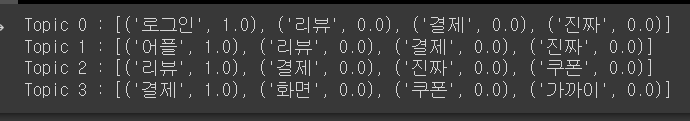



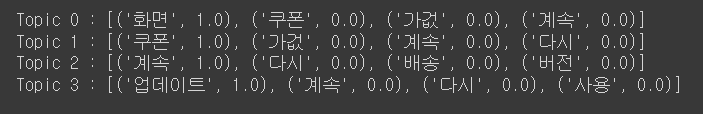

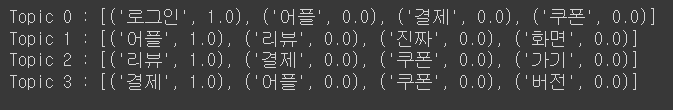

In [ ]:
stop_words = "로그인 어플 리뷰 버전 가지 어쩌 좀 듯 세상 번 고 항 이면 다른 듯 란 으루 간 나 대고 고  거때메 더 열 뭐 매 무슨 여러 떼 자꾸 사려 맥 뭐 로그인 리뷰 결제 진짜 어플 가까이 가겂 계속 다시 사용 역시 왜 최신 추가 안 달라 때 관련 건가 주 탑 개 다른 탑 만 세 면서 요새 지난 주르륵 안 이건 또 무슨 제대로 작정 거 수가 뭘 적 폰 안 것 저 욕 심지어 초기 갑자기 진짜 "

In [ ]:
#.split(' ')

In [ ]:
stop_words = set(stop_words)
result = [word for word in words if not word in stop_words]

In [ ]:
print('불용어 제거 후 :',result)

불용어 제거 후 : ['추가', '최신', '버전', '역시', '피드백', '반영', '의견', '달라', '앱', '광고', '시작', '첫', '화면', '오늘', '드림', '강조', '상단', '메뉴', '라이브', '관련', '배너', '고정', '하단', '메뉴', '사용자', '불편', '사항', '대한', '개선', '의지', '아예', '앱', '이용', '사용자', '편의', '성은', '전혀', '고려', '화면', '최대한', '상품', '행사', '노출', '집념', '점', '올인', '젠', '화면', '터치', '터치', '일쑤', '업데이트', '앱', '로딩', '심플', '함', '미학', '바라지', '제발', '개선', '조금', '관심', '앱', '이용', '뭔가', '주문', '마음', '현재', '선', '스트레스', '앱', '아예', '삭제', '정도', '다시', '앱', '앱', '리뷰', '달때', '확인', '바로', '달림', '포인트', '다시', '수정', '적용', '앱', '잘못', '터치', '멤버', '카드', '전체', '앱퀄리티', '봄', '열사', '일', '똑바로', '하나', '생각', '진짜', '별', '하나', '내', '내', '돈', '물건', '사려', '어플', '장바구니', '어플', '이상', '반복', '클릭', '결제', '못', '후기', '개발자', '어플', '달라', '진짜', '접', '어플', '진짜', '리뷰', '분', '지적', '앱', '먹통', '렉', '생각', '사람', '말', '생각', '렉', '먹통', '시일', '내', '해결', '책', '개선', '제발', '점', '점', '대지', '정도', '혜택', '원래', '점', '점', '갈수록', '고객', '센터', '문의', '글', '답장', '등', '서비스', '퇴화', '점', '오늘', '쿠폰', '관련', '전화', '문의', '오후', '문자', '연락', '금

In [ ]:
word_ls = ['추가', '최신', '버전', '역시', '피드백', '반영', '의견', '달라', '앱', '광고', '시작', '첫', '화면', '오늘', '드림', '강조', '상단', '메뉴', '라이브', '관련', '배너', '고정', '하단', '메뉴', '사용자', '불편', '사항', '대한', '개선', '의지', '아예', '앱', '이용', '사용자', '편의', '성은', '전혀', '고려', '화면', '최대한', '상품', '행사', '노출', '집념', '점', '올인', '젠', '화면', '터치', '터치', '일쑤', '업데이트', '앱', '로딩', '심플', '함', '미학', '바라지', '제발', '개선', '조금', '관심', '앱', '이용', '뭔가', '주문', '마음', '현재', '선', '스트레스', '앱', '아예', '삭제', '정도', '다시', '앱', '앱', '리뷰', '달때', '확인', '바로', '달림', '포인트', '다시', '수정', '적용', '앱', '잘못', '터치', '멤버', '카드', '전체', '앱퀄리티', '봄', '열사', '일', '똑바로', '하나', '생각', '진짜', '별', '하나', '내', '내', '돈', '물건', '사려', '어플', '장바구니', '어플', '이상', '반복', '클릭', '결제', '못', '후기', '개발자', '어플', '달라', '진짜', '접', '어플', '진짜', '리뷰', '분', '지적', '앱', '먹통', '렉', '생각', '사람', '말', '생각', '렉', '먹통', '시일', '내', '해결', '책', '개선', '제발', '점', '점', '대지', '정도', '혜택', '원래', '점', '점', '갈수록', '고객', '센터', '문의', '글', '답장', '등', '서비스', '퇴화', '점', '오늘', '쿠폰', '관련', '전화', '문의', '오후', '문자', '연락', '금요일', '건가', '이번', '쿠폰', '못', '외', '배송', '등', '진짜', '페이지', '로딩', '속도', '다른', '스토어', '앱', '쿠폰', '계속', '흠', '달동', '배송', '겨우', '온', '다른', '회원', '상품', '배송', '반품', '처리', '사진', '등록', '오류', '진행', '택배', '파업', '매장', '회수', '해도', '일정', '등급', '이상만', '가능', '본인', '실수', '때문', '시간', '반품', '오류', '때문', '통', '업데이트', '다시', '업뎃', '그동안', '년', '렉', '업뎃', '이후', '렉', '검색', '무슨', '메인', '화면', '조차', '개선', '버벅거리', '렉', '뒤', '가기', '쿠폰', '발급', '발급', '등등', '외주', '줄', '돈', '앱', '버전', '모바일', '웹', '버전', '모바일', '웹', '코믹', '함', '진짜', '점주', '데', '점점', '쿠폰', '렉', '계속', '점점', '삭제', '가요', '영', '점점', '제품', '마케팅', '눈', '초심', '제품', '소비자', '소리', '귀', '앱', '사용', '환불', '물건', '니', '반품', '환불', '니', '택배', '파업', '굳이', '소비자', '수령', '환불', '소리', '짐승', '소비자', '책임', '전가', '피', '환불', '검수', '벌레', '놈', '뚝', '구멍', '진짜', '렉', '자주', '버벅거리', '느낌', '자주', '검색', '이전', '버튼', '홈', '버벅', '거리', '면서', '렉', '진짜', '정말', '광고', '쇼핑', '제발', '속도', '개선', '진짜', '앱', '모바일', '창', '거기', '거기', '리뷰', '깨', '작성', '사이트', '이이이이이이', '어플', '모델', '광고', '오지', '만큼', '시스템', '신경', '주문', '배송지', '입력', '오류', '심해', '픽업', '가능', '매장', '오늘', '갑자기', '그냥', '화면', '얘', '로딩', '중이', '라면', '그냥', '그냥', '그냥', '버벅거린다', '의견', '아무', '대꾸', '생각', '안정화', '업데이트', '버벅', '거리', '플립', '로딩', '한나절', '자주', '화면', '조금', '올리브영', '제품', '볼', '구매', '앱', '구동', '반응속도', '하나', '선택', '이동', '뚝뚝', '사용', '출고', '주일', '출고', '그냥', '화', '어플', '오늘', '드림', '수도권', '강조', '지방', '배송', '출고', '주일', '진짜', '오류', '그대로', '길', '한참', '접속', '하나', '이동', '터치', '한참', '오늘', '앱', '버벅거리', '줄', '사이트', '버벅거림', '뭐좀', '사려', '정도', '장사', '수준', '버벅거림', '진짜', '진심', '말', '절대로', '앱', '시작', '홈', '화면', '절대로', '게임', '도', '배송지', '입력', '자꾸', '멋대로', '새로고침', '초기', '살', '수가', '렉', '진짜', '앱', '멤버', '뜰때', '자동', '화면', '권한', '설정', '한적', '계속', '눈뽕', '업데이트', '딜', '레이', '어플', '한번', '리지', '사용', '중', '종료', '후', '다시', '실행', '반복', '겨우', '대기업', '어플', '퀄리티', '어플', '땜', '포기', '함', '비교', '구매', '배송', '상품', '언제', '오', '보지', '서버', '관리', '렉', '자꾸', '앱', '사용', '쿠폰', '구매', '구성', '구매', '부분', '취소', '나머지', '구매', '금액', '제하', '환불', '절차', '오늘', '드림', '순위', '볼때', '스', '크롤', '자꾸', '옆', '리뷰', '볼때', '에러', '자주', '남', '개선', '점임', '리뷰', '실수', '뒤', '가면', '입력', '정보', '다시', '네이버', '그게', '기능', '추가', '함', '리뷰', '창', '안눌리', '버그', '문의', '짐', '삭제', '후', '재', '설치', '리뷰', '리뷰', '새로고침', '불편', '상세', '정보', '스', '크롤', '리다', '멋대로', '옆', '탭', '스', '와이프', '아주', '멋대로', '임', '어플', '반응속도', '제품', '상세', '페이지', '스', '크롤', '걸', '옆', '스', '와이프', '인식', '리뷰', '창', '감', '모션', '식이', '제대로', '앱', '팝업', '광고', '광고', '이후', '앱', '반응속도', '엉망', '느낌', '쿠폰', '무슨', '할인', '마냥', '이벤트', '페이', '여지', '껏', '쿠폰', '쿠폰', '식품', '화장품', '위생용품', '가지', '적용', '사용', '불가라', '화만', '움', '어플', '메리트', '그냥', '다른', '곳', '감', '타', '쇼핑몰', '현저', '로딩', '속도', '하나', '짓', '함', '다른', '쇼핑몰', '제품', '기능', '오늘', '드림', '앱', '코드', '정리', '로딩', '속도', '올리브영', '소심', '정말', '어플', '기프티콘', '바로', '어플', '수도', '진짜', '인터페이스', '개구', '속도', '제발', '앱', '개발', '돈', '조금', '투자', '쓰레기', '셔핑', '앱', '처음', '구매', '할인', '쿠폰', '적용', '상품', '매우', '한정', '적임', '그냥', '광고', '어그', '일단', '처음', '뒤통수', '시작', '혼자', '서버', '림', '다른', '곳', '배송', '림', '해외', '배송', '오늘', '드림', '베송비', '오늘', '드림', '당일', '날', '의문', '임', '고객', '센터', '처리', '속도', '문의', '최소', '고객', '센터', '상담', '연결', '림', '어플', '시스템', '자체', '선물', '수락', '취소', '수정', '졸라', '움', '일', '처리', '속도', '빠르기', '맘', '구석', '도', '쇼핑몰', '앱', '메리트', '랄', '도', '배송비', '무료', '할인', '쿠폰', '바', '그냥', '동네', '오프라인', '매장', '회공', '배송', '지연', '문의', '답변', '전화', '연결', '시도', '연결', '배송', '달이', '정도', '배송', '지연', '메시지', '를', '게', '생각', '시간', '어플', '인터페이스', '후', '쇼핑', '앱', '옷', '화장품', '이면', '보통', '상세', '정보', '스', '크롤', '보고', '구매', '경우', '굳이', '스', '와이프', '옆', '탭바', '기능', '스', '크롤', '스', '프로', '잘못', '인식', '뒤', '굳이', '이해', '탭', '끼리', '이동', '그냥', '메뉴바', '터치', '해도', '개선', '오늘', '드림', '주문', '재고', '연동', '물품', '중', '하나', '재고', '부족', '주문', '취소', '일부', '품목', '재고', '부족', '이면', '그것', '배달', '말', '고객', '확인', '일방', '취소', '보기', '위해', '오늘', '드림', '이용', '검색', '시간', '꼴', '올리브영', '매장', '환경', '상품', '관리', '직원', '응대', '등', '전박', '서비스', '평가', '기간', '영', '매장', '전반', '서비스', '평가', '매장', '구매', '고개', '서비스', '평가', '참여', '올리브영', '대한', '고객', '의견', '앱', '혈압', '리뷰', '기본', '과장', '진짜', '상황', '앱', '모되', '시간', '그냥', '직접', '오류', '심해', '기본', '상품', '클릭', '리뷰', '리뷰', '상품', '설명', '리뷰', '작성', '갑자기', '목록', '리뷰', '작성', '못', '리뷰', '사용', '앱', '쇼핑', '온라인', '판매', '매장', '제품', '별도', '할인', '등', '더욱', '렉', '버퍼링', '쿠폰', '후', '완전', '완전', '바로', '집앞', '영', '구', '못', '사람', '구원', '앱', '라이브', '문제', '라이브', '상품', '사려', '렉', '갑자기', '로그아웃', '앱', '구매', '장점', '구매', '미만', '요새', '아이', '화장', '이상', '면서', '로그인', '미만', '보호자', '동의', '나이', '조건', '지난', '목록', '검색', '기능', '쇼핑', '기본', '건데', '스', '크롤', '함', '파업', '지역', '공지', '글', '옆', '도대체', '업데이트', '진짜', '기분', '최악', '오늘', '드림', '그냥', '걸', '선택', '칸', '제품', '구매', '땐', '덕분', '뒤', '취소', '못', '여러분', '쇼', '업데이트', '어플', '앱', '사용', '어어', '엉', '수가', '예전', '갈수록', '추천', '상품', '구성', '정신', '광고', '돈쫌', '사용자', '불편', '안중', '충성', '고객', '신규', '고객', '다른', '앱', '비교', '정착', '행사', '그때', '한번', '정도', '원래', '늘', '곳', '구성', '플랫폼', '곳', '가격', '차이', '이상', '조금', '그냥', '영은', '마음', '광고', '번봣음', '뒤', '메뉴', '쿠폰', '광고', '다시', '보지', '도', '쿠폰', '광고알림', '꼭', '설정', '설정', '젠', '선착순', '안주', '광고', '동의', '아치', '심보', '구매', '글씨', '선착순', '거기', '다가', '어플', '어플', '완성', '도', '진짜', '평', '이건', '맨', '조건', '할인', '쿠폰', '적용', '대요', '일정', '금액', '중복', '표시', '결제', '직전', '쿠폰', '적용', '소비자', '기만', '지인', '선물', '이번', '처음', '사용', '건데', '어플', '자체', '버퍼링', '다시', '생각', '안드네', '제발', '서버', '안정', '어플', '활용', '마케팅', '점점', '일', '매장', '쿠폰', '어플', '쿠폰', '발급', '라이브', '천만', '리뷰', '스탬프', '등', '접속', '행사', '평소', '어플', '영', '쇼핑', '경험', '최악', '원인', '단점', '이벤트', '링크', '링크', '터치', '문구', '때문', '이벤트', '생각', '쿠폰', '사용', '이건', '정말', '치명', '단점', '생각', '개선', '필요', '앱', '평가', '처음', '봄', '앱', '처음', '구동', '렉', '계속', '품절', '구매', '일', '마지막', '날', '밤', '서버', '이유', '어플', '어플', '마냥', '림', '제발', '리뷰', '저장', '기능', '추가', '복사', '어플', '오류로', '몇', '백자', '리뷰', '벌써', '공', '리뷰', '올리브영', '업데이트', '수록', '내', '카테고리', '스', '크롤', '다가', '자꾸', '옆', '처음', '다시', '스', '크롤', '점', '매우', '불편', '버벅거림', '정신', '레이아웃', '내용', '전혀', '눈', '팝업창', '시도', '내용', '가림', '구매', '쿠폰', '적용', '문제', '만원', '이상', '장바구니', '쿠폰', '푸시', '알람', '쿠폰', '어플', '반응', '속도', '지금', '홈', '장바구니', '버튼', '몇번', '리뷰', '반응', '속도', '개선', '다른', '앱', '정상', '작동', '어플', '구동', '렉', '어효', '해결', '진짜', '어플', '처음', '터치', '버벅데', '서버', '클릭', '눌리', '처음', '휴대폰', '문제', '줄', '그냥', '앱', '덩어리', '앱', '진짜', '터치', '배송지', '무슨', '비밀번호', '선택', '터치', '몇번', '나갓', '들어왓다', '햇', '도대체', '문제', '할인', '일정', '주문', '진짜', '버벅거리', '안정화', '눌', '리지', '화면', '답답', '자체', '화병', '효', '무슨', '사람', '몰리', '결제', '부터', '준비', '튕기', '무슨', '앱', '그냥', '단순', '홈페이지', '수준', '앱', '진짜', '사기', '드', '일', '오후', '부터', '장바구니', '마치', '바로', '주문', '튕기', '동안', '결제', '시도', '튕겼네', '진짜', '앱', '그냥', '사진', '확대', '양옆', '화면', '탭', '정말', '기본', '어플', '구매', '택배', '처리', '진짜', '어플', '기능', '앞', '그냥', '장가', '구매', '최적화', '어플', '버벅거리', '로딩', '어플', '개발자', '월급', '돈', '일해', '업데이트', '하라', '앱', '접속', '불가', '앱', '개발', '담당', '사람', '낙하산', '렉', '회원', '가입', '기계', '맹', '푼', '할인', '스트레스', '앱', '유도', '이해', '못', '그냥', '인터넷', '원래', '어플', '사용', '그냥', '참고', '최근', '홈', '화면', '정신', '올리브영', '회사', '브랜드', '하나', '쇼핑', '어플', '조금', '신경', '구매', '버튼', '오늘', '배송', '픽업', '일반', '배송', '구분', '장바구니', '앱', '매우', '쿠폰', '혜택', '매장', '재고', '반영', '픽업', '서비스', '취소', '원래', '업데이트', '후', '업데이트', '서버', '버벅거리', '줄', '그것', '상품', '페이지', '주르륵', '터치', '상품', '링크', '이건', '무슨', '경우', '우리나라', '가장', '드럭스토어', '대기업', '앱', '정말', '구려', '소비자', '사용', '수정', '광고', '죽겠네', '인터넷', '매장', '가격', '쿠폰', '뭐함', '어플', '매장', '먹음', '어플', '매장', '매장', '소용', '임', '동네', '매장', '멀리', '옴', '진짜', '네', '직접', '얼마나', '진짜', '개별', '올리브영', '앱', '눈', '보고', '장가', '구매', '오늘', '드림', '구매', '오배', '송해', '콜센터', '연락', '하루', '종일', '전화', '연락', '앱', '문의', '늦', '게', '확인', '개판', '런가', '인터넷', '검색', '빈번', '겨우', '연락', '통화', '능것', '연락', '못', '물건', '대책', '방안', '그냥', '택배', '연락', '앞', '배송', '오류', '그냥', '올리브영', '그냥', '올리브영', '구매', '사용', '필요성', '앱', '처음', '차라리', '그냥', '구매', '삭제', '리뷰', '삭제', '다시', '어플', '어플', '인터넷', '기분', '하나', '클릭', '기본', '화면', '로딩', '핸드폰', '기분', '업데이트', '개선', '사람', '어플', '오프라인', '일부러', '작정', '어플', '관리', '아주', '제대로', '축하', '수가', '영', '앱', '꽤', '처리', '속도', '걸', '반년', '앱', '문제', '검색', '카테고리', '설정', '스크롤', '한참', '페이지', '가짐', '밖', '데이터', '아예', '사용', '정도', '터치', '계속', '렉', '앱', '디자인', '살짝', '아이콘', '위치', '수납', '통일', '영', '처', '컬러', '감각', '개편', '살짝', '쿵', '옛날', '지마켓', '느낌', '카테고리', '우후죽순', '전하', '정보', '어플', '사용', '한눈', '다른', '어플', '벤치마킹', '업데이트', '진짜', '앱', '네이버', '검색', '홈페이지', '계속', '스', '크롤', '해도', '이건', '서버', '해외', '정도', '다시', '한번', '앱', '터치', '덕분', '제품', '살', '마음', '절약', '자기', '손해', '출석', '포인트', '점', '이상', '후기', '주시', '점', '계속', '누락', '온라인', '고객', '센터', '글', '몇', '달이', '답', '유선', '문의', '온라인', '후기', '캡처', '달라', '하나요', '결제', '배송', '구분', '선택', '사항', '자꾸', '배송', '구분', '선택', '결제', '항목', '발견', '앱', '버그', '잘못', '물건', '사라', '마', '인내심', '테스트', '왤케', '앱', '실행', '광고', '온라인', '제품', '사려', '고해', '앱', '수가', '앱', '광고', '값', '개선', '업데이트', '후', '진짜', '말', '서버', '사용', '예전', '가입', '최근', '올리브영', '결제', '일', '다시', '오류', '마이', '페이지', '이름', '포인트', '로그인', '가요', '때문', '매장', '내', '계산', '앞', '시간', '매장', '내', '직원', '업데이트', '구글', '스토어', '업데이트', '곳', '기만', '머', '어쩌', '진짜', '몇개', '월', '동안', '피드백', '도', '튕기', '섹션', '페이지', '상세', '정보', '보고', '뒤', '가기', '섹션', '섹션', '초기', '이면', '다행', '밑', '섹션', '뒤', '가기', '진짜', '심지어', '카테고리', '초기', '향수', '섹션', '갑자기', '메인', '화면', '섹션', '진짜', '앱', '관리자', '신경', '올리브영', '운영', '임원진', '대표이사', '확인', '어플', '관리자', '지금', '월급', '루팡', '진짜', '상품', '검색', '터치', '접속', '답답', '자체', '사라', '그냥', '사이트', '개선', '앱', '주문', '여기', '때문', '걸', '어쩜', '세월', '월', '정말', '중간', '포기', '내일', '당장', '새벽', '주문', '함', '앱', '문안', '해', '정말', '렉', '레전드', '진짜', '리뷰', '하나', '인내심', '감수', '함', '분명', '스크롤', '밑', '옆', '진짜', '개선', '리뷰', '데', '기능', '인터페이스', '말', '렉', '업데이트', '로딩', '중간', '중간', '현상', '사이트', '구매', '요새', '렉', '글씨체', '왜또', '척', '려고', '건가', '기존', '훨', '남', '티', '일인', '건가', '광고', '점점', '영', '사랑', '앱', '개발자', '월급', '루팡', '어이', '디', '비밀번호', '로그인', '어찌', '일', '비번', '아이디', '비번', '로그인', '통합로그인', '다른', '곳', '기간', '로그인', '컬처', '랜드', '로그인', '아이디', '비밀번호', '혹시', '컬처', '랜드', '로그인', '한번', '몇번', '입력', '계속', '구매', '하라', '건가', '영', '속도', '조금', '오늘', '드림', '배송', '일반', '배송', '픽업', '장바구니', '오늘', '드림', '상품', '주문', '주문', '장바구니', '결제', '과정', '픽업', '선택', '오늘', '드림', '오늘', '드림', '배송', '배송', '진짜', '어플', '사람', '개선', '생각', '도', '초후', '광고', '추가', '싸움', '진짜', '쓰레기', '어플', '기프트카드', '구매', '후', '온라인', '제품', '구매', '배송', '정보', '구매', '알림', '톡등', '문의', '대답', '기프트카드', '사용', '및', '배송', '준비', '아무', '정보', '영', '구매', '대처', '및', '모든', '화가', '어이', '업데이트', '쇼핑', '광고', '추가', '진짜', '화', '안남', '클릭', '지갑', '어플', '서버', '렉', '앱', '터치', '앱', '광고', '구매', '말', '리뷰', '어플', '진짜', '구려', '터치', '저절로', '페이지', '이건', '쇼핑', '하란', '런가', '다른', '리뷰', '보고', '말씀', '문제', '해결', '사람', '초기', '게', '일단', '분할', '화면', '가장', '렉', '초기', '앞', '발전', '앱', '무슨', '문제', '바코드', '화면', '보라', '다음', '화면', '앱', '앱', '얼마나', '맨첨', '앱', '자동', '광고', '그거', '보', '인적', '한번', '화면', '메인', '화면', '임', '환', '파티', '휴대폰', '종이', '인터넷', '속도', '문제', '전혀', '없슴다', '리뷰', '대해', '포인트', '주기', '여기', '리뷰', '로그인', '사용', '어쩌', '게다가', '여기', '리뷰', '복', '영', '제발', '앱', '투자', '해', '뭡', '렉', '배송지', '입력', '사려', '해도', '어플', '버러지', '앱', '휴면', '계정', '달라', '휴먼', '해제', '로그인', '휴먼', '해제', '무한', '반복', '일단', '서비스', '자체', '어플', '오류', '결제', '배송', '구분', '창', '계속', '배송', '구분', '선택', '결제', '창', '어플', '자꾸', '구리', '기능', '마', '해외', '사이트', '싸구려', '웹쇼핑', '사이트', '화면', '발', '상반기', '올리브영', '데이', '골드', '레벨', '이상', '구매', '블랙', '그린', '추가', '할인', '하반기', '구매', '금액', '원래', '쿠팡', '화장품', '구매', '뭔가', '쿠팡', '믿음', '영은', '믿음', '확실', '무슨', '앱', '아주', '어디', '인터페이스', '앱', '자체', '사용', '매우', '정도', '뿐', '장바구니', '바로', '구매', '점', '바로', '구매', '창', '계속', '오류', '부분', '장바구니', '클릭', '겨우', '인식', '부분', '등', '다른', '로드', '앱', '비교', '도저히', '사용', '삭제', '문제점', '다른', '리뷰', '지속', '제기', '개선', '점', '실망', '진짜', '매번', '쇼핑', '분노', '모바일', '웹', '보나', '앱', '보나', '렉', '상품', '상세', '정보', '리다', '자꾸', '옆', '사라', '말', '제발', '제발', '어플', '개선', '언제', '개선', '모바일', '웹', '앱', '버벅거리', '혼자', '뒤', '가기', '새로고침', '물건', '하나', '보기', '진심', '매번', '진짜', '무슨', '쇼핑몰', '대체', '이해', '문의', '답변', '일주일', '동안', '확인', '대체', '문의', '시스템', '건가', '문의', '배송', '상품', '뚜껑', '대한', '제기', '해결', '위', '문제', '해결', '실망', '문의', '제대로', '아예', '문의', '메뉴', '올리브영', '어플', '계속', '문제', '문의', '수가', '추가', '오늘', '답변', '대기', '중이', '문의', '고객', '센터', '전화', '거세', '올리브영', '어플', '내', '리뷰', '자꾸', '여러분', '그냥', '오프', '장가', '배송', '가면', '다행', '문제', '생기', '문의', '답', '동안', '이구', '그냥', '내', '택배', '지연', '형식', '매크로', '택배', '동안', '전화', '계속', '전화', '지연', '말', '연결', '수단', '해결', '책', '내', '돈', '먹튀', '당한', '기분', '오늘', '드림', '돈', '안내', '무료', '배송', '진짜', '배송', '림', '요즘', '해외', '배송', '고서', '해외', '직배', '송도', '사흘', '곳', '일주일', '곳', '찾기', '찾기', '곳', '영', '돈', '매장', '온라인', '볼', '그냥', '이용', '말', '원래', '리뷰', '진짜', '어플', '앱', '자체', '로딩', '매우', '버벅', '할인', '쿠폰', '적용', '앱', '배송', '일주일', '체적', '난국', '주문', '한번', '배송', '바로', '삭제', '제품', '배송', '완료', '상태', '제품', '완료', '입력', '함', '알', '주소', '호수', '잘못', '작성', '제품', '앞', '주소', '제발', '제대로', '바람', '네이티', '브', '앱', '진짜', '상품', '페이지', '웹뷰', '로딩', '속도', '개선', '앱', '자꾸', '렉', '먹음', '리뷰', '튕긴듯', '리뷰', '튕', '기고', '리셋', '거기', '다가', '리뷰', '자동', '저장', '복사', '기능', '제품', '구경', '다가', '갑자기', '혼자', '다른', '페이지', '경우', '개선', '개선', '똥', '선사', '함', '업데이트', '업데이트', '앱', '업데이트', '합', '어플', '일', '업데이트', '하라', '팝업', '업데이트', '말', '업데이트', '여부', '앱', '이용', '어플', '구매', '구매', '구매', '사람', '생각', '전혀', '내', '행사', '광고', '놨으', '속도', '리뷰', '스', '크롤', '옆', '터치', '창', '리뷰', '창', '초기', '다시', '쭈우욱', '진짜', '앱', '사용', '대한', '혜택', '앱', '결제', '할인', '앱', '홍보', '목적', '앱', '자동', '로그인', '앱', '올리브영', '홈페이지', '이건', '제발', '추가', '금', '내면', '오늘', '드림', '선택', '오지', '추가', '금', '환불', '약관', '포함', '아치', '배달', '음식', '다음', '날', '그냥', '돈', '고대로', '배송', '지연', '하루', '적립금', '오늘', '드림', '못', '아치', '심보', '보고', '일', '앱', '랭킹', '푸드', '구경', '상품', '하나', '보고', '랭킹', '전체', '게', '말', '다시', '하나', '하나', '사려', '해도', '살', '수가', '발', '점도', '움', '앱', '자체', '뭔가', '버벅거리', '거기', '다가', '그냥', '스', '크롤', '혼자', '처', '옆창', '영', '정도', '앱', '개발자', '제대로', '사람', '오늘', '배송', '배달', '시간', '배송', '지연', '관련', '안내', '직접', '연락', '고객', '센터', '오늘', '배송', '문후', '취소', '상품', '언제', '출발', '기약', '말', '배송', '시간', '선택', '외출', '시간', '여기', '상품', '앞', '방치', '다른', '온라인', '택배', '지연', '안내', '취소', '처리', '가요', '서버', '조금', '아이쇼핑', '최근', '버벅거립니', '자꾸', '데', '업데이트', '앱', '업데이트', '난리', '오늘', '드림', '기능', '서버', '걸', '관리', '해', '앱', '관리', '운영자', '앱', '돈좀', '렉', '터치', '자꾸만', '홈', '처음', '앱', '광고', '뒤', '무슨', '버튼', '해', '제일', '아래', '자꾸만', '옆', '리뷰', '보기', '옵션', '별', '보기', '눌', '리지', '옵션', '선택', '다시', '리기', '새로고침', '인식', '내', '쇼핑', '앱', '고양이', '앱', '정신', '맛', '메뉴얼', '다른', '부수', '이용', '오늘', '드림', '칭찬', '별로', '댓글', '쇼핑', '눈', '욕심', '앱', '프로필사진', '변경', '변경', '햇', '다다', '사진', '등록', '순위', '어요', '수정', '업데이트', '얩', '자꾸', '버전', '업데이트', '하라', '열기', '업데이트', '메세지', '업데이트', '메세지', '확인', '다시', '열기', '장난', '하나', '진짜', '똥개', '훈련', '얩', '아예', '제거', '다시', '다시', '사용', '지금', '장난', '얩', '제대로', '구매', '소비자', '엄', '고생', '계속', '서비스', '지연', '새벽', '데', '무슨', '사용자', '어플', '자체', '해도', '한나절', '검색', '목록', '해도', '렉', '비정상', '오류', '팝업', '상품', '눌', '리지', '상세', '정보', '보지', '못', '진짜', '가지가지', '해', '장바구니', '대충', '겨우', '겨우', '결제', '할랬', '더니', '서비스', '연창', '결제', '창', '안넘', '가짐', '못', '사고', '시간', '체적', '노답', '상태', '진짜', '저혈압', '오늘', '드림', '서비스', '진행', '중이', '시간', '배송', '기상', '상황', '이상', '이유', '배송', '지연', '알림', '톡', '온', '배송비', '굳이', '내면', '배송', '고객', '심지어', '온라인', '문의', '주일', '답변', '고객', '똥', '앱', '별', '하나', '결제', '배송', '출발', '일', '상품', '준비', '상태', '결제', '취소', '어플', '터', '지고', '배송', '진짜', '참고', '분만', '이용', '앞', '오프', '매장', '이용', '렵니', '올리브영', '앱', '서버', '문제', '오늘', '드림', '서비스', '최고', '진짜', '등드름', '스프레이', '주문', '배송', '도착', '도착', '진짜', '대박', '배달', '음식', '할인', '기간', '사이트', '왜케', '쫌', '개선', '매장', '제품', '재고', '확인', '영', '앱', '확인', '매장', '오늘', '드림', '주문', '배송비', '픽업', '정가', '온라인', '가격', '픽업', '거나', '주문', '편이', '렉', '리뷰', '볼때', '최악', '고객', '센터', '전화', '문의', '글', '답장', '대체', '일', '팝업창', '무슨', '물건', '사라', '앱', '자체', '환불', '주문', '취소', '완료', '새로고침', '번은', '완료', '고객', '센터', '구매', '물건', '전체', '취소', '환불', '기존', '앱', '버전', '업데이트', '업데이트', '구글', '스토어', '기존', '앱', '연결', '주문', '갑자기', '예전', '홈', '화면', '렉', '지금', '홈', '화면', '뒤죽박죽', '보기', '렉', '진짜', '심해', '진짜', '홈', '화면', '렉', '진짜', '점도', '친구', '선물', '앱', '박스', '상품', '내부', '배송', '파손', '포장', '문의', '답', '유선', '답', '선물', '부디', '오프라인', '구매', '답변', '상품', '그냥', '오프라인', '버벅임', '광고', '진짜', '인터넷', '와이파이', '잘만', '앱', '작동', '마냥', '앱', '제품', '앱', '업데이트', '하래', '삭제', '움', '로그인', '다시', '조금', '잘못', '터치', '화면', '앱', '꼬', '라지', '종일', '오류', '사용자', '지연', '지금', '아침', '제대로', '하나', '젠장', '앱', '로그인', '소프트웨어', '인터넷', '최신', '업데이트', '인터넷', '홈페이지', '로그인', '어플', '로그인', '비번', '아이디', '메인', '다시', '정보', '이름', '커녕', '다시', '로그인', '창', '문의사항', '뭥미', '컴', '인터넷', '사용', '허참', '컴', '사용', '시간', '진짜', '결제', '메인', '화면', '번은', '다른', '분', '꽤', '앱', '생각', '가요', '앱특가', '고객', '쿠폰', '거조', '직접', '올리브영', '가지', '집', '쇼핑', '정말', '덕분', '텅', '마음', '행복', '며칠', '상품', '평', '등록', '사진', '첨부', '사진', '선택', '상품', '평', '사진', '버그', '힝', '포인트', '구매', '할인', '실제', '구매', '후', '차감', '분명', '쿠폰', '적용', '배송비', '쿠폰', '적용', '배송비', '추가', '무슨', '쫌생이같', '이벤트', '참여', '온라인', '쿠폰', '이벤트', '대서', '오류', '앱', '자체', '갑자기', '앱', '로그인', '삭제', '다시', '설치', '로그인', '척', '로그인', '제품', '다른', '제품', '제품', '몇', '자꾸', '제품', '이점', '개선', '뚝뚝', '대기업', '앱', '별로', '미샤', '클리오', '앱', '정도', '씨제이', '앱', '관리', '쇼핑', '어제', '계속', '결제', '결제', '창', '사용', '앱', '선택', '원래', '앱', '결제', '작동', '인터넷', '결제', '작동', '앱', '결제', '해결', '버벅거림', '심해', '겨우', '결제', '오류로', '결제', '카드', '결제', '업데이트', '안해', '런가', '업데이트', '후', '재', '실행', '잘만', '연결', '인터넷', '연결', '시간', '전화', '연결', '하라', '어이', '일', '구매', '채', '하라', '자꾸', '베스트', '상품', '페이지', '새로고침', '다른', '분', '새로고침', '때문', '개선', '결제', '자꾸', '베스트', '상품', '결제', '빡엉', '사용', '경험', '아주', '오류', '요새', '앱', '튕기', '경험', '매우', '혜택', '때문', '다운', '혜택', '내내', '결제', '시도', '시간', '통신', '문제', '주문', '취소', '엉망', '진창', '은', '스마트폰', '사고', '처음', '기능', '하나', '추천', '앱', '년', '투자', '페이지', '이동속도', '안눌리', '기도', '잘못', '누르기', '로그인', '문제', '오류', '더니', '조치', '더니', '오류', '더니', '업데이트', '하라', '더니', '단말기', '최신', '버전', '어플', '최신', '버전', '데', '사용자', '아무', '잘못', '날', '느닷', '앱', '모바일', '홈페이지', '정상', '사용', '못', '일단', '공지', '확인', '사과', '처리', '방법', '안내', '조치', '취해', '다수', '이용자', '문제', '어플', '업데이트', '전혀', '고객', '휴대폰', '탓', '각자', '다른', '제조', '사의', '다른', '단말기', '업데이트', '해도', '일주일', '방치', '중', '장사', '오프', '통합', '매장', '일부러', '건가', '앱', '문제', '수정', '안내', '평점', '바닥', '그냥', '제품', '가요', '앱', '쿠폰', '광고', '앱', '사용', '로그인', '자꾸', '쿠폰', '라마', '진짜', '장난', '이전', '리뷰', '일', '앱', '서버', '현상', '관리자', '연결', '여러', '겨우', '버튼', '가까이', '속도', '때문', '배송비', '조회', '오류', '처음', '다시', '문서', '작성', '주문', '시간', '일', '앱', '전용', '쿠폰', '주지', '를', '통한', '온라인', '잘만', '거기', '앱', '전용', '쿠폰', '사용', '앱', '의도', '사용자', '사용자', '최소한', '서버', '구축', '시간', '낭비', '밤', '결제', '도중', '오류', '통장', '돈', '주문', '겁', '앱', '서버', '증설', '처리', '속도', '하든', '고객', '대한', '준비', '고객', '마케팅', '데이터', '연결', '접속', '튕기길', '와이파이', '젠', '데이터', '어플', '다시', '다운', '주문', '하라', '말', '기간', '접속', '오류', '정도', '예상', '못', '서버', '문제', '하루', '종일', '튕겨', '구경', '래야', '수가', '삼성', '카드', '결제', '결제', '수단', '결제', '일반', '결제', '백신', '실행', '결제', '진행', '혹시', '기존', '신들', '조건', '추가', '설치', '실행', '결제', '진행', '버튼', '다음', '결제', '창', '현재', '리뷰', '수가', '다른', '앱', '예', '큐브', '이레', '이징', '럼', '올리브영', '리뷰', '단', '임', '화해', '리뷰', '개임', '무려', '배', '올리브영', '유저', '함', '화장품', '리뷰', '앱', '화해', '넘버원', '미만', '온라인', '못', '사고', '장가', '살', '음', '계정', '앱', '저번', '화면', '삭제', '다시', '로그인', '자꾸', '서버', '오류', '와이파이', '해도', '데이터', '해도', '어플', '며칠', '로그인', '접속', '몇번', '삭제', '다시', '어플', '자체', '쓰레기', '확대', '화면', '탭', '현대', '카드', '결제', '화면', '맘춤', '실패', '후', '웹브라우저', '완료', '렉', '대학교', '서버', '상부', '메뉴', '배치', '하부', '기능', '앱', '쓰레기', '임', '웹', '어플', '시대', '페이지', '암', '년전', '어플', '관리', '하나', '봄', '앱', '진짜', '최악', '샴푸', '특', '몇번', '시도', '이메일', '추가', '추가', '계속', '계속', '오류', '어플', '삭제', '온라인', '앱', '이건', '해도', '정말', '깝깝', '어플', '어플', '기간', '길', '리뷰', '플레이스토어', '어플', '삭제', '다시', '설치', '길', '이제', '유산균', '린다', '고치', '어플', '게', '주문', '중', '어플', '메인', '화면', '이동', '메모장', '카드', '정보', '덕분', '종이', '결제', '리뷰', '보', '지속', '발생', '문제', '본사', '처리', '레파토리', '답변', '고객', '일', '마지막', '날', '앱', '먹통', '앱', '할인', '구매', '포기', '컴퓨터', '잘만', '앱', '항상', '버벅', '조금', '항상', '접속', '앱', '전용', '쿠폰', '때문', '사용', '구매', '소용', '굳이', '앱', '필요', '갤럭시', '플립', '안드로이드', '버전', '사용', '부터', '페이지', '화면', '아래', '다시', '위로', '수가', '예전', '계속', '이번', '업데이트', '앱', '사용', '부분', '확인', '다음', '업데이트', '메인', '이벤트', '행사', '안내', '화면', '오른쪽', '밑', '플러스', '버튼', '전체', '보기', '화면', '행사', '종류', '아래', '후', '다시', '위로', '자꾸', '새로고침', '메인', '전체', '판매', '상품', '모두', '리뷰', '전체', '상품', '보기', '홋수', '선택', '리뷰', '목록', '아래', '한번', '다시', '위로', '수가', '새로고침', '제품', '처음', '화면', '여러가지', '리뷰', '처음', '어플', '실행', '전면', '광고', '이해', '사실', '이해', '감', '유튭', '컨텐츠', '이용', '애초', '돈', '어플', '풀', '화면', '팝업', '광고', '몇', '후', '광고', '창', '자동', '게', '몇', '내', '팝업창', '자동', '광고', '역대', '시스템', '정말', '정말', '정말', '제발', '해', '올리브영', '어플', '아예', '영', '어플', '회원', '가입', '비밀번호', '아이디', '하나', '일치', '영문', '숫자', '특수문자', '중복', '자꾸', '아이디', '글자', '이상', '일치', '몇', '십분', '동안', '씨름', '삭제', '그냥', '앱', '이용', '완', '앱', '주소', '추가', '세상', '앱', '처음', '임', '구매', '성질', '어플', '업데이트', '업데이트', '화면', '업데이트', '버튼', '제거', '열기', '버튼', '업데이트', '뜰때', '한번', '자꾸', '오류', '렉', '뚝딱', '거리', '앱', '인내심', '테스트', '외', '오늘', '드림', '서비스', '며칠', '갑자기', '올리브영', '로고', '광고', '화면', '한번', '홈', '화면', '차례', '화면', '거기', '이상', '진행', '업뎃', '전이', '가해', '업뎃', '마찬가지', '살', '수가', '구매', '욕구', '하락', '함', '느낌', '구매', '할인', '쿠폰', '다운로드', '결제', '결제', '화면', '쿠폰', '하니', '쿠폰', '쿠폰', '그냥', '결제', '함', '이벤트', '광고', '경우', '리뷰', '온라인', '사용', '앱', '사용', '일', '이상', '결재', '시도', '포기', '네트워크', '연결', '확인', '하래', '통신사', '엄', '곳', '진짜', '처음', '리뷰', '결제', '준비', '못', '구매', '욕구', '뚝', '리뷰', '보', '예전', '해결', '생각', '신가', '앱', '전용', '쿠폰', '이번', '처음', '구매', '구매', '걸', '알', '대비', '합', '대책', '쿠폰', '남발', '못', '사도', '나중', '어차피', '살', '호갱일', '마음가짐', '가요', '취지', '전혀', '앱', '리뷰', '문의', '렉', '오류', '앱', '스스로', '창', '취소', '메인', '화면', '불편', '사항', '문의', '앱', '다시', '를', '이용', '하라', '불편', '감수', '롯', '고객', '몫', '점', '지난달', '화면', '접속', '다시', '접속', '로그인', '계속', '다시', '하라', '고함', '무슨', '안내', '창', '그냥', '장바구니', '로그인', '창', '계속', '뜸', '오프라인', '온라인', '영만', '사용', '덕분', '처음', '롭스', '어플', '며칠', '어플', '제대로', '실행', '바탕', '삭제', '다시', '로그인', '스마트', '영수증', '문의', '해도', '로그인', '수가', '여기', '글', '개선', '별로', '앱', '처음', '렉', '정말', '뒤', '가기', '버튼', '오류', '장바구니', '진짜', '별로', '오늘', '드림', '물품', '장바구니', '확인', '오늘', '드림', '품절', '보고', '다시', '장바구니', '확인', '오늘', '드림', '품절', '제품', '다시', '계속', '자기', '품절', '제품', '매번', '진짜', '장난', '앱', '오늘', '드림', '주문', '장난', '도대체', '앱', '어플', '진짜', '처음', '킬', '광고', '배송', '제품', '설명', '볼때', '옆', '조금', '스', '크롤', '해도', '상품', '설명', '구매', '정보', '리뷰', '옆', '칸', '혐', '리뷰', '스', '크롤', '잘못', '햇', '정보', '칸', '다시', '리뷰', '처음', '제발', '개선', '제발', '부탁', '접속', '자꾸', '오류', '데이터', '해도', '화면', '겨', '로그인', '몇', '마이', '페이지', '로그인', '이벤트', '로그인', '설정', '로그인', '로그인', '자동', '로그인', '아이디', '저장', '계속', '로그인', '로그아웃', '상태', '앱', '사용', '하란', '말', '의문', '드네', '출석', '체크', '이벤트', '클릭', '눈거', '클릭', '눌려', '어플', '어제', '출첵', '클릭', '출첵', '오늘', '아예', '클릭', '만기', '빵구', '관리', '평소', '사용', '앱', '일', '기간', '서버', '앱', '접속', '결제', '정보', '주지', '모로', '매번', '일', '예상', '못', '페이지', '리다', '화면', '보고', '상품', '아예', '프레임', '밖', '데이터', '메인', '화면', '어플', '접속', '난리', '당사', '큐', '레이', '팅', '광고', '보고', '어플', '광고', '뿜뿜', '데이터', '간소화', '광고', '축소', '다른', '쇼핑몰', '소비자', '신경', '몰래', '몰래', '광고', '올리브영', '댕청', '미가', '배짱', '장사', '장바구니', '클릭', '자꾸', '선택', '이동해', '광고', '페이지', '의도', '기분', '의도', '어플', '개선', '쿠폰', '퍼센트', '할인', '쿠폰', '면서', '최대', '여기', '쿠폰', '그냥', '최대', '할인', '쿠폰', '굳이', '할인', '율', '오늘', '드림', '무료', '배송', '쿠폰', '조건', '주문', '사용', '무용지물', '쓰레기', '오늘', '드림', '진짜', '오늘', '드림', '배송', '사람', '연락', '번호', '두둔', '배송', '물건', '남', '집', '노', '사진', '어딘줄알', '보고', '직접', '고객', '센터', '시간', '지금', '쌍욕', '참고', '글', '주문', '사람', '홈페이지', '연락', '곳', '집', '사람', '반품', '신청', '다시', '재주', '할랬', '더니', '품절', '배송', '배송', '연락처', '매장', '사람', '고객', '센터', '그때', '정상', '물건', '못해', '연락', '내일', '오픈', '출근시간', '가기', '진짜', '고객', '센터', '내일', '불', '전화', '업데이트', '삭제', '후', '다시', '설치', '업데이트', '해도', '정보', '저번', '분명', '구매', '핸드폰', '번호', '계속', '고객', '보', '로그인', '문제', '오히려', '코로나', '어플', '주문', '기회', '도', '문제', '하나', '처리', '물건', '일', '한눈', '리뷰', '순위도', '알', '체험', '단', '이벤트', '참가', '두', '가지', '라면', '최근', '검색어', '한번', '중간', '한번', '랙', '외', '올리브영', '앱', '상품', '이벤트', '페이지', '다른', '앱', '문자', '확인', '다시', '올리브영', '앱', '항상', '자동', '리프', '레시', '눈썹', '손질', '도구', '페이지', '제품', '구입', '매번', '구입', '걸', '못', '산적', '불만', '글', '정도', '금방', '개선', '개선', '기미', '글', '제발', '수정', '앱', '말', '로그인', '문제', '지속', '생각', '제시', '해결', '책', '댓글', '답글', '어디', '어디', '문의', '문의', '문제', '올리브영', '측', '개선', '문제', '구', '제발', '쉬', '알림', '설정', '안드로이드', '앱', '설정', '내', '절대', '진동', '소리', '앱', '설정', '변경', '그대로', '처음', '착각', '줄', '알', '몇번', '변경', '그대로', '앱', '설정', '본인', '쉬', '알림', '무조건', '순위', '볼', '설정', '알림', '설정', '앱', '설정', '단', '하나', '앱', '처음', '올리브영', '앱', '알림', '관련', '시스템', '권한', '요구', '적도', '해도', '겁', '쉬', '알림', '허용', '앱', '설정', '내', '대한', '설정', '못', '다른', '차원', '후자', '시스템', '권한', '요구', '설정', '생각', '생각', '올리브영', '할인', '행사', '구매', '편이', '어플', '설치', '알림', '식', '시스템', '권한', '침범', '어플', '그간', '올리브영', '만행', '어플', '삭제', '마지막', '리뷰', '처음', '로그인', '계정', '계속', '인증', '번호', '부모님', '오류', '친', '쿠폰', '직원', '확인', '뭔가', '쿠폰', '사용', '사용', '가요', '못', '건가', '클릭', '해', '출석', '체크', '이벤트', '클릭', '해', '어플', '게다가', '어플', '킬', '광고', '돈', '가면', '어플', '때문', '가기', '진심', '어플', '시스템', '일', '말', '폭', '도대체', '어플', '영', '이유', '고객', '영', '메리트', '도', '그냥', '다른', '쇼핑몰', '사이트', '브랜드', '별로', '일', '쟁여두', '장바구니', '기본', '장바구니', '오늘', '드림', '장바구니', '연결', '장바구니', '화면', '홈', '메뉴', '화면', '이동', '수가', '뒤', '가기', '장바구니', '다른', '물건', '클릭', '장바구니', '상세', '페이지', '장바구니', '오늘', '드림', '장바구니', '메인', '식', '과정', '어플', '개선', '요청', '어플', '킬때', '팝업', '광고', '진짜', '요즘', '팝업', '광고', '때문', '로딩', '팝업', '시간', '낭비', '짜증', '분', '말', '돈', '왤케', '광고', '해대', '어차피', '홈', '화면', '크게', '광고', '앱', '실행', '광고', '택배', '배송', '데', '평일', '오후', '주문', '당일', '출고', '평일', '목요일', '오전', '주문', '빨', '일주일', '이란', '생필품', '건데', '오늘', '배송', '출고', '당일', '출고', '답변', '복', '사양', '클렌', '징', '워터', '동일', '제품', '가격', '차이', '타', '스토어', '오늘', '드림', '주문', '증정', '바가지', '느낌', '체험', '단도', '전체', '유저', '신청', '등급', '기준', '데', '가격', '차이', '제품', '비교', '오늘', '특가', '쿠폰', '줄때', '쿠폰', '랜덤', '할인', '률', '정해', '곳', '처음', '봄', '개선', '진짜', '렉', '심해', '정말', '선착순', '쿠폰', '시간', '바로', '바', '새로고침', '바', '새로고침', '인정', '새로고침', '시간', '또한', '클릭', '진짜', '정말', '쿠폰', '일', '해결', '전날', '오늘', '드림', '배송', '결제', '시도', '계속', '사은', '품', '저장', '오류', '발생', '결제', '오늘', '드림', '자체', '사용', '결제', '계속', '오류', '어플', '삭제', '후', '보고', '인터넷', '태블릿', '결제', '시도', '정말', '화장품', '보통', '오프라인', '조그만', '매장', '제품', '조굼', '제품', '렉', '일', '도', '렉', '너', '앱', '서버', '관리', '네이버', '블로그', '보고', '개선', '매번', '화가', '차라리', '데', '오프라인', '매장', '사지', '구지', '화', '내면', '어플', '필요', '도', '로그인', '내', '건가', '입력', '입력', '뒤', '로그인', '하나', '클릭', '자꾸', '뒤', '앱', '화병', '매장', '방문', '매장', '신경', '앱', '신경', '보', '예전', '튕기', '부분', '대한', '리뷰', '부분', '대해', '답변', '분발', '식', '복사', '오류', '부분', '치기', '위해', '노력', '겁', '리뷰', '귀', '진짜', '리뷰', '상품', '불량', '교환', '신청', '신청', '동안', '물품', '확인', '전혀', '일', '말씀', '신지', '구매', '후', '상품', '수령', '당일', '날', '뚝딱', '처리', '교환', '일', '구매', '결제', '뒤', '갑자기', '배송', '멋대로', '취소', '무슨', '상황', '추후', '배송', '알림', '다른', '쇼핑', '어플', '멋대로', '취소', '처음', '로그인', '앱', '비밀번호', '아이디', '일치', '로그인', '아이디', '비번', '확인', '버튼', '초기', '화면', '오류', '메시지', '아무', '크롬', '업데이트', '올리브영', '앱', '다시', '로그인', '문제', '해결', '리뷰', '복', '로그인', '문제', '해결', '올리브영', '이번', '일', '이후', '다시', '단순', '로그인', '해결', '사람', '앱', '로그인', '혜택', '절대', '리뷰', '해결', '어플', '안정화', '조금', '접속', '률', '쿠폰', '앱', '통', '어플', '요즘', '쇼핑', '어플', '중', '개복치', '찾기', '오류', '실행', '바탕', '다시', '설치', '이번', '로그인', '대체', '어쩌', '해결', '요즘', '계속', '화면', '삭제', '재', '설치', '함', '로그', '개월', '비번', '나중', '자꾸', '메세지', '포기', '비번', '바꿈', '다시', '로그인', '로그인', '아예', '어쩌', '거지', '앱', '기능', '문제', '서비스', '개선', '불량', '제품', '교환', '두', '세번', '불량', '수령', '후', '확인', '재', '배송', '과정', '고객', '센터', '통화량', '연결', '한참', '앱', '도', '직관', '이진', '매번', '교환', '신청', '진행', '단계', '확인', '별하나', '글', '위해', '하나', '선택', '앱', '활성화', '이벤트', '정상', '쇼핑', '환경', '준비', '쇼핑', '앱', '언제', '정도', '요즘', '중소기업', '현재', '점', '점', '경이', '화면', '다시', '로그인', '해도', '계속', '로그인', '몇번', '로그인', '다시', '한번', '봄', '역시', '로그인', '해도', '아이디', '비번', '마이', '페이지', '쿠폰', '함', '로그인', '로그인', '물건', '사라', '말', '앱', '여태', '오늘', '처음', '리뷰', '일단', '물건', '결제', '기본', '기능', '변경', '사항', '업데이트', '실행', '앱', '기분', '리뷰', '혜택', '뭔', '식', '표시', '사람', '리뷰', '그냥', '아무', '인터넷', '글', '복사', '붙여넣기', '제품', '이미지', '공식', '상품', '사진', '올리브영', '앱', '화면', '캡처', '포인트', '타', '사람', '널렸고', '몇번', '신고', '그냥', '앱', '리뷰', '자체', '리뷰', '체험', '단', '리뷰', '수두', '노출', '그냥', '대기업', '자금', '교차로', '올리브영', '편의점', '독점', '수준', '운영', '접근성', '때문', '업데이트', '진행', '앱', '사용', '계속', '업데이트', '문구', '계속', '반복', '다시', '다운', '어플', '자체', '핸드폰', '평소', '이번', '업데이트', '하라', '길', '계속', '업데이트', '버넞', '튕기네', '해결', '광고', '자주', '튕김', '출석', '체크', '몇번', '시도', '이제', '다음', '이벤트', '라면', '이벤트', '왜여', '처음', '팝업', '광고', '홈', '화면', '광고', '굳이', '쿠폰', '등록', '신규', '회원', '쿠폰', '등록', '둘째', '입력', '다른', '어플', '창의', '쿠폰', '번호', '완료', '메인', '화면', '튕깁니', '계속', '튕겨', '종이', '경험', '제대로', '출시', '배송', '주문', '및', '결제', '배송', '시작', '처리', '게', '주문', '확인', '배송', '시작', '보통', '다른', '인터넷', '쇼핑', '이면', '물건', '남', '시간', '배송', '게', '제품', '두', '발', '집', '가요', '죽겠네', '진짜', '똑바로', '엘지', '유저', '알림', '아이콘', '마크', '하얀색', '사각형', '올리브영', '마크', '기본', '알람', '모양', '다른', '알람', '구별', '그냥', '보기', '확인', '마음', '반감', '디테일', '신경', '노트', '사용자', '저번', '출석', '체크', '반응', '어제', '시작', '가을', '히든', '아이템', '찾기', '정답', '반응', '대체', '오늘', '탭', '눌리', '쇼핑', '이벤트', '무슨', '일', '어플', '이용', '일', '접속', '계속', '지속', '문제', '발생', '오류로', '접속', '결제', '창', '장바구니', '요즘', '나소', '서버', '관리', '발', '하나', '상품', '평', '화면', '때문', '몇번', '어플', '다시', '제품', '몇번', '올리브영', '마음', '뚝', '그냥', '데', '후기', '보고', '사지', '어플', '씨름', '개선', '로그인', '해도', '자꾸', '메인', '화면', '아이디', '비밀번호', '입력', '계속', '메인', '화면', '로그인', '앱', '재', '설치', '해도', '그대로', '장난', '합', '로그인', '무한', '반복', '로그인', '샘플', '키트', '앱', '일부러', '다시', '오늘', '라면', '로그인', '샘플', '키트', '데이터', '껍', '별로', '문의', '답변', '앱', '자체', '매장', '쿠폰', '앱', '광고', '상품', '배송', '누락', '그날', '바로', '일대일', '상품', '품절', '담당자', '배송', '일', '통신', '판매', '대한', '준비', '하나', '배송', '쿠폰', '오픈마켓', '이용', '매장', '거나', '어이', '앱', '앞', '이용', '로그인', '진짜', '로그인', '메인', '로그인', '무한', '반복', '다른', '분', '경우', '개선', '앱', '제품', '구경', '거나', '구입', '앱', '접속', '메시지', '계속', '진짜', '로그인', '해도', '로그인', '아래', '댓글', '오류', '발생', '한지', '한참', '앱', '관리', '올리브영', '당황', '진짜', '반품', '일주일', '도착', '회수', '처리', '어찌', '지금', '무슨', '변명', '껀', '가요', '배송', '주소', '전집', '결제', '취소', '랬', '그냥', '장가', '업데이트', '로그인', '다시', '자동', '입력', '방지', '숫자', '계속', '음성', '입력', '걸로', '계속', '그냥', '처음', '온라인', '주문', '어플', '로그인', '마이', '페이지', '다시', '로그인', '화면', '계속', '반복', '어플', '로그인', '문제', '리뷰', '오류', '수정', '로그인', '리뷰', '보', '전부', '로그인', '답변', '다시', '문의', '답변', '문제', '앱', '개발', '쪽', '해결', '올리브영', '삭제', '로그인', '앱', '사용', '첫', '실행', '광고', '출첵', '자꾸', '혜택', '알람', '동의', '작작', '동의', '상태', '출석', '체크', '매번', '창', '때문', '출첵', '버튼', '어차피', '출석', '완료', '누적', '포인트', '외', '나머지', '경품', '확률', '극악', '매번', '혜택', '동의', '라면', '게', '창', '출첵', '때문', '대한민국', '최고', '앱', '발견', '마지막', '라며', '광고', '함', '장바구니', '기분', '쿠폰', '등', '이용', '하니', '버벅', '거리', '시작', '함', '접속', '고객', '센터', '팝업', '뜸', '고객', '센터', '퇴근', '상담', '앱', '앱', '언제', '랫', '할인', '쿠폰', '연', '소비자', '호구', '답변', '주문', '폭주', '과연', '그게', '해결', '정상', '라라', '룹스등', '오류', '이용', '진짜', '다행', '백화점', '이만원', '내', '아이디', '비번', '잘못', '기억', '알', '재발', '지랄', '앱', '가까이', '개발', '팀', '앱', '그냥', '포기', '개발', '팀', '관심', '진짜', '그냥', '롭스', '결제', '분명', '카드', '결제', '결제', '창', '결제', '완료', '창', '창', '전환', '새로고침', '결제', '시도', '끝', '다른', '리뷰', '보', '새로고침', '문제', '로딩', '배송', '올리브영', '업체', '매일', '배송', '배송', '시작', '다른', '업체', '하루', '발송', '주문', '배송', '평균', '가격', '이면', '다음', '다른', '쇼핑몰', '이용', '비밀번호', '아이디', '창', '로그인', '줄', '계속', '로그아웃', '정상', '앱', '로그인', '개선', '오늘', '이벤트', '참여', '못', '앱', '메인', '진입', '못', '인트로', '서비스', '지연', '문제', '언제', '해결', '한참', '노트', '울트라', '기준', '최신', '업데이트', '안드로이드', '이전', '버전', '현상', '진짜', '이면', '뭐함', '앱', '살수', '라서', '걸', '생각', '미리', '업데이트', '예방', '며칠', '로그인', '로그인', '정보', '계속', '리셋', '앱', '제거', '후', '다시', '재', '설치', '해도', '땐', '로그인', '로그아웃', '표시', '바로', '로그인', '상태', '변경', '계속', '서비스', '안내', '오늘', '할인', '결제', '쿠폰', '할인', '사려', '제품', '일부러', '기분', '기분', '어째서', '로그인', '계속', '로그인', '하라', '비밀번호', '변경', '안해', '변경', '로그인', '앱', '사용', '앱', '이벤트', '제대로', '이용', '오프라인', '할인', '쿠폰', '사용', '무슨', '바코드', '한번', '누루', '바로', '사용', '처리', '실수', '짝', '쿠폰', '전향', '직원', '바코드', '후', '사용', '완료', '버튼', '활성화', '뭡', '계산', '직전', '버튼', '눌려', '사용', '완료', '직원', '사용', '쿠폰', '반복', '사용', '확인', '버튼', '스스로', '누룰', '현상', '취소', '버튼', '참나', '이상', '구매', '할인', '겨우', '구매', '계산', '직전', '사용', '버튼', '눌려', '할인', '최악', '경험', '어플', '쿠폰', '쿠폰', '함', '확인', '오프라인', '쿠폰', '쿠폰', '함', '볼', '수도', '사용', '할인', '기분', '최악', '업데이트', '리기', '로딩', '새벽', '서버', '점검', '지금', '서버', '이용자', '예전', '도거', '훨', '이용', '로그인', '해도', '현상', '개발자', '오류', '수정', '앱', '자주', '주문', '정도', '돈', '뜻', '버벅거리', '오류', '볼', '수가', '수강신청', '대기', '화면', '사용', '화가', '뒤', '가기', '혼자', '화면', '버튼', '눌리', '화면', '틈', '체적', '난국', '로그인', '앱', '이용', '이벤트', '여름', '땡', '이벤트', '쿠폰', '선착순', '앱', '로그인', '일', '상품', '구매', '쿠폰', '하라', '겁', '장사', '제품', '해도', '정작', '어플', '로그인', '돈', '건가', '생각', '로그인', '아예', '앱', '로그인', '출석', '마이', '메뉴', '가짐', '리뷰', '등등', '점', '무슨', '마이너스', '점', '매우', '제품', '보고', '멋대로', '영', '홈', '화면', '주문', '해도', '결제', '비밀번호', '포인트', '확인', '비번', '치면', '다시', '홈', '화면', '사지', '앱', '쿠폰', '앱', '구매', '해', '짜증', '유발', '며칠', '상품', '상세', '페이지', '스', '크롤', '리기', '시작', '홈', '상황', '지속', '다시', '그냥', '온라인', '홈페이지', '구매', '로그인', '몇번', '물건', '사고', '살', '수가', '도대체', '종', '모든', '종', '진짜', '한숨', '이번', '앱', '접속', '휴대폰', '문제', '건가', '아무', '문제', '접속', '제품', '장바구니', '구매', '계속', '로그인', '로그인', '화면', '다른', '앱', '사용', '매번', '앱', '구매', '할인', '이벤트', '페이지', '신용카드', '결제', '지문', '인증', '단계', '결제', '완료', '단계', '튕긴다', '이벤트', '페이지', '페이', '코로', '결제', '앱', '안정', '개선', '꼭', '필요', '네이버', '로그인', '오늘', '앱', '로그인', '무한', '로그인', '그냥', '포기', '씨제이', '대기업', '중소', '앱', '실', '환가', '충격', '적임', '로그인', '구매', '로그인', '후', '가능', '코메', '디네', '며칠', '접속', '리뷰', '답변', '말씀', '이벤트', '첫날', '사람', '지금', '담당자', '승진', '통합', '회원', '가입', '인증', '번호', '알려', '업데이트', '메시지', '플레이스토어', '업데이트', '앱', '업데이트', '실행', '플립', '유저', '제발', '리뷰', '데', '로그인', '이용', '페이지', '라면', '리뷰', '도루묵', '오류', '로그인', '상태', '내', '산', '목록', '리뷰', '페이지', '게', '말', '이상', '정성', '리뷰', '다시', '해도', '기분', '상해', '게다가', '리뷰', '복', '진짜', '시간', '기분', '앱', '이용', '리뷰', '잔', '오류', '로그인', '로그인', '마이', '페이지', '다시', '로그인', '다시', '로그인', '마이', '페이지', '로그인', '정도', '반복', '화만', '진짜', '선', '리뷰', '진짜', '화면', '보기', '뭔가', '터치', '기분', '스트레스', '자꾸', '화면', '스', '크롤', '다다다', '뭔가', '장바구니', '추천', '템', '그거', '확인', '뒤', '다시', '출석', '체크', '버튼', '계속', '최종', '앱', '삭제', '다시', '해도', '다른', '주문', '외', '조회', '등', '이상', '출첵', '버튼', '출석', '연속', '출첵', '성공', '어찌', '배상', '렵', '앱', '작동', '얘', '수가', '정도', '검색', '창', '키', '보드', '자판', '겨우', '글', '한참', '로딩', '저절로', '앱', '이벤트', '아숩네용', '구매', '개뿔', '접속', '어요', '데이터', '를', '파', '정말', '영', '회원', '가입', '로그', '휴대폰번호', '문자', '등', '제대로', '인증', '사용', '번호', '사용자', '번호', '변경', '안해', '사람', '배송', '정보', '계속', '톡', '평가', '별', '처음', '임', '최악', '최악', '모바일', '웹', '로그인', '앱', '로그인', '함', '무슨', '오류', '자꾸', '남', '선택', '창', '땐', '백퍼', '임', '쿠폰', '선택', '그거', '적용', '카드', '선택', '페이', '코', '카카오', '페이', '결제', '함', '상품', '후기', '작성', '사진', '등록', '렉', '화면', '몇번', '앱', '행해', '증상', '노트', '바로', '드림', '서비스', '권역', '별로', '리뷰', '리뷰', '등록', '배너', '안눌리', '복', '진짜', '기껏', '시간', '오류', '리뷰', '마음', '싹', '로그인', '비밀번호', '메인', '화면', '장바구니', '로그인', '개발', '팀', '파업', '롭스', '어플', '화면', '실행', '지금', '어플', '당황', '타', '어플', '잘만', '올리브영', '어플', '앱', '자체', '조금', '점', '다른', '제품', '다시', '처음', '부처', '스크롤해애되', '화장품', '상세', '정보', '해면', '한번', '계속', '위', '아래', '자동', '다해', '메인', '이미지', '오늘', '드림', '확안', '주문', '도착', '예정', '건데', '오늘', '드림', '오늘', '배송', '영', '광고', '뜰때', '이내', '주문', '배송', '차라리', '오늘', '드림', '붙이', '쿠폰', '사용', '결제', '계속', '결제', '화면', '결제', '기분', '쿠폰', '용해', '할인', '홍보', '첫', '광고', '화면', '메인', '창', '고객', '센터', '통화', '후', '삭제', '후', '다시', '로그인', '번은', '시도', '실패', '예전', '앱', '앱', '쿠팡', '지마켓', '페이지', '전환', '자연', '유관', '부서', '전달', '특유', '영', '렉', '버벅임', '조금', '편입', '니', '안드로이드', '버전', '사용자', '올리브영', '앱', '삭제', '후', '재', '설치', '해도', '현상', '개선', '이벤트', '하나', '다음', '페이지', '장바구니', '취소', '광고', '버벅', '다시', '장바구니', '진짜', '선크림', '빨', '리좀', '스마트', '영수증', '접속', '이벤트', '클릭', '경우', '화장품', '업계', '거의', '독점', '위치', '앱', '사이트', '관리', '제대로', '걸', '좀더', '발전', '렉', '상품', '옆', '리뷰', '상품', '설명', '자꾸', '옆', '딥', '브랜디', '에이', '블리', '앱', '렉', '참고', '진짜', '장난', '하나', '일', '서버', '앱', '자꾸', '틩기', '접속', '지연', '진짜', '리뷰', '오늘', '명', '일', '식', '해', '진짜', '이벤트', '때문', '이벤트', '응모', '버튼', '클릭', '대해', '문의', '답변', '이제', '이벤트', '자체', '검색', '앱', '삭제', '진짜', '몇번', '주문', '배송', '다른', '쇼핑몰', '장가', '직접', '쇼핑몰', '메리트', '이벤트', '팝업창', '하나', '를', '뒤', '가기', '직전', '화면', '정말', '거기', '플러스', '빙고', '분명', '앱', '빙고', '표시', '쿠폰', '자꾸', '제품', '더랩', '하나', '랄라블', '다운', '뎅', '날', '갑자기', '다시', '그것', '스킨', '스킨', '앤', '랩', '올리브', '영', '돈', '찜', '닥터', '민감', '건성', '크림', '그것', '소리', '소문', '진짜', '진심', '이쯤', '올리브영', '거의', '다이소', '어가', '중', '출석', '체크', '그냥', '분리', '터치', '자꾸', '눌려', '지면', '어플', '보라', '버벅임', '장난', '핸드폰', '건가', '생각', '정도', '버벅거립니', '상품', '구매', '커녕', '상세', '내용', '확인', '조차', '올리브영', '그냥', '오프라인', '가세', '서버', '최악', '자주', '버벅', '거리', '고요', '체험', '단', '신청', '땐', '체험', '단', '옆', '이벤트', '카테고리', '혼자', '서버', '별로', '체험', '단', '카테고리', '삭제', '재', '설치', '젠', '로그인', '로그인', '해도', '로그인', '창', '로그인', '로그인', '창', '화', '딱지', '하나카드', '일반', '결제', '하나카드', '카드', '번호', '창', '올리브영', '곳', '시도', '도대체', '키스미', '컬러', '젤', '아이라이너', '옵션', '선탁', '창', '창', '창', '누가', '일이', '알', '사람', '방법', '가지가지', '올리브영', '운영', '시스템', '자체', '쓰레기', '오후', '결제', '당일', '배달', '내부', '사정', '며', '결제', '취소', '환불', '각', '매장', '재고', '동기화', '어플', '개발자', '머리', '사죄', '포인트', '결제', '본인', '인증', '휴대폰', '본인', '인증', '창', '정상', '리지', '아이핀', '계정', '화장품', '이따', '구임', '장바구니', '결제', '자꾸', '목록', '장바구니', '일부러', '사지', '말', '거임', '어쩌', '점검', '시간', '이면', '시간', '문제', '삭제', '햇', '다가', '다시', '알', '됫', '로그인', '다시', '똑바로', '결제', '기간', '계속', '결제', '어플', '삭제', '후', '다시', '이번', '사용', '포인트', '결제', '지금', '몇번', '시도', '울화통', '렉', '로딩', '정도', '이해', '몇번', '터치', '젠', '다른', '리뷰', '마찬가지', '서버', '문제', '상품', '선택', '오늘', '배송', '선택', '품목', '오늘', '배송', '해제', '품목', '오늘', '배송', '품절', '상품', '주문', '함', '오늘', '드림', '배송', '주문', '다음', '날', '배송', '상품', '준비', '취소', '절대', '반품', '처리', '함', '오늘', '배송', '배송', '문의', '하루', '답변', '달리', '매장', '가면', '테스트', '필요', '어플', '주문', '이제', '올리브영', '인연', '결심', '이번', '반품', '결의', '다지', '어플', '삭제', '탈퇴', '상품', '정렬', '물건', '확인', '기능', '테크', '카테고리', '전체', '상품', '상품', '정렬', '식', '재', '알림', '어플', '알림', '어플', '신청', '신청', '알림', '신청', '해지', '버튼', '진짜', '평가', '진짜', '거지', '터치', '예사', '스크롤', '맘', '움직', '진짜', '개판', '사고', '도', '곳', '앞', '올리브영', '매장', '이용', '올리브영', '매장', '고객', '센터', '물질', '제품', '문의', '달이', '연락', '한번', '문자', '시간', '양해', '리뷰', '적진', '브랜드', '비교', '이용', '보통', '확인', '달이', '요즘', '직구도', '식', '응대', '상담', '안내', '이구', '지연', '양해', '문자', '한번', '고객', '연락', '곳', '소액', '고액', '상품', '식', '응대', '앞', '브랜드', '이용', '쿠폰', '사려', '자꾸', '오류', '페이지', '결제', '앱', '식', '사용', '사용', '건데', '앱', '똑바로', '매장', '매장', '제품', '기선', '정도', '기절', '일정', '가격', '무료', '배송', '깁콘', '등록', '로그인', '오류', '로그인', '칠', '오류', '개선', '시간', '댓글', '답변', '정말', '실망', '플러스', '카드', '결제', '창', '카드', '번호', '입력', '초기', '화면', '결제', '수가', '핸드폰', '신랑껄', '결제', '오류', '수정', '로그인', '로그인', '어플', '홈피', '매번', '셈', '반복', '함', '전문가', '팝업창', '아주', '지긋지긋', '무용지물', '이벤트', '창', '설정', '직관', '정신', '구성', '어플', '비판', '스토어', '처음', '자동', '안심', '번호', '때문', '꼭', '문제', '배송', '상세', '정보', '내', '안심', '번호', '확인', '주문', '자동', '안심', '번호', '설정', '안내', '문구', '눈', '배송', '안심', '번호', '사용', '고객', '선택', '해주시', '안심', '번호', '자동', '설정', '안내', '문구', '눈', '수정', '오늘', '드림', '무료', '배송', '주문', '알', '장바구니', '품목', '별로', '일일이', '오늘', '드림', '신청', '함', '배송', '주문', '일주일', '중', '기존', '핸드폰', '변경', '달동', '앱', '로그인', '앱', '관리', '고객', '센터', '반문', '여기', '부서', '진짜', '무능력', '로그인', '계속', '시도', '비번', '로그인', '계속', '페이지', '앱', '홈페이지', '정상', '접속', '앱', '죽겠네', '뭐좀', '피치', '아이섀도우', '화면', '계속', '후기', '그동안', '문제', '오늘', '업뎃', '로그인', '혹', '시나', '리뷰', '세상', '몇', '사람', '아우성', '그대로', '다른', '분', '준', '해결', '법대', '어플', '반응속도', '특정', '사람', '몰리', '버튼', '안눌림', '밑', '메뉴', '창', '결제', '점', '해', '로그인', '리뷰', '확인', '열흘', '이상', '로그인', '문제', '는걸', '문제', '해결', '의사', '로그인', '어쩜', '업', '테이', '트', '겁', '사람', '로그인', '쫌', '온라인', '쿠폰', '뿌리', '짜증', '짜증', '오늘', '앱', '처음', '시작', '화면', '뒤', '바탕', '화면', '삭제', '다시', '바탕', '정상', '로그인', '몇번', '해도', '로그인', '먹통', '삭제', '로그인', '구제', '불능', '앱', '장사', '일이', '로그인', '꼬', '라지', '회원', '가입', '이메일', '불구', '회원', '가입', '다시', '인증', '번호', '발송', '답변', '카테고리', '제품', '개선', '상품', '사지', '아래', '리뷰', '보', '시간', '꽤', '검색', '검색어', '수정', '검색', '첨부', '터', '다시', '쇼핑몰', '어플', '처음', '종', '젠', '아예', '로그인', '어플', '로만', '이용', '일', '쿠폰', '하나', '발급', '짓', '일', '장바구니', '다시', '설치', '마찬가지', '거의', '주일', '해결', '안대', '엘지', '안드로이드', '장바구니', '문구', '올리브영', '온라인', '서비스', '지연', '안내', '서비스', '이용', '불편', '현재', '사용자', '일시', '접속', '지연', '시간', '내', '쇼핑', '최선', '렉', '리뷰', '중', '맞춤', '설정', '그거', '정도', '초기', '인터넷', '회원', '가입', '인증', '번호', '발신', '메세지', '앱', '자꾸', '초기', '화가', '다른', '평', '제발', '매장', '스마트', '영수증', '발급', '다운', '넷', '연결', '애초', '실행', '화면', '보지', '교환', '증', '확인', '리뷰', '스', '크롤', '렉', '개심', '버벅', '거리', '면서', '스크롤', '상품', '상세', '정보', '스', '크롤', '멋대로', '큐앤', '에이', '리뷰', '창', '멋대로', '빨', '리좀', '저번', '올리브영', '출석', '체크', '어제', '계속', '키', '기도', '다시', '기도', '용이', '게다가', '출석', '체크', '서비스', '동의', '계속', '진짜', '일', '마지막', '날', '앱', '장바구니', '겨우', '물건', '결제', '사용자', '자꾸', '강종', '이제', '끝', '앱', '븅시니', '말', '쇼핑', '하라', '앱', '정말', '화면', '하나', '스', '크롤', '버벅임', '다른', '상품', '감', '다시', '버벅임', '왜케', '장바구니', '마이', '페이지', '제발', '앱', '개선', '로그인', '앱', '무슨', '판매', '로그인', '옛날', '노트', '날', '업뎃', '젠', '업데이트', '로그인', '창', '로그인', '반복', '마찬가지', '악', '평안', '달이', '무슨', '스맛폰', '점', '앱', '자주', '주문', '게', '무슨', '관리', '탠', '가요', '장사', '신가', '로그', '홍보', '선택', '항목', '의안', '로그인', '게뭐', '선택', '항목', '선택', '로그인', '해결', '지금', '매장', '고가', '미취', '시간', '가요', '오류', '일찍', '매장', '가야', '모든', '제품', '미취', '로그인', '계속', '튕겨', '출석', '체크', '매일', '보상', '하하', '진짜', '말', '정도', '사람', '접속', '지금', '시간', '사람', '사용', '말', '로그인', '몇개', '장바구니', '제품', '쇼핑', '계속', '바구니', '제품', '화면', '기프트', '장바구니', '화면', '이해', '온라인', '구매', '포기', '프리미엄', '상품', '평', '작성', '사진', '첨부', '기간', '알림', '사진', '첨부', '오류', '조치', '앱', '리뷰', '이번', '처음', '다람쥐', '쳇바퀴', '클릭', '이벤트', '사이트', '구입', '링크', '경쟁', '작업', '건가', '해외', '앱', '작동', '국내', '앱', '속도', '렉', '켜', '열도', '앱', '의문', '수준', '혹시', '방법', '가지', '모두', '확인', '예전', '알림', '수신', '불구', '는걸', '출석', '알림', '한번', '도안', '내', '앱', '배송', '무슨', '리뷰', '보고', '앱', '설치', '할껄', '여기', '배송', '리뷰', '요즘', '시대', '지구', '바퀴', '온라인', '장사', '역량', '진짜', '앱', '터치', '마이', '페이지', '먹통', '홈', '화면', '광고', '더너', '더기', '잘만', '연결', '선착순', '쿠폰', '인터넷', '연결', '접속', '접속', '다른', '앱', '쿠폰', '음', '별', '하나', '만하', '초기', '화면', '자동', '지경', '정도', '어플', '사람', '손해배상', '후', '로그인', '초기', '화면', '계속', '다시', '마이', '페이지', '로그인', '하라', '로그인', '메인', '화면', '무한', '반복', '업데이트', '하라', '함', '앱', '암', '결제', '앱', '카드', '계속', '메인', '화면', '몇번', '시도', '카드', '카드', '다해', '겨우', '매장', '구매', '스마트', '영수증', '발급', '앱', '조회', '밤', '고구마', '제발', '사이트', '접속', '서버', '이용자', '수가', '서버', '사려', '살', '수가', '인터넷', '연결', '계속', '로딩', '기만', '변화', '마비', '건가', '비밀번호', '로그인', '장기', '휴먼', '해제', '동의', '계속', '로그인', '시간', '기분', '후기', '보', '로그인', '분', '꽤', '로그인', '한상태', '백자', '이상', '리뷰', '리뷰', '등록', '로그인', '계속', '로딩', '상태', '식품', '점', '평가', '밑', '내용', '작성', '활성화', '점', '리뷰', '등록', '고객', '센터', '문의', '해도', '그냥', '화면', '핸드폰', '캡쳐', '걸', '무조건', '사진', '전체', '화면', '부분', '사진', '용량', '줄', '답답', '대구', '매장', '해도', '항상', '영업', '시간', '항상', '검색', '건가', '후자', '라면', '업뎃할', '수정', '생각', '올리브영', '베스트', '기초', '제품', '베스트', '거기', '기초', '제품', '중', '스킨', '베스트', '로션', '베스트', '앰플', '베스트', '등등', '종류', '해', '자꾸', '막', '올리브영', '뎅', '내용', '매장', '상품', '고급', '보기', '가격', '물건', '괜찬아', '직원', '감동', '다시', '구매', '차', '방문', '곳', '중', '하나', '오류', '천지', '결제', '결제', '갑자기', '취소', '할인', '가격', '으루', '사용', '자꾸', '이벤트', '페이지', '주기', '로딩', '다른', '배송', '며칠', '진짜', '업체', '앱', '앞', '광고', '로그인', '무한', '로그인', '화가', '업데이트', '업데이트', '로그인', '경우', '앱', '쿠폰', '카톡', '채널', '추가', '쿠폰', '추가', '앱', '오프라인', '쿠폰', '톡', '오프라인', '쿠폰', '쓸모', '나마', '배송비', '무료', '랜다', '앱', '평가', '똥개', '훈련', '점', '사용', '주문', '볼', '매장', '제품', '재고', '확인', '점도', '물건', '사려', '품절', '언제', '문의', '해도', '어쩌', '온라인', '의미', '생각', '앱', '앱', '화면', '그동안', '개선', '카톡', '뭐합', '앱', '오늘', '할인', '쿠폰', '때문', '이용자', '가요', '자정', '기한', '연장', '결제', '하란', '말', '쿠폰', '설치', '카드', '결제', '하니', '자꾸', '메인', '몇번', '을해', '자꾸', '기간', '첫', '화면', '버벅', '거리', '다가', '화면', '진짜', '최악', '사진', '리뷰', '사진', '등록', '버튼', '앱', '앱', '사진', '리뷰', '게', '겁', '개선', '휴대폰', '번호', '입력', '계속', '휴대폰', '번호', '앞', '선택', '라면', '결재', '어쩌', '방금', '할인', '홈페이지', '앱', '인원', '폭발', '팝업', '실화', '할인', '싹', '올리브영', '실망', '진짜', '시간', '이상', '산다', '난리', '결제', '창', '앱', '반응', '버벅이', '느낌', '페이지', '한번', '하나', '하나', '하나', '즉각', '확인', '수정', '개구', '빙고', '판', '계속', '초기', '엑스', '표시', '반응', '뒤', '가기', '장바구니', '쿠폰', '빡도', '앱', '주문', '결제', '버튼', '선택', '반응', '주문', '웠음', '다수', '주문', '상품', '종류', '반품', '선택', '상품', '체크', '로그인', '된거', '업데이트', '오류', '피드백', '절대', '결제', '창', '메인', '상품', '메인', '진짜', '결제', '올리브영', '직접', '그냥', '직접', '출석', '체크', '게', '버튼', '저절로', '완료', '출석', '현황', '반영', '다시', '현상', '무한', '반복', '중', '구매', '쿠폰', '낚임', '쿠폰', '페이지', '후', '광고', '홈', '화면', '감', '장난', '배송', '연락', '연락처', '연락처', '로만', '연락', '계속', '다른', '사람', '통해', '산', '물건', '인터넷', '연결', '자구', '가요', '쇼핑', '데이터', '와이파이', '서버', '지연', '원래', '렉', '키', '한번', '앱', '이유', '그냥', '사이트', '어플', '로그인', '어제', '로그인', '화면', '제대로', '리뷰', '작성', '정성', '텍스트', '복', '붙이', '꽉', '리뷰', '작성', '내부', '텍스트', '복', '진짜', '앱', '웹', '서버', '오류', '배송지', '입력', '튕기', '겨우', '겨우', '카카오', '페이', '결제', '돈', '어플', '이따', '구로', '리뷰', '사진', '자꾸', '오류', '몆', '이점', '개선', '습', '니나', '외', '발전', '게', '리뷰', '자정', '썻는데', '반복', '문장', '중복', '문장', '면서', '고문', '치기', '중복', '문장', '전부', '중복', '발전', '돌리지', '직원', '리뷰', '관리', '역시', '인건비', '리뷰', '쓰기', '꼭', '삼', '불건전', '리뷰', '쓰기', '고치', '블라랄라', '임', '상품', '리뷰', '내', '지금', '앱', '리뷰', '사용', '버벅거리', '그냥', '쓰레기', '어플', '매크로', '답변', '답변', '렉', '무심', '치약', '검색', '경우', '스', '크롤', '개중', '개정', '그다음', '검색', '결과', '결제', '창', '결제', '사용', '어플리케이션', '선택', '스마트', '영수증', '지금', '그냥', '확인', '시도', '환불', '다시', '주소', '입력', '하래', '오늘', '드림', '지역', '주소', '입력', '누가', '오늘', '드림', '배송', '입력', '어플', '쓰레기', '만듬', '결제', '창', '부분', '시간', '절약', '앱', '설치', '그냥', '컴터', '구매', '게', '정도', '로그인', '컴퓨터', '로그인', '앱', '앱', '최신', '버전', '개발자', '안드로이드', '로그인', '오류', '돈', '실제', '제품', '구매', '연락', '앱', '자꾸', '새로고침', '리뷰', '예전', '랫', '언제', '진짜', '앱', '대신', '인터넷', '메인', '공지', '은', '위', '스', '크롤', '다른', '메뉴', '사용', '수가', '리뷰', '사진', '등록', '화면', '껏', '이상', '탠데', '리뷰', '말', '로그인', '문제', '거즘', '달이', '관계자', '리뷰', '그냥', '무시', '동시', '접속', '접속', '말', '앱', '회원', '가입', '계속', '인증', '그냥', '제발', '앱좀', '비회', '자꾸', '카테고리', '항목', '그게', '앱', '앱', '스킨', '케어', '선', '케어', '검색', '결과', '정말', '말', '곳', '바로', '올리브영', '어플', '진짜', '구리', '비밀번호', '구', '회원', '가입', '자체', '못하겄', '차라리', '장가', '앱', '올리브영', '네', '앱', '진짜', '제품', '제품', '입점', '올리브영', '입점', '올리브영', '건가', '주문', '상품', '문제', '문의', '배송', '준비', '과정', '답변', '답변', '처리', '게', '도움', '하나', '문의', '물건', '결제', '몇', '결제', '오류', '도대체', '어쩌', '업데이트', '해도', '내', '선', '리뷰', '너', '주문', '주소', '튕겨', '계속', '바구니', '빠', '대체', '머합', '어플', '웹', '계속', '새로고침', '품사', '보고', '새로고침', '계속', '다시', '짜증', '기껏', '앱', '할인', '쿠폰', '발행', '로그인', '을해', '다시', '로그인', '하라', '고하', '주문', '도대체', '게', '그냥', '쿠폰', '쿠폰', '발행', '왜합', '업데이트', '기간', '공지', '어플', '버벅', '거리', '어플', '쿠폰', '설치', '쿠폰', '선착순', '마감', '그게', '쿠폰', '선착순', '어그', '시간', '버렷노', '평점', '이유', '최악', '앱', '초기', '화면', '계속', '구동', '노트', '얍', '버벅', '임도', '얘', '문제', '재', '설치', '후', '로그인', '쿠폰', '앱', '사용', '앱', '오류', '짜증', '도', '움', '페이지', '로딩', '약간', '지연', '다른', '앱', '광고', '창', '올리브영', '광고', '시작', '쿠키', '연동', '건가', '점', '별로', '어플', '점', '테러', '당황', '렉', '사용', '도편', '올리브영', '앱', '정말', '리뷰', '작성', '페이지', '버전', '훨', '씬', '로그인', '자꾸', '일시', '장애', '오류메시지', '아이디', '비번', '확인', '멤버', '카드', '바코드', '화면', '버버링너무', '하나', '검색', '갑자기', '렉왜', '계속', '접속', '중지', '일부러', '일', '어제', '앱', '구매', '할인', '쿠폰', '갑자기', '앱', '구매', '쿠폰', '쿠폰', '쿠폰', '함', '결제', '관련', '오류', '수정', '사용', '어플', '비유', '하자', '게임', '최적화', '느낌', '작동', '정도', '입장', '자꾸', '만하', '홈', '화면', '앱', '보고', '홈', '화면', '제품', '뒤', '가기', '홈', '제품', '터치', '홈', '홈', '얘', '다시', '소리', '오류', '정해', '업데이트', '다시', '소리', '애초', '로그인', '현재', '서비스', '일시', '오류', '계속', '확인', '구매', '쿠폰', '앱', '쿠폰', '페이지', '광고', '쿠폰', '광고', '강제', '시청', '회원', '가입', '이유', '비밀번호', '못', '걸', '앱', '놨는', '어이', '상품', '거임', '거임', '오늘', '드림', '픽업', '매장', '설정', '검색', '뿐', '다른', '사람', '마찬가지', '때문', '지금', '주문', '못', '알람', '계속', '어플', '시도', '연결', '사람', '시간', '앱', '설치', '매장', '앱', '할인', '설치', '계속', '대기', '중이', '네', '로그인', '몇번', '비번', '햇', '어플', '군', '그것', '꽤', '로그인', '너', '오', '고객', '센터', '크롬', '최신', '하라', '길', '롭스', '용해', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '롭스', '버벅', '정말', '앱', '가격', '살수', '록', '할인', '할인', '구조', '택배', '비', '절감', '생각', '오늘', '드림', '시스템', '어플', '설정', '통합', '회원', '가입', '계속', '툉김', '리뷰', '계속', '앱', '담당자', '업무', '태만', '본인', '프로그램', '문제', '발견', '답변', '담당자', '성의', '앱', '실행', '상품', '주문', '승인', '오류', '계속', '결제', '개선', '며칠', '계속', '앱', '실행', '현상', '발생', '앱', '삭제', '후', '재', '설치', '문제', '계속', '반복', '소리', '어플', '최신', '업뎃햇는데', '로그인', '로그인', '하나', '앱', '내', '승', '직전', '쓸모', '일도', '삭제', '에라이퉷', '화장품', '리뷰', '을', '작성', '하니', '우리말', '사용', '하라', '리뷰', '반려', '리뷰', '반려', '단어', '필터', '링', '반려', '기능', '추가', '해', '단어', '필터', '링', '하나', '하나', '볼', '수도', '리뷰', '때문', '로그인', '쿠폰', '다운로드', '클릭', '계속', '마이', '페이지', '로만', '이동', '다운', '쿠폰', '어쩌', '울트라', '구매', '상품', '쿠폰', '이벤트', '창', '클릭', '광고', '정작', '페이', '홈', '창', '게', '저장', '공간', '차고', '어플', '삭제', '아예', '쇼핑', '브세', '쇼핑', '앱', '이용', '나이', '로그인', '나이', '이상', '이상', '해주시', '아이디', '비밀번호', '로그인', '해도', '입력', '방지', '문자', '음성', '로그인', '확인', '계속', '기간', '홈', '화면', '문제', '때문', '대체', '언제', '개선', '로그인', '제자리', '머리', '빙빙', '일', '광고', '로그인', '시간', '완존', '짜증', '올리브영', '기간', '팝업', '수정', '짜증', '진짜', '최고', '로그인', '방지', '쇼핑', '어플', '박하', '박해', '인증', '계속', '로그', '캐', '렉', '심해', '내', '다시', '차라리', '그냥', '오프라인', '매장', '낫다', '로그인', '누구', '누구', '머', '섭', '접속', '자체', '공지', '업뎃', '트래픽', '조치', '취해', '올리브영', '인기', '이벤트', '어플', '렉', '후기', '보', '개선', '의지', '대기업', '정말', '실망', '광고', '영상', '와이파이', '환경', '계속', '튕겨', '개선', '앱', '광고', '웹', '렉', '진짜', '터치', '국내', '최대', '드럭스토어', '앱', '결제', '창', '웹페이지', '표시', '음', '로그인', '몇번', '반복', '해도', '튕기', '정말', '앱', '기본', '수량', '장바구니', '넣기', '수량', '확인', '하래', '추가', '장바구니', '확인', '보관', '매번', '수량', '확인', '해', '사용', '언제', '오류', '앱', '처음', '버벅거리', '무거워', '이벤트', '이벤트', '화면', '자꾸', '마이', '페이지', '이동해', '버그', '속도', '터치', '자꾸', '눌려', '제발', '렉', '해결', '일보', '직전', '하나', '해도', '도저히', '상품', '계속', '서버', '지연', '접속', '오류', '남', '인터넷', '장바구니', '앱', '결제', '결제', '버튼', '눌릴때', '오류', '남', '업데이트', '로그인', '해도', '비밀번호', '다시', '앱', '버벅거리', '반응', '클릭', '전혀', '뒤', '가기', '반응', '진짜', '뒤', '갤럭시', '안드로이드', '일전', '앱', '실행', '바로', '종료', '재', '설치', '해도', '첫날', '접속', '다음', '날', '실행', '종료', '접속', '지연', '접속', '오류', '스트레스', '올리브영', '주문', '해도', '렉', '렉', '렉', '노트', '다른', '앱', '로그인', '몇번', '삭제', '다시', '로그인', '계속', '하라', '결제', '장바구니', '로그인', '할인', '행사', '기간', '메세지', '성질', '어플', '자꾸', '제품', '화면', '메인', '화면', '자꾸', '튕겨', '껏', '계속', '반복', '개선', '리뷰', '리기', '리뷰', '정성껏', '편', '오류', '구매', '쿠폰', '다운', '프로필', '창', '쿠폰', '다운로드', '창', '검색', '앱', '정작', '앱', '다운로드', '창', '어쩌', '아예', '쿠폰', '때문', '정말', '앱', '이만원', '이상은', '무료', '배송', '앱', '처음', '구매', '쿠폰', '갑자기', '배송비', '추가', '원래', '쿠폰', '배송비', '내', '점', '사람', '앱', '메인', '창', '버스', '타고', '오프라인', '매장', '게', '며칠', '로그', '계속', '로그인', '수가', '몇', '회원', '가입', '갑자기', '비밀번호', '계속', '화가', '가입', '게임', '어플', '마냥', '팝업', '광고', '오지', '로딩', '버벅', '장바구니', '장바구니', '마법', '단순', '오류', '사용', '불가능', '수준', '베타', '버전', '언제', '수정', '하나요', '점', '라면', '자신', '매장', '물건', '검색', '스', '기능', '직원', '어플', '개발', '사용', '합', '시도', '홈', '화면', '자꾸', '증상', '때문', '증상', '문의', '확인', '말로', '이해', '그냥', '화면', '보고', '홈', '화면', '심지어', '검색', '문자', '입력', '중인', '경우', '홈', '화면', '해결', '제발', '자동', '입력값', '때문', '비번', '로그인', '사용자', '로그인', '가입', '로그인', '사용자', '정보', '로그인', '생각', '이해', '리뷰', '계속', '단어', '및', '구문', '사용', '이점', '진짜', '답', '리뷰', '몇개', '로그인', '몇번', '다시', '설치', '업데이트', '함', '구매', '하라', '말', '로그인', '무한', '반복', '다운', '데이터', '연결', '계속', '와이파이', '데이터', '다시', '설치', '로그인', '몇번', '해도', '개선', '장바구니', '사용', '각종', '오류', '이동', '루트', '완전', '엉망', '웹사이트', '꼭', '앱', '처음', '앱', '평가', '거의', '이건', '진짜', '진짜', '제발', '리뷰', '리뷰', '저장', '로그아웃', '진짜', '제발', '임시', '저장', '기능', '바라지', '최소한', '복사', '진짜', '내', '지금', '몇', '리뷰', '제발', '잘라내기', '복사', '기능', '제발', '렉', '생각', '진짜', '복사', '기능', '통합로그인', '핸', '인증', '번호', '다시', '앱', '화면', '상품', '검색', '검색', '컴퓨터', '땐', '접근', '시간', '접속', '불가', '이용', '하란', '일', '다음', '날로', '로그인', '로그인', '로그인', '기존', '어플', '제대로', '실행', '다시', '로그인', '홈페이지', '메인', '화면', '메뉴', '무조건', '페이지', '고정', '삭제', '예정', '결제', '결제', '버튼', '다음', '화면', '뒤', '가면', '만료', '페이지', '오전', '결제', '시도', '실패', '인터넷', '연결', '잘만', '인터넷', '연결', '계속', '튕기기', '어쩌', '건가', '앱', '진짜', '혼자', '버벅거립', '초기', '작시', '광고', '버튼', '기능', '추가', '뭐합', '앱', '제대로', '도안', '어플', '실행', '데이터', '임', '불구', '연결', '로그인', '공식', '홈페이지', '로그인', '씨제이', '쇼', '구매', '구매', '구매', '구매', '회원', '가입', '로그인', '창', '회원', '가입', '곳도', '아이디', '조차', '설명', '집', '순이', '인터', '쇼핑', '요즘', '만원', '이상만', '사도', '무료', '배송', '회원', '가입', '하라', '거임', '로그', '회원', '가입', '로그인', '한참', '회원', '가입', '계속', '진짜', '부실', '뻔', '카테고리', '무엇', '검색', '상품', '하나', '하나', '검색', '무엇', '쇼핑', '정말', '통합', '회원', '가입', '이름', '키', '보드', '어플', '별로', '짜증', '이나', '삼성', '페이', '결제', '지문', '대고', '다시', '올리브영', '앱', '메인', '화면', '결제', '사고', '로그인', '씨제이', '페이지', '올리브영', '어플', '씨제이', '통합', '아이디', '로그인', '결제', '완료', '버튼', '몇번', '해도', '어쩌', '거때메', '계속', '로그인', '해도', '계속', '아이디', '비밀번호', '자동', '입력', '방지', '문자', '결재', '하니', '창', '계속', '품절', '쉬', '알림', '소용', '리뷰', '복', '기능', '일부러', '타자', '려고', '내', '시간', '회원', '가입', '말', '건가', '앱', '비회', '구매', '대표', '영은', '이해', '영', '앱', '터', '지고', '화장품', '정보', '영', '화해', '어플', '화장품', '보고', '올리브영', '어플', '사람', '많을껄', '노트', '스마트', '영수증', '스', '크롤', '캡쳐', '개선', '지금', '세번', '로그인', '튕겨', '계속', '로그인', '계속', '사용자', '해도', '전세계', '사람', '이건', '이용', '가입', '계속', '인증', '번호', '발송', '실패', '다시', '시도', '계속', '실패', '걸', '제자리', '오늘', '하루', '종일', '앱', '업데이트', '안해', '런가', '업데이트', '무슨', '서비스', '지연', '며', '회원', '가입', '페이지', '로딩', '시간', '생각', '회원', '가입', '수가', '종', '갤럭시', '앱', '자체', '렉', '개선', '화장품', '앱', '통해', '정보', '선택', '컬쳐', '랜드', '결제', '맘', '청소년', '살수', '오프', '매장', '직접', '가격', '확인', '구매', '추천', '이벤트', '기간', '혼자', '스마트폰', '인터넷', '연결', '튕김', '나머지', '앱', '정상', '작동', '삭제', '후', '다시', '설치', '모양', '점도', '화면', '지속', '삭제', '다시', '젠', '로그인', '화가', '쓰레기', '갑자기', '일전', '로그인', '조취', '취하', '업뎃', '하라', '함', '갑자기', '다른', '앱', '사용', '멋대로', '경우', '잠시', '삭제', '건가', '렉', '심해', '상품화', '리뷰', '터치', '버벅', '거리', '면서', '탭', '상품', '평', '사진', '첨부', '카메라', '실행', '강제', '종료', '툭하면', '멤버십', '바코드', '화면', '잔', '오류', '진짜', '수정', '오류', '자꾸', '물건', '초기', '화면', '어플', '최적화', '렉', '버벅거리', '자꾸', '실화', '정도', '리뷰', '사진', '갑자기', '튕겨', '다시', '리뷰', '흔적', '제품', '매장', '찾기', '기능', '점검', '제품', '확인', '전시', '기간', '멘트', '계속', '오류', '구매', '쿠폰', '로그인', '이벤트', '페이지', '자꾸', '마이', '페이지', '이동해', '쿠폰', '다운', '상품', '구매', '특정', '상품', '구매', '장바구니', '버튼', '구매', '앱', '전용', '할인', '쿠폰', '사용', '오류', '결제', '아이디', '비번', '바르게', '로그인', '상품', '클릭', '매번', '마이', '페이지', '가요', '살', '수가', '앱', '상품', '평', '클릭', '화면', '뒤', '불편', '걸', '회원', '가입', '하라', '방금', '회원', '가입', '바로', '로그인', '비밀번호', '재', '설정', '정보', '진짜', '온라인', '사려', '못', '올리브영', '앱', '사용', '오늘', '드림', '배송', '주로', '사용', '배송', '상품', '올리브영', '사용', '오류', '아이디', '비밀번호', '로그인', '배송', '그닥', '불만', '팝업', '광고', '때문', '버퍼링', '그냥', '오프라인', '매장', '구매', '장바구니', '앱', '이벤트', '장바규', '브랜드관', '장바구니', '진짜', '환', '쿠폰', '다운', '구매', '데이터', '내내', '데이터', '연결', '이안', '앱', '이안', '가요', '오늘', '앱', '못', '화', '딱지', '못', '매번', '대체', '업데이트', '알', '수가', '오늘', '드림', '시스템', '제대로', '관리', '구매', '다음', '날', '자체', '환불', '끝', '앱', '홈', '올리브영', '앱', '홈', '화면', '그것', '때문', '처음', '리뷰', '마치', '수강신청', '코로나', '접수', '대기', '느낌', '세기', '사용자', '앱', '계속', '다른', '화면', '로그인', '수가', '사용', '진짜', '진짜', '회원', '가입', '로그인', '네', '회원', '가입', '해', '휴대폰', '저장', '진짜', '일', '문상', '구입', '컬쳐', '랜드', '로그', '피씨', '잘만', '업뎃', '적립', '포인트', '칸', '박스', '체크', '옆', '입력', '회색', '수가', '변경', '상어', '시대', '비밀번호', '아이디', '생', '숫자', '자리', '아이디', '숫자', '안해', '가입', '가입', '도중', '버그', '이름', '입력', '가입', '개선', '부터', '홍보', '렉', '별로', '앱', '처음', '별', '개도', '움', '상품', '평', '작성', '사진', '첨부', '튕겨', '다시', '보고', '그냥', '이용', '그저께', '업뎃한후', '스마트폰', '인터넷', '연결', '어플', '실행', '로그인', '전혀', '잘못', '입력', '아이디', '찾기', '임시', '비번', '해도', '어플', '렉', '심해', '그냥', '어플', '개선', '이용', '일', '상품', '구매', '브랜드', '입점', '리뷰', '작성', '사진', '추가', '순간', '앱', '리뷰', '작성', '보통', '직접', '구', '스타일', '어플', '확인', '가기', '밤', '시간', '접속', '대기', '시간', '속도', '앱', '자체', '오류로', '할인', '쿠폰', '물건', '지도', '반품', '회수', '하나', '가까이', '곳', '처음', '진짜', '역행', '이용', '앱', '삭제', '로그인', '도대체', '영', '앱', '온라인', '마켓', '오프라인', '매장', '직접', '방문', '장려', '어플', '시도', '오류', '창', '웹페이지', '앱', '상품', '전부', '미취', '킬', '커버', '쿠션', '취급', '현황', '지역', '검색', '미취', '원래', '앱', '일', '개선', '이번', '업데이트', '후', '렉', '버벅', '거리', '버튼', '안눌럽집니', '사람', '서버', '개선', '외국인', '친구', '회원', '가입', '방법', '회원', '가입', '외국인', '가입', '페이지', '상품', '평', '자꾸', '튕겨', '제품', '페이', '이용', '결제', '설치', '겨우', '다시', '카드', '결제', '앱', '사용', '이벤트', '클릭', '한번', '어이', '진짜', '올리브영', '데이', '앱', '먹통', '미리', '예측', '일', '모양', '대체', '로그인', '별하나', '주기도', '구매', '새로고침', '시도', '화가', '글', '주문', '취소', '어케', '작법', '화면', '터치', '삭제', '다시', '설치', '변화', '넹', '가격', '알', '정보', '알', '출첵', '제도', '리뷰', '포인트', '적립', '다른', '쇼핑몰', '앱', '지마켓', '쿠팡', '곳', '결재', '시스템', '불편', '로그인', '오류', '며칠', '방치', '씨제이', '일', '갑자기', '홈', '화면', '구매', '어플', '가입', '서비스', '지연', '데', '어플', '앱', '재', '설치', '중', '과연', '앱', '최적화', '절실', '배너', '일반', '이미지', '정도', '반응', '최근', '어플', '일이', '언제', '개선', '앱', '앱', '킬', '팝업', '광고', '사용', '광고', '이벤트', '관련', '상품', '가야', '장바구니', '장바구니', '광고', '가요', '배송', '클렌징', '폼', '핸드', '크림', '하루', '지금', '중', '교환', '이상', '그냥', '쿠팡', '리뷰', '어플', '속도', '개선', '속도', '진짜', '렉', '앱', '자체', '개선', '렉왜케걸료', '동시', '사용자', '명', '렉', '뒤', '가기', '리뷰', '진짜', '글', '앱', '갑자기', '페이지', '이동', '경우', '올리브영', '장점', '화장품', '관심', '학생', '올리브영', '가지', '키', '리뷰', '도움', '여러가지', '상품', '다른', '브랜드', '일도', '가격', '일', '일', '굿', '올리브영', '단점', '검색', '창', '순위', '등', '물건', '이름', '화면', '튕깁니', '그레', '튕겼어', '발색', '집', '점', '은근', '쇼핑', '느낌', '기분', '화면', '접속', '로딩', '주문', '도착', '오지', '문의', '답', '앱', '로딩', '앱', '유독', '회원', '가입', '로그인', '화면', '카톡', '로그인', '터치', '먹통', '앱', '앱', '처음', '게시판', '문의', '답', '전화', '연결', '거참', '어플', '왜캐', '주문', '실생활', '필수', '미용', '용품', '성비', '좀더', '길', '품목', '짱', '업데이트', '이후', '현상', '윈도우', '진짜', '쇼핑', '몇', '년', '앱', '속도', '뻥', '라면', '선물', '사용', '후', '선물', '구입', '렉', '로딩', '하단', '탭', '마이', '페이지', '클릭', '디', '젠', '업데이트', '하단', '툴바', '터치', '종종', '전체', '동의', '해도', '영', '서비스', '약관', '동의', '하라', '앱', '이용', '오류', '수정', '한번', '반응', '렉', '심해', '렉', '핸드폰', '줄', '앱', '투자', '할인', '정보', '배송', '리뷰', '어플', '속도', '업데이트', '뻔', '오류', '투성이', '아이디', '오류', '본인', '인증', '겨우', '겨우', '방', '금전', '아이디', '로그인', '앱', '갑자기', '접속', '로그인', '버벅거림', '기도', '함', '쓰기', '앱', '제대로', '한번', '법', '자주', '렉', '앱', '검색', '렉', '결제', '배송', '예정', '그냥', '주기', '강제', '업데이트', '업댓', '업데이트', '강제', '종료', '막상', '스토어', '업데이트', '버전', '어플', '랙', '왤케', '걸', '건가', '개발자', '생각', '건가', '도', '시대', '앱', '느낌', '레트로', '명성', '실망', '이미지', '신경', '업데이트', '하래', '지금', '열기', '버튼', '하루', '종일', '업뎃하', '리뷰', '아예', '로그인', '해결', '일', '서버', '걸', '세상', '제일', '버전', '업데이트', '기존', '열기', '업데이트', '자주', '항상', '상품', '검색', '상품', '하나', '하나', '카테고리', '보고', '사라', '건가', '어플', '목적', '기능', '관리', '불만', '상품', '선택', '처음', '앱', '자꾸', '앱', '리지', '삭제', '다시', '년', '동안', '계속', '클릭', '진짜', '답답', '광고', '문제', '올리브영', '업데이트', '접속', '리뷰', '작성', '사진', '첨부', '갤러리', '선택', '기능', '다중', '선택', '기능', '매장', '방문', '구매', '점', '앱', '터치', '오브', '쓰레기', '앱', '앱', '인지', '밥', '땐', '보통', '손', '사용', '앱', '개발', '일단', '발', '재', '알림', '삭제', '다시', '신청', '신청', '다시', '신청', '함', '상품', '매우', '버벅거려', '워낙', '앱', '요것', '그게', '정도', '오늘', '첯', '구매', '돈', '생기', '아버지', '못', '캬', '구매', '결제', '항상', '오류', '결제', '대체로', '만족', '원래', '앱', '업데이트', '하래', '업데이트', '제거', '제품', '곳', '항상', '직원', '쇼핑', '광고', '구려', '리뷰', '옴', '렉', '오지', '어플', '임', '름', '웹', '앱', '암', '마이', '페이지', '포인트', '바코드', '매장', '포인트', '바코드', '값', '앱', '중', '제일', '픽업', '등', '서비스', '그냥', '엉망', '앱', '업데이트', '제품', '정보', '자꾸', '렉', '앱', '차라리', '그냥', '인터넷', '사이트', '진짜', '데이터', '그냥', '밑', '옆', '숙숙', '행사', '기간', '말', '앱', '홍보', '비용', '앱', '최적화', '신경', '몀', '옆', '휙', '속도', '시간', '그냥', '종류', '재미나', '쇼핑', '항상', '속도', '최악', '완전', '말', '배송', '진짜', '일해', '업데이트', '재', '설치', '해도', '계속', '업데이트', '해', '실행', '이벤트', '예상', '인원', '수용', '서버', '구축', '앱', '주소', '말풍선', '때문', '밖', '어플', '열기', '왜케', '어플', '버벅', '거리', '성격', '사람', '계속', '버벅거려', '휴대폰', '주먹', '느낌', '년', '제발', '업데이트', '어플', '매번', '일주일', '뒤', '발송', '자꾸', '화면', '옆', '매우', '불편', '가격', '화장품', '쪼아', '리뷰', '보고', '설마', '최악', '진짜', '클릭', '진짜', '어플', '최악', '최적화', '서버', '버벅거려', '앱', '안정', '구려', '다운로드', '오락가락', '함', '정도', '렉', '쇼핑몰', '앱', '최악', '자체', '기도', '렉', '선', '함', '사랑', '올리브영', '업데이트', '후', '앱', '사용', '업데이트', '는걸', '겁', '일자', '주해', '렉임', '대기업', '이아', '올리브영', '마인드', '글러', '먹음', '현장', '직원', '직원', '체인지', '함', '현장', '친절', '앱', '그냥', '챗봇', '수준', '사람', '응답', '삼성', '페이', '모듈', '버퍼링', '행사', '날', '렉', '앱', '사용자', '나라', '문재인', '정권', '최적화', '안방', '쇼핑', '자주', '사용', '앱', '점점', '제발', '속도', '진짜', '종류', '쇼핑', '육두문자', '리뷰', '삭제', '어플', '로션', '주문', '휴대폰', '티', '트리', '카', '트러블', '클랜', '징', '얼굴', '군데', '군데', '화농', '귓볼', '화농', '성남', '카', '크림', '줄', '알', '클랜', '징폼', '잘못', '시킴', '카', '크림', '데', '배', '얼굴', '움', '리뷰', '보', '다른', '사람', '화농', '피부', '화농', '클랜', '징', '폼', '처음', '봄', '인지', '팔', '가격', '지금', '클랜', '징폼', '못만드', '봄', '호구', '테스트', '진짜', '정도', '개선', '개킹', '매장', '아예', '물품', '헛걸음', '질', '오류', '개심', '오전', '마이', '페이지', '속도', '답답', '앱', '진짜', '왤케느려', '렉', '심해', '제품', '판매', '부탁', '쿠폰', '날', '아주', '서버', '어플', '사용', '렉', '심해', '주문', '배송', '고객', '센터', '문의', '답장', '재발', '처리', '진짜', '앱', '덕지덕지', '앱', '세계', '최고', '별', '개도', '렉', '카', '카', '추가', '앱', '진짜', '너', '무거워', '앱', '진심', '얘', '제일', '카드', '사용', '등록', '하나카드', '추가', '해', '정말', '통합', '로그인', '성공', '카카오', '로그인', '후', '바로', '화면', '정지', '앱', '설치', '최대', '만원', '할인', '설치', '할인', '성질', '바입앱', '구매', '포기', '바로', '구매', '클릭', '후', '갯수', '추가', '해도', '화면', '간만', '구매', '힐', '려고', '앱', '설치', '하루', '종일', '시도', '기만', '어플', '설치', '아주', '업데이트', '이후', '점점', '메모장', '리뷰', '복사', '붙여넣기', '점순', '리뷰', '보라', '뜻', '점점', '올리브영', '상품', '구매', '게', '버벅거리', '재', '알림', '회원', '가입', '어플', '로그인', '한참', '요요', '업뎃', '계속', '오류', '개선', '앱', '평가', '앱', '팝업', '저절로', '오류', '문의', '삭제', '버튼', '욕구', '트리', '매력', '물건', '의지', '스플래쉬', '시간', '전체', '업데이트', '키라', '다운', '삭제', '다시', '다운', '어플', '버벅거리', '개선', '아주', '마음', '화장품', '쇼핑몰', '앱', '사진', '업뎃만하', '렉', '꽤', '화면', '다른', '앱', '업데이트', '날', '업데이트', '하라', '계속', '업데이트', '하래', '업데이트', '햇', '언제', '해', '혹시', '로그인', '계정', '걸', '로그인', '열기', '업데이트', '터치', '반응', '개선', '앱', '최적화', '해', '속도', '올리브영', '무단', '상품', '번역', '해외', '판매', '판매', '자로', '피해', '엄중', '조치', '로그인', '너', '상품', '기분', '구매', '앱', '정말', '문의', '답변', '앱', '배달', '렉', '사용', '배송', '제품', '로그인', '재', '설치', '결제', '카드', '통장', '입금', '등등', '입력', '해도', '이벤트', '때문', '모바일', '앱', '앱', '이벤트', '마이', '페이지', '장바구니', '왜안', '서버', '접속', '얼마나', '서버', '접속', '폭주', '다해', '시간', '가겂', '제품', '이용', '제품', '정말', '곳', '로그인', '분', '크롬', '최신', '버전', '업데이트', '올리브영', '앱', '다시', '해결', '올리브영', '덕분', '피부', '앞', '더욱', '번창', '상품', '올리브영', '화이팅', '요즘', '화장', '나이', '초등학교', '학년', '애', '화장', '시간', '점', '며칠', '웹', '창', '앱', '로그인', '별하나', '설치', '짜증', '이나', '설치', '삭제', '이벤트', '때문', '사용', '오류', '강제', '종료', '홈', '화면', '삭제', '진짜', '렉', '정도', '계속', '로딩', '결제', '화면', '진짜', '렉', '어플', '관리', '그냥', '뚝딱', '끝', '앱', '자체', '다만', '일터', '지면', '처리', '뿐', '앱', '계속', '킨적', '혼자', '걸', '앱', '업뎃', '레기', '로그인', '아예', '기간', '계속', '오늘', '부로', '삭제', '도저히', '크롬', '포인트', '결제', '본인', '인증', '일', '마지막', '어플', '접속', '어디', '밤중', '미리', '문안', '잘못', '오늘', '밤', '스트레스', '로그인', '와이파이', '결제', '구매', '버튼', '구매', '하라', '말', '쓰레기', '앱', '무료', '앱', '설치', '첫', '구매', '쿠폰', '무료', '배송', '쿠폰', '지급', '는걸', '다운로드', '유도', '막상', '해당', '배너', '클릭', '반응', '앱', '종료', '시마', '설정', '광고', '볼때', '앱', '종료', '불가능', '돈', '앱', '다운로드', '가입', '순간', '장', '앱', '국내', '최대', '팝업', '스토어', '앱', '렉', '생각', '설치', '결제', '진짜', '결제', '창', '몇번', '튕겼는', '사지', '로그인', '내', '앱', '쿠폰', '이벤트', '결제', '창', '결제', '다시', '홈', '결제', '하라', '말', '접속장애', '오늘', '앱', '아예', '실망', '카드', '결제', '려고', '실행', '자꾸', '처음', '화면', '물건', '가안', '서비스', '언제', '지연', '다운', '일주일', '한번', '사라', '말', '환', '로그인', '로그인', '자동', '로그아웃', '보안', '자꾸', '주문', '번호', '중간', '입력', '입력', '불구', '어플', '줟같네', '진짜', '렉', '로그인', '버벅', '거리', '요즘', '앱', '줄', '렉', '서버', '집', '올리브영', '살', '수도', '어플', '다른', '창', '화면', '다시', '뜸', '진심', '분명', '할인', '쿠폰', '적용', '할인', '가격', '적용', '어플', '웃기', '자꾸', '로그인', '계속', '로그인', '하래', '그냥', '비회', '구매', '하라', '건가', '상품', '다른', '앱', '사이트', '쿠폰', '할인', '결제', '페이지', '앱', '다시', '어플', '먹통', '임', '업데이트', '겨우', '앱', '젠', '로그인', '개발자', '혹시', '명', '이해', '진짜', '어플', '쿠폰', '클릭', '고객', '센터', '페이', '연결', '하나', '자꾸', '렉', '예전', '요즘', '자꾸', '개선', '살', '요즘', '폼클렌징', '걸', '구매', '회원', '가입', '생각', '실망', '결제', '창', '배송지', '입력', '우편번호', '클릭', '최악', '마켓', '때문', '대기', '서버', '버벅거리', '석기시대', '어플', '이상', '반응', '정말', '어플', '의문', '부터', '저번', '업데이트', '이제', '이제', '로그인', '몇번', '해도', '편의', '위해', '앱', '앱', '로그인', '다시', '앱', '오류', '확인', '도대체', '원래', '대충', '별', '점', '이번', '앱', '평가', '제발', '개선', '용량', '예전', '요즘', '처럼', '용량', '안지우', '계속', '식', '굳이', '앱', '필요', '제발', '하루', '문제점', '잡고', '업데이트', '개선', '잠시', '삭제', '용량', '감당', '달동', '로그인', '자체', '대의', '접', '어플', '로그인', '오류', '로그인', '저기', '이니스프리', '가요', '렉', '렉', '오지', '버벅', '개발자', '앱', '테스트', '자꾸', '자기', '혼자', '새로고침', '다운로드', '미만', '앱', '정도', '안정', '그냥', '구글', '플스', '앱', '기간', '로그인', '인증', '문자', '이건', '살라', '말', '결제', '로그인', '몇번', '다시', '삭제', '다시', '설치', '매장', '정보', '할인', '정보', '매장', '업데이트', '로딩', '삭제', '설치', '로딩', '로그인', '사람', '생각', '초후', '자동', '계속', '앱', '사용', '결제', '카카오', '미니', '체크카드', '가용', '매일', '매일', '접속', '겁', '밤', '여태', '삭제', '설치', '반복', '도대체', '업데이트', '하라', '거지', '버벅거리', '사용', '어플', '종료', '업데이트', '이후', '먹통', '사라', '말', '회원', '가입', '로그인', '회원', '가입', '제대로', '눌리', '게', '물건', '사지', '장바구니', '구매', '덕분', '돈', '앱', '쿠폰', '앱', '사용', '리뷰', '구매', '출석', '이벤트', '참여', '해도', '출석', '안눌리', '데', '겁', '일부러', '온라인', '주문', '쿠폰', '사용', '이벤트', '및', '정보', '이용', '화장품', '정보', '판매', '곳', '근대', '살', '미만', '가입', '가입', '비회', '가입', '비회', '매장', '앱', '필요', '제발', '비회', '가입', '인증', '번호', '가입', '몇', '이상', '계속', '시도', '리뷰', '업그레이드', '하라', '업그레이드', '대기', '설치', '글', '다수', '정해', '다시', '진짜', '로그인', '다시', '삭제', '스마트', '영수증', '영수증', '아이디', '찾기', '임시', '비밀번호', '해결', '부탁', '함', '대체', '명', '사용', '상품', '정보', '자꾸', '볼', '수가', '사려', '해도', '쓰레기', '앱', '결제', '해도', '결제', '창', '앱', '주문', '쿠폰', '어플', '관련', '부서', '직원', '어플', '사용', '요즘', '어플', '마치', '시절', '인터넷', '사용', '느낌', '넣기', '가격', '할인', '가격', '구매', '제발', '렉', '스', '크롤', '한참', '뒤', '상품', '상세', '정보', '확대', '보기', '진짜', '뭔짖', '로그인', '이용', '못', '회원', '가입', '계속', '튕기', '몇', '리뷰', '어제', '로그인', '앱', '제거', '후', '다시', '다운', '다운', '어쩌란건', '다운로드', '기간', '자꾸', '빨', '리좀', '자주', '뜸', '주기도', '움', '이상', '면서', '가입', '미만', '사기', '파', '화면', '뜸', '방금', '업데이트', '고함', '업데이트', '버튼', '앱', '카드', '결제', '계속', '튕겨', '결제', '거조', '버전', '업데이트', '하라', '데', '업데이트', '게', '업데이트', '합', '앱', '계속', '오프라인', '구매', '상품', '리뷰', '로그인', '쿠폰', '로그', '인안', '쿠폰', '삼', '스레', '어플', '로딩', '계속', '도대체', '앱', '언제', '설치', '회원정보', '아이디', '비밀번호', '생각', '안나', '나이', '사람', '누구', '사용', '포인트', '적립', '물건', '살수', '통장', '비밀번호', '자리', '식', '결제', '계속', '홈', '화면', '울홧병', '어플', '구매', '가능', '매장', '눈알', '세상', '앱', '마이', '페이지', '골', '매도', '정보', '사은', '품', '마이', '페이지', '화면', '계속', '상품', '회원', '가입', '로그인', '회원', '가입', '사고', '회원', '가입', '땜', '주문', '입력', '문구', '무한', '반복', '장바구니', '튕', '기교', '주문', '번튕', '사라', '오늘', '드림', '확인', '쉐도우', '블러셔등', '주문', '도착', '예정', '오늘', '드림', '오늘', '쉐도우', '블러셔', '쿠션', '선배', '스터디', '가야', '화장', '올리브영', '가격', '앱', '셰염', '오늘', '드림', '매장', '선택', '계속', '에러', '메세지', '주기도', '클릭', '장바구니', '계속', '영', '일', '오늘', '쿠폰', '화면', '다른', '걸', '볼', '수가', '로그인', '사람', '신경', '검색', '가격', '영', '해결', '영은', '종합', '선물', '세트', '마트', '배송비', '때문', '장가', '굳이', '어플', '설치', '후', '앱', '중단', '멘트', '실행', '제거', '다시', '설치', '개발', '팀', '존', '게', '무능력', '제일', '기본', '기본', '로그인', '시스템', '이상', '못', '앱', '제품', '보기', '행사', '서버', '결제', '그대로', '기만', '다가', '가요', '접속', '대기', '앱', '처음', '사용', '똑바로', '정보', '인증', '번호', '발송', '회원', '가입', '하라', '진짜', '설치', '로그인', '통합', '로그인', '올리브영', '서비스', '이용', '약관', '동의', '회원', '가입', '자꾸', '회원정보', '메인', '렉', '어플', '정도', '유리', '서버', '버저', '누', '업데이트', '앱', '업데이트', '버튼', '구매', '결제', '창', '최악', '진짜', '화면', '처음', '회원', '가입', '자체', '하라', '인증', '번호', '이나', '인증', '번호', '보고', '려고', '회원', '가입', '창', '회원', '가입', '하라', '앱', '결제', '프로', '래서', '오천원', '할인', '장난', '하나', '렉', '장난', '주문', '정도', '서버', '폭주', '쿠폰', '어플', '림', '도안', '렉', '파티', '결제', '로그', '인안', '만하', '홈', '지고', '사용', '하란', '삭제', '대기업', '앱', '만들기', '완전', '자꾸', '튕김', '사진', '개발자', '부모', '일주일', '동안', '자바', '해도', '오류', '화이팅', '쇼핑', '사서', '안정화', '다른', '렉', '스트레스', '앱', '정보', '반대', '바코드', '결제', '덕분', '그냥', '최애', '어플', '할인', '쿠폰', '개발자', '자꾸', '렉', '갑자기', '앱', '이상만', '앱', '이상', '자꾸', '인터넷', '연결', '세상', '제일', '버벅거리', '앱', '리뷰', '곳', '복', '기능', '불편', '화장품', '검색', '화장품', '별로', '리뷰', '뒤', '이벤트', '참여', '내용', '수정', '렉', '결제', '도안', '갑자기', '마이', '페이지', '짐', '회원', '가입', '로그인', '문의', '등록', '답변', '달리', '모바일', '기프트카드', '등록', '사용', '연동', '좌우', '슬라이드', '메뉴', '탭', '제발', '비밀번호', '고해', '인증', '메일', '메일', '시간', '겁', '집', '근처', '올리브영', '버스', '타고', '가야', '앱', '배달', '짱', '굿', '계속', '인터넷', '연결', '앱', '렉', '아주', '그냥', '올리브영', '진짜', '별로', '결제', '제대로', '어플', '핸드폰', '화면', '키', '자동', '소름', '렉', '사용', '불가', '업데이트', '소식', '깜짝', '세일', '업데이트', '가요', '매장', '물건', '미취', '종류', '성별', '보기', '렉', '자주', '구려', '결제', '오류', '결제', '로그인', '해도', '쿠폰', '혜택', '리뷰', '보기', '자꾸', '튕겨', '삭제', '다시', '저기', '융', '새로고침', '계속', '반복', '드랍', '더기프트', '마지막', '날', '참여', '가까이', '통신', '뇨', '시간', '전화', '하라', '뇨', '로그인', '개선', '도대체', '회원', '가입', '회원', '가입', '창', '하나', '로그인', '장창', '하라', '어쩌', '렉', '도대체', '미만', '가입', '부모님', '동의', '장바구니', '미만', '가입', '요즘', '부모님', '동의', '미만', '앱', '버젼', '접속', '하래', '휴대폰', '버젼', '앱', '이용', '제품', '제품', '살수', '배송', '보기', '갑자기', '로딩', '시간', '너', '김', '어플', '결제', '창', '버그', '결제', '버튼', '세상', '어플', '앱', '정말', '배송', '돈', '시스템', '신경', '별', '하나', '앱', '정말', '리뷰', '보고', '살수', '로그인', '선착순', '쿠폰', '겁', '현장', '감', '혜택', '다운', '절대', '앱', '다운', '앱', '처음', '로그인', '이용', '업데이트', '설치', '설치', '그레', '결제', '페이지', '업데이트', '후', '모두', '개선', '대한민국', '유일', '화장품', '커뮤니티', '상품', '가격', '소개', '결제', '별', '어플', '버벅', '구매', '행사', '기간', '프로', '할인', '쿠폰', '강제', '적용', '때문', '로그인', '이유', '뭘런지', '개선', '일', '오늘', '구', '갑자기', '마지막', '날', '밤', '접속', '진짜', '가격', '사용', '올리브영', '가지', '구매', '배송', '결제', '자꾸', '결제', '화면', '홈', '화면', '가나', '사려', '화면', '자꾸', '로그', '페이스북', '구글', '로그인', '오류', '계속', '올리브영', '무슨', '제품', '다양성', '여러', '로드', '제품', '말', '무슨', '헤라']

In [ ]:
n_topics = 4

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(word_ls)
svd = TruncatedSVD(n_components=n_topics, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [ ]:
len(word_ls)

11738

In [ ]:
U.shape

(11738, 4)

In [ ]:
Vt.shape

(4, 1733)

In [ ]:
tfidf.shape

(11738, 1733)

In [ ]:
vocab =  tfidf_vect.get_feature_names_out()
print(len(vocab))

1733


In [ ]:
Vt

array([[-4.24315234e-054,  2.47745479e-050,  1.56338430e-043, ...,
         1.52234772e-244,  5.94191309e-244, -3.05778796e-244],
       [ 3.07483644e-043,  5.65429356e-040, -1.77794214e-032, ...,
         2.07422059e-233,  7.95146108e-233, -1.36995311e-233],
       [ 6.98341425e-039,  3.31285556e-028, -9.45664041e-022, ...,
        -3.27193172e-222, -7.32500160e-222,  2.00709856e-222],
       [ 6.69713240e-041,  8.93927953e-030,  4.71042716e-019, ...,
        -1.15123365e-220,  6.15916773e-220,  1.30029592e-219]])

In [ ]:
n = 4
for i, topic in enumerate(Vt):
    print("Topic {} :".format(i), [ (vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

Topic 0 : [('로그인', 1.0), ('어플', 0.0), ('리뷰', 0.0), ('결제', 0.0)]
Topic 1 : [('어플', 1.0), ('화면', 0.0), ('쿠폰', 0.0), ('버전', 0.0)]
Topic 2 : [('리뷰', 1.0), ('어플', 0.0), ('버전', 0.0), ('가까이', 0.0)]
Topic 3 : [('결제', 1.0), ('진짜', 0.0), ('리뷰', 0.0), ('화면', 0.0)]


In [ ]:
n = 3
temp = [0, 1, 2, 3, 4, 5]
temp[:-n:-1]

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    return dot(a, b) / (norm(a) * norm(b))

def calc_similarity_matrix(vectors):
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[i, j] = cosine_similarity(vectors[i], vectors[j]).round(3)
            
    return similarity_matrix


In [ ]:
vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(vectors)
word_similarity_matrix.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic") #windows
# plt.rc("font", family="AppleGothic") #mac

def visualize_similarity(similarity_matrix, label):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label, 
                     annot=True, fmt=".2f", annot_kws={"size":8}, cmap="coolwarm") 

In [ ]:
visualize_similarity(word_similarity_matrix, vocab)

In [ ]:
doc_similarity_matrix = calc_similarity_matrix(U)
visualize_similarity(doc_similarity_matrix, review_ls)

In [ ]:
from sklearn.manifold import TSNE

def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    T = tsne.fit_transform(vectors)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords="offset points")


In [ ]:
visualize_vectors(vectors, vocab)

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import pandas as pd
from sklearn.datasets import fetch_20newsgroups


dataset = fetch_20newsgroups(shuffle=True, random_state=42, remove=("headers", "footer", "quotes"))


In [ ]:
!pip install pyLDAvis

In [ ]:
dataset['data'][:5]

In [ ]:
def get_news(news_dataset, apply_split=True):
    documents = news_dataset.data
    news_df = pd.DataFrame({"document": documents})
    news_df["clean_doc"] = news_df["document"].str.replace("[^a-zA-Z]", " ")
    news_df["clean_doc"] = news_df["clean_doc"].apply(lambda x : " ".join([w.lower() for w in x.split() if len(w) > 2]))
    tokenized_doc = news_df["clean_doc"].apply(lambda x: x.split())
    
    stop_words = stopwords.words('english')
    
    if apply_split:
        return tokenized_doc.apply(lambda x : [item for item in x if item not in stop_words])
    else:
        return tokenized_doc.apply(lambda x : " ".join([item for item in x if item not in stop_words]))
                                                      
    

In [ ]:
tokenized_docs = get_news(dataset, False)

In [ ]:
tokenized_docs[0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(tokenized_docs)
lda = LatentDirichletAllocation(n_components=5, max_iter=50, learning_method="online", random_state=42)
lda_output = lda.fit_transform(tfidf)

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds="tsne")
pyLDAvis.display(vis)